Simple approach to check how it all works.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

import operator
import csv
import matplotlib.pyplot as plt

In [2]:
import keras
from keras.models import Sequential

from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras.callbacks import History

/home/kris/PycharmProjects/SUS/lab1/venv/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
decks = pd.read_csv("./decks.csv", index_col=0)

In [3]:
dummies_heros = pd.get_dummies(decks['Hero'])
decks = decks.drop(columns=['deckName.1', 'Hero'])
decks = pd.concat([decks, dummies_heros], axis=1)
decks = decks.astype('int64')

In [4]:
print(decks.head())

            Abyssal Enforcer  Acherus Veteran  Acidic Swamp Ooze  \
deckName                                                           
deck252103                 0                0                  0   
deck105300                 0                0                  0   
deck822100                 0                1                  0   
deck829295                 0                0                  0   
deck627915                 0                0                  0   

            Acolyte of Agony  Acolyte of Pain  Al'Akir the Windlord  Alleycat  \
deckName                                                                        
deck252103                 0                2                     0         0   
deck105300                 0                0                     0         0   
deck822100                 0                0                     0         0   
deck829295                 0                2                     0         0   
deck627915                 0         

In [5]:
games = pd.read_csv("./training_games.csv", sep=';', index_col=0)

In [6]:
games.head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Gracz1</th>
      <th>Talia1</th>
      <th>Gracz2</th>
      <th>Talia2</th>
      <th>Wynik</th>
    </tr>
    <tr>
      <th>Id</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>100001.0</th>
      <td>A1</td>
      <td>deck113225</td>
      <td>A1</td>
      <td>deck731599</td>
      <td>PLAYER_0 WON</td>
    </tr>
    <tr>
      <th>100002.0</th>
      <td>A1</td>
      <td>deck694943</td>
      <td>A1</td>
      <td>deck929572</td>
      <td>PLAYER_1 WON</td>
    </tr>
    <tr>
      <th>100003.0</th>
      <td>A1</td>
      <td>deck182567</td>
      <td>A1</td>
      <td>deck525929</td>
      <td>PLAYER_0 WON</td>
    </tr>
    <tr>
      <th>100004.0</th>
      <td>A1</td>
      <td>deck219364</td>
      <td>A1</td>
      <td>deck757429</td>
      <td>PLAYER_1 WON</td>
    </tr>
    <tr>
      <th>100005.0</th>
      <td>A1</td>
      <td>deck826229</td>
      <td>A1</td>
      <td>deck337123</td>
      <td>PLAYER_1 WON</td>
    </tr>
  </tbody>
</table>
</div>

In [7]:
games.shape

(299680, 5)

In [8]:
# Some random permutations of games:
games = games.sample(frac=1)

In [9]:
games.head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Gracz1</th>
      <th>Talia1</th>
      <th>Gracz2</th>
      <th>Talia2</th>
      <th>Wynik</th>
    </tr>
    <tr>
      <th>Id</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>117051.0</th>
      <td>A1</td>
      <td>deck434733</td>
      <td>A1</td>
      <td>deck592944</td>
      <td>PLAYER_0 WON</td>
    </tr>
    <tr>
      <th>158394.0</th>
      <td>A1</td>
      <td>deck525230</td>
      <td>A1</td>
      <td>deck567022</td>
      <td>PLAYER_0 WON</td>
    </tr>
    <tr>
      <th>223337.0</th>
      <td>A2</td>
      <td>deck219431</td>
      <td>A2</td>
      <td>deck883366</td>
      <td>PLAYER_0 WON</td>
    </tr>
    <tr>
      <th>230120.0</th>
      <td>B1</td>
      <td>deck736134</td>
      <td>B1</td>
      <td>deck302071</td>
      <td>PLAYER_0 WON</td>
    </tr>
    <tr>
      <th>319386.0</th>
      <td>B1</td>
      <td>deck332023</td>
      <td>A1</td>
      <td>deck986212</td>
      <td>PLAYER_1 WON</td>
    </tr>
  </tbody>
</table>
</div>

In [10]:
decks['prob'] = [0] * 400

In [11]:
print(decks.head())

            Abyssal Enforcer  Acherus Veteran  Acidic Swamp Ooze  \
deckName                                                           
deck252103                 0                0                  0   
deck105300                 0                0                  0   
deck822100                 0                1                  0   
deck829295                 0                0                  0   
deck627915                 0                0                  0   

            Acolyte of Agony  Acolyte of Pain  Al'Akir the Windlord  Alleycat  \
deckName                                                                        
deck252103                 0                2                     0         0   
deck105300                 0                0                     0         0   
deck822100                 0                0                     0         0   
deck829295                 0                2                     0         0   
deck627915                 0         

In [12]:
decks['prob'] = [0] * 400
decks['prob'] = decks['prob'].astype('float')

for index, _ in decks.iterrows():
    temp = games.loc[games['Talia1'] == index]
    times_played = temp.shape[0]
    temp = temp.loc[temp['Wynik'] == 'PLAYER_0 WON']
    times_won = temp.shape[0]
    
    temp = games.loc[games['Talia2'] == index]
    times_played = times_played + temp.shape[0]
    temp = temp.loc[temp['Wynik'] == 'PLAYER_1 WON']
    times_won = times_won + temp.shape[0]
    
    decks['prob'][index] = times_won/times_played

/home/kris/PycharmProjects/SUS/lab1/venv/lib/python3.5/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [13]:
print(decks.shape)
print(decks.head())

(400, 340)
            Abyssal Enforcer  Acherus Veteran  Acidic Swamp Ooze  \
deckName                                                           
deck252103                 0                0                  0   
deck105300                 0                0                  0   
deck822100                 0                1                  0   
deck829295                 0                0                  0   
deck627915                 0                0                  0   

            Acolyte of Agony  Acolyte of Pain  Al'Akir the Windlord  Alleycat  \
deckName                                                                        
deck252103                 0                2                     0         0   
deck105300                 0                0                     0         0   
deck822100                 0                0                     0         0   
deck829295                 0                2                     0         0   
deck627915                

In [15]:
decks.to_csv('decks.csv')

In [18]:
new_decks = pd.read_csv('decks.csv', index_col=0)
print(new_decks.shape)
print(new_decks.head())

(400, 340)
            Abyssal Enforcer  Acherus Veteran  Acidic Swamp Ooze  \
deckName                                                           
deck252103                 0                0                  0   
deck105300                 0                0                  0   
deck822100                 0                1                  0   
deck829295                 0                0                  0   
deck627915                 0                0                  0   

            Acolyte of Agony  Acolyte of Pain  Al'Akir the Windlord  Alleycat  \
deckName                                                                        
deck252103                 0                2                     0         0   
deck105300                 0                0                     0         0   
deck822100                 0                0                     0         0   
deck829295                 0                2                     0         0   
deck627915                

In [30]:
decks['prob']

deckName
deck252103    0.408011
deck105300    0.430965
deck822100    0.620577
deck829295    0.544320
deck627915    0.456177
deck741027    0.251505
deck621127    0.431321
deck131055    0.515615
deck331896    0.252926
deck200965    0.484868
deck216709    0.450438
deck883366    0.548966
deck385832    0.581951
deck408307    0.679036
deck173092    0.528433
deck969031    0.439867
deck731599    0.412667
deck787788    0.598394
deck985907    0.430347
deck973677    0.353529
deck979384    0.463494
deck973905    0.468227
deck671869    0.572096
deck745430    0.502013
deck988426    0.392857
deck385911    0.442038
deck757429    0.691992
deck757536    0.574198
deck176591    0.486790
deck554750    0.528937
                ...   
deck861999    0.291917
deck891614    0.425407
deck166699    0.432487
deck495146    0.449664
deck798309    0.655034
deck654326    0.483992
deck714549    0.414700
deck901768    0.403034
deck153074    0.649086
deck521300    0.418946
deck300589    0.260840
deck295052    0.709413
de

In [32]:
temp = decks.loc[decks['prob'] == 0]

In [36]:
print(temp)

Empty DataFrame
Columns: [Abyssal Enforcer, Acherus Veteran, Acidic Swamp Ooze, Acolyte of Agony, Acolyte of Pain, Al'Akir the Windlord, Alleycat, Aluneth, Ancestral Healing, Animal Companion, Annoy-o-Tron, Antique Healbot, Arcane Blast, Arcane Explosion, Arcane Giant, Arcane Intellect, Arcane Missiles, Arcane Shot, Arcanite Reaper, Arcanologist, Archmage, Archmage Antonidas, Argent Commander, Argent Horserider, Argent Squire, Armorsmith, Assassin's Blade, Assassinate, Astral Communion, Aya Blackpaw, Azure Drake, Backstab, Bash, Battle Rage, Bearshark, Bilefin Tidehunter, Binding Heal, Bite, Bittertide Hydra, Blazecaller, Blessing of Kings, Blessing of Might, Blizzard, Blood Razor, Bloodfen Raptor, Bloodlust, Bloodmage Thalnos, Bloodreaver Gul'dan, Bloodsail Corsair, Blowgill Sniper, Bluegill Warrior, Bog Creeper, Bonemare, Book Wyrm, Booty Bay Bodyguard, Boulderfist Ogre, Brawl, Call to Arms, Candleshot, Captured Jormungar, Carnivorous Cube, Chillwind Yeti, Claw, Cleave, Cobalt Scaleb

In [38]:
decks['prob'].to_csv('prob.csv')

In [39]:
prob = pd.read_csv("./prob.csv", index_col=0)

In [42]:
prob.loc[prob['prob'] > 0.5]

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>prob</th>
    </tr>
    <tr>
      <th>deckName</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>deck822100</th>
      <td>0.620577</td>
    </tr>
    <tr>
      <th>deck829295</th>
      <td>0.544320</td>
    </tr>
    <tr>
      <th>deck131055</th>
      <td>0.515615</td>
    </tr>
    <tr>
      <th>deck883366</th>
      <td>0.548966</td>
    </tr>
    <tr>
      <th>deck385832</th>
      <td>0.581951</td>
    </tr>
    <tr>
      <th>deck408307</th>
      <td>0.679036</td>
    </tr>
    <tr>
      <th>deck173092</th>
      <td>0.528433</td>
    </tr>
    <tr>
      <th>deck787788</th>
      <td>0.598394</td>
    </tr>
    <tr>
      <th>deck671869</th>
      <td>0.572096</td>
    </tr>
    <tr>
      <th>deck745430</th>
      <td>0.502013</td>
    </tr>
    <tr>
      <th>deck757429</th>
      <td>0.691992</td>
    </tr>
    <tr>
      <th>deck757536</th>
      <td>0.574198</td>
    </tr>
    <tr>
      <th>deck554750</th>
      <td>0.528937</td>
    </tr>
    <tr>
      <th>deck280986</th>
      <td>0.675497</td>
    </tr>
    <tr>
      <th>deck416461</th>
      <td>0.551893</td>
    </tr>
    <tr>
      <th>deck567022</th>
      <td>0.637874</td>
    </tr>
    <tr>
      <th>deck451743</th>
      <td>0.626011</td>
    </tr>
    <tr>
      <th>deck420934</th>
      <td>0.657525</td>
    </tr>
    <tr>
      <th>deck291856</th>
      <td>0.642809</td>
    </tr>
    <tr>
      <th>deck705520</th>
      <td>0.584531</td>
    </tr>
    <tr>
      <th>deck102280</th>
      <td>0.587643</td>
    </tr>
    <tr>
      <th>deck847200</th>
      <td>0.558804</td>
    </tr>
    <tr>
      <th>deck448389</th>
      <td>0.588504</td>
    </tr>
    <tr>
      <th>deck234059</th>
      <td>0.532068</td>
    </tr>
    <tr>
      <th>deck554183</th>
      <td>0.534123</td>
    </tr>
    <tr>
      <th>deck332728</th>
      <td>0.633378</td>
    </tr>
    <tr>
      <th>deck288196</th>
      <td>0.613324</td>
    </tr>
    <tr>
      <th>deck370153</th>
      <td>0.506355</td>
    </tr>
    <tr>
      <th>deck809243</th>
      <td>0.665309</td>
    </tr>
    <tr>
      <th>deck434733</th>
      <td>0.544586</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
    </tr>
    <tr>
      <th>deck902884</th>
      <td>0.666010</td>
    </tr>
    <tr>
      <th>deck892595</th>
      <td>0.520847</td>
    </tr>
    <tr>
      <th>deck224475</th>
      <td>0.500672</td>
    </tr>
    <tr>
      <th>deck407479</th>
      <td>0.637185</td>
    </tr>
    <tr>
      <th>deck667883</th>
      <td>0.581793</td>
    </tr>
    <tr>
      <th>deck180045</th>
      <td>0.519785</td>
    </tr>
    <tr>
      <th>deck443975</th>
      <td>0.564581</td>
    </tr>
    <tr>
      <th>deck822978</th>
      <td>0.676056</td>
    </tr>
    <tr>
      <th>deck912030</th>
      <td>0.743706</td>
    </tr>
    <tr>
      <th>deck830694</th>
      <td>0.549869</td>
    </tr>
    <tr>
      <th>deck504863</th>
      <td>0.598644</td>
    </tr>
    <tr>
      <th>deck525929</th>
      <td>0.665988</td>
    </tr>
    <tr>
      <th>deck969264</th>
      <td>0.590175</td>
    </tr>
    <tr>
      <th>deck596389</th>
      <td>0.511628</td>
    </tr>
    <tr>
      <th>deck315714</th>
      <td>0.543670</td>
    </tr>
    <tr>
      <th>deck743088</th>
      <td>0.657553</td>
    </tr>
    <tr>
      <th>deck483519</th>
      <td>0.587690</td>
    </tr>
    <tr>
      <th>deck446848</th>
      <td>0.525480</td>
    </tr>
    <tr>
      <th>deck302164</th>
      <td>0.628497</td>
    </tr>
    <tr>
      <th>deck648806</th>
      <td>0.605405</td>
    </tr>
    <tr>
      <th>deck798309</th>
      <td>0.65

In [11]:
zero_data = np.zeros(shape=(0, 2 * decks.shape[1]))
column_names = 2 * list(decks.columns.values)
X_train = pd.DataFrame(zero_data, columns=column_names)

In [12]:
X_train = pd.concat([decks.loc[games.loc[i]["Talia1"]].append(decks.loc[games.loc[i]["Talia2"]])
                          for i in range(100001, 100001 + games.shape[0])], axis=1, ignore_index=True)

AttributeError: 'function' object has no attribute 'transpose'

In [13]:
X_train = X_train.transpose()

In [14]:
dummies_ai1 = pd.get_dummies(games['Gracz1']).reset_index().drop(columns=['Id'])
dummies_ai2 = pd.get_dummies(games['Gracz2']).reset_index().drop(columns=['Id'])
X_train = pd.concat([X_train, dummies_ai1, dummies_ai2], axis=1)

In [15]:
print(X_train.head())

   Abyssal Enforcer  Acherus Veteran  Acidic Swamp Ooze  Acolyte of Agony  \
0                 0                0                  0                 0   
1                 0                0                  2                 0   
2                 0                0                  0                 0   
3                 0                0                  2                 0   
4                 0                0                  0                 0   

   Acolyte of Pain  Al'Akir the Windlord  Alleycat  Aluneth  \
0                0                     0         0        0   
1                0                     0         0        0   
2                0                     0         0        0   
3                0                     0         0        0   
4                0                     0         0        0   

   Ancestral Healing  Animal Companion ...  Warlock  Warrior  A1  A2  B1  B2  \
0                  0                 0 ...        0        0   1   0   0   0  

Write X_train to csvfile

In [16]:
with open('X_train.csv', 'w') as csvfile:
    X_train.head(1000).to_csv(csvfile)
#    train_writer = csv.writer(csvfile, delimiter=';', quotechar='|', quoting=csv.QUOTE_MINIMAL)
#    
#    train_writer.writerow(list(X_train.columns))
#    
#    for index, row in X_train.head(3).iterrows():
#        train_writer.writerow([index, row])

In [17]:
X_train.shape

(299680, 686)

In [37]:
y = games['Wynik']

In [38]:
y_dummies = pd.get_dummies(games['Wynik']).reset_index().drop(columns=['Id'])

In [41]:
y_dummies

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>PLAYER_0 WON</th>
      <th>PLAYER_1 WON</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>5</th>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>6</th>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>7</th>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>8</th>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>9</th>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>10</th>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>11</th>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>12</th>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>13</th>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>14</th>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>15</th>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>16</th>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>17</th>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>18</th>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>19</th>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>20</th>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>21</th>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>22</th>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>23</th>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>24</th>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>25</th>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>26</th>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>27</th>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>28</th>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>29</th>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>299650</th>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>299651</th>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>299652</th>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>299653</th>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>299654</th>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>299655</th>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>299656</th>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>299657</th>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>299658</th>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>299659</th>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>299660</th>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>299661</th>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>299662</th>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>299663</th>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>299664</th>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>299665</th>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>299666</th>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>299667</th>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>299668</th>
  

In [43]:
with open('y_dummies_train.csv', 'w') as csvfile:
    y_dummies.head(1000).to_csv(csvfile)

In [45]:
y = y.replace(['PLAYER_0 WON', 'PLAYER_1 WON'], [0, 1])
y = y.reset_index().drop(columns=['Id'])

In [46]:
with open('y_train.csv', 'w') as csvfile:
    y.head(1000).to_csv(csvfile)

In [47]:
y.head(1000)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Wynik</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0</td>
    </tr>
    <tr>
      <th>5</th>
      <td>1</td>
    </tr>
    <tr>
      <th>6</th>
      <td>0</td>
    </tr>
    <tr>
      <th>7</th>
      <td>0</td>
    </tr>
    <tr>
      <th>8</th>
      <td>1</td>
    </tr>
    <tr>
      <th>9</th>
      <td>1</td>
    </tr>
    <tr>
      <th>10</th>
      <td>0</td>
    </tr>
    <tr>
      <th>11</th>
      <td>0</td>
    </tr>
    <tr>
      <th>12</th>
      <td>0</td>
    </tr>
    <tr>
      <th>13</th>
      <td>0</td>
    </tr>
    <tr>
      <th>14</th>
      <td>1</td>
    </tr>
    <tr>
      <th>15</th>
      <td>0</td>
    </tr>
    <tr>
      <th>16</th>
      <td>1</td>
    </tr>
    <tr>
      <th>17</th>
      <td>1</td>
    </tr>
    <tr>
      <th>18</th>
      <td>1</td>
    </tr>
    <tr>
      <th>19</th>
      <td>1</td>
    </tr>
    <tr>
      <th>20</th>
      <td>0</td>
    </tr>
    <tr>
      <th>21</th>
      <td>1</td>
    </tr>
    <tr>
      <th>22</th>
      <td>1</td>
    </tr>
    <tr>
      <th>23</th>
      <td>1</td>
    </tr>
    <tr>
      <th>24</th>
      <td>0</td>
    </tr>
    <tr>
      <th>25</th>
      <td>0</td>
    </tr>
    <tr>
      <th>26</th>
      <td>0</td>
    </tr>
    <tr>
      <th>27</th>
      <td>0</td>
    </tr>
    <tr>
      <th>28</th>
      <td>0</td>
    </tr>
    <tr>
      <th>29</th>
      <td>1</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
    </tr>
    <tr>
      <th>970</th>
      <td>0</td>
    </tr>
    <tr>
      <th>971</th>
      <td>0</td>
    </tr>
    <tr>
      <th>972</th>
      <td>1</td>
    </tr>
    <tr>
      <th>973</th>
      <td>1</td>
    </tr>
    <tr>
      <th>974</th>
      <td>1</td>
    </tr>
    <tr>
      <th>975</th>
      <td>1</td>
    </tr>
    <tr>
      <th>976</th>
      <td>1</td>
    </tr>
    <tr>
      <th>977</th>
      <td>1</td>
    </tr>
    <tr>
      <th>978</th>
      <td>1</td>
    </tr>
    <tr>
      <th>979</th>
      <td>1</td>
    </tr>
    <tr>
      <th>980</th>
      <td>0</td>
    </tr>
    <tr>
      <th>981</th>
      <td>1</td>
    </tr>
    <tr>
      <th>982</th>
      <td>1</td>
    </tr>
    <tr>
      <th>983</th>
      <td>1</td>
    </tr>
    <tr>
      <th>984</th>
      <td>0</td>
    </tr>
    <tr>
      <th>985</th>
      <td>1</td>
    </tr>
    <tr>
      <th>986</th>
      <td>0</td>
    </tr>
    <tr>
      <th>987</th>
      <td>1</td>
    </tr>
    <tr>
      <th>988</th>
      <td>1</td>
    </tr>
    <tr>
      <th>989</th>
      <td>0</td>
    </tr>
    <tr>
      <th>990</th>
      <td>0</td>
    </tr>
    <tr>
      <th>991</th>
      <td>0</td>
    </tr>
    <tr>
      <th>992</th>
      <td>0</td>
    </tr>
    <tr>
      <th>993</th>
      <td>0</td>
    </tr>
    <tr>
      <th>994</th>
      <td>0</td>
    </tr>
    <tr>
      <th>995</th>
      <td>1</td>
    </tr>
    <tr>
      <th>996</th>
      <td>0</td>
    </tr>
    <tr>
      <th>997</th>
      <td>0</td>
    </tr>
    <tr>
      <th>998</th>
      <td>1</td>
    </tr>
    <tr>
      <th>999</th>
      <td>0</td>
    </tr>
  </tbody>
</table>
<p>1000 rows × 1 columns</p>
</div>

In [ ]:
# Not needed anymore
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.1)

Naive Bayes

In [21]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
mnb.score(X_test, y_test)

0.6292378537106247

Geting results

In [59]:
test_decks = pd.read_json('../testDecks.json', lines=True)
test_decks['deckName'] = test_decks['deckName'].apply(operator.itemgetter(0))
test_decks['hero'] = test_decks['hero'].apply(operator.itemgetter(0))
column_names_single = list(decks.columns.values)
zero_data_single = np.zeros(shape=(0, decks.shape[1]))
#result = pd.DataFrame(zero_data_single, columns=column_names_single)
data = [[]]
hero_dict = {'Druid': 330, 'Hunter': 331, 'Mage': 332, 'Paladin': 333, 'Priest': 334, 'Rogue': 335, 'Shaman': 336, 'Warlock': 337, 'Warrior': 338}

for index, row in test_decks.iterrows():
    new_row = []
    
    for card in list(decks.columns):
        if card in row['cards']:
            new_row.append(row['cards'][card][0])
        else:
            new_row.append(0)
            
    new_row[hero_dict[row['hero']]] = 1
            
    data.append(new_row)

data.remove([])
result = pd.DataFrame(data, columns=column_names_single, index=test_decks.loc[:]['deckName'])
print(result.head())

            Abyssal Enforcer  Acherus Veteran  Acidic Swamp Ooze  \
deckName                                                           
deck244804                 0                0                  0   
deck124802                 0                0                  0   
deck687350                 0                0                  0   
deck517728                 0                0                  0   
deck130762                 0                0                  0   

            Acolyte of Agony  Acolyte of Pain  Al'Akir the Windlord  Alleycat  \
deckName                                                                        
deck244804                 0                1                     0         0   
deck124802                 0                2                     0         0   
deck687350                 0                1                     0         0   
deck517728                 0                2                     0         0   
deck130762                 0         

In [ ]:
#all_decks = pd.concat([decks, result], axis=0)
#print(all_decks.head())

In [27]:
bots = ['A1', 'A2', 'B1', 'B2']

with open('results.csv', 'w') as csvfile:
    row_writer = csv.writer(csvfile, delimiter=';', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    
    for bot in bots:
        for j in range(200):
            sum_scores = 0
            
            for i in range(400):
                to_count = pd.concat([result.iloc[j], decks.iloc[i]])
                sum_scores = sum_scores + mnb.predict_proba([to_count])[0][0]
                
            mean = sum_scores / 6
            
            row_writer.writerow([bot, result.index[j], str(round(mean, 1))])

CNN

In [56]:
batch_size = 128
num_classes = 1
nepochs = 10
learning_rate = 0.03
decay_rate = learning_rate / nepochs

In [57]:
model = Sequential()

model.add(Conv1D(32, 3, padding='same', input_shape=(686, 1), activation='hard_sigmoid'))
model.add(MaxPooling1D(pool_size=2))
#model.add(Dropout(0.1))

model.add(Conv1D(32, 3, padding='same', activation='hard_sigmoid'))
model.add(MaxPooling1D(pool_size=2))
#model.add(Dropout(0.2))

model.add(Conv1D(32, 3, padding='same', activation='hard_sigmoid'))
model.add(MaxPooling1D(pool_size=2))
#model.add(Dropout(0.3))

model.add(Conv1D(32, 3, padding='same', activation='hard_sigmoid'))
model.add(MaxPooling1D(pool_size=2))
#model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(500, activation='hard_sigmoid'))
#model.add(Dropout(0.4))
model.add(Dense(500, activation='hard_sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))

In [58]:
#opt = keras.optimizers.RMSprop(lr=0.2)
opt = keras.optimizers.SGD(lr=learning_rate, momentum=0.9, decay=decay_rate, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])

In [33]:
X_train_small = np.expand_dims(X_train, axis=2)[0:686, :, :]

In [59]:
X_train_finall = np.expand_dims(X_train, axis=2)

In [60]:
y

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Wynik</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0</td>
    </tr>
    <tr>
      <th>5</th>
      <td>1</td>
    </tr>
    <tr>
      <th>6</th>
      <td>0</td>
    </tr>
    <tr>
      <th>7</th>
      <td>0</td>
    </tr>
    <tr>
      <th>8</th>
      <td>1</td>
    </tr>
    <tr>
      <th>9</th>
      <td>1</td>
    </tr>
    <tr>
      <th>10</th>
      <td>0</td>
    </tr>
    <tr>
      <th>11</th>
      <td>0</td>
    </tr>
    <tr>
      <th>12</th>
      <td>0</td>
    </tr>
    <tr>
      <th>13</th>
      <td>0</td>
    </tr>
    <tr>
      <th>14</th>
      <td>1</td>
    </tr>
    <tr>
      <th>15</th>
      <td>0</td>
    </tr>
    <tr>
      <th>16</th>
      <td>1</td>
    </tr>
    <tr>
      <th>17</th>
      <td>1</td>
    </tr>
    <tr>
      <th>18</th>
      <td>1</td>
    </tr>
    <tr>
      <th>19</th>
      <td>1</td>
    </tr>
    <tr>
      <th>20</th>
      <td>0</td>
    </tr>
    <tr>
      <th>21</th>
      <td>1</td>
    </tr>
    <tr>
      <th>22</th>
      <td>1</td>
    </tr>
    <tr>
      <th>23</th>
      <td>1</td>
    </tr>
    <tr>
      <th>24</th>
      <td>0</td>
    </tr>
    <tr>
      <th>25</th>
      <td>0</td>
    </tr>
    <tr>
      <th>26</th>
      <td>0</td>
    </tr>
    <tr>
      <th>27</th>
      <td>0</td>
    </tr>
    <tr>
      <th>28</th>
      <td>0</td>
    </tr>
    <tr>
      <th>29</th>
      <td>1</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
    </tr>
    <tr>
      <th>299650</th>
      <td>0</td>
    </tr>
    <tr>
      <th>299651</th>
      <td>1</td>
    </tr>
    <tr>
      <th>299652</th>
      <td>0</td>
    </tr>
    <tr>
      <th>299653</th>
      <td>1</td>
    </tr>
    <tr>
      <th>299654</th>
      <td>0</td>
    </tr>
    <tr>
      <th>299655</th>
      <td>1</td>
    </tr>
    <tr>
      <th>299656</th>
      <td>1</td>
    </tr>
    <tr>
      <th>299657</th>
      <td>1</td>
    </tr>
    <tr>
      <th>299658</th>
      <td>0</td>
    </tr>
    <tr>
      <th>299659</th>
      <td>0</td>
    </tr>
    <tr>
      <th>299660</th>
      <td>0</td>
    </tr>
    <tr>
      <th>299661</th>
      <td>0</td>
    </tr>
    <tr>
      <th>299662</th>
      <td>0</td>
    </tr>
    <tr>
      <th>299663</th>
      <td>1</td>
    </tr>
    <tr>
      <th>299664</th>
      <td>1</td>
    </tr>
    <tr>
      <th>299665</th>
      <td>0</td>
    </tr>
    <tr>
      <th>299666</th>
      <td>0</td>
    </tr>
    <tr>
      <th>299667</th>
      <td>0</td>
    </tr>
    <tr>
      <th>299668</th>
      <td>1</td>
    </tr>
    <tr>
      <th>299669</th>
      <td>1</td>
    </tr>
    <tr>
      <th>299670</th>
      <td>0</td>
    </tr>
    <tr>
      <th>299671</th>
      <td>1</td>
    </tr>
    <tr>
      <th>299672</th>
      <td>0</td>
    </tr>
    <tr>
      <th>299673</th>
      <td>0</td>
    </tr>
    <tr>
      <th>299674</th>
      <td>0</td>
    </tr>
    <tr>
      <th>299675</th>
      <td>0</td>
    </tr>
    <tr>
      <th>299676</th>
      <td>0</td>
    </tr>
    <tr>
      <th>299677</th>
      <td>0</td>
    </tr>
    <tr>
      <th>299678</th>
      <td>1</td>
    </tr>
    <tr>
      <th>299679</th>
      <td>0</td>
    </tr>
  </tbody>
</table>
<p>299680 rows × 1 columns</p>
</div>

In [47]:
y.head(686).shape

(686,)

In [53]:
train_data = pd.DataFrame(X_train_finall[:, :, 0])

In [61]:
history = model.fit(X_train_finall, y, batch_size=batch_size, epochs=nepochs)

Epoch 1/10


   128/299680 [..............................] - ETA: 25:14 - loss: 0.2522 - acc: 0.5469

   256/299680 [..............................] - ETA: 14:34 - loss: 0.2496 - acc: 0.5508

   384/299680 [..............................] - ETA: 10:57 - loss: 0.2477 - acc: 0.5755

   512/299680 [..............................] - ETA: 9:09 - loss: 0.2469 - acc: 0.5762 

   640/299680 [..............................] - ETA: 8:02 - loss: 0.2458 - acc: 0.5797

   768/299680 [..............................] - ETA: 7:20 - loss: 0.2442 - acc: 0.5859

   896/299680 [..............................] - ETA: 6:49 - loss: 0.2442 - acc: 0.5859

  1024/299680 [..............................] - ETA: 6:27 - loss: 0.2465 - acc: 0.5732

  1152/299680 [..............................] - ETA: 6:09 - loss: 0.2469 - acc: 0.5677

  1280/299680 [..............................] - ETA: 5:54 - loss: 0.2488 - acc: 0.5539

  1408/299680 [..............................] - ETA: 5:41 - loss: 0.2487 - acc: 0.5547

  1536/299680 [..............................] - ETA: 5:33 - loss: 0.2479 - acc: 0.5592

  1664/299680 [..............................] - ETA: 5:26 - loss: 0.2486 - acc: 0.5583

  1792/299680 [..............................] - ETA: 5:20 - loss: 0.2494 - acc: 0.5541

  1920/299680 [..............................] - ETA: 5:16 - loss: 0.2494 - acc: 0.5536

  2048/299680 [..............................] - ETA: 5:10 - loss: 0.2494 - acc: 0.5542

  2176/299680 [..............................] - ETA: 5:05 - loss: 0.2489 - acc: 0.5579

  2304/299680 [..............................] - ETA: 5:00 - loss: 0.2496 - acc: 0.5556

  2432/299680 [..............................] - ETA: 4:56 - loss: 0.2492 - acc: 0.5576

  2560/299680 [..............................] - ETA: 4:52 - loss: 0.2492 - acc: 0.5570

  2688/299680 [..............................] - ETA: 4:49 - loss: 0.2488 - acc: 0.5595

  2816/299680 [..............................] - ETA: 4:45 - loss: 0.2488 - acc: 0.5589

  2944/299680 [..............................] - ETA: 4:42 - loss: 0.2485 - acc: 0.5608

  3072/299680 [..............................] - ETA: 4:39 - loss: 0.2492 - acc: 0.5566

  3200/299680 [..............................] - ETA: 4:37 - loss: 0.2493 - acc: 0.5541

  3328/299680 [..............................] - ETA: 4:34 - loss: 0.2496 - acc: 0.5484

  3456/299680 [..............................] - ETA: 4:33 - loss: 0.2498 - acc: 0.5463

  3584/299680 [..............................] - ETA: 4:31 - loss: 0.2498 - acc: 0.5452

  3712/299680 [..............................] - ETA: 4:29 - loss: 0.2498 - acc: 0.5447

  3840/299680 [..............................] - ETA: 4:27 - loss: 0.2496 - acc: 0.5466

  3968/299680 [..............................] - ETA: 4:25 - loss: 0.2499 - acc: 0.5456

  4096/299680 [..............................] - ETA: 4:24 - loss: 0.2497 - acc: 0.5469

  4224/299680 [..............................] - ETA: 4:23 - loss: 0.2498 - acc: 0.5459

  4352/299680 [..............................] - ETA: 4:21 - loss: 0.2497 - acc: 0.5460

  4480/299680 [..............................] - ETA: 4:20 - loss: 0.2497 - acc: 0.5464

  4608/299680 [..............................] - ETA: 4:18 - loss: 0.2496 - acc: 0.5467

  4736/299680 [..............................] - ETA: 4:17 - loss: 0.2497 - acc: 0.5456

  4864/299680 [..............................] - ETA: 4:16 - loss: 0.2496 - acc: 0.5465

  4992/299680 [..............................] - ETA: 4:15 - loss: 0.2495 - acc: 0.5469

  5120/299680 [..............................] - ETA: 4:15 - loss: 0.2497 - acc: 0.5457

  5248/299680 [..............................] - ETA: 4:14 - loss: 0.2497 - acc: 0.5452

  5376/299680 [..............................] - ETA: 4:13 - loss: 0.2497 - acc: 0.5441

  5504/299680 [..............................] - ETA: 4:12 - loss: 0.2497 - acc: 0.5416

  5632/299680 [..............................] - ETA: 4:11 - loss: 0.2497 - acc: 0.5415

  5760/299680 [..............................] - ETA: 4:11 - loss: 0.2497 - acc: 0.5410

  5888/299680 [..............................] - ETA: 4:10 - loss: 0.2497 - acc: 0.5409

  6016/299680 [..............................] - ETA: 4:10 - loss: 0.2497 - acc: 0.5409

  6144/299680 [..............................] - ETA: 4:09 - loss: 0.2497 - acc: 0.5405

  6272/299680 [..............................] - ETA: 4:08 - loss: 0.2497 - acc: 0.5405

  6400/299680 [..............................] - ETA: 4:07 - loss: 0.2497 - acc: 0.5398

  6528/299680 [..............................] - ETA: 4:07 - loss: 0.2496 - acc: 0.5415

  6656/299680 [..............................] - ETA: 4:06 - loss: 0.2495 - acc: 0.5424

  6784/299680 [..............................] - ETA: 4:05 - loss: 0.2494 - acc: 0.5432

  6912/299680 [..............................] - ETA: 4:05 - loss: 0.2494 - acc: 0.5437

  7040/299680 [..............................] - ETA: 4:04 - loss: 0.2494 - acc: 0.5435

  7168/299680 [..............................] - ETA: 4:04 - loss: 0.2495 - acc: 0.5424

  7296/299680 [..............................] - ETA: 4:03 - loss: 0.2496 - acc: 0.5400

  7424/299680 [..............................] - ETA: 4:02 - loss: 0.2496 - acc: 0.5403

  7552/299680 [..............................] - ETA: 4:02 - loss: 0.2494 - acc: 0.5420

  7680/299680 [..............................] - ETA: 4:01 - loss: 0.2498 - acc: 0.5410

  7808/299680 [..............................] - ETA: 4:01 - loss: 0.2497 - acc: 0.5412

  7936/299680 [..............................] - ETA: 4:00 - loss: 0.2497 - acc: 0.5421

  8064/299680 [..............................] - ETA: 4:00 - loss: 0.2496 - acc: 0.5425

  8192/299680 [..............................] - ETA: 3:59 - loss: 0.2496 - acc: 0.5425

  8320/299680 [..............................] - ETA: 3:59 - loss: 0.2495 - acc: 0.5428

  8448/299680 [..............................] - ETA: 3:59 - loss: 0.2494 - acc: 0.5440

  8576/299680 [..............................] - ETA: 3:58 - loss: 0.2495 - acc: 0.5436

  8704/299680 [..............................] - ETA: 3:58 - loss: 0.2494 - acc: 0.5445

  8832/299680 [..............................] - ETA: 3:57 - loss: 0.2493 - acc: 0.5452

  8960/299680 [..............................] - ETA: 3:57 - loss: 0.2492 - acc: 0.5458

  9088/299680 [..............................] - ETA: 3:56 - loss: 0.2492 - acc: 0.5458

  9216/299680 [..............................] - ETA: 3:56 - loss: 0.2492 - acc: 0.5456

  9344/299680 [..............................] - ETA: 3:56 - loss: 0.2492 - acc: 0.5462

  9472/299680 [..............................] - ETA: 3:55 - loss: 0.2490 - acc: 0.5473

  9600/299680 [..............................] - ETA: 3:55 - loss: 0.2493 - acc: 0.5463

  9728/299680 [..............................] - ETA: 3:55 - loss: 0.2493 - acc: 0.5457

  9856/299680 [..............................] - ETA: 3:54 - loss: 0.2494 - acc: 0.5450

  9984/299680 [..............................] - ETA: 3:54 - loss: 0.2494 - acc: 0.5436

 10112/299680 [>.............................] - ETA: 3:54 - loss: 0.2494 - acc: 0.5438

 10240/299680 [>.............................] - ETA: 3:53 - loss: 0.2494 - acc: 0.5438

 10368/299680 [>.............................] - ETA: 3:53 - loss: 0.2495 - acc: 0.5429

 10496/299680 [>.............................] - ETA: 3:53 - loss: 0.2495 - acc: 0.5438

 10624/299680 [>.............................] - ETA: 3:53 - loss: 0.2493 - acc: 0.5452

 10752/299680 [>.............................] - ETA: 3:52 - loss: 0.2493 - acc: 0.5457

 10880/299680 [>.............................] - ETA: 3:52 - loss: 0.2492 - acc: 0.5463

 11008/299680 [>.............................] - ETA: 3:52 - loss: 0.2490 - acc: 0.5472

 11136/299680 [>.............................] - ETA: 3:52 - loss: 0.2490 - acc: 0.5476

 11264/299680 [>.............................] - ETA: 3:51 - loss: 0.2490 - acc: 0.5478

 11392/299680 [>.............................] - ETA: 3:51 - loss: 0.2490 - acc: 0.5471

 11520/299680 [>.............................] - ETA: 3:51 - loss: 0.2491 - acc: 0.5461

 11648/299680 [>.............................] - ETA: 3:51 - loss: 0.2491 - acc: 0.5452

 11776/299680 [>.............................] - ETA: 3:50 - loss: 0.2491 - acc: 0.5447

 11904/299680 [>.............................] - ETA: 3:50 - loss: 0.2491 - acc: 0.5426

 12032/299680 [>.............................] - ETA: 3:50 - loss: 0.2493 - acc: 0.5421

 12160/299680 [>.............................] - ETA: 3:49 - loss: 0.2493 - acc: 0.5419

 12288/299680 [>.............................] - ETA: 3:49 - loss: 0.2493 - acc: 0.5425

 12416/299680 [>.............................] - ETA: 3:49 - loss: 0.2493 - acc: 0.5423

 12544/299680 [>.............................] - ETA: 3:49 - loss: 0.2493 - acc: 0.5421

 12672/299680 [>.............................] - ETA: 3:48 - loss: 0.2493 - acc: 0.5429

 12800/299680 [>.............................] - ETA: 3:48 - loss: 0.2491 - acc: 0.5438

 12928/299680 [>.............................] - ETA: 3:48 - loss: 0.2492 - acc: 0.5437

 13056/299680 [>.............................] - ETA: 3:47 - loss: 0.2493 - acc: 0.5433

 13184/299680 [>.............................] - ETA: 3:47 - loss: 0.2493 - acc: 0.5434

 13312/299680 [>.............................] - ETA: 3:47 - loss: 0.2493 - acc: 0.5430

 13440/299680 [>.............................] - ETA: 3:47 - loss: 0.2494 - acc: 0.5423

 13568/299680 [>.............................] - ETA: 3:47 - loss: 0.2494 - acc: 0.5421

 13696/299680 [>.............................] - ETA: 3:46 - loss: 0.2494 - acc: 0.5417

 13824/299680 [>.............................] - ETA: 3:46 - loss: 0.2494 - acc: 0.5404

 13952/299680 [>.............................] - ETA: 3:46 - loss: 0.2493 - acc: 0.5411

 14080/299680 [>.............................] - ETA: 3:46 - loss: 0.2494 - acc: 0.5411

 14208/299680 [>.............................] - ETA: 3:45 - loss: 0.2495 - acc: 0.5408

 14336/299680 [>.............................] - ETA: 3:45 - loss: 0.2494 - acc: 0.5414

 14464/299680 [>.............................] - ETA: 3:45 - loss: 0.2494 - acc: 0.5416

 14592/299680 [>.............................] - ETA: 3:45 - loss: 0.2494 - acc: 0.5416

 14720/299680 [>.............................] - ETA: 3:45 - loss: 0.2494 - acc: 0.5414

 14848/299680 [>.............................] - ETA: 3:44 - loss: 0.2494 - acc: 0.5416

 14976/299680 [>.............................] - ETA: 3:44 - loss: 0.2494 - acc: 0.5416

 15104/299680 [>.............................] - ETA: 3:44 - loss: 0.2494 - acc: 0.5412

 15232/299680 [>.............................] - ETA: 3:44 - loss: 0.2494 - acc: 0.5412

 15360/299680 [>.............................] - ETA: 3:44 - loss: 0.2494 - acc: 0.5422

 15488/299680 [>.............................] - ETA: 3:43 - loss: 0.2493 - acc: 0.5427

 15616/299680 [>.............................] - ETA: 3:43 - loss: 0.2492 - acc: 0.5432

 15744/299680 [>.............................] - ETA: 3:43 - loss: 0.2493 - acc: 0.5432

 15872/299680 [>.............................] - ETA: 3:43 - loss: 0.2494 - acc: 0.5426

 16000/299680 [>.............................] - ETA: 3:43 - loss: 0.2495 - acc: 0.5417

 16128/299680 [>.............................] - ETA: 3:42 - loss: 0.2495 - acc: 0.5417

 16256/299680 [>.............................] - ETA: 3:42 - loss: 0.2495 - acc: 0.5415

 16384/299680 [>.............................] - ETA: 3:42 - loss: 0.2495 - acc: 0.5408

 16512/299680 [>.............................] - ETA: 3:42 - loss: 0.2495 - acc: 0.5408

 16640/299680 [>.............................] - ETA: 3:42 - loss: 0.2496 - acc: 0.5406

 16768/299680 [>.............................] - ETA: 3:42 - loss: 0.2495 - acc: 0.5407

 16896/299680 [>.............................] - ETA: 3:41 - loss: 0.2495 - acc: 0.5412

 17024/299680 [>.............................] - ETA: 3:41 - loss: 0.2496 - acc: 0.5408

 17152/299680 [>.............................] - ETA: 3:41 - loss: 0.2495 - acc: 0.5410

 17280/299680 [>.............................] - ETA: 3:41 - loss: 0.2495 - acc: 0.5414

 17408/299680 [>.............................] - ETA: 3:41 - loss: 0.2495 - acc: 0.5411

 17536/299680 [>.............................] - ETA: 3:40 - loss: 0.2495 - acc: 0.5415

 17664/299680 [>.............................] - ETA: 3:40 - loss: 0.2494 - acc: 0.5420

 17792/299680 [>.............................] - ETA: 3:40 - loss: 0.2494 - acc: 0.5421

 17920/299680 [>.............................] - ETA: 3:40 - loss: 0.2494 - acc: 0.5424

 18048/299680 [>.............................] - ETA: 3:40 - loss: 0.2494 - acc: 0.5424

 18176/299680 [>.............................] - ETA: 3:40 - loss: 0.2494 - acc: 0.5425

 18304/299680 [>.............................] - ETA: 3:40 - loss: 0.2494 - acc: 0.5423

 18432/299680 [>.............................] - ETA: 3:39 - loss: 0.2494 - acc: 0.5428

 18560/299680 [>.............................] - ETA: 3:39 - loss: 0.2494 - acc: 0.5428

 18688/299680 [>.............................] - ETA: 3:39 - loss: 0.2494 - acc: 0.5427

 18816/299680 [>.............................] - ETA: 3:39 - loss: 0.2494 - acc: 0.5420

 18944/299680 [>.............................] - ETA: 3:39 - loss: 0.2495 - acc: 0.5412

 19072/299680 [>.............................] - ETA: 3:39 - loss: 0.2495 - acc: 0.5411

 19200/299680 [>.............................] - ETA: 3:39 - loss: 0.2495 - acc: 0.5409

 19328/299680 [>.............................] - ETA: 3:38 - loss: 0.2495 - acc: 0.5410

 19456/299680 [>.............................] - ETA: 3:38 - loss: 0.2494 - acc: 0.5414

 19584/299680 [>.............................] - ETA: 3:38 - loss: 0.2493 - acc: 0.5418

 19712/299680 [>.............................] - ETA: 3:38 - loss: 0.2493 - acc: 0.5421

 19840/299680 [>.............................] - ETA: 3:38 - loss: 0.2492 - acc: 0.5426

 19968/299680 [>.............................] - ETA: 3:38 - loss: 0.2494 - acc: 0.5421

 20096/299680 [=>............................] - ETA: 3:38 - loss: 0.2494 - acc: 0.5418

 20224/299680 [=>............................] - ETA: 3:38 - loss: 0.2494 - acc: 0.5410

 20352/299680 [=>............................] - ETA: 3:37 - loss: 0.2494 - acc: 0.5410

 20480/299680 [=>............................] - ETA: 3:37 - loss: 0.2494 - acc: 0.5410

 20608/299680 [=>............................] - ETA: 3:37 - loss: 0.2494 - acc: 0.5411

 20736/299680 [=>............................] - ETA: 3:37 - loss: 0.2494 - acc: 0.5413

 20864/299680 [=>............................] - ETA: 3:37 - loss: 0.2495 - acc: 0.5410

 20992/299680 [=>............................] - ETA: 3:37 - loss: 0.2494 - acc: 0.5413

 21120/299680 [=>............................] - ETA: 3:36 - loss: 0.2494 - acc: 0.5413

 21248/299680 [=>............................] - ETA: 3:36 - loss: 0.2494 - acc: 0.5411

 21376/299680 [=>............................] - ETA: 3:36 - loss: 0.2494 - acc: 0.5410

 21504/299680 [=>............................] - ETA: 3:36 - loss: 0.2494 - acc: 0.5408

 21632/299680 [=>............................] - ETA: 3:36 - loss: 0.2495 - acc: 0.5398

 21760/299680 [=>............................] - ETA: 3:36 - loss: 0.2495 - acc: 0.5396

 21888/299680 [=>............................] - ETA: 3:35 - loss: 0.2494 - acc: 0.5399

 22016/299680 [=>............................] - ETA: 3:35 - loss: 0.2494 - acc: 0.5403

 22144/299680 [=>............................] - ETA: 3:35 - loss: 0.2495 - acc: 0.5401

 22272/299680 [=>............................] - ETA: 3:35 - loss: 0.2495 - acc: 0.5400

 22400/299680 [=>............................] - ETA: 3:35 - loss: 0.2495 - acc: 0.5396

 22528/299680 [=>............................] - ETA: 3:35 - loss: 0.2495 - acc: 0.5390

 22656/299680 [=>............................] - ETA: 3:35 - loss: 0.2495 - acc: 0.5396

 22784/299680 [=>............................] - ETA: 3:35 - loss: 0.2496 - acc: 0.5394

 22912/299680 [=>............................] - ETA: 3:35 - loss: 0.2496 - acc: 0.5392

 23040/299680 [=>............................] - ETA: 3:34 - loss: 0.2495 - acc: 0.5398

 23168/299680 [=>............................] - ETA: 3:34 - loss: 0.2496 - acc: 0.5395

 23296/299680 [=>............................] - ETA: 3:34 - loss: 0.2496 - acc: 0.5395

 23424/299680 [=>............................] - ETA: 3:34 - loss: 0.2496 - acc: 0.5391

 23552/299680 [=>............................] - ETA: 3:34 - loss: 0.2496 - acc: 0.5384

 23680/299680 [=>............................] - ETA: 3:34 - loss: 0.2496 - acc: 0.5389

 23808/299680 [=>............................] - ETA: 3:34 - loss: 0.2495 - acc: 0.5393

 23936/299680 [=>............................] - ETA: 3:34 - loss: 0.2496 - acc: 0.5394

 24064/299680 [=>............................] - ETA: 3:34 - loss: 0.2495 - acc: 0.5397

 24192/299680 [=>............................] - ETA: 3:33 - loss: 0.2495 - acc: 0.5399

 24320/299680 [=>............................] - ETA: 3:33 - loss: 0.2495 - acc: 0.5400

 24448/299680 [=>............................] - ETA: 3:33 - loss: 0.2495 - acc: 0.5401

 24576/299680 [=>............................] - ETA: 3:33 - loss: 0.2494 - acc: 0.5403

 24704/299680 [=>............................] - ETA: 3:33 - loss: 0.2494 - acc: 0.5406

 24832/299680 [=>............................] - ETA: 3:33 - loss: 0.2494 - acc: 0.5407

 24960/299680 [=>............................] - ETA: 3:33 - loss: 0.2494 - acc: 0.5410

 25088/299680 [=>............................] - ETA: 3:33 - loss: 0.2494 - acc: 0.5410

 25216/299680 [=>............................] - ETA: 3:33 - loss: 0.2493 - acc: 0.5414

 25344/299680 [=>............................] - ETA: 3:32 - loss: 0.2494 - acc: 0.5412

 25472/299680 [=>............................] - ETA: 3:32 - loss: 0.2494 - acc: 0.5410

 25600/299680 [=>............................] - ETA: 3:32 - loss: 0.2494 - acc: 0.5407

 25728/299680 [=>............................] - ETA: 3:32 - loss: 0.2494 - acc: 0.5401

 25856/299680 [=>............................] - ETA: 3:32 - loss: 0.2494 - acc: 0.5399

 25984/299680 [=>............................] - ETA: 3:32 - loss: 0.2494 - acc: 0.5400

 26112/299680 [=>............................] - ETA: 3:32 - loss: 0.2494 - acc: 0.5401

 26240/299680 [=>............................] - ETA: 3:31 - loss: 0.2494 - acc: 0.5400

 26368/299680 [=>............................] - ETA: 3:31 - loss: 0.2494 - acc: 0.5399

 26496/299680 [=>............................] - ETA: 3:31 - loss: 0.2494 - acc: 0.5396

 26624/299680 [=>............................] - ETA: 3:31 - loss: 0.2495 - acc: 0.5391

 26752/299680 [=>............................] - ETA: 3:31 - loss: 0.2495 - acc: 0.5392

 26880/299680 [=>............................] - ETA: 3:31 - loss: 0.2494 - acc: 0.5396

 27008/299680 [=>............................] - ETA: 3:31 - loss: 0.2494 - acc: 0.5398

 27136/299680 [=>............................] - ETA: 3:31 - loss: 0.2494 - acc: 0.5398

 27264/299680 [=>............................] - ETA: 3:31 - loss: 0.2494 - acc: 0.5399

 27392/299680 [=>............................] - ETA: 3:31 - loss: 0.2494 - acc: 0.5400

 27520/299680 [=>............................] - ETA: 3:31 - loss: 0.2494 - acc: 0.5400

 27648/299680 [=>............................] - ETA: 3:31 - loss: 0.2494 - acc: 0.5400

 27776/299680 [=>............................] - ETA: 3:31 - loss: 0.2494 - acc: 0.5406

 27904/299680 [=>............................] - ETA: 3:30 - loss: 0.2494 - acc: 0.5407

 28032/299680 [=>............................] - ETA: 3:30 - loss: 0.2493 - acc: 0.5408

 28160/299680 [=>............................] - ETA: 3:30 - loss: 0.2493 - acc: 0.5408

 28288/299680 [=>............................] - ETA: 3:30 - loss: 0.2493 - acc: 0.5408

 28416/299680 [=>............................] - ETA: 3:30 - loss: 0.2493 - acc: 0.5410

 28544/299680 [=>............................] - ETA: 3:30 - loss: 0.2493 - acc: 0.5415

 28672/299680 [=>............................] - ETA: 3:30 - loss: 0.2492 - acc: 0.5419

 28800/299680 [=>............................] - ETA: 3:29 - loss: 0.2493 - acc: 0.5417

 28928/299680 [=>............................] - ETA: 3:29 - loss: 0.2493 - acc: 0.5420

 29056/299680 [=>............................] - ETA: 3:29 - loss: 0.2493 - acc: 0.5419

 29184/299680 [=>............................] - ETA: 3:29 - loss: 0.2493 - acc: 0.5416

 29312/299680 [=>............................] - ETA: 3:29 - loss: 0.2493 - acc: 0.5411

 29440/299680 [=>............................] - ETA: 3:29 - loss: 0.2493 - acc: 0.5409

 29568/299680 [=>............................] - ETA: 3:29 - loss: 0.2493 - acc: 0.5401

 29696/299680 [=>............................] - ETA: 3:29 - loss: 0.2493 - acc: 0.5401

 29824/299680 [=>............................] - ETA: 3:28 - loss: 0.2493 - acc: 0.5403

 29952/299680 [=>............................] - ETA: 3:28 - loss: 0.2493 - acc: 0.5406

 30080/299680 [==>...........................] - ETA: 3:28 - loss: 0.2493 - acc: 0.5406

 30208/299680 [==>...........................] - ETA: 3:28 - loss: 0.2493 - acc: 0.5407

 30336/299680 [==>...........................] - ETA: 3:28 - loss: 0.2493 - acc: 0.5406

 30464/299680 [==>...........................] - ETA: 3:28 - loss: 0.2493 - acc: 0.5406

 30592/299680 [==>...........................] - ETA: 3:28 - loss: 0.2493 - acc: 0.5404

 30720/299680 [==>...........................] - ETA: 3:27 - loss: 0.2493 - acc: 0.5397

 30848/299680 [==>...........................] - ETA: 3:27 - loss: 0.2493 - acc: 0.5400

 30976/299680 [==>...........................] - ETA: 3:27 - loss: 0.2493 - acc: 0.5398

 31104/299680 [==>...........................] - ETA: 3:27 - loss: 0.2493 - acc: 0.5399

 31232/299680 [==>...........................] - ETA: 3:27 - loss: 0.2493 - acc: 0.5399

 31360/299680 [==>...........................] - ETA: 3:27 - loss: 0.2493 - acc: 0.5401

 31488/299680 [==>...........................] - ETA: 3:27 - loss: 0.2493 - acc: 0.5401

 31616/299680 [==>...........................] - ETA: 3:26 - loss: 0.2493 - acc: 0.5401

 31744/299680 [==>...........................] - ETA: 3:26 - loss: 0.2493 - acc: 0.5404

 31872/299680 [==>...........................] - ETA: 3:26 - loss: 0.2493 - acc: 0.5404

 32000/299680 [==>...........................] - ETA: 3:26 - loss: 0.2493 - acc: 0.5405

 32128/299680 [==>...........................] - ETA: 3:26 - loss: 0.2493 - acc: 0.5403

 32256/299680 [==>...........................] - ETA: 3:26 - loss: 0.2493 - acc: 0.5402

 32384/299680 [==>...........................] - ETA: 3:26 - loss: 0.2493 - acc: 0.5402

 32512/299680 [==>...........................] - ETA: 3:26 - loss: 0.2493 - acc: 0.5402

 32640/299680 [==>...........................] - ETA: 3:25 - loss: 0.2493 - acc: 0.5404

 32768/299680 [==>...........................] - ETA: 3:25 - loss: 0.2492 - acc: 0.5406

 32896/299680 [==>...........................] - ETA: 3:25 - loss: 0.2492 - acc: 0.5410

 33024/299680 [==>...........................] - ETA: 3:25 - loss: 0.2491 - acc: 0.5413

 33152/299680 [==>...........................] - ETA: 3:25 - loss: 0.2493 - acc: 0.5410

 33280/299680 [==>...........................] - ETA: 3:25 - loss: 0.2493 - acc: 0.5408

 33408/299680 [==>...........................] - ETA: 3:25 - loss: 0.2493 - acc: 0.5410

 33536/299680 [==>...........................] - ETA: 3:25 - loss: 0.2493 - acc: 0.5412

 33664/299680 [==>...........................] - ETA: 3:24 - loss: 0.2493 - acc: 0.5415

 33792/299680 [==>...........................] - ETA: 3:24 - loss: 0.2493 - acc: 0.5413

 33920/299680 [==>...........................] - ETA: 3:24 - loss: 0.2493 - acc: 0.5414

 34048/299680 [==>...........................] - ETA: 3:24 - loss: 0.2493 - acc: 0.5413

 34176/299680 [==>...........................] - ETA: 3:24 - loss: 0.2493 - acc: 0.5413

 34304/299680 [==>...........................] - ETA: 3:24 - loss: 0.2493 - acc: 0.5412

 34432/299680 [==>...........................] - ETA: 3:24 - loss: 0.2493 - acc: 0.5410

 34560/299680 [==>...........................] - ETA: 3:24 - loss: 0.2493 - acc: 0.5407

 34688/299680 [==>...........................] - ETA: 3:23 - loss: 0.2493 - acc: 0.5403

 34816/299680 [==>...........................] - ETA: 3:23 - loss: 0.2493 - acc: 0.5401

 34944/299680 [==>...........................] - ETA: 3:23 - loss: 0.2493 - acc: 0.5399

 35072/299680 [==>...........................] - ETA: 3:23 - loss: 0.2493 - acc: 0.5401

 35200/299680 [==>...........................] - ETA: 3:23 - loss: 0.2493 - acc: 0.5400

 35328/299680 [==>...........................] - ETA: 3:23 - loss: 0.2493 - acc: 0.5398

 35456/299680 [==>...........................] - ETA: 3:23 - loss: 0.2494 - acc: 0.5396

 35584/299680 [==>...........................] - ETA: 3:23 - loss: 0.2494 - acc: 0.5391

 35712/299680 [==>...........................] - ETA: 3:22 - loss: 0.2494 - acc: 0.5388

 35840/299680 [==>...........................] - ETA: 3:22 - loss: 0.2494 - acc: 0.5391

 35968/299680 [==>...........................] - ETA: 3:22 - loss: 0.2494 - acc: 0.5389

 36096/299680 [==>...........................] - ETA: 3:22 - loss: 0.2494 - acc: 0.5391

 36224/299680 [==>...........................] - ETA: 3:22 - loss: 0.2493 - acc: 0.5394

 36352/299680 [==>...........................] - ETA: 3:22 - loss: 0.2493 - acc: 0.5395

 36480/299680 [==>...........................] - ETA: 3:22 - loss: 0.2493 - acc: 0.5396

 36608/299680 [==>...........................] - ETA: 3:22 - loss: 0.2494 - acc: 0.5395

 36736/299680 [==>...........................] - ETA: 3:22 - loss: 0.2493 - acc: 0.5396

 36864/299680 [==>...........................] - ETA: 3:22 - loss: 0.2493 - acc: 0.5396

 36992/299680 [==>...........................] - ETA: 3:21 - loss: 0.2493 - acc: 0.5397

 37120/299680 [==>...........................] - ETA: 3:21 - loss: 0.2493 - acc: 0.5398

 37248/299680 [==>...........................] - ETA: 3:21 - loss: 0.2493 - acc: 0.5400

 37376/299680 [==>...........................] - ETA: 3:21 - loss: 0.2493 - acc: 0.5400

 37504/299680 [==>...........................] - ETA: 3:21 - loss: 0.2493 - acc: 0.5400

 37632/299680 [==>...........................] - ETA: 3:21 - loss: 0.2493 - acc: 0.5402

 37760/299680 [==>...........................] - ETA: 3:21 - loss: 0.2493 - acc: 0.5403

 37888/299680 [==>...........................] - ETA: 3:21 - loss: 0.2493 - acc: 0.5401

 38016/299680 [==>...........................] - ETA: 3:20 - loss: 0.2493 - acc: 0.5400

 38144/299680 [==>...........................] - ETA: 3:20 - loss: 0.2493 - acc: 0.5403

 38272/299680 [==>...........................] - ETA: 3:20 - loss: 0.2493 - acc: 0.5406

 38400/299680 [==>...........................] - ETA: 3:20 - loss: 0.2493 - acc: 0.5406

 38528/299680 [==>...........................] - ETA: 3:20 - loss: 0.2493 - acc: 0.5405

 38656/299680 [==>...........................] - ETA: 3:20 - loss: 0.2493 - acc: 0.5405

 38784/299680 [==>...........................] - ETA: 3:20 - loss: 0.2493 - acc: 0.5405

 38912/299680 [==>...........................] - ETA: 3:20 - loss: 0.2493 - acc: 0.5404

 39040/299680 [==>...........................] - ETA: 3:20 - loss: 0.2493 - acc: 0.5404

 39168/299680 [==>...........................] - ETA: 3:19 - loss: 0.2493 - acc: 0.5405

 39296/299680 [==>...........................] - ETA: 3:19 - loss: 0.2493 - acc: 0.5404

 39424/299680 [==>...........................] - ETA: 3:19 - loss: 0.2493 - acc: 0.5402

 39552/299680 [==>...........................] - ETA: 3:19 - loss: 0.2493 - acc: 0.5399

 39680/299680 [==>...........................] - ETA: 3:19 - loss: 0.2493 - acc: 0.5398

 39808/299680 [==>...........................] - ETA: 3:19 - loss: 0.2493 - acc: 0.5399

 39936/299680 [==>...........................] - ETA: 3:19 - loss: 0.2493 - acc: 0.5400

 40064/299680 [===>..........................] - ETA: 3:19 - loss: 0.2493 - acc: 0.5402

 40192/299680 [===>..........................] - ETA: 3:18 - loss: 0.2493 - acc: 0.5402

 40320/299680 [===>..........................] - ETA: 3:18 - loss: 0.2493 - acc: 0.5403

 40448/299680 [===>..........................] - ETA: 3:18 - loss: 0.2493 - acc: 0.5403

 40576/299680 [===>..........................] - ETA: 3:18 - loss: 0.2493 - acc: 0.5404

 40704/299680 [===>..........................] - ETA: 3:18 - loss: 0.2493 - acc: 0.5405

 40832/299680 [===>..........................] - ETA: 3:18 - loss: 0.2492 - acc: 0.5406

 40960/299680 [===>..........................] - ETA: 3:18 - loss: 0.2492 - acc: 0.5405

 41088/299680 [===>..........................] - ETA: 3:18 - loss: 0.2493 - acc: 0.5404

 41216/299680 [===>..........................] - ETA: 3:18 - loss: 0.2493 - acc: 0.5404

 41344/299680 [===>..........................] - ETA: 3:17 - loss: 0.2493 - acc: 0.5405

 41472/299680 [===>..........................] - ETA: 3:17 - loss: 0.2492 - acc: 0.5407

 41600/299680 [===>..........................] - ETA: 3:17 - loss: 0.2492 - acc: 0.5408

 41728/299680 [===>..........................] - ETA: 3:17 - loss: 0.2492 - acc: 0.5411

 41856/299680 [===>..........................] - ETA: 3:17 - loss: 0.2492 - acc: 0.5410

 41984/299680 [===>..........................] - ETA: 3:17 - loss: 0.2492 - acc: 0.5409

 42112/299680 [===>..........................] - ETA: 3:17 - loss: 0.2492 - acc: 0.5412

 42240/299680 [===>..........................] - ETA: 3:17 - loss: 0.2492 - acc: 0.5413

 42368/299680 [===>..........................] - ETA: 3:17 - loss: 0.2492 - acc: 0.5414

 42496/299680 [===>..........................] - ETA: 3:16 - loss: 0.2492 - acc: 0.5413

 42624/299680 [===>..........................] - ETA: 3:16 - loss: 0.2492 - acc: 0.5414

 42752/299680 [===>..........................] - ETA: 3:16 - loss: 0.2492 - acc: 0.5416

 42880/299680 [===>..........................] - ETA: 3:16 - loss: 0.2492 - acc: 0.5417

 43008/299680 [===>..........................] - ETA: 3:16 - loss: 0.2491 - acc: 0.5418

 43136/299680 [===>..........................] - ETA: 3:16 - loss: 0.2492 - acc: 0.5417

 43264/299680 [===>..........................] - ETA: 3:16 - loss: 0.2491 - acc: 0.5418

 43392/299680 [===>..........................] - ETA: 3:16 - loss: 0.2491 - acc: 0.5418

 43520/299680 [===>..........................] - ETA: 3:15 - loss: 0.2491 - acc: 0.5418

 43648/299680 [===>..........................] - ETA: 3:15 - loss: 0.2491 - acc: 0.5417

 43776/299680 [===>..........................] - ETA: 3:15 - loss: 0.2492 - acc: 0.5414

 43904/299680 [===>..........................] - ETA: 3:15 - loss: 0.2492 - acc: 0.5412

 44032/299680 [===>..........................] - ETA: 3:15 - loss: 0.2492 - acc: 0.5408

 44160/299680 [===>..........................] - ETA: 3:15 - loss: 0.2492 - acc: 0.5409

 44288/299680 [===>..........................] - ETA: 3:15 - loss: 0.2492 - acc: 0.5410

 44416/299680 [===>..........................] - ETA: 3:15 - loss: 0.2492 - acc: 0.5408

 44544/299680 [===>..........................] - ETA: 3:15 - loss: 0.2492 - acc: 0.5409

 44672/299680 [===>..........................] - ETA: 3:14 - loss: 0.2492 - acc: 0.5410

 44800/299680 [===>..........................] - ETA: 3:14 - loss: 0.2492 - acc: 0.5409

 44928/299680 [===>..........................] - ETA: 3:14 - loss: 0.2492 - acc: 0.5407

 45056/299680 [===>..........................] - ETA: 3:14 - loss: 0.2492 - acc: 0.5404

 45184/299680 [===>..........................] - ETA: 3:14 - loss: 0.2492 - acc: 0.5404

 45312/299680 [===>..........................] - ETA: 3:14 - loss: 0.2492 - acc: 0.5404

 45440/299680 [===>..........................] - ETA: 3:14 - loss: 0.2492 - acc: 0.5404

 45568/299680 [===>..........................] - ETA: 3:14 - loss: 0.2492 - acc: 0.5403

 45696/299680 [===>..........................] - ETA: 3:14 - loss: 0.2492 - acc: 0.5403

 45824/299680 [===>..........................] - ETA: 3:13 - loss: 0.2492 - acc: 0.5404

 45952/299680 [===>..........................] - ETA: 3:13 - loss: 0.2492 - acc: 0.5406

 46080/299680 [===>..........................] - ETA: 3:13 - loss: 0.2492 - acc: 0.5407

 46208/299680 [===>..........................] - ETA: 3:13 - loss: 0.2492 - acc: 0.5406

 46336/299680 [===>..........................] - ETA: 3:13 - loss: 0.2492 - acc: 0.5406

 46464/299680 [===>..........................] - ETA: 3:13 - loss: 0.2492 - acc: 0.5407

 46592/299680 [===>..........................] - ETA: 3:13 - loss: 0.2492 - acc: 0.5409

 46720/299680 [===>..........................] - ETA: 3:13 - loss: 0.2492 - acc: 0.5410

 46848/299680 [===>..........................] - ETA: 3:13 - loss: 0.2492 - acc: 0.5409

 46976/299680 [===>..........................] - ETA: 3:13 - loss: 0.2492 - acc: 0.5408

 47104/299680 [===>..........................] - ETA: 3:12 - loss: 0.2492 - acc: 0.5409

 47232/299680 [===>..........................] - ETA: 3:12 - loss: 0.2492 - acc: 0.5409

 47360/299680 [===>..........................] - ETA: 3:12 - loss: 0.2492 - acc: 0.5409

 47488/299680 [===>..........................] - ETA: 3:12 - loss: 0.2492 - acc: 0.5408

 47616/299680 [===>..........................] - ETA: 3:12 - loss: 0.2492 - acc: 0.5408

 47744/299680 [===>..........................] - ETA: 3:12 - loss: 0.2492 - acc: 0.5409

 47872/299680 [===>..........................] - ETA: 3:12 - loss: 0.2491 - acc: 0.5412

 48000/299680 [===>..........................] - ETA: 3:12 - loss: 0.2492 - acc: 0.5410

 48128/299680 [===>..........................] - ETA: 3:12 - loss: 0.2492 - acc: 0.5411

 48256/299680 [===>..........................] - ETA: 3:11 - loss: 0.2492 - acc: 0.5408

 48384/299680 [===>..........................] - ETA: 3:11 - loss: 0.2492 - acc: 0.5409

 48512/299680 [===>..........................] - ETA: 3:11 - loss: 0.2492 - acc: 0.5408

 48640/299680 [===>..........................] - ETA: 3:11 - loss: 0.2492 - acc: 0.5409

 48768/299680 [===>..........................] - ETA: 3:11 - loss: 0.2492 - acc: 0.5410

 48896/299680 [===>..........................] - ETA: 3:11 - loss: 0.2492 - acc: 0.5409

 49024/299680 [===>..........................] - ETA: 3:11 - loss: 0.2492 - acc: 0.5410

 49152/299680 [===>..........................] - ETA: 3:11 - loss: 0.2492 - acc: 0.5411

 49280/299680 [===>..........................] - ETA: 3:11 - loss: 0.2492 - acc: 0.5413

 49408/299680 [===>..........................] - ETA: 3:10 - loss: 0.2492 - acc: 0.5413

 49536/299680 [===>..........................] - ETA: 3:10 - loss: 0.2492 - acc: 0.5413

 49664/299680 [===>..........................] - ETA: 3:10 - loss: 0.2492 - acc: 0.5415

 49792/299680 [===>..........................] - ETA: 3:10 - loss: 0.2491 - acc: 0.5416

 49920/299680 [===>..........................] - ETA: 3:10 - loss: 0.2491 - acc: 0.5416

 50048/299680 [====>.........................] - ETA: 3:10 - loss: 0.2491 - acc: 0.5417

 50176/299680 [====>.........................] - ETA: 3:10 - loss: 0.2491 - acc: 0.5416

 50304/299680 [====>.........................] - ETA: 3:10 - loss: 0.2491 - acc: 0.5417

 50432/299680 [====>.........................] - ETA: 3:10 - loss: 0.2491 - acc: 0.5417

 50560/299680 [====>.........................] - ETA: 3:10 - loss: 0.2491 - acc: 0.5419

 50688/299680 [====>.........................] - ETA: 3:10 - loss: 0.2491 - acc: 0.5420

 50816/299680 [====>.........................] - ETA: 3:09 - loss: 0.2491 - acc: 0.5421

 50944/299680 [====>.........................] - ETA: 3:09 - loss: 0.2491 - acc: 0.5421

 51072/299680 [====>.........................] - ETA: 3:09 - loss: 0.2491 - acc: 0.5420

 51200/299680 [====>.........................] - ETA: 3:09 - loss: 0.2491 - acc: 0.5420

 51328/299680 [====>.........................] - ETA: 3:09 - loss: 0.2491 - acc: 0.5420

 51456/299680 [====>.........................] - ETA: 3:09 - loss: 0.2491 - acc: 0.5421

 51584/299680 [====>.........................] - ETA: 3:09 - loss: 0.2491 - acc: 0.5420

 51712/299680 [====>.........................] - ETA: 3:09 - loss: 0.2491 - acc: 0.5419

 51840/299680 [====>.........................] - ETA: 3:09 - loss: 0.2491 - acc: 0.5420

 51968/299680 [====>.........................] - ETA: 3:08 - loss: 0.2491 - acc: 0.5417

 52096/299680 [====>.........................] - ETA: 3:08 - loss: 0.2491 - acc: 0.5416

 52224/299680 [====>.........................] - ETA: 3:08 - loss: 0.2491 - acc: 0.5413

 52352/299680 [====>.........................] - ETA: 3:08 - loss: 0.2491 - acc: 0.5415

 52480/299680 [====>.........................] - ETA: 3:08 - loss: 0.2491 - acc: 0.5416

 52608/299680 [====>.........................] - ETA: 3:08 - loss: 0.2491 - acc: 0.5417

 52736/299680 [====>.........................] - ETA: 3:08 - loss: 0.2491 - acc: 0.5418

 52864/299680 [====>.........................] - ETA: 3:08 - loss: 0.2491 - acc: 0.5417

 52992/299680 [====>.........................] - ETA: 3:08 - loss: 0.2491 - acc: 0.5418

 53120/299680 [====>.........................] - ETA: 3:08 - loss: 0.2491 - acc: 0.5419

 53248/299680 [====>.........................] - ETA: 3:07 - loss: 0.2491 - acc: 0.5420

 53376/299680 [====>.........................] - ETA: 3:07 - loss: 0.2491 - acc: 0.5421

 53504/299680 [====>.........................] - ETA: 3:07 - loss: 0.2490 - acc: 0.5423

 53632/299680 [====>.........................] - ETA: 3:07 - loss: 0.2490 - acc: 0.5422

 53760/299680 [====>.........................] - ETA: 3:07 - loss: 0.2491 - acc: 0.5421

 53888/299680 [====>.........................] - ETA: 3:07 - loss: 0.2491 - acc: 0.5421

 54016/299680 [====>.........................] - ETA: 3:07 - loss: 0.2491 - acc: 0.5421

 54144/299680 [====>.........................] - ETA: 3:07 - loss: 0.2491 - acc: 0.5423

 54272/299680 [====>.........................] - ETA: 3:07 - loss: 0.2490 - acc: 0.5423

 54400/299680 [====>.........................] - ETA: 3:06 - loss: 0.2491 - acc: 0.5422

 54528/299680 [====>.........................] - ETA: 3:06 - loss: 0.2491 - acc: 0.5422

 54656/299680 [====>.........................] - ETA: 3:06 - loss: 0.2491 - acc: 0.5422

 54784/299680 [====>.........................] - ETA: 3:06 - loss: 0.2491 - acc: 0.5420

 54912/299680 [====>.........................] - ETA: 3:06 - loss: 0.2491 - acc: 0.5421

 55040/299680 [====>.........................] - ETA: 3:06 - loss: 0.2491 - acc: 0.5421

 55168/299680 [====>.........................] - ETA: 3:06 - loss: 0.2491 - acc: 0.5422

 55296/299680 [====>.........................] - ETA: 3:06 - loss: 0.2491 - acc: 0.5422

 55424/299680 [====>.........................] - ETA: 3:06 - loss: 0.2491 - acc: 0.5420

 55552/299680 [====>.........................] - ETA: 3:06 - loss: 0.2491 - acc: 0.5421

 55680/299680 [====>.........................] - ETA: 3:05 - loss: 0.2491 - acc: 0.5419

 55808/299680 [====>.........................] - ETA: 3:05 - loss: 0.2491 - acc: 0.5420

 55936/299680 [====>.........................] - ETA: 3:05 - loss: 0.2491 - acc: 0.5421

 56064/299680 [====>.........................] - ETA: 3:05 - loss: 0.2491 - acc: 0.5422

 56192/299680 [====>.........................] - ETA: 3:05 - loss: 0.2491 - acc: 0.5421

 56320/299680 [====>.........................] - ETA: 3:05 - loss: 0.2491 - acc: 0.5422

 56448/299680 [====>.........................] - ETA: 3:05 - loss: 0.2491 - acc: 0.5422

 56576/299680 [====>.........................] - ETA: 3:05 - loss: 0.2491 - acc: 0.5423

 56704/299680 [====>.........................] - ETA: 3:05 - loss: 0.2491 - acc: 0.5422

 56832/299680 [====>.........................] - ETA: 3:05 - loss: 0.2491 - acc: 0.5422

 56960/299680 [====>.........................] - ETA: 3:04 - loss: 0.2491 - acc: 0.5423

 57088/299680 [====>.........................] - ETA: 3:04 - loss: 0.2491 - acc: 0.5423

 57216/299680 [====>.........................] - ETA: 3:04 - loss: 0.2491 - acc: 0.5424

 57344/299680 [====>.........................] - ETA: 3:04 - loss: 0.2491 - acc: 0.5423

 57472/299680 [====>.........................] - ETA: 3:04 - loss: 0.2491 - acc: 0.5424

 57600/299680 [====>.........................] - ETA: 3:04 - loss: 0.2490 - acc: 0.5426

 57728/299680 [====>.........................] - ETA: 3:04 - loss: 0.2490 - acc: 0.5428

 57856/299680 [====>.........................] - ETA: 3:04 - loss: 0.2490 - acc: 0.5428

 57984/299680 [====>.........................] - ETA: 3:04 - loss: 0.2490 - acc: 0.5429

 58112/299680 [====>.........................] - ETA: 3:03 - loss: 0.2490 - acc: 0.5430

 58240/299680 [====>.........................] - ETA: 3:03 - loss: 0.2490 - acc: 0.5430

 58368/299680 [====>.........................] - ETA: 3:03 - loss: 0.2490 - acc: 0.5429

 58496/299680 [====>.........................] - ETA: 3:03 - loss: 0.2490 - acc: 0.5428

 58624/299680 [====>.........................] - ETA: 3:03 - loss: 0.2490 - acc: 0.5426

 58752/299680 [====>.........................] - ETA: 3:03 - loss: 0.2490 - acc: 0.5425

 58880/299680 [====>.........................] - ETA: 3:03 - loss: 0.2490 - acc: 0.5426

 59008/299680 [====>.........................] - ETA: 3:03 - loss: 0.2490 - acc: 0.5426

 59136/299680 [====>.........................] - ETA: 3:03 - loss: 0.2490 - acc: 0.5426

 59264/299680 [====>.........................] - ETA: 3:02 - loss: 0.2490 - acc: 0.5427

 59392/299680 [====>.........................] - ETA: 3:02 - loss: 0.2490 - acc: 0.5426

 59520/299680 [====>.........................] - ETA: 3:02 - loss: 0.2490 - acc: 0.5428

 59648/299680 [====>.........................] - ETA: 3:02 - loss: 0.2490 - acc: 0.5427

 59776/299680 [====>.........................] - ETA: 3:02 - loss: 0.2490 - acc: 0.5428

 59904/299680 [====>.........................] - ETA: 3:02 - loss: 0.2490 - acc: 0.5429

 60032/299680 [=====>........................] - ETA: 3:02 - loss: 0.2490 - acc: 0.5430

 60160/299680 [=====>........................] - ETA: 3:02 - loss: 0.2489 - acc: 0.5431

 60288/299680 [=====>........................] - ETA: 3:02 - loss: 0.2489 - acc: 0.5432

 60416/299680 [=====>........................] - ETA: 3:02 - loss: 0.2489 - acc: 0.5432

 60544/299680 [=====>........................] - ETA: 3:01 - loss: 0.2489 - acc: 0.5433

 60672/299680 [=====>........................] - ETA: 3:01 - loss: 0.2489 - acc: 0.5434

 60800/299680 [=====>........................] - ETA: 3:01 - loss: 0.2489 - acc: 0.5433

 60928/299680 [=====>........................] - ETA: 3:01 - loss: 0.2489 - acc: 0.5434

 61056/299680 [=====>........................] - ETA: 3:01 - loss: 0.2489 - acc: 0.5433

 61184/299680 [=====>........................] - ETA: 3:01 - loss: 0.2489 - acc: 0.5433

 61312/299680 [=====>........................] - ETA: 3:01 - loss: 0.2489 - acc: 0.5433

 61440/299680 [=====>........................] - ETA: 3:01 - loss: 0.2489 - acc: 0.5431

 61568/299680 [=====>........................] - ETA: 3:01 - loss: 0.2489 - acc: 0.5428

 61696/299680 [=====>........................] - ETA: 3:00 - loss: 0.2489 - acc: 0.5426

 61824/299680 [=====>........................] - ETA: 3:00 - loss: 0.2489 - acc: 0.5427

 61952/299680 [=====>........................] - ETA: 3:00 - loss: 0.2490 - acc: 0.5426

 62080/299680 [=====>........................] - ETA: 3:00 - loss: 0.2489 - acc: 0.5426

 62208/299680 [=====>........................] - ETA: 3:00 - loss: 0.2489 - acc: 0.5428

 62336/299680 [=====>........................] - ETA: 3:00 - loss: 0.2489 - acc: 0.5428

 62464/299680 [=====>........................] - ETA: 3:00 - loss: 0.2489 - acc: 0.5427

 62592/299680 [=====>........................] - ETA: 3:00 - loss: 0.2489 - acc: 0.5427

 62720/299680 [=====>........................] - ETA: 3:00 - loss: 0.2489 - acc: 0.5429

 62848/299680 [=====>........................] - ETA: 3:00 - loss: 0.2489 - acc: 0.5429

 62976/299680 [=====>........................] - ETA: 2:59 - loss: 0.2489 - acc: 0.5431

 63104/299680 [=====>........................] - ETA: 2:59 - loss: 0.2489 - acc: 0.5430

 63232/299680 [=====>........................] - ETA: 2:59 - loss: 0.2489 - acc: 0.5430

 63360/299680 [=====>........................] - ETA: 2:59 - loss: 0.2489 - acc: 0.5429

 63488/299680 [=====>........................] - ETA: 2:59 - loss: 0.2489 - acc: 0.5430

 63616/299680 [=====>........................] - ETA: 2:59 - loss: 0.2489 - acc: 0.5429

 63744/299680 [=====>........................] - ETA: 2:59 - loss: 0.2489 - acc: 0.5428

 63872/299680 [=====>........................] - ETA: 2:59 - loss: 0.2489 - acc: 0.5427

 64000/299680 [=====>........................] - ETA: 2:59 - loss: 0.2489 - acc: 0.5425

 64128/299680 [=====>........................] - ETA: 2:58 - loss: 0.2489 - acc: 0.5424

 64256/299680 [=====>........................] - ETA: 2:58 - loss: 0.2489 - acc: 0.5423

 64384/299680 [=====>........................] - ETA: 2:58 - loss: 0.2489 - acc: 0.5424

 64512/299680 [=====>........................] - ETA: 2:58 - loss: 0.2489 - acc: 0.5424

 64640/299680 [=====>........................] - ETA: 2:58 - loss: 0.2489 - acc: 0.5423

 64768/299680 [=====>........................] - ETA: 2:58 - loss: 0.2489 - acc: 0.5423

 64896/299680 [=====>........................] - ETA: 2:58 - loss: 0.2489 - acc: 0.5424

 65024/299680 [=====>........................] - ETA: 2:58 - loss: 0.2489 - acc: 0.5424

 65152/299680 [=====>........................] - ETA: 2:58 - loss: 0.2489 - acc: 0.5423

 65280/299680 [=====>........................] - ETA: 2:58 - loss: 0.2490 - acc: 0.5422

 65408/299680 [=====>........................] - ETA: 2:57 - loss: 0.2490 - acc: 0.5421

 65536/299680 [=====>........................] - ETA: 2:57 - loss: 0.2490 - acc: 0.5419

 65664/299680 [=====>........................] - ETA: 2:57 - loss: 0.2490 - acc: 0.5420

 65792/299680 [=====>........................] - ETA: 2:57 - loss: 0.2490 - acc: 0.5419

 65920/299680 [=====>........................] - ETA: 2:57 - loss: 0.2490 - acc: 0.5420

 66048/299680 [=====>........................] - ETA: 2:57 - loss: 0.2490 - acc: 0.5421

 66176/299680 [=====>........................] - ETA: 2:57 - loss: 0.2490 - acc: 0.5420

 66304/299680 [=====>........................] - ETA: 2:57 - loss: 0.2490 - acc: 0.5420

 66432/299680 [=====>........................] - ETA: 2:57 - loss: 0.2490 - acc: 0.5420

 66560/299680 [=====>........................] - ETA: 2:56 - loss: 0.2490 - acc: 0.5421

 66688/299680 [=====>........................] - ETA: 2:56 - loss: 0.2490 - acc: 0.5419

 66816/299680 [=====>........................] - ETA: 2:56 - loss: 0.2490 - acc: 0.5420

 66944/299680 [=====>........................] - ETA: 2:56 - loss: 0.2490 - acc: 0.5421

 67072/299680 [=====>........................] - ETA: 2:56 - loss: 0.2490 - acc: 0.5421

 67200/299680 [=====>........................] - ETA: 2:56 - loss: 0.2490 - acc: 0.5422

 67328/299680 [=====>........................] - ETA: 2:56 - loss: 0.2489 - acc: 0.5423

 67456/299680 [=====>........................] - ETA: 2:56 - loss: 0.2490 - acc: 0.5421

 67584/299680 [=====>........................] - ETA: 2:56 - loss: 0.2490 - acc: 0.5420

 67712/299680 [=====>........................] - ETA: 2:56 - loss: 0.2490 - acc: 0.5419

 67840/299680 [=====>........................] - ETA: 2:55 - loss: 0.2490 - acc: 0.5417

 67968/299680 [=====>........................] - ETA: 2:55 - loss: 0.2490 - acc: 0.5414

 68096/299680 [=====>........................] - ETA: 2:55 - loss: 0.2490 - acc: 0.5415

 68224/299680 [=====>........................] - ETA: 2:55 - loss: 0.2490 - acc: 0.5416

 68352/299680 [=====>........................] - ETA: 2:55 - loss: 0.2490 - acc: 0.5417

 68480/299680 [=====>........................] - ETA: 2:55 - loss: 0.2490 - acc: 0.5417

 68608/299680 [=====>........................] - ETA: 2:55 - loss: 0.2490 - acc: 0.5417

 68736/299680 [=====>........................] - ETA: 2:55 - loss: 0.2490 - acc: 0.5416

 68864/299680 [=====>........................] - ETA: 2:55 - loss: 0.2490 - acc: 0.5416

 68992/299680 [=====>........................] - ETA: 2:55 - loss: 0.2490 - acc: 0.5417

 69120/299680 [=====>........................] - ETA: 2:54 - loss: 0.2490 - acc: 0.5416

 69248/299680 [=====>........................] - ETA: 2:54 - loss: 0.2490 - acc: 0.5416

 69376/299680 [=====>........................] - ETA: 2:54 - loss: 0.2490 - acc: 0.5417

 69504/299680 [=====>........................] - ETA: 2:54 - loss: 0.2490 - acc: 0.5415

 69632/299680 [=====>........................] - ETA: 2:54 - loss: 0.2490 - acc: 0.5412

 69760/299680 [=====>........................] - ETA: 2:54 - loss: 0.2490 - acc: 0.5412

 69888/299680 [=====>........................] - ETA: 2:54 - loss: 0.2490 - acc: 0.5412

 70016/299680 [======>.......................] - ETA: 2:54 - loss: 0.2490 - acc: 0.5412

 70144/299680 [======>.......................] - ETA: 2:54 - loss: 0.2490 - acc: 0.5413

 70272/299680 [======>.......................] - ETA: 2:53 - loss: 0.2490 - acc: 0.5412

 70400/299680 [======>.......................] - ETA: 2:53 - loss: 0.2491 - acc: 0.5411

 70528/299680 [======>.......................] - ETA: 2:53 - loss: 0.2491 - acc: 0.5411

 70656/299680 [======>.......................] - ETA: 2:53 - loss: 0.2490 - acc: 0.5412

 70784/299680 [======>.......................] - ETA: 2:53 - loss: 0.2491 - acc: 0.5411

 70912/299680 [======>.......................] - ETA: 2:53 - loss: 0.2491 - acc: 0.5411

 71040/299680 [======>.......................] - ETA: 2:53 - loss: 0.2491 - acc: 0.5411

 71168/299680 [======>.......................] - ETA: 2:53 - loss: 0.2491 - acc: 0.5411

 71296/299680 [======>.......................] - ETA: 2:53 - loss: 0.2491 - acc: 0.5411

 71424/299680 [======>.......................] - ETA: 2:53 - loss: 0.2490 - acc: 0.5412

 71552/299680 [======>.......................] - ETA: 2:52 - loss: 0.2490 - acc: 0.5412

 71680/299680 [======>.......................] - ETA: 2:52 - loss: 0.2490 - acc: 0.5413

 71808/299680 [======>.......................] - ETA: 2:52 - loss: 0.2490 - acc: 0.5413

 71936/299680 [======>.......................] - ETA: 2:52 - loss: 0.2490 - acc: 0.5414

 72064/299680 [======>.......................] - ETA: 2:52 - loss: 0.2490 - acc: 0.5414

 72192/299680 [======>.......................] - ETA: 2:52 - loss: 0.2490 - acc: 0.5414

 72320/299680 [======>.......................] - ETA: 2:52 - loss: 0.2490 - acc: 0.5413

 72448/299680 [======>.......................] - ETA: 2:52 - loss: 0.2490 - acc: 0.5412

 72576/299680 [======>.......................] - ETA: 2:52 - loss: 0.2490 - acc: 0.5410

 72704/299680 [======>.......................] - ETA: 2:52 - loss: 0.2491 - acc: 0.5409

 72832/299680 [======>.......................] - ETA: 2:51 - loss: 0.2491 - acc: 0.5406

 72960/299680 [======>.......................] - ETA: 2:51 - loss: 0.2491 - acc: 0.5406

 73088/299680 [======>.......................] - ETA: 2:51 - loss: 0.2490 - acc: 0.5406

 73216/299680 [======>.......................] - ETA: 2:51 - loss: 0.2491 - acc: 0.5406

 73344/299680 [======>.......................] - ETA: 2:51 - loss: 0.2491 - acc: 0.5405

 73472/299680 [======>.......................] - ETA: 2:51 - loss: 0.2491 - acc: 0.5405

 73600/299680 [======>.......................] - ETA: 2:51 - loss: 0.2491 - acc: 0.5406

 73728/299680 [======>.......................] - ETA: 2:51 - loss: 0.2491 - acc: 0.5406

 73856/299680 [======>.......................] - ETA: 2:51 - loss: 0.2491 - acc: 0.5406

 73984/299680 [======>.......................] - ETA: 2:51 - loss: 0.2491 - acc: 0.5405

 74112/299680 [======>.......................] - ETA: 2:50 - loss: 0.2491 - acc: 0.5405

 74240/299680 [======>.......................] - ETA: 2:50 - loss: 0.2491 - acc: 0.5404

 74368/299680 [======>.......................] - ETA: 2:50 - loss: 0.2491 - acc: 0.5404

 74496/299680 [======>.......................] - ETA: 2:50 - loss: 0.2491 - acc: 0.5405

 74624/299680 [======>.......................] - ETA: 2:50 - loss: 0.2491 - acc: 0.5404

 74752/299680 [======>.......................] - ETA: 2:50 - loss: 0.2491 - acc: 0.5405

 74880/299680 [======>.......................] - ETA: 2:50 - loss: 0.2491 - acc: 0.5405

 75008/299680 [======>.......................] - ETA: 2:50 - loss: 0.2491 - acc: 0.5405

 75136/299680 [======>.......................] - ETA: 2:50 - loss: 0.2490 - acc: 0.5406

 75264/299680 [======>.......................] - ETA: 2:50 - loss: 0.2490 - acc: 0.5407

 75392/299680 [======>.......................] - ETA: 2:49 - loss: 0.2490 - acc: 0.5407

 75520/299680 [======>.......................] - ETA: 2:49 - loss: 0.2490 - acc: 0.5408

 75648/299680 [======>.......................] - ETA: 2:49 - loss: 0.2490 - acc: 0.5407

 75776/299680 [======>.......................] - ETA: 2:49 - loss: 0.2490 - acc: 0.5408

 75904/299680 [======>.......................] - ETA: 2:49 - loss: 0.2490 - acc: 0.5409

 76032/299680 [======>.......................] - ETA: 2:49 - loss: 0.2490 - acc: 0.5409

 76160/299680 [======>.......................] - ETA: 2:49 - loss: 0.2490 - acc: 0.5410

 76288/299680 [======>.......................] - ETA: 2:49 - loss: 0.2490 - acc: 0.5410

 76416/299680 [======>.......................] - ETA: 2:49 - loss: 0.2490 - acc: 0.5410

 76544/299680 [======>.......................] - ETA: 2:48 - loss: 0.2490 - acc: 0.5410

 76672/299680 [======>.......................] - ETA: 2:48 - loss: 0.2490 - acc: 0.5409

 76800/299680 [======>.......................] - ETA: 2:48 - loss: 0.2490 - acc: 0.5409

 76928/299680 [======>.......................] - ETA: 2:48 - loss: 0.2490 - acc: 0.5409

 77056/299680 [======>.......................] - ETA: 2:48 - loss: 0.2490 - acc: 0.5409

 77184/299680 [======>.......................] - ETA: 2:48 - loss: 0.2490 - acc: 0.5407

 77312/299680 [======>.......................] - ETA: 2:48 - loss: 0.2490 - acc: 0.5406

 77440/299680 [======>.......................] - ETA: 2:48 - loss: 0.2490 - acc: 0.5406

 77568/299680 [======>.......................] - ETA: 2:48 - loss: 0.2490 - acc: 0.5407

 77696/299680 [======>.......................] - ETA: 2:48 - loss: 0.2490 - acc: 0.5408

 77824/299680 [======>.......................] - ETA: 2:47 - loss: 0.2490 - acc: 0.5408

 77952/299680 [======>.......................] - ETA: 2:47 - loss: 0.2490 - acc: 0.5408

 78080/299680 [======>.......................] - ETA: 2:47 - loss: 0.2490 - acc: 0.5408

 78208/299680 [======>.......................] - ETA: 2:47 - loss: 0.2490 - acc: 0.5409

 78336/299680 [======>.......................] - ETA: 2:47 - loss: 0.2490 - acc: 0.5409

 78464/299680 [======>.......................] - ETA: 2:47 - loss: 0.2490 - acc: 0.5408

 78592/299680 [======>.......................] - ETA: 2:47 - loss: 0.2490 - acc: 0.5407

 78720/299680 [======>.......................] - ETA: 2:47 - loss: 0.2490 - acc: 0.5407

 78848/299680 [======>.......................] - ETA: 2:47 - loss: 0.2490 - acc: 0.5407

 78976/299680 [======>.......................] - ETA: 2:47 - loss: 0.2490 - acc: 0.5405

 79104/299680 [======>.......................] - ETA: 2:47 - loss: 0.2490 - acc: 0.5404

 79232/299680 [======>.......................] - ETA: 2:46 - loss: 0.2490 - acc: 0.5404

 79360/299680 [======>.......................] - ETA: 2:46 - loss: 0.2490 - acc: 0.5404

 79488/299680 [======>.......................] - ETA: 2:46 - loss: 0.2490 - acc: 0.5404

 79616/299680 [======>.......................] - ETA: 2:46 - loss: 0.2490 - acc: 0.5404

 79744/299680 [======>.......................] - ETA: 2:46 - loss: 0.2490 - acc: 0.5404

 79872/299680 [======>.......................] - ETA: 2:46 - loss: 0.2490 - acc: 0.5405

 80000/299680 [=======>......................] - ETA: 2:46 - loss: 0.2490 - acc: 0.5404

 80128/299680 [=======>......................] - ETA: 2:46 - loss: 0.2490 - acc: 0.5405

 80256/299680 [=======>......................] - ETA: 2:46 - loss: 0.2490 - acc: 0.5405

 80384/299680 [=======>......................] - ETA: 2:46 - loss: 0.2490 - acc: 0.5406

 80512/299680 [=======>......................] - ETA: 2:46 - loss: 0.2490 - acc: 0.5405

 80640/299680 [=======>......................] - ETA: 2:45 - loss: 0.2490 - acc: 0.5405

 80768/299680 [=======>......................] - ETA: 2:45 - loss: 0.2490 - acc: 0.5405

 80896/299680 [=======>......................] - ETA: 2:45 - loss: 0.2490 - acc: 0.5405

 81024/299680 [=======>......................] - ETA: 2:45 - loss: 0.2490 - acc: 0.5407

 81152/299680 [=======>......................] - ETA: 2:45 - loss: 0.2490 - acc: 0.5407

 81280/299680 [=======>......................] - ETA: 2:45 - loss: 0.2490 - acc: 0.5408

 81408/299680 [=======>......................] - ETA: 2:45 - loss: 0.2490 - acc: 0.5409

 81536/299680 [=======>......................] - ETA: 2:45 - loss: 0.2490 - acc: 0.5408

 81664/299680 [=======>......................] - ETA: 2:45 - loss: 0.2490 - acc: 0.5408

 81792/299680 [=======>......................] - ETA: 2:45 - loss: 0.2490 - acc: 0.5408

 81920/299680 [=======>......................] - ETA: 2:44 - loss: 0.2490 - acc: 0.5407

 82048/299680 [=======>......................] - ETA: 2:44 - loss: 0.2490 - acc: 0.5405

 82176/299680 [=======>......................] - ETA: 2:44 - loss: 0.2490 - acc: 0.5403

 82304/299680 [=======>......................] - ETA: 2:44 - loss: 0.2490 - acc: 0.5402

 82432/299680 [=======>......................] - ETA: 2:44 - loss: 0.2490 - acc: 0.5403

 82560/299680 [=======>......................] - ETA: 2:44 - loss: 0.2490 - acc: 0.5403

 82688/299680 [=======>......................] - ETA: 2:44 - loss: 0.2490 - acc: 0.5403

 82816/299680 [=======>......................] - ETA: 2:44 - loss: 0.2490 - acc: 0.5404

 82944/299680 [=======>......................] - ETA: 2:44 - loss: 0.2490 - acc: 0.5403

 83072/299680 [=======>......................] - ETA: 2:44 - loss: 0.2490 - acc: 0.5404

 83200/299680 [=======>......................] - ETA: 2:44 - loss: 0.2490 - acc: 0.5405

 83328/299680 [=======>......................] - ETA: 2:43 - loss: 0.2490 - acc: 0.5406

 83456/299680 [=======>......................] - ETA: 2:43 - loss: 0.2490 - acc: 0.5407

 83584/299680 [=======>......................] - ETA: 2:43 - loss: 0.2490 - acc: 0.5407

 83712/299680 [=======>......................] - ETA: 2:43 - loss: 0.2490 - acc: 0.5407

 83840/299680 [=======>......................] - ETA: 2:43 - loss: 0.2490 - acc: 0.5408

 83968/299680 [=======>......................] - ETA: 2:43 - loss: 0.2490 - acc: 0.5408

 84096/299680 [=======>......................] - ETA: 2:43 - loss: 0.2490 - acc: 0.5409

 84224/299680 [=======>......................] - ETA: 2:43 - loss: 0.2489 - acc: 0.5410

 84352/299680 [=======>......................] - ETA: 2:43 - loss: 0.2490 - acc: 0.5409

 84480/299680 [=======>......................] - ETA: 2:43 - loss: 0.2490 - acc: 0.5409

 84608/299680 [=======>......................] - ETA: 2:43 - loss: 0.2490 - acc: 0.5409

 84736/299680 [=======>......................] - ETA: 2:42 - loss: 0.2490 - acc: 0.5410

 84864/299680 [=======>......................] - ETA: 2:42 - loss: 0.2489 - acc: 0.5411

 84992/299680 [=======>......................] - ETA: 2:42 - loss: 0.2490 - acc: 0.5410

 85120/299680 [=======>......................] - ETA: 2:42 - loss: 0.2490 - acc: 0.5410

 85248/299680 [=======>......................] - ETA: 2:42 - loss: 0.2490 - acc: 0.5410

 85376/299680 [=======>......................] - ETA: 2:42 - loss: 0.2490 - acc: 0.5410

 85504/299680 [=======>......................] - ETA: 2:42 - loss: 0.2490 - acc: 0.5410

 85632/299680 [=======>......................] - ETA: 2:42 - loss: 0.2489 - acc: 0.5410

 85760/299680 [=======>......................] - ETA: 2:42 - loss: 0.2489 - acc: 0.5411

 85888/299680 [=======>......................] - ETA: 2:42 - loss: 0.2489 - acc: 0.5411

 86016/299680 [=======>......................] - ETA: 2:41 - loss: 0.2489 - acc: 0.5413

 86144/299680 [=======>......................] - ETA: 2:41 - loss: 0.2489 - acc: 0.5412

 86272/299680 [=======>......................] - ETA: 2:41 - loss: 0.2489 - acc: 0.5412

 86400/299680 [=======>......................] - ETA: 2:41 - loss: 0.2489 - acc: 0.5413

 86528/299680 [=======>......................] - ETA: 2:41 - loss: 0.2489 - acc: 0.5413

 86656/299680 [=======>......................] - ETA: 2:41 - loss: 0.2489 - acc: 0.5414

 86784/299680 [=======>......................] - ETA: 2:41 - loss: 0.2489 - acc: 0.5415

 86912/299680 [=======>......................] - ETA: 2:41 - loss: 0.2489 - acc: 0.5415

 87040/299680 [=======>......................] - ETA: 2:41 - loss: 0.2489 - acc: 0.5415

 87168/299680 [=======>......................] - ETA: 2:41 - loss: 0.2489 - acc: 0.5415

 87296/299680 [=======>......................] - ETA: 2:40 - loss: 0.2489 - acc: 0.5415

 87424/299680 [=======>......................] - ETA: 2:40 - loss: 0.2489 - acc: 0.5415

 87552/299680 [=======>......................] - ETA: 2:40 - loss: 0.2489 - acc: 0.5415

 87680/299680 [=======>......................] - ETA: 2:40 - loss: 0.2489 - acc: 0.5415

 87808/299680 [=======>......................] - ETA: 2:40 - loss: 0.2489 - acc: 0.5416

 87936/299680 [=======>......................] - ETA: 2:40 - loss: 0.2489 - acc: 0.5417

 88064/299680 [=======>......................] - ETA: 2:40 - loss: 0.2489 - acc: 0.5417

 88192/299680 [=======>......................] - ETA: 2:40 - loss: 0.2489 - acc: 0.5418

 88320/299680 [=======>......................] - ETA: 2:40 - loss: 0.2489 - acc: 0.5418

 88448/299680 [=======>......................] - ETA: 2:40 - loss: 0.2489 - acc: 0.5418

 88576/299680 [=======>......................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5418

 88704/299680 [=======>......................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5417

 88832/299680 [=======>......................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5418

 88960/299680 [=======>......................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5418

 89088/299680 [=======>......................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5418

 89216/299680 [=======>......................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5419

 89344/299680 [=======>......................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5418

 89472/299680 [=======>......................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5418

 89600/299680 [=======>......................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5419

 89728/299680 [=======>......................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5419

 89856/299680 [=======>......................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5420

 89984/299680 [========>.....................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5420

 90112/299680 [========>.....................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5420

 90240/299680 [========>.....................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5421

 90368/299680 [========>.....................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5421

 90496/299680 [========>.....................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5421

 90624/299680 [========>.....................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5421

 90752/299680 [========>.....................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5421

 90880/299680 [========>.....................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5420

 91008/299680 [========>.....................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5420

 91136/299680 [========>.....................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5419

 91264/299680 [========>.....................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5418

 91392/299680 [========>.....................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5418

 91520/299680 [========>.....................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5419

 91648/299680 [========>.....................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5419

 91776/299680 [========>.....................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5418

 91904/299680 [========>.....................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5417

 92032/299680 [========>.....................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5417

 92160/299680 [========>.....................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5417

 92288/299680 [========>.....................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5416

 92416/299680 [========>.....................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5415

 92544/299680 [========>.....................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5414

 92672/299680 [========>.....................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5414

 92800/299680 [========>.....................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5413

 92928/299680 [========>.....................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5414

 93056/299680 [========>.....................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5413

 93184/299680 [========>.....................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5414

 93312/299680 [========>.....................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5415

 93440/299680 [========>.....................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5415

 93568/299680 [========>.....................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5414

 93696/299680 [========>.....................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5415

 93824/299680 [========>.....................] - ETA: 2:39 - loss: 0.2489 - acc: 0.5415

 93952/299680 [========>.....................] - ETA: 2:38 - loss: 0.2489 - acc: 0.5414

 94080/299680 [========>.....................] - ETA: 2:38 - loss: 0.2489 - acc: 0.5415

 94208/299680 [========>.....................] - ETA: 2:38 - loss: 0.2489 - acc: 0.5416

 94336/299680 [========>.....................] - ETA: 2:38 - loss: 0.2489 - acc: 0.5415

 94464/299680 [========>.....................] - ETA: 2:38 - loss: 0.2489 - acc: 0.5415

 94592/299680 [========>.....................] - ETA: 2:38 - loss: 0.2489 - acc: 0.5415

 94720/299680 [========>.....................] - ETA: 2:38 - loss: 0.2489 - acc: 0.5414

 94848/299680 [========>.....................] - ETA: 2:38 - loss: 0.2489 - acc: 0.5414

 94976/299680 [========>.....................] - ETA: 2:38 - loss: 0.2489 - acc: 0.5414

 95104/299680 [========>.....................] - ETA: 2:38 - loss: 0.2489 - acc: 0.5413

 95232/299680 [========>.....................] - ETA: 2:38 - loss: 0.2489 - acc: 0.5413

 95360/299680 [========>.....................] - ETA: 2:38 - loss: 0.2489 - acc: 0.5414

 95488/299680 [========>.....................] - ETA: 2:38 - loss: 0.2489 - acc: 0.5415

 95616/299680 [========>.....................] - ETA: 2:37 - loss: 0.2489 - acc: 0.5416

 95744/299680 [========>.....................] - ETA: 2:37 - loss: 0.2489 - acc: 0.5416

 95872/299680 [========>.....................] - ETA: 2:37 - loss: 0.2489 - acc: 0.5415

 96000/299680 [========>.....................] - ETA: 2:37 - loss: 0.2489 - acc: 0.5415

 96128/299680 [========>.....................] - ETA: 2:37 - loss: 0.2489 - acc: 0.5415

 96256/299680 [========>.....................] - ETA: 2:37 - loss: 0.2489 - acc: 0.5414

 96384/299680 [========>.....................] - ETA: 2:37 - loss: 0.2489 - acc: 0.5416

 96512/299680 [========>.....................] - ETA: 2:37 - loss: 0.2489 - acc: 0.5415

 96640/299680 [========>.....................] - ETA: 2:37 - loss: 0.2489 - acc: 0.5415

 96768/299680 [========>.....................] - ETA: 2:37 - loss: 0.2489 - acc: 0.5415

 96896/299680 [========>.....................] - ETA: 2:37 - loss: 0.2489 - acc: 0.5415

 97024/299680 [========>.....................] - ETA: 2:37 - loss: 0.2489 - acc: 0.5415

 97152/299680 [========>.....................] - ETA: 2:37 - loss: 0.2489 - acc: 0.5415

 97280/299680 [========>.....................] - ETA: 2:36 - loss: 0.2489 - acc: 0.5416

 97408/299680 [========>.....................] - ETA: 2:36 - loss: 0.2489 - acc: 0.5416

 97536/299680 [========>.....................] - ETA: 2:36 - loss: 0.2489 - acc: 0.5415

 97664/299680 [========>.....................] - ETA: 2:36 - loss: 0.2489 - acc: 0.5416

 97792/299680 [========>.....................] - ETA: 2:36 - loss: 0.2489 - acc: 0.5416

 97920/299680 [========>.....................] - ETA: 2:36 - loss: 0.2489 - acc: 0.5416

 98048/299680 [========>.....................] - ETA: 2:36 - loss: 0.2489 - acc: 0.5417

 98176/299680 [========>.....................] - ETA: 2:36 - loss: 0.2489 - acc: 0.5417

 98304/299680 [========>.....................] - ETA: 2:36 - loss: 0.2489 - acc: 0.5417

 98432/299680 [========>.....................] - ETA: 2:36 - loss: 0.2489 - acc: 0.5416

 98560/299680 [========>.....................] - ETA: 2:36 - loss: 0.2489 - acc: 0.5415

 98688/299680 [========>.....................] - ETA: 2:35 - loss: 0.2489 - acc: 0.5414

 98816/299680 [========>.....................] - ETA: 2:35 - loss: 0.2489 - acc: 0.5412

 98944/299680 [========>.....................] - ETA: 2:35 - loss: 0.2489 - acc: 0.5412

 99072/299680 [========>.....................] - ETA: 2:35 - loss: 0.2489 - acc: 0.5413

 99200/299680 [========>.....................] - ETA: 2:35 - loss: 0.2489 - acc: 0.5413

 99328/299680 [========>.....................] - ETA: 2:35 - loss: 0.2489 - acc: 0.5414

 99456/299680 [========>.....................] - ETA: 2:35 - loss: 0.2489 - acc: 0.5414

 99584/299680 [========>.....................] - ETA: 2:35 - loss: 0.2489 - acc: 0.5413

 99712/299680 [========>.....................] - ETA: 2:35 - loss: 0.2489 - acc: 0.5413

 99840/299680 [========>.....................] - ETA: 2:35 - loss: 0.2489 - acc: 0.5413

 99968/299680 [=========>....................] - ETA: 2:35 - loss: 0.2489 - acc: 0.5413

100096/299680 [=========>....................] - ETA: 2:34 - loss: 0.2489 - acc: 0.5414

100224/299680 [=========>....................] - ETA: 2:34 - loss: 0.2489 - acc: 0.5413

100352/299680 [=========>....................] - ETA: 2:34 - loss: 0.2489 - acc: 0.5413

100480/299680 [=========>....................] - ETA: 2:34 - loss: 0.2489 - acc: 0.5413

100608/299680 [=========>....................] - ETA: 2:34 - loss: 0.2489 - acc: 0.5413

100736/299680 [=========>....................] - ETA: 2:34 - loss: 0.2489 - acc: 0.5413

100864/299680 [=========>....................] - ETA: 2:34 - loss: 0.2489 - acc: 0.5412

100992/299680 [=========>....................] - ETA: 2:34 - loss: 0.2489 - acc: 0.5412

101120/299680 [=========>....................] - ETA: 2:34 - loss: 0.2489 - acc: 0.5413

101248/299680 [=========>....................] - ETA: 2:34 - loss: 0.2489 - acc: 0.5414

101376/299680 [=========>....................] - ETA: 2:34 - loss: 0.2489 - acc: 0.5414

101504/299680 [=========>....................] - ETA: 2:34 - loss: 0.2489 - acc: 0.5415

101632/299680 [=========>....................] - ETA: 2:34 - loss: 0.2489 - acc: 0.5416

101760/299680 [=========>....................] - ETA: 2:34 - loss: 0.2489 - acc: 0.5416

101888/299680 [=========>....................] - ETA: 2:33 - loss: 0.2489 - acc: 0.5416

102016/299680 [=========>....................] - ETA: 2:33 - loss: 0.2489 - acc: 0.5416

102144/299680 [=========>....................] - ETA: 2:33 - loss: 0.2489 - acc: 0.5415

102272/299680 [=========>....................] - ETA: 2:33 - loss: 0.2489 - acc: 0.5416

102400/299680 [=========>....................] - ETA: 2:33 - loss: 0.2489 - acc: 0.5417

102528/299680 [=========>....................] - ETA: 2:33 - loss: 0.2489 - acc: 0.5417

102656/299680 [=========>....................] - ETA: 2:33 - loss: 0.2489 - acc: 0.5417

102784/299680 [=========>....................] - ETA: 2:33 - loss: 0.2489 - acc: 0.5416

102912/299680 [=========>....................] - ETA: 2:33 - loss: 0.2489 - acc: 0.5416

103040/299680 [=========>....................] - ETA: 2:33 - loss: 0.2489 - acc: 0.5416

103168/299680 [=========>....................] - ETA: 2:32 - loss: 0.2489 - acc: 0.5416

103296/299680 [=========>....................] - ETA: 2:32 - loss: 0.2489 - acc: 0.5417

103424/299680 [=========>....................] - ETA: 2:32 - loss: 0.2489 - acc: 0.5418

103552/299680 [=========>....................] - ETA: 2:32 - loss: 0.2489 - acc: 0.5417

103680/299680 [=========>....................] - ETA: 2:32 - loss: 0.2489 - acc: 0.5417

103808/299680 [=========>....................] - ETA: 2:32 - loss: 0.2489 - acc: 0.5417

103936/299680 [=========>....................] - ETA: 2:32 - loss: 0.2489 - acc: 0.5417

104064/299680 [=========>....................] - ETA: 2:32 - loss: 0.2489 - acc: 0.5417

104192/299680 [=========>....................] - ETA: 2:32 - loss: 0.2489 - acc: 0.5417

104320/299680 [=========>....................] - ETA: 2:32 - loss: 0.2489 - acc: 0.5418

104448/299680 [=========>....................] - ETA: 2:31 - loss: 0.2489 - acc: 0.5418

104576/299680 [=========>....................] - ETA: 2:31 - loss: 0.2489 - acc: 0.5417

104704/299680 [=========>....................] - ETA: 2:31 - loss: 0.2489 - acc: 0.5418

104832/299680 [=========>....................] - ETA: 2:31 - loss: 0.2489 - acc: 0.5418

104960/299680 [=========>....................] - ETA: 2:31 - loss: 0.2489 - acc: 0.5418

105088/299680 [=========>....................] - ETA: 2:31 - loss: 0.2489 - acc: 0.5419

105216/299680 [=========>....................] - ETA: 2:31 - loss: 0.2489 - acc: 0.5418

105344/299680 [=========>....................] - ETA: 2:31 - loss: 0.2489 - acc: 0.5419

105472/299680 [=========>....................] - ETA: 2:31 - loss: 0.2489 - acc: 0.5419

105600/299680 [=========>....................] - ETA: 2:30 - loss: 0.2489 - acc: 0.5420

105728/299680 [=========>....................] - ETA: 2:30 - loss: 0.2489 - acc: 0.5420

105856/299680 [=========>....................] - ETA: 2:30 - loss: 0.2489 - acc: 0.5419

105984/299680 [=========>....................] - ETA: 2:30 - loss: 0.2489 - acc: 0.5419

106112/299680 [=========>....................] - ETA: 2:30 - loss: 0.2489 - acc: 0.5420

106240/299680 [=========>....................] - ETA: 2:30 - loss: 0.2489 - acc: 0.5420

106368/299680 [=========>....................] - ETA: 2:30 - loss: 0.2489 - acc: 0.5420

106496/299680 [=========>....................] - ETA: 2:30 - loss: 0.2489 - acc: 0.5420

106624/299680 [=========>....................] - ETA: 2:30 - loss: 0.2489 - acc: 0.5420

106752/299680 [=========>....................] - ETA: 2:29 - loss: 0.2489 - acc: 0.5421

106880/299680 [=========>....................] - ETA: 2:29 - loss: 0.2489 - acc: 0.5422

107008/299680 [=========>....................] - ETA: 2:29 - loss: 0.2489 - acc: 0.5421

107136/299680 [=========>....................] - ETA: 2:29 - loss: 0.2489 - acc: 0.5422

107264/299680 [=========>....................] - ETA: 2:29 - loss: 0.2488 - acc: 0.5422

107392/299680 [=========>....................] - ETA: 2:29 - loss: 0.2488 - acc: 0.5422

107520/299680 [=========>....................] - ETA: 2:29 - loss: 0.2488 - acc: 0.5422

107648/299680 [=========>....................] - ETA: 2:29 - loss: 0.2488 - acc: 0.5422

107776/299680 [=========>....................] - ETA: 2:29 - loss: 0.2488 - acc: 0.5422

107904/299680 [=========>....................] - ETA: 2:29 - loss: 0.2488 - acc: 0.5424

108032/299680 [=========>....................] - ETA: 2:28 - loss: 0.2488 - acc: 0.5424

108160/299680 [=========>....................] - ETA: 2:28 - loss: 0.2488 - acc: 0.5424

108288/299680 [=========>....................] - ETA: 2:28 - loss: 0.2488 - acc: 0.5424

108416/299680 [=========>....................] - ETA: 2:28 - loss: 0.2488 - acc: 0.5424

108544/299680 [=========>....................] - ETA: 2:28 - loss: 0.2488 - acc: 0.5425

108672/299680 [=========>....................] - ETA: 2:28 - loss: 0.2488 - acc: 0.5425

108800/299680 [=========>....................] - ETA: 2:28 - loss: 0.2488 - acc: 0.5424

108928/299680 [=========>....................] - ETA: 2:28 - loss: 0.2488 - acc: 0.5424

109056/299680 [=========>....................] - ETA: 2:28 - loss: 0.2488 - acc: 0.5425

109184/299680 [=========>....................] - ETA: 2:28 - loss: 0.2488 - acc: 0.5425

109312/299680 [=========>....................] - ETA: 2:28 - loss: 0.2488 - acc: 0.5425

109440/299680 [=========>....................] - ETA: 2:27 - loss: 0.2488 - acc: 0.5425

109568/299680 [=========>....................] - ETA: 2:27 - loss: 0.2488 - acc: 0.5425

109696/299680 [=========>....................] - ETA: 2:27 - loss: 0.2488 - acc: 0.5424

109824/299680 [=========>....................] - ETA: 2:27 - loss: 0.2488 - acc: 0.5425

109952/299680 [==========>...................] - ETA: 2:27 - loss: 0.2488 - acc: 0.5425

110080/299680 [==========>...................] - ETA: 2:27 - loss: 0.2488 - acc: 0.5426

110208/299680 [==========>...................] - ETA: 2:27 - loss: 0.2488 - acc: 0.5425

110336/299680 [==========>...................] - ETA: 2:27 - loss: 0.2488 - acc: 0.5426

110464/299680 [==========>...................] - ETA: 2:27 - loss: 0.2488 - acc: 0.5427

110592/299680 [==========>...................] - ETA: 2:26 - loss: 0.2488 - acc: 0.5427

110720/299680 [==========>...................] - ETA: 2:26 - loss: 0.2488 - acc: 0.5426

110848/299680 [==========>...................] - ETA: 2:26 - loss: 0.2488 - acc: 0.5427

110976/299680 [==========>...................] - ETA: 2:26 - loss: 0.2488 - acc: 0.5428

111104/299680 [==========>...................] - ETA: 2:26 - loss: 0.2488 - acc: 0.5429

111232/299680 [==========>...................] - ETA: 2:26 - loss: 0.2488 - acc: 0.5429

111360/299680 [==========>...................] - ETA: 2:26 - loss: 0.2488 - acc: 0.5429

111488/299680 [==========>...................] - ETA: 2:26 - loss: 0.2488 - acc: 0.5429

111616/299680 [==========>...................] - ETA: 2:26 - loss: 0.2488 - acc: 0.5429

111744/299680 [==========>...................] - ETA: 2:26 - loss: 0.2488 - acc: 0.5429

111872/299680 [==========>...................] - ETA: 2:26 - loss: 0.2488 - acc: 0.5430

112000/299680 [==========>...................] - ETA: 2:25 - loss: 0.2488 - acc: 0.5430

112128/299680 [==========>...................] - ETA: 2:25 - loss: 0.2488 - acc: 0.5429

112256/299680 [==========>...................] - ETA: 2:25 - loss: 0.2488 - acc: 0.5429

112384/299680 [==========>...................] - ETA: 2:25 - loss: 0.2488 - acc: 0.5429

112512/299680 [==========>...................] - ETA: 2:25 - loss: 0.2488 - acc: 0.5429

112640/299680 [==========>...................] - ETA: 2:25 - loss: 0.2488 - acc: 0.5429

112768/299680 [==========>...................] - ETA: 2:25 - loss: 0.2488 - acc: 0.5429

112896/299680 [==========>...................] - ETA: 2:25 - loss: 0.2488 - acc: 0.5430

113024/299680 [==========>...................] - ETA: 2:25 - loss: 0.2488 - acc: 0.5429

113152/299680 [==========>...................] - ETA: 2:25 - loss: 0.2488 - acc: 0.5430

113280/299680 [==========>...................] - ETA: 2:24 - loss: 0.2488 - acc: 0.5431

113408/299680 [==========>...................] - ETA: 2:24 - loss: 0.2487 - acc: 0.5432

113536/299680 [==========>...................] - ETA: 2:24 - loss: 0.2488 - acc: 0.5431

113664/299680 [==========>...................] - ETA: 2:24 - loss: 0.2488 - acc: 0.5431

113792/299680 [==========>...................] - ETA: 2:24 - loss: 0.2488 - acc: 0.5431

113920/299680 [==========>...................] - ETA: 2:24 - loss: 0.2488 - acc: 0.5431

114048/299680 [==========>...................] - ETA: 2:24 - loss: 0.2488 - acc: 0.5431

114176/299680 [==========>...................] - ETA: 2:24 - loss: 0.2488 - acc: 0.5432

114304/299680 [==========>...................] - ETA: 2:24 - loss: 0.2488 - acc: 0.5432

114432/299680 [==========>...................] - ETA: 2:23 - loss: 0.2488 - acc: 0.5432

114560/299680 [==========>...................] - ETA: 2:23 - loss: 0.2488 - acc: 0.5432

114688/299680 [==========>...................] - ETA: 2:23 - loss: 0.2488 - acc: 0.5432

114816/299680 [==========>...................] - ETA: 2:23 - loss: 0.2487 - acc: 0.5433

114944/299680 [==========>...................] - ETA: 2:23 - loss: 0.2487 - acc: 0.5433

115072/299680 [==========>...................] - ETA: 2:23 - loss: 0.2487 - acc: 0.5434

115200/299680 [==========>...................] - ETA: 2:23 - loss: 0.2487 - acc: 0.5434

115328/299680 [==========>...................] - ETA: 2:23 - loss: 0.2487 - acc: 0.5434

115456/299680 [==========>...................] - ETA: 2:23 - loss: 0.2487 - acc: 0.5434

115584/299680 [==========>...................] - ETA: 2:23 - loss: 0.2487 - acc: 0.5434

115712/299680 [==========>...................] - ETA: 2:22 - loss: 0.2487 - acc: 0.5434

115840/299680 [==========>...................] - ETA: 2:22 - loss: 0.2487 - acc: 0.5434

115968/299680 [==========>...................] - ETA: 2:22 - loss: 0.2487 - acc: 0.5433

116096/299680 [==========>...................] - ETA: 2:22 - loss: 0.2487 - acc: 0.5433

116224/299680 [==========>...................] - ETA: 2:22 - loss: 0.2487 - acc: 0.5432

116352/299680 [==========>...................] - ETA: 2:22 - loss: 0.2488 - acc: 0.5432

116480/299680 [==========>...................] - ETA: 2:22 - loss: 0.2488 - acc: 0.5431

116608/299680 [==========>...................] - ETA: 2:22 - loss: 0.2488 - acc: 0.5430

116736/299680 [==========>...................] - ETA: 2:22 - loss: 0.2488 - acc: 0.5429

116864/299680 [==========>...................] - ETA: 2:22 - loss: 0.2488 - acc: 0.5429

116992/299680 [==========>...................] - ETA: 2:21 - loss: 0.2488 - acc: 0.5430

117120/299680 [==========>...................] - ETA: 2:21 - loss: 0.2487 - acc: 0.5430

117248/299680 [==========>...................] - ETA: 2:21 - loss: 0.2487 - acc: 0.5430

117376/299680 [==========>...................] - ETA: 2:21 - loss: 0.2488 - acc: 0.5430

117504/299680 [==========>...................] - ETA: 2:21 - loss: 0.2488 - acc: 0.5430

117632/299680 [==========>...................] - ETA: 2:21 - loss: 0.2487 - acc: 0.5430

117760/299680 [==========>...................] - ETA: 2:21 - loss: 0.2487 - acc: 0.5431

117888/299680 [==========>...................] - ETA: 2:21 - loss: 0.2487 - acc: 0.5431

118016/299680 [==========>...................] - ETA: 2:21 - loss: 0.2487 - acc: 0.5431

118144/299680 [==========>...................] - ETA: 2:20 - loss: 0.2487 - acc: 0.5431

118272/299680 [==========>...................] - ETA: 2:20 - loss: 0.2487 - acc: 0.5431

118400/299680 [==========>...................] - ETA: 2:20 - loss: 0.2487 - acc: 0.5430

118528/299680 [==========>...................] - ETA: 2:20 - loss: 0.2487 - acc: 0.5430

118656/299680 [==========>...................] - ETA: 2:20 - loss: 0.2487 - acc: 0.5429

118784/299680 [==========>...................] - ETA: 2:20 - loss: 0.2488 - acc: 0.5429

118912/299680 [==========>...................] - ETA: 2:20 - loss: 0.2487 - acc: 0.5429

119040/299680 [==========>...................] - ETA: 2:20 - loss: 0.2487 - acc: 0.5429

119168/299680 [==========>...................] - ETA: 2:20 - loss: 0.2487 - acc: 0.5430

119296/299680 [==========>...................] - ETA: 2:20 - loss: 0.2487 - acc: 0.5430

119424/299680 [==========>...................] - ETA: 2:19 - loss: 0.2487 - acc: 0.5430

119552/299680 [==========>...................] - ETA: 2:19 - loss: 0.2488 - acc: 0.5429

119680/299680 [==========>...................] - ETA: 2:19 - loss: 0.2488 - acc: 0.5429

119808/299680 [==========>...................] - ETA: 2:19 - loss: 0.2487 - acc: 0.5430

119936/299680 [===========>..................] - ETA: 2:19 - loss: 0.2487 - acc: 0.5430

120064/299680 [===========>..................] - ETA: 2:19 - loss: 0.2487 - acc: 0.5430

120192/299680 [===========>..................] - ETA: 2:19 - loss: 0.2487 - acc: 0.5430

120320/299680 [===========>..................] - ETA: 2:19 - loss: 0.2487 - acc: 0.5431

120448/299680 [===========>..................] - ETA: 2:19 - loss: 0.2487 - acc: 0.5431

120576/299680 [===========>..................] - ETA: 2:18 - loss: 0.2487 - acc: 0.5430

120704/299680 [===========>..................] - ETA: 2:18 - loss: 0.2487 - acc: 0.5430

120832/299680 [===========>..................] - ETA: 2:18 - loss: 0.2487 - acc: 0.5430

120960/299680 [===========>..................] - ETA: 2:18 - loss: 0.2487 - acc: 0.5430

121088/299680 [===========>..................] - ETA: 2:18 - loss: 0.2487 - acc: 0.5431

121216/299680 [===========>..................] - ETA: 2:18 - loss: 0.2487 - acc: 0.5431

121344/299680 [===========>..................] - ETA: 2:18 - loss: 0.2487 - acc: 0.5430

121472/299680 [===========>..................] - ETA: 2:18 - loss: 0.2487 - acc: 0.5431

121600/299680 [===========>..................] - ETA: 2:18 - loss: 0.2487 - acc: 0.5431

121728/299680 [===========>..................] - ETA: 2:18 - loss: 0.2487 - acc: 0.5431

121856/299680 [===========>..................] - ETA: 2:17 - loss: 0.2487 - acc: 0.5432

121984/299680 [===========>..................] - ETA: 2:17 - loss: 0.2487 - acc: 0.5432

122112/299680 [===========>..................] - ETA: 2:17 - loss: 0.2487 - acc: 0.5432

122240/299680 [===========>..................] - ETA: 2:17 - loss: 0.2487 - acc: 0.5432

122368/299680 [===========>..................] - ETA: 2:17 - loss: 0.2487 - acc: 0.5433

122496/299680 [===========>..................] - ETA: 2:17 - loss: 0.2487 - acc: 0.5433

122624/299680 [===========>..................] - ETA: 2:17 - loss: 0.2487 - acc: 0.5433

122752/299680 [===========>..................] - ETA: 2:17 - loss: 0.2487 - acc: 0.5433

122880/299680 [===========>..................] - ETA: 2:17 - loss: 0.2487 - acc: 0.5432

123008/299680 [===========>..................] - ETA: 2:17 - loss: 0.2487 - acc: 0.5433

123136/299680 [===========>..................] - ETA: 2:16 - loss: 0.2487 - acc: 0.5434

123264/299680 [===========>..................] - ETA: 2:16 - loss: 0.2487 - acc: 0.5433

123392/299680 [===========>..................] - ETA: 2:16 - loss: 0.2487 - acc: 0.5433

123520/299680 [===========>..................] - ETA: 2:16 - loss: 0.2487 - acc: 0.5434

123648/299680 [===========>..................] - ETA: 2:16 - loss: 0.2487 - acc: 0.5434

123776/299680 [===========>..................] - ETA: 2:16 - loss: 0.2487 - acc: 0.5434

123904/299680 [===========>..................] - ETA: 2:16 - loss: 0.2487 - acc: 0.5433

124032/299680 [===========>..................] - ETA: 2:16 - loss: 0.2487 - acc: 0.5434

124160/299680 [===========>..................] - ETA: 2:16 - loss: 0.2487 - acc: 0.5434

124288/299680 [===========>..................] - ETA: 2:16 - loss: 0.2487 - acc: 0.5433

124416/299680 [===========>..................] - ETA: 2:15 - loss: 0.2487 - acc: 0.5433

124544/299680 [===========>..................] - ETA: 2:15 - loss: 0.2487 - acc: 0.5432

124672/299680 [===========>..................] - ETA: 2:15 - loss: 0.2487 - acc: 0.5431

124800/299680 [===========>..................] - ETA: 2:15 - loss: 0.2487 - acc: 0.5431

124928/299680 [===========>..................] - ETA: 2:15 - loss: 0.2487 - acc: 0.5431

125056/299680 [===========>..................] - ETA: 2:15 - loss: 0.2487 - acc: 0.5432

125184/299680 [===========>..................] - ETA: 2:15 - loss: 0.2487 - acc: 0.5432

125312/299680 [===========>..................] - ETA: 2:15 - loss: 0.2487 - acc: 0.5432

125440/299680 [===========>..................] - ETA: 2:15 - loss: 0.2487 - acc: 0.5432

125568/299680 [===========>..................] - ETA: 2:14 - loss: 0.2487 - acc: 0.5433

125696/299680 [===========>..................] - ETA: 2:14 - loss: 0.2487 - acc: 0.5433

125824/299680 [===========>..................] - ETA: 2:14 - loss: 0.2487 - acc: 0.5433

125952/299680 [===========>..................] - ETA: 2:14 - loss: 0.2487 - acc: 0.5433

126080/299680 [===========>..................] - ETA: 2:14 - loss: 0.2487 - acc: 0.5433

126208/299680 [===========>..................] - ETA: 2:14 - loss: 0.2487 - acc: 0.5433

126336/299680 [===========>..................] - ETA: 2:14 - loss: 0.2487 - acc: 0.5434

126464/299680 [===========>..................] - ETA: 2:14 - loss: 0.2487 - acc: 0.5434

126592/299680 [===========>..................] - ETA: 2:14 - loss: 0.2487 - acc: 0.5434

126720/299680 [===========>..................] - ETA: 2:14 - loss: 0.2487 - acc: 0.5434

126848/299680 [===========>..................] - ETA: 2:13 - loss: 0.2487 - acc: 0.5434

126976/299680 [===========>..................] - ETA: 2:13 - loss: 0.2487 - acc: 0.5434

127104/299680 [===========>..................] - ETA: 2:13 - loss: 0.2487 - acc: 0.5435

127232/299680 [===========>..................] - ETA: 2:13 - loss: 0.2487 - acc: 0.5436

127360/299680 [===========>..................] - ETA: 2:13 - loss: 0.2487 - acc: 0.5435

127488/299680 [===========>..................] - ETA: 2:13 - loss: 0.2487 - acc: 0.5435

127616/299680 [===========>..................] - ETA: 2:13 - loss: 0.2487 - acc: 0.5436

127744/299680 [===========>..................] - ETA: 2:13 - loss: 0.2487 - acc: 0.5436

127872/299680 [===========>..................] - ETA: 2:13 - loss: 0.2487 - acc: 0.5437

128000/299680 [===========>..................] - ETA: 2:13 - loss: 0.2487 - acc: 0.5437

128128/299680 [===========>..................] - ETA: 2:12 - loss: 0.2487 - acc: 0.5437

128256/299680 [===========>..................] - ETA: 2:12 - loss: 0.2487 - acc: 0.5437

128384/299680 [===========>..................] - ETA: 2:12 - loss: 0.2487 - acc: 0.5438

128512/299680 [===========>..................] - ETA: 2:12 - loss: 0.2486 - acc: 0.5438

128640/299680 [===========>..................] - ETA: 2:12 - loss: 0.2487 - acc: 0.5437

128768/299680 [===========>..................] - ETA: 2:12 - loss: 0.2487 - acc: 0.5437

128896/299680 [===========>..................] - ETA: 2:12 - loss: 0.2487 - acc: 0.5437

129024/299680 [===========>..................] - ETA: 2:12 - loss: 0.2487 - acc: 0.5437

129152/299680 [===========>..................] - ETA: 2:12 - loss: 0.2487 - acc: 0.5437

129280/299680 [===========>..................] - ETA: 2:12 - loss: 0.2487 - acc: 0.5437

129408/299680 [===========>..................] - ETA: 2:11 - loss: 0.2487 - acc: 0.5437

129536/299680 [===========>..................] - ETA: 2:11 - loss: 0.2487 - acc: 0.5437

129664/299680 [===========>..................] - ETA: 2:11 - loss: 0.2487 - acc: 0.5437

129792/299680 [===========>..................] - ETA: 2:11 - loss: 0.2487 - acc: 0.5437

129920/299680 [============>.................] - ETA: 2:11 - loss: 0.2487 - acc: 0.5437

130048/299680 [============>.................] - ETA: 2:11 - loss: 0.2487 - acc: 0.5437

130176/299680 [============>.................] - ETA: 2:11 - loss: 0.2487 - acc: 0.5436

130304/299680 [============>.................] - ETA: 2:11 - loss: 0.2487 - acc: 0.5436

130432/299680 [============>.................] - ETA: 2:11 - loss: 0.2487 - acc: 0.5435

130560/299680 [============>.................] - ETA: 2:11 - loss: 0.2487 - acc: 0.5435

130688/299680 [============>.................] - ETA: 2:10 - loss: 0.2487 - acc: 0.5436

130816/299680 [============>.................] - ETA: 2:10 - loss: 0.2487 - acc: 0.5435

130944/299680 [============>.................] - ETA: 2:10 - loss: 0.2487 - acc: 0.5435

131072/299680 [============>.................] - ETA: 2:10 - loss: 0.2487 - acc: 0.5436

131200/299680 [============>.................] - ETA: 2:10 - loss: 0.2487 - acc: 0.5437

131328/299680 [============>.................] - ETA: 2:10 - loss: 0.2487 - acc: 0.5435

131456/299680 [============>.................] - ETA: 2:10 - loss: 0.2487 - acc: 0.5436

131584/299680 [============>.................] - ETA: 2:10 - loss: 0.2487 - acc: 0.5435

131712/299680 [============>.................] - ETA: 2:10 - loss: 0.2487 - acc: 0.5436

131840/299680 [============>.................] - ETA: 2:10 - loss: 0.2487 - acc: 0.5436

131968/299680 [============>.................] - ETA: 2:10 - loss: 0.2487 - acc: 0.5436

132096/299680 [============>.................] - ETA: 2:09 - loss: 0.2487 - acc: 0.5437

132224/299680 [============>.................] - ETA: 2:09 - loss: 0.2487 - acc: 0.5437

132352/299680 [============>.................] - ETA: 2:09 - loss: 0.2487 - acc: 0.5437

132480/299680 [============>.................] - ETA: 2:09 - loss: 0.2487 - acc: 0.5437

132608/299680 [============>.................] - ETA: 2:09 - loss: 0.2487 - acc: 0.5437

132736/299680 [============>.................] - ETA: 2:09 - loss: 0.2487 - acc: 0.5437

132864/299680 [============>.................] - ETA: 2:09 - loss: 0.2487 - acc: 0.5437

132992/299680 [============>.................] - ETA: 2:09 - loss: 0.2487 - acc: 0.5436

133120/299680 [============>.................] - ETA: 2:09 - loss: 0.2487 - acc: 0.5437

133248/299680 [============>.................] - ETA: 2:09 - loss: 0.2487 - acc: 0.5437

133376/299680 [============>.................] - ETA: 2:08 - loss: 0.2487 - acc: 0.5436

133504/299680 [============>.................] - ETA: 2:08 - loss: 0.2487 - acc: 0.5436

133632/299680 [============>.................] - ETA: 2:08 - loss: 0.2487 - acc: 0.5436

133760/299680 [============>.................] - ETA: 2:08 - loss: 0.2487 - acc: 0.5436

133888/299680 [============>.................] - ETA: 2:08 - loss: 0.2487 - acc: 0.5437

134016/299680 [============>.................] - ETA: 2:08 - loss: 0.2487 - acc: 0.5437

134144/299680 [============>.................] - ETA: 2:08 - loss: 0.2487 - acc: 0.5437

134272/299680 [============>.................] - ETA: 2:08 - loss: 0.2487 - acc: 0.5437

134400/299680 [============>.................] - ETA: 2:08 - loss: 0.2487 - acc: 0.5437

134528/299680 [============>.................] - ETA: 2:08 - loss: 0.2487 - acc: 0.5436

134656/299680 [============>.................] - ETA: 2:08 - loss: 0.2487 - acc: 0.5437

134784/299680 [============>.................] - ETA: 2:07 - loss: 0.2487 - acc: 0.5437

134912/299680 [============>.................] - ETA: 2:07 - loss: 0.2487 - acc: 0.5437

135040/299680 [============>.................] - ETA: 2:07 - loss: 0.2487 - acc: 0.5437

135168/299680 [============>.................] - ETA: 2:07 - loss: 0.2487 - acc: 0.5437

135296/299680 [============>.................] - ETA: 2:07 - loss: 0.2487 - acc: 0.5437

135424/299680 [============>.................] - ETA: 2:07 - loss: 0.2487 - acc: 0.5437

135552/299680 [============>.................] - ETA: 2:07 - loss: 0.2487 - acc: 0.5437

135680/299680 [============>.................] - ETA: 2:07 - loss: 0.2486 - acc: 0.5438

135808/299680 [============>.................] - ETA: 2:07 - loss: 0.2486 - acc: 0.5438

135936/299680 [============>.................] - ETA: 2:07 - loss: 0.2486 - acc: 0.5438

136064/299680 [============>.................] - ETA: 2:06 - loss: 0.2486 - acc: 0.5438

136192/299680 [============>.................] - ETA: 2:06 - loss: 0.2486 - acc: 0.5438

136320/299680 [============>.................] - ETA: 2:06 - loss: 0.2486 - acc: 0.5438

136448/299680 [============>.................] - ETA: 2:06 - loss: 0.2486 - acc: 0.5438

136576/299680 [============>.................] - ETA: 2:06 - loss: 0.2486 - acc: 0.5439

136704/299680 [============>.................] - ETA: 2:06 - loss: 0.2486 - acc: 0.5439

136832/299680 [============>.................] - ETA: 2:06 - loss: 0.2486 - acc: 0.5438

136960/299680 [============>.................] - ETA: 2:06 - loss: 0.2486 - acc: 0.5440

137088/299680 [============>.................] - ETA: 2:06 - loss: 0.2486 - acc: 0.5440

137216/299680 [============>.................] - ETA: 2:06 - loss: 0.2486 - acc: 0.5440

137344/299680 [============>.................] - ETA: 2:05 - loss: 0.2486 - acc: 0.5441

137472/299680 [============>.................] - ETA: 2:05 - loss: 0.2486 - acc: 0.5440

137600/299680 [============>.................] - ETA: 2:05 - loss: 0.2486 - acc: 0.5441

137728/299680 [============>.................] - ETA: 2:05 - loss: 0.2486 - acc: 0.5440

137856/299680 [============>.................] - ETA: 2:05 - loss: 0.2486 - acc: 0.5441

137984/299680 [============>.................] - ETA: 2:05 - loss: 0.2486 - acc: 0.5441

138112/299680 [============>.................] - ETA: 2:05 - loss: 0.2486 - acc: 0.5441

138240/299680 [============>.................] - ETA: 2:05 - loss: 0.2486 - acc: 0.5441

138368/299680 [============>.................] - ETA: 2:05 - loss: 0.2486 - acc: 0.5441

138496/299680 [============>.................] - ETA: 2:05 - loss: 0.2486 - acc: 0.5440

138624/299680 [============>.................] - ETA: 2:04 - loss: 0.2486 - acc: 0.5440

138752/299680 [============>.................] - ETA: 2:04 - loss: 0.2486 - acc: 0.5440

138880/299680 [============>.................] - ETA: 2:04 - loss: 0.2486 - acc: 0.5440

139008/299680 [============>.................] - ETA: 2:04 - loss: 0.2486 - acc: 0.5439

139136/299680 [============>.................] - ETA: 2:04 - loss: 0.2486 - acc: 0.5440

139264/299680 [============>.................] - ETA: 2:04 - loss: 0.2486 - acc: 0.5440

139392/299680 [============>.................] - ETA: 2:04 - loss: 0.2486 - acc: 0.5440

139520/299680 [============>.................] - ETA: 2:04 - loss: 0.2486 - acc: 0.5439

139648/299680 [============>.................] - ETA: 2:04 - loss: 0.2486 - acc: 0.5439

139776/299680 [============>.................] - ETA: 2:04 - loss: 0.2486 - acc: 0.5440

139904/299680 [=============>................] - ETA: 2:04 - loss: 0.2486 - acc: 0.5440

140032/299680 [=============>................] - ETA: 2:04 - loss: 0.2486 - acc: 0.5440

140160/299680 [=============>................] - ETA: 2:04 - loss: 0.2486 - acc: 0.5440

140288/299680 [=============>................] - ETA: 2:04 - loss: 0.2486 - acc: 0.5441

140416/299680 [=============>................] - ETA: 2:04 - loss: 0.2486 - acc: 0.5441

140544/299680 [=============>................] - ETA: 2:04 - loss: 0.2486 - acc: 0.5441

140672/299680 [=============>................] - ETA: 2:04 - loss: 0.2486 - acc: 0.5442

140800/299680 [=============>................] - ETA: 2:04 - loss: 0.2486 - acc: 0.5442

140928/299680 [=============>................] - ETA: 2:04 - loss: 0.2486 - acc: 0.5441

141056/299680 [=============>................] - ETA: 2:04 - loss: 0.2486 - acc: 0.5442

141184/299680 [=============>................] - ETA: 2:04 - loss: 0.2486 - acc: 0.5442

141312/299680 [=============>................] - ETA: 2:04 - loss: 0.2486 - acc: 0.5442

141440/299680 [=============>................] - ETA: 2:04 - loss: 0.2486 - acc: 0.5443

141568/299680 [=============>................] - ETA: 2:03 - loss: 0.2486 - acc: 0.5443

141696/299680 [=============>................] - ETA: 2:03 - loss: 0.2486 - acc: 0.5443

141824/299680 [=============>................] - ETA: 2:03 - loss: 0.2486 - acc: 0.5444

141952/299680 [=============>................] - ETA: 2:03 - loss: 0.2486 - acc: 0.5443

142080/299680 [=============>................] - ETA: 2:03 - loss: 0.2486 - acc: 0.5444

142208/299680 [=============>................] - ETA: 2:03 - loss: 0.2486 - acc: 0.5444

142336/299680 [=============>................] - ETA: 2:03 - loss: 0.2486 - acc: 0.5444

142464/299680 [=============>................] - ETA: 2:03 - loss: 0.2486 - acc: 0.5443

142592/299680 [=============>................] - ETA: 2:03 - loss: 0.2486 - acc: 0.5444

142720/299680 [=============>................] - ETA: 2:03 - loss: 0.2486 - acc: 0.5444

142848/299680 [=============>................] - ETA: 2:03 - loss: 0.2486 - acc: 0.5445

142976/299680 [=============>................] - ETA: 2:03 - loss: 0.2486 - acc: 0.5445

143104/299680 [=============>................] - ETA: 2:02 - loss: 0.2486 - acc: 0.5444

143232/299680 [=============>................] - ETA: 2:02 - loss: 0.2486 - acc: 0.5444

143360/299680 [=============>................] - ETA: 2:02 - loss: 0.2486 - acc: 0.5444

143488/299680 [=============>................] - ETA: 2:02 - loss: 0.2486 - acc: 0.5444

143616/299680 [=============>................] - ETA: 2:02 - loss: 0.2486 - acc: 0.5444

143744/299680 [=============>................] - ETA: 2:02 - loss: 0.2486 - acc: 0.5444

143872/299680 [=============>................] - ETA: 2:02 - loss: 0.2486 - acc: 0.5444

144000/299680 [=============>................] - ETA: 2:02 - loss: 0.2486 - acc: 0.5445

144128/299680 [=============>................] - ETA: 2:02 - loss: 0.2486 - acc: 0.5445

144256/299680 [=============>................] - ETA: 2:02 - loss: 0.2486 - acc: 0.5445

144384/299680 [=============>................] - ETA: 2:01 - loss: 0.2486 - acc: 0.5445

144512/299680 [=============>................] - ETA: 2:01 - loss: 0.2486 - acc: 0.5445

144640/299680 [=============>................] - ETA: 2:01 - loss: 0.2486 - acc: 0.5445

144768/299680 [=============>................] - ETA: 2:01 - loss: 0.2486 - acc: 0.5445

144896/299680 [=============>................] - ETA: 2:01 - loss: 0.2486 - acc: 0.5445

145024/299680 [=============>................] - ETA: 2:01 - loss: 0.2486 - acc: 0.5446

145152/299680 [=============>................] - ETA: 2:01 - loss: 0.2486 - acc: 0.5446

145280/299680 [=============>................] - ETA: 2:01 - loss: 0.2486 - acc: 0.5446

145408/299680 [=============>................] - ETA: 2:01 - loss: 0.2486 - acc: 0.5446

145536/299680 [=============>................] - ETA: 2:01 - loss: 0.2486 - acc: 0.5446

145664/299680 [=============>................] - ETA: 2:01 - loss: 0.2486 - acc: 0.5446

145792/299680 [=============>................] - ETA: 2:00 - loss: 0.2486 - acc: 0.5446

145920/299680 [=============>................] - ETA: 2:00 - loss: 0.2486 - acc: 0.5446

146048/299680 [=============>................] - ETA: 2:00 - loss: 0.2486 - acc: 0.5445

146176/299680 [=============>................] - ETA: 2:00 - loss: 0.2486 - acc: 0.5446

146304/299680 [=============>................] - ETA: 2:00 - loss: 0.2486 - acc: 0.5445

146432/299680 [=============>................] - ETA: 2:00 - loss: 0.2486 - acc: 0.5445

146560/299680 [=============>................] - ETA: 2:00 - loss: 0.2486 - acc: 0.5446

146688/299680 [=============>................] - ETA: 2:00 - loss: 0.2486 - acc: 0.5446

146816/299680 [=============>................] - ETA: 2:00 - loss: 0.2486 - acc: 0.5446

146944/299680 [=============>................] - ETA: 2:00 - loss: 0.2486 - acc: 0.5445

147072/299680 [=============>................] - ETA: 2:00 - loss: 0.2486 - acc: 0.5445

147200/299680 [=============>................] - ETA: 1:59 - loss: 0.2486 - acc: 0.5445

147328/299680 [=============>................] - ETA: 1:59 - loss: 0.2486 - acc: 0.5445

147456/299680 [=============>................] - ETA: 1:59 - loss: 0.2486 - acc: 0.5445

147584/299680 [=============>................] - ETA: 1:59 - loss: 0.2486 - acc: 0.5446

147712/299680 [=============>................] - ETA: 1:59 - loss: 0.2486 - acc: 0.5446

147840/299680 [=============>................] - ETA: 1:59 - loss: 0.2486 - acc: 0.5446

147968/299680 [=============>................] - ETA: 1:59 - loss: 0.2486 - acc: 0.5446

148096/299680 [=============>................] - ETA: 1:59 - loss: 0.2486 - acc: 0.5447

148224/299680 [=============>................] - ETA: 1:59 - loss: 0.2486 - acc: 0.5447

148352/299680 [=============>................] - ETA: 1:59 - loss: 0.2486 - acc: 0.5447

148480/299680 [=============>................] - ETA: 1:59 - loss: 0.2485 - acc: 0.5447

148608/299680 [=============>................] - ETA: 1:58 - loss: 0.2486 - acc: 0.5447

148736/299680 [=============>................] - ETA: 1:58 - loss: 0.2486 - acc: 0.5447

148864/299680 [=============>................] - ETA: 1:58 - loss: 0.2486 - acc: 0.5447

148992/299680 [=============>................] - ETA: 1:58 - loss: 0.2486 - acc: 0.5447

149120/299680 [=============>................] - ETA: 1:58 - loss: 0.2486 - acc: 0.5447

149248/299680 [=============>................] - ETA: 1:58 - loss: 0.2486 - acc: 0.5447

149376/299680 [=============>................] - ETA: 1:58 - loss: 0.2485 - acc: 0.5447

149504/299680 [=============>................] - ETA: 1:58 - loss: 0.2485 - acc: 0.5448

149632/299680 [=============>................] - ETA: 1:58 - loss: 0.2485 - acc: 0.5448

149760/299680 [=============>................] - ETA: 1:58 - loss: 0.2485 - acc: 0.5448

149888/299680 [==============>...............] - ETA: 1:57 - loss: 0.2485 - acc: 0.5448

150016/299680 [==============>...............] - ETA: 1:57 - loss: 0.2485 - acc: 0.5448

150144/299680 [==============>...............] - ETA: 1:57 - loss: 0.2485 - acc: 0.5448

150272/299680 [==============>...............] - ETA: 1:57 - loss: 0.2485 - acc: 0.5448

150400/299680 [==============>...............] - ETA: 1:57 - loss: 0.2485 - acc: 0.5448

150528/299680 [==============>...............] - ETA: 1:57 - loss: 0.2485 - acc: 0.5448

150656/299680 [==============>...............] - ETA: 1:57 - loss: 0.2485 - acc: 0.5448

150784/299680 [==============>...............] - ETA: 1:57 - loss: 0.2485 - acc: 0.5449

150912/299680 [==============>...............] - ETA: 1:57 - loss: 0.2485 - acc: 0.5448

151040/299680 [==============>...............] - ETA: 1:56 - loss: 0.2485 - acc: 0.5448

151168/299680 [==============>...............] - ETA: 1:56 - loss: 0.2485 - acc: 0.5449

151296/299680 [==============>...............] - ETA: 1:56 - loss: 0.2485 - acc: 0.5448

151424/299680 [==============>...............] - ETA: 1:56 - loss: 0.2485 - acc: 0.5448

151552/299680 [==============>...............] - ETA: 1:56 - loss: 0.2485 - acc: 0.5449

151680/299680 [==============>...............] - ETA: 1:56 - loss: 0.2485 - acc: 0.5449

151808/299680 [==============>...............] - ETA: 1:56 - loss: 0.2485 - acc: 0.5449

151936/299680 [==============>...............] - ETA: 1:56 - loss: 0.2485 - acc: 0.5449

152064/299680 [==============>...............] - ETA: 1:56 - loss: 0.2485 - acc: 0.5449

152192/299680 [==============>...............] - ETA: 1:56 - loss: 0.2485 - acc: 0.5449

152320/299680 [==============>...............] - ETA: 1:55 - loss: 0.2485 - acc: 0.5449

152448/299680 [==============>...............] - ETA: 1:55 - loss: 0.2485 - acc: 0.5449

152576/299680 [==============>...............] - ETA: 1:55 - loss: 0.2485 - acc: 0.5449

152704/299680 [==============>...............] - ETA: 1:55 - loss: 0.2485 - acc: 0.5449

152832/299680 [==============>...............] - ETA: 1:55 - loss: 0.2485 - acc: 0.5450

152960/299680 [==============>...............] - ETA: 1:55 - loss: 0.2485 - acc: 0.5450

153088/299680 [==============>...............] - ETA: 1:55 - loss: 0.2485 - acc: 0.5451

153216/299680 [==============>...............] - ETA: 1:55 - loss: 0.2485 - acc: 0.5451

153344/299680 [==============>...............] - ETA: 1:55 - loss: 0.2485 - acc: 0.5452

153472/299680 [==============>...............] - ETA: 1:54 - loss: 0.2485 - acc: 0.5452

153600/299680 [==============>...............] - ETA: 1:54 - loss: 0.2485 - acc: 0.5451

153728/299680 [==============>...............] - ETA: 1:54 - loss: 0.2485 - acc: 0.5451

153856/299680 [==============>...............] - ETA: 1:54 - loss: 0.2485 - acc: 0.5452

153984/299680 [==============>...............] - ETA: 1:54 - loss: 0.2485 - acc: 0.5452

154112/299680 [==============>...............] - ETA: 1:54 - loss: 0.2485 - acc: 0.5451

154240/299680 [==============>...............] - ETA: 1:54 - loss: 0.2485 - acc: 0.5451

154368/299680 [==============>...............] - ETA: 1:54 - loss: 0.2485 - acc: 0.5450

154496/299680 [==============>...............] - ETA: 1:54 - loss: 0.2485 - acc: 0.5450

154624/299680 [==============>...............] - ETA: 1:54 - loss: 0.2485 - acc: 0.5449

154752/299680 [==============>...............] - ETA: 1:54 - loss: 0.2485 - acc: 0.5448

154880/299680 [==============>...............] - ETA: 1:53 - loss: 0.2485 - acc: 0.5448

155008/299680 [==============>...............] - ETA: 1:53 - loss: 0.2485 - acc: 0.5448

155136/299680 [==============>...............] - ETA: 1:53 - loss: 0.2485 - acc: 0.5449

155264/299680 [==============>...............] - ETA: 1:53 - loss: 0.2485 - acc: 0.5449

155392/299680 [==============>...............] - ETA: 1:53 - loss: 0.2485 - acc: 0.5450

155520/299680 [==============>...............] - ETA: 1:53 - loss: 0.2485 - acc: 0.5450

155648/299680 [==============>...............] - ETA: 1:53 - loss: 0.2485 - acc: 0.5450

155776/299680 [==============>...............] - ETA: 1:53 - loss: 0.2485 - acc: 0.5450

155904/299680 [==============>...............] - ETA: 1:53 - loss: 0.2485 - acc: 0.5450

156032/299680 [==============>...............] - ETA: 1:53 - loss: 0.2485 - acc: 0.5450

156160/299680 [==============>...............] - ETA: 1:52 - loss: 0.2485 - acc: 0.5450

156288/299680 [==============>...............] - ETA: 1:52 - loss: 0.2485 - acc: 0.5450

156416/299680 [==============>...............] - ETA: 1:52 - loss: 0.2485 - acc: 0.5451

156544/299680 [==============>...............] - ETA: 1:52 - loss: 0.2485 - acc: 0.5451

156672/299680 [==============>...............] - ETA: 1:52 - loss: 0.2485 - acc: 0.5452

156800/299680 [==============>...............] - ETA: 1:52 - loss: 0.2485 - acc: 0.5451

156928/299680 [==============>...............] - ETA: 1:52 - loss: 0.2485 - acc: 0.5452

157056/299680 [==============>...............] - ETA: 1:52 - loss: 0.2485 - acc: 0.5452

157184/299680 [==============>...............] - ETA: 1:52 - loss: 0.2485 - acc: 0.5452

157312/299680 [==============>...............] - ETA: 1:51 - loss: 0.2485 - acc: 0.5452

157440/299680 [==============>...............] - ETA: 1:51 - loss: 0.2485 - acc: 0.5452

157568/299680 [==============>...............] - ETA: 1:51 - loss: 0.2485 - acc: 0.5453

157696/299680 [==============>...............] - ETA: 1:51 - loss: 0.2485 - acc: 0.5453

157824/299680 [==============>...............] - ETA: 1:51 - loss: 0.2485 - acc: 0.5453

157952/299680 [==============>...............] - ETA: 1:51 - loss: 0.2485 - acc: 0.5452

158080/299680 [==============>...............] - ETA: 1:51 - loss: 0.2485 - acc: 0.5452

158208/299680 [==============>...............] - ETA: 1:51 - loss: 0.2485 - acc: 0.5452

158336/299680 [==============>...............] - ETA: 1:51 - loss: 0.2485 - acc: 0.5452

158464/299680 [==============>...............] - ETA: 1:51 - loss: 0.2485 - acc: 0.5452

158592/299680 [==============>...............] - ETA: 1:50 - loss: 0.2485 - acc: 0.5452

158720/299680 [==============>...............] - ETA: 1:50 - loss: 0.2485 - acc: 0.5452

158848/299680 [==============>...............] - ETA: 1:50 - loss: 0.2485 - acc: 0.5452

158976/299680 [==============>...............] - ETA: 1:50 - loss: 0.2485 - acc: 0.5452

159104/299680 [==============>...............] - ETA: 1:50 - loss: 0.2485 - acc: 0.5452

159232/299680 [==============>...............] - ETA: 1:50 - loss: 0.2485 - acc: 0.5452

159360/299680 [==============>...............] - ETA: 1:50 - loss: 0.2485 - acc: 0.5452

159488/299680 [==============>...............] - ETA: 1:50 - loss: 0.2485 - acc: 0.5453

159616/299680 [==============>...............] - ETA: 1:50 - loss: 0.2485 - acc: 0.5453

159744/299680 [==============>...............] - ETA: 1:50 - loss: 0.2485 - acc: 0.5452

159872/299680 [===============>..............] - ETA: 1:49 - loss: 0.2485 - acc: 0.5453

160000/299680 [===============>..............] - ETA: 1:49 - loss: 0.2485 - acc: 0.5453

160128/299680 [===============>..............] - ETA: 1:49 - loss: 0.2485 - acc: 0.5453

160256/299680 [===============>..............] - ETA: 1:49 - loss: 0.2485 - acc: 0.5453

160384/299680 [===============>..............] - ETA: 1:49 - loss: 0.2485 - acc: 0.5452

160512/299680 [===============>..............] - ETA: 1:49 - loss: 0.2485 - acc: 0.5452

160640/299680 [===============>..............] - ETA: 1:49 - loss: 0.2485 - acc: 0.5453

160768/299680 [===============>..............] - ETA: 1:49 - loss: 0.2485 - acc: 0.5453

160896/299680 [===============>..............] - ETA: 1:49 - loss: 0.2485 - acc: 0.5452

161024/299680 [===============>..............] - ETA: 1:49 - loss: 0.2485 - acc: 0.5452

161152/299680 [===============>..............] - ETA: 1:48 - loss: 0.2485 - acc: 0.5453

161280/299680 [===============>..............] - ETA: 1:48 - loss: 0.2485 - acc: 0.5453

161408/299680 [===============>..............] - ETA: 1:48 - loss: 0.2485 - acc: 0.5452

161536/299680 [===============>..............] - ETA: 1:48 - loss: 0.2485 - acc: 0.5453

161664/299680 [===============>..............] - ETA: 1:48 - loss: 0.2485 - acc: 0.5453

161792/299680 [===============>..............] - ETA: 1:48 - loss: 0.2485 - acc: 0.5453

161920/299680 [===============>..............] - ETA: 1:48 - loss: 0.2485 - acc: 0.5453

162048/299680 [===============>..............] - ETA: 1:48 - loss: 0.2485 - acc: 0.5453

162176/299680 [===============>..............] - ETA: 1:48 - loss: 0.2485 - acc: 0.5453

162304/299680 [===============>..............] - ETA: 1:48 - loss: 0.2485 - acc: 0.5454

162432/299680 [===============>..............] - ETA: 1:47 - loss: 0.2485 - acc: 0.5454

162560/299680 [===============>..............] - ETA: 1:47 - loss: 0.2485 - acc: 0.5454

162688/299680 [===============>..............] - ETA: 1:47 - loss: 0.2485 - acc: 0.5454

162816/299680 [===============>..............] - ETA: 1:47 - loss: 0.2485 - acc: 0.5454

162944/299680 [===============>..............] - ETA: 1:47 - loss: 0.2485 - acc: 0.5454

163072/299680 [===============>..............] - ETA: 1:47 - loss: 0.2485 - acc: 0.5454

163200/299680 [===============>..............] - ETA: 1:47 - loss: 0.2485 - acc: 0.5454

163328/299680 [===============>..............] - ETA: 1:47 - loss: 0.2485 - acc: 0.5453

163456/299680 [===============>..............] - ETA: 1:47 - loss: 0.2485 - acc: 0.5453

163584/299680 [===============>..............] - ETA: 1:47 - loss: 0.2485 - acc: 0.5453

163712/299680 [===============>..............] - ETA: 1:46 - loss: 0.2485 - acc: 0.5453

163840/299680 [===============>..............] - ETA: 1:46 - loss: 0.2485 - acc: 0.5452

163968/299680 [===============>..............] - ETA: 1:46 - loss: 0.2485 - acc: 0.5451

164096/299680 [===============>..............] - ETA: 1:46 - loss: 0.2485 - acc: 0.5451

164224/299680 [===============>..............] - ETA: 1:46 - loss: 0.2485 - acc: 0.5450

164352/299680 [===============>..............] - ETA: 1:46 - loss: 0.2485 - acc: 0.5450

164480/299680 [===============>..............] - ETA: 1:46 - loss: 0.2485 - acc: 0.5450

164608/299680 [===============>..............] - ETA: 1:46 - loss: 0.2485 - acc: 0.5450

164736/299680 [===============>..............] - ETA: 1:46 - loss: 0.2485 - acc: 0.5450

164864/299680 [===============>..............] - ETA: 1:46 - loss: 0.2485 - acc: 0.5450

164992/299680 [===============>..............] - ETA: 1:45 - loss: 0.2485 - acc: 0.5450

165120/299680 [===============>..............] - ETA: 1:45 - loss: 0.2485 - acc: 0.5450

165248/299680 [===============>..............] - ETA: 1:45 - loss: 0.2485 - acc: 0.5450

165376/299680 [===============>..............] - ETA: 1:45 - loss: 0.2485 - acc: 0.5449

165504/299680 [===============>..............] - ETA: 1:45 - loss: 0.2485 - acc: 0.5449

165632/299680 [===============>..............] - ETA: 1:45 - loss: 0.2485 - acc: 0.5448

165760/299680 [===============>..............] - ETA: 1:45 - loss: 0.2485 - acc: 0.5447

165888/299680 [===============>..............] - ETA: 1:45 - loss: 0.2485 - acc: 0.5447

166016/299680 [===============>..............] - ETA: 1:45 - loss: 0.2485 - acc: 0.5447

166144/299680 [===============>..............] - ETA: 1:45 - loss: 0.2485 - acc: 0.5447

166272/299680 [===============>..............] - ETA: 1:45 - loss: 0.2485 - acc: 0.5448

166400/299680 [===============>..............] - ETA: 1:44 - loss: 0.2485 - acc: 0.5447

166528/299680 [===============>..............] - ETA: 1:44 - loss: 0.2485 - acc: 0.5448

166656/299680 [===============>..............] - ETA: 1:44 - loss: 0.2485 - acc: 0.5448

166784/299680 [===============>..............] - ETA: 1:44 - loss: 0.2485 - acc: 0.5448

166912/299680 [===============>..............] - ETA: 1:44 - loss: 0.2485 - acc: 0.5448

167040/299680 [===============>..............] - ETA: 1:44 - loss: 0.2485 - acc: 0.5448

167168/299680 [===============>..............] - ETA: 1:44 - loss: 0.2485 - acc: 0.5448

167296/299680 [===============>..............] - ETA: 1:44 - loss: 0.2485 - acc: 0.5448

167424/299680 [===============>..............] - ETA: 1:44 - loss: 0.2485 - acc: 0.5448

167552/299680 [===============>..............] - ETA: 1:44 - loss: 0.2485 - acc: 0.5448

167680/299680 [===============>..............] - ETA: 1:44 - loss: 0.2485 - acc: 0.5448

167808/299680 [===============>..............] - ETA: 1:43 - loss: 0.2485 - acc: 0.5448

167936/299680 [===============>..............] - ETA: 1:43 - loss: 0.2485 - acc: 0.5447

168064/299680 [===============>..............] - ETA: 1:43 - loss: 0.2485 - acc: 0.5448

168192/299680 [===============>..............] - ETA: 1:43 - loss: 0.2485 - acc: 0.5447

168320/299680 [===============>..............] - ETA: 1:43 - loss: 0.2485 - acc: 0.5448

168448/299680 [===============>..............] - ETA: 1:43 - loss: 0.2485 - acc: 0.5448

168576/299680 [===============>..............] - ETA: 1:43 - loss: 0.2485 - acc: 0.5448

168704/299680 [===============>..............] - ETA: 1:43 - loss: 0.2485 - acc: 0.5448

168832/299680 [===============>..............] - ETA: 1:43 - loss: 0.2485 - acc: 0.5448

168960/299680 [===============>..............] - ETA: 1:42 - loss: 0.2485 - acc: 0.5448

169088/299680 [===============>..............] - ETA: 1:42 - loss: 0.2485 - acc: 0.5448

169216/299680 [===============>..............] - ETA: 1:42 - loss: 0.2485 - acc: 0.5448

169344/299680 [===============>..............] - ETA: 1:42 - loss: 0.2485 - acc: 0.5449

169472/299680 [===============>..............] - ETA: 1:42 - loss: 0.2485 - acc: 0.5449

169600/299680 [===============>..............] - ETA: 1:42 - loss: 0.2485 - acc: 0.5449

169728/299680 [===============>..............] - ETA: 1:42 - loss: 0.2485 - acc: 0.5449

169856/299680 [================>.............] - ETA: 1:42 - loss: 0.2485 - acc: 0.5449

169984/299680 [================>.............] - ETA: 1:42 - loss: 0.2485 - acc: 0.5449

170112/299680 [================>.............] - ETA: 1:42 - loss: 0.2485 - acc: 0.5449

170240/299680 [================>.............] - ETA: 1:42 - loss: 0.2485 - acc: 0.5449

170368/299680 [================>.............] - ETA: 1:41 - loss: 0.2485 - acc: 0.5449

170496/299680 [================>.............] - ETA: 1:41 - loss: 0.2485 - acc: 0.5449

170624/299680 [================>.............] - ETA: 1:41 - loss: 0.2485 - acc: 0.5450

170752/299680 [================>.............] - ETA: 1:41 - loss: 0.2485 - acc: 0.5450

170880/299680 [================>.............] - ETA: 1:41 - loss: 0.2485 - acc: 0.5450

171008/299680 [================>.............] - ETA: 1:41 - loss: 0.2485 - acc: 0.5450

171136/299680 [================>.............] - ETA: 1:41 - loss: 0.2485 - acc: 0.5450

171264/299680 [================>.............] - ETA: 1:41 - loss: 0.2485 - acc: 0.5450

171392/299680 [================>.............] - ETA: 1:41 - loss: 0.2485 - acc: 0.5450

171520/299680 [================>.............] - ETA: 1:41 - loss: 0.2485 - acc: 0.5451

171648/299680 [================>.............] - ETA: 1:40 - loss: 0.2485 - acc: 0.5450

171776/299680 [================>.............] - ETA: 1:40 - loss: 0.2485 - acc: 0.5450

171904/299680 [================>.............] - ETA: 1:40 - loss: 0.2485 - acc: 0.5450

172032/299680 [================>.............] - ETA: 1:40 - loss: 0.2485 - acc: 0.5450

172160/299680 [================>.............] - ETA: 1:40 - loss: 0.2485 - acc: 0.5450

172288/299680 [================>.............] - ETA: 1:40 - loss: 0.2485 - acc: 0.5451

172416/299680 [================>.............] - ETA: 1:40 - loss: 0.2485 - acc: 0.5451

172544/299680 [================>.............] - ETA: 1:40 - loss: 0.2485 - acc: 0.5451

172672/299680 [================>.............] - ETA: 1:40 - loss: 0.2485 - acc: 0.5452

172800/299680 [================>.............] - ETA: 1:39 - loss: 0.2485 - acc: 0.5452

172928/299680 [================>.............] - ETA: 1:39 - loss: 0.2485 - acc: 0.5452

173056/299680 [================>.............] - ETA: 1:39 - loss: 0.2485 - acc: 0.5451

173184/299680 [================>.............] - ETA: 1:39 - loss: 0.2485 - acc: 0.5452

173312/299680 [================>.............] - ETA: 1:39 - loss: 0.2485 - acc: 0.5452

173440/299680 [================>.............] - ETA: 1:39 - loss: 0.2485 - acc: 0.5451

173568/299680 [================>.............] - ETA: 1:39 - loss: 0.2485 - acc: 0.5451

173696/299680 [================>.............] - ETA: 1:39 - loss: 0.2485 - acc: 0.5451

173824/299680 [================>.............] - ETA: 1:39 - loss: 0.2485 - acc: 0.5451

173952/299680 [================>.............] - ETA: 1:39 - loss: 0.2485 - acc: 0.5451

174080/299680 [================>.............] - ETA: 1:38 - loss: 0.2485 - acc: 0.5451

174208/299680 [================>.............] - ETA: 1:38 - loss: 0.2485 - acc: 0.5452

174336/299680 [================>.............] - ETA: 1:38 - loss: 0.2485 - acc: 0.5451

174464/299680 [================>.............] - ETA: 1:38 - loss: 0.2485 - acc: 0.5452

174592/299680 [================>.............] - ETA: 1:38 - loss: 0.2485 - acc: 0.5452

174720/299680 [================>.............] - ETA: 1:38 - loss: 0.2485 - acc: 0.5451

174848/299680 [================>.............] - ETA: 1:38 - loss: 0.2485 - acc: 0.5452

174976/299680 [================>.............] - ETA: 1:38 - loss: 0.2485 - acc: 0.5452

175104/299680 [================>.............] - ETA: 1:38 - loss: 0.2485 - acc: 0.5453

175232/299680 [================>.............] - ETA: 1:38 - loss: 0.2484 - acc: 0.5453

175360/299680 [================>.............] - ETA: 1:38 - loss: 0.2484 - acc: 0.5453

175488/299680 [================>.............] - ETA: 1:37 - loss: 0.2484 - acc: 0.5454

175616/299680 [================>.............] - ETA: 1:37 - loss: 0.2484 - acc: 0.5454

175744/299680 [================>.............] - ETA: 1:37 - loss: 0.2484 - acc: 0.5454

175872/299680 [================>.............] - ETA: 1:37 - loss: 0.2484 - acc: 0.5454

176000/299680 [================>.............] - ETA: 1:37 - loss: 0.2485 - acc: 0.5453

176128/299680 [================>.............] - ETA: 1:37 - loss: 0.2485 - acc: 0.5453

176256/299680 [================>.............] - ETA: 1:37 - loss: 0.2485 - acc: 0.5453

176384/299680 [================>.............] - ETA: 1:37 - loss: 0.2485 - acc: 0.5453

176512/299680 [================>.............] - ETA: 1:37 - loss: 0.2485 - acc: 0.5453

176640/299680 [================>.............] - ETA: 1:36 - loss: 0.2485 - acc: 0.5454

176768/299680 [================>.............] - ETA: 1:36 - loss: 0.2485 - acc: 0.5453

176896/299680 [================>.............] - ETA: 1:36 - loss: 0.2485 - acc: 0.5453

177024/299680 [================>.............] - ETA: 1:36 - loss: 0.2485 - acc: 0.5453

177152/299680 [================>.............] - ETA: 1:36 - loss: 0.2485 - acc: 0.5453

177280/299680 [================>.............] - ETA: 1:36 - loss: 0.2485 - acc: 0.5453

177408/299680 [================>.............] - ETA: 1:36 - loss: 0.2485 - acc: 0.5453

177536/299680 [================>.............] - ETA: 1:36 - loss: 0.2485 - acc: 0.5453

177664/299680 [================>.............] - ETA: 1:36 - loss: 0.2485 - acc: 0.5454

177792/299680 [================>.............] - ETA: 1:35 - loss: 0.2484 - acc: 0.5454

177920/299680 [================>.............] - ETA: 1:35 - loss: 0.2484 - acc: 0.5454

178048/299680 [================>.............] - ETA: 1:35 - loss: 0.2484 - acc: 0.5454

178176/299680 [================>.............] - ETA: 1:35 - loss: 0.2484 - acc: 0.5454

178304/299680 [================>.............] - ETA: 1:35 - loss: 0.2484 - acc: 0.5454

178432/299680 [================>.............] - ETA: 1:35 - loss: 0.2485 - acc: 0.5454

178560/299680 [================>.............] - ETA: 1:35 - loss: 0.2485 - acc: 0.5453

178688/299680 [================>.............] - ETA: 1:35 - loss: 0.2485 - acc: 0.5454

178816/299680 [================>.............] - ETA: 1:35 - loss: 0.2485 - acc: 0.5454

178944/299680 [================>.............] - ETA: 1:35 - loss: 0.2485 - acc: 0.5454

179072/299680 [================>.............] - ETA: 1:34 - loss: 0.2485 - acc: 0.5454

179200/299680 [================>.............] - ETA: 1:34 - loss: 0.2485 - acc: 0.5454

179328/299680 [================>.............] - ETA: 1:34 - loss: 0.2485 - acc: 0.5454

179456/299680 [================>.............] - ETA: 1:34 - loss: 0.2485 - acc: 0.5454

179584/299680 [================>.............] - ETA: 1:34 - loss: 0.2485 - acc: 0.5454

179712/299680 [================>.............] - ETA: 1:34 - loss: 0.2485 - acc: 0.5454

179840/299680 [=================>............] - ETA: 1:34 - loss: 0.2485 - acc: 0.5454

179968/299680 [=================>............] - ETA: 1:34 - loss: 0.2484 - acc: 0.5454

180096/299680 [=================>............] - ETA: 1:34 - loss: 0.2484 - acc: 0.5455

180224/299680 [=================>............] - ETA: 1:33 - loss: 0.2484 - acc: 0.5455

180352/299680 [=================>............] - ETA: 1:33 - loss: 0.2484 - acc: 0.5455

180480/299680 [=================>............] - ETA: 1:33 - loss: 0.2484 - acc: 0.5455

180608/299680 [=================>............] - ETA: 1:33 - loss: 0.2484 - acc: 0.5455

180736/299680 [=================>............] - ETA: 1:33 - loss: 0.2484 - acc: 0.5456

180864/299680 [=================>............] - ETA: 1:33 - loss: 0.2484 - acc: 0.5456

180992/299680 [=================>............] - ETA: 1:33 - loss: 0.2484 - acc: 0.5457

181120/299680 [=================>............] - ETA: 1:33 - loss: 0.2484 - acc: 0.5457

181248/299680 [=================>............] - ETA: 1:33 - loss: 0.2484 - acc: 0.5457

181376/299680 [=================>............] - ETA: 1:33 - loss: 0.2484 - acc: 0.5457

181504/299680 [=================>............] - ETA: 1:32 - loss: 0.2484 - acc: 0.5457

181632/299680 [=================>............] - ETA: 1:32 - loss: 0.2484 - acc: 0.5457

181760/299680 [=================>............] - ETA: 1:32 - loss: 0.2484 - acc: 0.5457

181888/299680 [=================>............] - ETA: 1:32 - loss: 0.2484 - acc: 0.5456

182016/299680 [=================>............] - ETA: 1:32 - loss: 0.2484 - acc: 0.5457

182144/299680 [=================>............] - ETA: 1:32 - loss: 0.2484 - acc: 0.5457

182272/299680 [=================>............] - ETA: 1:32 - loss: 0.2484 - acc: 0.5456

182400/299680 [=================>............] - ETA: 1:32 - loss: 0.2484 - acc: 0.5455

182528/299680 [=================>............] - ETA: 1:32 - loss: 0.2484 - acc: 0.5455

182656/299680 [=================>............] - ETA: 1:31 - loss: 0.2484 - acc: 0.5453

182784/299680 [=================>............] - ETA: 1:31 - loss: 0.2484 - acc: 0.5454

182912/299680 [=================>............] - ETA: 1:31 - loss: 0.2484 - acc: 0.5454

183040/299680 [=================>............] - ETA: 1:31 - loss: 0.2484 - acc: 0.5455

183168/299680 [=================>............] - ETA: 1:31 - loss: 0.2484 - acc: 0.5455

183296/299680 [=================>............] - ETA: 1:31 - loss: 0.2484 - acc: 0.5455

183424/299680 [=================>............] - ETA: 1:31 - loss: 0.2484 - acc: 0.5455

183552/299680 [=================>............] - ETA: 1:31 - loss: 0.2484 - acc: 0.5455

183680/299680 [=================>............] - ETA: 1:31 - loss: 0.2484 - acc: 0.5456

183808/299680 [=================>............] - ETA: 1:31 - loss: 0.2484 - acc: 0.5455

183936/299680 [=================>............] - ETA: 1:30 - loss: 0.2484 - acc: 0.5455

184064/299680 [=================>............] - ETA: 1:30 - loss: 0.2484 - acc: 0.5455

184192/299680 [=================>............] - ETA: 1:30 - loss: 0.2484 - acc: 0.5456

184320/299680 [=================>............] - ETA: 1:30 - loss: 0.2484 - acc: 0.5456

184448/299680 [=================>............] - ETA: 1:30 - loss: 0.2484 - acc: 0.5455

184576/299680 [=================>............] - ETA: 1:30 - loss: 0.2484 - acc: 0.5456

184704/299680 [=================>............] - ETA: 1:30 - loss: 0.2484 - acc: 0.5457

184832/299680 [=================>............] - ETA: 1:30 - loss: 0.2484 - acc: 0.5457

184960/299680 [=================>............] - ETA: 1:30 - loss: 0.2484 - acc: 0.5457

185088/299680 [=================>............] - ETA: 1:30 - loss: 0.2484 - acc: 0.5457

185216/299680 [=================>............] - ETA: 1:29 - loss: 0.2484 - acc: 0.5457

185344/299680 [=================>............] - ETA: 1:29 - loss: 0.2484 - acc: 0.5457

185472/299680 [=================>............] - ETA: 1:29 - loss: 0.2484 - acc: 0.5458

185600/299680 [=================>............] - ETA: 1:29 - loss: 0.2484 - acc: 0.5458

185728/299680 [=================>............] - ETA: 1:29 - loss: 0.2484 - acc: 0.5457

185856/299680 [=================>............] - ETA: 1:29 - loss: 0.2484 - acc: 0.5458

185984/299680 [=================>............] - ETA: 1:29 - loss: 0.2484 - acc: 0.5457

186112/299680 [=================>............] - ETA: 1:29 - loss: 0.2484 - acc: 0.5458

186240/299680 [=================>............] - ETA: 1:29 - loss: 0.2484 - acc: 0.5457

186368/299680 [=================>............] - ETA: 1:28 - loss: 0.2484 - acc: 0.5457

186496/299680 [=================>............] - ETA: 1:28 - loss: 0.2484 - acc: 0.5458

186624/299680 [=================>............] - ETA: 1:28 - loss: 0.2484 - acc: 0.5458

186752/299680 [=================>............] - ETA: 1:28 - loss: 0.2484 - acc: 0.5458

186880/299680 [=================>............] - ETA: 1:28 - loss: 0.2484 - acc: 0.5458

187008/299680 [=================>............] - ETA: 1:28 - loss: 0.2484 - acc: 0.5458

187136/299680 [=================>............] - ETA: 1:28 - loss: 0.2484 - acc: 0.5459

187264/299680 [=================>............] - ETA: 1:28 - loss: 0.2484 - acc: 0.5458

187392/299680 [=================>............] - ETA: 1:28 - loss: 0.2484 - acc: 0.5459

187520/299680 [=================>............] - ETA: 1:28 - loss: 0.2484 - acc: 0.5459

187648/299680 [=================>............] - ETA: 1:27 - loss: 0.2484 - acc: 0.5459

187776/299680 [=================>............] - ETA: 1:27 - loss: 0.2484 - acc: 0.5459

187904/299680 [=================>............] - ETA: 1:27 - loss: 0.2484 - acc: 0.5459

188032/299680 [=================>............] - ETA: 1:27 - loss: 0.2484 - acc: 0.5459

188160/299680 [=================>............] - ETA: 1:27 - loss: 0.2484 - acc: 0.5459

188288/299680 [=================>............] - ETA: 1:27 - loss: 0.2484 - acc: 0.5460

188416/299680 [=================>............] - ETA: 1:27 - loss: 0.2484 - acc: 0.5460

188544/299680 [=================>............] - ETA: 1:27 - loss: 0.2484 - acc: 0.5460

188672/299680 [=================>............] - ETA: 1:27 - loss: 0.2484 - acc: 0.5460

188800/299680 [=================>............] - ETA: 1:26 - loss: 0.2484 - acc: 0.5460

188928/299680 [=================>............] - ETA: 1:26 - loss: 0.2484 - acc: 0.5460

189056/299680 [=================>............] - ETA: 1:26 - loss: 0.2484 - acc: 0.5461

189184/299680 [=================>............] - ETA: 1:26 - loss: 0.2484 - acc: 0.5461

189312/299680 [=================>............] - ETA: 1:26 - loss: 0.2484 - acc: 0.5461

189440/299680 [=================>............] - ETA: 1:26 - loss: 0.2484 - acc: 0.5461

189568/299680 [=================>............] - ETA: 1:26 - loss: 0.2484 - acc: 0.5461

189696/299680 [=================>............] - ETA: 1:26 - loss: 0.2484 - acc: 0.5461

189824/299680 [==================>...........] - ETA: 1:26 - loss: 0.2484 - acc: 0.5461

189952/299680 [==================>...........] - ETA: 1:26 - loss: 0.2484 - acc: 0.5462

190080/299680 [==================>...........] - ETA: 1:25 - loss: 0.2484 - acc: 0.5462

190208/299680 [==================>...........] - ETA: 1:25 - loss: 0.2484 - acc: 0.5461

190336/299680 [==================>...........] - ETA: 1:25 - loss: 0.2484 - acc: 0.5461

190464/299680 [==================>...........] - ETA: 1:25 - loss: 0.2484 - acc: 0.5461

190592/299680 [==================>...........] - ETA: 1:25 - loss: 0.2484 - acc: 0.5461

190720/299680 [==================>...........] - ETA: 1:25 - loss: 0.2484 - acc: 0.5461

190848/299680 [==================>...........] - ETA: 1:25 - loss: 0.2484 - acc: 0.5462

190976/299680 [==================>...........] - ETA: 1:25 - loss: 0.2484 - acc: 0.5462

191104/299680 [==================>...........] - ETA: 1:25 - loss: 0.2484 - acc: 0.5461

191232/299680 [==================>...........] - ETA: 1:24 - loss: 0.2484 - acc: 0.5462

191360/299680 [==================>...........] - ETA: 1:24 - loss: 0.2484 - acc: 0.5461

191488/299680 [==================>...........] - ETA: 1:24 - loss: 0.2484 - acc: 0.5462

191616/299680 [==================>...........] - ETA: 1:24 - loss: 0.2484 - acc: 0.5461

191744/299680 [==================>...........] - ETA: 1:24 - loss: 0.2484 - acc: 0.5461

191872/299680 [==================>...........] - ETA: 1:24 - loss: 0.2484 - acc: 0.5461

192000/299680 [==================>...........] - ETA: 1:24 - loss: 0.2484 - acc: 0.5461

192128/299680 [==================>...........] - ETA: 1:24 - loss: 0.2484 - acc: 0.5462

192256/299680 [==================>...........] - ETA: 1:24 - loss: 0.2484 - acc: 0.5462

192384/299680 [==================>...........] - ETA: 1:24 - loss: 0.2484 - acc: 0.5462

192512/299680 [==================>...........] - ETA: 1:23 - loss: 0.2484 - acc: 0.5462

192640/299680 [==================>...........] - ETA: 1:23 - loss: 0.2484 - acc: 0.5461

192768/299680 [==================>...........] - ETA: 1:23 - loss: 0.2484 - acc: 0.5461

192896/299680 [==================>...........] - ETA: 1:23 - loss: 0.2484 - acc: 0.5461

193024/299680 [==================>...........] - ETA: 1:23 - loss: 0.2484 - acc: 0.5461

193152/299680 [==================>...........] - ETA: 1:23 - loss: 0.2484 - acc: 0.5461

193280/299680 [==================>...........] - ETA: 1:23 - loss: 0.2484 - acc: 0.5461

193408/299680 [==================>...........] - ETA: 1:23 - loss: 0.2484 - acc: 0.5462

193536/299680 [==================>...........] - ETA: 1:23 - loss: 0.2484 - acc: 0.5461

193664/299680 [==================>...........] - ETA: 1:23 - loss: 0.2484 - acc: 0.5461

193792/299680 [==================>...........] - ETA: 1:22 - loss: 0.2484 - acc: 0.5461

193920/299680 [==================>...........] - ETA: 1:22 - loss: 0.2484 - acc: 0.5461

194048/299680 [==================>...........] - ETA: 1:22 - loss: 0.2484 - acc: 0.5461

194176/299680 [==================>...........] - ETA: 1:22 - loss: 0.2484 - acc: 0.5461

194304/299680 [==================>...........] - ETA: 1:22 - loss: 0.2484 - acc: 0.5462

194432/299680 [==================>...........] - ETA: 1:22 - loss: 0.2484 - acc: 0.5461

194560/299680 [==================>...........] - ETA: 1:22 - loss: 0.2484 - acc: 0.5462

194688/299680 [==================>...........] - ETA: 1:22 - loss: 0.2484 - acc: 0.5461

194816/299680 [==================>...........] - ETA: 1:22 - loss: 0.2484 - acc: 0.5461

194944/299680 [==================>...........] - ETA: 1:21 - loss: 0.2484 - acc: 0.5461

195072/299680 [==================>...........] - ETA: 1:21 - loss: 0.2484 - acc: 0.5461

195200/299680 [==================>...........] - ETA: 1:21 - loss: 0.2484 - acc: 0.5461

195328/299680 [==================>...........] - ETA: 1:21 - loss: 0.2484 - acc: 0.5461

195456/299680 [==================>...........] - ETA: 1:21 - loss: 0.2484 - acc: 0.5461

195584/299680 [==================>...........] - ETA: 1:21 - loss: 0.2484 - acc: 0.5462

195712/299680 [==================>...........] - ETA: 1:21 - loss: 0.2484 - acc: 0.5461

195840/299680 [==================>...........] - ETA: 1:21 - loss: 0.2484 - acc: 0.5462

195968/299680 [==================>...........] - ETA: 1:21 - loss: 0.2484 - acc: 0.5462

196096/299680 [==================>...........] - ETA: 1:21 - loss: 0.2484 - acc: 0.5462

196224/299680 [==================>...........] - ETA: 1:20 - loss: 0.2484 - acc: 0.5462

196352/299680 [==================>...........] - ETA: 1:20 - loss: 0.2484 - acc: 0.5462

196480/299680 [==================>...........] - ETA: 1:20 - loss: 0.2484 - acc: 0.5462

196608/299680 [==================>...........] - ETA: 1:20 - loss: 0.2484 - acc: 0.5462

196736/299680 [==================>...........] - ETA: 1:20 - loss: 0.2484 - acc: 0.5462

196864/299680 [==================>...........] - ETA: 1:20 - loss: 0.2484 - acc: 0.5462

196992/299680 [==================>...........] - ETA: 1:20 - loss: 0.2484 - acc: 0.5463

197120/299680 [==================>...........] - ETA: 1:20 - loss: 0.2484 - acc: 0.5462

197248/299680 [==================>...........] - ETA: 1:20 - loss: 0.2484 - acc: 0.5462

197376/299680 [==================>...........] - ETA: 1:20 - loss: 0.2484 - acc: 0.5462

197504/299680 [==================>...........] - ETA: 1:19 - loss: 0.2484 - acc: 0.5462

197632/299680 [==================>...........] - ETA: 1:19 - loss: 0.2484 - acc: 0.5462

197760/299680 [==================>...........] - ETA: 1:19 - loss: 0.2484 - acc: 0.5462

197888/299680 [==================>...........] - ETA: 1:19 - loss: 0.2484 - acc: 0.5461

198016/299680 [==================>...........] - ETA: 1:19 - loss: 0.2484 - acc: 0.5461

198144/299680 [==================>...........] - ETA: 1:19 - loss: 0.2484 - acc: 0.5461

198272/299680 [==================>...........] - ETA: 1:19 - loss: 0.2484 - acc: 0.5462

198400/299680 [==================>...........] - ETA: 1:19 - loss: 0.2484 - acc: 0.5462

198528/299680 [==================>...........] - ETA: 1:19 - loss: 0.2484 - acc: 0.5462

198656/299680 [==================>...........] - ETA: 1:18 - loss: 0.2484 - acc: 0.5462

198784/299680 [==================>...........] - ETA: 1:18 - loss: 0.2484 - acc: 0.5463

198912/299680 [==================>...........] - ETA: 1:18 - loss: 0.2484 - acc: 0.5463

199040/299680 [==================>...........] - ETA: 1:18 - loss: 0.2484 - acc: 0.5463

199168/299680 [==================>...........] - ETA: 1:18 - loss: 0.2483 - acc: 0.5463

199296/299680 [==================>...........] - ETA: 1:18 - loss: 0.2484 - acc: 0.5463

199424/299680 [==================>...........] - ETA: 1:18 - loss: 0.2484 - acc: 0.5463

199552/299680 [==================>...........] - ETA: 1:18 - loss: 0.2484 - acc: 0.5463

199680/299680 [==================>...........] - ETA: 1:18 - loss: 0.2484 - acc: 0.5463

199808/299680 [===================>..........] - ETA: 1:18 - loss: 0.2484 - acc: 0.5463

199936/299680 [===================>..........] - ETA: 1:17 - loss: 0.2483 - acc: 0.5464

200064/299680 [===================>..........] - ETA: 1:17 - loss: 0.2483 - acc: 0.5464

200192/299680 [===================>..........] - ETA: 1:17 - loss: 0.2483 - acc: 0.5464

200320/299680 [===================>..........] - ETA: 1:17 - loss: 0.2483 - acc: 0.5464

200448/299680 [===================>..........] - ETA: 1:17 - loss: 0.2483 - acc: 0.5464

200576/299680 [===================>..........] - ETA: 1:17 - loss: 0.2483 - acc: 0.5464

200704/299680 [===================>..........] - ETA: 1:17 - loss: 0.2483 - acc: 0.5464

200832/299680 [===================>..........] - ETA: 1:17 - loss: 0.2483 - acc: 0.5464

200960/299680 [===================>..........] - ETA: 1:17 - loss: 0.2483 - acc: 0.5464

201088/299680 [===================>..........] - ETA: 1:17 - loss: 0.2483 - acc: 0.5464

201216/299680 [===================>..........] - ETA: 1:16 - loss: 0.2483 - acc: 0.5464

201344/299680 [===================>..........] - ETA: 1:16 - loss: 0.2483 - acc: 0.5464

201472/299680 [===================>..........] - ETA: 1:16 - loss: 0.2483 - acc: 0.5464

201600/299680 [===================>..........] - ETA: 1:16 - loss: 0.2483 - acc: 0.5464

201728/299680 [===================>..........] - ETA: 1:16 - loss: 0.2483 - acc: 0.5465

201856/299680 [===================>..........] - ETA: 1:16 - loss: 0.2483 - acc: 0.5465

201984/299680 [===================>..........] - ETA: 1:16 - loss: 0.2483 - acc: 0.5465

202112/299680 [===================>..........] - ETA: 1:16 - loss: 0.2483 - acc: 0.5465

202240/299680 [===================>..........] - ETA: 1:16 - loss: 0.2483 - acc: 0.5465

202368/299680 [===================>..........] - ETA: 1:16 - loss: 0.2483 - acc: 0.5465

202496/299680 [===================>..........] - ETA: 1:15 - loss: 0.2483 - acc: 0.5465

202624/299680 [===================>..........] - ETA: 1:15 - loss: 0.2483 - acc: 0.5464

202752/299680 [===================>..........] - ETA: 1:15 - loss: 0.2483 - acc: 0.5464

202880/299680 [===================>..........] - ETA: 1:15 - loss: 0.2483 - acc: 0.5464

203008/299680 [===================>..........] - ETA: 1:15 - loss: 0.2483 - acc: 0.5464

203136/299680 [===================>..........] - ETA: 1:15 - loss: 0.2483 - acc: 0.5464

203264/299680 [===================>..........] - ETA: 1:15 - loss: 0.2483 - acc: 0.5465

203392/299680 [===================>..........] - ETA: 1:15 - loss: 0.2483 - acc: 0.5465

203520/299680 [===================>..........] - ETA: 1:15 - loss: 0.2483 - acc: 0.5465

203648/299680 [===================>..........] - ETA: 1:15 - loss: 0.2483 - acc: 0.5466

203776/299680 [===================>..........] - ETA: 1:14 - loss: 0.2483 - acc: 0.5466

203904/299680 [===================>..........] - ETA: 1:14 - loss: 0.2483 - acc: 0.5465

204032/299680 [===================>..........] - ETA: 1:14 - loss: 0.2483 - acc: 0.5465

204160/299680 [===================>..........] - ETA: 1:14 - loss: 0.2483 - acc: 0.5465

204288/299680 [===================>..........] - ETA: 1:14 - loss: 0.2483 - acc: 0.5465

204416/299680 [===================>..........] - ETA: 1:14 - loss: 0.2483 - acc: 0.5465

204544/299680 [===================>..........] - ETA: 1:14 - loss: 0.2483 - acc: 0.5466

204672/299680 [===================>..........] - ETA: 1:14 - loss: 0.2483 - acc: 0.5465

204800/299680 [===================>..........] - ETA: 1:14 - loss: 0.2483 - acc: 0.5465

204928/299680 [===================>..........] - ETA: 1:14 - loss: 0.2483 - acc: 0.5465

205056/299680 [===================>..........] - ETA: 1:13 - loss: 0.2483 - acc: 0.5465

205184/299680 [===================>..........] - ETA: 1:13 - loss: 0.2483 - acc: 0.5465

205312/299680 [===================>..........] - ETA: 1:13 - loss: 0.2483 - acc: 0.5464

205440/299680 [===================>..........] - ETA: 1:13 - loss: 0.2483 - acc: 0.5464

205568/299680 [===================>..........] - ETA: 1:13 - loss: 0.2483 - acc: 0.5463

205696/299680 [===================>..........] - ETA: 1:13 - loss: 0.2484 - acc: 0.5463

205824/299680 [===================>..........] - ETA: 1:13 - loss: 0.2484 - acc: 0.5462

205952/299680 [===================>..........] - ETA: 1:13 - loss: 0.2484 - acc: 0.5461

206080/299680 [===================>..........] - ETA: 1:13 - loss: 0.2484 - acc: 0.5461

206208/299680 [===================>..........] - ETA: 1:13 - loss: 0.2484 - acc: 0.5461

206336/299680 [===================>..........] - ETA: 1:12 - loss: 0.2484 - acc: 0.5462

206464/299680 [===================>..........] - ETA: 1:12 - loss: 0.2484 - acc: 0.5462

206592/299680 [===================>..........] - ETA: 1:12 - loss: 0.2484 - acc: 0.5462

206720/299680 [===================>..........] - ETA: 1:12 - loss: 0.2484 - acc: 0.5462

206848/299680 [===================>..........] - ETA: 1:12 - loss: 0.2483 - acc: 0.5462

206976/299680 [===================>..........] - ETA: 1:12 - loss: 0.2483 - acc: 0.5462

207104/299680 [===================>..........] - ETA: 1:12 - loss: 0.2483 - acc: 0.5463

207232/299680 [===================>..........] - ETA: 1:12 - loss: 0.2483 - acc: 0.5463

207360/299680 [===================>..........] - ETA: 1:12 - loss: 0.2483 - acc: 0.5463

207488/299680 [===================>..........] - ETA: 1:11 - loss: 0.2483 - acc: 0.5463

207616/299680 [===================>..........] - ETA: 1:11 - loss: 0.2483 - acc: 0.5463

207744/299680 [===================>..........] - ETA: 1:11 - loss: 0.2483 - acc: 0.5463

207872/299680 [===================>..........] - ETA: 1:11 - loss: 0.2483 - acc: 0.5463

208000/299680 [===================>..........] - ETA: 1:11 - loss: 0.2483 - acc: 0.5463

208128/299680 [===================>..........] - ETA: 1:11 - loss: 0.2483 - acc: 0.5463

208256/299680 [===================>..........] - ETA: 1:11 - loss: 0.2483 - acc: 0.5463

208384/299680 [===================>..........] - ETA: 1:11 - loss: 0.2483 - acc: 0.5464

208512/299680 [===================>..........] - ETA: 1:11 - loss: 0.2483 - acc: 0.5463

208640/299680 [===================>..........] - ETA: 1:11 - loss: 0.2483 - acc: 0.5463

208768/299680 [===================>..........] - ETA: 1:10 - loss: 0.2483 - acc: 0.5463

208896/299680 [===================>..........] - ETA: 1:10 - loss: 0.2483 - acc: 0.5463

209024/299680 [===================>..........] - ETA: 1:10 - loss: 0.2483 - acc: 0.5463

209152/299680 [===================>..........] - ETA: 1:10 - loss: 0.2483 - acc: 0.5463

209280/299680 [===================>..........] - ETA: 1:10 - loss: 0.2483 - acc: 0.5463

209408/299680 [===================>..........] - ETA: 1:10 - loss: 0.2483 - acc: 0.5463

209536/299680 [===================>..........] - ETA: 1:10 - loss: 0.2483 - acc: 0.5463

209664/299680 [===================>..........] - ETA: 1:10 - loss: 0.2483 - acc: 0.5463

209792/299680 [====================>.........] - ETA: 1:10 - loss: 0.2483 - acc: 0.5463

209920/299680 [====================>.........] - ETA: 1:10 - loss: 0.2483 - acc: 0.5463

210048/299680 [====================>.........] - ETA: 1:09 - loss: 0.2483 - acc: 0.5463

210176/299680 [====================>.........] - ETA: 1:09 - loss: 0.2483 - acc: 0.5462

210304/299680 [====================>.........] - ETA: 1:09 - loss: 0.2483 - acc: 0.5463

210432/299680 [====================>.........] - ETA: 1:09 - loss: 0.2483 - acc: 0.5463

210560/299680 [====================>.........] - ETA: 1:09 - loss: 0.2483 - acc: 0.5462

210688/299680 [====================>.........] - ETA: 1:09 - loss: 0.2483 - acc: 0.5462

210816/299680 [====================>.........] - ETA: 1:09 - loss: 0.2483 - acc: 0.5462

210944/299680 [====================>.........] - ETA: 1:09 - loss: 0.2483 - acc: 0.5462

211072/299680 [====================>.........] - ETA: 1:09 - loss: 0.2483 - acc: 0.5463

211200/299680 [====================>.........] - ETA: 1:09 - loss: 0.2483 - acc: 0.5462

211328/299680 [====================>.........] - ETA: 1:08 - loss: 0.2483 - acc: 0.5462

211456/299680 [====================>.........] - ETA: 1:08 - loss: 0.2483 - acc: 0.5462

211584/299680 [====================>.........] - ETA: 1:08 - loss: 0.2483 - acc: 0.5462

211712/299680 [====================>.........] - ETA: 1:08 - loss: 0.2483 - acc: 0.5462

211840/299680 [====================>.........] - ETA: 1:08 - loss: 0.2483 - acc: 0.5462

211968/299680 [====================>.........] - ETA: 1:08 - loss: 0.2483 - acc: 0.5462

212096/299680 [====================>.........] - ETA: 1:08 - loss: 0.2483 - acc: 0.5462

212224/299680 [====================>.........] - ETA: 1:08 - loss: 0.2483 - acc: 0.5462

212352/299680 [====================>.........] - ETA: 1:08 - loss: 0.2483 - acc: 0.5462

212480/299680 [====================>.........] - ETA: 1:08 - loss: 0.2483 - acc: 0.5462

212608/299680 [====================>.........] - ETA: 1:07 - loss: 0.2483 - acc: 0.5462

212736/299680 [====================>.........] - ETA: 1:07 - loss: 0.2483 - acc: 0.5462

212864/299680 [====================>.........] - ETA: 1:07 - loss: 0.2483 - acc: 0.5462

212992/299680 [====================>.........] - ETA: 1:07 - loss: 0.2483 - acc: 0.5462

213120/299680 [====================>.........] - ETA: 1:07 - loss: 0.2483 - acc: 0.5462

213248/299680 [====================>.........] - ETA: 1:07 - loss: 0.2483 - acc: 0.5463

213376/299680 [====================>.........] - ETA: 1:07 - loss: 0.2483 - acc: 0.5463

213504/299680 [====================>.........] - ETA: 1:07 - loss: 0.2483 - acc: 0.5463

213632/299680 [====================>.........] - ETA: 1:07 - loss: 0.2483 - acc: 0.5463

213760/299680 [====================>.........] - ETA: 1:07 - loss: 0.2483 - acc: 0.5464

213888/299680 [====================>.........] - ETA: 1:06 - loss: 0.2483 - acc: 0.5463

214016/299680 [====================>.........] - ETA: 1:06 - loss: 0.2483 - acc: 0.5463

214144/299680 [====================>.........] - ETA: 1:06 - loss: 0.2483 - acc: 0.5463

214272/299680 [====================>.........] - ETA: 1:06 - loss: 0.2483 - acc: 0.5463

214400/299680 [====================>.........] - ETA: 1:06 - loss: 0.2483 - acc: 0.5463

214528/299680 [====================>.........] - ETA: 1:06 - loss: 0.2483 - acc: 0.5463

214656/299680 [====================>.........] - ETA: 1:06 - loss: 0.2483 - acc: 0.5463

214784/299680 [====================>.........] - ETA: 1:06 - loss: 0.2483 - acc: 0.5463

214912/299680 [====================>.........] - ETA: 1:06 - loss: 0.2483 - acc: 0.5463

215040/299680 [====================>.........] - ETA: 1:05 - loss: 0.2483 - acc: 0.5463

215168/299680 [====================>.........] - ETA: 1:05 - loss: 0.2483 - acc: 0.5463

215296/299680 [====================>.........] - ETA: 1:05 - loss: 0.2483 - acc: 0.5463

215424/299680 [====================>.........] - ETA: 1:05 - loss: 0.2483 - acc: 0.5463

215552/299680 [====================>.........] - ETA: 1:05 - loss: 0.2483 - acc: 0.5463

215680/299680 [====================>.........] - ETA: 1:05 - loss: 0.2483 - acc: 0.5464

215808/299680 [====================>.........] - ETA: 1:05 - loss: 0.2483 - acc: 0.5464

215936/299680 [====================>.........] - ETA: 1:05 - loss: 0.2483 - acc: 0.5463

216064/299680 [====================>.........] - ETA: 1:05 - loss: 0.2483 - acc: 0.5463

216192/299680 [====================>.........] - ETA: 1:05 - loss: 0.2483 - acc: 0.5463

216320/299680 [====================>.........] - ETA: 1:04 - loss: 0.2483 - acc: 0.5464

216448/299680 [====================>.........] - ETA: 1:04 - loss: 0.2483 - acc: 0.5464

216576/299680 [====================>.........] - ETA: 1:04 - loss: 0.2483 - acc: 0.5464

216704/299680 [====================>.........] - ETA: 1:04 - loss: 0.2483 - acc: 0.5464

216832/299680 [====================>.........] - ETA: 1:04 - loss: 0.2483 - acc: 0.5465

216960/299680 [====================>.........] - ETA: 1:04 - loss: 0.2483 - acc: 0.5465

217088/299680 [====================>.........] - ETA: 1:04 - loss: 0.2483 - acc: 0.5465

217216/299680 [====================>.........] - ETA: 1:04 - loss: 0.2483 - acc: 0.5465

217344/299680 [====================>.........] - ETA: 1:04 - loss: 0.2483 - acc: 0.5465

217472/299680 [====================>.........] - ETA: 1:04 - loss: 0.2483 - acc: 0.5466

217600/299680 [====================>.........] - ETA: 1:03 - loss: 0.2483 - acc: 0.5466

217728/299680 [====================>.........] - ETA: 1:03 - loss: 0.2483 - acc: 0.5466

217856/299680 [====================>.........] - ETA: 1:03 - loss: 0.2483 - acc: 0.5466

217984/299680 [====================>.........] - ETA: 1:03 - loss: 0.2483 - acc: 0.5466

218112/299680 [====================>.........] - ETA: 1:03 - loss: 0.2483 - acc: 0.5467

218240/299680 [====================>.........] - ETA: 1:03 - loss: 0.2483 - acc: 0.5467

218368/299680 [====================>.........] - ETA: 1:03 - loss: 0.2483 - acc: 0.5467

218496/299680 [====================>.........] - ETA: 1:03 - loss: 0.2483 - acc: 0.5467

218624/299680 [====================>.........] - ETA: 1:03 - loss: 0.2483 - acc: 0.5467

218752/299680 [====================>.........] - ETA: 1:03 - loss: 0.2483 - acc: 0.5467

218880/299680 [====================>.........] - ETA: 1:02 - loss: 0.2483 - acc: 0.5467

219008/299680 [====================>.........] - ETA: 1:02 - loss: 0.2483 - acc: 0.5466

219136/299680 [====================>.........] - ETA: 1:02 - loss: 0.2483 - acc: 0.5466

219264/299680 [====================>.........] - ETA: 1:02 - loss: 0.2483 - acc: 0.5467

219392/299680 [====================>.........] - ETA: 1:02 - loss: 0.2483 - acc: 0.5467

219520/299680 [====================>.........] - ETA: 1:02 - loss: 0.2483 - acc: 0.5467

219648/299680 [====================>.........] - ETA: 1:02 - loss: 0.2483 - acc: 0.5467

219776/299680 [=====================>........] - ETA: 1:02 - loss: 0.2483 - acc: 0.5467

219904/299680 [=====================>........] - ETA: 1:02 - loss: 0.2483 - acc: 0.5467

220032/299680 [=====================>........] - ETA: 1:02 - loss: 0.2483 - acc: 0.5467

220160/299680 [=====================>........] - ETA: 1:01 - loss: 0.2483 - acc: 0.5467

220288/299680 [=====================>........] - ETA: 1:01 - loss: 0.2483 - acc: 0.5467

220416/299680 [=====================>........] - ETA: 1:01 - loss: 0.2483 - acc: 0.5467

220544/299680 [=====================>........] - ETA: 1:01 - loss: 0.2483 - acc: 0.5468

220672/299680 [=====================>........] - ETA: 1:01 - loss: 0.2483 - acc: 0.5468

220800/299680 [=====================>........] - ETA: 1:01 - loss: 0.2483 - acc: 0.5468

220928/299680 [=====================>........] - ETA: 1:01 - loss: 0.2483 - acc: 0.5468

221056/299680 [=====================>........] - ETA: 1:01 - loss: 0.2483 - acc: 0.5468

221184/299680 [=====================>........] - ETA: 1:01 - loss: 0.2483 - acc: 0.5468

221312/299680 [=====================>........] - ETA: 1:01 - loss: 0.2483 - acc: 0.5467

221440/299680 [=====================>........] - ETA: 1:00 - loss: 0.2483 - acc: 0.5467

221568/299680 [=====================>........] - ETA: 1:00 - loss: 0.2483 - acc: 0.5468

221696/299680 [=====================>........] - ETA: 1:00 - loss: 0.2483 - acc: 0.5468

221824/299680 [=====================>........] - ETA: 1:00 - loss: 0.2483 - acc: 0.5468

221952/299680 [=====================>........] - ETA: 1:00 - loss: 0.2483 - acc: 0.5468

222080/299680 [=====================>........] - ETA: 1:00 - loss: 0.2483 - acc: 0.5468

222208/299680 [=====================>........] - ETA: 1:00 - loss: 0.2483 - acc: 0.5468

222336/299680 [=====================>........] - ETA: 1:00 - loss: 0.2483 - acc: 0.5468

222464/299680 [=====================>........] - ETA: 1:00 - loss: 0.2483 - acc: 0.5468

222592/299680 [=====================>........] - ETA: 1:00 - loss: 0.2483 - acc: 0.5469

222720/299680 [=====================>........] - ETA: 59s - loss: 0.2483 - acc: 0.5469 

222848/299680 [=====================>........] - ETA: 59s - loss: 0.2483 - acc: 0.5469

222976/299680 [=====================>........] - ETA: 59s - loss: 0.2483 - acc: 0.5469

223104/299680 [=====================>........] - ETA: 59s - loss: 0.2483 - acc: 0.5469

223232/299680 [=====================>........] - ETA: 59s - loss: 0.2483 - acc: 0.5470

223360/299680 [=====================>........] - ETA: 59s - loss: 0.2483 - acc: 0.5470

223488/299680 [=====================>........] - ETA: 59s - loss: 0.2483 - acc: 0.5470

223616/299680 [=====================>........] - ETA: 59s - loss: 0.2483 - acc: 0.5470

223744/299680 [=====================>........] - ETA: 59s - loss: 0.2483 - acc: 0.5470

223872/299680 [=====================>........] - ETA: 58s - loss: 0.2483 - acc: 0.5470

224000/299680 [=====================>........] - ETA: 58s - loss: 0.2483 - acc: 0.5470

224128/299680 [=====================>........] - ETA: 58s - loss: 0.2483 - acc: 0.5470

224256/299680 [=====================>........] - ETA: 58s - loss: 0.2483 - acc: 0.5470

224384/299680 [=====================>........] - ETA: 58s - loss: 0.2483 - acc: 0.5470

224512/299680 [=====================>........] - ETA: 58s - loss: 0.2483 - acc: 0.5470

224640/299680 [=====================>........] - ETA: 58s - loss: 0.2483 - acc: 0.5470

224768/299680 [=====================>........] - ETA: 58s - loss: 0.2483 - acc: 0.5470

224896/299680 [=====================>........] - ETA: 58s - loss: 0.2483 - acc: 0.5470

225024/299680 [=====================>........] - ETA: 58s - loss: 0.2483 - acc: 0.5471

225152/299680 [=====================>........] - ETA: 57s - loss: 0.2483 - acc: 0.5471

225280/299680 [=====================>........] - ETA: 57s - loss: 0.2483 - acc: 0.5471

225408/299680 [=====================>........] - ETA: 57s - loss: 0.2483 - acc: 0.5471

225536/299680 [=====================>........] - ETA: 57s - loss: 0.2483 - acc: 0.5471

225664/299680 [=====================>........] - ETA: 57s - loss: 0.2482 - acc: 0.5472

225792/299680 [=====================>........] - ETA: 57s - loss: 0.2483 - acc: 0.5471

225920/299680 [=====================>........] - ETA: 57s - loss: 0.2482 - acc: 0.5472

226048/299680 [=====================>........] - ETA: 57s - loss: 0.2482 - acc: 0.5472

226176/299680 [=====================>........] - ETA: 57s - loss: 0.2482 - acc: 0.5472

226304/299680 [=====================>........] - ETA: 57s - loss: 0.2482 - acc: 0.5472

226432/299680 [=====================>........] - ETA: 56s - loss: 0.2482 - acc: 0.5472

226560/299680 [=====================>........] - ETA: 56s - loss: 0.2482 - acc: 0.5473

226688/299680 [=====================>........] - ETA: 56s - loss: 0.2482 - acc: 0.5473

226816/299680 [=====================>........] - ETA: 56s - loss: 0.2482 - acc: 0.5472

226944/299680 [=====================>........] - ETA: 56s - loss: 0.2482 - acc: 0.5472

227072/299680 [=====================>........] - ETA: 56s - loss: 0.2482 - acc: 0.5472

227200/299680 [=====================>........] - ETA: 56s - loss: 0.2482 - acc: 0.5472

227328/299680 [=====================>........] - ETA: 56s - loss: 0.2482 - acc: 0.5471

227456/299680 [=====================>........] - ETA: 56s - loss: 0.2482 - acc: 0.5471

227584/299680 [=====================>........] - ETA: 56s - loss: 0.2482 - acc: 0.5470

227712/299680 [=====================>........] - ETA: 55s - loss: 0.2483 - acc: 0.5469

227840/299680 [=====================>........] - ETA: 55s - loss: 0.2483 - acc: 0.5469

227968/299680 [=====================>........] - ETA: 55s - loss: 0.2483 - acc: 0.5469

228096/299680 [=====================>........] - ETA: 55s - loss: 0.2483 - acc: 0.5469

228224/299680 [=====================>........] - ETA: 55s - loss: 0.2482 - acc: 0.5469

228352/299680 [=====================>........] - ETA: 55s - loss: 0.2483 - acc: 0.5469

228480/299680 [=====================>........] - ETA: 55s - loss: 0.2483 - acc: 0.5469

228608/299680 [=====================>........] - ETA: 55s - loss: 0.2483 - acc: 0.5469

228736/299680 [=====================>........] - ETA: 55s - loss: 0.2483 - acc: 0.5469

228864/299680 [=====================>........] - ETA: 55s - loss: 0.2483 - acc: 0.5469

228992/299680 [=====================>........] - ETA: 54s - loss: 0.2483 - acc: 0.5469

229120/299680 [=====================>........] - ETA: 54s - loss: 0.2483 - acc: 0.5469

229248/299680 [=====================>........] - ETA: 54s - loss: 0.2483 - acc: 0.5469

229376/299680 [=====================>........] - ETA: 54s - loss: 0.2483 - acc: 0.5469

229504/299680 [=====================>........] - ETA: 54s - loss: 0.2483 - acc: 0.5469

229632/299680 [=====================>........] - ETA: 54s - loss: 0.2482 - acc: 0.5469

229760/299680 [======================>.......] - ETA: 54s - loss: 0.2483 - acc: 0.5469

229888/299680 [======================>.......] - ETA: 54s - loss: 0.2483 - acc: 0.5469

230016/299680 [======================>.......] - ETA: 54s - loss: 0.2483 - acc: 0.5469

230144/299680 [======================>.......] - ETA: 54s - loss: 0.2483 - acc: 0.5469

230272/299680 [======================>.......] - ETA: 53s - loss: 0.2482 - acc: 0.5469

230400/299680 [======================>.......] - ETA: 53s - loss: 0.2482 - acc: 0.5469

230528/299680 [======================>.......] - ETA: 53s - loss: 0.2482 - acc: 0.5469

230656/299680 [======================>.......] - ETA: 53s - loss: 0.2482 - acc: 0.5469

230784/299680 [======================>.......] - ETA: 53s - loss: 0.2482 - acc: 0.5469

230912/299680 [======================>.......] - ETA: 53s - loss: 0.2482 - acc: 0.5470

231040/299680 [======================>.......] - ETA: 53s - loss: 0.2482 - acc: 0.5469

231168/299680 [======================>.......] - ETA: 53s - loss: 0.2482 - acc: 0.5469

231296/299680 [======================>.......] - ETA: 53s - loss: 0.2482 - acc: 0.5469

231424/299680 [======================>.......] - ETA: 53s - loss: 0.2482 - acc: 0.5470

231552/299680 [======================>.......] - ETA: 52s - loss: 0.2482 - acc: 0.5470

231680/299680 [======================>.......] - ETA: 52s - loss: 0.2482 - acc: 0.5469

231808/299680 [======================>.......] - ETA: 52s - loss: 0.2482 - acc: 0.5469

231936/299680 [======================>.......] - ETA: 52s - loss: 0.2482 - acc: 0.5470

232064/299680 [======================>.......] - ETA: 52s - loss: 0.2482 - acc: 0.5469

232192/299680 [======================>.......] - ETA: 52s - loss: 0.2482 - acc: 0.5469

232320/299680 [======================>.......] - ETA: 52s - loss: 0.2482 - acc: 0.5469

232448/299680 [======================>.......] - ETA: 52s - loss: 0.2482 - acc: 0.5469

232576/299680 [======================>.......] - ETA: 52s - loss: 0.2482 - acc: 0.5469

232704/299680 [======================>.......] - ETA: 52s - loss: 0.2482 - acc: 0.5469

232832/299680 [======================>.......] - ETA: 51s - loss: 0.2482 - acc: 0.5469

232960/299680 [======================>.......] - ETA: 51s - loss: 0.2482 - acc: 0.5469

233088/299680 [======================>.......] - ETA: 51s - loss: 0.2482 - acc: 0.5469

233216/299680 [======================>.......] - ETA: 51s - loss: 0.2482 - acc: 0.5469

233344/299680 [======================>.......] - ETA: 51s - loss: 0.2482 - acc: 0.5469

233472/299680 [======================>.......] - ETA: 51s - loss: 0.2482 - acc: 0.5469

233600/299680 [======================>.......] - ETA: 51s - loss: 0.2483 - acc: 0.5469

233728/299680 [======================>.......] - ETA: 51s - loss: 0.2483 - acc: 0.5469

233856/299680 [======================>.......] - ETA: 51s - loss: 0.2482 - acc: 0.5469

233984/299680 [======================>.......] - ETA: 51s - loss: 0.2482 - acc: 0.5469

234112/299680 [======================>.......] - ETA: 50s - loss: 0.2482 - acc: 0.5469

234240/299680 [======================>.......] - ETA: 50s - loss: 0.2482 - acc: 0.5469

234368/299680 [======================>.......] - ETA: 50s - loss: 0.2482 - acc: 0.5469

234496/299680 [======================>.......] - ETA: 50s - loss: 0.2482 - acc: 0.5469

234624/299680 [======================>.......] - ETA: 50s - loss: 0.2482 - acc: 0.5469

234752/299680 [======================>.......] - ETA: 50s - loss: 0.2482 - acc: 0.5469

234880/299680 [======================>.......] - ETA: 50s - loss: 0.2482 - acc: 0.5469

235008/299680 [======================>.......] - ETA: 50s - loss: 0.2482 - acc: 0.5469

235136/299680 [======================>.......] - ETA: 50s - loss: 0.2482 - acc: 0.5469

235264/299680 [======================>.......] - ETA: 50s - loss: 0.2482 - acc: 0.5469

235392/299680 [======================>.......] - ETA: 49s - loss: 0.2482 - acc: 0.5470

235520/299680 [======================>.......] - ETA: 49s - loss: 0.2482 - acc: 0.5470

235648/299680 [======================>.......] - ETA: 49s - loss: 0.2482 - acc: 0.5470

235776/299680 [======================>.......] - ETA: 49s - loss: 0.2482 - acc: 0.5470

235904/299680 [======================>.......] - ETA: 49s - loss: 0.2482 - acc: 0.5470

236032/299680 [======================>.......] - ETA: 49s - loss: 0.2482 - acc: 0.5470

236160/299680 [======================>.......] - ETA: 49s - loss: 0.2482 - acc: 0.5470

236288/299680 [======================>.......] - ETA: 49s - loss: 0.2482 - acc: 0.5470

236416/299680 [======================>.......] - ETA: 49s - loss: 0.2482 - acc: 0.5470

236544/299680 [======================>.......] - ETA: 49s - loss: 0.2482 - acc: 0.5470

236672/299680 [======================>.......] - ETA: 48s - loss: 0.2482 - acc: 0.5470

236800/299680 [======================>.......] - ETA: 48s - loss: 0.2482 - acc: 0.5470

236928/299680 [======================>.......] - ETA: 48s - loss: 0.2482 - acc: 0.5470

237056/299680 [======================>.......] - ETA: 48s - loss: 0.2482 - acc: 0.5470

237184/299680 [======================>.......] - ETA: 48s - loss: 0.2482 - acc: 0.5471

237312/299680 [======================>.......] - ETA: 48s - loss: 0.2482 - acc: 0.5471

237440/299680 [======================>.......] - ETA: 48s - loss: 0.2482 - acc: 0.5471

237568/299680 [======================>.......] - ETA: 48s - loss: 0.2482 - acc: 0.5471

237696/299680 [======================>.......] - ETA: 48s - loss: 0.2482 - acc: 0.5471

237824/299680 [======================>.......] - ETA: 48s - loss: 0.2482 - acc: 0.5471

237952/299680 [======================>.......] - ETA: 47s - loss: 0.2482 - acc: 0.5471

238080/299680 [======================>.......] - ETA: 47s - loss: 0.2482 - acc: 0.5471

238208/299680 [======================>.......] - ETA: 47s - loss: 0.2482 - acc: 0.5471

238336/299680 [======================>.......] - ETA: 47s - loss: 0.2482 - acc: 0.5471

238464/299680 [======================>.......] - ETA: 47s - loss: 0.2482 - acc: 0.5471

238592/299680 [======================>.......] - ETA: 47s - loss: 0.2482 - acc: 0.5471

238720/299680 [======================>.......] - ETA: 47s - loss: 0.2482 - acc: 0.5471

238848/299680 [======================>.......] - ETA: 47s - loss: 0.2482 - acc: 0.5472

238976/299680 [======================>.......] - ETA: 47s - loss: 0.2482 - acc: 0.5472

239104/299680 [======================>.......] - ETA: 47s - loss: 0.2482 - acc: 0.5472

239232/299680 [======================>.......] - ETA: 46s - loss: 0.2482 - acc: 0.5472

239360/299680 [======================>.......] - ETA: 46s - loss: 0.2482 - acc: 0.5472

239488/299680 [======================>.......] - ETA: 46s - loss: 0.2482 - acc: 0.5472

239616/299680 [======================>.......] - ETA: 46s - loss: 0.2482 - acc: 0.5472

239744/299680 [=======================>......] - ETA: 46s - loss: 0.2482 - acc: 0.5472

239872/299680 [=======================>......] - ETA: 46s - loss: 0.2482 - acc: 0.5472

240000/299680 [=======================>......] - ETA: 46s - loss: 0.2482 - acc: 0.5472

240128/299680 [=======================>......] - ETA: 46s - loss: 0.2482 - acc: 0.5472

240256/299680 [=======================>......] - ETA: 46s - loss: 0.2482 - acc: 0.5472

240384/299680 [=======================>......] - ETA: 46s - loss: 0.2482 - acc: 0.5472

240512/299680 [=======================>......] - ETA: 46s - loss: 0.2482 - acc: 0.5472

240640/299680 [=======================>......] - ETA: 46s - loss: 0.2482 - acc: 0.5472

240768/299680 [=======================>......] - ETA: 46s - loss: 0.2482 - acc: 0.5472

240896/299680 [=======================>......] - ETA: 45s - loss: 0.2482 - acc: 0.5472

241024/299680 [=======================>......] - ETA: 45s - loss: 0.2482 - acc: 0.5473

241152/299680 [=======================>......] - ETA: 45s - loss: 0.2482 - acc: 0.5473

241280/299680 [=======================>......] - ETA: 45s - loss: 0.2482 - acc: 0.5473

241408/299680 [=======================>......] - ETA: 45s - loss: 0.2482 - acc: 0.5473

241536/299680 [=======================>......] - ETA: 45s - loss: 0.2482 - acc: 0.5473

241664/299680 [=======================>......] - ETA: 45s - loss: 0.2482 - acc: 0.5473

241792/299680 [=======================>......] - ETA: 45s - loss: 0.2482 - acc: 0.5473

241920/299680 [=======================>......] - ETA: 45s - loss: 0.2482 - acc: 0.5473

242048/299680 [=======================>......] - ETA: 45s - loss: 0.2482 - acc: 0.5473

242176/299680 [=======================>......] - ETA: 45s - loss: 0.2482 - acc: 0.5473

242304/299680 [=======================>......] - ETA: 44s - loss: 0.2482 - acc: 0.5473

242432/299680 [=======================>......] - ETA: 44s - loss: 0.2482 - acc: 0.5473

242560/299680 [=======================>......] - ETA: 44s - loss: 0.2482 - acc: 0.5473

242688/299680 [=======================>......] - ETA: 44s - loss: 0.2482 - acc: 0.5473

242816/299680 [=======================>......] - ETA: 44s - loss: 0.2482 - acc: 0.5473

242944/299680 [=======================>......] - ETA: 44s - loss: 0.2482 - acc: 0.5473

243072/299680 [=======================>......] - ETA: 44s - loss: 0.2482 - acc: 0.5473

243200/299680 [=======================>......] - ETA: 44s - loss: 0.2482 - acc: 0.5473

243328/299680 [=======================>......] - ETA: 44s - loss: 0.2482 - acc: 0.5473

243456/299680 [=======================>......] - ETA: 44s - loss: 0.2482 - acc: 0.5473

243584/299680 [=======================>......] - ETA: 43s - loss: 0.2482 - acc: 0.5473

243712/299680 [=======================>......] - ETA: 43s - loss: 0.2482 - acc: 0.5473

243840/299680 [=======================>......] - ETA: 43s - loss: 0.2482 - acc: 0.5473

243968/299680 [=======================>......] - ETA: 43s - loss: 0.2482 - acc: 0.5474

244096/299680 [=======================>......] - ETA: 43s - loss: 0.2482 - acc: 0.5474

244224/299680 [=======================>......] - ETA: 43s - loss: 0.2482 - acc: 0.5474

244352/299680 [=======================>......] - ETA: 43s - loss: 0.2482 - acc: 0.5474

244480/299680 [=======================>......] - ETA: 43s - loss: 0.2482 - acc: 0.5474

244608/299680 [=======================>......] - ETA: 43s - loss: 0.2482 - acc: 0.5473

244736/299680 [=======================>......] - ETA: 43s - loss: 0.2482 - acc: 0.5473

244864/299680 [=======================>......] - ETA: 42s - loss: 0.2482 - acc: 0.5473

244992/299680 [=======================>......] - ETA: 42s - loss: 0.2482 - acc: 0.5473

245120/299680 [=======================>......] - ETA: 42s - loss: 0.2482 - acc: 0.5473

245248/299680 [=======================>......] - ETA: 42s - loss: 0.2482 - acc: 0.5473

245376/299680 [=======================>......] - ETA: 42s - loss: 0.2482 - acc: 0.5473

245504/299680 [=======================>......] - ETA: 42s - loss: 0.2482 - acc: 0.5473

245632/299680 [=======================>......] - ETA: 42s - loss: 0.2482 - acc: 0.5473

245760/299680 [=======================>......] - ETA: 42s - loss: 0.2482 - acc: 0.5473

245888/299680 [=======================>......] - ETA: 42s - loss: 0.2482 - acc: 0.5474

246016/299680 [=======================>......] - ETA: 42s - loss: 0.2482 - acc: 0.5474

246144/299680 [=======================>......] - ETA: 41s - loss: 0.2482 - acc: 0.5474

246272/299680 [=======================>......] - ETA: 41s - loss: 0.2482 - acc: 0.5474

246400/299680 [=======================>......] - ETA: 41s - loss: 0.2482 - acc: 0.5474

246528/299680 [=======================>......] - ETA: 41s - loss: 0.2482 - acc: 0.5474

246656/299680 [=======================>......] - ETA: 41s - loss: 0.2482 - acc: 0.5473

246784/299680 [=======================>......] - ETA: 41s - loss: 0.2482 - acc: 0.5473

246912/299680 [=======================>......] - ETA: 41s - loss: 0.2482 - acc: 0.5473

247040/299680 [=======================>......] - ETA: 41s - loss: 0.2482 - acc: 0.5474

247168/299680 [=======================>......] - ETA: 41s - loss: 0.2482 - acc: 0.5473

247296/299680 [=======================>......] - ETA: 41s - loss: 0.2482 - acc: 0.5473

247424/299680 [=======================>......] - ETA: 40s - loss: 0.2482 - acc: 0.5474

247552/299680 [=======================>......] - ETA: 40s - loss: 0.2482 - acc: 0.5474

247680/299680 [=======================>......] - ETA: 40s - loss: 0.2482 - acc: 0.5474

247808/299680 [=======================>......] - ETA: 40s - loss: 0.2482 - acc: 0.5474

247936/299680 [=======================>......] - ETA: 40s - loss: 0.2482 - acc: 0.5474

248064/299680 [=======================>......] - ETA: 40s - loss: 0.2482 - acc: 0.5474

248192/299680 [=======================>......] - ETA: 40s - loss: 0.2482 - acc: 0.5474

248320/299680 [=======================>......] - ETA: 40s - loss: 0.2482 - acc: 0.5474

248448/299680 [=======================>......] - ETA: 40s - loss: 0.2482 - acc: 0.5474

248576/299680 [=======================>......] - ETA: 40s - loss: 0.2482 - acc: 0.5474

248704/299680 [=======================>......] - ETA: 39s - loss: 0.2482 - acc: 0.5474

248832/299680 [=======================>......] - ETA: 39s - loss: 0.2482 - acc: 0.5474

248960/299680 [=======================>......] - ETA: 39s - loss: 0.2482 - acc: 0.5475

249088/299680 [=======================>......] - ETA: 39s - loss: 0.2482 - acc: 0.5475

249216/299680 [=======================>......] - ETA: 39s - loss: 0.2482 - acc: 0.5474

249344/299680 [=======================>......] - ETA: 39s - loss: 0.2482 - acc: 0.5474

249472/299680 [=======================>......] - ETA: 39s - loss: 0.2482 - acc: 0.5474

249600/299680 [=======================>......] - ETA: 39s - loss: 0.2482 - acc: 0.5474

249728/299680 [=======================>......] - ETA: 39s - loss: 0.2482 - acc: 0.5475

249856/299680 [========================>.....] - ETA: 39s - loss: 0.2482 - acc: 0.5474

249984/299680 [========================>.....] - ETA: 38s - loss: 0.2482 - acc: 0.5474

250112/299680 [========================>.....] - ETA: 38s - loss: 0.2482 - acc: 0.5474

250240/299680 [========================>.....] - ETA: 38s - loss: 0.2482 - acc: 0.5474

250368/299680 [========================>.....] - ETA: 38s - loss: 0.2482 - acc: 0.5474

250496/299680 [========================>.....] - ETA: 38s - loss: 0.2482 - acc: 0.5474

250624/299680 [========================>.....] - ETA: 38s - loss: 0.2482 - acc: 0.5474

250752/299680 [========================>.....] - ETA: 38s - loss: 0.2482 - acc: 0.5474

250880/299680 [========================>.....] - ETA: 38s - loss: 0.2482 - acc: 0.5474

251008/299680 [========================>.....] - ETA: 38s - loss: 0.2482 - acc: 0.5473

251136/299680 [========================>.....] - ETA: 38s - loss: 0.2482 - acc: 0.5473

251264/299680 [========================>.....] - ETA: 37s - loss: 0.2482 - acc: 0.5473

251392/299680 [========================>.....] - ETA: 37s - loss: 0.2482 - acc: 0.5474

251520/299680 [========================>.....] - ETA: 37s - loss: 0.2482 - acc: 0.5474

251648/299680 [========================>.....] - ETA: 37s - loss: 0.2482 - acc: 0.5473

251776/299680 [========================>.....] - ETA: 37s - loss: 0.2482 - acc: 0.5473

251904/299680 [========================>.....] - ETA: 37s - loss: 0.2482 - acc: 0.5473

252032/299680 [========================>.....] - ETA: 37s - loss: 0.2482 - acc: 0.5473

252160/299680 [========================>.....] - ETA: 37s - loss: 0.2482 - acc: 0.5473

252288/299680 [========================>.....] - ETA: 37s - loss: 0.2482 - acc: 0.5473

252416/299680 [========================>.....] - ETA: 37s - loss: 0.2482 - acc: 0.5473

252544/299680 [========================>.....] - ETA: 36s - loss: 0.2482 - acc: 0.5473

252672/299680 [========================>.....] - ETA: 36s - loss: 0.2482 - acc: 0.5473

252800/299680 [========================>.....] - ETA: 36s - loss: 0.2482 - acc: 0.5473

252928/299680 [========================>.....] - ETA: 36s - loss: 0.2482 - acc: 0.5472

253056/299680 [========================>.....] - ETA: 36s - loss: 0.2482 - acc: 0.5473

253184/299680 [========================>.....] - ETA: 36s - loss: 0.2482 - acc: 0.5473

253312/299680 [========================>.....] - ETA: 36s - loss: 0.2482 - acc: 0.5473

253440/299680 [========================>.....] - ETA: 36s - loss: 0.2482 - acc: 0.5473

253568/299680 [========================>.....] - ETA: 36s - loss: 0.2482 - acc: 0.5473

253696/299680 [========================>.....] - ETA: 36s - loss: 0.2482 - acc: 0.5473

253824/299680 [========================>.....] - ETA: 35s - loss: 0.2482 - acc: 0.5473

253952/299680 [========================>.....] - ETA: 35s - loss: 0.2482 - acc: 0.5473

254080/299680 [========================>.....] - ETA: 35s - loss: 0.2482 - acc: 0.5473

254208/299680 [========================>.....] - ETA: 35s - loss: 0.2482 - acc: 0.5473

254336/299680 [========================>.....] - ETA: 35s - loss: 0.2482 - acc: 0.5473

254464/299680 [========================>.....] - ETA: 35s - loss: 0.2482 - acc: 0.5473

254592/299680 [========================>.....] - ETA: 35s - loss: 0.2482 - acc: 0.5473

254720/299680 [========================>.....] - ETA: 35s - loss: 0.2482 - acc: 0.5473

254848/299680 [========================>.....] - ETA: 35s - loss: 0.2482 - acc: 0.5473

254976/299680 [========================>.....] - ETA: 35s - loss: 0.2482 - acc: 0.5473

255104/299680 [========================>.....] - ETA: 34s - loss: 0.2482 - acc: 0.5473

255232/299680 [========================>.....] - ETA: 34s - loss: 0.2482 - acc: 0.5473

255360/299680 [========================>.....] - ETA: 34s - loss: 0.2482 - acc: 0.5472

255488/299680 [========================>.....] - ETA: 34s - loss: 0.2482 - acc: 0.5472

255616/299680 [========================>.....] - ETA: 34s - loss: 0.2482 - acc: 0.5473

255744/299680 [========================>.....] - ETA: 34s - loss: 0.2482 - acc: 0.5473

255872/299680 [========================>.....] - ETA: 34s - loss: 0.2482 - acc: 0.5473

256000/299680 [========================>.....] - ETA: 34s - loss: 0.2482 - acc: 0.5473

256128/299680 [========================>.....] - ETA: 34s - loss: 0.2482 - acc: 0.5473

256256/299680 [========================>.....] - ETA: 34s - loss: 0.2482 - acc: 0.5473

256384/299680 [========================>.....] - ETA: 33s - loss: 0.2482 - acc: 0.5473

256512/299680 [========================>.....] - ETA: 33s - loss: 0.2482 - acc: 0.5473

256640/299680 [========================>.....] - ETA: 33s - loss: 0.2482 - acc: 0.5474

256768/299680 [========================>.....] - ETA: 33s - loss: 0.2482 - acc: 0.5473

256896/299680 [========================>.....] - ETA: 33s - loss: 0.2482 - acc: 0.5473

257024/299680 [========================>.....] - ETA: 33s - loss: 0.2482 - acc: 0.5474

257152/299680 [========================>.....] - ETA: 33s - loss: 0.2482 - acc: 0.5474

257280/299680 [========================>.....] - ETA: 33s - loss: 0.2482 - acc: 0.5474

257408/299680 [========================>.....] - ETA: 33s - loss: 0.2482 - acc: 0.5474

257536/299680 [========================>.....] - ETA: 33s - loss: 0.2482 - acc: 0.5474

257664/299680 [========================>.....] - ETA: 32s - loss: 0.2482 - acc: 0.5474

257792/299680 [========================>.....] - ETA: 32s - loss: 0.2482 - acc: 0.5474

257920/299680 [========================>.....] - ETA: 32s - loss: 0.2482 - acc: 0.5474

258048/299680 [========================>.....] - ETA: 32s - loss: 0.2482 - acc: 0.5474

258176/299680 [========================>.....] - ETA: 32s - loss: 0.2482 - acc: 0.5474

258304/299680 [========================>.....] - ETA: 32s - loss: 0.2482 - acc: 0.5474

258432/299680 [========================>.....] - ETA: 32s - loss: 0.2482 - acc: 0.5474

258560/299680 [========================>.....] - ETA: 32s - loss: 0.2482 - acc: 0.5474

258688/299680 [========================>.....] - ETA: 32s - loss: 0.2482 - acc: 0.5474

258816/299680 [========================>.....] - ETA: 32s - loss: 0.2482 - acc: 0.5474

258944/299680 [========================>.....] - ETA: 31s - loss: 0.2482 - acc: 0.5474

259072/299680 [========================>.....] - ETA: 31s - loss: 0.2482 - acc: 0.5474

259200/299680 [========================>.....] - ETA: 31s - loss: 0.2482 - acc: 0.5474

259328/299680 [========================>.....] - ETA: 31s - loss: 0.2482 - acc: 0.5473

259456/299680 [========================>.....] - ETA: 31s - loss: 0.2482 - acc: 0.5474

259584/299680 [========================>.....] - ETA: 31s - loss: 0.2482 - acc: 0.5474

259712/299680 [========================>.....] - ETA: 31s - loss: 0.2482 - acc: 0.5473

259840/299680 [=========================>....] - ETA: 31s - loss: 0.2482 - acc: 0.5473

259968/299680 [=========================>....] - ETA: 31s - loss: 0.2482 - acc: 0.5473

260096/299680 [=========================>....] - ETA: 31s - loss: 0.2482 - acc: 0.5473

260224/299680 [=========================>....] - ETA: 30s - loss: 0.2482 - acc: 0.5473

260352/299680 [=========================>....] - ETA: 30s - loss: 0.2482 - acc: 0.5474

260480/299680 [=========================>....] - ETA: 30s - loss: 0.2482 - acc: 0.5473

260608/299680 [=========================>....] - ETA: 30s - loss: 0.2482 - acc: 0.5473

260736/299680 [=========================>....] - ETA: 30s - loss: 0.2482 - acc: 0.5473

260864/299680 [=========================>....] - ETA: 30s - loss: 0.2482 - acc: 0.5473

260992/299680 [=========================>....] - ETA: 30s - loss: 0.2482 - acc: 0.5473

261120/299680 [=========================>....] - ETA: 30s - loss: 0.2482 - acc: 0.5473

261248/299680 [=========================>....] - ETA: 30s - loss: 0.2482 - acc: 0.5473

261376/299680 [=========================>....] - ETA: 30s - loss: 0.2482 - acc: 0.5473

261504/299680 [=========================>....] - ETA: 29s - loss: 0.2482 - acc: 0.5473

261632/299680 [=========================>....] - ETA: 29s - loss: 0.2482 - acc: 0.5473

261760/299680 [=========================>....] - ETA: 29s - loss: 0.2482 - acc: 0.5473

261888/299680 [=========================>....] - ETA: 29s - loss: 0.2482 - acc: 0.5473

262016/299680 [=========================>....] - ETA: 29s - loss: 0.2482 - acc: 0.5473

262144/299680 [=========================>....] - ETA: 29s - loss: 0.2482 - acc: 0.5473

262272/299680 [=========================>....] - ETA: 29s - loss: 0.2482 - acc: 0.5473

262400/299680 [=========================>....] - ETA: 29s - loss: 0.2482 - acc: 0.5473

262528/299680 [=========================>....] - ETA: 29s - loss: 0.2482 - acc: 0.5473

262656/299680 [=========================>....] - ETA: 29s - loss: 0.2482 - acc: 0.5473

262784/299680 [=========================>....] - ETA: 28s - loss: 0.2482 - acc: 0.5473

262912/299680 [=========================>....] - ETA: 28s - loss: 0.2482 - acc: 0.5473

263040/299680 [=========================>....] - ETA: 28s - loss: 0.2482 - acc: 0.5473

263168/299680 [=========================>....] - ETA: 28s - loss: 0.2482 - acc: 0.5473

263296/299680 [=========================>....] - ETA: 28s - loss: 0.2482 - acc: 0.5473

263424/299680 [=========================>....] - ETA: 28s - loss: 0.2482 - acc: 0.5473

263552/299680 [=========================>....] - ETA: 28s - loss: 0.2482 - acc: 0.5473

263680/299680 [=========================>....] - ETA: 28s - loss: 0.2482 - acc: 0.5473

263808/299680 [=========================>....] - ETA: 28s - loss: 0.2482 - acc: 0.5473

263936/299680 [=========================>....] - ETA: 28s - loss: 0.2482 - acc: 0.5473

264064/299680 [=========================>....] - ETA: 27s - loss: 0.2482 - acc: 0.5473

264192/299680 [=========================>....] - ETA: 27s - loss: 0.2482 - acc: 0.5473

264320/299680 [=========================>....] - ETA: 27s - loss: 0.2482 - acc: 0.5473

264448/299680 [=========================>....] - ETA: 27s - loss: 0.2482 - acc: 0.5473

264576/299680 [=========================>....] - ETA: 27s - loss: 0.2482 - acc: 0.5473

264704/299680 [=========================>....] - ETA: 27s - loss: 0.2482 - acc: 0.5472

264832/299680 [=========================>....] - ETA: 27s - loss: 0.2482 - acc: 0.5472

264960/299680 [=========================>....] - ETA: 27s - loss: 0.2482 - acc: 0.5472

265088/299680 [=========================>....] - ETA: 27s - loss: 0.2482 - acc: 0.5472

265216/299680 [=========================>....] - ETA: 27s - loss: 0.2482 - acc: 0.5472

265344/299680 [=========================>....] - ETA: 26s - loss: 0.2482 - acc: 0.5472

265472/299680 [=========================>....] - ETA: 26s - loss: 0.2482 - acc: 0.5472

265600/299680 [=========================>....] - ETA: 26s - loss: 0.2482 - acc: 0.5472

265728/299680 [=========================>....] - ETA: 26s - loss: 0.2482 - acc: 0.5472

265856/299680 [=========================>....] - ETA: 26s - loss: 0.2482 - acc: 0.5472

265984/299680 [=========================>....] - ETA: 26s - loss: 0.2482 - acc: 0.5472

266112/299680 [=========================>....] - ETA: 26s - loss: 0.2482 - acc: 0.5472

266240/299680 [=========================>....] - ETA: 26s - loss: 0.2482 - acc: 0.5472

266368/299680 [=========================>....] - ETA: 26s - loss: 0.2482 - acc: 0.5472

266496/299680 [=========================>....] - ETA: 26s - loss: 0.2482 - acc: 0.5472

266624/299680 [=========================>....] - ETA: 25s - loss: 0.2482 - acc: 0.5472

266752/299680 [=========================>....] - ETA: 25s - loss: 0.2482 - acc: 0.5472

266880/299680 [=========================>....] - ETA: 25s - loss: 0.2482 - acc: 0.5472

267008/299680 [=========================>....] - ETA: 25s - loss: 0.2482 - acc: 0.5472

267136/299680 [=========================>....] - ETA: 25s - loss: 0.2482 - acc: 0.5472

267264/299680 [=========================>....] - ETA: 25s - loss: 0.2482 - acc: 0.5472

267392/299680 [=========================>....] - ETA: 25s - loss: 0.2482 - acc: 0.5472

267520/299680 [=========================>....] - ETA: 25s - loss: 0.2482 - acc: 0.5472

267648/299680 [=========================>....] - ETA: 25s - loss: 0.2482 - acc: 0.5472

267776/299680 [=========================>....] - ETA: 25s - loss: 0.2482 - acc: 0.5472

267904/299680 [=========================>....] - ETA: 24s - loss: 0.2482 - acc: 0.5472

268032/299680 [=========================>....] - ETA: 24s - loss: 0.2482 - acc: 0.5472

268160/299680 [=========================>....] - ETA: 24s - loss: 0.2482 - acc: 0.5472

268288/299680 [=========================>....] - ETA: 24s - loss: 0.2482 - acc: 0.5472

268416/299680 [=========================>....] - ETA: 24s - loss: 0.2482 - acc: 0.5472

268544/299680 [=========================>....] - ETA: 24s - loss: 0.2482 - acc: 0.5472

268672/299680 [=========================>....] - ETA: 24s - loss: 0.2482 - acc: 0.5472

268800/299680 [=========================>....] - ETA: 24s - loss: 0.2482 - acc: 0.5472

268928/299680 [=========================>....] - ETA: 24s - loss: 0.2482 - acc: 0.5472

269056/299680 [=========================>....] - ETA: 24s - loss: 0.2482 - acc: 0.5472

269184/299680 [=========================>....] - ETA: 24s - loss: 0.2482 - acc: 0.5472

269312/299680 [=========================>....] - ETA: 23s - loss: 0.2482 - acc: 0.5472

269440/299680 [=========================>....] - ETA: 23s - loss: 0.2482 - acc: 0.5472

269568/299680 [=========================>....] - ETA: 23s - loss: 0.2482 - acc: 0.5472

269696/299680 [=========================>....] - ETA: 23s - loss: 0.2482 - acc: 0.5472

269824/299680 [==========================>...] - ETA: 23s - loss: 0.2482 - acc: 0.5473

269952/299680 [==========================>...] - ETA: 23s - loss: 0.2482 - acc: 0.5473

270080/299680 [==========================>...] - ETA: 23s - loss: 0.2482 - acc: 0.5473

270208/299680 [==========================>...] - ETA: 23s - loss: 0.2482 - acc: 0.5473

270336/299680 [==========================>...] - ETA: 23s - loss: 0.2482 - acc: 0.5473

270464/299680 [==========================>...] - ETA: 23s - loss: 0.2482 - acc: 0.5473

270592/299680 [==========================>...] - ETA: 22s - loss: 0.2482 - acc: 0.5473

270720/299680 [==========================>...] - ETA: 22s - loss: 0.2482 - acc: 0.5473

270848/299680 [==========================>...] - ETA: 22s - loss: 0.2482 - acc: 0.5473

270976/299680 [==========================>...] - ETA: 22s - loss: 0.2482 - acc: 0.5473

271104/299680 [==========================>...] - ETA: 22s - loss: 0.2482 - acc: 0.5473

271232/299680 [==========================>...] - ETA: 22s - loss: 0.2482 - acc: 0.5472

271360/299680 [==========================>...] - ETA: 22s - loss: 0.2482 - acc: 0.5473

271488/299680 [==========================>...] - ETA: 22s - loss: 0.2482 - acc: 0.5473

271616/299680 [==========================>...] - ETA: 22s - loss: 0.2482 - acc: 0.5472

271744/299680 [==========================>...] - ETA: 22s - loss: 0.2482 - acc: 0.5472

271872/299680 [==========================>...] - ETA: 21s - loss: 0.2482 - acc: 0.5472

272000/299680 [==========================>...] - ETA: 21s - loss: 0.2482 - acc: 0.5473

272128/299680 [==========================>...] - ETA: 21s - loss: 0.2482 - acc: 0.5473

272256/299680 [==========================>...] - ETA: 21s - loss: 0.2482 - acc: 0.5473

272384/299680 [==========================>...] - ETA: 21s - loss: 0.2482 - acc: 0.5473

272512/299680 [==========================>...] - ETA: 21s - loss: 0.2482 - acc: 0.5473

272640/299680 [==========================>...] - ETA: 21s - loss: 0.2482 - acc: 0.5473

272768/299680 [==========================>...] - ETA: 21s - loss: 0.2482 - acc: 0.5473

272896/299680 [==========================>...] - ETA: 21s - loss: 0.2482 - acc: 0.5473

273024/299680 [==========================>...] - ETA: 20s - loss: 0.2482 - acc: 0.5473

273152/299680 [==========================>...] - ETA: 20s - loss: 0.2482 - acc: 0.5473

273280/299680 [==========================>...] - ETA: 20s - loss: 0.2482 - acc: 0.5473

273408/299680 [==========================>...] - ETA: 20s - loss: 0.2482 - acc: 0.5474

273536/299680 [==========================>...] - ETA: 20s - loss: 0.2482 - acc: 0.5473

273664/299680 [==========================>...] - ETA: 20s - loss: 0.2482 - acc: 0.5474

273792/299680 [==========================>...] - ETA: 20s - loss: 0.2482 - acc: 0.5473

273920/299680 [==========================>...] - ETA: 20s - loss: 0.2482 - acc: 0.5473

274048/299680 [==========================>...] - ETA: 20s - loss: 0.2482 - acc: 0.5474

274176/299680 [==========================>...] - ETA: 20s - loss: 0.2482 - acc: 0.5474

274304/299680 [==========================>...] - ETA: 19s - loss: 0.2482 - acc: 0.5474

274432/299680 [==========================>...] - ETA: 19s - loss: 0.2482 - acc: 0.5474

274560/299680 [==========================>...] - ETA: 19s - loss: 0.2482 - acc: 0.5473

274688/299680 [==========================>...] - ETA: 19s - loss: 0.2482 - acc: 0.5473

274816/299680 [==========================>...] - ETA: 19s - loss: 0.2482 - acc: 0.5474

274944/299680 [==========================>...] - ETA: 19s - loss: 0.2482 - acc: 0.5474

275072/299680 [==========================>...] - ETA: 19s - loss: 0.2482 - acc: 0.5474

275200/299680 [==========================>...] - ETA: 19s - loss: 0.2482 - acc: 0.5474

275328/299680 [==========================>...] - ETA: 19s - loss: 0.2482 - acc: 0.5474

275456/299680 [==========================>...] - ETA: 19s - loss: 0.2482 - acc: 0.5474

275584/299680 [==========================>...] - ETA: 18s - loss: 0.2482 - acc: 0.5474

275712/299680 [==========================>...] - ETA: 18s - loss: 0.2482 - acc: 0.5474

275840/299680 [==========================>...] - ETA: 18s - loss: 0.2482 - acc: 0.5474

275968/299680 [==========================>...] - ETA: 18s - loss: 0.2482 - acc: 0.5474

276096/299680 [==========================>...] - ETA: 18s - loss: 0.2482 - acc: 0.5474

276224/299680 [==========================>...] - ETA: 18s - loss: 0.2482 - acc: 0.5474

276352/299680 [==========================>...] - ETA: 18s - loss: 0.2482 - acc: 0.5474

276480/299680 [==========================>...] - ETA: 18s - loss: 0.2482 - acc: 0.5474

276608/299680 [==========================>...] - ETA: 18s - loss: 0.2482 - acc: 0.5474

276736/299680 [==========================>...] - ETA: 18s - loss: 0.2482 - acc: 0.5475

276864/299680 [==========================>...] - ETA: 17s - loss: 0.2482 - acc: 0.5475

276992/299680 [==========================>...] - ETA: 17s - loss: 0.2482 - acc: 0.5475

277120/299680 [==========================>...] - ETA: 17s - loss: 0.2482 - acc: 0.5474

277248/299680 [==========================>...] - ETA: 17s - loss: 0.2482 - acc: 0.5474

277376/299680 [==========================>...] - ETA: 17s - loss: 0.2482 - acc: 0.5474

277504/299680 [==========================>...] - ETA: 17s - loss: 0.2482 - acc: 0.5474

277632/299680 [==========================>...] - ETA: 17s - loss: 0.2482 - acc: 0.5474

277760/299680 [==========================>...] - ETA: 17s - loss: 0.2482 - acc: 0.5474

277888/299680 [==========================>...] - ETA: 17s - loss: 0.2482 - acc: 0.5474

278016/299680 [==========================>...] - ETA: 17s - loss: 0.2482 - acc: 0.5475

278144/299680 [==========================>...] - ETA: 16s - loss: 0.2482 - acc: 0.5475

278272/299680 [==========================>...] - ETA: 16s - loss: 0.2482 - acc: 0.5475

278400/299680 [==========================>...] - ETA: 16s - loss: 0.2482 - acc: 0.5475

278528/299680 [==========================>...] - ETA: 16s - loss: 0.2482 - acc: 0.5475

278656/299680 [==========================>...] - ETA: 16s - loss: 0.2482 - acc: 0.5475

278784/299680 [==========================>...] - ETA: 16s - loss: 0.2482 - acc: 0.5475

278912/299680 [==========================>...] - ETA: 16s - loss: 0.2482 - acc: 0.5475

279040/299680 [==========================>...] - ETA: 16s - loss: 0.2482 - acc: 0.5475

279168/299680 [==========================>...] - ETA: 16s - loss: 0.2482 - acc: 0.5475

279296/299680 [==========================>...] - ETA: 16s - loss: 0.2482 - acc: 0.5475

279424/299680 [==========================>...] - ETA: 15s - loss: 0.2482 - acc: 0.5475

279552/299680 [==========================>...] - ETA: 15s - loss: 0.2482 - acc: 0.5475

279680/299680 [==========================>...] - ETA: 15s - loss: 0.2482 - acc: 0.5474

279808/299680 [===========================>..] - ETA: 15s - loss: 0.2482 - acc: 0.5474

279936/299680 [===========================>..] - ETA: 15s - loss: 0.2482 - acc: 0.5474

280064/299680 [===========================>..] - ETA: 15s - loss: 0.2482 - acc: 0.5474

280192/299680 [===========================>..] - ETA: 15s - loss: 0.2482 - acc: 0.5474

280320/299680 [===========================>..] - ETA: 15s - loss: 0.2482 - acc: 0.5474

280448/299680 [===========================>..] - ETA: 15s - loss: 0.2482 - acc: 0.5474

280576/299680 [===========================>..] - ETA: 15s - loss: 0.2482 - acc: 0.5474

280704/299680 [===========================>..] - ETA: 14s - loss: 0.2482 - acc: 0.5474

280832/299680 [===========================>..] - ETA: 14s - loss: 0.2482 - acc: 0.5474

280960/299680 [===========================>..] - ETA: 14s - loss: 0.2482 - acc: 0.5474

281088/299680 [===========================>..] - ETA: 14s - loss: 0.2482 - acc: 0.5474

281216/299680 [===========================>..] - ETA: 14s - loss: 0.2482 - acc: 0.5474

281344/299680 [===========================>..] - ETA: 14s - loss: 0.2482 - acc: 0.5474

281472/299680 [===========================>..] - ETA: 14s - loss: 0.2482 - acc: 0.5475

281600/299680 [===========================>..] - ETA: 14s - loss: 0.2482 - acc: 0.5475

281728/299680 [===========================>..] - ETA: 14s - loss: 0.2482 - acc: 0.5475

281856/299680 [===========================>..] - ETA: 14s - loss: 0.2482 - acc: 0.5475

281984/299680 [===========================>..] - ETA: 13s - loss: 0.2482 - acc: 0.5475

282112/299680 [===========================>..] - ETA: 13s - loss: 0.2482 - acc: 0.5475

282240/299680 [===========================>..] - ETA: 13s - loss: 0.2482 - acc: 0.5475

282368/299680 [===========================>..] - ETA: 13s - loss: 0.2482 - acc: 0.5475

282496/299680 [===========================>..] - ETA: 13s - loss: 0.2482 - acc: 0.5475

282624/299680 [===========================>..] - ETA: 13s - loss: 0.2482 - acc: 0.5475

282752/299680 [===========================>..] - ETA: 13s - loss: 0.2482 - acc: 0.5475

282880/299680 [===========================>..] - ETA: 13s - loss: 0.2482 - acc: 0.5475

283008/299680 [===========================>..] - ETA: 13s - loss: 0.2482 - acc: 0.5475

283136/299680 [===========================>..] - ETA: 13s - loss: 0.2482 - acc: 0.5475

283264/299680 [===========================>..] - ETA: 12s - loss: 0.2482 - acc: 0.5475

283392/299680 [===========================>..] - ETA: 12s - loss: 0.2482 - acc: 0.5474

283520/299680 [===========================>..] - ETA: 12s - loss: 0.2482 - acc: 0.5474

283648/299680 [===========================>..] - ETA: 12s - loss: 0.2482 - acc: 0.5474

283776/299680 [===========================>..] - ETA: 12s - loss: 0.2482 - acc: 0.5474

283904/299680 [===========================>..] - ETA: 12s - loss: 0.2482 - acc: 0.5474

284032/299680 [===========================>..] - ETA: 12s - loss: 0.2482 - acc: 0.5474

284160/299680 [===========================>..] - ETA: 12s - loss: 0.2482 - acc: 0.5474

284288/299680 [===========================>..] - ETA: 12s - loss: 0.2482 - acc: 0.5474

284416/299680 [===========================>..] - ETA: 12s - loss: 0.2482 - acc: 0.5474

284544/299680 [===========================>..] - ETA: 11s - loss: 0.2482 - acc: 0.5474

284672/299680 [===========================>..] - ETA: 11s - loss: 0.2482 - acc: 0.5474

284800/299680 [===========================>..] - ETA: 11s - loss: 0.2482 - acc: 0.5474

284928/299680 [===========================>..] - ETA: 11s - loss: 0.2482 - acc: 0.5474

285056/299680 [===========================>..] - ETA: 11s - loss: 0.2482 - acc: 0.5475

285184/299680 [===========================>..] - ETA: 11s - loss: 0.2482 - acc: 0.5475

285312/299680 [===========================>..] - ETA: 11s - loss: 0.2482 - acc: 0.5475

285440/299680 [===========================>..] - ETA: 11s - loss: 0.2482 - acc: 0.5475

285568/299680 [===========================>..] - ETA: 11s - loss: 0.2482 - acc: 0.5475

285696/299680 [===========================>..] - ETA: 10s - loss: 0.2482 - acc: 0.5475

285824/299680 [===========================>..] - ETA: 10s - loss: 0.2482 - acc: 0.5475

285952/299680 [===========================>..] - ETA: 10s - loss: 0.2482 - acc: 0.5476

286080/299680 [===========================>..] - ETA: 10s - loss: 0.2482 - acc: 0.5476

286208/299680 [===========================>..] - ETA: 10s - loss: 0.2482 - acc: 0.5475

286336/299680 [===========================>..] - ETA: 10s - loss: 0.2482 - acc: 0.5476

286464/299680 [===========================>..] - ETA: 10s - loss: 0.2482 - acc: 0.5475

286592/299680 [===========================>..] - ETA: 10s - loss: 0.2482 - acc: 0.5475

286720/299680 [===========================>..] - ETA: 10s - loss: 0.2482 - acc: 0.5475

286848/299680 [===========================>..] - ETA: 10s - loss: 0.2482 - acc: 0.5475

286976/299680 [===========================>..] - ETA: 9s - loss: 0.2482 - acc: 0.5476 

287104/299680 [===========================>..] - ETA: 9s - loss: 0.2482 - acc: 0.5476

287232/299680 [===========================>..] - ETA: 9s - loss: 0.2482 - acc: 0.5476

287360/299680 [===========================>..] - ETA: 9s - loss: 0.2482 - acc: 0.5475

287488/299680 [===========================>..] - ETA: 9s - loss: 0.2482 - acc: 0.5475

287616/299680 [===========================>..] - ETA: 9s - loss: 0.2482 - acc: 0.5475

287744/299680 [===========================>..] - ETA: 9s - loss: 0.2482 - acc: 0.5475

287872/299680 [===========================>..] - ETA: 9s - loss: 0.2482 - acc: 0.5475

288000/299680 [===========================>..] - ETA: 9s - loss: 0.2482 - acc: 0.5475

288128/299680 [===========================>..] - ETA: 9s - loss: 0.2482 - acc: 0.5474

288256/299680 [===========================>..] - ETA: 8s - loss: 0.2482 - acc: 0.5474

288384/299680 [===========================>..] - ETA: 8s - loss: 0.2482 - acc: 0.5474

288512/299680 [===========================>..] - ETA: 8s - loss: 0.2482 - acc: 0.5474

288640/299680 [===========================>..] - ETA: 8s - loss: 0.2482 - acc: 0.5473

288768/299680 [===========================>..] - ETA: 8s - loss: 0.2482 - acc: 0.5473

288896/299680 [===========================>..] - ETA: 8s - loss: 0.2482 - acc: 0.5473

289024/299680 [===========================>..] - ETA: 8s - loss: 0.2482 - acc: 0.5472

289152/299680 [===========================>..] - ETA: 8s - loss: 0.2482 - acc: 0.5472

289280/299680 [===========================>..] - ETA: 8s - loss: 0.2482 - acc: 0.5472

289408/299680 [===========================>..] - ETA: 8s - loss: 0.2482 - acc: 0.5473

289536/299680 [===========================>..] - ETA: 7s - loss: 0.2482 - acc: 0.5473

289664/299680 [===========================>..] - ETA: 7s - loss: 0.2482 - acc: 0.5473

289792/299680 [============================>.] - ETA: 7s - loss: 0.2482 - acc: 0.5473

289920/299680 [============================>.] - ETA: 7s - loss: 0.2482 - acc: 0.5473

290048/299680 [============================>.] - ETA: 7s - loss: 0.2482 - acc: 0.5473

290176/299680 [============================>.] - ETA: 7s - loss: 0.2482 - acc: 0.5473

290304/299680 [============================>.] - ETA: 7s - loss: 0.2482 - acc: 0.5473

290432/299680 [============================>.] - ETA: 7s - loss: 0.2482 - acc: 0.5474

290560/299680 [============================>.] - ETA: 7s - loss: 0.2482 - acc: 0.5474

290688/299680 [============================>.] - ETA: 7s - loss: 0.2482 - acc: 0.5474

290816/299680 [============================>.] - ETA: 6s - loss: 0.2482 - acc: 0.5474

290944/299680 [============================>.] - ETA: 6s - loss: 0.2482 - acc: 0.5474

291072/299680 [============================>.] - ETA: 6s - loss: 0.2482 - acc: 0.5474

291200/299680 [============================>.] - ETA: 6s - loss: 0.2482 - acc: 0.5474

291328/299680 [============================>.] - ETA: 6s - loss: 0.2482 - acc: 0.5474

291456/299680 [============================>.] - ETA: 6s - loss: 0.2482 - acc: 0.5474

291584/299680 [============================>.] - ETA: 6s - loss: 0.2482 - acc: 0.5474

291712/299680 [============================>.] - ETA: 6s - loss: 0.2482 - acc: 0.5474

291840/299680 [============================>.] - ETA: 6s - loss: 0.2482 - acc: 0.5474

291968/299680 [============================>.] - ETA: 6s - loss: 0.2482 - acc: 0.5474

292096/299680 [============================>.] - ETA: 5s - loss: 0.2482 - acc: 0.5474

292224/299680 [============================>.] - ETA: 5s - loss: 0.2482 - acc: 0.5474

292352/299680 [============================>.] - ETA: 5s - loss: 0.2482 - acc: 0.5474

292480/299680 [============================>.] - ETA: 5s - loss: 0.2482 - acc: 0.5474

292608/299680 [============================>.] - ETA: 5s - loss: 0.2482 - acc: 0.5474

292736/299680 [============================>.] - ETA: 5s - loss: 0.2482 - acc: 0.5474

292864/299680 [============================>.] - ETA: 5s - loss: 0.2482 - acc: 0.5474

292992/299680 [============================>.] - ETA: 5s - loss: 0.2482 - acc: 0.5474

293120/299680 [============================>.] - ETA: 5s - loss: 0.2482 - acc: 0.5474

293248/299680 [============================>.] - ETA: 5s - loss: 0.2482 - acc: 0.5474

293376/299680 [============================>.] - ETA: 4s - loss: 0.2482 - acc: 0.5474

293504/299680 [============================>.] - ETA: 4s - loss: 0.2482 - acc: 0.5474

293632/299680 [============================>.] - ETA: 4s - loss: 0.2482 - acc: 0.5475

293760/299680 [============================>.] - ETA: 4s - loss: 0.2482 - acc: 0.5475

293888/299680 [============================>.] - ETA: 4s - loss: 0.2482 - acc: 0.5475

294016/299680 [============================>.] - ETA: 4s - loss: 0.2482 - acc: 0.5475

294144/299680 [============================>.] - ETA: 4s - loss: 0.2482 - acc: 0.5475

294272/299680 [============================>.] - ETA: 4s - loss: 0.2482 - acc: 0.5475

294400/299680 [============================>.] - ETA: 4s - loss: 0.2482 - acc: 0.5475

294528/299680 [============================>.] - ETA: 4s - loss: 0.2482 - acc: 0.5475

294656/299680 [============================>.] - ETA: 3s - loss: 0.2482 - acc: 0.5475

294784/299680 [============================>.] - ETA: 3s - loss: 0.2482 - acc: 0.5475

294912/299680 [============================>.] - ETA: 3s - loss: 0.2482 - acc: 0.5475

295040/299680 [============================>.] - ETA: 3s - loss: 0.2482 - acc: 0.5475

295168/299680 [============================>.] - ETA: 3s - loss: 0.2482 - acc: 0.5475

295296/299680 [============================>.] - ETA: 3s - loss: 0.2482 - acc: 0.5475

295424/299680 [============================>.] - ETA: 3s - loss: 0.2482 - acc: 0.5475

295552/299680 [============================>.] - ETA: 3s - loss: 0.2482 - acc: 0.5475

295680/299680 [============================>.] - ETA: 3s - loss: 0.2482 - acc: 0.5475

295808/299680 [============================>.] - ETA: 3s - loss: 0.2482 - acc: 0.5475

295936/299680 [============================>.] - ETA: 2s - loss: 0.2482 - acc: 0.5475

296064/299680 [============================>.] - ETA: 2s - loss: 0.2482 - acc: 0.5475

296192/299680 [============================>.] - ETA: 2s - loss: 0.2482 - acc: 0.5475

296320/299680 [============================>.] - ETA: 2s - loss: 0.2482 - acc: 0.5475

296448/299680 [============================>.] - ETA: 2s - loss: 0.2482 - acc: 0.5475

296576/299680 [============================>.] - ETA: 2s - loss: 0.2482 - acc: 0.5475

296704/299680 [============================>.] - ETA: 2s - loss: 0.2482 - acc: 0.5475

296832/299680 [============================>.] - ETA: 2s - loss: 0.2482 - acc: 0.5475

296960/299680 [============================>.] - ETA: 2s - loss: 0.2482 - acc: 0.5474

297088/299680 [============================>.] - ETA: 2s - loss: 0.2482 - acc: 0.5474

297216/299680 [============================>.] - ETA: 1s - loss: 0.2482 - acc: 0.5475

297344/299680 [============================>.] - ETA: 1s - loss: 0.2482 - acc: 0.5474

297472/299680 [============================>.] - ETA: 1s - loss: 0.2482 - acc: 0.5474

297600/299680 [============================>.] - ETA: 1s - loss: 0.2482 - acc: 0.5474

297728/299680 [============================>.] - ETA: 1s - loss: 0.2482 - acc: 0.5474

297856/299680 [============================>.] - ETA: 1s - loss: 0.2482 - acc: 0.5474

297984/299680 [============================>.] - ETA: 1s - loss: 0.2482 - acc: 0.5474

298112/299680 [============================>.] - ETA: 1s - loss: 0.2482 - acc: 0.5474

298240/299680 [============================>.] - ETA: 1s - loss: 0.2482 - acc: 0.5474

298368/299680 [============================>.] - ETA: 1s - loss: 0.2482 - acc: 0.5474

298496/299680 [============================>.] - ETA: 0s - loss: 0.2482 - acc: 0.5474

298624/299680 [============================>.] - ETA: 0s - loss: 0.2482 - acc: 0.5474

298752/299680 [============================>.] - ETA: 0s - loss: 0.2482 - acc: 0.5475

298880/299680 [============================>.] - ETA: 0s - loss: 0.2482 - acc: 0.5475

299008/299680 [============================>.] - ETA: 0s - loss: 0.2482 - acc: 0.5475

299136/299680 [============================>.] - ETA: 0s - loss: 0.2482 - acc: 0.5475

299264/299680 [============================>.] - ETA: 0s - loss: 0.2482 - acc: 0.5475

299392/299680 [============================>.] - ETA: 0s - loss: 0.2482 - acc: 0.5475

299520/299680 [============================>.] - ETA: 0s - loss: 0.2482 - acc: 0.5475

299648/299680 [============================>.] - ETA: 0s - loss: 0.2482 - acc: 0.5476

299680/299680 [==============================] - 236s 788us/step - loss: 0.2482 - acc: 0.5476


Epoch 2/10


   128/299680 [..............................] - ETA: 3:55 - loss: 0.2591 - acc: 0.4922

   256/299680 [..............................] - ETA: 3:45 - loss: 0.2587 - acc: 0.4883

   384/299680 [..............................] - ETA: 3:42 - loss: 0.2542 - acc: 0.5156

   512/299680 [..............................] - ETA: 3:41 - loss: 0.2501 - acc: 0.5469

   640/299680 [..............................] - ETA: 3:41 - loss: 0.2490 - acc: 0.5531

   768/299680 [..............................] - ETA: 3:42 - loss: 0.2484 - acc: 0.5560

   896/299680 [..............................] - ETA: 3:42 - loss: 0.2489 - acc: 0.5491

  1024/299680 [..............................] - ETA: 3:42 - loss: 0.2490 - acc: 0.5469

  1152/299680 [..............................] - ETA: 3:42 - loss: 0.2491 - acc: 0.5443

  1280/299680 [..............................] - ETA: 3:42 - loss: 0.2492 - acc: 0.5414

  1408/299680 [..............................] - ETA: 3:42 - loss: 0.2493 - acc: 0.5384

  1536/299680 [..............................] - ETA: 3:42 - loss: 0.2493 - acc: 0.5378

  1664/299680 [..............................] - ETA: 3:42 - loss: 0.2491 - acc: 0.5421

  1792/299680 [..............................] - ETA: 3:41 - loss: 0.2494 - acc: 0.5363

  1920/299680 [..............................] - ETA: 3:41 - loss: 0.2492 - acc: 0.5401

  2048/299680 [..............................] - ETA: 3:41 - loss: 0.2491 - acc: 0.5430

  2176/299680 [..............................] - ETA: 3:41 - loss: 0.2489 - acc: 0.5460

  2304/299680 [..............................] - ETA: 3:41 - loss: 0.2487 - acc: 0.5473

  2432/299680 [..............................] - ETA: 3:41 - loss: 0.2485 - acc: 0.5489

  2560/299680 [..............................] - ETA: 3:40 - loss: 0.2486 - acc: 0.5477

  2688/299680 [..............................] - ETA: 3:40 - loss: 0.2485 - acc: 0.5484

  2816/299680 [..............................] - ETA: 3:40 - loss: 0.2482 - acc: 0.5501

  2944/299680 [..............................] - ETA: 3:40 - loss: 0.2480 - acc: 0.5516

  3072/299680 [..............................] - ETA: 3:40 - loss: 0.2481 - acc: 0.5508

  3200/299680 [..............................] - ETA: 3:41 - loss: 0.2477 - acc: 0.5534

  3328/299680 [..............................] - ETA: 3:41 - loss: 0.2477 - acc: 0.5535

  3456/299680 [..............................] - ETA: 3:40 - loss: 0.2470 - acc: 0.5576

  3584/299680 [..............................] - ETA: 3:40 - loss: 0.2475 - acc: 0.5552

  3712/299680 [..............................] - ETA: 3:40 - loss: 0.2481 - acc: 0.5520

  3840/299680 [..............................] - ETA: 3:40 - loss: 0.2484 - acc: 0.5505

  3968/299680 [..............................] - ETA: 3:40 - loss: 0.2482 - acc: 0.5519

  4096/299680 [..............................] - ETA: 3:41 - loss: 0.2482 - acc: 0.5515

  4224/299680 [..............................] - ETA: 3:43 - loss: 0.2482 - acc: 0.5504

  4352/299680 [..............................] - ETA: 3:45 - loss: 0.2481 - acc: 0.5519

  4480/299680 [..............................] - ETA: 3:47 - loss: 0.2481 - acc: 0.5520

  4608/299680 [..............................] - ETA: 3:49 - loss: 0.2481 - acc: 0.5527

  4736/299680 [..............................] - ETA: 3:52 - loss: 0.2480 - acc: 0.5532

  4864/299680 [..............................] - ETA: 3:56 - loss: 0.2480 - acc: 0.5535

  4992/299680 [..............................] - ETA: 3:59 - loss: 0.2482 - acc: 0.5505

  5120/299680 [..............................] - ETA: 4:02 - loss: 0.2482 - acc: 0.5508

  5248/299680 [..............................] - ETA: 4:02 - loss: 0.2481 - acc: 0.5513

  5376/299680 [..............................] - ETA: 4:03 - loss: 0.2481 - acc: 0.5512

  5504/299680 [..............................] - ETA: 4:04 - loss: 0.2482 - acc: 0.5507

  5632/299680 [..............................] - ETA: 4:05 - loss: 0.2482 - acc: 0.5504

  5760/299680 [..............................] - ETA: 4:06 - loss: 0.2481 - acc: 0.5514

  5888/299680 [..............................] - ETA: 4:06 - loss: 0.2480 - acc: 0.5518

  6016/299680 [..............................] - ETA: 4:06 - loss: 0.2481 - acc: 0.5510

  6144/299680 [..............................] - ETA: 4:06 - loss: 0.2480 - acc: 0.5518

  6272/299680 [..............................] - ETA: 4:07 - loss: 0.2479 - acc: 0.5521

  6400/299680 [..............................] - ETA: 4:07 - loss: 0.2481 - acc: 0.5511

  6528/299680 [..............................] - ETA: 4:07 - loss: 0.2481 - acc: 0.5502

  6656/299680 [..............................] - ETA: 4:07 - loss: 0.2480 - acc: 0.5511

  6784/299680 [..............................] - ETA: 4:06 - loss: 0.2480 - acc: 0.5513

  6912/299680 [..............................] - ETA: 4:06 - loss: 0.2480 - acc: 0.5512

  7040/299680 [..............................] - ETA: 4:06 - loss: 0.2480 - acc: 0.5510

  7168/299680 [..............................] - ETA: 4:06 - loss: 0.2479 - acc: 0.5520

  7296/299680 [..............................] - ETA: 4:06 - loss: 0.2480 - acc: 0.5514

  7424/299680 [..............................] - ETA: 4:06 - loss: 0.2480 - acc: 0.5511

  7552/299680 [..............................] - ETA: 4:05 - loss: 0.2480 - acc: 0.5505

  7680/299680 [..............................] - ETA: 4:05 - loss: 0.2479 - acc: 0.5516

  7808/299680 [..............................] - ETA: 4:05 - loss: 0.2479 - acc: 0.5517

  7936/299680 [..............................] - ETA: 4:05 - loss: 0.2477 - acc: 0.5532

  8064/299680 [..............................] - ETA: 4:05 - loss: 0.2478 - acc: 0.5527

  8192/299680 [..............................] - ETA: 4:05 - loss: 0.2478 - acc: 0.5524

  8320/299680 [..............................] - ETA: 4:05 - loss: 0.2478 - acc: 0.5525

  8448/299680 [..............................] - ETA: 4:04 - loss: 0.2477 - acc: 0.5529

  8576/299680 [..............................] - ETA: 4:04 - loss: 0.2477 - acc: 0.5535

  8704/299680 [..............................] - ETA: 4:04 - loss: 0.2477 - acc: 0.5535

  8832/299680 [..............................] - ETA: 4:04 - loss: 0.2476 - acc: 0.5541

  8960/299680 [..............................] - ETA: 4:04 - loss: 0.2475 - acc: 0.5545

  9088/299680 [..............................] - ETA: 4:04 - loss: 0.2475 - acc: 0.5544

  9216/299680 [..............................] - ETA: 4:04 - loss: 0.2475 - acc: 0.5545

  9344/299680 [..............................] - ETA: 4:03 - loss: 0.2476 - acc: 0.5537

  9472/299680 [..............................] - ETA: 4:03 - loss: 0.2476 - acc: 0.5537

  9600/299680 [..............................] - ETA: 4:02 - loss: 0.2476 - acc: 0.5542

  9728/299680 [..............................] - ETA: 4:02 - loss: 0.2476 - acc: 0.5540

  9856/299680 [..............................] - ETA: 4:01 - loss: 0.2475 - acc: 0.5545

  9984/299680 [..............................] - ETA: 4:01 - loss: 0.2475 - acc: 0.5549

 10112/299680 [>.............................] - ETA: 4:01 - loss: 0.2474 - acc: 0.5554

 10240/299680 [>.............................] - ETA: 4:00 - loss: 0.2474 - acc: 0.5558

 10368/299680 [>.............................] - ETA: 4:00 - loss: 0.2474 - acc: 0.5557

 10496/299680 [>.............................] - ETA: 3:59 - loss: 0.2473 - acc: 0.5558

 10624/299680 [>.............................] - ETA: 3:59 - loss: 0.2474 - acc: 0.5554

 10752/299680 [>.............................] - ETA: 3:59 - loss: 0.2474 - acc: 0.5550

 10880/299680 [>.............................] - ETA: 3:58 - loss: 0.2475 - acc: 0.5547

 11008/299680 [>.............................] - ETA: 3:58 - loss: 0.2475 - acc: 0.5540

 11136/299680 [>.............................] - ETA: 3:57 - loss: 0.2476 - acc: 0.5539

 11264/299680 [>.............................] - ETA: 3:57 - loss: 0.2476 - acc: 0.5532

 11392/299680 [>.............................] - ETA: 3:57 - loss: 0.2476 - acc: 0.5533

 11520/299680 [>.............................] - ETA: 3:56 - loss: 0.2476 - acc: 0.5523

 11648/299680 [>.............................] - ETA: 3:56 - loss: 0.2477 - acc: 0.5519

 11776/299680 [>.............................] - ETA: 3:56 - loss: 0.2477 - acc: 0.5504

 11904/299680 [>.............................] - ETA: 3:55 - loss: 0.2478 - acc: 0.5484

 12032/299680 [>.............................] - ETA: 3:55 - loss: 0.2478 - acc: 0.5466

 12160/299680 [>.............................] - ETA: 3:55 - loss: 0.2478 - acc: 0.5462

 12288/299680 [>.............................] - ETA: 3:54 - loss: 0.2479 - acc: 0.5460

 12416/299680 [>.............................] - ETA: 3:54 - loss: 0.2479 - acc: 0.5459

 12544/299680 [>.............................] - ETA: 3:54 - loss: 0.2479 - acc: 0.5457

 12672/299680 [>.............................] - ETA: 3:54 - loss: 0.2479 - acc: 0.5461

 12800/299680 [>.............................] - ETA: 3:53 - loss: 0.2478 - acc: 0.5465

 12928/299680 [>.............................] - ETA: 3:53 - loss: 0.2479 - acc: 0.5462

 13056/299680 [>.............................] - ETA: 3:53 - loss: 0.2478 - acc: 0.5467

 13184/299680 [>.............................] - ETA: 3:52 - loss: 0.2478 - acc: 0.5469

 13312/299680 [>.............................] - ETA: 3:52 - loss: 0.2477 - acc: 0.5472

 13440/299680 [>.............................] - ETA: 3:52 - loss: 0.2475 - acc: 0.5486

 13568/299680 [>.............................] - ETA: 3:52 - loss: 0.2476 - acc: 0.5484

 13696/299680 [>.............................] - ETA: 3:52 - loss: 0.2477 - acc: 0.5480

 13824/299680 [>.............................] - ETA: 3:52 - loss: 0.2477 - acc: 0.5483

 13952/299680 [>.............................] - ETA: 3:52 - loss: 0.2477 - acc: 0.5482

 14080/299680 [>.............................] - ETA: 3:52 - loss: 0.2478 - acc: 0.5479

 14208/299680 [>.............................] - ETA: 3:51 - loss: 0.2478 - acc: 0.5479

 14336/299680 [>.............................] - ETA: 3:51 - loss: 0.2477 - acc: 0.5487

 14464/299680 [>.............................] - ETA: 3:51 - loss: 0.2476 - acc: 0.5492

 14592/299680 [>.............................] - ETA: 3:51 - loss: 0.2477 - acc: 0.5489

 14720/299680 [>.............................] - ETA: 3:51 - loss: 0.2477 - acc: 0.5488

 14848/299680 [>.............................] - ETA: 3:51 - loss: 0.2476 - acc: 0.5492

 14976/299680 [>.............................] - ETA: 3:50 - loss: 0.2476 - acc: 0.5491

 15104/299680 [>.............................] - ETA: 3:50 - loss: 0.2477 - acc: 0.5490

 15232/299680 [>.............................] - ETA: 3:50 - loss: 0.2477 - acc: 0.5486

 15360/299680 [>.............................] - ETA: 3:50 - loss: 0.2477 - acc: 0.5485

 15488/299680 [>.............................] - ETA: 3:50 - loss: 0.2477 - acc: 0.5489

 15616/299680 [>.............................] - ETA: 3:49 - loss: 0.2476 - acc: 0.5493

 15744/299680 [>.............................] - ETA: 3:49 - loss: 0.2476 - acc: 0.5494

 15872/299680 [>.............................] - ETA: 3:49 - loss: 0.2476 - acc: 0.5500

 16000/299680 [>.............................] - ETA: 3:49 - loss: 0.2476 - acc: 0.5498

 16128/299680 [>.............................] - ETA: 3:48 - loss: 0.2476 - acc: 0.5495

 16256/299680 [>.............................] - ETA: 3:48 - loss: 0.2476 - acc: 0.5498

 16384/299680 [>.............................] - ETA: 3:48 - loss: 0.2477 - acc: 0.5493

 16512/299680 [>.............................] - ETA: 3:48 - loss: 0.2476 - acc: 0.5495

 16640/299680 [>.............................] - ETA: 3:48 - loss: 0.2477 - acc: 0.5493

 16768/299680 [>.............................] - ETA: 3:47 - loss: 0.2477 - acc: 0.5491

 16896/299680 [>.............................] - ETA: 3:47 - loss: 0.2476 - acc: 0.5497

 17024/299680 [>.............................] - ETA: 3:47 - loss: 0.2476 - acc: 0.5500

 17152/299680 [>.............................] - ETA: 3:47 - loss: 0.2476 - acc: 0.5500

 17280/299680 [>.............................] - ETA: 3:46 - loss: 0.2476 - acc: 0.5498

 17408/299680 [>.............................] - ETA: 3:46 - loss: 0.2476 - acc: 0.5501

 17536/299680 [>.............................] - ETA: 3:46 - loss: 0.2476 - acc: 0.5504

 17664/299680 [>.............................] - ETA: 3:46 - loss: 0.2476 - acc: 0.5499

 17792/299680 [>.............................] - ETA: 3:45 - loss: 0.2476 - acc: 0.5500

 17920/299680 [>.............................] - ETA: 3:45 - loss: 0.2476 - acc: 0.5499

 18048/299680 [>.............................] - ETA: 3:45 - loss: 0.2476 - acc: 0.5503

 18176/299680 [>.............................] - ETA: 3:45 - loss: 0.2476 - acc: 0.5505

 18304/299680 [>.............................] - ETA: 3:45 - loss: 0.2476 - acc: 0.5504

 18432/299680 [>.............................] - ETA: 3:45 - loss: 0.2475 - acc: 0.5506

 18560/299680 [>.............................] - ETA: 3:44 - loss: 0.2475 - acc: 0.5509

 18688/299680 [>.............................] - ETA: 3:44 - loss: 0.2475 - acc: 0.5513

 18816/299680 [>.............................] - ETA: 3:44 - loss: 0.2474 - acc: 0.5518

 18944/299680 [>.............................] - ETA: 3:44 - loss: 0.2473 - acc: 0.5520

 19072/299680 [>.............................] - ETA: 3:44 - loss: 0.2473 - acc: 0.5521

 19200/299680 [>.............................] - ETA: 3:44 - loss: 0.2472 - acc: 0.5530

 19328/299680 [>.............................] - ETA: 3:44 - loss: 0.2473 - acc: 0.5525

 19456/299680 [>.............................] - ETA: 3:43 - loss: 0.2473 - acc: 0.5528

 19584/299680 [>.............................] - ETA: 3:43 - loss: 0.2472 - acc: 0.5531

 19712/299680 [>.............................] - ETA: 3:43 - loss: 0.2472 - acc: 0.5531

 19840/299680 [>.............................] - ETA: 3:43 - loss: 0.2473 - acc: 0.5528

 19968/299680 [>.............................] - ETA: 3:43 - loss: 0.2473 - acc: 0.5528

 20096/299680 [=>............................] - ETA: 3:43 - loss: 0.2474 - acc: 0.5525

 20224/299680 [=>............................] - ETA: 3:43 - loss: 0.2474 - acc: 0.5526

 20352/299680 [=>............................] - ETA: 3:43 - loss: 0.2474 - acc: 0.5524

 20480/299680 [=>............................] - ETA: 3:43 - loss: 0.2474 - acc: 0.5521

 20608/299680 [=>............................] - ETA: 3:43 - loss: 0.2474 - acc: 0.5520

 20736/299680 [=>............................] - ETA: 3:43 - loss: 0.2474 - acc: 0.5522

 20864/299680 [=>............................] - ETA: 3:43 - loss: 0.2474 - acc: 0.5521

 20992/299680 [=>............................] - ETA: 3:43 - loss: 0.2474 - acc: 0.5519

 21120/299680 [=>............................] - ETA: 3:43 - loss: 0.2474 - acc: 0.5519

 21248/299680 [=>............................] - ETA: 3:43 - loss: 0.2474 - acc: 0.5518

 21376/299680 [=>............................] - ETA: 3:43 - loss: 0.2474 - acc: 0.5520

 21504/299680 [=>............................] - ETA: 3:42 - loss: 0.2474 - acc: 0.5523

 21632/299680 [=>............................] - ETA: 3:42 - loss: 0.2474 - acc: 0.5525

 21760/299680 [=>............................] - ETA: 3:42 - loss: 0.2474 - acc: 0.5524

 21888/299680 [=>............................] - ETA: 3:42 - loss: 0.2474 - acc: 0.5523

 22016/299680 [=>............................] - ETA: 3:42 - loss: 0.2475 - acc: 0.5521

 22144/299680 [=>............................] - ETA: 3:42 - loss: 0.2474 - acc: 0.5523

 22272/299680 [=>............................] - ETA: 3:42 - loss: 0.2474 - acc: 0.5524

 22400/299680 [=>............................] - ETA: 3:42 - loss: 0.2475 - acc: 0.5521

 22528/299680 [=>............................] - ETA: 3:42 - loss: 0.2475 - acc: 0.5517

 22656/299680 [=>............................] - ETA: 3:42 - loss: 0.2475 - acc: 0.5516

 22784/299680 [=>............................] - ETA: 3:42 - loss: 0.2475 - acc: 0.5515

 22912/299680 [=>............................] - ETA: 3:42 - loss: 0.2476 - acc: 0.5513

 23040/299680 [=>............................] - ETA: 3:41 - loss: 0.2475 - acc: 0.5516

 23168/299680 [=>............................] - ETA: 3:41 - loss: 0.2475 - acc: 0.5519

 23296/299680 [=>............................] - ETA: 3:41 - loss: 0.2475 - acc: 0.5520

 23424/299680 [=>............................] - ETA: 3:41 - loss: 0.2475 - acc: 0.5518

 23552/299680 [=>............................] - ETA: 3:41 - loss: 0.2475 - acc: 0.5517

 23680/299680 [=>............................] - ETA: 3:41 - loss: 0.2476 - acc: 0.5515

 23808/299680 [=>............................] - ETA: 3:41 - loss: 0.2476 - acc: 0.5515

 23936/299680 [=>............................] - ETA: 3:41 - loss: 0.2476 - acc: 0.5515

 24064/299680 [=>............................] - ETA: 3:41 - loss: 0.2476 - acc: 0.5512

 24192/299680 [=>............................] - ETA: 3:41 - loss: 0.2476 - acc: 0.5512

 24320/299680 [=>............................] - ETA: 3:40 - loss: 0.2476 - acc: 0.5515

 24448/299680 [=>............................] - ETA: 3:40 - loss: 0.2475 - acc: 0.5518

 24576/299680 [=>............................] - ETA: 3:40 - loss: 0.2475 - acc: 0.5519

 24704/299680 [=>............................] - ETA: 3:40 - loss: 0.2475 - acc: 0.5521

 24832/299680 [=>............................] - ETA: 3:40 - loss: 0.2475 - acc: 0.5520

 24960/299680 [=>............................] - ETA: 3:40 - loss: 0.2475 - acc: 0.5520

 25088/299680 [=>............................] - ETA: 3:40 - loss: 0.2475 - acc: 0.5518

 25216/299680 [=>............................] - ETA: 3:40 - loss: 0.2475 - acc: 0.5520

 25344/299680 [=>............................] - ETA: 3:40 - loss: 0.2475 - acc: 0.5518

 25472/299680 [=>............................] - ETA: 3:40 - loss: 0.2475 - acc: 0.5521

 25600/299680 [=>............................] - ETA: 3:40 - loss: 0.2476 - acc: 0.5516

 25728/299680 [=>............................] - ETA: 3:39 - loss: 0.2475 - acc: 0.5518

 25856/299680 [=>............................] - ETA: 3:39 - loss: 0.2475 - acc: 0.5522

 25984/299680 [=>............................] - ETA: 3:39 - loss: 0.2475 - acc: 0.5521

 26112/299680 [=>............................] - ETA: 3:39 - loss: 0.2475 - acc: 0.5521

 26240/299680 [=>............................] - ETA: 3:39 - loss: 0.2475 - acc: 0.5522

 26368/299680 [=>............................] - ETA: 3:39 - loss: 0.2475 - acc: 0.5519

 26496/299680 [=>............................] - ETA: 3:39 - loss: 0.2475 - acc: 0.5520

 26624/299680 [=>............................] - ETA: 3:39 - loss: 0.2476 - acc: 0.5517

 26752/299680 [=>............................] - ETA: 3:39 - loss: 0.2475 - acc: 0.5520

 26880/299680 [=>............................] - ETA: 3:39 - loss: 0.2475 - acc: 0.5521

 27008/299680 [=>............................] - ETA: 3:39 - loss: 0.2475 - acc: 0.5522

 27136/299680 [=>............................] - ETA: 3:38 - loss: 0.2475 - acc: 0.5526

 27264/299680 [=>............................] - ETA: 3:38 - loss: 0.2475 - acc: 0.5525

 27392/299680 [=>............................] - ETA: 3:38 - loss: 0.2475 - acc: 0.5524

 27520/299680 [=>............................] - ETA: 3:38 - loss: 0.2475 - acc: 0.5524

 27648/299680 [=>............................] - ETA: 3:38 - loss: 0.2475 - acc: 0.5524

 27776/299680 [=>............................] - ETA: 3:38 - loss: 0.2475 - acc: 0.5525

 27904/299680 [=>............................] - ETA: 3:38 - loss: 0.2475 - acc: 0.5522

 28032/299680 [=>............................] - ETA: 3:38 - loss: 0.2475 - acc: 0.5521

 28160/299680 [=>............................] - ETA: 3:38 - loss: 0.2475 - acc: 0.5520

 28288/299680 [=>............................] - ETA: 3:38 - loss: 0.2475 - acc: 0.5522

 28416/299680 [=>............................] - ETA: 3:38 - loss: 0.2475 - acc: 0.5524

 28544/299680 [=>............................] - ETA: 3:37 - loss: 0.2475 - acc: 0.5521

 28672/299680 [=>............................] - ETA: 3:37 - loss: 0.2475 - acc: 0.5521

 28800/299680 [=>............................] - ETA: 3:37 - loss: 0.2475 - acc: 0.5522

 28928/299680 [=>............................] - ETA: 3:37 - loss: 0.2475 - acc: 0.5527

 29056/299680 [=>............................] - ETA: 3:37 - loss: 0.2474 - acc: 0.5529

 29184/299680 [=>............................] - ETA: 3:37 - loss: 0.2475 - acc: 0.5528

 29312/299680 [=>............................] - ETA: 3:37 - loss: 0.2475 - acc: 0.5526

 29440/299680 [=>............................] - ETA: 3:37 - loss: 0.2475 - acc: 0.5525

 29568/299680 [=>............................] - ETA: 3:37 - loss: 0.2475 - acc: 0.5526

 29696/299680 [=>............................] - ETA: 3:37 - loss: 0.2475 - acc: 0.5527

 29824/299680 [=>............................] - ETA: 3:37 - loss: 0.2475 - acc: 0.5527

 29952/299680 [=>............................] - ETA: 3:36 - loss: 0.2475 - acc: 0.5528

 30080/299680 [==>...........................] - ETA: 3:36 - loss: 0.2475 - acc: 0.5527

 30208/299680 [==>...........................] - ETA: 3:36 - loss: 0.2475 - acc: 0.5525

 30336/299680 [==>...........................] - ETA: 3:36 - loss: 0.2475 - acc: 0.5524

 30464/299680 [==>...........................] - ETA: 3:36 - loss: 0.2475 - acc: 0.5528

 30592/299680 [==>...........................] - ETA: 3:36 - loss: 0.2475 - acc: 0.5526

 30720/299680 [==>...........................] - ETA: 3:36 - loss: 0.2475 - acc: 0.5526

 30848/299680 [==>...........................] - ETA: 3:36 - loss: 0.2475 - acc: 0.5523

 30976/299680 [==>...........................] - ETA: 3:36 - loss: 0.2475 - acc: 0.5524

 31104/299680 [==>...........................] - ETA: 3:36 - loss: 0.2475 - acc: 0.5524

 31232/299680 [==>...........................] - ETA: 3:36 - loss: 0.2475 - acc: 0.5523

 31360/299680 [==>...........................] - ETA: 3:36 - loss: 0.2475 - acc: 0.5527

 31488/299680 [==>...........................] - ETA: 3:35 - loss: 0.2475 - acc: 0.5528

 31616/299680 [==>...........................] - ETA: 3:35 - loss: 0.2475 - acc: 0.5528

 31744/299680 [==>...........................] - ETA: 3:35 - loss: 0.2475 - acc: 0.5526

 31872/299680 [==>...........................] - ETA: 3:35 - loss: 0.2475 - acc: 0.5524

 32000/299680 [==>...........................] - ETA: 3:35 - loss: 0.2475 - acc: 0.5525

 32128/299680 [==>...........................] - ETA: 3:35 - loss: 0.2475 - acc: 0.5523

 32256/299680 [==>...........................] - ETA: 3:35 - loss: 0.2475 - acc: 0.5525

 32384/299680 [==>...........................] - ETA: 3:35 - loss: 0.2475 - acc: 0.5527

 32512/299680 [==>...........................] - ETA: 3:35 - loss: 0.2474 - acc: 0.5531

 32640/299680 [==>...........................] - ETA: 3:35 - loss: 0.2475 - acc: 0.5529

 32768/299680 [==>...........................] - ETA: 3:35 - loss: 0.2474 - acc: 0.5531

 32896/299680 [==>...........................] - ETA: 3:34 - loss: 0.2475 - acc: 0.5530

 33024/299680 [==>...........................] - ETA: 3:34 - loss: 0.2474 - acc: 0.5531

 33152/299680 [==>...........................] - ETA: 3:34 - loss: 0.2474 - acc: 0.5531

 33280/299680 [==>...........................] - ETA: 3:34 - loss: 0.2474 - acc: 0.5531

 33408/299680 [==>...........................] - ETA: 3:34 - loss: 0.2474 - acc: 0.5532

 33536/299680 [==>...........................] - ETA: 3:34 - loss: 0.2475 - acc: 0.5530

 33664/299680 [==>...........................] - ETA: 3:34 - loss: 0.2474 - acc: 0.5532

 33792/299680 [==>...........................] - ETA: 3:34 - loss: 0.2474 - acc: 0.5531

 33920/299680 [==>...........................] - ETA: 3:34 - loss: 0.2474 - acc: 0.5531

 34048/299680 [==>...........................] - ETA: 3:34 - loss: 0.2474 - acc: 0.5532

 34176/299680 [==>...........................] - ETA: 3:34 - loss: 0.2474 - acc: 0.5533

 34304/299680 [==>...........................] - ETA: 3:34 - loss: 0.2474 - acc: 0.5535

 34432/299680 [==>...........................] - ETA: 3:33 - loss: 0.2474 - acc: 0.5538

 34560/299680 [==>...........................] - ETA: 3:33 - loss: 0.2474 - acc: 0.5538

 34688/299680 [==>...........................] - ETA: 3:33 - loss: 0.2474 - acc: 0.5535

 34816/299680 [==>...........................] - ETA: 3:33 - loss: 0.2474 - acc: 0.5538

 34944/299680 [==>...........................] - ETA: 3:33 - loss: 0.2474 - acc: 0.5536

 35072/299680 [==>...........................] - ETA: 3:33 - loss: 0.2474 - acc: 0.5536

 35200/299680 [==>...........................] - ETA: 3:33 - loss: 0.2474 - acc: 0.5536

 35328/299680 [==>...........................] - ETA: 3:33 - loss: 0.2474 - acc: 0.5535

 35456/299680 [==>...........................] - ETA: 3:33 - loss: 0.2474 - acc: 0.5536

 35584/299680 [==>...........................] - ETA: 3:33 - loss: 0.2474 - acc: 0.5536

 35712/299680 [==>...........................] - ETA: 3:32 - loss: 0.2474 - acc: 0.5539

 35840/299680 [==>...........................] - ETA: 3:32 - loss: 0.2474 - acc: 0.5540

 35968/299680 [==>...........................] - ETA: 3:32 - loss: 0.2473 - acc: 0.5541

 36096/299680 [==>...........................] - ETA: 3:32 - loss: 0.2473 - acc: 0.5541

 36224/299680 [==>...........................] - ETA: 3:32 - loss: 0.2474 - acc: 0.5540

 36352/299680 [==>...........................] - ETA: 3:32 - loss: 0.2473 - acc: 0.5542

 36480/299680 [==>...........................] - ETA: 3:32 - loss: 0.2473 - acc: 0.5541

 36608/299680 [==>...........................] - ETA: 3:32 - loss: 0.2473 - acc: 0.5541

 36736/299680 [==>...........................] - ETA: 3:32 - loss: 0.2473 - acc: 0.5542

 36864/299680 [==>...........................] - ETA: 3:32 - loss: 0.2473 - acc: 0.5543

 36992/299680 [==>...........................] - ETA: 3:31 - loss: 0.2473 - acc: 0.5543

 37120/299680 [==>...........................] - ETA: 3:31 - loss: 0.2473 - acc: 0.5544

 37248/299680 [==>...........................] - ETA: 3:31 - loss: 0.2473 - acc: 0.5542

 37376/299680 [==>...........................] - ETA: 3:31 - loss: 0.2473 - acc: 0.5544

 37504/299680 [==>...........................] - ETA: 3:31 - loss: 0.2473 - acc: 0.5542

 37632/299680 [==>...........................] - ETA: 3:31 - loss: 0.2473 - acc: 0.5545

 37760/299680 [==>...........................] - ETA: 3:31 - loss: 0.2473 - acc: 0.5546

 37888/299680 [==>...........................] - ETA: 3:31 - loss: 0.2472 - acc: 0.5548

 38016/299680 [==>...........................] - ETA: 3:31 - loss: 0.2472 - acc: 0.5548

 38144/299680 [==>...........................] - ETA: 3:31 - loss: 0.2473 - acc: 0.5547

 38272/299680 [==>...........................] - ETA: 3:31 - loss: 0.2472 - acc: 0.5549

 38400/299680 [==>...........................] - ETA: 3:31 - loss: 0.2473 - acc: 0.5548

 38528/299680 [==>...........................] - ETA: 3:30 - loss: 0.2472 - acc: 0.5548

 38656/299680 [==>...........................] - ETA: 3:31 - loss: 0.2472 - acc: 0.5550

 38784/299680 [==>...........................] - ETA: 3:31 - loss: 0.2472 - acc: 0.5550

 38912/299680 [==>...........................] - ETA: 3:30 - loss: 0.2472 - acc: 0.5548

 39040/299680 [==>...........................] - ETA: 3:30 - loss: 0.2473 - acc: 0.5547

 39168/299680 [==>...........................] - ETA: 3:30 - loss: 0.2473 - acc: 0.5547

 39296/299680 [==>...........................] - ETA: 3:30 - loss: 0.2473 - acc: 0.5544

 39424/299680 [==>...........................] - ETA: 3:30 - loss: 0.2473 - acc: 0.5545

 39552/299680 [==>...........................] - ETA: 3:30 - loss: 0.2473 - acc: 0.5543

 39680/299680 [==>...........................] - ETA: 3:30 - loss: 0.2473 - acc: 0.5541

 39808/299680 [==>...........................] - ETA: 3:31 - loss: 0.2473 - acc: 0.5541

 39936/299680 [==>...........................] - ETA: 3:32 - loss: 0.2473 - acc: 0.5538

 40064/299680 [===>..........................] - ETA: 3:33 - loss: 0.2473 - acc: 0.5533

 40192/299680 [===>..........................] - ETA: 3:34 - loss: 0.2473 - acc: 0.5532

 40320/299680 [===>..........................] - ETA: 3:34 - loss: 0.2474 - acc: 0.5531

 40448/299680 [===>..........................] - ETA: 3:34 - loss: 0.2474 - acc: 0.5530

 40576/299680 [===>..........................] - ETA: 3:34 - loss: 0.2474 - acc: 0.5531

 40704/299680 [===>..........................] - ETA: 3:33 - loss: 0.2474 - acc: 0.5532

 40832/299680 [===>..........................] - ETA: 3:33 - loss: 0.2474 - acc: 0.5531

 40960/299680 [===>..........................] - ETA: 3:33 - loss: 0.2474 - acc: 0.5531

 41088/299680 [===>..........................] - ETA: 3:33 - loss: 0.2474 - acc: 0.5531

 41216/299680 [===>..........................] - ETA: 3:33 - loss: 0.2473 - acc: 0.5533

 41344/299680 [===>..........................] - ETA: 3:33 - loss: 0.2474 - acc: 0.5533

 41472/299680 [===>..........................] - ETA: 3:33 - loss: 0.2473 - acc: 0.5534

 41600/299680 [===>..........................] - ETA: 3:33 - loss: 0.2473 - acc: 0.5534

 41728/299680 [===>..........................] - ETA: 3:33 - loss: 0.2473 - acc: 0.5536

 41856/299680 [===>..........................] - ETA: 3:33 - loss: 0.2473 - acc: 0.5537

 41984/299680 [===>..........................] - ETA: 3:34 - loss: 0.2473 - acc: 0.5537

 42112/299680 [===>..........................] - ETA: 3:34 - loss: 0.2473 - acc: 0.5535

 42240/299680 [===>..........................] - ETA: 3:34 - loss: 0.2473 - acc: 0.5536

 42368/299680 [===>..........................] - ETA: 3:33 - loss: 0.2473 - acc: 0.5536

 42496/299680 [===>..........................] - ETA: 3:33 - loss: 0.2473 - acc: 0.5537

 42624/299680 [===>..........................] - ETA: 3:33 - loss: 0.2474 - acc: 0.5534

 42752/299680 [===>..........................] - ETA: 3:33 - loss: 0.2474 - acc: 0.5533

 42880/299680 [===>..........................] - ETA: 3:33 - loss: 0.2474 - acc: 0.5533

 43008/299680 [===>..........................] - ETA: 3:33 - loss: 0.2474 - acc: 0.5533

 43136/299680 [===>..........................] - ETA: 3:33 - loss: 0.2474 - acc: 0.5533

 43264/299680 [===>..........................] - ETA: 3:33 - loss: 0.2474 - acc: 0.5534

 43392/299680 [===>..........................] - ETA: 3:33 - loss: 0.2474 - acc: 0.5535

 43520/299680 [===>..........................] - ETA: 3:33 - loss: 0.2474 - acc: 0.5534

 43648/299680 [===>..........................] - ETA: 3:32 - loss: 0.2474 - acc: 0.5534

 43776/299680 [===>..........................] - ETA: 3:32 - loss: 0.2474 - acc: 0.5535

 43904/299680 [===>..........................] - ETA: 3:32 - loss: 0.2474 - acc: 0.5535

 44032/299680 [===>..........................] - ETA: 3:32 - loss: 0.2474 - acc: 0.5536

 44160/299680 [===>..........................] - ETA: 3:32 - loss: 0.2474 - acc: 0.5535

 44288/299680 [===>..........................] - ETA: 3:32 - loss: 0.2474 - acc: 0.5535

 44416/299680 [===>..........................] - ETA: 3:32 - loss: 0.2474 - acc: 0.5533

 44544/299680 [===>..........................] - ETA: 3:32 - loss: 0.2474 - acc: 0.5533

 44672/299680 [===>..........................] - ETA: 3:31 - loss: 0.2474 - acc: 0.5533

 44800/299680 [===>..........................] - ETA: 3:31 - loss: 0.2474 - acc: 0.5533

 44928/299680 [===>..........................] - ETA: 3:31 - loss: 0.2474 - acc: 0.5533

 45056/299680 [===>..........................] - ETA: 3:31 - loss: 0.2474 - acc: 0.5533

 45184/299680 [===>..........................] - ETA: 3:31 - loss: 0.2474 - acc: 0.5532

 45312/299680 [===>..........................] - ETA: 3:31 - loss: 0.2474 - acc: 0.5531

 45440/299680 [===>..........................] - ETA: 3:31 - loss: 0.2474 - acc: 0.5532

 45568/299680 [===>..........................] - ETA: 3:31 - loss: 0.2474 - acc: 0.5530

 45696/299680 [===>..........................] - ETA: 3:31 - loss: 0.2474 - acc: 0.5530

 45824/299680 [===>..........................] - ETA: 3:30 - loss: 0.2474 - acc: 0.5531

 45952/299680 [===>..........................] - ETA: 3:30 - loss: 0.2474 - acc: 0.5528

 46080/299680 [===>..........................] - ETA: 3:30 - loss: 0.2474 - acc: 0.5528

 46208/299680 [===>..........................] - ETA: 3:30 - loss: 0.2474 - acc: 0.5529

 46336/299680 [===>..........................] - ETA: 3:30 - loss: 0.2474 - acc: 0.5530

 46464/299680 [===>..........................] - ETA: 3:30 - loss: 0.2474 - acc: 0.5531

 46592/299680 [===>..........................] - ETA: 3:30 - loss: 0.2474 - acc: 0.5531

 46720/299680 [===>..........................] - ETA: 3:30 - loss: 0.2474 - acc: 0.5531

 46848/299680 [===>..........................] - ETA: 3:30 - loss: 0.2474 - acc: 0.5529

 46976/299680 [===>..........................] - ETA: 3:29 - loss: 0.2475 - acc: 0.5528

 47104/299680 [===>..........................] - ETA: 3:29 - loss: 0.2474 - acc: 0.5528

 47232/299680 [===>..........................] - ETA: 3:29 - loss: 0.2474 - acc: 0.5528

 47360/299680 [===>..........................] - ETA: 3:29 - loss: 0.2475 - acc: 0.5527

 47488/299680 [===>..........................] - ETA: 3:29 - loss: 0.2475 - acc: 0.5525

 47616/299680 [===>..........................] - ETA: 3:29 - loss: 0.2475 - acc: 0.5523

 47744/299680 [===>..........................] - ETA: 3:28 - loss: 0.2475 - acc: 0.5522

 47872/299680 [===>..........................] - ETA: 3:28 - loss: 0.2475 - acc: 0.5522

 48000/299680 [===>..........................] - ETA: 3:28 - loss: 0.2475 - acc: 0.5523

 48128/299680 [===>..........................] - ETA: 3:28 - loss: 0.2475 - acc: 0.5522

 48256/299680 [===>..........................] - ETA: 3:28 - loss: 0.2475 - acc: 0.5520

 48384/299680 [===>..........................] - ETA: 3:28 - loss: 0.2475 - acc: 0.5521

 48512/299680 [===>..........................] - ETA: 3:27 - loss: 0.2475 - acc: 0.5522

 48640/299680 [===>..........................] - ETA: 3:27 - loss: 0.2475 - acc: 0.5520

 48768/299680 [===>..........................] - ETA: 3:27 - loss: 0.2475 - acc: 0.5520

 48896/299680 [===>..........................] - ETA: 3:27 - loss: 0.2475 - acc: 0.5521

 49024/299680 [===>..........................] - ETA: 3:27 - loss: 0.2475 - acc: 0.5520

 49152/299680 [===>..........................] - ETA: 3:27 - loss: 0.2475 - acc: 0.5520

 49280/299680 [===>..........................] - ETA: 3:26 - loss: 0.2475 - acc: 0.5523

 49408/299680 [===>..........................] - ETA: 3:26 - loss: 0.2475 - acc: 0.5524

 49536/299680 [===>..........................] - ETA: 3:26 - loss: 0.2475 - acc: 0.5523

 49664/299680 [===>..........................] - ETA: 3:26 - loss: 0.2475 - acc: 0.5521

 49792/299680 [===>..........................] - ETA: 3:26 - loss: 0.2476 - acc: 0.5520

 49920/299680 [===>..........................] - ETA: 3:26 - loss: 0.2475 - acc: 0.5520

 50048/299680 [====>.........................] - ETA: 3:25 - loss: 0.2475 - acc: 0.5521

 50176/299680 [====>.........................] - ETA: 3:25 - loss: 0.2476 - acc: 0.5519

 50304/299680 [====>.........................] - ETA: 3:25 - loss: 0.2476 - acc: 0.5520

 50432/299680 [====>.........................] - ETA: 3:25 - loss: 0.2476 - acc: 0.5519

 50560/299680 [====>.........................] - ETA: 3:25 - loss: 0.2476 - acc: 0.5520

 50688/299680 [====>.........................] - ETA: 3:25 - loss: 0.2476 - acc: 0.5520

 50816/299680 [====>.........................] - ETA: 3:25 - loss: 0.2476 - acc: 0.5517

 50944/299680 [====>.........................] - ETA: 3:24 - loss: 0.2476 - acc: 0.5517

 51072/299680 [====>.........................] - ETA: 3:24 - loss: 0.2476 - acc: 0.5518

 51200/299680 [====>.........................] - ETA: 3:24 - loss: 0.2476 - acc: 0.5516

 51328/299680 [====>.........................] - ETA: 3:24 - loss: 0.2476 - acc: 0.5516

 51456/299680 [====>.........................] - ETA: 3:24 - loss: 0.2476 - acc: 0.5516

 51584/299680 [====>.........................] - ETA: 3:24 - loss: 0.2476 - acc: 0.5518

 51712/299680 [====>.........................] - ETA: 3:23 - loss: 0.2476 - acc: 0.5517

 51840/299680 [====>.........................] - ETA: 3:23 - loss: 0.2476 - acc: 0.5515

 51968/299680 [====>.........................] - ETA: 3:23 - loss: 0.2476 - acc: 0.5514

 52096/299680 [====>.........................] - ETA: 3:23 - loss: 0.2476 - acc: 0.5514

 52224/299680 [====>.........................] - ETA: 3:23 - loss: 0.2476 - acc: 0.5515

 52352/299680 [====>.........................] - ETA: 3:23 - loss: 0.2476 - acc: 0.5515

 52480/299680 [====>.........................] - ETA: 3:23 - loss: 0.2476 - acc: 0.5513

 52608/299680 [====>.........................] - ETA: 3:22 - loss: 0.2476 - acc: 0.5512

 52736/299680 [====>.........................] - ETA: 3:22 - loss: 0.2476 - acc: 0.5513

 52864/299680 [====>.........................] - ETA: 3:22 - loss: 0.2476 - acc: 0.5512

 52992/299680 [====>.........................] - ETA: 3:22 - loss: 0.2476 - acc: 0.5513

 53120/299680 [====>.........................] - ETA: 3:22 - loss: 0.2476 - acc: 0.5514

 53248/299680 [====>.........................] - ETA: 3:22 - loss: 0.2476 - acc: 0.5514

 53376/299680 [====>.........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5516

 53504/299680 [====>.........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5517

 53632/299680 [====>.........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5516

 53760/299680 [====>.........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5515

 53888/299680 [====>.........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5514

 54016/299680 [====>.........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5513

 54144/299680 [====>.........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5514

 54272/299680 [====>.........................] - ETA: 3:20 - loss: 0.2476 - acc: 0.5514

 54400/299680 [====>.........................] - ETA: 3:20 - loss: 0.2476 - acc: 0.5514

 54528/299680 [====>.........................] - ETA: 3:20 - loss: 0.2476 - acc: 0.5514

 54656/299680 [====>.........................] - ETA: 3:20 - loss: 0.2476 - acc: 0.5515

 54784/299680 [====>.........................] - ETA: 3:20 - loss: 0.2476 - acc: 0.5516

 54912/299680 [====>.........................] - ETA: 3:20 - loss: 0.2476 - acc: 0.5516

 55040/299680 [====>.........................] - ETA: 3:19 - loss: 0.2476 - acc: 0.5517

 55168/299680 [====>.........................] - ETA: 3:19 - loss: 0.2476 - acc: 0.5515

 55296/299680 [====>.........................] - ETA: 3:19 - loss: 0.2476 - acc: 0.5516

 55424/299680 [====>.........................] - ETA: 3:19 - loss: 0.2476 - acc: 0.5516

 55552/299680 [====>.........................] - ETA: 3:19 - loss: 0.2476 - acc: 0.5519

 55680/299680 [====>.........................] - ETA: 3:19 - loss: 0.2476 - acc: 0.5518

 55808/299680 [====>.........................] - ETA: 3:18 - loss: 0.2476 - acc: 0.5518

 55936/299680 [====>.........................] - ETA: 3:18 - loss: 0.2476 - acc: 0.5517

 56064/299680 [====>.........................] - ETA: 3:18 - loss: 0.2476 - acc: 0.5517

 56192/299680 [====>.........................] - ETA: 3:18 - loss: 0.2476 - acc: 0.5519

 56320/299680 [====>.........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5521

 56448/299680 [====>.........................] - ETA: 3:18 - loss: 0.2476 - acc: 0.5521

 56576/299680 [====>.........................] - ETA: 3:18 - loss: 0.2476 - acc: 0.5520

 56704/299680 [====>.........................] - ETA: 3:18 - loss: 0.2476 - acc: 0.5521

 56832/299680 [====>.........................] - ETA: 3:17 - loss: 0.2476 - acc: 0.5520

 56960/299680 [====>.........................] - ETA: 3:17 - loss: 0.2476 - acc: 0.5520

 57088/299680 [====>.........................] - ETA: 3:17 - loss: 0.2475 - acc: 0.5522

 57216/299680 [====>.........................] - ETA: 3:17 - loss: 0.2476 - acc: 0.5521

 57344/299680 [====>.........................] - ETA: 3:17 - loss: 0.2475 - acc: 0.5521

 57472/299680 [====>.........................] - ETA: 3:17 - loss: 0.2476 - acc: 0.5521

 57600/299680 [====>.........................] - ETA: 3:16 - loss: 0.2475 - acc: 0.5521

 57728/299680 [====>.........................] - ETA: 3:16 - loss: 0.2475 - acc: 0.5522

 57856/299680 [====>.........................] - ETA: 3:16 - loss: 0.2475 - acc: 0.5521

 57984/299680 [====>.........................] - ETA: 3:16 - loss: 0.2476 - acc: 0.5521

 58112/299680 [====>.........................] - ETA: 3:16 - loss: 0.2475 - acc: 0.5521

 58240/299680 [====>.........................] - ETA: 3:16 - loss: 0.2476 - acc: 0.5520

 58368/299680 [====>.........................] - ETA: 3:16 - loss: 0.2475 - acc: 0.5521

 58496/299680 [====>.........................] - ETA: 3:15 - loss: 0.2475 - acc: 0.5521

 58624/299680 [====>.........................] - ETA: 3:15 - loss: 0.2475 - acc: 0.5521

 58752/299680 [====>.........................] - ETA: 3:15 - loss: 0.2475 - acc: 0.5522

 58880/299680 [====>.........................] - ETA: 3:15 - loss: 0.2475 - acc: 0.5522

 59008/299680 [====>.........................] - ETA: 3:15 - loss: 0.2476 - acc: 0.5521

 59136/299680 [====>.........................] - ETA: 3:15 - loss: 0.2476 - acc: 0.5519

 59264/299680 [====>.........................] - ETA: 3:15 - loss: 0.2475 - acc: 0.5522

 59392/299680 [====>.........................] - ETA: 3:14 - loss: 0.2475 - acc: 0.5521

 59520/299680 [====>.........................] - ETA: 3:14 - loss: 0.2475 - acc: 0.5522

 59648/299680 [====>.........................] - ETA: 3:14 - loss: 0.2476 - acc: 0.5521

 59776/299680 [====>.........................] - ETA: 3:14 - loss: 0.2476 - acc: 0.5521

 59904/299680 [====>.........................] - ETA: 3:14 - loss: 0.2475 - acc: 0.5522

 60032/299680 [=====>........................] - ETA: 3:14 - loss: 0.2475 - acc: 0.5523

 60160/299680 [=====>........................] - ETA: 3:13 - loss: 0.2475 - acc: 0.5522

 60288/299680 [=====>........................] - ETA: 3:13 - loss: 0.2475 - acc: 0.5521

 60416/299680 [=====>........................] - ETA: 3:13 - loss: 0.2475 - acc: 0.5521

 60544/299680 [=====>........................] - ETA: 3:13 - loss: 0.2475 - acc: 0.5522

 60672/299680 [=====>........................] - ETA: 3:13 - loss: 0.2475 - acc: 0.5521

 60800/299680 [=====>........................] - ETA: 3:13 - loss: 0.2475 - acc: 0.5522

 60928/299680 [=====>........................] - ETA: 3:13 - loss: 0.2475 - acc: 0.5521

 61056/299680 [=====>........................] - ETA: 3:12 - loss: 0.2475 - acc: 0.5521

 61184/299680 [=====>........................] - ETA: 3:12 - loss: 0.2475 - acc: 0.5522

 61312/299680 [=====>........................] - ETA: 3:12 - loss: 0.2475 - acc: 0.5522

 61440/299680 [=====>........................] - ETA: 3:12 - loss: 0.2475 - acc: 0.5521

 61568/299680 [=====>........................] - ETA: 3:12 - loss: 0.2475 - acc: 0.5523

 61696/299680 [=====>........................] - ETA: 3:12 - loss: 0.2475 - acc: 0.5521

 61824/299680 [=====>........................] - ETA: 3:12 - loss: 0.2476 - acc: 0.5520

 61952/299680 [=====>........................] - ETA: 3:11 - loss: 0.2475 - acc: 0.5521

 62080/299680 [=====>........................] - ETA: 3:11 - loss: 0.2476 - acc: 0.5520

 62208/299680 [=====>........................] - ETA: 3:11 - loss: 0.2476 - acc: 0.5519

 62336/299680 [=====>........................] - ETA: 3:11 - loss: 0.2476 - acc: 0.5518

 62464/299680 [=====>........................] - ETA: 3:11 - loss: 0.2476 - acc: 0.5518

 62592/299680 [=====>........................] - ETA: 3:11 - loss: 0.2476 - acc: 0.5518

 62720/299680 [=====>........................] - ETA: 3:11 - loss: 0.2476 - acc: 0.5519

 62848/299680 [=====>........................] - ETA: 3:10 - loss: 0.2476 - acc: 0.5519

 62976/299680 [=====>........................] - ETA: 3:10 - loss: 0.2476 - acc: 0.5518

 63104/299680 [=====>........................] - ETA: 3:10 - loss: 0.2476 - acc: 0.5519

 63232/299680 [=====>........................] - ETA: 3:10 - loss: 0.2476 - acc: 0.5519

 63360/299680 [=====>........................] - ETA: 3:10 - loss: 0.2476 - acc: 0.5518

 63488/299680 [=====>........................] - ETA: 3:10 - loss: 0.2476 - acc: 0.5519

 63616/299680 [=====>........................] - ETA: 3:10 - loss: 0.2476 - acc: 0.5519

 63744/299680 [=====>........................] - ETA: 3:10 - loss: 0.2476 - acc: 0.5520

 63872/299680 [=====>........................] - ETA: 3:09 - loss: 0.2476 - acc: 0.5520

 64000/299680 [=====>........................] - ETA: 3:09 - loss: 0.2476 - acc: 0.5520

 64128/299680 [=====>........................] - ETA: 3:09 - loss: 0.2476 - acc: 0.5519

 64256/299680 [=====>........................] - ETA: 3:09 - loss: 0.2476 - acc: 0.5518

 64384/299680 [=====>........................] - ETA: 3:09 - loss: 0.2476 - acc: 0.5517

 64512/299680 [=====>........................] - ETA: 3:09 - loss: 0.2476 - acc: 0.5516

 64640/299680 [=====>........................] - ETA: 3:09 - loss: 0.2476 - acc: 0.5516

 64768/299680 [=====>........................] - ETA: 3:09 - loss: 0.2476 - acc: 0.5516

 64896/299680 [=====>........................] - ETA: 3:09 - loss: 0.2476 - acc: 0.5515

 65024/299680 [=====>........................] - ETA: 3:09 - loss: 0.2476 - acc: 0.5515

 65152/299680 [=====>........................] - ETA: 3:09 - loss: 0.2476 - acc: 0.5515

 65280/299680 [=====>........................] - ETA: 3:08 - loss: 0.2476 - acc: 0.5515

 65408/299680 [=====>........................] - ETA: 3:08 - loss: 0.2476 - acc: 0.5514

 65536/299680 [=====>........................] - ETA: 3:08 - loss: 0.2476 - acc: 0.5513

 65664/299680 [=====>........................] - ETA: 3:08 - loss: 0.2476 - acc: 0.5514

 65792/299680 [=====>........................] - ETA: 3:08 - loss: 0.2476 - acc: 0.5514

 65920/299680 [=====>........................] - ETA: 3:08 - loss: 0.2476 - acc: 0.5514

 66048/299680 [=====>........................] - ETA: 3:08 - loss: 0.2476 - acc: 0.5515

 66176/299680 [=====>........................] - ETA: 3:07 - loss: 0.2476 - acc: 0.5515

 66304/299680 [=====>........................] - ETA: 3:07 - loss: 0.2476 - acc: 0.5514

 66432/299680 [=====>........................] - ETA: 3:07 - loss: 0.2476 - acc: 0.5515

 66560/299680 [=====>........................] - ETA: 3:07 - loss: 0.2476 - acc: 0.5516

 66688/299680 [=====>........................] - ETA: 3:07 - loss: 0.2476 - acc: 0.5516

 66816/299680 [=====>........................] - ETA: 3:07 - loss: 0.2476 - acc: 0.5515

 66944/299680 [=====>........................] - ETA: 3:07 - loss: 0.2476 - acc: 0.5514

 67072/299680 [=====>........................] - ETA: 3:07 - loss: 0.2476 - acc: 0.5514

 67200/299680 [=====>........................] - ETA: 3:06 - loss: 0.2476 - acc: 0.5515

 67328/299680 [=====>........................] - ETA: 3:06 - loss: 0.2476 - acc: 0.5515

 67456/299680 [=====>........................] - ETA: 3:06 - loss: 0.2476 - acc: 0.5515

 67584/299680 [=====>........................] - ETA: 3:06 - loss: 0.2476 - acc: 0.5515

 67712/299680 [=====>........................] - ETA: 3:06 - loss: 0.2476 - acc: 0.5514

 67840/299680 [=====>........................] - ETA: 3:06 - loss: 0.2476 - acc: 0.5514

 67968/299680 [=====>........................] - ETA: 3:06 - loss: 0.2476 - acc: 0.5513

 68096/299680 [=====>........................] - ETA: 3:06 - loss: 0.2476 - acc: 0.5513

 68224/299680 [=====>........................] - ETA: 3:05 - loss: 0.2477 - acc: 0.5512

 68352/299680 [=====>........................] - ETA: 3:05 - loss: 0.2477 - acc: 0.5511

 68480/299680 [=====>........................] - ETA: 3:05 - loss: 0.2477 - acc: 0.5511

 68608/299680 [=====>........................] - ETA: 3:05 - loss: 0.2477 - acc: 0.5511

 68736/299680 [=====>........................] - ETA: 3:05 - loss: 0.2477 - acc: 0.5510

 68864/299680 [=====>........................] - ETA: 3:05 - loss: 0.2477 - acc: 0.5510

 68992/299680 [=====>........................] - ETA: 3:05 - loss: 0.2477 - acc: 0.5510

 69120/299680 [=====>........................] - ETA: 3:05 - loss: 0.2477 - acc: 0.5511

 69248/299680 [=====>........................] - ETA: 3:05 - loss: 0.2477 - acc: 0.5511

 69376/299680 [=====>........................] - ETA: 3:05 - loss: 0.2477 - acc: 0.5511

 69504/299680 [=====>........................] - ETA: 3:05 - loss: 0.2477 - acc: 0.5511

 69632/299680 [=====>........................] - ETA: 3:05 - loss: 0.2477 - acc: 0.5511

 69760/299680 [=====>........................] - ETA: 3:05 - loss: 0.2477 - acc: 0.5510

 69888/299680 [=====>........................] - ETA: 3:05 - loss: 0.2477 - acc: 0.5511

 70016/299680 [======>.......................] - ETA: 3:05 - loss: 0.2477 - acc: 0.5511

 70144/299680 [======>.......................] - ETA: 3:05 - loss: 0.2477 - acc: 0.5510

 70272/299680 [======>.......................] - ETA: 3:05 - loss: 0.2477 - acc: 0.5509

 70400/299680 [======>.......................] - ETA: 3:05 - loss: 0.2477 - acc: 0.5509

 70528/299680 [======>.......................] - ETA: 3:04 - loss: 0.2477 - acc: 0.5509

 70656/299680 [======>.......................] - ETA: 3:04 - loss: 0.2477 - acc: 0.5509

 70784/299680 [======>.......................] - ETA: 3:04 - loss: 0.2477 - acc: 0.5510

 70912/299680 [======>.......................] - ETA: 3:04 - loss: 0.2477 - acc: 0.5510

 71040/299680 [======>.......................] - ETA: 3:04 - loss: 0.2477 - acc: 0.5510

 71168/299680 [======>.......................] - ETA: 3:04 - loss: 0.2477 - acc: 0.5509

 71296/299680 [======>.......................] - ETA: 3:04 - loss: 0.2477 - acc: 0.5509

 71424/299680 [======>.......................] - ETA: 3:04 - loss: 0.2477 - acc: 0.5508

 71552/299680 [======>.......................] - ETA: 3:04 - loss: 0.2477 - acc: 0.5508

 71680/299680 [======>.......................] - ETA: 3:04 - loss: 0.2477 - acc: 0.5509

 71808/299680 [======>.......................] - ETA: 3:04 - loss: 0.2477 - acc: 0.5508

 71936/299680 [======>.......................] - ETA: 3:04 - loss: 0.2477 - acc: 0.5510

 72064/299680 [======>.......................] - ETA: 3:04 - loss: 0.2477 - acc: 0.5510

 72192/299680 [======>.......................] - ETA: 3:04 - loss: 0.2477 - acc: 0.5510

 72320/299680 [======>.......................] - ETA: 3:04 - loss: 0.2477 - acc: 0.5508

 72448/299680 [======>.......................] - ETA: 3:04 - loss: 0.2477 - acc: 0.5508

 72576/299680 [======>.......................] - ETA: 3:03 - loss: 0.2477 - acc: 0.5507

 72704/299680 [======>.......................] - ETA: 3:03 - loss: 0.2477 - acc: 0.5508

 72832/299680 [======>.......................] - ETA: 3:03 - loss: 0.2477 - acc: 0.5508

 72960/299680 [======>.......................] - ETA: 3:03 - loss: 0.2477 - acc: 0.5509

 73088/299680 [======>.......................] - ETA: 3:03 - loss: 0.2477 - acc: 0.5509

 73216/299680 [======>.......................] - ETA: 3:03 - loss: 0.2477 - acc: 0.5508

 73344/299680 [======>.......................] - ETA: 3:03 - loss: 0.2477 - acc: 0.5508

 73472/299680 [======>.......................] - ETA: 3:03 - loss: 0.2477 - acc: 0.5509

 73600/299680 [======>.......................] - ETA: 3:03 - loss: 0.2477 - acc: 0.5510

 73728/299680 [======>.......................] - ETA: 3:03 - loss: 0.2477 - acc: 0.5510

 73856/299680 [======>.......................] - ETA: 3:03 - loss: 0.2477 - acc: 0.5511

 73984/299680 [======>.......................] - ETA: 3:03 - loss: 0.2477 - acc: 0.5510

 74112/299680 [======>.......................] - ETA: 3:03 - loss: 0.2477 - acc: 0.5510

 74240/299680 [======>.......................] - ETA: 3:03 - loss: 0.2477 - acc: 0.5510

 74368/299680 [======>.......................] - ETA: 3:03 - loss: 0.2477 - acc: 0.5510

 74496/299680 [======>.......................] - ETA: 3:02 - loss: 0.2477 - acc: 0.5510

 74624/299680 [======>.......................] - ETA: 3:02 - loss: 0.2477 - acc: 0.5509

 74752/299680 [======>.......................] - ETA: 3:02 - loss: 0.2477 - acc: 0.5510

 74880/299680 [======>.......................] - ETA: 3:02 - loss: 0.2477 - acc: 0.5509

 75008/299680 [======>.......................] - ETA: 3:02 - loss: 0.2477 - acc: 0.5509

 75136/299680 [======>.......................] - ETA: 3:02 - loss: 0.2477 - acc: 0.5511

 75264/299680 [======>.......................] - ETA: 3:02 - loss: 0.2477 - acc: 0.5510

 75392/299680 [======>.......................] - ETA: 3:02 - loss: 0.2477 - acc: 0.5510

 75520/299680 [======>.......................] - ETA: 3:02 - loss: 0.2477 - acc: 0.5511

 75648/299680 [======>.......................] - ETA: 3:02 - loss: 0.2477 - acc: 0.5511

 75776/299680 [======>.......................] - ETA: 3:02 - loss: 0.2477 - acc: 0.5511

 75904/299680 [======>.......................] - ETA: 3:01 - loss: 0.2477 - acc: 0.5511

 76032/299680 [======>.......................] - ETA: 3:01 - loss: 0.2477 - acc: 0.5510

 76160/299680 [======>.......................] - ETA: 3:01 - loss: 0.2477 - acc: 0.5510

 76288/299680 [======>.......................] - ETA: 3:01 - loss: 0.2477 - acc: 0.5510

 76416/299680 [======>.......................] - ETA: 3:01 - loss: 0.2477 - acc: 0.5509

 76544/299680 [======>.......................] - ETA: 3:01 - loss: 0.2477 - acc: 0.5508

 76672/299680 [======>.......................] - ETA: 3:01 - loss: 0.2477 - acc: 0.5509

 76800/299680 [======>.......................] - ETA: 3:01 - loss: 0.2477 - acc: 0.5508

 76928/299680 [======>.......................] - ETA: 3:01 - loss: 0.2477 - acc: 0.5510

 77056/299680 [======>.......................] - ETA: 3:01 - loss: 0.2477 - acc: 0.5510

 77184/299680 [======>.......................] - ETA: 3:00 - loss: 0.2477 - acc: 0.5509

 77312/299680 [======>.......................] - ETA: 3:00 - loss: 0.2477 - acc: 0.5510

 77440/299680 [======>.......................] - ETA: 3:00 - loss: 0.2477 - acc: 0.5509

 77568/299680 [======>.......................] - ETA: 3:00 - loss: 0.2477 - acc: 0.5510

 77696/299680 [======>.......................] - ETA: 3:00 - loss: 0.2477 - acc: 0.5510

 77824/299680 [======>.......................] - ETA: 3:00 - loss: 0.2477 - acc: 0.5508

 77952/299680 [======>.......................] - ETA: 3:00 - loss: 0.2477 - acc: 0.5508

 78080/299680 [======>.......................] - ETA: 3:00 - loss: 0.2477 - acc: 0.5508

 78208/299680 [======>.......................] - ETA: 3:00 - loss: 0.2477 - acc: 0.5507

 78336/299680 [======>.......................] - ETA: 3:00 - loss: 0.2477 - acc: 0.5508

 78464/299680 [======>.......................] - ETA: 3:00 - loss: 0.2477 - acc: 0.5507

 78592/299680 [======>.......................] - ETA: 3:00 - loss: 0.2477 - acc: 0.5509

 78720/299680 [======>.......................] - ETA: 3:00 - loss: 0.2477 - acc: 0.5510

 78848/299680 [======>.......................] - ETA: 3:00 - loss: 0.2477 - acc: 0.5509

 78976/299680 [======>.......................] - ETA: 3:00 - loss: 0.2477 - acc: 0.5509

 79104/299680 [======>.......................] - ETA: 3:00 - loss: 0.2477 - acc: 0.5508

 79232/299680 [======>.......................] - ETA: 3:00 - loss: 0.2477 - acc: 0.5507

 79360/299680 [======>.......................] - ETA: 3:00 - loss: 0.2477 - acc: 0.5506

 79488/299680 [======>.......................] - ETA: 3:00 - loss: 0.2477 - acc: 0.5507

 79616/299680 [======>.......................] - ETA: 3:00 - loss: 0.2477 - acc: 0.5507

 79744/299680 [======>.......................] - ETA: 2:59 - loss: 0.2477 - acc: 0.5507

 79872/299680 [======>.......................] - ETA: 2:59 - loss: 0.2477 - acc: 0.5506

 80000/299680 [=======>......................] - ETA: 2:59 - loss: 0.2477 - acc: 0.5505

 80128/299680 [=======>......................] - ETA: 2:59 - loss: 0.2477 - acc: 0.5506

 80256/299680 [=======>......................] - ETA: 2:59 - loss: 0.2477 - acc: 0.5506

 80384/299680 [=======>......................] - ETA: 2:59 - loss: 0.2477 - acc: 0.5507

 80512/299680 [=======>......................] - ETA: 2:59 - loss: 0.2477 - acc: 0.5507

 80640/299680 [=======>......................] - ETA: 2:59 - loss: 0.2477 - acc: 0.5507

 80768/299680 [=======>......................] - ETA: 2:59 - loss: 0.2477 - acc: 0.5506

 80896/299680 [=======>......................] - ETA: 2:59 - loss: 0.2477 - acc: 0.5507

 81024/299680 [=======>......................] - ETA: 2:59 - loss: 0.2477 - acc: 0.5508

 81152/299680 [=======>......................] - ETA: 2:59 - loss: 0.2477 - acc: 0.5509

 81280/299680 [=======>......................] - ETA: 2:59 - loss: 0.2477 - acc: 0.5509

 81408/299680 [=======>......................] - ETA: 2:58 - loss: 0.2477 - acc: 0.5507

 81536/299680 [=======>......................] - ETA: 2:58 - loss: 0.2477 - acc: 0.5507

 81664/299680 [=======>......................] - ETA: 2:58 - loss: 0.2477 - acc: 0.5508

 81792/299680 [=======>......................] - ETA: 2:58 - loss: 0.2477 - acc: 0.5507

 81920/299680 [=======>......................] - ETA: 2:58 - loss: 0.2477 - acc: 0.5508

 82048/299680 [=======>......................] - ETA: 2:58 - loss: 0.2477 - acc: 0.5507

 82176/299680 [=======>......................] - ETA: 2:58 - loss: 0.2477 - acc: 0.5507

 82304/299680 [=======>......................] - ETA: 2:58 - loss: 0.2477 - acc: 0.5507

 82432/299680 [=======>......................] - ETA: 2:58 - loss: 0.2477 - acc: 0.5507

 82560/299680 [=======>......................] - ETA: 2:57 - loss: 0.2477 - acc: 0.5506

 82688/299680 [=======>......................] - ETA: 2:57 - loss: 0.2477 - acc: 0.5507

 82816/299680 [=======>......................] - ETA: 2:57 - loss: 0.2477 - acc: 0.5507

 82944/299680 [=======>......................] - ETA: 2:57 - loss: 0.2477 - acc: 0.5506

 83072/299680 [=======>......................] - ETA: 2:57 - loss: 0.2477 - acc: 0.5505

 83200/299680 [=======>......................] - ETA: 2:57 - loss: 0.2477 - acc: 0.5505

 83328/299680 [=======>......................] - ETA: 2:57 - loss: 0.2477 - acc: 0.5505

 83456/299680 [=======>......................] - ETA: 2:57 - loss: 0.2477 - acc: 0.5505

 83584/299680 [=======>......................] - ETA: 2:57 - loss: 0.2477 - acc: 0.5504

 83712/299680 [=======>......................] - ETA: 2:57 - loss: 0.2477 - acc: 0.5504

 83840/299680 [=======>......................] - ETA: 2:56 - loss: 0.2477 - acc: 0.5506

 83968/299680 [=======>......................] - ETA: 2:56 - loss: 0.2477 - acc: 0.5505

 84096/299680 [=======>......................] - ETA: 2:56 - loss: 0.2477 - acc: 0.5506

 84224/299680 [=======>......................] - ETA: 2:56 - loss: 0.2477 - acc: 0.5506

 84352/299680 [=======>......................] - ETA: 2:56 - loss: 0.2477 - acc: 0.5506

 84480/299680 [=======>......................] - ETA: 2:56 - loss: 0.2477 - acc: 0.5505

 84608/299680 [=======>......................] - ETA: 2:56 - loss: 0.2478 - acc: 0.5504

 84736/299680 [=======>......................] - ETA: 2:56 - loss: 0.2478 - acc: 0.5503

 84864/299680 [=======>......................] - ETA: 2:56 - loss: 0.2478 - acc: 0.5502

 84992/299680 [=======>......................] - ETA: 2:55 - loss: 0.2478 - acc: 0.5502

 85120/299680 [=======>......................] - ETA: 2:55 - loss: 0.2478 - acc: 0.5502

 85248/299680 [=======>......................] - ETA: 2:55 - loss: 0.2478 - acc: 0.5501

 85376/299680 [=======>......................] - ETA: 2:55 - loss: 0.2478 - acc: 0.5501

 85504/299680 [=======>......................] - ETA: 2:55 - loss: 0.2478 - acc: 0.5501

 85632/299680 [=======>......................] - ETA: 2:55 - loss: 0.2478 - acc: 0.5501

 85760/299680 [=======>......................] - ETA: 2:55 - loss: 0.2478 - acc: 0.5500

 85888/299680 [=======>......................] - ETA: 2:55 - loss: 0.2478 - acc: 0.5499

 86016/299680 [=======>......................] - ETA: 2:55 - loss: 0.2478 - acc: 0.5500

 86144/299680 [=======>......................] - ETA: 2:54 - loss: 0.2478 - acc: 0.5500

 86272/299680 [=======>......................] - ETA: 2:54 - loss: 0.2478 - acc: 0.5501

 86400/299680 [=======>......................] - ETA: 2:54 - loss: 0.2478 - acc: 0.5502

 86528/299680 [=======>......................] - ETA: 2:54 - loss: 0.2478 - acc: 0.5503

 86656/299680 [=======>......................] - ETA: 2:54 - loss: 0.2478 - acc: 0.5503

 86784/299680 [=======>......................] - ETA: 2:54 - loss: 0.2478 - acc: 0.5504

 86912/299680 [=======>......................] - ETA: 2:54 - loss: 0.2478 - acc: 0.5504

 87040/299680 [=======>......................] - ETA: 2:54 - loss: 0.2478 - acc: 0.5504

 87168/299680 [=======>......................] - ETA: 2:54 - loss: 0.2478 - acc: 0.5505

 87296/299680 [=======>......................] - ETA: 2:54 - loss: 0.2477 - acc: 0.5506

 87424/299680 [=======>......................] - ETA: 2:53 - loss: 0.2477 - acc: 0.5506

 87552/299680 [=======>......................] - ETA: 2:53 - loss: 0.2477 - acc: 0.5506

 87680/299680 [=======>......................] - ETA: 2:53 - loss: 0.2478 - acc: 0.5505

 87808/299680 [=======>......................] - ETA: 2:53 - loss: 0.2478 - acc: 0.5505

 87936/299680 [=======>......................] - ETA: 2:53 - loss: 0.2478 - acc: 0.5505

 88064/299680 [=======>......................] - ETA: 2:53 - loss: 0.2478 - acc: 0.5506

 88192/299680 [=======>......................] - ETA: 2:53 - loss: 0.2478 - acc: 0.5505

 88320/299680 [=======>......................] - ETA: 2:53 - loss: 0.2478 - acc: 0.5505

 88448/299680 [=======>......................] - ETA: 2:53 - loss: 0.2478 - acc: 0.5504

 88576/299680 [=======>......................] - ETA: 2:52 - loss: 0.2478 - acc: 0.5505

 88704/299680 [=======>......................] - ETA: 2:52 - loss: 0.2478 - acc: 0.5503

 88832/299680 [=======>......................] - ETA: 2:52 - loss: 0.2478 - acc: 0.5504

 88960/299680 [=======>......................] - ETA: 2:52 - loss: 0.2478 - acc: 0.5504

 89088/299680 [=======>......................] - ETA: 2:52 - loss: 0.2478 - acc: 0.5505

 89216/299680 [=======>......................] - ETA: 2:52 - loss: 0.2478 - acc: 0.5506

 89344/299680 [=======>......................] - ETA: 2:52 - loss: 0.2478 - acc: 0.5505

 89472/299680 [=======>......................] - ETA: 2:52 - loss: 0.2478 - acc: 0.5505

 89600/299680 [=======>......................] - ETA: 2:52 - loss: 0.2478 - acc: 0.5505

 89728/299680 [=======>......................] - ETA: 2:51 - loss: 0.2478 - acc: 0.5506

 89856/299680 [=======>......................] - ETA: 2:51 - loss: 0.2478 - acc: 0.5507

 89984/299680 [========>.....................] - ETA: 2:51 - loss: 0.2478 - acc: 0.5508

 90112/299680 [========>.....................] - ETA: 2:51 - loss: 0.2478 - acc: 0.5507

 90240/299680 [========>.....................] - ETA: 2:51 - loss: 0.2478 - acc: 0.5507

 90368/299680 [========>.....................] - ETA: 2:51 - loss: 0.2478 - acc: 0.5507

 90496/299680 [========>.....................] - ETA: 2:51 - loss: 0.2478 - acc: 0.5506

 90624/299680 [========>.....................] - ETA: 2:51 - loss: 0.2478 - acc: 0.5505

 90752/299680 [========>.....................] - ETA: 2:51 - loss: 0.2478 - acc: 0.5505

 90880/299680 [========>.....................] - ETA: 2:50 - loss: 0.2478 - acc: 0.5505

 91008/299680 [========>.....................] - ETA: 2:50 - loss: 0.2478 - acc: 0.5504

 91136/299680 [========>.....................] - ETA: 2:50 - loss: 0.2478 - acc: 0.5504

 91264/299680 [========>.....................] - ETA: 2:50 - loss: 0.2478 - acc: 0.5504

 91392/299680 [========>.....................] - ETA: 2:50 - loss: 0.2478 - acc: 0.5505

 91520/299680 [========>.....................] - ETA: 2:50 - loss: 0.2478 - acc: 0.5505

 91648/299680 [========>.....................] - ETA: 2:50 - loss: 0.2478 - acc: 0.5505

 91776/299680 [========>.....................] - ETA: 2:50 - loss: 0.2478 - acc: 0.5505

 91904/299680 [========>.....................] - ETA: 2:50 - loss: 0.2478 - acc: 0.5504

 92032/299680 [========>.....................] - ETA: 2:50 - loss: 0.2478 - acc: 0.5504

 92160/299680 [========>.....................] - ETA: 2:49 - loss: 0.2478 - acc: 0.5503

 92288/299680 [========>.....................] - ETA: 2:49 - loss: 0.2478 - acc: 0.5504

 92416/299680 [========>.....................] - ETA: 2:49 - loss: 0.2478 - acc: 0.5504

 92544/299680 [========>.....................] - ETA: 2:49 - loss: 0.2478 - acc: 0.5505

 92672/299680 [========>.....................] - ETA: 2:49 - loss: 0.2478 - acc: 0.5505

 92800/299680 [========>.....................] - ETA: 2:49 - loss: 0.2478 - acc: 0.5505

 92928/299680 [========>.....................] - ETA: 2:49 - loss: 0.2478 - acc: 0.5504

 93056/299680 [========>.....................] - ETA: 2:49 - loss: 0.2478 - acc: 0.5503

 93184/299680 [========>.....................] - ETA: 2:49 - loss: 0.2478 - acc: 0.5503

 93312/299680 [========>.....................] - ETA: 2:48 - loss: 0.2478 - acc: 0.5503

 93440/299680 [========>.....................] - ETA: 2:48 - loss: 0.2478 - acc: 0.5504

 93568/299680 [========>.....................] - ETA: 2:48 - loss: 0.2478 - acc: 0.5504

 93696/299680 [========>.....................] - ETA: 2:48 - loss: 0.2478 - acc: 0.5505

 93824/299680 [========>.....................] - ETA: 2:48 - loss: 0.2478 - acc: 0.5505

 93952/299680 [========>.....................] - ETA: 2:48 - loss: 0.2478 - acc: 0.5504

 94080/299680 [========>.....................] - ETA: 2:48 - loss: 0.2478 - acc: 0.5504

 94208/299680 [========>.....................] - ETA: 2:48 - loss: 0.2478 - acc: 0.5504

 94336/299680 [========>.....................] - ETA: 2:48 - loss: 0.2478 - acc: 0.5505

 94464/299680 [========>.....................] - ETA: 2:47 - loss: 0.2478 - acc: 0.5505

 94592/299680 [========>.....................] - ETA: 2:47 - loss: 0.2478 - acc: 0.5505

 94720/299680 [========>.....................] - ETA: 2:47 - loss: 0.2478 - acc: 0.5504

 94848/299680 [========>.....................] - ETA: 2:47 - loss: 0.2478 - acc: 0.5504

 94976/299680 [========>.....................] - ETA: 2:47 - loss: 0.2478 - acc: 0.5504

 95104/299680 [========>.....................] - ETA: 2:47 - loss: 0.2478 - acc: 0.5505

 95232/299680 [========>.....................] - ETA: 2:47 - loss: 0.2478 - acc: 0.5505

 95360/299680 [========>.....................] - ETA: 2:47 - loss: 0.2478 - acc: 0.5505

 95488/299680 [========>.....................] - ETA: 2:47 - loss: 0.2478 - acc: 0.5504

 95616/299680 [========>.....................] - ETA: 2:47 - loss: 0.2478 - acc: 0.5504

 95744/299680 [========>.....................] - ETA: 2:46 - loss: 0.2478 - acc: 0.5504

 95872/299680 [========>.....................] - ETA: 2:46 - loss: 0.2478 - acc: 0.5504

 96000/299680 [========>.....................] - ETA: 2:46 - loss: 0.2478 - acc: 0.5505

 96128/299680 [========>.....................] - ETA: 2:46 - loss: 0.2478 - acc: 0.5505

 96256/299680 [========>.....................] - ETA: 2:46 - loss: 0.2478 - acc: 0.5505

 96384/299680 [========>.....................] - ETA: 2:46 - loss: 0.2478 - acc: 0.5505

 96512/299680 [========>.....................] - ETA: 2:46 - loss: 0.2478 - acc: 0.5504

 96640/299680 [========>.....................] - ETA: 2:46 - loss: 0.2478 - acc: 0.5504

 96768/299680 [========>.....................] - ETA: 2:46 - loss: 0.2478 - acc: 0.5504

 96896/299680 [========>.....................] - ETA: 2:45 - loss: 0.2478 - acc: 0.5505

 97024/299680 [========>.....................] - ETA: 2:45 - loss: 0.2478 - acc: 0.5504

 97152/299680 [========>.....................] - ETA: 2:45 - loss: 0.2478 - acc: 0.5504

 97280/299680 [========>.....................] - ETA: 2:45 - loss: 0.2478 - acc: 0.5502

 97408/299680 [========>.....................] - ETA: 2:45 - loss: 0.2478 - acc: 0.5502

 97536/299680 [========>.....................] - ETA: 2:45 - loss: 0.2478 - acc: 0.5503

 97664/299680 [========>.....................] - ETA: 2:45 - loss: 0.2478 - acc: 0.5502

 97792/299680 [========>.....................] - ETA: 2:45 - loss: 0.2478 - acc: 0.5503

 97920/299680 [========>.....................] - ETA: 2:45 - loss: 0.2478 - acc: 0.5503

 98048/299680 [========>.....................] - ETA: 2:44 - loss: 0.2478 - acc: 0.5503

 98176/299680 [========>.....................] - ETA: 2:44 - loss: 0.2478 - acc: 0.5504

 98304/299680 [========>.....................] - ETA: 2:44 - loss: 0.2478 - acc: 0.5505

 98432/299680 [========>.....................] - ETA: 2:44 - loss: 0.2478 - acc: 0.5506

 98560/299680 [========>.....................] - ETA: 2:44 - loss: 0.2478 - acc: 0.5506

 98688/299680 [========>.....................] - ETA: 2:44 - loss: 0.2478 - acc: 0.5505

 98816/299680 [========>.....................] - ETA: 2:44 - loss: 0.2478 - acc: 0.5505

 98944/299680 [========>.....................] - ETA: 2:44 - loss: 0.2478 - acc: 0.5505

 99072/299680 [========>.....................] - ETA: 2:44 - loss: 0.2478 - acc: 0.5505

 99200/299680 [========>.....................] - ETA: 2:44 - loss: 0.2478 - acc: 0.5504

 99328/299680 [========>.....................] - ETA: 2:43 - loss: 0.2478 - acc: 0.5505

 99456/299680 [========>.....................] - ETA: 2:43 - loss: 0.2478 - acc: 0.5504

 99584/299680 [========>.....................] - ETA: 2:43 - loss: 0.2478 - acc: 0.5505

 99712/299680 [========>.....................] - ETA: 2:43 - loss: 0.2478 - acc: 0.5505

 99840/299680 [========>.....................] - ETA: 2:43 - loss: 0.2478 - acc: 0.5506

 99968/299680 [=========>....................] - ETA: 2:43 - loss: 0.2478 - acc: 0.5505

100096/299680 [=========>....................] - ETA: 2:43 - loss: 0.2478 - acc: 0.5506

100224/299680 [=========>....................] - ETA: 2:43 - loss: 0.2478 - acc: 0.5505

100352/299680 [=========>....................] - ETA: 2:43 - loss: 0.2478 - acc: 0.5505

100480/299680 [=========>....................] - ETA: 2:42 - loss: 0.2478 - acc: 0.5506

100608/299680 [=========>....................] - ETA: 2:42 - loss: 0.2478 - acc: 0.5505

100736/299680 [=========>....................] - ETA: 2:42 - loss: 0.2478 - acc: 0.5505

100864/299680 [=========>....................] - ETA: 2:42 - loss: 0.2478 - acc: 0.5505

100992/299680 [=========>....................] - ETA: 2:42 - loss: 0.2478 - acc: 0.5505

101120/299680 [=========>....................] - ETA: 2:42 - loss: 0.2478 - acc: 0.5506

101248/299680 [=========>....................] - ETA: 2:42 - loss: 0.2478 - acc: 0.5506

101376/299680 [=========>....................] - ETA: 2:42 - loss: 0.2478 - acc: 0.5506

101504/299680 [=========>....................] - ETA: 2:42 - loss: 0.2478 - acc: 0.5506

101632/299680 [=========>....................] - ETA: 2:41 - loss: 0.2478 - acc: 0.5506

101760/299680 [=========>....................] - ETA: 2:41 - loss: 0.2478 - acc: 0.5506

101888/299680 [=========>....................] - ETA: 2:41 - loss: 0.2478 - acc: 0.5506

102016/299680 [=========>....................] - ETA: 2:41 - loss: 0.2478 - acc: 0.5506

102144/299680 [=========>....................] - ETA: 2:41 - loss: 0.2478 - acc: 0.5507

102272/299680 [=========>....................] - ETA: 2:41 - loss: 0.2478 - acc: 0.5508

102400/299680 [=========>....................] - ETA: 2:41 - loss: 0.2478 - acc: 0.5507

102528/299680 [=========>....................] - ETA: 2:41 - loss: 0.2478 - acc: 0.5508

102656/299680 [=========>....................] - ETA: 2:41 - loss: 0.2478 - acc: 0.5509

102784/299680 [=========>....................] - ETA: 2:41 - loss: 0.2478 - acc: 0.5509

102912/299680 [=========>....................] - ETA: 2:40 - loss: 0.2478 - acc: 0.5508

103040/299680 [=========>....................] - ETA: 2:40 - loss: 0.2478 - acc: 0.5509

103168/299680 [=========>....................] - ETA: 2:40 - loss: 0.2478 - acc: 0.5509

103296/299680 [=========>....................] - ETA: 2:40 - loss: 0.2478 - acc: 0.5508

103424/299680 [=========>....................] - ETA: 2:40 - loss: 0.2478 - acc: 0.5507

103552/299680 [=========>....................] - ETA: 2:40 - loss: 0.2478 - acc: 0.5507

103680/299680 [=========>....................] - ETA: 2:40 - loss: 0.2478 - acc: 0.5507

103808/299680 [=========>....................] - ETA: 2:40 - loss: 0.2478 - acc: 0.5507

103936/299680 [=========>....................] - ETA: 2:40 - loss: 0.2478 - acc: 0.5507

104064/299680 [=========>....................] - ETA: 2:39 - loss: 0.2478 - acc: 0.5508

104192/299680 [=========>....................] - ETA: 2:39 - loss: 0.2478 - acc: 0.5507

104320/299680 [=========>....................] - ETA: 2:39 - loss: 0.2478 - acc: 0.5507

104448/299680 [=========>....................] - ETA: 2:39 - loss: 0.2478 - acc: 0.5507

104576/299680 [=========>....................] - ETA: 2:39 - loss: 0.2478 - acc: 0.5508

104704/299680 [=========>....................] - ETA: 2:39 - loss: 0.2478 - acc: 0.5508

104832/299680 [=========>....................] - ETA: 2:39 - loss: 0.2478 - acc: 0.5508

104960/299680 [=========>....................] - ETA: 2:39 - loss: 0.2478 - acc: 0.5509

105088/299680 [=========>....................] - ETA: 2:39 - loss: 0.2478 - acc: 0.5509

105216/299680 [=========>....................] - ETA: 2:38 - loss: 0.2478 - acc: 0.5508

105344/299680 [=========>....................] - ETA: 2:38 - loss: 0.2478 - acc: 0.5508

105472/299680 [=========>....................] - ETA: 2:38 - loss: 0.2478 - acc: 0.5508

105600/299680 [=========>....................] - ETA: 2:38 - loss: 0.2478 - acc: 0.5508

105728/299680 [=========>....................] - ETA: 2:38 - loss: 0.2478 - acc: 0.5508

105856/299680 [=========>....................] - ETA: 2:38 - loss: 0.2478 - acc: 0.5508

105984/299680 [=========>....................] - ETA: 2:38 - loss: 0.2478 - acc: 0.5508

106112/299680 [=========>....................] - ETA: 2:38 - loss: 0.2478 - acc: 0.5508

106240/299680 [=========>....................] - ETA: 2:38 - loss: 0.2478 - acc: 0.5507

106368/299680 [=========>....................] - ETA: 2:38 - loss: 0.2478 - acc: 0.5507

106496/299680 [=========>....................] - ETA: 2:37 - loss: 0.2478 - acc: 0.5507

106624/299680 [=========>....................] - ETA: 2:37 - loss: 0.2478 - acc: 0.5506

106752/299680 [=========>....................] - ETA: 2:37 - loss: 0.2478 - acc: 0.5507

106880/299680 [=========>....................] - ETA: 2:37 - loss: 0.2478 - acc: 0.5507

107008/299680 [=========>....................] - ETA: 2:37 - loss: 0.2478 - acc: 0.5508

107136/299680 [=========>....................] - ETA: 2:37 - loss: 0.2478 - acc: 0.5509

107264/299680 [=========>....................] - ETA: 2:37 - loss: 0.2478 - acc: 0.5508

107392/299680 [=========>....................] - ETA: 2:37 - loss: 0.2478 - acc: 0.5507

107520/299680 [=========>....................] - ETA: 2:37 - loss: 0.2478 - acc: 0.5507

107648/299680 [=========>....................] - ETA: 2:36 - loss: 0.2478 - acc: 0.5506

107776/299680 [=========>....................] - ETA: 2:36 - loss: 0.2478 - acc: 0.5507

107904/299680 [=========>....................] - ETA: 2:36 - loss: 0.2478 - acc: 0.5507

108032/299680 [=========>....................] - ETA: 2:36 - loss: 0.2478 - acc: 0.5507

108160/299680 [=========>....................] - ETA: 2:36 - loss: 0.2478 - acc: 0.5508

108288/299680 [=========>....................] - ETA: 2:36 - loss: 0.2478 - acc: 0.5508

108416/299680 [=========>....................] - ETA: 2:36 - loss: 0.2478 - acc: 0.5509

108544/299680 [=========>....................] - ETA: 2:36 - loss: 0.2478 - acc: 0.5509

108672/299680 [=========>....................] - ETA: 2:36 - loss: 0.2478 - acc: 0.5509

108800/299680 [=========>....................] - ETA: 2:35 - loss: 0.2478 - acc: 0.5509

108928/299680 [=========>....................] - ETA: 2:35 - loss: 0.2478 - acc: 0.5508

109056/299680 [=========>....................] - ETA: 2:35 - loss: 0.2478 - acc: 0.5508

109184/299680 [=========>....................] - ETA: 2:35 - loss: 0.2478 - acc: 0.5507

109312/299680 [=========>....................] - ETA: 2:35 - loss: 0.2478 - acc: 0.5507

109440/299680 [=========>....................] - ETA: 2:35 - loss: 0.2478 - acc: 0.5508

109568/299680 [=========>....................] - ETA: 2:35 - loss: 0.2478 - acc: 0.5508

109696/299680 [=========>....................] - ETA: 2:35 - loss: 0.2478 - acc: 0.5508

109824/299680 [=========>....................] - ETA: 2:35 - loss: 0.2478 - acc: 0.5508

109952/299680 [==========>...................] - ETA: 2:35 - loss: 0.2478 - acc: 0.5509

110080/299680 [==========>...................] - ETA: 2:35 - loss: 0.2478 - acc: 0.5509

110208/299680 [==========>...................] - ETA: 2:34 - loss: 0.2478 - acc: 0.5509

110336/299680 [==========>...................] - ETA: 2:34 - loss: 0.2478 - acc: 0.5509

110464/299680 [==========>...................] - ETA: 2:34 - loss: 0.2478 - acc: 0.5510

110592/299680 [==========>...................] - ETA: 2:34 - loss: 0.2478 - acc: 0.5511

110720/299680 [==========>...................] - ETA: 2:34 - loss: 0.2478 - acc: 0.5511

110848/299680 [==========>...................] - ETA: 2:34 - loss: 0.2478 - acc: 0.5511

110976/299680 [==========>...................] - ETA: 2:34 - loss: 0.2478 - acc: 0.5511

111104/299680 [==========>...................] - ETA: 2:34 - loss: 0.2478 - acc: 0.5511

111232/299680 [==========>...................] - ETA: 2:34 - loss: 0.2478 - acc: 0.5510

111360/299680 [==========>...................] - ETA: 2:33 - loss: 0.2478 - acc: 0.5510

111488/299680 [==========>...................] - ETA: 2:33 - loss: 0.2478 - acc: 0.5510

111616/299680 [==========>...................] - ETA: 2:33 - loss: 0.2478 - acc: 0.5510

111744/299680 [==========>...................] - ETA: 2:33 - loss: 0.2478 - acc: 0.5510

111872/299680 [==========>...................] - ETA: 2:33 - loss: 0.2478 - acc: 0.5510

112000/299680 [==========>...................] - ETA: 2:33 - loss: 0.2478 - acc: 0.5510

112128/299680 [==========>...................] - ETA: 2:33 - loss: 0.2478 - acc: 0.5510

112256/299680 [==========>...................] - ETA: 2:33 - loss: 0.2478 - acc: 0.5510

112384/299680 [==========>...................] - ETA: 2:33 - loss: 0.2478 - acc: 0.5511

112512/299680 [==========>...................] - ETA: 2:32 - loss: 0.2478 - acc: 0.5511

112640/299680 [==========>...................] - ETA: 2:32 - loss: 0.2478 - acc: 0.5511

112768/299680 [==========>...................] - ETA: 2:32 - loss: 0.2478 - acc: 0.5511

112896/299680 [==========>...................] - ETA: 2:32 - loss: 0.2478 - acc: 0.5511

113024/299680 [==========>...................] - ETA: 2:32 - loss: 0.2477 - acc: 0.5512

113152/299680 [==========>...................] - ETA: 2:32 - loss: 0.2477 - acc: 0.5512

113280/299680 [==========>...................] - ETA: 2:32 - loss: 0.2478 - acc: 0.5511

113408/299680 [==========>...................] - ETA: 2:32 - loss: 0.2477 - acc: 0.5512

113536/299680 [==========>...................] - ETA: 2:32 - loss: 0.2477 - acc: 0.5513

113664/299680 [==========>...................] - ETA: 2:31 - loss: 0.2477 - acc: 0.5512

113792/299680 [==========>...................] - ETA: 2:31 - loss: 0.2477 - acc: 0.5513

113920/299680 [==========>...................] - ETA: 2:31 - loss: 0.2477 - acc: 0.5512

114048/299680 [==========>...................] - ETA: 2:31 - loss: 0.2477 - acc: 0.5512

114176/299680 [==========>...................] - ETA: 2:31 - loss: 0.2477 - acc: 0.5512

114304/299680 [==========>...................] - ETA: 2:31 - loss: 0.2478 - acc: 0.5512

114432/299680 [==========>...................] - ETA: 2:31 - loss: 0.2478 - acc: 0.5511

114560/299680 [==========>...................] - ETA: 2:31 - loss: 0.2477 - acc: 0.5512

114688/299680 [==========>...................] - ETA: 2:31 - loss: 0.2477 - acc: 0.5513

114816/299680 [==========>...................] - ETA: 2:31 - loss: 0.2477 - acc: 0.5512

114944/299680 [==========>...................] - ETA: 2:30 - loss: 0.2478 - acc: 0.5511

115072/299680 [==========>...................] - ETA: 2:30 - loss: 0.2478 - acc: 0.5511

115200/299680 [==========>...................] - ETA: 2:30 - loss: 0.2478 - acc: 0.5511

115328/299680 [==========>...................] - ETA: 2:30 - loss: 0.2478 - acc: 0.5511

115456/299680 [==========>...................] - ETA: 2:30 - loss: 0.2478 - acc: 0.5510

115584/299680 [==========>...................] - ETA: 2:30 - loss: 0.2478 - acc: 0.5511

115712/299680 [==========>...................] - ETA: 2:30 - loss: 0.2478 - acc: 0.5511

115840/299680 [==========>...................] - ETA: 2:30 - loss: 0.2478 - acc: 0.5511

115968/299680 [==========>...................] - ETA: 2:30 - loss: 0.2478 - acc: 0.5512

116096/299680 [==========>...................] - ETA: 2:29 - loss: 0.2477 - acc: 0.5512

116224/299680 [==========>...................] - ETA: 2:29 - loss: 0.2477 - acc: 0.5513

116352/299680 [==========>...................] - ETA: 2:29 - loss: 0.2477 - acc: 0.5512

116480/299680 [==========>...................] - ETA: 2:29 - loss: 0.2477 - acc: 0.5512

116608/299680 [==========>...................] - ETA: 2:29 - loss: 0.2477 - acc: 0.5512

116736/299680 [==========>...................] - ETA: 2:29 - loss: 0.2477 - acc: 0.5512

116864/299680 [==========>...................] - ETA: 2:29 - loss: 0.2478 - acc: 0.5511

116992/299680 [==========>...................] - ETA: 2:29 - loss: 0.2478 - acc: 0.5511

117120/299680 [==========>...................] - ETA: 2:29 - loss: 0.2478 - acc: 0.5511

117248/299680 [==========>...................] - ETA: 2:29 - loss: 0.2478 - acc: 0.5511

117376/299680 [==========>...................] - ETA: 2:28 - loss: 0.2478 - acc: 0.5510

117504/299680 [==========>...................] - ETA: 2:28 - loss: 0.2478 - acc: 0.5511

117632/299680 [==========>...................] - ETA: 2:28 - loss: 0.2478 - acc: 0.5511

117760/299680 [==========>...................] - ETA: 2:28 - loss: 0.2478 - acc: 0.5511

117888/299680 [==========>...................] - ETA: 2:28 - loss: 0.2478 - acc: 0.5511

118016/299680 [==========>...................] - ETA: 2:28 - loss: 0.2478 - acc: 0.5511

118144/299680 [==========>...................] - ETA: 2:28 - loss: 0.2478 - acc: 0.5511

118272/299680 [==========>...................] - ETA: 2:28 - loss: 0.2478 - acc: 0.5512

118400/299680 [==========>...................] - ETA: 2:28 - loss: 0.2478 - acc: 0.5512

118528/299680 [==========>...................] - ETA: 2:27 - loss: 0.2478 - acc: 0.5511

118656/299680 [==========>...................] - ETA: 2:27 - loss: 0.2478 - acc: 0.5512

118784/299680 [==========>...................] - ETA: 2:27 - loss: 0.2478 - acc: 0.5511

118912/299680 [==========>...................] - ETA: 2:27 - loss: 0.2478 - acc: 0.5512

119040/299680 [==========>...................] - ETA: 2:27 - loss: 0.2478 - acc: 0.5512

119168/299680 [==========>...................] - ETA: 2:27 - loss: 0.2478 - acc: 0.5512

119296/299680 [==========>...................] - ETA: 2:27 - loss: 0.2477 - acc: 0.5512

119424/299680 [==========>...................] - ETA: 2:27 - loss: 0.2477 - acc: 0.5513

119552/299680 [==========>...................] - ETA: 2:27 - loss: 0.2477 - acc: 0.5513

119680/299680 [==========>...................] - ETA: 2:26 - loss: 0.2477 - acc: 0.5513

119808/299680 [==========>...................] - ETA: 2:26 - loss: 0.2477 - acc: 0.5513

119936/299680 [===========>..................] - ETA: 2:26 - loss: 0.2478 - acc: 0.5512

120064/299680 [===========>..................] - ETA: 2:26 - loss: 0.2478 - acc: 0.5512

120192/299680 [===========>..................] - ETA: 2:26 - loss: 0.2478 - acc: 0.5512

120320/299680 [===========>..................] - ETA: 2:26 - loss: 0.2477 - acc: 0.5512

120448/299680 [===========>..................] - ETA: 2:26 - loss: 0.2478 - acc: 0.5512

120576/299680 [===========>..................] - ETA: 2:26 - loss: 0.2478 - acc: 0.5512

120704/299680 [===========>..................] - ETA: 2:26 - loss: 0.2478 - acc: 0.5512

120832/299680 [===========>..................] - ETA: 2:26 - loss: 0.2478 - acc: 0.5512

120960/299680 [===========>..................] - ETA: 2:25 - loss: 0.2477 - acc: 0.5512

121088/299680 [===========>..................] - ETA: 2:25 - loss: 0.2478 - acc: 0.5512

121216/299680 [===========>..................] - ETA: 2:25 - loss: 0.2478 - acc: 0.5512

121344/299680 [===========>..................] - ETA: 2:25 - loss: 0.2478 - acc: 0.5512

121472/299680 [===========>..................] - ETA: 2:25 - loss: 0.2478 - acc: 0.5512

121600/299680 [===========>..................] - ETA: 2:25 - loss: 0.2478 - acc: 0.5512

121728/299680 [===========>..................] - ETA: 2:25 - loss: 0.2477 - acc: 0.5512

121856/299680 [===========>..................] - ETA: 2:25 - loss: 0.2477 - acc: 0.5512

121984/299680 [===========>..................] - ETA: 2:25 - loss: 0.2477 - acc: 0.5512

122112/299680 [===========>..................] - ETA: 2:24 - loss: 0.2478 - acc: 0.5512

122240/299680 [===========>..................] - ETA: 2:24 - loss: 0.2477 - acc: 0.5512

122368/299680 [===========>..................] - ETA: 2:24 - loss: 0.2477 - acc: 0.5512

122496/299680 [===========>..................] - ETA: 2:24 - loss: 0.2477 - acc: 0.5512

122624/299680 [===========>..................] - ETA: 2:24 - loss: 0.2477 - acc: 0.5512

122752/299680 [===========>..................] - ETA: 2:24 - loss: 0.2477 - acc: 0.5512

122880/299680 [===========>..................] - ETA: 2:24 - loss: 0.2477 - acc: 0.5513

123008/299680 [===========>..................] - ETA: 2:24 - loss: 0.2478 - acc: 0.5512

123136/299680 [===========>..................] - ETA: 2:24 - loss: 0.2477 - acc: 0.5512

123264/299680 [===========>..................] - ETA: 2:23 - loss: 0.2477 - acc: 0.5512

123392/299680 [===========>..................] - ETA: 2:23 - loss: 0.2478 - acc: 0.5512

123520/299680 [===========>..................] - ETA: 2:23 - loss: 0.2477 - acc: 0.5512

123648/299680 [===========>..................] - ETA: 2:23 - loss: 0.2477 - acc: 0.5512

123776/299680 [===========>..................] - ETA: 2:23 - loss: 0.2478 - acc: 0.5512

123904/299680 [===========>..................] - ETA: 2:23 - loss: 0.2477 - acc: 0.5512

124032/299680 [===========>..................] - ETA: 2:23 - loss: 0.2478 - acc: 0.5512

124160/299680 [===========>..................] - ETA: 2:23 - loss: 0.2477 - acc: 0.5513

124288/299680 [===========>..................] - ETA: 2:23 - loss: 0.2477 - acc: 0.5513

124416/299680 [===========>..................] - ETA: 2:23 - loss: 0.2477 - acc: 0.5512

124544/299680 [===========>..................] - ETA: 2:22 - loss: 0.2478 - acc: 0.5512

124672/299680 [===========>..................] - ETA: 2:22 - loss: 0.2478 - acc: 0.5512

124800/299680 [===========>..................] - ETA: 2:22 - loss: 0.2478 - acc: 0.5511

124928/299680 [===========>..................] - ETA: 2:22 - loss: 0.2478 - acc: 0.5512

125056/299680 [===========>..................] - ETA: 2:22 - loss: 0.2478 - acc: 0.5511

125184/299680 [===========>..................] - ETA: 2:22 - loss: 0.2478 - acc: 0.5511

125312/299680 [===========>..................] - ETA: 2:22 - loss: 0.2478 - acc: 0.5511

125440/299680 [===========>..................] - ETA: 2:22 - loss: 0.2478 - acc: 0.5511

125568/299680 [===========>..................] - ETA: 2:22 - loss: 0.2478 - acc: 0.5511

125696/299680 [===========>..................] - ETA: 2:21 - loss: 0.2478 - acc: 0.5511

125824/299680 [===========>..................] - ETA: 2:21 - loss: 0.2477 - acc: 0.5512

125952/299680 [===========>..................] - ETA: 2:21 - loss: 0.2477 - acc: 0.5513

126080/299680 [===========>..................] - ETA: 2:21 - loss: 0.2477 - acc: 0.5513

126208/299680 [===========>..................] - ETA: 2:21 - loss: 0.2477 - acc: 0.5513

126336/299680 [===========>..................] - ETA: 2:21 - loss: 0.2477 - acc: 0.5513

126464/299680 [===========>..................] - ETA: 2:21 - loss: 0.2477 - acc: 0.5514

126592/299680 [===========>..................] - ETA: 2:21 - loss: 0.2477 - acc: 0.5514

126720/299680 [===========>..................] - ETA: 2:21 - loss: 0.2477 - acc: 0.5514

126848/299680 [===========>..................] - ETA: 2:21 - loss: 0.2477 - acc: 0.5515

126976/299680 [===========>..................] - ETA: 2:20 - loss: 0.2477 - acc: 0.5515

127104/299680 [===========>..................] - ETA: 2:20 - loss: 0.2477 - acc: 0.5515

127232/299680 [===========>..................] - ETA: 2:20 - loss: 0.2477 - acc: 0.5515

127360/299680 [===========>..................] - ETA: 2:20 - loss: 0.2477 - acc: 0.5515

127488/299680 [===========>..................] - ETA: 2:20 - loss: 0.2477 - acc: 0.5515

127616/299680 [===========>..................] - ETA: 2:20 - loss: 0.2477 - acc: 0.5515

127744/299680 [===========>..................] - ETA: 2:20 - loss: 0.2477 - acc: 0.5516

127872/299680 [===========>..................] - ETA: 2:20 - loss: 0.2477 - acc: 0.5515

128000/299680 [===========>..................] - ETA: 2:20 - loss: 0.2477 - acc: 0.5516

128128/299680 [===========>..................] - ETA: 2:19 - loss: 0.2477 - acc: 0.5515

128256/299680 [===========>..................] - ETA: 2:19 - loss: 0.2477 - acc: 0.5516

128384/299680 [===========>..................] - ETA: 2:19 - loss: 0.2477 - acc: 0.5515

128512/299680 [===========>..................] - ETA: 2:19 - loss: 0.2477 - acc: 0.5515

128640/299680 [===========>..................] - ETA: 2:19 - loss: 0.2477 - acc: 0.5515

128768/299680 [===========>..................] - ETA: 2:19 - loss: 0.2477 - acc: 0.5515

128896/299680 [===========>..................] - ETA: 2:19 - loss: 0.2477 - acc: 0.5515

129024/299680 [===========>..................] - ETA: 2:19 - loss: 0.2477 - acc: 0.5514

129152/299680 [===========>..................] - ETA: 2:19 - loss: 0.2477 - acc: 0.5514

129280/299680 [===========>..................] - ETA: 2:19 - loss: 0.2477 - acc: 0.5515

129408/299680 [===========>..................] - ETA: 2:18 - loss: 0.2477 - acc: 0.5515

129536/299680 [===========>..................] - ETA: 2:18 - loss: 0.2477 - acc: 0.5515

129664/299680 [===========>..................] - ETA: 2:18 - loss: 0.2477 - acc: 0.5515

129792/299680 [===========>..................] - ETA: 2:18 - loss: 0.2477 - acc: 0.5515

129920/299680 [============>.................] - ETA: 2:18 - loss: 0.2477 - acc: 0.5515

130048/299680 [============>.................] - ETA: 2:18 - loss: 0.2477 - acc: 0.5516

130176/299680 [============>.................] - ETA: 2:18 - loss: 0.2477 - acc: 0.5516

130304/299680 [============>.................] - ETA: 2:18 - loss: 0.2477 - acc: 0.5515

130432/299680 [============>.................] - ETA: 2:18 - loss: 0.2477 - acc: 0.5516

130560/299680 [============>.................] - ETA: 2:17 - loss: 0.2477 - acc: 0.5516

130688/299680 [============>.................] - ETA: 2:17 - loss: 0.2477 - acc: 0.5516

130816/299680 [============>.................] - ETA: 2:17 - loss: 0.2477 - acc: 0.5517

130944/299680 [============>.................] - ETA: 2:17 - loss: 0.2477 - acc: 0.5517

131072/299680 [============>.................] - ETA: 2:17 - loss: 0.2477 - acc: 0.5517

131200/299680 [============>.................] - ETA: 2:17 - loss: 0.2477 - acc: 0.5517

131328/299680 [============>.................] - ETA: 2:17 - loss: 0.2477 - acc: 0.5517

131456/299680 [============>.................] - ETA: 2:17 - loss: 0.2477 - acc: 0.5517

131584/299680 [============>.................] - ETA: 2:17 - loss: 0.2477 - acc: 0.5518

131712/299680 [============>.................] - ETA: 2:17 - loss: 0.2477 - acc: 0.5518

131840/299680 [============>.................] - ETA: 2:16 - loss: 0.2477 - acc: 0.5518

131968/299680 [============>.................] - ETA: 2:16 - loss: 0.2477 - acc: 0.5517

132096/299680 [============>.................] - ETA: 2:16 - loss: 0.2477 - acc: 0.5517

132224/299680 [============>.................] - ETA: 2:16 - loss: 0.2477 - acc: 0.5517

132352/299680 [============>.................] - ETA: 2:16 - loss: 0.2477 - acc: 0.5517

132480/299680 [============>.................] - ETA: 2:16 - loss: 0.2477 - acc: 0.5517

132608/299680 [============>.................] - ETA: 2:16 - loss: 0.2477 - acc: 0.5517

132736/299680 [============>.................] - ETA: 2:16 - loss: 0.2477 - acc: 0.5517

132864/299680 [============>.................] - ETA: 2:16 - loss: 0.2477 - acc: 0.5518

132992/299680 [============>.................] - ETA: 2:15 - loss: 0.2477 - acc: 0.5518

133120/299680 [============>.................] - ETA: 2:15 - loss: 0.2477 - acc: 0.5518

133248/299680 [============>.................] - ETA: 2:15 - loss: 0.2477 - acc: 0.5517

133376/299680 [============>.................] - ETA: 2:15 - loss: 0.2477 - acc: 0.5518

133504/299680 [============>.................] - ETA: 2:15 - loss: 0.2477 - acc: 0.5517

133632/299680 [============>.................] - ETA: 2:15 - loss: 0.2477 - acc: 0.5517

133760/299680 [============>.................] - ETA: 2:15 - loss: 0.2477 - acc: 0.5517

133888/299680 [============>.................] - ETA: 2:15 - loss: 0.2477 - acc: 0.5517

134016/299680 [============>.................] - ETA: 2:15 - loss: 0.2477 - acc: 0.5517

134144/299680 [============>.................] - ETA: 2:15 - loss: 0.2477 - acc: 0.5517

134272/299680 [============>.................] - ETA: 2:14 - loss: 0.2477 - acc: 0.5517

134400/299680 [============>.................] - ETA: 2:14 - loss: 0.2477 - acc: 0.5517

134528/299680 [============>.................] - ETA: 2:14 - loss: 0.2477 - acc: 0.5517

134656/299680 [============>.................] - ETA: 2:14 - loss: 0.2477 - acc: 0.5518

134784/299680 [============>.................] - ETA: 2:14 - loss: 0.2477 - acc: 0.5518

134912/299680 [============>.................] - ETA: 2:14 - loss: 0.2477 - acc: 0.5518

135040/299680 [============>.................] - ETA: 2:14 - loss: 0.2477 - acc: 0.5518

135168/299680 [============>.................] - ETA: 2:14 - loss: 0.2477 - acc: 0.5517

135296/299680 [============>.................] - ETA: 2:14 - loss: 0.2477 - acc: 0.5518

135424/299680 [============>.................] - ETA: 2:14 - loss: 0.2477 - acc: 0.5518

135552/299680 [============>.................] - ETA: 2:13 - loss: 0.2477 - acc: 0.5518

135680/299680 [============>.................] - ETA: 2:13 - loss: 0.2477 - acc: 0.5518

135808/299680 [============>.................] - ETA: 2:13 - loss: 0.2477 - acc: 0.5519

135936/299680 [============>.................] - ETA: 2:13 - loss: 0.2477 - acc: 0.5519

136064/299680 [============>.................] - ETA: 2:13 - loss: 0.2477 - acc: 0.5520

136192/299680 [============>.................] - ETA: 2:13 - loss: 0.2477 - acc: 0.5520

136320/299680 [============>.................] - ETA: 2:13 - loss: 0.2477 - acc: 0.5520

136448/299680 [============>.................] - ETA: 2:13 - loss: 0.2477 - acc: 0.5520

136576/299680 [============>.................] - ETA: 2:13 - loss: 0.2477 - acc: 0.5520

136704/299680 [============>.................] - ETA: 2:12 - loss: 0.2477 - acc: 0.5520

136832/299680 [============>.................] - ETA: 2:12 - loss: 0.2477 - acc: 0.5519

136960/299680 [============>.................] - ETA: 2:12 - loss: 0.2477 - acc: 0.5519

137088/299680 [============>.................] - ETA: 2:12 - loss: 0.2477 - acc: 0.5519

137216/299680 [============>.................] - ETA: 2:12 - loss: 0.2477 - acc: 0.5519

137344/299680 [============>.................] - ETA: 2:12 - loss: 0.2477 - acc: 0.5519

137472/299680 [============>.................] - ETA: 2:12 - loss: 0.2477 - acc: 0.5520

137600/299680 [============>.................] - ETA: 2:12 - loss: 0.2477 - acc: 0.5519

137728/299680 [============>.................] - ETA: 2:12 - loss: 0.2477 - acc: 0.5519

137856/299680 [============>.................] - ETA: 2:12 - loss: 0.2477 - acc: 0.5519

137984/299680 [============>.................] - ETA: 2:11 - loss: 0.2477 - acc: 0.5520

138112/299680 [============>.................] - ETA: 2:11 - loss: 0.2477 - acc: 0.5519

138240/299680 [============>.................] - ETA: 2:11 - loss: 0.2477 - acc: 0.5520

138368/299680 [============>.................] - ETA: 2:11 - loss: 0.2477 - acc: 0.5520

138496/299680 [============>.................] - ETA: 2:11 - loss: 0.2477 - acc: 0.5521

138624/299680 [============>.................] - ETA: 2:11 - loss: 0.2476 - acc: 0.5522

138752/299680 [============>.................] - ETA: 2:11 - loss: 0.2477 - acc: 0.5521

138880/299680 [============>.................] - ETA: 2:11 - loss: 0.2477 - acc: 0.5521

139008/299680 [============>.................] - ETA: 2:11 - loss: 0.2477 - acc: 0.5521

139136/299680 [============>.................] - ETA: 2:10 - loss: 0.2477 - acc: 0.5521

139264/299680 [============>.................] - ETA: 2:10 - loss: 0.2477 - acc: 0.5521

139392/299680 [============>.................] - ETA: 2:10 - loss: 0.2477 - acc: 0.5521

139520/299680 [============>.................] - ETA: 2:10 - loss: 0.2477 - acc: 0.5520

139648/299680 [============>.................] - ETA: 2:10 - loss: 0.2477 - acc: 0.5520

139776/299680 [============>.................] - ETA: 2:10 - loss: 0.2477 - acc: 0.5519

139904/299680 [=============>................] - ETA: 2:10 - loss: 0.2477 - acc: 0.5519

140032/299680 [=============>................] - ETA: 2:10 - loss: 0.2477 - acc: 0.5520

140160/299680 [=============>................] - ETA: 2:10 - loss: 0.2477 - acc: 0.5520

140288/299680 [=============>................] - ETA: 2:10 - loss: 0.2477 - acc: 0.5519

140416/299680 [=============>................] - ETA: 2:09 - loss: 0.2477 - acc: 0.5518

140544/299680 [=============>................] - ETA: 2:09 - loss: 0.2477 - acc: 0.5518

140672/299680 [=============>................] - ETA: 2:09 - loss: 0.2477 - acc: 0.5518

140800/299680 [=============>................] - ETA: 2:09 - loss: 0.2477 - acc: 0.5518

140928/299680 [=============>................] - ETA: 2:09 - loss: 0.2477 - acc: 0.5518

141056/299680 [=============>................] - ETA: 2:09 - loss: 0.2477 - acc: 0.5518

141184/299680 [=============>................] - ETA: 2:09 - loss: 0.2477 - acc: 0.5517

141312/299680 [=============>................] - ETA: 2:09 - loss: 0.2477 - acc: 0.5517

141440/299680 [=============>................] - ETA: 2:09 - loss: 0.2477 - acc: 0.5517

141568/299680 [=============>................] - ETA: 2:09 - loss: 0.2477 - acc: 0.5517

141696/299680 [=============>................] - ETA: 2:08 - loss: 0.2477 - acc: 0.5517

141824/299680 [=============>................] - ETA: 2:08 - loss: 0.2477 - acc: 0.5517

141952/299680 [=============>................] - ETA: 2:08 - loss: 0.2477 - acc: 0.5517

142080/299680 [=============>................] - ETA: 2:08 - loss: 0.2477 - acc: 0.5517

142208/299680 [=============>................] - ETA: 2:08 - loss: 0.2477 - acc: 0.5516

142336/299680 [=============>................] - ETA: 2:08 - loss: 0.2477 - acc: 0.5516

142464/299680 [=============>................] - ETA: 2:08 - loss: 0.2477 - acc: 0.5516

142592/299680 [=============>................] - ETA: 2:08 - loss: 0.2477 - acc: 0.5516

142720/299680 [=============>................] - ETA: 2:08 - loss: 0.2477 - acc: 0.5516

142848/299680 [=============>................] - ETA: 2:07 - loss: 0.2477 - acc: 0.5516

142976/299680 [=============>................] - ETA: 2:07 - loss: 0.2477 - acc: 0.5516

143104/299680 [=============>................] - ETA: 2:07 - loss: 0.2477 - acc: 0.5516

143232/299680 [=============>................] - ETA: 2:07 - loss: 0.2477 - acc: 0.5517

143360/299680 [=============>................] - ETA: 2:07 - loss: 0.2477 - acc: 0.5517

143488/299680 [=============>................] - ETA: 2:07 - loss: 0.2477 - acc: 0.5516

143616/299680 [=============>................] - ETA: 2:07 - loss: 0.2477 - acc: 0.5517

143744/299680 [=============>................] - ETA: 2:07 - loss: 0.2477 - acc: 0.5516

143872/299680 [=============>................] - ETA: 2:07 - loss: 0.2477 - acc: 0.5516

144000/299680 [=============>................] - ETA: 2:07 - loss: 0.2477 - acc: 0.5516

144128/299680 [=============>................] - ETA: 2:06 - loss: 0.2477 - acc: 0.5516

144256/299680 [=============>................] - ETA: 2:06 - loss: 0.2477 - acc: 0.5516

144384/299680 [=============>................] - ETA: 2:06 - loss: 0.2477 - acc: 0.5516

144512/299680 [=============>................] - ETA: 2:06 - loss: 0.2477 - acc: 0.5516

144640/299680 [=============>................] - ETA: 2:06 - loss: 0.2477 - acc: 0.5516

144768/299680 [=============>................] - ETA: 2:06 - loss: 0.2477 - acc: 0.5516

144896/299680 [=============>................] - ETA: 2:06 - loss: 0.2477 - acc: 0.5516

145024/299680 [=============>................] - ETA: 2:06 - loss: 0.2477 - acc: 0.5516

145152/299680 [=============>................] - ETA: 2:06 - loss: 0.2477 - acc: 0.5516

145280/299680 [=============>................] - ETA: 2:05 - loss: 0.2477 - acc: 0.5515

145408/299680 [=============>................] - ETA: 2:05 - loss: 0.2477 - acc: 0.5515

145536/299680 [=============>................] - ETA: 2:05 - loss: 0.2477 - acc: 0.5515

145664/299680 [=============>................] - ETA: 2:05 - loss: 0.2477 - acc: 0.5515

145792/299680 [=============>................] - ETA: 2:05 - loss: 0.2477 - acc: 0.5515

145920/299680 [=============>................] - ETA: 2:05 - loss: 0.2477 - acc: 0.5515

146048/299680 [=============>................] - ETA: 2:05 - loss: 0.2477 - acc: 0.5515

146176/299680 [=============>................] - ETA: 2:05 - loss: 0.2477 - acc: 0.5515

146304/299680 [=============>................] - ETA: 2:05 - loss: 0.2477 - acc: 0.5516

146432/299680 [=============>................] - ETA: 2:05 - loss: 0.2477 - acc: 0.5516

146560/299680 [=============>................] - ETA: 2:04 - loss: 0.2477 - acc: 0.5516

146688/299680 [=============>................] - ETA: 2:04 - loss: 0.2477 - acc: 0.5516

146816/299680 [=============>................] - ETA: 2:04 - loss: 0.2477 - acc: 0.5516

146944/299680 [=============>................] - ETA: 2:04 - loss: 0.2477 - acc: 0.5516

147072/299680 [=============>................] - ETA: 2:04 - loss: 0.2477 - acc: 0.5516

147200/299680 [=============>................] - ETA: 2:04 - loss: 0.2477 - acc: 0.5516

147328/299680 [=============>................] - ETA: 2:04 - loss: 0.2477 - acc: 0.5516

147456/299680 [=============>................] - ETA: 2:04 - loss: 0.2477 - acc: 0.5517

147584/299680 [=============>................] - ETA: 2:04 - loss: 0.2477 - acc: 0.5517

147712/299680 [=============>................] - ETA: 2:03 - loss: 0.2477 - acc: 0.5517

147840/299680 [=============>................] - ETA: 2:03 - loss: 0.2477 - acc: 0.5517

147968/299680 [=============>................] - ETA: 2:03 - loss: 0.2477 - acc: 0.5517

148096/299680 [=============>................] - ETA: 2:03 - loss: 0.2477 - acc: 0.5517

148224/299680 [=============>................] - ETA: 2:03 - loss: 0.2477 - acc: 0.5517

148352/299680 [=============>................] - ETA: 2:03 - loss: 0.2477 - acc: 0.5518

148480/299680 [=============>................] - ETA: 2:03 - loss: 0.2477 - acc: 0.5518

148608/299680 [=============>................] - ETA: 2:03 - loss: 0.2477 - acc: 0.5518

148736/299680 [=============>................] - ETA: 2:03 - loss: 0.2477 - acc: 0.5518

148864/299680 [=============>................] - ETA: 2:02 - loss: 0.2477 - acc: 0.5518

148992/299680 [=============>................] - ETA: 2:02 - loss: 0.2477 - acc: 0.5518

149120/299680 [=============>................] - ETA: 2:02 - loss: 0.2477 - acc: 0.5518

149248/299680 [=============>................] - ETA: 2:02 - loss: 0.2477 - acc: 0.5518

149376/299680 [=============>................] - ETA: 2:02 - loss: 0.2477 - acc: 0.5518

149504/299680 [=============>................] - ETA: 2:02 - loss: 0.2477 - acc: 0.5518

149632/299680 [=============>................] - ETA: 2:02 - loss: 0.2477 - acc: 0.5519

149760/299680 [=============>................] - ETA: 2:02 - loss: 0.2477 - acc: 0.5518

149888/299680 [==============>...............] - ETA: 2:02 - loss: 0.2477 - acc: 0.5519

150016/299680 [==============>...............] - ETA: 2:02 - loss: 0.2477 - acc: 0.5519

150144/299680 [==============>...............] - ETA: 2:01 - loss: 0.2477 - acc: 0.5519

150272/299680 [==============>...............] - ETA: 2:01 - loss: 0.2477 - acc: 0.5519

150400/299680 [==============>...............] - ETA: 2:01 - loss: 0.2477 - acc: 0.5520

150528/299680 [==============>...............] - ETA: 2:01 - loss: 0.2477 - acc: 0.5519

150656/299680 [==============>...............] - ETA: 2:01 - loss: 0.2477 - acc: 0.5519

150784/299680 [==============>...............] - ETA: 2:01 - loss: 0.2477 - acc: 0.5519

150912/299680 [==============>...............] - ETA: 2:01 - loss: 0.2477 - acc: 0.5519

151040/299680 [==============>...............] - ETA: 2:01 - loss: 0.2477 - acc: 0.5518

151168/299680 [==============>...............] - ETA: 2:01 - loss: 0.2477 - acc: 0.5518

151296/299680 [==============>...............] - ETA: 2:01 - loss: 0.2477 - acc: 0.5518

151424/299680 [==============>...............] - ETA: 2:00 - loss: 0.2477 - acc: 0.5518

151552/299680 [==============>...............] - ETA: 2:00 - loss: 0.2477 - acc: 0.5518

151680/299680 [==============>...............] - ETA: 2:00 - loss: 0.2477 - acc: 0.5518

151808/299680 [==============>...............] - ETA: 2:00 - loss: 0.2477 - acc: 0.5518

151936/299680 [==============>...............] - ETA: 2:00 - loss: 0.2477 - acc: 0.5517

152064/299680 [==============>...............] - ETA: 2:00 - loss: 0.2477 - acc: 0.5516

152192/299680 [==============>...............] - ETA: 2:00 - loss: 0.2477 - acc: 0.5517

152320/299680 [==============>...............] - ETA: 2:00 - loss: 0.2477 - acc: 0.5517

152448/299680 [==============>...............] - ETA: 2:00 - loss: 0.2477 - acc: 0.5517

152576/299680 [==============>...............] - ETA: 1:59 - loss: 0.2477 - acc: 0.5516

152704/299680 [==============>...............] - ETA: 1:59 - loss: 0.2477 - acc: 0.5517

152832/299680 [==============>...............] - ETA: 1:59 - loss: 0.2477 - acc: 0.5517

152960/299680 [==============>...............] - ETA: 1:59 - loss: 0.2477 - acc: 0.5517

153088/299680 [==============>...............] - ETA: 1:59 - loss: 0.2477 - acc: 0.5518

153216/299680 [==============>...............] - ETA: 1:59 - loss: 0.2477 - acc: 0.5518

153344/299680 [==============>...............] - ETA: 1:59 - loss: 0.2477 - acc: 0.5517

153472/299680 [==============>...............] - ETA: 1:59 - loss: 0.2477 - acc: 0.5517

153600/299680 [==============>...............] - ETA: 1:59 - loss: 0.2477 - acc: 0.5517

153728/299680 [==============>...............] - ETA: 1:58 - loss: 0.2477 - acc: 0.5517

153856/299680 [==============>...............] - ETA: 1:58 - loss: 0.2477 - acc: 0.5517

153984/299680 [==============>...............] - ETA: 1:58 - loss: 0.2477 - acc: 0.5517

154112/299680 [==============>...............] - ETA: 1:58 - loss: 0.2477 - acc: 0.5517

154240/299680 [==============>...............] - ETA: 1:58 - loss: 0.2477 - acc: 0.5517

154368/299680 [==============>...............] - ETA: 1:58 - loss: 0.2477 - acc: 0.5518

154496/299680 [==============>...............] - ETA: 1:58 - loss: 0.2477 - acc: 0.5518

154624/299680 [==============>...............] - ETA: 1:58 - loss: 0.2477 - acc: 0.5518

154752/299680 [==============>...............] - ETA: 1:58 - loss: 0.2477 - acc: 0.5519

154880/299680 [==============>...............] - ETA: 1:58 - loss: 0.2477 - acc: 0.5518

155008/299680 [==============>...............] - ETA: 1:57 - loss: 0.2477 - acc: 0.5519

155136/299680 [==============>...............] - ETA: 1:57 - loss: 0.2477 - acc: 0.5519

155264/299680 [==============>...............] - ETA: 1:57 - loss: 0.2477 - acc: 0.5519

155392/299680 [==============>...............] - ETA: 1:57 - loss: 0.2477 - acc: 0.5519

155520/299680 [==============>...............] - ETA: 1:57 - loss: 0.2477 - acc: 0.5518

155648/299680 [==============>...............] - ETA: 1:57 - loss: 0.2477 - acc: 0.5518

155776/299680 [==============>...............] - ETA: 1:57 - loss: 0.2477 - acc: 0.5519

155904/299680 [==============>...............] - ETA: 1:57 - loss: 0.2477 - acc: 0.5518

156032/299680 [==============>...............] - ETA: 1:57 - loss: 0.2477 - acc: 0.5519

156160/299680 [==============>...............] - ETA: 1:57 - loss: 0.2477 - acc: 0.5519

156288/299680 [==============>...............] - ETA: 1:56 - loss: 0.2477 - acc: 0.5519

156416/299680 [==============>...............] - ETA: 1:56 - loss: 0.2477 - acc: 0.5519

156544/299680 [==============>...............] - ETA: 1:56 - loss: 0.2477 - acc: 0.5518

156672/299680 [==============>...............] - ETA: 1:56 - loss: 0.2477 - acc: 0.5518

156800/299680 [==============>...............] - ETA: 1:56 - loss: 0.2477 - acc: 0.5519

156928/299680 [==============>...............] - ETA: 1:56 - loss: 0.2477 - acc: 0.5519

157056/299680 [==============>...............] - ETA: 1:56 - loss: 0.2477 - acc: 0.5519

157184/299680 [==============>...............] - ETA: 1:56 - loss: 0.2477 - acc: 0.5519

157312/299680 [==============>...............] - ETA: 1:56 - loss: 0.2477 - acc: 0.5519

157440/299680 [==============>...............] - ETA: 1:55 - loss: 0.2477 - acc: 0.5519

157568/299680 [==============>...............] - ETA: 1:55 - loss: 0.2477 - acc: 0.5518

157696/299680 [==============>...............] - ETA: 1:55 - loss: 0.2477 - acc: 0.5519

157824/299680 [==============>...............] - ETA: 1:55 - loss: 0.2477 - acc: 0.5519

157952/299680 [==============>...............] - ETA: 1:55 - loss: 0.2477 - acc: 0.5519

158080/299680 [==============>...............] - ETA: 1:55 - loss: 0.2477 - acc: 0.5519

158208/299680 [==============>...............] - ETA: 1:55 - loss: 0.2477 - acc: 0.5520

158336/299680 [==============>...............] - ETA: 1:55 - loss: 0.2477 - acc: 0.5520

158464/299680 [==============>...............] - ETA: 1:55 - loss: 0.2476 - acc: 0.5520

158592/299680 [==============>...............] - ETA: 1:54 - loss: 0.2476 - acc: 0.5520

158720/299680 [==============>...............] - ETA: 1:54 - loss: 0.2476 - acc: 0.5520

158848/299680 [==============>...............] - ETA: 1:54 - loss: 0.2476 - acc: 0.5520

158976/299680 [==============>...............] - ETA: 1:54 - loss: 0.2477 - acc: 0.5520

159104/299680 [==============>...............] - ETA: 1:54 - loss: 0.2476 - acc: 0.5520

159232/299680 [==============>...............] - ETA: 1:54 - loss: 0.2476 - acc: 0.5520

159360/299680 [==============>...............] - ETA: 1:54 - loss: 0.2476 - acc: 0.5520

159488/299680 [==============>...............] - ETA: 1:54 - loss: 0.2476 - acc: 0.5520

159616/299680 [==============>...............] - ETA: 1:54 - loss: 0.2476 - acc: 0.5520

159744/299680 [==============>...............] - ETA: 1:54 - loss: 0.2476 - acc: 0.5520

159872/299680 [===============>..............] - ETA: 1:53 - loss: 0.2476 - acc: 0.5520

160000/299680 [===============>..............] - ETA: 1:53 - loss: 0.2477 - acc: 0.5519

160128/299680 [===============>..............] - ETA: 1:53 - loss: 0.2477 - acc: 0.5519

160256/299680 [===============>..............] - ETA: 1:53 - loss: 0.2477 - acc: 0.5519

160384/299680 [===============>..............] - ETA: 1:53 - loss: 0.2477 - acc: 0.5519

160512/299680 [===============>..............] - ETA: 1:53 - loss: 0.2477 - acc: 0.5518

160640/299680 [===============>..............] - ETA: 1:53 - loss: 0.2477 - acc: 0.5517

160768/299680 [===============>..............] - ETA: 1:53 - loss: 0.2477 - acc: 0.5517

160896/299680 [===============>..............] - ETA: 1:53 - loss: 0.2477 - acc: 0.5516

161024/299680 [===============>..............] - ETA: 1:52 - loss: 0.2477 - acc: 0.5515

161152/299680 [===============>..............] - ETA: 1:52 - loss: 0.2477 - acc: 0.5515

161280/299680 [===============>..............] - ETA: 1:52 - loss: 0.2477 - acc: 0.5515

161408/299680 [===============>..............] - ETA: 1:52 - loss: 0.2477 - acc: 0.5515

161536/299680 [===============>..............] - ETA: 1:52 - loss: 0.2477 - acc: 0.5515

161664/299680 [===============>..............] - ETA: 1:52 - loss: 0.2477 - acc: 0.5515

161792/299680 [===============>..............] - ETA: 1:52 - loss: 0.2477 - acc: 0.5516

161920/299680 [===============>..............] - ETA: 1:52 - loss: 0.2477 - acc: 0.5516

162048/299680 [===============>..............] - ETA: 1:52 - loss: 0.2477 - acc: 0.5516

162176/299680 [===============>..............] - ETA: 1:52 - loss: 0.2477 - acc: 0.5516

162304/299680 [===============>..............] - ETA: 1:51 - loss: 0.2477 - acc: 0.5516

162432/299680 [===============>..............] - ETA: 1:51 - loss: 0.2477 - acc: 0.5516

162560/299680 [===============>..............] - ETA: 1:51 - loss: 0.2477 - acc: 0.5516

162688/299680 [===============>..............] - ETA: 1:51 - loss: 0.2477 - acc: 0.5516

162816/299680 [===============>..............] - ETA: 1:51 - loss: 0.2477 - acc: 0.5516

162944/299680 [===============>..............] - ETA: 1:51 - loss: 0.2477 - acc: 0.5516

163072/299680 [===============>..............] - ETA: 1:51 - loss: 0.2477 - acc: 0.5516

163200/299680 [===============>..............] - ETA: 1:51 - loss: 0.2477 - acc: 0.5516

163328/299680 [===============>..............] - ETA: 1:51 - loss: 0.2477 - acc: 0.5515

163456/299680 [===============>..............] - ETA: 1:51 - loss: 0.2477 - acc: 0.5515

163584/299680 [===============>..............] - ETA: 1:50 - loss: 0.2477 - acc: 0.5515

163712/299680 [===============>..............] - ETA: 1:50 - loss: 0.2477 - acc: 0.5514

163840/299680 [===============>..............] - ETA: 1:50 - loss: 0.2477 - acc: 0.5514

163968/299680 [===============>..............] - ETA: 1:50 - loss: 0.2477 - acc: 0.5514

164096/299680 [===============>..............] - ETA: 1:50 - loss: 0.2477 - acc: 0.5513

164224/299680 [===============>..............] - ETA: 1:50 - loss: 0.2477 - acc: 0.5514

164352/299680 [===============>..............] - ETA: 1:50 - loss: 0.2477 - acc: 0.5514

164480/299680 [===============>..............] - ETA: 1:50 - loss: 0.2477 - acc: 0.5514

164608/299680 [===============>..............] - ETA: 1:50 - loss: 0.2477 - acc: 0.5514

164736/299680 [===============>..............] - ETA: 1:49 - loss: 0.2477 - acc: 0.5515

164864/299680 [===============>..............] - ETA: 1:49 - loss: 0.2477 - acc: 0.5515

164992/299680 [===============>..............] - ETA: 1:49 - loss: 0.2477 - acc: 0.5515

165120/299680 [===============>..............] - ETA: 1:49 - loss: 0.2477 - acc: 0.5514

165248/299680 [===============>..............] - ETA: 1:49 - loss: 0.2477 - acc: 0.5514

165376/299680 [===============>..............] - ETA: 1:49 - loss: 0.2477 - acc: 0.5514

165504/299680 [===============>..............] - ETA: 1:49 - loss: 0.2477 - acc: 0.5514

165632/299680 [===============>..............] - ETA: 1:49 - loss: 0.2477 - acc: 0.5514

165760/299680 [===============>..............] - ETA: 1:49 - loss: 0.2477 - acc: 0.5514

165888/299680 [===============>..............] - ETA: 1:49 - loss: 0.2477 - acc: 0.5515

166016/299680 [===============>..............] - ETA: 1:48 - loss: 0.2477 - acc: 0.5514

166144/299680 [===============>..............] - ETA: 1:48 - loss: 0.2477 - acc: 0.5514

166272/299680 [===============>..............] - ETA: 1:48 - loss: 0.2477 - acc: 0.5514

166400/299680 [===============>..............] - ETA: 1:48 - loss: 0.2477 - acc: 0.5514

166528/299680 [===============>..............] - ETA: 1:48 - loss: 0.2477 - acc: 0.5513

166656/299680 [===============>..............] - ETA: 1:48 - loss: 0.2477 - acc: 0.5514

166784/299680 [===============>..............] - ETA: 1:48 - loss: 0.2477 - acc: 0.5514

166912/299680 [===============>..............] - ETA: 1:48 - loss: 0.2477 - acc: 0.5515

167040/299680 [===============>..............] - ETA: 1:48 - loss: 0.2477 - acc: 0.5515

167168/299680 [===============>..............] - ETA: 1:47 - loss: 0.2477 - acc: 0.5515

167296/299680 [===============>..............] - ETA: 1:47 - loss: 0.2477 - acc: 0.5515

167424/299680 [===============>..............] - ETA: 1:47 - loss: 0.2477 - acc: 0.5515

167552/299680 [===============>..............] - ETA: 1:47 - loss: 0.2477 - acc: 0.5515

167680/299680 [===============>..............] - ETA: 1:47 - loss: 0.2477 - acc: 0.5515

167808/299680 [===============>..............] - ETA: 1:47 - loss: 0.2477 - acc: 0.5516

167936/299680 [===============>..............] - ETA: 1:47 - loss: 0.2477 - acc: 0.5516

168064/299680 [===============>..............] - ETA: 1:47 - loss: 0.2477 - acc: 0.5516

168192/299680 [===============>..............] - ETA: 1:47 - loss: 0.2477 - acc: 0.5515

168320/299680 [===============>..............] - ETA: 1:47 - loss: 0.2477 - acc: 0.5515

168448/299680 [===============>..............] - ETA: 1:46 - loss: 0.2477 - acc: 0.5514

168576/299680 [===============>..............] - ETA: 1:46 - loss: 0.2477 - acc: 0.5514

168704/299680 [===============>..............] - ETA: 1:46 - loss: 0.2477 - acc: 0.5514

168832/299680 [===============>..............] - ETA: 1:46 - loss: 0.2477 - acc: 0.5514

168960/299680 [===============>..............] - ETA: 1:46 - loss: 0.2477 - acc: 0.5514

169088/299680 [===============>..............] - ETA: 1:46 - loss: 0.2477 - acc: 0.5514

169216/299680 [===============>..............] - ETA: 1:46 - loss: 0.2477 - acc: 0.5514

169344/299680 [===============>..............] - ETA: 1:46 - loss: 0.2477 - acc: 0.5514

169472/299680 [===============>..............] - ETA: 1:46 - loss: 0.2477 - acc: 0.5514

169600/299680 [===============>..............] - ETA: 1:45 - loss: 0.2477 - acc: 0.5515

169728/299680 [===============>..............] - ETA: 1:45 - loss: 0.2477 - acc: 0.5514

169856/299680 [================>.............] - ETA: 1:45 - loss: 0.2477 - acc: 0.5514

169984/299680 [================>.............] - ETA: 1:45 - loss: 0.2477 - acc: 0.5514

170112/299680 [================>.............] - ETA: 1:45 - loss: 0.2477 - acc: 0.5514

170240/299680 [================>.............] - ETA: 1:45 - loss: 0.2477 - acc: 0.5514

170368/299680 [================>.............] - ETA: 1:45 - loss: 0.2477 - acc: 0.5514

170496/299680 [================>.............] - ETA: 1:45 - loss: 0.2477 - acc: 0.5514

170624/299680 [================>.............] - ETA: 1:45 - loss: 0.2477 - acc: 0.5515

170752/299680 [================>.............] - ETA: 1:45 - loss: 0.2477 - acc: 0.5515

170880/299680 [================>.............] - ETA: 1:44 - loss: 0.2477 - acc: 0.5515

171008/299680 [================>.............] - ETA: 1:44 - loss: 0.2477 - acc: 0.5515

171136/299680 [================>.............] - ETA: 1:44 - loss: 0.2477 - acc: 0.5515

171264/299680 [================>.............] - ETA: 1:44 - loss: 0.2477 - acc: 0.5515

171392/299680 [================>.............] - ETA: 1:44 - loss: 0.2477 - acc: 0.5515

171520/299680 [================>.............] - ETA: 1:44 - loss: 0.2477 - acc: 0.5515

171648/299680 [================>.............] - ETA: 1:44 - loss: 0.2477 - acc: 0.5515

171776/299680 [================>.............] - ETA: 1:44 - loss: 0.2477 - acc: 0.5514

171904/299680 [================>.............] - ETA: 1:44 - loss: 0.2477 - acc: 0.5514

172032/299680 [================>.............] - ETA: 1:43 - loss: 0.2477 - acc: 0.5515

172160/299680 [================>.............] - ETA: 1:43 - loss: 0.2477 - acc: 0.5515

172288/299680 [================>.............] - ETA: 1:43 - loss: 0.2477 - acc: 0.5515

172416/299680 [================>.............] - ETA: 1:43 - loss: 0.2477 - acc: 0.5514

172544/299680 [================>.............] - ETA: 1:43 - loss: 0.2477 - acc: 0.5514

172672/299680 [================>.............] - ETA: 1:43 - loss: 0.2477 - acc: 0.5514

172800/299680 [================>.............] - ETA: 1:43 - loss: 0.2477 - acc: 0.5514

172928/299680 [================>.............] - ETA: 1:43 - loss: 0.2477 - acc: 0.5513

173056/299680 [================>.............] - ETA: 1:43 - loss: 0.2477 - acc: 0.5513

173184/299680 [================>.............] - ETA: 1:43 - loss: 0.2477 - acc: 0.5514

173312/299680 [================>.............] - ETA: 1:42 - loss: 0.2477 - acc: 0.5514

173440/299680 [================>.............] - ETA: 1:42 - loss: 0.2477 - acc: 0.5514

173568/299680 [================>.............] - ETA: 1:42 - loss: 0.2477 - acc: 0.5514

173696/299680 [================>.............] - ETA: 1:42 - loss: 0.2477 - acc: 0.5514

173824/299680 [================>.............] - ETA: 1:42 - loss: 0.2477 - acc: 0.5514

173952/299680 [================>.............] - ETA: 1:42 - loss: 0.2477 - acc: 0.5515

174080/299680 [================>.............] - ETA: 1:42 - loss: 0.2477 - acc: 0.5515

174208/299680 [================>.............] - ETA: 1:42 - loss: 0.2477 - acc: 0.5515

174336/299680 [================>.............] - ETA: 1:42 - loss: 0.2477 - acc: 0.5515

174464/299680 [================>.............] - ETA: 1:41 - loss: 0.2477 - acc: 0.5515

174592/299680 [================>.............] - ETA: 1:41 - loss: 0.2477 - acc: 0.5514

174720/299680 [================>.............] - ETA: 1:41 - loss: 0.2477 - acc: 0.5514

174848/299680 [================>.............] - ETA: 1:41 - loss: 0.2477 - acc: 0.5514

174976/299680 [================>.............] - ETA: 1:41 - loss: 0.2477 - acc: 0.5515

175104/299680 [================>.............] - ETA: 1:41 - loss: 0.2477 - acc: 0.5516

175232/299680 [================>.............] - ETA: 1:41 - loss: 0.2477 - acc: 0.5516

175360/299680 [================>.............] - ETA: 1:41 - loss: 0.2477 - acc: 0.5516

175488/299680 [================>.............] - ETA: 1:41 - loss: 0.2477 - acc: 0.5516

175616/299680 [================>.............] - ETA: 1:41 - loss: 0.2477 - acc: 0.5516

175744/299680 [================>.............] - ETA: 1:40 - loss: 0.2477 - acc: 0.5516

175872/299680 [================>.............] - ETA: 1:40 - loss: 0.2477 - acc: 0.5516

176000/299680 [================>.............] - ETA: 1:40 - loss: 0.2477 - acc: 0.5516

176128/299680 [================>.............] - ETA: 1:40 - loss: 0.2477 - acc: 0.5516

176256/299680 [================>.............] - ETA: 1:40 - loss: 0.2477 - acc: 0.5516

176384/299680 [================>.............] - ETA: 1:40 - loss: 0.2477 - acc: 0.5516

176512/299680 [================>.............] - ETA: 1:40 - loss: 0.2477 - acc: 0.5516

176640/299680 [================>.............] - ETA: 1:40 - loss: 0.2477 - acc: 0.5517

176768/299680 [================>.............] - ETA: 1:40 - loss: 0.2477 - acc: 0.5517

176896/299680 [================>.............] - ETA: 1:39 - loss: 0.2477 - acc: 0.5517

177024/299680 [================>.............] - ETA: 1:39 - loss: 0.2477 - acc: 0.5516

177152/299680 [================>.............] - ETA: 1:39 - loss: 0.2477 - acc: 0.5516

177280/299680 [================>.............] - ETA: 1:39 - loss: 0.2477 - acc: 0.5516

177408/299680 [================>.............] - ETA: 1:39 - loss: 0.2477 - acc: 0.5516

177536/299680 [================>.............] - ETA: 1:39 - loss: 0.2477 - acc: 0.5516

177664/299680 [================>.............] - ETA: 1:39 - loss: 0.2477 - acc: 0.5516

177792/299680 [================>.............] - ETA: 1:39 - loss: 0.2477 - acc: 0.5515

177920/299680 [================>.............] - ETA: 1:39 - loss: 0.2477 - acc: 0.5515

178048/299680 [================>.............] - ETA: 1:39 - loss: 0.2477 - acc: 0.5515

178176/299680 [================>.............] - ETA: 1:38 - loss: 0.2477 - acc: 0.5515

178304/299680 [================>.............] - ETA: 1:38 - loss: 0.2477 - acc: 0.5515

178432/299680 [================>.............] - ETA: 1:38 - loss: 0.2477 - acc: 0.5515

178560/299680 [================>.............] - ETA: 1:38 - loss: 0.2477 - acc: 0.5515

178688/299680 [================>.............] - ETA: 1:38 - loss: 0.2477 - acc: 0.5515

178816/299680 [================>.............] - ETA: 1:38 - loss: 0.2477 - acc: 0.5515

178944/299680 [================>.............] - ETA: 1:38 - loss: 0.2477 - acc: 0.5515

179072/299680 [================>.............] - ETA: 1:38 - loss: 0.2477 - acc: 0.5515

179200/299680 [================>.............] - ETA: 1:38 - loss: 0.2477 - acc: 0.5515

179328/299680 [================>.............] - ETA: 1:38 - loss: 0.2477 - acc: 0.5514

179456/299680 [================>.............] - ETA: 1:37 - loss: 0.2477 - acc: 0.5514

179584/299680 [================>.............] - ETA: 1:37 - loss: 0.2477 - acc: 0.5514

179712/299680 [================>.............] - ETA: 1:37 - loss: 0.2477 - acc: 0.5514

179840/299680 [=================>............] - ETA: 1:37 - loss: 0.2477 - acc: 0.5514

179968/299680 [=================>............] - ETA: 1:37 - loss: 0.2477 - acc: 0.5514

180096/299680 [=================>............] - ETA: 1:37 - loss: 0.2477 - acc: 0.5514

180224/299680 [=================>............] - ETA: 1:37 - loss: 0.2477 - acc: 0.5514

180352/299680 [=================>............] - ETA: 1:37 - loss: 0.2477 - acc: 0.5514

180480/299680 [=================>............] - ETA: 1:37 - loss: 0.2477 - acc: 0.5514

180608/299680 [=================>............] - ETA: 1:36 - loss: 0.2477 - acc: 0.5514

180736/299680 [=================>............] - ETA: 1:36 - loss: 0.2477 - acc: 0.5514

180864/299680 [=================>............] - ETA: 1:36 - loss: 0.2477 - acc: 0.5513

180992/299680 [=================>............] - ETA: 1:36 - loss: 0.2477 - acc: 0.5513

181120/299680 [=================>............] - ETA: 1:36 - loss: 0.2477 - acc: 0.5513

181248/299680 [=================>............] - ETA: 1:36 - loss: 0.2477 - acc: 0.5514

181376/299680 [=================>............] - ETA: 1:36 - loss: 0.2477 - acc: 0.5514

181504/299680 [=================>............] - ETA: 1:36 - loss: 0.2477 - acc: 0.5514

181632/299680 [=================>............] - ETA: 1:36 - loss: 0.2477 - acc: 0.5514

181760/299680 [=================>............] - ETA: 1:36 - loss: 0.2477 - acc: 0.5514

181888/299680 [=================>............] - ETA: 1:35 - loss: 0.2477 - acc: 0.5514

182016/299680 [=================>............] - ETA: 1:35 - loss: 0.2477 - acc: 0.5513

182144/299680 [=================>............] - ETA: 1:35 - loss: 0.2477 - acc: 0.5514

182272/299680 [=================>............] - ETA: 1:35 - loss: 0.2477 - acc: 0.5513

182400/299680 [=================>............] - ETA: 1:35 - loss: 0.2477 - acc: 0.5513

182528/299680 [=================>............] - ETA: 1:35 - loss: 0.2477 - acc: 0.5514

182656/299680 [=================>............] - ETA: 1:35 - loss: 0.2477 - acc: 0.5514

182784/299680 [=================>............] - ETA: 1:35 - loss: 0.2477 - acc: 0.5514

182912/299680 [=================>............] - ETA: 1:35 - loss: 0.2477 - acc: 0.5514

183040/299680 [=================>............] - ETA: 1:34 - loss: 0.2477 - acc: 0.5514

183168/299680 [=================>............] - ETA: 1:34 - loss: 0.2477 - acc: 0.5514

183296/299680 [=================>............] - ETA: 1:34 - loss: 0.2477 - acc: 0.5514

183424/299680 [=================>............] - ETA: 1:34 - loss: 0.2477 - acc: 0.5513

183552/299680 [=================>............] - ETA: 1:34 - loss: 0.2477 - acc: 0.5514

183680/299680 [=================>............] - ETA: 1:34 - loss: 0.2477 - acc: 0.5514

183808/299680 [=================>............] - ETA: 1:34 - loss: 0.2477 - acc: 0.5514

183936/299680 [=================>............] - ETA: 1:34 - loss: 0.2477 - acc: 0.5513

184064/299680 [=================>............] - ETA: 1:34 - loss: 0.2477 - acc: 0.5513

184192/299680 [=================>............] - ETA: 1:34 - loss: 0.2477 - acc: 0.5514

184320/299680 [=================>............] - ETA: 1:33 - loss: 0.2477 - acc: 0.5514

184448/299680 [=================>............] - ETA: 1:33 - loss: 0.2477 - acc: 0.5514

184576/299680 [=================>............] - ETA: 1:33 - loss: 0.2477 - acc: 0.5514

184704/299680 [=================>............] - ETA: 1:33 - loss: 0.2477 - acc: 0.5514

184832/299680 [=================>............] - ETA: 1:33 - loss: 0.2477 - acc: 0.5514

184960/299680 [=================>............] - ETA: 1:33 - loss: 0.2477 - acc: 0.5514

185088/299680 [=================>............] - ETA: 1:33 - loss: 0.2477 - acc: 0.5515

185216/299680 [=================>............] - ETA: 1:33 - loss: 0.2477 - acc: 0.5514

185344/299680 [=================>............] - ETA: 1:33 - loss: 0.2477 - acc: 0.5514

185472/299680 [=================>............] - ETA: 1:32 - loss: 0.2477 - acc: 0.5514

185600/299680 [=================>............] - ETA: 1:32 - loss: 0.2477 - acc: 0.5514

185728/299680 [=================>............] - ETA: 1:32 - loss: 0.2477 - acc: 0.5513

185856/299680 [=================>............] - ETA: 1:32 - loss: 0.2477 - acc: 0.5513

185984/299680 [=================>............] - ETA: 1:32 - loss: 0.2477 - acc: 0.5513

186112/299680 [=================>............] - ETA: 1:32 - loss: 0.2477 - acc: 0.5514

186240/299680 [=================>............] - ETA: 1:32 - loss: 0.2477 - acc: 0.5514

186368/299680 [=================>............] - ETA: 1:32 - loss: 0.2477 - acc: 0.5514

186496/299680 [=================>............] - ETA: 1:32 - loss: 0.2477 - acc: 0.5514

186624/299680 [=================>............] - ETA: 1:32 - loss: 0.2477 - acc: 0.5514

186752/299680 [=================>............] - ETA: 1:31 - loss: 0.2477 - acc: 0.5514

186880/299680 [=================>............] - ETA: 1:31 - loss: 0.2477 - acc: 0.5514

187008/299680 [=================>............] - ETA: 1:31 - loss: 0.2477 - acc: 0.5514

187136/299680 [=================>............] - ETA: 1:31 - loss: 0.2477 - acc: 0.5514

187264/299680 [=================>............] - ETA: 1:31 - loss: 0.2477 - acc: 0.5514

187392/299680 [=================>............] - ETA: 1:31 - loss: 0.2477 - acc: 0.5514

187520/299680 [=================>............] - ETA: 1:31 - loss: 0.2477 - acc: 0.5514

187648/299680 [=================>............] - ETA: 1:31 - loss: 0.2477 - acc: 0.5514

187776/299680 [=================>............] - ETA: 1:31 - loss: 0.2477 - acc: 0.5515

187904/299680 [=================>............] - ETA: 1:30 - loss: 0.2477 - acc: 0.5515

188032/299680 [=================>............] - ETA: 1:30 - loss: 0.2477 - acc: 0.5515

188160/299680 [=================>............] - ETA: 1:30 - loss: 0.2477 - acc: 0.5515

188288/299680 [=================>............] - ETA: 1:30 - loss: 0.2477 - acc: 0.5515

188416/299680 [=================>............] - ETA: 1:30 - loss: 0.2477 - acc: 0.5515

188544/299680 [=================>............] - ETA: 1:30 - loss: 0.2477 - acc: 0.5515

188672/299680 [=================>............] - ETA: 1:30 - loss: 0.2477 - acc: 0.5515

188800/299680 [=================>............] - ETA: 1:30 - loss: 0.2477 - acc: 0.5514

188928/299680 [=================>............] - ETA: 1:30 - loss: 0.2477 - acc: 0.5515

189056/299680 [=================>............] - ETA: 1:30 - loss: 0.2477 - acc: 0.5515

189184/299680 [=================>............] - ETA: 1:29 - loss: 0.2477 - acc: 0.5516

189312/299680 [=================>............] - ETA: 1:29 - loss: 0.2477 - acc: 0.5516

189440/299680 [=================>............] - ETA: 1:29 - loss: 0.2477 - acc: 0.5516

189568/299680 [=================>............] - ETA: 1:29 - loss: 0.2477 - acc: 0.5515

189696/299680 [=================>............] - ETA: 1:29 - loss: 0.2477 - acc: 0.5515

189824/299680 [==================>...........] - ETA: 1:29 - loss: 0.2477 - acc: 0.5515

189952/299680 [==================>...........] - ETA: 1:29 - loss: 0.2477 - acc: 0.5515

190080/299680 [==================>...........] - ETA: 1:29 - loss: 0.2477 - acc: 0.5515

190208/299680 [==================>...........] - ETA: 1:29 - loss: 0.2477 - acc: 0.5515

190336/299680 [==================>...........] - ETA: 1:28 - loss: 0.2477 - acc: 0.5515

190464/299680 [==================>...........] - ETA: 1:28 - loss: 0.2477 - acc: 0.5515

190592/299680 [==================>...........] - ETA: 1:28 - loss: 0.2477 - acc: 0.5515

190720/299680 [==================>...........] - ETA: 1:28 - loss: 0.2477 - acc: 0.5515

190848/299680 [==================>...........] - ETA: 1:28 - loss: 0.2477 - acc: 0.5515

190976/299680 [==================>...........] - ETA: 1:28 - loss: 0.2477 - acc: 0.5515

191104/299680 [==================>...........] - ETA: 1:28 - loss: 0.2477 - acc: 0.5515

191232/299680 [==================>...........] - ETA: 1:28 - loss: 0.2477 - acc: 0.5515

191360/299680 [==================>...........] - ETA: 1:28 - loss: 0.2477 - acc: 0.5515

191488/299680 [==================>...........] - ETA: 1:28 - loss: 0.2477 - acc: 0.5515

191616/299680 [==================>...........] - ETA: 1:27 - loss: 0.2477 - acc: 0.5515

191744/299680 [==================>...........] - ETA: 1:27 - loss: 0.2477 - acc: 0.5515

191872/299680 [==================>...........] - ETA: 1:27 - loss: 0.2477 - acc: 0.5515

192000/299680 [==================>...........] - ETA: 1:27 - loss: 0.2477 - acc: 0.5514

192128/299680 [==================>...........] - ETA: 1:27 - loss: 0.2477 - acc: 0.5514

192256/299680 [==================>...........] - ETA: 1:27 - loss: 0.2477 - acc: 0.5514

192384/299680 [==================>...........] - ETA: 1:27 - loss: 0.2477 - acc: 0.5514

192512/299680 [==================>...........] - ETA: 1:27 - loss: 0.2477 - acc: 0.5514

192640/299680 [==================>...........] - ETA: 1:27 - loss: 0.2477 - acc: 0.5513

192768/299680 [==================>...........] - ETA: 1:27 - loss: 0.2477 - acc: 0.5514

192896/299680 [==================>...........] - ETA: 1:26 - loss: 0.2477 - acc: 0.5514

193024/299680 [==================>...........] - ETA: 1:26 - loss: 0.2477 - acc: 0.5514

193152/299680 [==================>...........] - ETA: 1:26 - loss: 0.2477 - acc: 0.5514

193280/299680 [==================>...........] - ETA: 1:26 - loss: 0.2477 - acc: 0.5514

193408/299680 [==================>...........] - ETA: 1:26 - loss: 0.2477 - acc: 0.5513

193536/299680 [==================>...........] - ETA: 1:26 - loss: 0.2477 - acc: 0.5513

193664/299680 [==================>...........] - ETA: 1:26 - loss: 0.2477 - acc: 0.5514

193792/299680 [==================>...........] - ETA: 1:26 - loss: 0.2477 - acc: 0.5514

193920/299680 [==================>...........] - ETA: 1:26 - loss: 0.2477 - acc: 0.5514

194048/299680 [==================>...........] - ETA: 1:25 - loss: 0.2477 - acc: 0.5514

194176/299680 [==================>...........] - ETA: 1:25 - loss: 0.2477 - acc: 0.5514

194304/299680 [==================>...........] - ETA: 1:25 - loss: 0.2477 - acc: 0.5514

194432/299680 [==================>...........] - ETA: 1:25 - loss: 0.2477 - acc: 0.5514

194560/299680 [==================>...........] - ETA: 1:25 - loss: 0.2477 - acc: 0.5513

194688/299680 [==================>...........] - ETA: 1:25 - loss: 0.2477 - acc: 0.5514

194816/299680 [==================>...........] - ETA: 1:25 - loss: 0.2477 - acc: 0.5514

194944/299680 [==================>...........] - ETA: 1:25 - loss: 0.2477 - acc: 0.5513

195072/299680 [==================>...........] - ETA: 1:25 - loss: 0.2477 - acc: 0.5513

195200/299680 [==================>...........] - ETA: 1:25 - loss: 0.2477 - acc: 0.5513

195328/299680 [==================>...........] - ETA: 1:24 - loss: 0.2477 - acc: 0.5513

195456/299680 [==================>...........] - ETA: 1:24 - loss: 0.2477 - acc: 0.5513

195584/299680 [==================>...........] - ETA: 1:24 - loss: 0.2477 - acc: 0.5513

195712/299680 [==================>...........] - ETA: 1:24 - loss: 0.2477 - acc: 0.5513

195840/299680 [==================>...........] - ETA: 1:24 - loss: 0.2477 - acc: 0.5513

195968/299680 [==================>...........] - ETA: 1:24 - loss: 0.2477 - acc: 0.5513

196096/299680 [==================>...........] - ETA: 1:24 - loss: 0.2477 - acc: 0.5513

196224/299680 [==================>...........] - ETA: 1:24 - loss: 0.2477 - acc: 0.5513

196352/299680 [==================>...........] - ETA: 1:24 - loss: 0.2477 - acc: 0.5513

196480/299680 [==================>...........] - ETA: 1:23 - loss: 0.2477 - acc: 0.5513

196608/299680 [==================>...........] - ETA: 1:23 - loss: 0.2477 - acc: 0.5513

196736/299680 [==================>...........] - ETA: 1:23 - loss: 0.2477 - acc: 0.5513

196864/299680 [==================>...........] - ETA: 1:23 - loss: 0.2477 - acc: 0.5513

196992/299680 [==================>...........] - ETA: 1:23 - loss: 0.2477 - acc: 0.5513

197120/299680 [==================>...........] - ETA: 1:23 - loss: 0.2477 - acc: 0.5513

197248/299680 [==================>...........] - ETA: 1:23 - loss: 0.2477 - acc: 0.5514

197376/299680 [==================>...........] - ETA: 1:23 - loss: 0.2477 - acc: 0.5513

197504/299680 [==================>...........] - ETA: 1:23 - loss: 0.2477 - acc: 0.5513

197632/299680 [==================>...........] - ETA: 1:23 - loss: 0.2477 - acc: 0.5513

197760/299680 [==================>...........] - ETA: 1:22 - loss: 0.2477 - acc: 0.5513

197888/299680 [==================>...........] - ETA: 1:22 - loss: 0.2477 - acc: 0.5513

198016/299680 [==================>...........] - ETA: 1:22 - loss: 0.2477 - acc: 0.5513

198144/299680 [==================>...........] - ETA: 1:22 - loss: 0.2477 - acc: 0.5512

198272/299680 [==================>...........] - ETA: 1:22 - loss: 0.2477 - acc: 0.5512

198400/299680 [==================>...........] - ETA: 1:22 - loss: 0.2477 - acc: 0.5512

198528/299680 [==================>...........] - ETA: 1:22 - loss: 0.2477 - acc: 0.5512

198656/299680 [==================>...........] - ETA: 1:22 - loss: 0.2477 - acc: 0.5512

198784/299680 [==================>...........] - ETA: 1:22 - loss: 0.2477 - acc: 0.5512

198912/299680 [==================>...........] - ETA: 1:21 - loss: 0.2477 - acc: 0.5512

199040/299680 [==================>...........] - ETA: 1:21 - loss: 0.2477 - acc: 0.5512

199168/299680 [==================>...........] - ETA: 1:21 - loss: 0.2477 - acc: 0.5512

199296/299680 [==================>...........] - ETA: 1:21 - loss: 0.2477 - acc: 0.5512

199424/299680 [==================>...........] - ETA: 1:21 - loss: 0.2477 - acc: 0.5512

199552/299680 [==================>...........] - ETA: 1:21 - loss: 0.2477 - acc: 0.5512

199680/299680 [==================>...........] - ETA: 1:21 - loss: 0.2477 - acc: 0.5512

199808/299680 [===================>..........] - ETA: 1:21 - loss: 0.2477 - acc: 0.5512

199936/299680 [===================>..........] - ETA: 1:21 - loss: 0.2477 - acc: 0.5512

200064/299680 [===================>..........] - ETA: 1:21 - loss: 0.2477 - acc: 0.5513

200192/299680 [===================>..........] - ETA: 1:20 - loss: 0.2477 - acc: 0.5512

200320/299680 [===================>..........] - ETA: 1:20 - loss: 0.2477 - acc: 0.5512

200448/299680 [===================>..........] - ETA: 1:20 - loss: 0.2477 - acc: 0.5512

200576/299680 [===================>..........] - ETA: 1:20 - loss: 0.2477 - acc: 0.5512

200704/299680 [===================>..........] - ETA: 1:20 - loss: 0.2477 - acc: 0.5511

200832/299680 [===================>..........] - ETA: 1:20 - loss: 0.2477 - acc: 0.5511

200960/299680 [===================>..........] - ETA: 1:20 - loss: 0.2477 - acc: 0.5512

201088/299680 [===================>..........] - ETA: 1:20 - loss: 0.2477 - acc: 0.5511

201216/299680 [===================>..........] - ETA: 1:20 - loss: 0.2477 - acc: 0.5511

201344/299680 [===================>..........] - ETA: 1:20 - loss: 0.2477 - acc: 0.5512

201472/299680 [===================>..........] - ETA: 1:19 - loss: 0.2477 - acc: 0.5511

201600/299680 [===================>..........] - ETA: 1:19 - loss: 0.2477 - acc: 0.5511

201728/299680 [===================>..........] - ETA: 1:19 - loss: 0.2477 - acc: 0.5511

201856/299680 [===================>..........] - ETA: 1:19 - loss: 0.2477 - acc: 0.5511

201984/299680 [===================>..........] - ETA: 1:19 - loss: 0.2477 - acc: 0.5511

202112/299680 [===================>..........] - ETA: 1:19 - loss: 0.2477 - acc: 0.5510

202240/299680 [===================>..........] - ETA: 1:19 - loss: 0.2477 - acc: 0.5510

202368/299680 [===================>..........] - ETA: 1:19 - loss: 0.2477 - acc: 0.5511

202496/299680 [===================>..........] - ETA: 1:19 - loss: 0.2477 - acc: 0.5511

202624/299680 [===================>..........] - ETA: 1:18 - loss: 0.2477 - acc: 0.5511

202752/299680 [===================>..........] - ETA: 1:18 - loss: 0.2477 - acc: 0.5510

202880/299680 [===================>..........] - ETA: 1:18 - loss: 0.2477 - acc: 0.5510

203008/299680 [===================>..........] - ETA: 1:18 - loss: 0.2477 - acc: 0.5510

203136/299680 [===================>..........] - ETA: 1:18 - loss: 0.2477 - acc: 0.5510

203264/299680 [===================>..........] - ETA: 1:18 - loss: 0.2477 - acc: 0.5510

203392/299680 [===================>..........] - ETA: 1:18 - loss: 0.2477 - acc: 0.5510

203520/299680 [===================>..........] - ETA: 1:18 - loss: 0.2477 - acc: 0.5509

203648/299680 [===================>..........] - ETA: 1:18 - loss: 0.2477 - acc: 0.5509

203776/299680 [===================>..........] - ETA: 1:18 - loss: 0.2477 - acc: 0.5509

203904/299680 [===================>..........] - ETA: 1:17 - loss: 0.2477 - acc: 0.5509

204032/299680 [===================>..........] - ETA: 1:17 - loss: 0.2477 - acc: 0.5509

204160/299680 [===================>..........] - ETA: 1:17 - loss: 0.2477 - acc: 0.5509

204288/299680 [===================>..........] - ETA: 1:17 - loss: 0.2477 - acc: 0.5509

204416/299680 [===================>..........] - ETA: 1:17 - loss: 0.2478 - acc: 0.5508

204544/299680 [===================>..........] - ETA: 1:17 - loss: 0.2478 - acc: 0.5508

204672/299680 [===================>..........] - ETA: 1:17 - loss: 0.2478 - acc: 0.5507

204800/299680 [===================>..........] - ETA: 1:17 - loss: 0.2478 - acc: 0.5507

204928/299680 [===================>..........] - ETA: 1:17 - loss: 0.2478 - acc: 0.5507

205056/299680 [===================>..........] - ETA: 1:16 - loss: 0.2478 - acc: 0.5508

205184/299680 [===================>..........] - ETA: 1:16 - loss: 0.2478 - acc: 0.5508

205312/299680 [===================>..........] - ETA: 1:16 - loss: 0.2478 - acc: 0.5508

205440/299680 [===================>..........] - ETA: 1:16 - loss: 0.2478 - acc: 0.5507

205568/299680 [===================>..........] - ETA: 1:16 - loss: 0.2478 - acc: 0.5508

205696/299680 [===================>..........] - ETA: 1:16 - loss: 0.2478 - acc: 0.5507

205824/299680 [===================>..........] - ETA: 1:16 - loss: 0.2478 - acc: 0.5507

205952/299680 [===================>..........] - ETA: 1:16 - loss: 0.2478 - acc: 0.5508

206080/299680 [===================>..........] - ETA: 1:16 - loss: 0.2478 - acc: 0.5507

206208/299680 [===================>..........] - ETA: 1:16 - loss: 0.2478 - acc: 0.5507

206336/299680 [===================>..........] - ETA: 1:15 - loss: 0.2478 - acc: 0.5507

206464/299680 [===================>..........] - ETA: 1:15 - loss: 0.2478 - acc: 0.5507

206592/299680 [===================>..........] - ETA: 1:15 - loss: 0.2478 - acc: 0.5507

206720/299680 [===================>..........] - ETA: 1:15 - loss: 0.2478 - acc: 0.5507

206848/299680 [===================>..........] - ETA: 1:15 - loss: 0.2478 - acc: 0.5507

206976/299680 [===================>..........] - ETA: 1:15 - loss: 0.2478 - acc: 0.5508

207104/299680 [===================>..........] - ETA: 1:15 - loss: 0.2478 - acc: 0.5508

207232/299680 [===================>..........] - ETA: 1:15 - loss: 0.2478 - acc: 0.5508

207360/299680 [===================>..........] - ETA: 1:15 - loss: 0.2478 - acc: 0.5507

207488/299680 [===================>..........] - ETA: 1:14 - loss: 0.2478 - acc: 0.5507

207616/299680 [===================>..........] - ETA: 1:14 - loss: 0.2478 - acc: 0.5507

207744/299680 [===================>..........] - ETA: 1:14 - loss: 0.2478 - acc: 0.5508

207872/299680 [===================>..........] - ETA: 1:14 - loss: 0.2478 - acc: 0.5508

208000/299680 [===================>..........] - ETA: 1:14 - loss: 0.2478 - acc: 0.5508

208128/299680 [===================>..........] - ETA: 1:14 - loss: 0.2478 - acc: 0.5508

208256/299680 [===================>..........] - ETA: 1:14 - loss: 0.2478 - acc: 0.5508

208384/299680 [===================>..........] - ETA: 1:14 - loss: 0.2478 - acc: 0.5507

208512/299680 [===================>..........] - ETA: 1:14 - loss: 0.2478 - acc: 0.5508

208640/299680 [===================>..........] - ETA: 1:14 - loss: 0.2478 - acc: 0.5508

208768/299680 [===================>..........] - ETA: 1:13 - loss: 0.2478 - acc: 0.5507

208896/299680 [===================>..........] - ETA: 1:13 - loss: 0.2478 - acc: 0.5508

209024/299680 [===================>..........] - ETA: 1:13 - loss: 0.2478 - acc: 0.5508

209152/299680 [===================>..........] - ETA: 1:13 - loss: 0.2478 - acc: 0.5507

209280/299680 [===================>..........] - ETA: 1:13 - loss: 0.2478 - acc: 0.5507

209408/299680 [===================>..........] - ETA: 1:13 - loss: 0.2478 - acc: 0.5508

209536/299680 [===================>..........] - ETA: 1:13 - loss: 0.2477 - acc: 0.5508

209664/299680 [===================>..........] - ETA: 1:13 - loss: 0.2477 - acc: 0.5508

209792/299680 [====================>.........] - ETA: 1:13 - loss: 0.2477 - acc: 0.5509

209920/299680 [====================>.........] - ETA: 1:13 - loss: 0.2477 - acc: 0.5508

210048/299680 [====================>.........] - ETA: 1:12 - loss: 0.2477 - acc: 0.5508

210176/299680 [====================>.........] - ETA: 1:12 - loss: 0.2477 - acc: 0.5508

210304/299680 [====================>.........] - ETA: 1:12 - loss: 0.2477 - acc: 0.5509

210432/299680 [====================>.........] - ETA: 1:12 - loss: 0.2477 - acc: 0.5509

210560/299680 [====================>.........] - ETA: 1:12 - loss: 0.2477 - acc: 0.5509

210688/299680 [====================>.........] - ETA: 1:12 - loss: 0.2477 - acc: 0.5509

210816/299680 [====================>.........] - ETA: 1:12 - loss: 0.2477 - acc: 0.5509

210944/299680 [====================>.........] - ETA: 1:12 - loss: 0.2477 - acc: 0.5509

211072/299680 [====================>.........] - ETA: 1:12 - loss: 0.2477 - acc: 0.5510

211200/299680 [====================>.........] - ETA: 1:11 - loss: 0.2477 - acc: 0.5510

211328/299680 [====================>.........] - ETA: 1:11 - loss: 0.2477 - acc: 0.5510

211456/299680 [====================>.........] - ETA: 1:11 - loss: 0.2477 - acc: 0.5510

211584/299680 [====================>.........] - ETA: 1:11 - loss: 0.2477 - acc: 0.5509

211712/299680 [====================>.........] - ETA: 1:11 - loss: 0.2477 - acc: 0.5509

211840/299680 [====================>.........] - ETA: 1:11 - loss: 0.2477 - acc: 0.5509

211968/299680 [====================>.........] - ETA: 1:11 - loss: 0.2477 - acc: 0.5509

212096/299680 [====================>.........] - ETA: 1:11 - loss: 0.2477 - acc: 0.5509

212224/299680 [====================>.........] - ETA: 1:11 - loss: 0.2477 - acc: 0.5509

212352/299680 [====================>.........] - ETA: 1:11 - loss: 0.2477 - acc: 0.5509

212480/299680 [====================>.........] - ETA: 1:10 - loss: 0.2477 - acc: 0.5509

212608/299680 [====================>.........] - ETA: 1:10 - loss: 0.2477 - acc: 0.5509

212736/299680 [====================>.........] - ETA: 1:10 - loss: 0.2477 - acc: 0.5509

212864/299680 [====================>.........] - ETA: 1:10 - loss: 0.2477 - acc: 0.5510

212992/299680 [====================>.........] - ETA: 1:10 - loss: 0.2477 - acc: 0.5510

213120/299680 [====================>.........] - ETA: 1:10 - loss: 0.2477 - acc: 0.5510

213248/299680 [====================>.........] - ETA: 1:10 - loss: 0.2477 - acc: 0.5510

213376/299680 [====================>.........] - ETA: 1:10 - loss: 0.2477 - acc: 0.5510

213504/299680 [====================>.........] - ETA: 1:10 - loss: 0.2477 - acc: 0.5510

213632/299680 [====================>.........] - ETA: 1:09 - loss: 0.2477 - acc: 0.5510

213760/299680 [====================>.........] - ETA: 1:09 - loss: 0.2477 - acc: 0.5510

213888/299680 [====================>.........] - ETA: 1:09 - loss: 0.2477 - acc: 0.5510

214016/299680 [====================>.........] - ETA: 1:09 - loss: 0.2477 - acc: 0.5510

214144/299680 [====================>.........] - ETA: 1:09 - loss: 0.2477 - acc: 0.5510

214272/299680 [====================>.........] - ETA: 1:09 - loss: 0.2477 - acc: 0.5510

214400/299680 [====================>.........] - ETA: 1:09 - loss: 0.2477 - acc: 0.5510

214528/299680 [====================>.........] - ETA: 1:09 - loss: 0.2477 - acc: 0.5510

214656/299680 [====================>.........] - ETA: 1:09 - loss: 0.2477 - acc: 0.5510

214784/299680 [====================>.........] - ETA: 1:09 - loss: 0.2477 - acc: 0.5510

214912/299680 [====================>.........] - ETA: 1:08 - loss: 0.2477 - acc: 0.5510

215040/299680 [====================>.........] - ETA: 1:08 - loss: 0.2477 - acc: 0.5510

215168/299680 [====================>.........] - ETA: 1:08 - loss: 0.2477 - acc: 0.5511

215296/299680 [====================>.........] - ETA: 1:08 - loss: 0.2477 - acc: 0.5511

215424/299680 [====================>.........] - ETA: 1:08 - loss: 0.2477 - acc: 0.5511

215552/299680 [====================>.........] - ETA: 1:08 - loss: 0.2477 - acc: 0.5510

215680/299680 [====================>.........] - ETA: 1:08 - loss: 0.2477 - acc: 0.5510

215808/299680 [====================>.........] - ETA: 1:08 - loss: 0.2477 - acc: 0.5511

215936/299680 [====================>.........] - ETA: 1:08 - loss: 0.2477 - acc: 0.5510

216064/299680 [====================>.........] - ETA: 1:07 - loss: 0.2477 - acc: 0.5511

216192/299680 [====================>.........] - ETA: 1:07 - loss: 0.2477 - acc: 0.5511

216320/299680 [====================>.........] - ETA: 1:07 - loss: 0.2477 - acc: 0.5511

216448/299680 [====================>.........] - ETA: 1:07 - loss: 0.2477 - acc: 0.5511

216576/299680 [====================>.........] - ETA: 1:07 - loss: 0.2477 - acc: 0.5511

216704/299680 [====================>.........] - ETA: 1:07 - loss: 0.2477 - acc: 0.5511

216832/299680 [====================>.........] - ETA: 1:07 - loss: 0.2477 - acc: 0.5511

216960/299680 [====================>.........] - ETA: 1:07 - loss: 0.2477 - acc: 0.5511

217088/299680 [====================>.........] - ETA: 1:07 - loss: 0.2477 - acc: 0.5511

217216/299680 [====================>.........] - ETA: 1:07 - loss: 0.2477 - acc: 0.5512

217344/299680 [====================>.........] - ETA: 1:06 - loss: 0.2477 - acc: 0.5512

217472/299680 [====================>.........] - ETA: 1:06 - loss: 0.2477 - acc: 0.5512

217600/299680 [====================>.........] - ETA: 1:06 - loss: 0.2477 - acc: 0.5512

217728/299680 [====================>.........] - ETA: 1:06 - loss: 0.2477 - acc: 0.5511

217856/299680 [====================>.........] - ETA: 1:06 - loss: 0.2477 - acc: 0.5511

217984/299680 [====================>.........] - ETA: 1:06 - loss: 0.2477 - acc: 0.5511

218112/299680 [====================>.........] - ETA: 1:06 - loss: 0.2477 - acc: 0.5511

218240/299680 [====================>.........] - ETA: 1:06 - loss: 0.2477 - acc: 0.5511

218368/299680 [====================>.........] - ETA: 1:06 - loss: 0.2477 - acc: 0.5512

218496/299680 [====================>.........] - ETA: 1:06 - loss: 0.2477 - acc: 0.5511

218624/299680 [====================>.........] - ETA: 1:05 - loss: 0.2477 - acc: 0.5512

218752/299680 [====================>.........] - ETA: 1:05 - loss: 0.2477 - acc: 0.5512

218880/299680 [====================>.........] - ETA: 1:05 - loss: 0.2477 - acc: 0.5512

219008/299680 [====================>.........] - ETA: 1:05 - loss: 0.2477 - acc: 0.5512

219136/299680 [====================>.........] - ETA: 1:05 - loss: 0.2477 - acc: 0.5512

219264/299680 [====================>.........] - ETA: 1:05 - loss: 0.2477 - acc: 0.5512

219392/299680 [====================>.........] - ETA: 1:05 - loss: 0.2477 - acc: 0.5512

219520/299680 [====================>.........] - ETA: 1:05 - loss: 0.2477 - acc: 0.5512

219648/299680 [====================>.........] - ETA: 1:05 - loss: 0.2477 - acc: 0.5512

219776/299680 [=====================>........] - ETA: 1:04 - loss: 0.2477 - acc: 0.5513

219904/299680 [=====================>........] - ETA: 1:04 - loss: 0.2477 - acc: 0.5512

220032/299680 [=====================>........] - ETA: 1:04 - loss: 0.2477 - acc: 0.5513

220160/299680 [=====================>........] - ETA: 1:04 - loss: 0.2477 - acc: 0.5512

220288/299680 [=====================>........] - ETA: 1:04 - loss: 0.2477 - acc: 0.5513

220416/299680 [=====================>........] - ETA: 1:04 - loss: 0.2477 - acc: 0.5513

220544/299680 [=====================>........] - ETA: 1:04 - loss: 0.2477 - acc: 0.5513

220672/299680 [=====================>........] - ETA: 1:04 - loss: 0.2477 - acc: 0.5513

220800/299680 [=====================>........] - ETA: 1:04 - loss: 0.2477 - acc: 0.5512

220928/299680 [=====================>........] - ETA: 1:04 - loss: 0.2477 - acc: 0.5512

221056/299680 [=====================>........] - ETA: 1:03 - loss: 0.2477 - acc: 0.5512

221184/299680 [=====================>........] - ETA: 1:03 - loss: 0.2477 - acc: 0.5512

221312/299680 [=====================>........] - ETA: 1:03 - loss: 0.2477 - acc: 0.5512

221440/299680 [=====================>........] - ETA: 1:03 - loss: 0.2477 - acc: 0.5512

221568/299680 [=====================>........] - ETA: 1:03 - loss: 0.2477 - acc: 0.5512

221696/299680 [=====================>........] - ETA: 1:03 - loss: 0.2477 - acc: 0.5512

221824/299680 [=====================>........] - ETA: 1:03 - loss: 0.2477 - acc: 0.5512

221952/299680 [=====================>........] - ETA: 1:03 - loss: 0.2477 - acc: 0.5512

222080/299680 [=====================>........] - ETA: 1:03 - loss: 0.2477 - acc: 0.5513

222208/299680 [=====================>........] - ETA: 1:02 - loss: 0.2477 - acc: 0.5513

222336/299680 [=====================>........] - ETA: 1:02 - loss: 0.2477 - acc: 0.5513

222464/299680 [=====================>........] - ETA: 1:02 - loss: 0.2477 - acc: 0.5512

222592/299680 [=====================>........] - ETA: 1:02 - loss: 0.2477 - acc: 0.5512

222720/299680 [=====================>........] - ETA: 1:02 - loss: 0.2477 - acc: 0.5512

222848/299680 [=====================>........] - ETA: 1:02 - loss: 0.2477 - acc: 0.5512

222976/299680 [=====================>........] - ETA: 1:02 - loss: 0.2477 - acc: 0.5512

223104/299680 [=====================>........] - ETA: 1:02 - loss: 0.2477 - acc: 0.5512

223232/299680 [=====================>........] - ETA: 1:02 - loss: 0.2477 - acc: 0.5512

223360/299680 [=====================>........] - ETA: 1:02 - loss: 0.2477 - acc: 0.5512

223488/299680 [=====================>........] - ETA: 1:01 - loss: 0.2477 - acc: 0.5512

223616/299680 [=====================>........] - ETA: 1:01 - loss: 0.2477 - acc: 0.5512

223744/299680 [=====================>........] - ETA: 1:01 - loss: 0.2477 - acc: 0.5512

223872/299680 [=====================>........] - ETA: 1:01 - loss: 0.2477 - acc: 0.5512

224000/299680 [=====================>........] - ETA: 1:01 - loss: 0.2477 - acc: 0.5512

224128/299680 [=====================>........] - ETA: 1:01 - loss: 0.2477 - acc: 0.5512

224256/299680 [=====================>........] - ETA: 1:01 - loss: 0.2477 - acc: 0.5512

224384/299680 [=====================>........] - ETA: 1:01 - loss: 0.2477 - acc: 0.5512

224512/299680 [=====================>........] - ETA: 1:01 - loss: 0.2477 - acc: 0.5512

224640/299680 [=====================>........] - ETA: 1:01 - loss: 0.2477 - acc: 0.5512

224768/299680 [=====================>........] - ETA: 1:00 - loss: 0.2477 - acc: 0.5512

224896/299680 [=====================>........] - ETA: 1:00 - loss: 0.2477 - acc: 0.5512

225024/299680 [=====================>........] - ETA: 1:00 - loss: 0.2477 - acc: 0.5512

225152/299680 [=====================>........] - ETA: 1:00 - loss: 0.2477 - acc: 0.5512

225280/299680 [=====================>........] - ETA: 1:00 - loss: 0.2477 - acc: 0.5512

225408/299680 [=====================>........] - ETA: 1:00 - loss: 0.2477 - acc: 0.5512

225536/299680 [=====================>........] - ETA: 1:00 - loss: 0.2477 - acc: 0.5512

225664/299680 [=====================>........] - ETA: 1:00 - loss: 0.2477 - acc: 0.5512

225792/299680 [=====================>........] - ETA: 1:00 - loss: 0.2477 - acc: 0.5512

225920/299680 [=====================>........] - ETA: 59s - loss: 0.2477 - acc: 0.5512 

226048/299680 [=====================>........] - ETA: 59s - loss: 0.2477 - acc: 0.5512

226176/299680 [=====================>........] - ETA: 59s - loss: 0.2477 - acc: 0.5512

226304/299680 [=====================>........] - ETA: 59s - loss: 0.2477 - acc: 0.5512

226432/299680 [=====================>........] - ETA: 59s - loss: 0.2477 - acc: 0.5511

226560/299680 [=====================>........] - ETA: 59s - loss: 0.2477 - acc: 0.5511

226688/299680 [=====================>........] - ETA: 59s - loss: 0.2477 - acc: 0.5511

226816/299680 [=====================>........] - ETA: 59s - loss: 0.2477 - acc: 0.5511

226944/299680 [=====================>........] - ETA: 59s - loss: 0.2477 - acc: 0.5511

227072/299680 [=====================>........] - ETA: 59s - loss: 0.2477 - acc: 0.5511

227200/299680 [=====================>........] - ETA: 58s - loss: 0.2477 - acc: 0.5511

227328/299680 [=====================>........] - ETA: 58s - loss: 0.2477 - acc: 0.5511

227456/299680 [=====================>........] - ETA: 58s - loss: 0.2477 - acc: 0.5511

227584/299680 [=====================>........] - ETA: 58s - loss: 0.2477 - acc: 0.5511

227712/299680 [=====================>........] - ETA: 58s - loss: 0.2477 - acc: 0.5511

227840/299680 [=====================>........] - ETA: 58s - loss: 0.2477 - acc: 0.5511

227968/299680 [=====================>........] - ETA: 58s - loss: 0.2477 - acc: 0.5510

228096/299680 [=====================>........] - ETA: 58s - loss: 0.2477 - acc: 0.5511

228224/299680 [=====================>........] - ETA: 58s - loss: 0.2477 - acc: 0.5510

228352/299680 [=====================>........] - ETA: 57s - loss: 0.2477 - acc: 0.5510

228480/299680 [=====================>........] - ETA: 57s - loss: 0.2477 - acc: 0.5509

228608/299680 [=====================>........] - ETA: 57s - loss: 0.2477 - acc: 0.5509

228736/299680 [=====================>........] - ETA: 57s - loss: 0.2477 - acc: 0.5509

228864/299680 [=====================>........] - ETA: 57s - loss: 0.2477 - acc: 0.5509

228992/299680 [=====================>........] - ETA: 57s - loss: 0.2477 - acc: 0.5509

229120/299680 [=====================>........] - ETA: 57s - loss: 0.2477 - acc: 0.5510

229248/299680 [=====================>........] - ETA: 57s - loss: 0.2477 - acc: 0.5510

229376/299680 [=====================>........] - ETA: 57s - loss: 0.2477 - acc: 0.5510

229504/299680 [=====================>........] - ETA: 57s - loss: 0.2477 - acc: 0.5510

229632/299680 [=====================>........] - ETA: 56s - loss: 0.2477 - acc: 0.5510

229760/299680 [======================>.......] - ETA: 56s - loss: 0.2477 - acc: 0.5510

229888/299680 [======================>.......] - ETA: 56s - loss: 0.2477 - acc: 0.5509

230016/299680 [======================>.......] - ETA: 56s - loss: 0.2477 - acc: 0.5509

230144/299680 [======================>.......] - ETA: 56s - loss: 0.2477 - acc: 0.5509

230272/299680 [======================>.......] - ETA: 56s - loss: 0.2477 - acc: 0.5509

230400/299680 [======================>.......] - ETA: 56s - loss: 0.2477 - acc: 0.5509

230528/299680 [======================>.......] - ETA: 56s - loss: 0.2477 - acc: 0.5509

230656/299680 [======================>.......] - ETA: 56s - loss: 0.2477 - acc: 0.5509

230784/299680 [======================>.......] - ETA: 56s - loss: 0.2477 - acc: 0.5509

230912/299680 [======================>.......] - ETA: 55s - loss: 0.2477 - acc: 0.5510

231040/299680 [======================>.......] - ETA: 55s - loss: 0.2477 - acc: 0.5510

231168/299680 [======================>.......] - ETA: 55s - loss: 0.2477 - acc: 0.5510

231296/299680 [======================>.......] - ETA: 55s - loss: 0.2477 - acc: 0.5510

231424/299680 [======================>.......] - ETA: 55s - loss: 0.2477 - acc: 0.5509

231552/299680 [======================>.......] - ETA: 55s - loss: 0.2477 - acc: 0.5509

231680/299680 [======================>.......] - ETA: 55s - loss: 0.2477 - acc: 0.5509

231808/299680 [======================>.......] - ETA: 55s - loss: 0.2477 - acc: 0.5510

231936/299680 [======================>.......] - ETA: 55s - loss: 0.2477 - acc: 0.5509

232064/299680 [======================>.......] - ETA: 54s - loss: 0.2477 - acc: 0.5509

232192/299680 [======================>.......] - ETA: 54s - loss: 0.2477 - acc: 0.5509

232320/299680 [======================>.......] - ETA: 54s - loss: 0.2477 - acc: 0.5509

232448/299680 [======================>.......] - ETA: 54s - loss: 0.2477 - acc: 0.5509

232576/299680 [======================>.......] - ETA: 54s - loss: 0.2477 - acc: 0.5509

232704/299680 [======================>.......] - ETA: 54s - loss: 0.2477 - acc: 0.5509

232832/299680 [======================>.......] - ETA: 54s - loss: 0.2477 - acc: 0.5509

232960/299680 [======================>.......] - ETA: 54s - loss: 0.2477 - acc: 0.5508

233088/299680 [======================>.......] - ETA: 54s - loss: 0.2477 - acc: 0.5508

233216/299680 [======================>.......] - ETA: 54s - loss: 0.2477 - acc: 0.5508

233344/299680 [======================>.......] - ETA: 53s - loss: 0.2477 - acc: 0.5508

233472/299680 [======================>.......] - ETA: 53s - loss: 0.2477 - acc: 0.5508

233600/299680 [======================>.......] - ETA: 53s - loss: 0.2477 - acc: 0.5507

233728/299680 [======================>.......] - ETA: 53s - loss: 0.2477 - acc: 0.5507

233856/299680 [======================>.......] - ETA: 53s - loss: 0.2477 - acc: 0.5507

233984/299680 [======================>.......] - ETA: 53s - loss: 0.2477 - acc: 0.5507

234112/299680 [======================>.......] - ETA: 53s - loss: 0.2477 - acc: 0.5507

234240/299680 [======================>.......] - ETA: 53s - loss: 0.2477 - acc: 0.5506

234368/299680 [======================>.......] - ETA: 53s - loss: 0.2477 - acc: 0.5507

234496/299680 [======================>.......] - ETA: 52s - loss: 0.2477 - acc: 0.5507

234624/299680 [======================>.......] - ETA: 52s - loss: 0.2477 - acc: 0.5506

234752/299680 [======================>.......] - ETA: 52s - loss: 0.2477 - acc: 0.5507

234880/299680 [======================>.......] - ETA: 52s - loss: 0.2477 - acc: 0.5507

235008/299680 [======================>.......] - ETA: 52s - loss: 0.2477 - acc: 0.5507

235136/299680 [======================>.......] - ETA: 52s - loss: 0.2477 - acc: 0.5507

235264/299680 [======================>.......] - ETA: 52s - loss: 0.2477 - acc: 0.5507

235392/299680 [======================>.......] - ETA: 52s - loss: 0.2477 - acc: 0.5507

235520/299680 [======================>.......] - ETA: 52s - loss: 0.2477 - acc: 0.5507

235648/299680 [======================>.......] - ETA: 52s - loss: 0.2477 - acc: 0.5508

235776/299680 [======================>.......] - ETA: 51s - loss: 0.2477 - acc: 0.5508

235904/299680 [======================>.......] - ETA: 51s - loss: 0.2477 - acc: 0.5508

236032/299680 [======================>.......] - ETA: 51s - loss: 0.2477 - acc: 0.5508

236160/299680 [======================>.......] - ETA: 51s - loss: 0.2477 - acc: 0.5508

236288/299680 [======================>.......] - ETA: 51s - loss: 0.2477 - acc: 0.5508

236416/299680 [======================>.......] - ETA: 51s - loss: 0.2477 - acc: 0.5508

236544/299680 [======================>.......] - ETA: 51s - loss: 0.2477 - acc: 0.5508

236672/299680 [======================>.......] - ETA: 51s - loss: 0.2477 - acc: 0.5508

236800/299680 [======================>.......] - ETA: 51s - loss: 0.2477 - acc: 0.5508

236928/299680 [======================>.......] - ETA: 51s - loss: 0.2477 - acc: 0.5508

237056/299680 [======================>.......] - ETA: 50s - loss: 0.2477 - acc: 0.5508

237184/299680 [======================>.......] - ETA: 50s - loss: 0.2477 - acc: 0.5507

237312/299680 [======================>.......] - ETA: 50s - loss: 0.2477 - acc: 0.5507

237440/299680 [======================>.......] - ETA: 50s - loss: 0.2477 - acc: 0.5507

237568/299680 [======================>.......] - ETA: 50s - loss: 0.2477 - acc: 0.5507

237696/299680 [======================>.......] - ETA: 50s - loss: 0.2477 - acc: 0.5507

237824/299680 [======================>.......] - ETA: 50s - loss: 0.2477 - acc: 0.5507

237952/299680 [======================>.......] - ETA: 50s - loss: 0.2477 - acc: 0.5507

238080/299680 [======================>.......] - ETA: 50s - loss: 0.2477 - acc: 0.5507

238208/299680 [======================>.......] - ETA: 49s - loss: 0.2477 - acc: 0.5507

238336/299680 [======================>.......] - ETA: 49s - loss: 0.2478 - acc: 0.5506

238464/299680 [======================>.......] - ETA: 49s - loss: 0.2478 - acc: 0.5506

238592/299680 [======================>.......] - ETA: 49s - loss: 0.2478 - acc: 0.5506

238720/299680 [======================>.......] - ETA: 49s - loss: 0.2478 - acc: 0.5506

238848/299680 [======================>.......] - ETA: 49s - loss: 0.2478 - acc: 0.5506

238976/299680 [======================>.......] - ETA: 49s - loss: 0.2478 - acc: 0.5506

239104/299680 [======================>.......] - ETA: 49s - loss: 0.2478 - acc: 0.5506

239232/299680 [======================>.......] - ETA: 49s - loss: 0.2478 - acc: 0.5506

239360/299680 [======================>.......] - ETA: 49s - loss: 0.2478 - acc: 0.5506

239488/299680 [======================>.......] - ETA: 48s - loss: 0.2478 - acc: 0.5505

239616/299680 [======================>.......] - ETA: 48s - loss: 0.2478 - acc: 0.5505

239744/299680 [=======================>......] - ETA: 48s - loss: 0.2478 - acc: 0.5505

239872/299680 [=======================>......] - ETA: 48s - loss: 0.2478 - acc: 0.5505

240000/299680 [=======================>......] - ETA: 48s - loss: 0.2478 - acc: 0.5504

240128/299680 [=======================>......] - ETA: 48s - loss: 0.2478 - acc: 0.5505

240256/299680 [=======================>......] - ETA: 48s - loss: 0.2478 - acc: 0.5504

240384/299680 [=======================>......] - ETA: 48s - loss: 0.2478 - acc: 0.5505

240512/299680 [=======================>......] - ETA: 48s - loss: 0.2478 - acc: 0.5504

240640/299680 [=======================>......] - ETA: 47s - loss: 0.2478 - acc: 0.5504

240768/299680 [=======================>......] - ETA: 47s - loss: 0.2478 - acc: 0.5505

240896/299680 [=======================>......] - ETA: 47s - loss: 0.2478 - acc: 0.5505

241024/299680 [=======================>......] - ETA: 47s - loss: 0.2478 - acc: 0.5505

241152/299680 [=======================>......] - ETA: 47s - loss: 0.2478 - acc: 0.5505

241280/299680 [=======================>......] - ETA: 47s - loss: 0.2478 - acc: 0.5505

241408/299680 [=======================>......] - ETA: 47s - loss: 0.2478 - acc: 0.5505

241536/299680 [=======================>......] - ETA: 47s - loss: 0.2478 - acc: 0.5505

241664/299680 [=======================>......] - ETA: 47s - loss: 0.2478 - acc: 0.5505

241792/299680 [=======================>......] - ETA: 47s - loss: 0.2478 - acc: 0.5505

241920/299680 [=======================>......] - ETA: 46s - loss: 0.2478 - acc: 0.5505

242048/299680 [=======================>......] - ETA: 46s - loss: 0.2478 - acc: 0.5505

242176/299680 [=======================>......] - ETA: 46s - loss: 0.2478 - acc: 0.5504

242304/299680 [=======================>......] - ETA: 46s - loss: 0.2478 - acc: 0.5504

242432/299680 [=======================>......] - ETA: 46s - loss: 0.2478 - acc: 0.5504

242560/299680 [=======================>......] - ETA: 46s - loss: 0.2478 - acc: 0.5504

242688/299680 [=======================>......] - ETA: 46s - loss: 0.2478 - acc: 0.5504

242816/299680 [=======================>......] - ETA: 46s - loss: 0.2478 - acc: 0.5504

242944/299680 [=======================>......] - ETA: 46s - loss: 0.2478 - acc: 0.5504

243072/299680 [=======================>......] - ETA: 46s - loss: 0.2478 - acc: 0.5504

243200/299680 [=======================>......] - ETA: 45s - loss: 0.2478 - acc: 0.5504

243328/299680 [=======================>......] - ETA: 45s - loss: 0.2478 - acc: 0.5504

243456/299680 [=======================>......] - ETA: 45s - loss: 0.2478 - acc: 0.5504

243584/299680 [=======================>......] - ETA: 45s - loss: 0.2478 - acc: 0.5504

243712/299680 [=======================>......] - ETA: 45s - loss: 0.2478 - acc: 0.5504

243840/299680 [=======================>......] - ETA: 45s - loss: 0.2478 - acc: 0.5505

243968/299680 [=======================>......] - ETA: 45s - loss: 0.2478 - acc: 0.5505

244096/299680 [=======================>......] - ETA: 45s - loss: 0.2478 - acc: 0.5505

244224/299680 [=======================>......] - ETA: 45s - loss: 0.2478 - acc: 0.5504

244352/299680 [=======================>......] - ETA: 44s - loss: 0.2478 - acc: 0.5504

244480/299680 [=======================>......] - ETA: 44s - loss: 0.2478 - acc: 0.5504

244608/299680 [=======================>......] - ETA: 44s - loss: 0.2478 - acc: 0.5504

244736/299680 [=======================>......] - ETA: 44s - loss: 0.2478 - acc: 0.5503

244864/299680 [=======================>......] - ETA: 44s - loss: 0.2478 - acc: 0.5504

244992/299680 [=======================>......] - ETA: 44s - loss: 0.2478 - acc: 0.5504

245120/299680 [=======================>......] - ETA: 44s - loss: 0.2478 - acc: 0.5504

245248/299680 [=======================>......] - ETA: 44s - loss: 0.2478 - acc: 0.5503

245376/299680 [=======================>......] - ETA: 44s - loss: 0.2478 - acc: 0.5503

245504/299680 [=======================>......] - ETA: 44s - loss: 0.2478 - acc: 0.5503

245632/299680 [=======================>......] - ETA: 43s - loss: 0.2478 - acc: 0.5503

245760/299680 [=======================>......] - ETA: 43s - loss: 0.2478 - acc: 0.5503

245888/299680 [=======================>......] - ETA: 43s - loss: 0.2478 - acc: 0.5503

246016/299680 [=======================>......] - ETA: 43s - loss: 0.2478 - acc: 0.5503

246144/299680 [=======================>......] - ETA: 43s - loss: 0.2478 - acc: 0.5502

246272/299680 [=======================>......] - ETA: 43s - loss: 0.2478 - acc: 0.5502

246400/299680 [=======================>......] - ETA: 43s - loss: 0.2478 - acc: 0.5502

246528/299680 [=======================>......] - ETA: 43s - loss: 0.2478 - acc: 0.5503

246656/299680 [=======================>......] - ETA: 43s - loss: 0.2478 - acc: 0.5503

246784/299680 [=======================>......] - ETA: 42s - loss: 0.2478 - acc: 0.5502

246912/299680 [=======================>......] - ETA: 42s - loss: 0.2478 - acc: 0.5502

247040/299680 [=======================>......] - ETA: 42s - loss: 0.2478 - acc: 0.5502

247168/299680 [=======================>......] - ETA: 42s - loss: 0.2478 - acc: 0.5502

247296/299680 [=======================>......] - ETA: 42s - loss: 0.2478 - acc: 0.5502

247424/299680 [=======================>......] - ETA: 42s - loss: 0.2478 - acc: 0.5502

247552/299680 [=======================>......] - ETA: 42s - loss: 0.2478 - acc: 0.5503

247680/299680 [=======================>......] - ETA: 42s - loss: 0.2478 - acc: 0.5503

247808/299680 [=======================>......] - ETA: 42s - loss: 0.2478 - acc: 0.5503

247936/299680 [=======================>......] - ETA: 42s - loss: 0.2478 - acc: 0.5503

248064/299680 [=======================>......] - ETA: 41s - loss: 0.2478 - acc: 0.5504

248192/299680 [=======================>......] - ETA: 41s - loss: 0.2478 - acc: 0.5503

248320/299680 [=======================>......] - ETA: 41s - loss: 0.2478 - acc: 0.5503

248448/299680 [=======================>......] - ETA: 41s - loss: 0.2478 - acc: 0.5503

248576/299680 [=======================>......] - ETA: 41s - loss: 0.2478 - acc: 0.5503

248704/299680 [=======================>......] - ETA: 41s - loss: 0.2478 - acc: 0.5503

248832/299680 [=======================>......] - ETA: 41s - loss: 0.2478 - acc: 0.5503

248960/299680 [=======================>......] - ETA: 41s - loss: 0.2478 - acc: 0.5503

249088/299680 [=======================>......] - ETA: 41s - loss: 0.2478 - acc: 0.5503

249216/299680 [=======================>......] - ETA: 41s - loss: 0.2478 - acc: 0.5503

249344/299680 [=======================>......] - ETA: 40s - loss: 0.2478 - acc: 0.5503

249472/299680 [=======================>......] - ETA: 40s - loss: 0.2478 - acc: 0.5503

249600/299680 [=======================>......] - ETA: 40s - loss: 0.2478 - acc: 0.5502

249728/299680 [=======================>......] - ETA: 40s - loss: 0.2478 - acc: 0.5503

249856/299680 [========================>.....] - ETA: 40s - loss: 0.2478 - acc: 0.5502

249984/299680 [========================>.....] - ETA: 40s - loss: 0.2478 - acc: 0.5502

250112/299680 [========================>.....] - ETA: 40s - loss: 0.2478 - acc: 0.5502

250240/299680 [========================>.....] - ETA: 40s - loss: 0.2478 - acc: 0.5503

250368/299680 [========================>.....] - ETA: 40s - loss: 0.2478 - acc: 0.5503

250496/299680 [========================>.....] - ETA: 39s - loss: 0.2478 - acc: 0.5502

250624/299680 [========================>.....] - ETA: 39s - loss: 0.2478 - acc: 0.5502

250752/299680 [========================>.....] - ETA: 39s - loss: 0.2478 - acc: 0.5503

250880/299680 [========================>.....] - ETA: 39s - loss: 0.2478 - acc: 0.5502

251008/299680 [========================>.....] - ETA: 39s - loss: 0.2478 - acc: 0.5502

251136/299680 [========================>.....] - ETA: 39s - loss: 0.2478 - acc: 0.5502

251264/299680 [========================>.....] - ETA: 39s - loss: 0.2478 - acc: 0.5502

251392/299680 [========================>.....] - ETA: 39s - loss: 0.2478 - acc: 0.5502

251520/299680 [========================>.....] - ETA: 39s - loss: 0.2478 - acc: 0.5502

251648/299680 [========================>.....] - ETA: 39s - loss: 0.2478 - acc: 0.5502

251776/299680 [========================>.....] - ETA: 38s - loss: 0.2478 - acc: 0.5502

251904/299680 [========================>.....] - ETA: 38s - loss: 0.2478 - acc: 0.5502

252032/299680 [========================>.....] - ETA: 38s - loss: 0.2478 - acc: 0.5502

252160/299680 [========================>.....] - ETA: 38s - loss: 0.2478 - acc: 0.5503

252288/299680 [========================>.....] - ETA: 38s - loss: 0.2478 - acc: 0.5503

252416/299680 [========================>.....] - ETA: 38s - loss: 0.2478 - acc: 0.5503

252544/299680 [========================>.....] - ETA: 38s - loss: 0.2478 - acc: 0.5503

252672/299680 [========================>.....] - ETA: 38s - loss: 0.2478 - acc: 0.5503

252800/299680 [========================>.....] - ETA: 38s - loss: 0.2478 - acc: 0.5503

252928/299680 [========================>.....] - ETA: 37s - loss: 0.2478 - acc: 0.5503

253056/299680 [========================>.....] - ETA: 37s - loss: 0.2478 - acc: 0.5503

253184/299680 [========================>.....] - ETA: 37s - loss: 0.2478 - acc: 0.5503

253312/299680 [========================>.....] - ETA: 37s - loss: 0.2478 - acc: 0.5503

253440/299680 [========================>.....] - ETA: 37s - loss: 0.2478 - acc: 0.5503

253568/299680 [========================>.....] - ETA: 37s - loss: 0.2478 - acc: 0.5503

253696/299680 [========================>.....] - ETA: 37s - loss: 0.2478 - acc: 0.5503

253824/299680 [========================>.....] - ETA: 37s - loss: 0.2478 - acc: 0.5503

253952/299680 [========================>.....] - ETA: 37s - loss: 0.2478 - acc: 0.5503

254080/299680 [========================>.....] - ETA: 37s - loss: 0.2478 - acc: 0.5502

254208/299680 [========================>.....] - ETA: 36s - loss: 0.2478 - acc: 0.5502

254336/299680 [========================>.....] - ETA: 36s - loss: 0.2478 - acc: 0.5502

254464/299680 [========================>.....] - ETA: 36s - loss: 0.2478 - acc: 0.5502

254592/299680 [========================>.....] - ETA: 36s - loss: 0.2478 - acc: 0.5502

254720/299680 [========================>.....] - ETA: 36s - loss: 0.2478 - acc: 0.5502

254848/299680 [========================>.....] - ETA: 36s - loss: 0.2478 - acc: 0.5502

254976/299680 [========================>.....] - ETA: 36s - loss: 0.2478 - acc: 0.5502

255104/299680 [========================>.....] - ETA: 36s - loss: 0.2478 - acc: 0.5502

255232/299680 [========================>.....] - ETA: 36s - loss: 0.2478 - acc: 0.5502

255360/299680 [========================>.....] - ETA: 36s - loss: 0.2478 - acc: 0.5503

255488/299680 [========================>.....] - ETA: 35s - loss: 0.2478 - acc: 0.5503

255616/299680 [========================>.....] - ETA: 35s - loss: 0.2478 - acc: 0.5503

255744/299680 [========================>.....] - ETA: 35s - loss: 0.2478 - acc: 0.5503

255872/299680 [========================>.....] - ETA: 35s - loss: 0.2478 - acc: 0.5503

256000/299680 [========================>.....] - ETA: 35s - loss: 0.2478 - acc: 0.5503

256128/299680 [========================>.....] - ETA: 35s - loss: 0.2478 - acc: 0.5503

256256/299680 [========================>.....] - ETA: 35s - loss: 0.2478 - acc: 0.5503

256384/299680 [========================>.....] - ETA: 35s - loss: 0.2478 - acc: 0.5503

256512/299680 [========================>.....] - ETA: 35s - loss: 0.2478 - acc: 0.5503

256640/299680 [========================>.....] - ETA: 34s - loss: 0.2478 - acc: 0.5503

256768/299680 [========================>.....] - ETA: 34s - loss: 0.2478 - acc: 0.5503

256896/299680 [========================>.....] - ETA: 34s - loss: 0.2478 - acc: 0.5502

257024/299680 [========================>.....] - ETA: 34s - loss: 0.2478 - acc: 0.5503

257152/299680 [========================>.....] - ETA: 34s - loss: 0.2478 - acc: 0.5503

257280/299680 [========================>.....] - ETA: 34s - loss: 0.2478 - acc: 0.5502

257408/299680 [========================>.....] - ETA: 34s - loss: 0.2478 - acc: 0.5502

257536/299680 [========================>.....] - ETA: 34s - loss: 0.2478 - acc: 0.5502

257664/299680 [========================>.....] - ETA: 34s - loss: 0.2478 - acc: 0.5502

257792/299680 [========================>.....] - ETA: 34s - loss: 0.2478 - acc: 0.5502

257920/299680 [========================>.....] - ETA: 33s - loss: 0.2478 - acc: 0.5502

258048/299680 [========================>.....] - ETA: 33s - loss: 0.2478 - acc: 0.5502

258176/299680 [========================>.....] - ETA: 33s - loss: 0.2478 - acc: 0.5502

258304/299680 [========================>.....] - ETA: 33s - loss: 0.2478 - acc: 0.5502

258432/299680 [========================>.....] - ETA: 33s - loss: 0.2478 - acc: 0.5502

258560/299680 [========================>.....] - ETA: 33s - loss: 0.2478 - acc: 0.5502

258688/299680 [========================>.....] - ETA: 33s - loss: 0.2478 - acc: 0.5503

258816/299680 [========================>.....] - ETA: 33s - loss: 0.2478 - acc: 0.5502

258944/299680 [========================>.....] - ETA: 33s - loss: 0.2478 - acc: 0.5502

259072/299680 [========================>.....] - ETA: 32s - loss: 0.2478 - acc: 0.5502

259200/299680 [========================>.....] - ETA: 32s - loss: 0.2478 - acc: 0.5502

259328/299680 [========================>.....] - ETA: 32s - loss: 0.2478 - acc: 0.5502

259456/299680 [========================>.....] - ETA: 32s - loss: 0.2478 - acc: 0.5503

259584/299680 [========================>.....] - ETA: 32s - loss: 0.2478 - acc: 0.5503

259712/299680 [========================>.....] - ETA: 32s - loss: 0.2478 - acc: 0.5503

259840/299680 [=========================>....] - ETA: 32s - loss: 0.2478 - acc: 0.5502

259968/299680 [=========================>....] - ETA: 32s - loss: 0.2478 - acc: 0.5502

260096/299680 [=========================>....] - ETA: 32s - loss: 0.2478 - acc: 0.5502

260224/299680 [=========================>....] - ETA: 32s - loss: 0.2478 - acc: 0.5502

260352/299680 [=========================>....] - ETA: 31s - loss: 0.2478 - acc: 0.5502

260480/299680 [=========================>....] - ETA: 31s - loss: 0.2478 - acc: 0.5501

260608/299680 [=========================>....] - ETA: 31s - loss: 0.2478 - acc: 0.5502

260736/299680 [=========================>....] - ETA: 31s - loss: 0.2478 - acc: 0.5501

260864/299680 [=========================>....] - ETA: 31s - loss: 0.2478 - acc: 0.5501

260992/299680 [=========================>....] - ETA: 31s - loss: 0.2478 - acc: 0.5501

261120/299680 [=========================>....] - ETA: 31s - loss: 0.2478 - acc: 0.5501

261248/299680 [=========================>....] - ETA: 31s - loss: 0.2478 - acc: 0.5501

261376/299680 [=========================>....] - ETA: 31s - loss: 0.2478 - acc: 0.5501

261504/299680 [=========================>....] - ETA: 31s - loss: 0.2478 - acc: 0.5501

261632/299680 [=========================>....] - ETA: 30s - loss: 0.2478 - acc: 0.5501

261760/299680 [=========================>....] - ETA: 30s - loss: 0.2478 - acc: 0.5501

261888/299680 [=========================>....] - ETA: 30s - loss: 0.2478 - acc: 0.5501

262016/299680 [=========================>....] - ETA: 30s - loss: 0.2478 - acc: 0.5501

262144/299680 [=========================>....] - ETA: 30s - loss: 0.2478 - acc: 0.5502

262272/299680 [=========================>....] - ETA: 30s - loss: 0.2478 - acc: 0.5501

262400/299680 [=========================>....] - ETA: 30s - loss: 0.2478 - acc: 0.5501

262528/299680 [=========================>....] - ETA: 30s - loss: 0.2478 - acc: 0.5502

262656/299680 [=========================>....] - ETA: 30s - loss: 0.2478 - acc: 0.5502

262784/299680 [=========================>....] - ETA: 29s - loss: 0.2478 - acc: 0.5502

262912/299680 [=========================>....] - ETA: 29s - loss: 0.2478 - acc: 0.5502

263040/299680 [=========================>....] - ETA: 29s - loss: 0.2478 - acc: 0.5502

263168/299680 [=========================>....] - ETA: 29s - loss: 0.2478 - acc: 0.5502

263296/299680 [=========================>....] - ETA: 29s - loss: 0.2478 - acc: 0.5502

263424/299680 [=========================>....] - ETA: 29s - loss: 0.2478 - acc: 0.5502

263552/299680 [=========================>....] - ETA: 29s - loss: 0.2478 - acc: 0.5502

263680/299680 [=========================>....] - ETA: 29s - loss: 0.2478 - acc: 0.5502

263808/299680 [=========================>....] - ETA: 29s - loss: 0.2478 - acc: 0.5502

263936/299680 [=========================>....] - ETA: 29s - loss: 0.2478 - acc: 0.5502

264064/299680 [=========================>....] - ETA: 28s - loss: 0.2478 - acc: 0.5502

264192/299680 [=========================>....] - ETA: 28s - loss: 0.2478 - acc: 0.5502

264320/299680 [=========================>....] - ETA: 28s - loss: 0.2478 - acc: 0.5502

264448/299680 [=========================>....] - ETA: 28s - loss: 0.2478 - acc: 0.5502

264576/299680 [=========================>....] - ETA: 28s - loss: 0.2478 - acc: 0.5502

264704/299680 [=========================>....] - ETA: 28s - loss: 0.2478 - acc: 0.5502

264832/299680 [=========================>....] - ETA: 28s - loss: 0.2478 - acc: 0.5502

264960/299680 [=========================>....] - ETA: 28s - loss: 0.2478 - acc: 0.5502

265088/299680 [=========================>....] - ETA: 28s - loss: 0.2478 - acc: 0.5503

265216/299680 [=========================>....] - ETA: 28s - loss: 0.2478 - acc: 0.5503

265344/299680 [=========================>....] - ETA: 27s - loss: 0.2478 - acc: 0.5503

265472/299680 [=========================>....] - ETA: 27s - loss: 0.2478 - acc: 0.5503

265600/299680 [=========================>....] - ETA: 27s - loss: 0.2478 - acc: 0.5503

265728/299680 [=========================>....] - ETA: 27s - loss: 0.2478 - acc: 0.5503

265856/299680 [=========================>....] - ETA: 27s - loss: 0.2478 - acc: 0.5503

265984/299680 [=========================>....] - ETA: 27s - loss: 0.2478 - acc: 0.5503

266112/299680 [=========================>....] - ETA: 27s - loss: 0.2478 - acc: 0.5503

266240/299680 [=========================>....] - ETA: 27s - loss: 0.2478 - acc: 0.5503

266368/299680 [=========================>....] - ETA: 27s - loss: 0.2478 - acc: 0.5503

266496/299680 [=========================>....] - ETA: 26s - loss: 0.2478 - acc: 0.5503

266624/299680 [=========================>....] - ETA: 26s - loss: 0.2478 - acc: 0.5503

266752/299680 [=========================>....] - ETA: 26s - loss: 0.2478 - acc: 0.5503

266880/299680 [=========================>....] - ETA: 26s - loss: 0.2478 - acc: 0.5503

267008/299680 [=========================>....] - ETA: 26s - loss: 0.2478 - acc: 0.5503

267136/299680 [=========================>....] - ETA: 26s - loss: 0.2478 - acc: 0.5503

267264/299680 [=========================>....] - ETA: 26s - loss: 0.2478 - acc: 0.5503

267392/299680 [=========================>....] - ETA: 26s - loss: 0.2478 - acc: 0.5503

267520/299680 [=========================>....] - ETA: 26s - loss: 0.2478 - acc: 0.5504

267648/299680 [=========================>....] - ETA: 26s - loss: 0.2478 - acc: 0.5503

267776/299680 [=========================>....] - ETA: 25s - loss: 0.2478 - acc: 0.5503

267904/299680 [=========================>....] - ETA: 25s - loss: 0.2478 - acc: 0.5503

268032/299680 [=========================>....] - ETA: 25s - loss: 0.2478 - acc: 0.5503

268160/299680 [=========================>....] - ETA: 25s - loss: 0.2478 - acc: 0.5503

268288/299680 [=========================>....] - ETA: 25s - loss: 0.2478 - acc: 0.5503

268416/299680 [=========================>....] - ETA: 25s - loss: 0.2478 - acc: 0.5504

268544/299680 [=========================>....] - ETA: 25s - loss: 0.2478 - acc: 0.5504

268672/299680 [=========================>....] - ETA: 25s - loss: 0.2478 - acc: 0.5503

268800/299680 [=========================>....] - ETA: 25s - loss: 0.2478 - acc: 0.5504

268928/299680 [=========================>....] - ETA: 24s - loss: 0.2478 - acc: 0.5504

269056/299680 [=========================>....] - ETA: 24s - loss: 0.2478 - acc: 0.5504

269184/299680 [=========================>....] - ETA: 24s - loss: 0.2478 - acc: 0.5504

269312/299680 [=========================>....] - ETA: 24s - loss: 0.2478 - acc: 0.5505

269440/299680 [=========================>....] - ETA: 24s - loss: 0.2478 - acc: 0.5505

269568/299680 [=========================>....] - ETA: 24s - loss: 0.2478 - acc: 0.5505

269696/299680 [=========================>....] - ETA: 24s - loss: 0.2478 - acc: 0.5505

269824/299680 [==========================>...] - ETA: 24s - loss: 0.2478 - acc: 0.5505

269952/299680 [==========================>...] - ETA: 24s - loss: 0.2478 - acc: 0.5505

270080/299680 [==========================>...] - ETA: 24s - loss: 0.2478 - acc: 0.5505

270208/299680 [==========================>...] - ETA: 23s - loss: 0.2478 - acc: 0.5505

270336/299680 [==========================>...] - ETA: 23s - loss: 0.2478 - acc: 0.5505

270464/299680 [==========================>...] - ETA: 23s - loss: 0.2478 - acc: 0.5505

270592/299680 [==========================>...] - ETA: 23s - loss: 0.2478 - acc: 0.5505

270720/299680 [==========================>...] - ETA: 23s - loss: 0.2478 - acc: 0.5505

270848/299680 [==========================>...] - ETA: 23s - loss: 0.2478 - acc: 0.5505

270976/299680 [==========================>...] - ETA: 23s - loss: 0.2478 - acc: 0.5504

271104/299680 [==========================>...] - ETA: 23s - loss: 0.2478 - acc: 0.5504

271232/299680 [==========================>...] - ETA: 23s - loss: 0.2478 - acc: 0.5504

271360/299680 [==========================>...] - ETA: 23s - loss: 0.2478 - acc: 0.5504

271488/299680 [==========================>...] - ETA: 22s - loss: 0.2478 - acc: 0.5504

271616/299680 [==========================>...] - ETA: 22s - loss: 0.2478 - acc: 0.5504

271744/299680 [==========================>...] - ETA: 22s - loss: 0.2478 - acc: 0.5504

271872/299680 [==========================>...] - ETA: 22s - loss: 0.2478 - acc: 0.5504

272000/299680 [==========================>...] - ETA: 22s - loss: 0.2478 - acc: 0.5505

272128/299680 [==========================>...] - ETA: 22s - loss: 0.2478 - acc: 0.5505

272256/299680 [==========================>...] - ETA: 22s - loss: 0.2478 - acc: 0.5505

272384/299680 [==========================>...] - ETA: 22s - loss: 0.2478 - acc: 0.5505

272512/299680 [==========================>...] - ETA: 22s - loss: 0.2478 - acc: 0.5505

272640/299680 [==========================>...] - ETA: 21s - loss: 0.2478 - acc: 0.5505

272768/299680 [==========================>...] - ETA: 21s - loss: 0.2478 - acc: 0.5506

272896/299680 [==========================>...] - ETA: 21s - loss: 0.2478 - acc: 0.5506

273024/299680 [==========================>...] - ETA: 21s - loss: 0.2478 - acc: 0.5506

273152/299680 [==========================>...] - ETA: 21s - loss: 0.2478 - acc: 0.5506

273280/299680 [==========================>...] - ETA: 21s - loss: 0.2478 - acc: 0.5506

273408/299680 [==========================>...] - ETA: 21s - loss: 0.2478 - acc: 0.5506

273536/299680 [==========================>...] - ETA: 21s - loss: 0.2478 - acc: 0.5505

273664/299680 [==========================>...] - ETA: 21s - loss: 0.2478 - acc: 0.5506

273792/299680 [==========================>...] - ETA: 21s - loss: 0.2478 - acc: 0.5505

273920/299680 [==========================>...] - ETA: 20s - loss: 0.2478 - acc: 0.5506

274048/299680 [==========================>...] - ETA: 20s - loss: 0.2478 - acc: 0.5506

274176/299680 [==========================>...] - ETA: 20s - loss: 0.2478 - acc: 0.5506

274304/299680 [==========================>...] - ETA: 20s - loss: 0.2478 - acc: 0.5507

274432/299680 [==========================>...] - ETA: 20s - loss: 0.2478 - acc: 0.5507

274560/299680 [==========================>...] - ETA: 20s - loss: 0.2478 - acc: 0.5506

274688/299680 [==========================>...] - ETA: 20s - loss: 0.2478 - acc: 0.5506

274816/299680 [==========================>...] - ETA: 20s - loss: 0.2478 - acc: 0.5506

274944/299680 [==========================>...] - ETA: 20s - loss: 0.2478 - acc: 0.5506

275072/299680 [==========================>...] - ETA: 19s - loss: 0.2478 - acc: 0.5506

275200/299680 [==========================>...] - ETA: 19s - loss: 0.2478 - acc: 0.5506

275328/299680 [==========================>...] - ETA: 19s - loss: 0.2478 - acc: 0.5506

275456/299680 [==========================>...] - ETA: 19s - loss: 0.2478 - acc: 0.5506

275584/299680 [==========================>...] - ETA: 19s - loss: 0.2478 - acc: 0.5506

275712/299680 [==========================>...] - ETA: 19s - loss: 0.2478 - acc: 0.5506

275840/299680 [==========================>...] - ETA: 19s - loss: 0.2478 - acc: 0.5506

275968/299680 [==========================>...] - ETA: 19s - loss: 0.2478 - acc: 0.5506

276096/299680 [==========================>...] - ETA: 19s - loss: 0.2478 - acc: 0.5506

276224/299680 [==========================>...] - ETA: 19s - loss: 0.2478 - acc: 0.5506

276352/299680 [==========================>...] - ETA: 18s - loss: 0.2478 - acc: 0.5507

276480/299680 [==========================>...] - ETA: 18s - loss: 0.2478 - acc: 0.5507

276608/299680 [==========================>...] - ETA: 18s - loss: 0.2478 - acc: 0.5506

276736/299680 [==========================>...] - ETA: 18s - loss: 0.2478 - acc: 0.5507

276864/299680 [==========================>...] - ETA: 18s - loss: 0.2478 - acc: 0.5507

276992/299680 [==========================>...] - ETA: 18s - loss: 0.2478 - acc: 0.5507

277120/299680 [==========================>...] - ETA: 18s - loss: 0.2478 - acc: 0.5507

277248/299680 [==========================>...] - ETA: 18s - loss: 0.2478 - acc: 0.5507

277376/299680 [==========================>...] - ETA: 18s - loss: 0.2478 - acc: 0.5507

277504/299680 [==========================>...] - ETA: 18s - loss: 0.2478 - acc: 0.5507

277632/299680 [==========================>...] - ETA: 17s - loss: 0.2478 - acc: 0.5507

277760/299680 [==========================>...] - ETA: 17s - loss: 0.2478 - acc: 0.5507

277888/299680 [==========================>...] - ETA: 17s - loss: 0.2478 - acc: 0.5507

278016/299680 [==========================>...] - ETA: 17s - loss: 0.2478 - acc: 0.5507

278144/299680 [==========================>...] - ETA: 17s - loss: 0.2478 - acc: 0.5507

278272/299680 [==========================>...] - ETA: 17s - loss: 0.2478 - acc: 0.5507

278400/299680 [==========================>...] - ETA: 17s - loss: 0.2478 - acc: 0.5507

278528/299680 [==========================>...] - ETA: 17s - loss: 0.2478 - acc: 0.5507

278656/299680 [==========================>...] - ETA: 17s - loss: 0.2478 - acc: 0.5507

278784/299680 [==========================>...] - ETA: 16s - loss: 0.2478 - acc: 0.5507

278912/299680 [==========================>...] - ETA: 16s - loss: 0.2478 - acc: 0.5507

279040/299680 [==========================>...] - ETA: 16s - loss: 0.2478 - acc: 0.5507

279168/299680 [==========================>...] - ETA: 16s - loss: 0.2478 - acc: 0.5507

279296/299680 [==========================>...] - ETA: 16s - loss: 0.2478 - acc: 0.5507

279424/299680 [==========================>...] - ETA: 16s - loss: 0.2478 - acc: 0.5507

279552/299680 [==========================>...] - ETA: 16s - loss: 0.2478 - acc: 0.5507

279680/299680 [==========================>...] - ETA: 16s - loss: 0.2478 - acc: 0.5507

279808/299680 [===========================>..] - ETA: 16s - loss: 0.2478 - acc: 0.5506

279936/299680 [===========================>..] - ETA: 16s - loss: 0.2478 - acc: 0.5506

280064/299680 [===========================>..] - ETA: 15s - loss: 0.2478 - acc: 0.5506

280192/299680 [===========================>..] - ETA: 15s - loss: 0.2478 - acc: 0.5506

280320/299680 [===========================>..] - ETA: 15s - loss: 0.2478 - acc: 0.5506

280448/299680 [===========================>..] - ETA: 15s - loss: 0.2478 - acc: 0.5506

280576/299680 [===========================>..] - ETA: 15s - loss: 0.2478 - acc: 0.5507

280704/299680 [===========================>..] - ETA: 15s - loss: 0.2478 - acc: 0.5507

280832/299680 [===========================>..] - ETA: 15s - loss: 0.2478 - acc: 0.5507

280960/299680 [===========================>..] - ETA: 15s - loss: 0.2478 - acc: 0.5507

281088/299680 [===========================>..] - ETA: 15s - loss: 0.2478 - acc: 0.5507

281216/299680 [===========================>..] - ETA: 15s - loss: 0.2478 - acc: 0.5507

281344/299680 [===========================>..] - ETA: 14s - loss: 0.2478 - acc: 0.5507

281472/299680 [===========================>..] - ETA: 14s - loss: 0.2478 - acc: 0.5507

281600/299680 [===========================>..] - ETA: 14s - loss: 0.2478 - acc: 0.5507

281728/299680 [===========================>..] - ETA: 14s - loss: 0.2478 - acc: 0.5508

281856/299680 [===========================>..] - ETA: 14s - loss: 0.2478 - acc: 0.5508

281984/299680 [===========================>..] - ETA: 14s - loss: 0.2478 - acc: 0.5508

282112/299680 [===========================>..] - ETA: 14s - loss: 0.2477 - acc: 0.5508

282240/299680 [===========================>..] - ETA: 14s - loss: 0.2477 - acc: 0.5508

282368/299680 [===========================>..] - ETA: 14s - loss: 0.2477 - acc: 0.5508

282496/299680 [===========================>..] - ETA: 13s - loss: 0.2477 - acc: 0.5508

282624/299680 [===========================>..] - ETA: 13s - loss: 0.2477 - acc: 0.5508

282752/299680 [===========================>..] - ETA: 13s - loss: 0.2477 - acc: 0.5508

282880/299680 [===========================>..] - ETA: 13s - loss: 0.2477 - acc: 0.5508

283008/299680 [===========================>..] - ETA: 13s - loss: 0.2477 - acc: 0.5508

283136/299680 [===========================>..] - ETA: 13s - loss: 0.2477 - acc: 0.5508

283264/299680 [===========================>..] - ETA: 13s - loss: 0.2477 - acc: 0.5508

283392/299680 [===========================>..] - ETA: 13s - loss: 0.2477 - acc: 0.5508

283520/299680 [===========================>..] - ETA: 13s - loss: 0.2477 - acc: 0.5508

283648/299680 [===========================>..] - ETA: 13s - loss: 0.2477 - acc: 0.5508

283776/299680 [===========================>..] - ETA: 12s - loss: 0.2477 - acc: 0.5508

283904/299680 [===========================>..] - ETA: 12s - loss: 0.2477 - acc: 0.5508

284032/299680 [===========================>..] - ETA: 12s - loss: 0.2477 - acc: 0.5508

284160/299680 [===========================>..] - ETA: 12s - loss: 0.2477 - acc: 0.5508

284288/299680 [===========================>..] - ETA: 12s - loss: 0.2477 - acc: 0.5508

284416/299680 [===========================>..] - ETA: 12s - loss: 0.2477 - acc: 0.5508

284544/299680 [===========================>..] - ETA: 12s - loss: 0.2477 - acc: 0.5508

284672/299680 [===========================>..] - ETA: 12s - loss: 0.2477 - acc: 0.5508

284800/299680 [===========================>..] - ETA: 12s - loss: 0.2477 - acc: 0.5508

284928/299680 [===========================>..] - ETA: 11s - loss: 0.2477 - acc: 0.5508

285056/299680 [===========================>..] - ETA: 11s - loss: 0.2477 - acc: 0.5508

285184/299680 [===========================>..] - ETA: 11s - loss: 0.2477 - acc: 0.5508

285312/299680 [===========================>..] - ETA: 11s - loss: 0.2477 - acc: 0.5508

285440/299680 [===========================>..] - ETA: 11s - loss: 0.2477 - acc: 0.5508

285568/299680 [===========================>..] - ETA: 11s - loss: 0.2477 - acc: 0.5508

285696/299680 [===========================>..] - ETA: 11s - loss: 0.2477 - acc: 0.5508

285824/299680 [===========================>..] - ETA: 11s - loss: 0.2477 - acc: 0.5508

285952/299680 [===========================>..] - ETA: 11s - loss: 0.2477 - acc: 0.5508

286080/299680 [===========================>..] - ETA: 11s - loss: 0.2477 - acc: 0.5508

286208/299680 [===========================>..] - ETA: 10s - loss: 0.2477 - acc: 0.5508

286336/299680 [===========================>..] - ETA: 10s - loss: 0.2477 - acc: 0.5508

286464/299680 [===========================>..] - ETA: 10s - loss: 0.2477 - acc: 0.5508

286592/299680 [===========================>..] - ETA: 10s - loss: 0.2477 - acc: 0.5508

286720/299680 [===========================>..] - ETA: 10s - loss: 0.2477 - acc: 0.5508

286848/299680 [===========================>..] - ETA: 10s - loss: 0.2477 - acc: 0.5509

286976/299680 [===========================>..] - ETA: 10s - loss: 0.2477 - acc: 0.5509

287104/299680 [===========================>..] - ETA: 10s - loss: 0.2477 - acc: 0.5509

287232/299680 [===========================>..] - ETA: 10s - loss: 0.2477 - acc: 0.5508

287360/299680 [===========================>..] - ETA: 10s - loss: 0.2477 - acc: 0.5508

287488/299680 [===========================>..] - ETA: 9s - loss: 0.2477 - acc: 0.5508 

287616/299680 [===========================>..] - ETA: 9s - loss: 0.2477 - acc: 0.5508

287744/299680 [===========================>..] - ETA: 9s - loss: 0.2477 - acc: 0.5508

287872/299680 [===========================>..] - ETA: 9s - loss: 0.2477 - acc: 0.5508

288000/299680 [===========================>..] - ETA: 9s - loss: 0.2477 - acc: 0.5508

288128/299680 [===========================>..] - ETA: 9s - loss: 0.2477 - acc: 0.5508

288256/299680 [===========================>..] - ETA: 9s - loss: 0.2477 - acc: 0.5508

288384/299680 [===========================>..] - ETA: 9s - loss: 0.2477 - acc: 0.5508

288512/299680 [===========================>..] - ETA: 9s - loss: 0.2477 - acc: 0.5508

288640/299680 [===========================>..] - ETA: 8s - loss: 0.2477 - acc: 0.5507

288768/299680 [===========================>..] - ETA: 8s - loss: 0.2477 - acc: 0.5508

288896/299680 [===========================>..] - ETA: 8s - loss: 0.2477 - acc: 0.5508

289024/299680 [===========================>..] - ETA: 8s - loss: 0.2477 - acc: 0.5508

289152/299680 [===========================>..] - ETA: 8s - loss: 0.2477 - acc: 0.5508

289280/299680 [===========================>..] - ETA: 8s - loss: 0.2477 - acc: 0.5508

289408/299680 [===========================>..] - ETA: 8s - loss: 0.2477 - acc: 0.5508

289536/299680 [===========================>..] - ETA: 8s - loss: 0.2477 - acc: 0.5508

289664/299680 [===========================>..] - ETA: 8s - loss: 0.2477 - acc: 0.5508

289792/299680 [============================>.] - ETA: 8s - loss: 0.2477 - acc: 0.5508

289920/299680 [============================>.] - ETA: 7s - loss: 0.2477 - acc: 0.5508

290048/299680 [============================>.] - ETA: 7s - loss: 0.2477 - acc: 0.5508

290176/299680 [============================>.] - ETA: 7s - loss: 0.2477 - acc: 0.5509

290304/299680 [============================>.] - ETA: 7s - loss: 0.2477 - acc: 0.5509

290432/299680 [============================>.] - ETA: 7s - loss: 0.2477 - acc: 0.5509

290560/299680 [============================>.] - ETA: 7s - loss: 0.2477 - acc: 0.5509

290688/299680 [============================>.] - ETA: 7s - loss: 0.2477 - acc: 0.5509

290816/299680 [============================>.] - ETA: 7s - loss: 0.2477 - acc: 0.5509

290944/299680 [============================>.] - ETA: 7s - loss: 0.2477 - acc: 0.5510

291072/299680 [============================>.] - ETA: 6s - loss: 0.2477 - acc: 0.5509

291200/299680 [============================>.] - ETA: 6s - loss: 0.2477 - acc: 0.5509

291328/299680 [============================>.] - ETA: 6s - loss: 0.2477 - acc: 0.5509

291456/299680 [============================>.] - ETA: 6s - loss: 0.2477 - acc: 0.5510

291584/299680 [============================>.] - ETA: 6s - loss: 0.2477 - acc: 0.5510

291712/299680 [============================>.] - ETA: 6s - loss: 0.2477 - acc: 0.5510

291840/299680 [============================>.] - ETA: 6s - loss: 0.2477 - acc: 0.5510

291968/299680 [============================>.] - ETA: 6s - loss: 0.2477 - acc: 0.5510

292096/299680 [============================>.] - ETA: 6s - loss: 0.2477 - acc: 0.5510

292224/299680 [============================>.] - ETA: 6s - loss: 0.2477 - acc: 0.5510

292352/299680 [============================>.] - ETA: 5s - loss: 0.2477 - acc: 0.5510

292480/299680 [============================>.] - ETA: 5s - loss: 0.2477 - acc: 0.5510

292608/299680 [============================>.] - ETA: 5s - loss: 0.2477 - acc: 0.5510

292736/299680 [============================>.] - ETA: 5s - loss: 0.2477 - acc: 0.5510

292864/299680 [============================>.] - ETA: 5s - loss: 0.2477 - acc: 0.5511

292992/299680 [============================>.] - ETA: 5s - loss: 0.2477 - acc: 0.5510

293120/299680 [============================>.] - ETA: 5s - loss: 0.2477 - acc: 0.5511

293248/299680 [============================>.] - ETA: 5s - loss: 0.2477 - acc: 0.5511

293376/299680 [============================>.] - ETA: 5s - loss: 0.2477 - acc: 0.5511

293504/299680 [============================>.] - ETA: 5s - loss: 0.2477 - acc: 0.5511

293632/299680 [============================>.] - ETA: 4s - loss: 0.2477 - acc: 0.5511

293760/299680 [============================>.] - ETA: 4s - loss: 0.2477 - acc: 0.5511

293888/299680 [============================>.] - ETA: 4s - loss: 0.2477 - acc: 0.5511

294016/299680 [============================>.] - ETA: 4s - loss: 0.2477 - acc: 0.5511

294144/299680 [============================>.] - ETA: 4s - loss: 0.2477 - acc: 0.5511

294272/299680 [============================>.] - ETA: 4s - loss: 0.2477 - acc: 0.5511

294400/299680 [============================>.] - ETA: 4s - loss: 0.2477 - acc: 0.5511

294528/299680 [============================>.] - ETA: 4s - loss: 0.2477 - acc: 0.5511

294656/299680 [============================>.] - ETA: 4s - loss: 0.2477 - acc: 0.5511

294784/299680 [============================>.] - ETA: 3s - loss: 0.2477 - acc: 0.5511

294912/299680 [============================>.] - ETA: 3s - loss: 0.2477 - acc: 0.5511

295040/299680 [============================>.] - ETA: 3s - loss: 0.2477 - acc: 0.5511

295168/299680 [============================>.] - ETA: 3s - loss: 0.2477 - acc: 0.5511

295296/299680 [============================>.] - ETA: 3s - loss: 0.2477 - acc: 0.5511

295424/299680 [============================>.] - ETA: 3s - loss: 0.2477 - acc: 0.5511

295552/299680 [============================>.] - ETA: 3s - loss: 0.2477 - acc: 0.5511

295680/299680 [============================>.] - ETA: 3s - loss: 0.2477 - acc: 0.5511

295808/299680 [============================>.] - ETA: 3s - loss: 0.2477 - acc: 0.5511

295936/299680 [============================>.] - ETA: 3s - loss: 0.2477 - acc: 0.5511

296064/299680 [============================>.] - ETA: 2s - loss: 0.2477 - acc: 0.5512

296192/299680 [============================>.] - ETA: 2s - loss: 0.2477 - acc: 0.5512

296320/299680 [============================>.] - ETA: 2s - loss: 0.2477 - acc: 0.5512

296448/299680 [============================>.] - ETA: 2s - loss: 0.2477 - acc: 0.5512

296576/299680 [============================>.] - ETA: 2s - loss: 0.2477 - acc: 0.5512

296704/299680 [============================>.] - ETA: 2s - loss: 0.2477 - acc: 0.5512

296832/299680 [============================>.] - ETA: 2s - loss: 0.2477 - acc: 0.5512

296960/299680 [============================>.] - ETA: 2s - loss: 0.2477 - acc: 0.5512

297088/299680 [============================>.] - ETA: 2s - loss: 0.2477 - acc: 0.5513

297216/299680 [============================>.] - ETA: 2s - loss: 0.2477 - acc: 0.5513

297344/299680 [============================>.] - ETA: 1s - loss: 0.2477 - acc: 0.5513

297472/299680 [============================>.] - ETA: 1s - loss: 0.2477 - acc: 0.5513

297600/299680 [============================>.] - ETA: 1s - loss: 0.2477 - acc: 0.5513

297728/299680 [============================>.] - ETA: 1s - loss: 0.2477 - acc: 0.5513

297856/299680 [============================>.] - ETA: 1s - loss: 0.2477 - acc: 0.5512

297984/299680 [============================>.] - ETA: 1s - loss: 0.2477 - acc: 0.5512

298112/299680 [============================>.] - ETA: 1s - loss: 0.2477 - acc: 0.5512

298240/299680 [============================>.] - ETA: 1s - loss: 0.2477 - acc: 0.5512

298368/299680 [============================>.] - ETA: 1s - loss: 0.2477 - acc: 0.5512

298496/299680 [============================>.] - ETA: 0s - loss: 0.2477 - acc: 0.5512

298624/299680 [============================>.] - ETA: 0s - loss: 0.2477 - acc: 0.5512

298752/299680 [============================>.] - ETA: 0s - loss: 0.2477 - acc: 0.5513

298880/299680 [============================>.] - ETA: 0s - loss: 0.2477 - acc: 0.5513

299008/299680 [============================>.] - ETA: 0s - loss: 0.2477 - acc: 0.5512

299136/299680 [============================>.] - ETA: 0s - loss: 0.2477 - acc: 0.5513

299264/299680 [============================>.] - ETA: 0s - loss: 0.2477 - acc: 0.5513

299392/299680 [============================>.] - ETA: 0s - loss: 0.2477 - acc: 0.5513

299520/299680 [============================>.] - ETA: 0s - loss: 0.2477 - acc: 0.5513

299648/299680 [============================>.] - ETA: 0s - loss: 0.2477 - acc: 0.5513

299680/299680 [==============================] - 243s 812us/step - loss: 0.2477 - acc: 0.5513


Epoch 3/10


   128/299680 [..............................] - ETA: 4:17 - loss: 0.2462 - acc: 0.5625

   256/299680 [..............................] - ETA: 4:15 - loss: 0.2482 - acc: 0.5430

   384/299680 [..............................] - ETA: 4:14 - loss: 0.2465 - acc: 0.5599

   512/299680 [..............................] - ETA: 4:12 - loss: 0.2451 - acc: 0.5742

   640/299680 [..............................] - ETA: 4:10 - loss: 0.2463 - acc: 0.5625

   768/299680 [..............................] - ETA: 4:08 - loss: 0.2473 - acc: 0.5534

   896/299680 [..............................] - ETA: 4:07 - loss: 0.2482 - acc: 0.5446

  1024/299680 [..............................] - ETA: 4:06 - loss: 0.2475 - acc: 0.5518

  1152/299680 [..............................] - ETA: 4:05 - loss: 0.2474 - acc: 0.5521

  1280/299680 [..............................] - ETA: 4:05 - loss: 0.2468 - acc: 0.5586

  1408/299680 [..............................] - ETA: 4:04 - loss: 0.2469 - acc: 0.5575

  1536/299680 [..............................] - ETA: 4:04 - loss: 0.2472 - acc: 0.5547

  1664/299680 [..............................] - ETA: 4:03 - loss: 0.2468 - acc: 0.5577

  1792/299680 [..............................] - ETA: 4:03 - loss: 0.2469 - acc: 0.5569

  1920/299680 [..............................] - ETA: 4:02 - loss: 0.2472 - acc: 0.5547

  2048/299680 [..............................] - ETA: 4:02 - loss: 0.2474 - acc: 0.5527

  2176/299680 [..............................] - ETA: 4:01 - loss: 0.2471 - acc: 0.5556

  2304/299680 [..............................] - ETA: 4:01 - loss: 0.2474 - acc: 0.5521

  2432/299680 [..............................] - ETA: 4:01 - loss: 0.2476 - acc: 0.5506

  2560/299680 [..............................] - ETA: 4:00 - loss: 0.2479 - acc: 0.5477

  2688/299680 [..............................] - ETA: 4:00 - loss: 0.2480 - acc: 0.5461

  2816/299680 [..............................] - ETA: 4:00 - loss: 0.2480 - acc: 0.5462

  2944/299680 [..............................] - ETA: 3:59 - loss: 0.2482 - acc: 0.5431

  3072/299680 [..............................] - ETA: 3:59 - loss: 0.2481 - acc: 0.5446

  3200/299680 [..............................] - ETA: 3:59 - loss: 0.2482 - acc: 0.5437

  3328/299680 [..............................] - ETA: 3:59 - loss: 0.2481 - acc: 0.5448

  3456/299680 [..............................] - ETA: 3:59 - loss: 0.2482 - acc: 0.5431

  3584/299680 [..............................] - ETA: 3:59 - loss: 0.2483 - acc: 0.5413

  3712/299680 [..............................] - ETA: 3:59 - loss: 0.2483 - acc: 0.5431

  3840/299680 [..............................] - ETA: 3:58 - loss: 0.2483 - acc: 0.5424

  3968/299680 [..............................] - ETA: 3:58 - loss: 0.2483 - acc: 0.5433

  4096/299680 [..............................] - ETA: 3:58 - loss: 0.2483 - acc: 0.5430

  4224/299680 [..............................] - ETA: 3:58 - loss: 0.2483 - acc: 0.5433

  4352/299680 [..............................] - ETA: 3:58 - loss: 0.2483 - acc: 0.5430

  4480/299680 [..............................] - ETA: 3:58 - loss: 0.2483 - acc: 0.5431

  4608/299680 [..............................] - ETA: 3:58 - loss: 0.2481 - acc: 0.5454

  4736/299680 [..............................] - ETA: 3:58 - loss: 0.2483 - acc: 0.5431

  4864/299680 [..............................] - ETA: 3:58 - loss: 0.2485 - acc: 0.5413

  4992/299680 [..............................] - ETA: 3:58 - loss: 0.2485 - acc: 0.5409

  5120/299680 [..............................] - ETA: 3:58 - loss: 0.2485 - acc: 0.5416

  5248/299680 [..............................] - ETA: 3:57 - loss: 0.2483 - acc: 0.5436

  5376/299680 [..............................] - ETA: 3:57 - loss: 0.2483 - acc: 0.5432

  5504/299680 [..............................] - ETA: 3:57 - loss: 0.2481 - acc: 0.5456

  5632/299680 [..............................] - ETA: 3:57 - loss: 0.2481 - acc: 0.5458

  5760/299680 [..............................] - ETA: 3:57 - loss: 0.2481 - acc: 0.5457

  5888/299680 [..............................] - ETA: 3:57 - loss: 0.2481 - acc: 0.5457

  6016/299680 [..............................] - ETA: 3:57 - loss: 0.2479 - acc: 0.5472

  6144/299680 [..............................] - ETA: 3:57 - loss: 0.2479 - acc: 0.5470

  6272/299680 [..............................] - ETA: 3:57 - loss: 0.2480 - acc: 0.5462

  6400/299680 [..............................] - ETA: 3:57 - loss: 0.2481 - acc: 0.5459

  6528/299680 [..............................] - ETA: 3:56 - loss: 0.2480 - acc: 0.5470

  6656/299680 [..............................] - ETA: 3:56 - loss: 0.2479 - acc: 0.5472

  6784/299680 [..............................] - ETA: 3:56 - loss: 0.2480 - acc: 0.5466

  6912/299680 [..............................] - ETA: 3:56 - loss: 0.2480 - acc: 0.5469

  7040/299680 [..............................] - ETA: 3:56 - loss: 0.2480 - acc: 0.5467

  7168/299680 [..............................] - ETA: 3:56 - loss: 0.2480 - acc: 0.5472

  7296/299680 [..............................] - ETA: 3:56 - loss: 0.2480 - acc: 0.5471

  7424/299680 [..............................] - ETA: 3:56 - loss: 0.2479 - acc: 0.5474

  7552/299680 [..............................] - ETA: 3:56 - loss: 0.2479 - acc: 0.5475

  7680/299680 [..............................] - ETA: 3:56 - loss: 0.2479 - acc: 0.5477

  7808/299680 [..............................] - ETA: 3:55 - loss: 0.2481 - acc: 0.5460

  7936/299680 [..............................] - ETA: 3:55 - loss: 0.2480 - acc: 0.5473

  8064/299680 [..............................] - ETA: 3:55 - loss: 0.2480 - acc: 0.5464

  8192/299680 [..............................] - ETA: 3:55 - loss: 0.2480 - acc: 0.5466

  8320/299680 [..............................] - ETA: 3:55 - loss: 0.2480 - acc: 0.5462

  8448/299680 [..............................] - ETA: 3:55 - loss: 0.2480 - acc: 0.5465

  8576/299680 [..............................] - ETA: 3:55 - loss: 0.2480 - acc: 0.5471

  8704/299680 [..............................] - ETA: 3:55 - loss: 0.2479 - acc: 0.5477

  8832/299680 [..............................] - ETA: 3:55 - loss: 0.2479 - acc: 0.5482

  8960/299680 [..............................] - ETA: 3:55 - loss: 0.2479 - acc: 0.5482

  9088/299680 [..............................] - ETA: 3:54 - loss: 0.2479 - acc: 0.5483

  9216/299680 [..............................] - ETA: 3:54 - loss: 0.2478 - acc: 0.5489

  9344/299680 [..............................] - ETA: 3:54 - loss: 0.2479 - acc: 0.5478

  9472/299680 [..............................] - ETA: 3:54 - loss: 0.2479 - acc: 0.5484

  9600/299680 [..............................] - ETA: 3:54 - loss: 0.2478 - acc: 0.5486

  9728/299680 [..............................] - ETA: 3:54 - loss: 0.2478 - acc: 0.5491

  9856/299680 [..............................] - ETA: 3:54 - loss: 0.2479 - acc: 0.5480

  9984/299680 [..............................] - ETA: 3:54 - loss: 0.2480 - acc: 0.5476

 10112/299680 [>.............................] - ETA: 3:54 - loss: 0.2480 - acc: 0.5474

 10240/299680 [>.............................] - ETA: 3:53 - loss: 0.2480 - acc: 0.5473

 10368/299680 [>.............................] - ETA: 3:53 - loss: 0.2480 - acc: 0.5466

 10496/299680 [>.............................] - ETA: 3:53 - loss: 0.2480 - acc: 0.5470

 10624/299680 [>.............................] - ETA: 3:53 - loss: 0.2480 - acc: 0.5475

 10752/299680 [>.............................] - ETA: 3:53 - loss: 0.2480 - acc: 0.5473

 10880/299680 [>.............................] - ETA: 3:53 - loss: 0.2480 - acc: 0.5469

 11008/299680 [>.............................] - ETA: 3:53 - loss: 0.2480 - acc: 0.5467

 11136/299680 [>.............................] - ETA: 3:53 - loss: 0.2480 - acc: 0.5468

 11264/299680 [>.............................] - ETA: 3:53 - loss: 0.2480 - acc: 0.5467

 11392/299680 [>.............................] - ETA: 3:52 - loss: 0.2481 - acc: 0.5463

 11520/299680 [>.............................] - ETA: 3:52 - loss: 0.2481 - acc: 0.5464

 11648/299680 [>.............................] - ETA: 3:52 - loss: 0.2481 - acc: 0.5460

 11776/299680 [>.............................] - ETA: 3:52 - loss: 0.2481 - acc: 0.5459

 11904/299680 [>.............................] - ETA: 3:52 - loss: 0.2481 - acc: 0.5453

 12032/299680 [>.............................] - ETA: 3:52 - loss: 0.2481 - acc: 0.5450

 12160/299680 [>.............................] - ETA: 3:52 - loss: 0.2481 - acc: 0.5453

 12288/299680 [>.............................] - ETA: 3:52 - loss: 0.2481 - acc: 0.5462

 12416/299680 [>.............................] - ETA: 3:52 - loss: 0.2481 - acc: 0.5465

 12544/299680 [>.............................] - ETA: 3:52 - loss: 0.2480 - acc: 0.5474

 12672/299680 [>.............................] - ETA: 3:51 - loss: 0.2479 - acc: 0.5478

 12800/299680 [>.............................] - ETA: 3:51 - loss: 0.2479 - acc: 0.5480

 12928/299680 [>.............................] - ETA: 3:51 - loss: 0.2480 - acc: 0.5477

 13056/299680 [>.............................] - ETA: 3:51 - loss: 0.2480 - acc: 0.5478

 13184/299680 [>.............................] - ETA: 3:51 - loss: 0.2479 - acc: 0.5479

 13312/299680 [>.............................] - ETA: 3:51 - loss: 0.2479 - acc: 0.5480

 13440/299680 [>.............................] - ETA: 3:51 - loss: 0.2479 - acc: 0.5481

 13568/299680 [>.............................] - ETA: 3:51 - loss: 0.2479 - acc: 0.5484

 13696/299680 [>.............................] - ETA: 3:51 - loss: 0.2478 - acc: 0.5488

 13824/299680 [>.............................] - ETA: 3:51 - loss: 0.2478 - acc: 0.5490

 13952/299680 [>.............................] - ETA: 3:51 - loss: 0.2478 - acc: 0.5487

 14080/299680 [>.............................] - ETA: 3:50 - loss: 0.2478 - acc: 0.5490

 14208/299680 [>.............................] - ETA: 3:50 - loss: 0.2478 - acc: 0.5490

 14336/299680 [>.............................] - ETA: 3:50 - loss: 0.2478 - acc: 0.5492

 14464/299680 [>.............................] - ETA: 3:50 - loss: 0.2477 - acc: 0.5497

 14592/299680 [>.............................] - ETA: 3:50 - loss: 0.2478 - acc: 0.5493

 14720/299680 [>.............................] - ETA: 3:50 - loss: 0.2478 - acc: 0.5491

 14848/299680 [>.............................] - ETA: 3:50 - loss: 0.2478 - acc: 0.5494

 14976/299680 [>.............................] - ETA: 3:50 - loss: 0.2478 - acc: 0.5490

 15104/299680 [>.............................] - ETA: 3:49 - loss: 0.2477 - acc: 0.5503

 15232/299680 [>.............................] - ETA: 3:49 - loss: 0.2476 - acc: 0.5507

 15360/299680 [>.............................] - ETA: 3:49 - loss: 0.2476 - acc: 0.5507

 15488/299680 [>.............................] - ETA: 3:49 - loss: 0.2476 - acc: 0.5510

 15616/299680 [>.............................] - ETA: 3:49 - loss: 0.2476 - acc: 0.5510

 15744/299680 [>.............................] - ETA: 3:49 - loss: 0.2476 - acc: 0.5511

 15872/299680 [>.............................] - ETA: 3:49 - loss: 0.2476 - acc: 0.5512

 16000/299680 [>.............................] - ETA: 3:49 - loss: 0.2475 - acc: 0.5518

 16128/299680 [>.............................] - ETA: 3:49 - loss: 0.2475 - acc: 0.5520

 16256/299680 [>.............................] - ETA: 3:49 - loss: 0.2475 - acc: 0.5519

 16384/299680 [>.............................] - ETA: 3:48 - loss: 0.2475 - acc: 0.5518

 16512/299680 [>.............................] - ETA: 3:48 - loss: 0.2475 - acc: 0.5515

 16640/299680 [>.............................] - ETA: 3:48 - loss: 0.2475 - acc: 0.5520

 16768/299680 [>.............................] - ETA: 3:48 - loss: 0.2475 - acc: 0.5521

 16896/299680 [>.............................] - ETA: 3:48 - loss: 0.2475 - acc: 0.5520

 17024/299680 [>.............................] - ETA: 3:48 - loss: 0.2475 - acc: 0.5518

 17152/299680 [>.............................] - ETA: 3:48 - loss: 0.2475 - acc: 0.5515

 17280/299680 [>.............................] - ETA: 3:48 - loss: 0.2474 - acc: 0.5523

 17408/299680 [>.............................] - ETA: 3:48 - loss: 0.2475 - acc: 0.5518

 17536/299680 [>.............................] - ETA: 3:48 - loss: 0.2475 - acc: 0.5516

 17664/299680 [>.............................] - ETA: 3:48 - loss: 0.2475 - acc: 0.5519

 17792/299680 [>.............................] - ETA: 3:47 - loss: 0.2474 - acc: 0.5525

 17920/299680 [>.............................] - ETA: 3:47 - loss: 0.2474 - acc: 0.5525

 18048/299680 [>.............................] - ETA: 3:47 - loss: 0.2474 - acc: 0.5524

 18176/299680 [>.............................] - ETA: 3:47 - loss: 0.2475 - acc: 0.5517

 18304/299680 [>.............................] - ETA: 3:47 - loss: 0.2475 - acc: 0.5520

 18432/299680 [>.............................] - ETA: 3:47 - loss: 0.2474 - acc: 0.5526

 18560/299680 [>.............................] - ETA: 3:47 - loss: 0.2474 - acc: 0.5528

 18688/299680 [>.............................] - ETA: 3:47 - loss: 0.2474 - acc: 0.5528

 18816/299680 [>.............................] - ETA: 3:47 - loss: 0.2475 - acc: 0.5522

 18944/299680 [>.............................] - ETA: 3:46 - loss: 0.2474 - acc: 0.5530

 19072/299680 [>.............................] - ETA: 3:46 - loss: 0.2474 - acc: 0.5529

 19200/299680 [>.............................] - ETA: 3:46 - loss: 0.2473 - acc: 0.5533

 19328/299680 [>.............................] - ETA: 3:46 - loss: 0.2473 - acc: 0.5535

 19456/299680 [>.............................] - ETA: 3:46 - loss: 0.2473 - acc: 0.5538

 19584/299680 [>.............................] - ETA: 3:46 - loss: 0.2473 - acc: 0.5534

 19712/299680 [>.............................] - ETA: 3:46 - loss: 0.2472 - acc: 0.5540

 19840/299680 [>.............................] - ETA: 3:46 - loss: 0.2473 - acc: 0.5539

 19968/299680 [>.............................] - ETA: 3:46 - loss: 0.2473 - acc: 0.5539

 20096/299680 [=>............................] - ETA: 3:46 - loss: 0.2472 - acc: 0.5543

 20224/299680 [=>............................] - ETA: 3:46 - loss: 0.2472 - acc: 0.5544

 20352/299680 [=>............................] - ETA: 3:46 - loss: 0.2472 - acc: 0.5544

 20480/299680 [=>............................] - ETA: 3:46 - loss: 0.2472 - acc: 0.5545

 20608/299680 [=>............................] - ETA: 3:46 - loss: 0.2471 - acc: 0.5549

 20736/299680 [=>............................] - ETA: 3:46 - loss: 0.2472 - acc: 0.5544

 20864/299680 [=>............................] - ETA: 3:46 - loss: 0.2472 - acc: 0.5547

 20992/299680 [=>............................] - ETA: 3:46 - loss: 0.2472 - acc: 0.5547

 21120/299680 [=>............................] - ETA: 3:46 - loss: 0.2472 - acc: 0.5548

 21248/299680 [=>............................] - ETA: 3:45 - loss: 0.2471 - acc: 0.5550

 21376/299680 [=>............................] - ETA: 3:45 - loss: 0.2471 - acc: 0.5549

 21504/299680 [=>............................] - ETA: 3:45 - loss: 0.2471 - acc: 0.5549

 21632/299680 [=>............................] - ETA: 3:45 - loss: 0.2471 - acc: 0.5551

 21760/299680 [=>............................] - ETA: 3:45 - loss: 0.2472 - acc: 0.5545

 21888/299680 [=>............................] - ETA: 3:45 - loss: 0.2472 - acc: 0.5548

 22016/299680 [=>............................] - ETA: 3:45 - loss: 0.2471 - acc: 0.5550

 22144/299680 [=>............................] - ETA: 3:45 - loss: 0.2471 - acc: 0.5552

 22272/299680 [=>............................] - ETA: 3:45 - loss: 0.2471 - acc: 0.5550

 22400/299680 [=>............................] - ETA: 3:44 - loss: 0.2471 - acc: 0.5551

 22528/299680 [=>............................] - ETA: 3:44 - loss: 0.2471 - acc: 0.5552

 22656/299680 [=>............................] - ETA: 3:44 - loss: 0.2471 - acc: 0.5553

 22784/299680 [=>............................] - ETA: 3:44 - loss: 0.2471 - acc: 0.5550

 22912/299680 [=>............................] - ETA: 3:44 - loss: 0.2472 - acc: 0.5546

 23040/299680 [=>............................] - ETA: 3:44 - loss: 0.2472 - acc: 0.5544

 23168/299680 [=>............................] - ETA: 3:44 - loss: 0.2472 - acc: 0.5546

 23296/299680 [=>............................] - ETA: 3:44 - loss: 0.2472 - acc: 0.5546

 23424/299680 [=>............................] - ETA: 3:44 - loss: 0.2472 - acc: 0.5548

 23552/299680 [=>............................] - ETA: 3:43 - loss: 0.2472 - acc: 0.5546

 23680/299680 [=>............................] - ETA: 3:43 - loss: 0.2472 - acc: 0.5542

 23808/299680 [=>............................] - ETA: 3:43 - loss: 0.2472 - acc: 0.5541

 23936/299680 [=>............................] - ETA: 3:43 - loss: 0.2472 - acc: 0.5537

 24064/299680 [=>............................] - ETA: 3:43 - loss: 0.2473 - acc: 0.5537

 24192/299680 [=>............................] - ETA: 3:43 - loss: 0.2473 - acc: 0.5536

 24320/299680 [=>............................] - ETA: 3:43 - loss: 0.2472 - acc: 0.5539

 24448/299680 [=>............................] - ETA: 3:43 - loss: 0.2473 - acc: 0.5538

 24576/299680 [=>............................] - ETA: 3:43 - loss: 0.2473 - acc: 0.5534

 24704/299680 [=>............................] - ETA: 3:42 - loss: 0.2473 - acc: 0.5529

 24832/299680 [=>............................] - ETA: 3:42 - loss: 0.2473 - acc: 0.5532

 24960/299680 [=>............................] - ETA: 3:42 - loss: 0.2473 - acc: 0.5532

 25088/299680 [=>............................] - ETA: 3:42 - loss: 0.2473 - acc: 0.5534

 25216/299680 [=>............................] - ETA: 3:42 - loss: 0.2473 - acc: 0.5538

 25344/299680 [=>............................] - ETA: 3:42 - loss: 0.2473 - acc: 0.5538

 25472/299680 [=>............................] - ETA: 3:42 - loss: 0.2472 - acc: 0.5541

 25600/299680 [=>............................] - ETA: 3:42 - loss: 0.2473 - acc: 0.5538

 25728/299680 [=>............................] - ETA: 3:42 - loss: 0.2473 - acc: 0.5538

 25856/299680 [=>............................] - ETA: 3:41 - loss: 0.2473 - acc: 0.5538

 25984/299680 [=>............................] - ETA: 3:41 - loss: 0.2472 - acc: 0.5541

 26112/299680 [=>............................] - ETA: 3:41 - loss: 0.2473 - acc: 0.5536

 26240/299680 [=>............................] - ETA: 3:41 - loss: 0.2473 - acc: 0.5537

 26368/299680 [=>............................] - ETA: 3:41 - loss: 0.2473 - acc: 0.5537

 26496/299680 [=>............................] - ETA: 3:41 - loss: 0.2473 - acc: 0.5538

 26624/299680 [=>............................] - ETA: 3:41 - loss: 0.2473 - acc: 0.5537

 26752/299680 [=>............................] - ETA: 3:41 - loss: 0.2473 - acc: 0.5537

 26880/299680 [=>............................] - ETA: 3:41 - loss: 0.2473 - acc: 0.5535

 27008/299680 [=>............................] - ETA: 3:41 - loss: 0.2473 - acc: 0.5536

 27136/299680 [=>............................] - ETA: 3:40 - loss: 0.2473 - acc: 0.5535

 27264/299680 [=>............................] - ETA: 3:40 - loss: 0.2473 - acc: 0.5538

 27392/299680 [=>............................] - ETA: 3:40 - loss: 0.2473 - acc: 0.5536

 27520/299680 [=>............................] - ETA: 3:40 - loss: 0.2473 - acc: 0.5536

 27648/299680 [=>............................] - ETA: 3:40 - loss: 0.2473 - acc: 0.5538

 27776/299680 [=>............................] - ETA: 3:40 - loss: 0.2473 - acc: 0.5538

 27904/299680 [=>............................] - ETA: 3:40 - loss: 0.2473 - acc: 0.5538

 28032/299680 [=>............................] - ETA: 3:40 - loss: 0.2473 - acc: 0.5536

 28160/299680 [=>............................] - ETA: 3:40 - loss: 0.2473 - acc: 0.5536

 28288/299680 [=>............................] - ETA: 3:39 - loss: 0.2473 - acc: 0.5534

 28416/299680 [=>............................] - ETA: 3:39 - loss: 0.2473 - acc: 0.5531

 28544/299680 [=>............................] - ETA: 3:39 - loss: 0.2473 - acc: 0.5534

 28672/299680 [=>............................] - ETA: 3:39 - loss: 0.2473 - acc: 0.5533

 28800/299680 [=>............................] - ETA: 3:39 - loss: 0.2473 - acc: 0.5531

 28928/299680 [=>............................] - ETA: 3:39 - loss: 0.2474 - acc: 0.5528

 29056/299680 [=>............................] - ETA: 3:39 - loss: 0.2474 - acc: 0.5527

 29184/299680 [=>............................] - ETA: 3:39 - loss: 0.2474 - acc: 0.5528

 29312/299680 [=>............................] - ETA: 3:39 - loss: 0.2474 - acc: 0.5525

 29440/299680 [=>............................] - ETA: 3:38 - loss: 0.2474 - acc: 0.5524

 29568/299680 [=>............................] - ETA: 3:38 - loss: 0.2474 - acc: 0.5522

 29696/299680 [=>............................] - ETA: 3:38 - loss: 0.2474 - acc: 0.5522

 29824/299680 [=>............................] - ETA: 3:38 - loss: 0.2474 - acc: 0.5521

 29952/299680 [=>............................] - ETA: 3:38 - loss: 0.2474 - acc: 0.5518

 30080/299680 [==>...........................] - ETA: 3:38 - loss: 0.2474 - acc: 0.5518

 30208/299680 [==>...........................] - ETA: 3:38 - loss: 0.2475 - acc: 0.5517

 30336/299680 [==>...........................] - ETA: 3:38 - loss: 0.2475 - acc: 0.5517

 30464/299680 [==>...........................] - ETA: 3:38 - loss: 0.2475 - acc: 0.5516

 30592/299680 [==>...........................] - ETA: 3:37 - loss: 0.2475 - acc: 0.5517

 30720/299680 [==>...........................] - ETA: 3:37 - loss: 0.2474 - acc: 0.5521

 30848/299680 [==>...........................] - ETA: 3:37 - loss: 0.2474 - acc: 0.5522

 30976/299680 [==>...........................] - ETA: 3:37 - loss: 0.2474 - acc: 0.5521

 31104/299680 [==>...........................] - ETA: 3:37 - loss: 0.2475 - acc: 0.5519

 31232/299680 [==>...........................] - ETA: 3:37 - loss: 0.2474 - acc: 0.5521

 31360/299680 [==>...........................] - ETA: 3:37 - loss: 0.2475 - acc: 0.5518

 31488/299680 [==>...........................] - ETA: 3:37 - loss: 0.2475 - acc: 0.5518

 31616/299680 [==>...........................] - ETA: 3:37 - loss: 0.2475 - acc: 0.5517

 31744/299680 [==>...........................] - ETA: 3:36 - loss: 0.2475 - acc: 0.5519

 31872/299680 [==>...........................] - ETA: 3:36 - loss: 0.2475 - acc: 0.5519

 32000/299680 [==>...........................] - ETA: 3:36 - loss: 0.2475 - acc: 0.5518

 32128/299680 [==>...........................] - ETA: 3:36 - loss: 0.2475 - acc: 0.5518

 32256/299680 [==>...........................] - ETA: 3:36 - loss: 0.2474 - acc: 0.5522

 32384/299680 [==>...........................] - ETA: 3:36 - loss: 0.2474 - acc: 0.5525

 32512/299680 [==>...........................] - ETA: 3:36 - loss: 0.2474 - acc: 0.5525

 32640/299680 [==>...........................] - ETA: 3:36 - loss: 0.2474 - acc: 0.5525

 32768/299680 [==>...........................] - ETA: 3:36 - loss: 0.2474 - acc: 0.5526

 32896/299680 [==>...........................] - ETA: 3:35 - loss: 0.2474 - acc: 0.5527

 33024/299680 [==>...........................] - ETA: 3:35 - loss: 0.2473 - acc: 0.5531

 33152/299680 [==>...........................] - ETA: 3:35 - loss: 0.2473 - acc: 0.5530

 33280/299680 [==>...........................] - ETA: 3:35 - loss: 0.2474 - acc: 0.5528

 33408/299680 [==>...........................] - ETA: 3:35 - loss: 0.2474 - acc: 0.5527

 33536/299680 [==>...........................] - ETA: 3:35 - loss: 0.2474 - acc: 0.5527

 33664/299680 [==>...........................] - ETA: 3:35 - loss: 0.2474 - acc: 0.5526

 33792/299680 [==>...........................] - ETA: 3:35 - loss: 0.2474 - acc: 0.5526

 33920/299680 [==>...........................] - ETA: 3:35 - loss: 0.2474 - acc: 0.5524

 34048/299680 [==>...........................] - ETA: 3:35 - loss: 0.2474 - acc: 0.5523

 34176/299680 [==>...........................] - ETA: 3:34 - loss: 0.2475 - acc: 0.5520

 34304/299680 [==>...........................] - ETA: 3:34 - loss: 0.2475 - acc: 0.5520

 34432/299680 [==>...........................] - ETA: 3:34 - loss: 0.2475 - acc: 0.5520

 34560/299680 [==>...........................] - ETA: 3:34 - loss: 0.2475 - acc: 0.5520

 34688/299680 [==>...........................] - ETA: 3:34 - loss: 0.2475 - acc: 0.5520

 34816/299680 [==>...........................] - ETA: 3:34 - loss: 0.2475 - acc: 0.5520

 34944/299680 [==>...........................] - ETA: 3:34 - loss: 0.2475 - acc: 0.5523

 35072/299680 [==>...........................] - ETA: 3:34 - loss: 0.2475 - acc: 0.5520

 35200/299680 [==>...........................] - ETA: 3:34 - loss: 0.2475 - acc: 0.5518

 35328/299680 [==>...........................] - ETA: 3:33 - loss: 0.2475 - acc: 0.5515

 35456/299680 [==>...........................] - ETA: 3:33 - loss: 0.2475 - acc: 0.5515

 35584/299680 [==>...........................] - ETA: 3:33 - loss: 0.2475 - acc: 0.5515

 35712/299680 [==>...........................] - ETA: 3:33 - loss: 0.2475 - acc: 0.5517

 35840/299680 [==>...........................] - ETA: 3:33 - loss: 0.2475 - acc: 0.5518

 35968/299680 [==>...........................] - ETA: 3:33 - loss: 0.2475 - acc: 0.5519

 36096/299680 [==>...........................] - ETA: 3:33 - loss: 0.2475 - acc: 0.5516

 36224/299680 [==>...........................] - ETA: 3:33 - loss: 0.2475 - acc: 0.5517

 36352/299680 [==>...........................] - ETA: 3:33 - loss: 0.2475 - acc: 0.5517

 36480/299680 [==>...........................] - ETA: 3:32 - loss: 0.2475 - acc: 0.5518

 36608/299680 [==>...........................] - ETA: 3:32 - loss: 0.2475 - acc: 0.5517

 36736/299680 [==>...........................] - ETA: 3:32 - loss: 0.2475 - acc: 0.5519

 36864/299680 [==>...........................] - ETA: 3:32 - loss: 0.2475 - acc: 0.5522

 36992/299680 [==>...........................] - ETA: 3:32 - loss: 0.2475 - acc: 0.5522

 37120/299680 [==>...........................] - ETA: 3:32 - loss: 0.2474 - acc: 0.5523

 37248/299680 [==>...........................] - ETA: 3:32 - loss: 0.2475 - acc: 0.5522

 37376/299680 [==>...........................] - ETA: 3:32 - loss: 0.2474 - acc: 0.5525

 37504/299680 [==>...........................] - ETA: 3:32 - loss: 0.2474 - acc: 0.5527

 37632/299680 [==>...........................] - ETA: 3:32 - loss: 0.2474 - acc: 0.5525

 37760/299680 [==>...........................] - ETA: 3:31 - loss: 0.2474 - acc: 0.5526

 37888/299680 [==>...........................] - ETA: 3:31 - loss: 0.2474 - acc: 0.5527

 38016/299680 [==>...........................] - ETA: 3:31 - loss: 0.2474 - acc: 0.5525

 38144/299680 [==>...........................] - ETA: 3:31 - loss: 0.2474 - acc: 0.5526

 38272/299680 [==>...........................] - ETA: 3:31 - loss: 0.2474 - acc: 0.5526

 38400/299680 [==>...........................] - ETA: 3:31 - loss: 0.2475 - acc: 0.5524

 38528/299680 [==>...........................] - ETA: 3:31 - loss: 0.2475 - acc: 0.5521

 38656/299680 [==>...........................] - ETA: 3:31 - loss: 0.2475 - acc: 0.5519

 38784/299680 [==>...........................] - ETA: 3:31 - loss: 0.2475 - acc: 0.5517

 38912/299680 [==>...........................] - ETA: 3:31 - loss: 0.2475 - acc: 0.5516

 39040/299680 [==>...........................] - ETA: 3:30 - loss: 0.2476 - acc: 0.5514

 39168/299680 [==>...........................] - ETA: 3:30 - loss: 0.2476 - acc: 0.5514

 39296/299680 [==>...........................] - ETA: 3:30 - loss: 0.2476 - acc: 0.5516

 39424/299680 [==>...........................] - ETA: 3:30 - loss: 0.2476 - acc: 0.5518

 39552/299680 [==>...........................] - ETA: 3:30 - loss: 0.2476 - acc: 0.5520

 39680/299680 [==>...........................] - ETA: 3:30 - loss: 0.2476 - acc: 0.5519

 39808/299680 [==>...........................] - ETA: 3:30 - loss: 0.2476 - acc: 0.5520

 39936/299680 [==>...........................] - ETA: 3:30 - loss: 0.2476 - acc: 0.5521

 40064/299680 [===>..........................] - ETA: 3:30 - loss: 0.2476 - acc: 0.5520

 40192/299680 [===>..........................] - ETA: 3:29 - loss: 0.2476 - acc: 0.5522

 40320/299680 [===>..........................] - ETA: 3:29 - loss: 0.2475 - acc: 0.5522

 40448/299680 [===>..........................] - ETA: 3:29 - loss: 0.2476 - acc: 0.5521

 40576/299680 [===>..........................] - ETA: 3:29 - loss: 0.2476 - acc: 0.5520

 40704/299680 [===>..........................] - ETA: 3:29 - loss: 0.2476 - acc: 0.5520

 40832/299680 [===>..........................] - ETA: 3:29 - loss: 0.2476 - acc: 0.5520

 40960/299680 [===>..........................] - ETA: 3:29 - loss: 0.2476 - acc: 0.5520

 41088/299680 [===>..........................] - ETA: 3:29 - loss: 0.2476 - acc: 0.5519

 41216/299680 [===>..........................] - ETA: 3:29 - loss: 0.2476 - acc: 0.5518

 41344/299680 [===>..........................] - ETA: 3:29 - loss: 0.2476 - acc: 0.5520

 41472/299680 [===>..........................] - ETA: 3:28 - loss: 0.2476 - acc: 0.5520

 41600/299680 [===>..........................] - ETA: 3:28 - loss: 0.2475 - acc: 0.5521

 41728/299680 [===>..........................] - ETA: 3:28 - loss: 0.2475 - acc: 0.5522

 41856/299680 [===>..........................] - ETA: 3:28 - loss: 0.2475 - acc: 0.5522

 41984/299680 [===>..........................] - ETA: 3:28 - loss: 0.2475 - acc: 0.5523

 42112/299680 [===>..........................] - ETA: 3:28 - loss: 0.2475 - acc: 0.5524

 42240/299680 [===>..........................] - ETA: 3:28 - loss: 0.2475 - acc: 0.5525

 42368/299680 [===>..........................] - ETA: 3:28 - loss: 0.2475 - acc: 0.5526

 42496/299680 [===>..........................] - ETA: 3:28 - loss: 0.2475 - acc: 0.5523

 42624/299680 [===>..........................] - ETA: 3:28 - loss: 0.2475 - acc: 0.5522

 42752/299680 [===>..........................] - ETA: 3:27 - loss: 0.2475 - acc: 0.5524

 42880/299680 [===>..........................] - ETA: 3:27 - loss: 0.2475 - acc: 0.5524

 43008/299680 [===>..........................] - ETA: 3:27 - loss: 0.2476 - acc: 0.5521

 43136/299680 [===>..........................] - ETA: 3:27 - loss: 0.2476 - acc: 0.5520

 43264/299680 [===>..........................] - ETA: 3:27 - loss: 0.2476 - acc: 0.5521

 43392/299680 [===>..........................] - ETA: 3:27 - loss: 0.2475 - acc: 0.5524

 43520/299680 [===>..........................] - ETA: 3:27 - loss: 0.2475 - acc: 0.5526

 43648/299680 [===>..........................] - ETA: 3:27 - loss: 0.2475 - acc: 0.5526

 43776/299680 [===>..........................] - ETA: 3:27 - loss: 0.2475 - acc: 0.5526

 43904/299680 [===>..........................] - ETA: 3:26 - loss: 0.2475 - acc: 0.5525

 44032/299680 [===>..........................] - ETA: 3:26 - loss: 0.2475 - acc: 0.5525

 44160/299680 [===>..........................] - ETA: 3:26 - loss: 0.2475 - acc: 0.5525

 44288/299680 [===>..........................] - ETA: 3:26 - loss: 0.2475 - acc: 0.5526

 44416/299680 [===>..........................] - ETA: 3:26 - loss: 0.2475 - acc: 0.5526

 44544/299680 [===>..........................] - ETA: 3:26 - loss: 0.2475 - acc: 0.5526

 44672/299680 [===>..........................] - ETA: 3:26 - loss: 0.2475 - acc: 0.5524

 44800/299680 [===>..........................] - ETA: 3:26 - loss: 0.2475 - acc: 0.5525

 44928/299680 [===>..........................] - ETA: 3:26 - loss: 0.2475 - acc: 0.5525

 45056/299680 [===>..........................] - ETA: 3:26 - loss: 0.2475 - acc: 0.5526

 45184/299680 [===>..........................] - ETA: 3:26 - loss: 0.2475 - acc: 0.5525

 45312/299680 [===>..........................] - ETA: 3:25 - loss: 0.2475 - acc: 0.5525

 45440/299680 [===>..........................] - ETA: 3:25 - loss: 0.2475 - acc: 0.5525

 45568/299680 [===>..........................] - ETA: 3:25 - loss: 0.2475 - acc: 0.5528

 45696/299680 [===>..........................] - ETA: 3:25 - loss: 0.2475 - acc: 0.5528

 45824/299680 [===>..........................] - ETA: 3:25 - loss: 0.2475 - acc: 0.5527

 45952/299680 [===>..........................] - ETA: 3:25 - loss: 0.2475 - acc: 0.5526

 46080/299680 [===>..........................] - ETA: 3:25 - loss: 0.2475 - acc: 0.5525

 46208/299680 [===>..........................] - ETA: 3:25 - loss: 0.2475 - acc: 0.5526

 46336/299680 [===>..........................] - ETA: 3:25 - loss: 0.2475 - acc: 0.5526

 46464/299680 [===>..........................] - ETA: 3:25 - loss: 0.2475 - acc: 0.5527

 46592/299680 [===>..........................] - ETA: 3:24 - loss: 0.2475 - acc: 0.5527

 46720/299680 [===>..........................] - ETA: 3:24 - loss: 0.2475 - acc: 0.5527

 46848/299680 [===>..........................] - ETA: 3:24 - loss: 0.2475 - acc: 0.5527

 46976/299680 [===>..........................] - ETA: 3:24 - loss: 0.2475 - acc: 0.5526

 47104/299680 [===>..........................] - ETA: 3:24 - loss: 0.2475 - acc: 0.5526

 47232/299680 [===>..........................] - ETA: 3:24 - loss: 0.2475 - acc: 0.5525

 47360/299680 [===>..........................] - ETA: 3:24 - loss: 0.2475 - acc: 0.5526

 47488/299680 [===>..........................] - ETA: 3:24 - loss: 0.2475 - acc: 0.5527

 47616/299680 [===>..........................] - ETA: 3:24 - loss: 0.2475 - acc: 0.5526

 47744/299680 [===>..........................] - ETA: 3:23 - loss: 0.2475 - acc: 0.5526

 47872/299680 [===>..........................] - ETA: 3:23 - loss: 0.2475 - acc: 0.5524

 48000/299680 [===>..........................] - ETA: 3:23 - loss: 0.2475 - acc: 0.5526

 48128/299680 [===>..........................] - ETA: 3:23 - loss: 0.2475 - acc: 0.5528

 48256/299680 [===>..........................] - ETA: 3:23 - loss: 0.2475 - acc: 0.5528

 48384/299680 [===>..........................] - ETA: 3:23 - loss: 0.2475 - acc: 0.5526

 48512/299680 [===>..........................] - ETA: 3:23 - loss: 0.2475 - acc: 0.5526

 48640/299680 [===>..........................] - ETA: 3:23 - loss: 0.2475 - acc: 0.5527

 48768/299680 [===>..........................] - ETA: 3:23 - loss: 0.2475 - acc: 0.5528

 48896/299680 [===>..........................] - ETA: 3:23 - loss: 0.2475 - acc: 0.5526

 49024/299680 [===>..........................] - ETA: 3:23 - loss: 0.2475 - acc: 0.5524

 49152/299680 [===>..........................] - ETA: 3:22 - loss: 0.2475 - acc: 0.5526

 49280/299680 [===>..........................] - ETA: 3:22 - loss: 0.2475 - acc: 0.5525

 49408/299680 [===>..........................] - ETA: 3:22 - loss: 0.2475 - acc: 0.5523

 49536/299680 [===>..........................] - ETA: 3:22 - loss: 0.2475 - acc: 0.5524

 49664/299680 [===>..........................] - ETA: 3:22 - loss: 0.2475 - acc: 0.5523

 49792/299680 [===>..........................] - ETA: 3:22 - loss: 0.2475 - acc: 0.5524

 49920/299680 [===>..........................] - ETA: 3:22 - loss: 0.2475 - acc: 0.5524

 50048/299680 [====>.........................] - ETA: 3:22 - loss: 0.2475 - acc: 0.5523

 50176/299680 [====>.........................] - ETA: 3:22 - loss: 0.2475 - acc: 0.5522

 50304/299680 [====>.........................] - ETA: 3:22 - loss: 0.2475 - acc: 0.5521

 50432/299680 [====>.........................] - ETA: 3:21 - loss: 0.2475 - acc: 0.5519

 50560/299680 [====>.........................] - ETA: 3:21 - loss: 0.2475 - acc: 0.5519

 50688/299680 [====>.........................] - ETA: 3:21 - loss: 0.2475 - acc: 0.5519

 50816/299680 [====>.........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5517

 50944/299680 [====>.........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5518

 51072/299680 [====>.........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5519

 51200/299680 [====>.........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5519

 51328/299680 [====>.........................] - ETA: 3:21 - loss: 0.2475 - acc: 0.5521

 51456/299680 [====>.........................] - ETA: 3:21 - loss: 0.2475 - acc: 0.5521

 51584/299680 [====>.........................] - ETA: 3:21 - loss: 0.2475 - acc: 0.5521

 51712/299680 [====>.........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5520

 51840/299680 [====>.........................] - ETA: 3:20 - loss: 0.2475 - acc: 0.5521

 51968/299680 [====>.........................] - ETA: 3:20 - loss: 0.2475 - acc: 0.5524

 52096/299680 [====>.........................] - ETA: 3:20 - loss: 0.2475 - acc: 0.5525

 52224/299680 [====>.........................] - ETA: 3:20 - loss: 0.2475 - acc: 0.5523

 52352/299680 [====>.........................] - ETA: 3:20 - loss: 0.2475 - acc: 0.5521

 52480/299680 [====>.........................] - ETA: 3:20 - loss: 0.2475 - acc: 0.5522

 52608/299680 [====>.........................] - ETA: 3:20 - loss: 0.2475 - acc: 0.5522

 52736/299680 [====>.........................] - ETA: 3:20 - loss: 0.2475 - acc: 0.5522

 52864/299680 [====>.........................] - ETA: 3:20 - loss: 0.2475 - acc: 0.5523

 52992/299680 [====>.........................] - ETA: 3:19 - loss: 0.2475 - acc: 0.5523

 53120/299680 [====>.........................] - ETA: 3:19 - loss: 0.2475 - acc: 0.5524

 53248/299680 [====>.........................] - ETA: 3:19 - loss: 0.2475 - acc: 0.5524

 53376/299680 [====>.........................] - ETA: 3:19 - loss: 0.2475 - acc: 0.5524

 53504/299680 [====>.........................] - ETA: 3:19 - loss: 0.2475 - acc: 0.5525

 53632/299680 [====>.........................] - ETA: 3:19 - loss: 0.2475 - acc: 0.5525

 53760/299680 [====>.........................] - ETA: 3:19 - loss: 0.2475 - acc: 0.5524

 53888/299680 [====>.........................] - ETA: 3:19 - loss: 0.2475 - acc: 0.5523

 54016/299680 [====>.........................] - ETA: 3:19 - loss: 0.2475 - acc: 0.5522

 54144/299680 [====>.........................] - ETA: 3:19 - loss: 0.2475 - acc: 0.5522

 54272/299680 [====>.........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5523

 54400/299680 [====>.........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5523

 54528/299680 [====>.........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5523

 54656/299680 [====>.........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5524

 54784/299680 [====>.........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5524

 54912/299680 [====>.........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5524

 55040/299680 [====>.........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5524

 55168/299680 [====>.........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5525

 55296/299680 [====>.........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5525

 55424/299680 [====>.........................] - ETA: 3:17 - loss: 0.2475 - acc: 0.5523

 55552/299680 [====>.........................] - ETA: 3:17 - loss: 0.2475 - acc: 0.5522

 55680/299680 [====>.........................] - ETA: 3:17 - loss: 0.2475 - acc: 0.5521

 55808/299680 [====>.........................] - ETA: 3:17 - loss: 0.2476 - acc: 0.5520

 55936/299680 [====>.........................] - ETA: 3:17 - loss: 0.2475 - acc: 0.5522

 56064/299680 [====>.........................] - ETA: 3:17 - loss: 0.2475 - acc: 0.5523

 56192/299680 [====>.........................] - ETA: 3:17 - loss: 0.2475 - acc: 0.5522

 56320/299680 [====>.........................] - ETA: 3:17 - loss: 0.2475 - acc: 0.5521

 56448/299680 [====>.........................] - ETA: 3:17 - loss: 0.2475 - acc: 0.5522

 56576/299680 [====>.........................] - ETA: 3:16 - loss: 0.2475 - acc: 0.5523

 56704/299680 [====>.........................] - ETA: 3:16 - loss: 0.2475 - acc: 0.5523

 56832/299680 [====>.........................] - ETA: 3:16 - loss: 0.2475 - acc: 0.5523

 56960/299680 [====>.........................] - ETA: 3:16 - loss: 0.2475 - acc: 0.5524

 57088/299680 [====>.........................] - ETA: 3:16 - loss: 0.2475 - acc: 0.5524

 57216/299680 [====>.........................] - ETA: 3:16 - loss: 0.2475 - acc: 0.5525

 57344/299680 [====>.........................] - ETA: 3:16 - loss: 0.2475 - acc: 0.5526

 57472/299680 [====>.........................] - ETA: 3:16 - loss: 0.2475 - acc: 0.5526

 57600/299680 [====>.........................] - ETA: 3:16 - loss: 0.2475 - acc: 0.5524

 57728/299680 [====>.........................] - ETA: 3:16 - loss: 0.2475 - acc: 0.5523

 57856/299680 [====>.........................] - ETA: 3:15 - loss: 0.2476 - acc: 0.5520

 57984/299680 [====>.........................] - ETA: 3:15 - loss: 0.2476 - acc: 0.5521

 58112/299680 [====>.........................] - ETA: 3:15 - loss: 0.2476 - acc: 0.5520

 58240/299680 [====>.........................] - ETA: 3:15 - loss: 0.2476 - acc: 0.5520

 58368/299680 [====>.........................] - ETA: 3:15 - loss: 0.2476 - acc: 0.5518

 58496/299680 [====>.........................] - ETA: 3:15 - loss: 0.2476 - acc: 0.5518

 58624/299680 [====>.........................] - ETA: 3:15 - loss: 0.2476 - acc: 0.5517

 58752/299680 [====>.........................] - ETA: 3:15 - loss: 0.2476 - acc: 0.5518

 58880/299680 [====>.........................] - ETA: 3:15 - loss: 0.2476 - acc: 0.5516

 59008/299680 [====>.........................] - ETA: 3:15 - loss: 0.2476 - acc: 0.5516

 59136/299680 [====>.........................] - ETA: 3:14 - loss: 0.2476 - acc: 0.5517

 59264/299680 [====>.........................] - ETA: 3:14 - loss: 0.2476 - acc: 0.5517

 59392/299680 [====>.........................] - ETA: 3:14 - loss: 0.2476 - acc: 0.5518

 59520/299680 [====>.........................] - ETA: 3:14 - loss: 0.2476 - acc: 0.5518

 59648/299680 [====>.........................] - ETA: 3:14 - loss: 0.2476 - acc: 0.5519

 59776/299680 [====>.........................] - ETA: 3:14 - loss: 0.2476 - acc: 0.5520

 59904/299680 [====>.........................] - ETA: 3:14 - loss: 0.2476 - acc: 0.5520

 60032/299680 [=====>........................] - ETA: 3:14 - loss: 0.2476 - acc: 0.5519

 60160/299680 [=====>........................] - ETA: 3:14 - loss: 0.2476 - acc: 0.5518

 60288/299680 [=====>........................] - ETA: 3:14 - loss: 0.2476 - acc: 0.5518

 60416/299680 [=====>........................] - ETA: 3:13 - loss: 0.2476 - acc: 0.5519

 60544/299680 [=====>........................] - ETA: 3:13 - loss: 0.2476 - acc: 0.5518

 60672/299680 [=====>........................] - ETA: 3:13 - loss: 0.2476 - acc: 0.5516

 60800/299680 [=====>........................] - ETA: 3:13 - loss: 0.2476 - acc: 0.5516

 60928/299680 [=====>........................] - ETA: 3:13 - loss: 0.2476 - acc: 0.5516

 61056/299680 [=====>........................] - ETA: 3:13 - loss: 0.2476 - acc: 0.5515

 61184/299680 [=====>........................] - ETA: 3:13 - loss: 0.2476 - acc: 0.5515

 61312/299680 [=====>........................] - ETA: 3:13 - loss: 0.2476 - acc: 0.5515

 61440/299680 [=====>........................] - ETA: 3:13 - loss: 0.2476 - acc: 0.5515

 61568/299680 [=====>........................] - ETA: 3:12 - loss: 0.2476 - acc: 0.5515

 61696/299680 [=====>........................] - ETA: 3:12 - loss: 0.2476 - acc: 0.5514

 61824/299680 [=====>........................] - ETA: 3:12 - loss: 0.2477 - acc: 0.5513

 61952/299680 [=====>........................] - ETA: 3:12 - loss: 0.2477 - acc: 0.5513

 62080/299680 [=====>........................] - ETA: 3:12 - loss: 0.2477 - acc: 0.5513

 62208/299680 [=====>........................] - ETA: 3:12 - loss: 0.2477 - acc: 0.5512

 62336/299680 [=====>........................] - ETA: 3:12 - loss: 0.2477 - acc: 0.5512

 62464/299680 [=====>........................] - ETA: 3:12 - loss: 0.2477 - acc: 0.5513

 62592/299680 [=====>........................] - ETA: 3:12 - loss: 0.2477 - acc: 0.5512

 62720/299680 [=====>........................] - ETA: 3:12 - loss: 0.2477 - acc: 0.5511

 62848/299680 [=====>........................] - ETA: 3:11 - loss: 0.2477 - acc: 0.5511

 62976/299680 [=====>........................] - ETA: 3:11 - loss: 0.2477 - acc: 0.5510

 63104/299680 [=====>........................] - ETA: 3:11 - loss: 0.2477 - acc: 0.5509

 63232/299680 [=====>........................] - ETA: 3:11 - loss: 0.2477 - acc: 0.5508

 63360/299680 [=====>........................] - ETA: 3:11 - loss: 0.2477 - acc: 0.5508

 63488/299680 [=====>........................] - ETA: 3:11 - loss: 0.2477 - acc: 0.5508

 63616/299680 [=====>........................] - ETA: 3:11 - loss: 0.2477 - acc: 0.5509

 63744/299680 [=====>........................] - ETA: 3:11 - loss: 0.2477 - acc: 0.5510

 63872/299680 [=====>........................] - ETA: 3:11 - loss: 0.2477 - acc: 0.5510

 64000/299680 [=====>........................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5511

 64128/299680 [=====>........................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5512

 64256/299680 [=====>........................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5513

 64384/299680 [=====>........................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5511

 64512/299680 [=====>........................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5512

 64640/299680 [=====>........................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5512

 64768/299680 [=====>........................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5511

 64896/299680 [=====>........................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5511

 65024/299680 [=====>........................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5511

 65152/299680 [=====>........................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5510

 65280/299680 [=====>........................] - ETA: 3:09 - loss: 0.2477 - acc: 0.5509

 65408/299680 [=====>........................] - ETA: 3:09 - loss: 0.2477 - acc: 0.5510

 65536/299680 [=====>........................] - ETA: 3:09 - loss: 0.2477 - acc: 0.5507

 65664/299680 [=====>........................] - ETA: 3:09 - loss: 0.2477 - acc: 0.5506

 65792/299680 [=====>........................] - ETA: 3:09 - loss: 0.2477 - acc: 0.5506

 65920/299680 [=====>........................] - ETA: 3:09 - loss: 0.2477 - acc: 0.5507

 66048/299680 [=====>........................] - ETA: 3:09 - loss: 0.2477 - acc: 0.5507

 66176/299680 [=====>........................] - ETA: 3:09 - loss: 0.2477 - acc: 0.5505

 66304/299680 [=====>........................] - ETA: 3:09 - loss: 0.2477 - acc: 0.5506

 66432/299680 [=====>........................] - ETA: 3:09 - loss: 0.2477 - acc: 0.5507

 66560/299680 [=====>........................] - ETA: 3:08 - loss: 0.2477 - acc: 0.5507

 66688/299680 [=====>........................] - ETA: 3:08 - loss: 0.2477 - acc: 0.5506

 66816/299680 [=====>........................] - ETA: 3:08 - loss: 0.2477 - acc: 0.5506

 66944/299680 [=====>........................] - ETA: 3:08 - loss: 0.2477 - acc: 0.5507

 67072/299680 [=====>........................] - ETA: 3:08 - loss: 0.2477 - acc: 0.5506

 67200/299680 [=====>........................] - ETA: 3:08 - loss: 0.2477 - acc: 0.5505

 67328/299680 [=====>........................] - ETA: 3:08 - loss: 0.2477 - acc: 0.5504

 67456/299680 [=====>........................] - ETA: 3:08 - loss: 0.2478 - acc: 0.5504

 67584/299680 [=====>........................] - ETA: 3:08 - loss: 0.2478 - acc: 0.5503

 67712/299680 [=====>........................] - ETA: 3:07 - loss: 0.2478 - acc: 0.5503

 67840/299680 [=====>........................] - ETA: 3:07 - loss: 0.2478 - acc: 0.5504

 67968/299680 [=====>........................] - ETA: 3:07 - loss: 0.2478 - acc: 0.5503

 68096/299680 [=====>........................] - ETA: 3:07 - loss: 0.2478 - acc: 0.5503

 68224/299680 [=====>........................] - ETA: 3:07 - loss: 0.2478 - acc: 0.5502

 68352/299680 [=====>........................] - ETA: 3:07 - loss: 0.2478 - acc: 0.5502

 68480/299680 [=====>........................] - ETA: 3:07 - loss: 0.2478 - acc: 0.5503

 68608/299680 [=====>........................] - ETA: 3:07 - loss: 0.2478 - acc: 0.5503

 68736/299680 [=====>........................] - ETA: 3:07 - loss: 0.2478 - acc: 0.5503

 68864/299680 [=====>........................] - ETA: 3:07 - loss: 0.2477 - acc: 0.5504

 68992/299680 [=====>........................] - ETA: 3:06 - loss: 0.2478 - acc: 0.5503

 69120/299680 [=====>........................] - ETA: 3:06 - loss: 0.2478 - acc: 0.5503

 69248/299680 [=====>........................] - ETA: 3:06 - loss: 0.2478 - acc: 0.5502

 69376/299680 [=====>........................] - ETA: 3:06 - loss: 0.2478 - acc: 0.5502

 69504/299680 [=====>........................] - ETA: 3:06 - loss: 0.2478 - acc: 0.5503

 69632/299680 [=====>........................] - ETA: 3:06 - loss: 0.2477 - acc: 0.5504

 69760/299680 [=====>........................] - ETA: 3:06 - loss: 0.2477 - acc: 0.5504

 69888/299680 [=====>........................] - ETA: 3:06 - loss: 0.2477 - acc: 0.5505

 70016/299680 [======>.......................] - ETA: 3:06 - loss: 0.2477 - acc: 0.5505

 70144/299680 [======>.......................] - ETA: 3:06 - loss: 0.2477 - acc: 0.5504

 70272/299680 [======>.......................] - ETA: 3:05 - loss: 0.2477 - acc: 0.5504

 70400/299680 [======>.......................] - ETA: 3:05 - loss: 0.2477 - acc: 0.5504

 70528/299680 [======>.......................] - ETA: 3:05 - loss: 0.2477 - acc: 0.5504

 70656/299680 [======>.......................] - ETA: 3:05 - loss: 0.2477 - acc: 0.5504

 70784/299680 [======>.......................] - ETA: 3:05 - loss: 0.2477 - acc: 0.5504

 70912/299680 [======>.......................] - ETA: 3:05 - loss: 0.2478 - acc: 0.5502

 71040/299680 [======>.......................] - ETA: 3:05 - loss: 0.2478 - acc: 0.5502

 71168/299680 [======>.......................] - ETA: 3:05 - loss: 0.2478 - acc: 0.5503

 71296/299680 [======>.......................] - ETA: 3:05 - loss: 0.2478 - acc: 0.5502

 71424/299680 [======>.......................] - ETA: 3:04 - loss: 0.2478 - acc: 0.5502

 71552/299680 [======>.......................] - ETA: 3:04 - loss: 0.2478 - acc: 0.5502

 71680/299680 [======>.......................] - ETA: 3:04 - loss: 0.2478 - acc: 0.5501

 71808/299680 [======>.......................] - ETA: 3:04 - loss: 0.2478 - acc: 0.5501

 71936/299680 [======>.......................] - ETA: 3:04 - loss: 0.2478 - acc: 0.5502

 72064/299680 [======>.......................] - ETA: 3:04 - loss: 0.2478 - acc: 0.5502

 72192/299680 [======>.......................] - ETA: 3:04 - loss: 0.2478 - acc: 0.5501

 72320/299680 [======>.......................] - ETA: 3:04 - loss: 0.2478 - acc: 0.5501

 72448/299680 [======>.......................] - ETA: 3:04 - loss: 0.2478 - acc: 0.5501

 72576/299680 [======>.......................] - ETA: 3:03 - loss: 0.2478 - acc: 0.5501

 72704/299680 [======>.......................] - ETA: 3:03 - loss: 0.2478 - acc: 0.5500

 72832/299680 [======>.......................] - ETA: 3:03 - loss: 0.2478 - acc: 0.5500

 72960/299680 [======>.......................] - ETA: 3:03 - loss: 0.2478 - acc: 0.5501

 73088/299680 [======>.......................] - ETA: 3:03 - loss: 0.2478 - acc: 0.5501

 73216/299680 [======>.......................] - ETA: 3:03 - loss: 0.2478 - acc: 0.5501

 73344/299680 [======>.......................] - ETA: 3:03 - loss: 0.2478 - acc: 0.5501

 73472/299680 [======>.......................] - ETA: 3:03 - loss: 0.2478 - acc: 0.5501

 73600/299680 [======>.......................] - ETA: 3:03 - loss: 0.2478 - acc: 0.5499

 73728/299680 [======>.......................] - ETA: 3:03 - loss: 0.2478 - acc: 0.5500

 73856/299680 [======>.......................] - ETA: 3:02 - loss: 0.2478 - acc: 0.5500

 73984/299680 [======>.......................] - ETA: 3:02 - loss: 0.2478 - acc: 0.5498

 74112/299680 [======>.......................] - ETA: 3:02 - loss: 0.2478 - acc: 0.5497

 74240/299680 [======>.......................] - ETA: 3:02 - loss: 0.2478 - acc: 0.5497

 74368/299680 [======>.......................] - ETA: 3:02 - loss: 0.2478 - acc: 0.5498

 74496/299680 [======>.......................] - ETA: 3:02 - loss: 0.2478 - acc: 0.5498

 74624/299680 [======>.......................] - ETA: 3:02 - loss: 0.2478 - acc: 0.5498

 74752/299680 [======>.......................] - ETA: 3:02 - loss: 0.2478 - acc: 0.5497

 74880/299680 [======>.......................] - ETA: 3:02 - loss: 0.2478 - acc: 0.5497

 75008/299680 [======>.......................] - ETA: 3:01 - loss: 0.2478 - acc: 0.5497

 75136/299680 [======>.......................] - ETA: 3:01 - loss: 0.2478 - acc: 0.5496

 75264/299680 [======>.......................] - ETA: 3:01 - loss: 0.2478 - acc: 0.5495

 75392/299680 [======>.......................] - ETA: 3:01 - loss: 0.2478 - acc: 0.5494

 75520/299680 [======>.......................] - ETA: 3:01 - loss: 0.2478 - acc: 0.5495

 75648/299680 [======>.......................] - ETA: 3:01 - loss: 0.2478 - acc: 0.5496

 75776/299680 [======>.......................] - ETA: 3:01 - loss: 0.2478 - acc: 0.5496

 75904/299680 [======>.......................] - ETA: 3:01 - loss: 0.2478 - acc: 0.5496

 76032/299680 [======>.......................] - ETA: 3:01 - loss: 0.2478 - acc: 0.5496

 76160/299680 [======>.......................] - ETA: 3:01 - loss: 0.2478 - acc: 0.5498

 76288/299680 [======>.......................] - ETA: 3:00 - loss: 0.2478 - acc: 0.5499

 76416/299680 [======>.......................] - ETA: 3:00 - loss: 0.2478 - acc: 0.5498

 76544/299680 [======>.......................] - ETA: 3:00 - loss: 0.2478 - acc: 0.5499

 76672/299680 [======>.......................] - ETA: 3:00 - loss: 0.2478 - acc: 0.5498

 76800/299680 [======>.......................] - ETA: 3:00 - loss: 0.2478 - acc: 0.5497

 76928/299680 [======>.......................] - ETA: 3:00 - loss: 0.2478 - acc: 0.5497

 77056/299680 [======>.......................] - ETA: 3:00 - loss: 0.2478 - acc: 0.5497

 77184/299680 [======>.......................] - ETA: 3:00 - loss: 0.2478 - acc: 0.5499

 77312/299680 [======>.......................] - ETA: 3:00 - loss: 0.2478 - acc: 0.5498

 77440/299680 [======>.......................] - ETA: 3:00 - loss: 0.2478 - acc: 0.5498

 77568/299680 [======>.......................] - ETA: 2:59 - loss: 0.2478 - acc: 0.5498

 77696/299680 [======>.......................] - ETA: 2:59 - loss: 0.2478 - acc: 0.5499

 77824/299680 [======>.......................] - ETA: 2:59 - loss: 0.2478 - acc: 0.5498

 77952/299680 [======>.......................] - ETA: 2:59 - loss: 0.2478 - acc: 0.5499

 78080/299680 [======>.......................] - ETA: 2:59 - loss: 0.2478 - acc: 0.5499

 78208/299680 [======>.......................] - ETA: 2:59 - loss: 0.2478 - acc: 0.5499

 78336/299680 [======>.......................] - ETA: 2:59 - loss: 0.2478 - acc: 0.5499

 78464/299680 [======>.......................] - ETA: 2:59 - loss: 0.2478 - acc: 0.5499

 78592/299680 [======>.......................] - ETA: 2:59 - loss: 0.2478 - acc: 0.5499

 78720/299680 [======>.......................] - ETA: 2:58 - loss: 0.2478 - acc: 0.5500

 78848/299680 [======>.......................] - ETA: 2:58 - loss: 0.2478 - acc: 0.5499

 78976/299680 [======>.......................] - ETA: 2:58 - loss: 0.2478 - acc: 0.5500

 79104/299680 [======>.......................] - ETA: 2:58 - loss: 0.2478 - acc: 0.5502

 79232/299680 [======>.......................] - ETA: 2:58 - loss: 0.2477 - acc: 0.5502

 79360/299680 [======>.......................] - ETA: 2:58 - loss: 0.2477 - acc: 0.5502

 79488/299680 [======>.......................] - ETA: 2:58 - loss: 0.2477 - acc: 0.5503

 79616/299680 [======>.......................] - ETA: 2:58 - loss: 0.2477 - acc: 0.5502

 79744/299680 [======>.......................] - ETA: 2:58 - loss: 0.2477 - acc: 0.5502

 79872/299680 [======>.......................] - ETA: 2:58 - loss: 0.2477 - acc: 0.5503

 80000/299680 [=======>......................] - ETA: 2:57 - loss: 0.2477 - acc: 0.5503

 80128/299680 [=======>......................] - ETA: 2:57 - loss: 0.2477 - acc: 0.5503

 80256/299680 [=======>......................] - ETA: 2:57 - loss: 0.2477 - acc: 0.5503

 80384/299680 [=======>......................] - ETA: 2:57 - loss: 0.2477 - acc: 0.5503

 80512/299680 [=======>......................] - ETA: 2:57 - loss: 0.2477 - acc: 0.5503

 80640/299680 [=======>......................] - ETA: 2:57 - loss: 0.2477 - acc: 0.5503

 80768/299680 [=======>......................] - ETA: 2:57 - loss: 0.2477 - acc: 0.5502

 80896/299680 [=======>......................] - ETA: 2:57 - loss: 0.2477 - acc: 0.5504

 81024/299680 [=======>......................] - ETA: 2:57 - loss: 0.2477 - acc: 0.5503

 81152/299680 [=======>......................] - ETA: 2:56 - loss: 0.2477 - acc: 0.5502

 81280/299680 [=======>......................] - ETA: 2:56 - loss: 0.2477 - acc: 0.5502

 81408/299680 [=======>......................] - ETA: 2:56 - loss: 0.2477 - acc: 0.5503

 81536/299680 [=======>......................] - ETA: 2:56 - loss: 0.2477 - acc: 0.5502

 81664/299680 [=======>......................] - ETA: 2:56 - loss: 0.2477 - acc: 0.5502

 81792/299680 [=======>......................] - ETA: 2:56 - loss: 0.2477 - acc: 0.5502

 81920/299680 [=======>......................] - ETA: 2:56 - loss: 0.2477 - acc: 0.5502

 82048/299680 [=======>......................] - ETA: 2:56 - loss: 0.2477 - acc: 0.5502

 82176/299680 [=======>......................] - ETA: 2:56 - loss: 0.2477 - acc: 0.5502

 82304/299680 [=======>......................] - ETA: 2:56 - loss: 0.2477 - acc: 0.5503

 82432/299680 [=======>......................] - ETA: 2:55 - loss: 0.2477 - acc: 0.5504

 82560/299680 [=======>......................] - ETA: 2:55 - loss: 0.2477 - acc: 0.5503

 82688/299680 [=======>......................] - ETA: 2:55 - loss: 0.2477 - acc: 0.5503

 82816/299680 [=======>......................] - ETA: 2:55 - loss: 0.2477 - acc: 0.5503

 82944/299680 [=======>......................] - ETA: 2:55 - loss: 0.2477 - acc: 0.5502

 83072/299680 [=======>......................] - ETA: 2:55 - loss: 0.2477 - acc: 0.5504

 83200/299680 [=======>......................] - ETA: 2:55 - loss: 0.2477 - acc: 0.5504

 83328/299680 [=======>......................] - ETA: 2:55 - loss: 0.2477 - acc: 0.5503

 83456/299680 [=======>......................] - ETA: 2:55 - loss: 0.2477 - acc: 0.5503

 83584/299680 [=======>......................] - ETA: 2:55 - loss: 0.2477 - acc: 0.5503

 83712/299680 [=======>......................] - ETA: 2:54 - loss: 0.2477 - acc: 0.5502

 83840/299680 [=======>......................] - ETA: 2:54 - loss: 0.2477 - acc: 0.5502

 83968/299680 [=======>......................] - ETA: 2:54 - loss: 0.2477 - acc: 0.5502

 84096/299680 [=======>......................] - ETA: 2:54 - loss: 0.2478 - acc: 0.5501

 84224/299680 [=======>......................] - ETA: 2:54 - loss: 0.2478 - acc: 0.5501

 84352/299680 [=======>......................] - ETA: 2:54 - loss: 0.2477 - acc: 0.5502

 84480/299680 [=======>......................] - ETA: 2:54 - loss: 0.2477 - acc: 0.5502

 84608/299680 [=======>......................] - ETA: 2:54 - loss: 0.2477 - acc: 0.5503

 84736/299680 [=======>......................] - ETA: 2:54 - loss: 0.2477 - acc: 0.5502

 84864/299680 [=======>......................] - ETA: 2:54 - loss: 0.2477 - acc: 0.5502

 84992/299680 [=======>......................] - ETA: 2:53 - loss: 0.2477 - acc: 0.5502

 85120/299680 [=======>......................] - ETA: 2:53 - loss: 0.2478 - acc: 0.5501

 85248/299680 [=======>......................] - ETA: 2:53 - loss: 0.2477 - acc: 0.5502

 85376/299680 [=======>......................] - ETA: 2:53 - loss: 0.2478 - acc: 0.5501

 85504/299680 [=======>......................] - ETA: 2:53 - loss: 0.2478 - acc: 0.5501

 85632/299680 [=======>......................] - ETA: 2:53 - loss: 0.2477 - acc: 0.5501

 85760/299680 [=======>......................] - ETA: 2:53 - loss: 0.2477 - acc: 0.5502

 85888/299680 [=======>......................] - ETA: 2:53 - loss: 0.2477 - acc: 0.5504

 86016/299680 [=======>......................] - ETA: 2:53 - loss: 0.2477 - acc: 0.5504

 86144/299680 [=======>......................] - ETA: 2:53 - loss: 0.2477 - acc: 0.5503

 86272/299680 [=======>......................] - ETA: 2:52 - loss: 0.2477 - acc: 0.5502

 86400/299680 [=======>......................] - ETA: 2:52 - loss: 0.2478 - acc: 0.5502

 86528/299680 [=======>......................] - ETA: 2:52 - loss: 0.2478 - acc: 0.5501

 86656/299680 [=======>......................] - ETA: 2:52 - loss: 0.2478 - acc: 0.5501

 86784/299680 [=======>......................] - ETA: 2:52 - loss: 0.2478 - acc: 0.5501

 86912/299680 [=======>......................] - ETA: 2:52 - loss: 0.2478 - acc: 0.5501

 87040/299680 [=======>......................] - ETA: 2:52 - loss: 0.2477 - acc: 0.5502

 87168/299680 [=======>......................] - ETA: 2:52 - loss: 0.2477 - acc: 0.5502

 87296/299680 [=======>......................] - ETA: 2:52 - loss: 0.2477 - acc: 0.5503

 87424/299680 [=======>......................] - ETA: 2:51 - loss: 0.2477 - acc: 0.5502

 87552/299680 [=======>......................] - ETA: 2:51 - loss: 0.2477 - acc: 0.5501

 87680/299680 [=======>......................] - ETA: 2:51 - loss: 0.2477 - acc: 0.5502

 87808/299680 [=======>......................] - ETA: 2:51 - loss: 0.2477 - acc: 0.5502

 87936/299680 [=======>......................] - ETA: 2:51 - loss: 0.2477 - acc: 0.5502

 88064/299680 [=======>......................] - ETA: 2:51 - loss: 0.2477 - acc: 0.5502

 88192/299680 [=======>......................] - ETA: 2:51 - loss: 0.2477 - acc: 0.5502

 88320/299680 [=======>......................] - ETA: 2:51 - loss: 0.2477 - acc: 0.5503

 88448/299680 [=======>......................] - ETA: 2:51 - loss: 0.2477 - acc: 0.5503

 88576/299680 [=======>......................] - ETA: 2:51 - loss: 0.2477 - acc: 0.5504

 88704/299680 [=======>......................] - ETA: 2:50 - loss: 0.2477 - acc: 0.5504

 88832/299680 [=======>......................] - ETA: 2:50 - loss: 0.2477 - acc: 0.5504

 88960/299680 [=======>......................] - ETA: 2:50 - loss: 0.2477 - acc: 0.5505

 89088/299680 [=======>......................] - ETA: 2:50 - loss: 0.2477 - acc: 0.5505

 89216/299680 [=======>......................] - ETA: 2:50 - loss: 0.2477 - acc: 0.5503

 89344/299680 [=======>......................] - ETA: 2:50 - loss: 0.2477 - acc: 0.5503

 89472/299680 [=======>......................] - ETA: 2:50 - loss: 0.2477 - acc: 0.5503

 89600/299680 [=======>......................] - ETA: 2:50 - loss: 0.2477 - acc: 0.5503

 89728/299680 [=======>......................] - ETA: 2:50 - loss: 0.2477 - acc: 0.5502

 89856/299680 [=======>......................] - ETA: 2:49 - loss: 0.2477 - acc: 0.5502

 89984/299680 [========>.....................] - ETA: 2:49 - loss: 0.2477 - acc: 0.5502

 90112/299680 [========>.....................] - ETA: 2:49 - loss: 0.2477 - acc: 0.5502

 90240/299680 [========>.....................] - ETA: 2:49 - loss: 0.2477 - acc: 0.5502

 90368/299680 [========>.....................] - ETA: 2:49 - loss: 0.2477 - acc: 0.5502

 90496/299680 [========>.....................] - ETA: 2:49 - loss: 0.2477 - acc: 0.5502

 90624/299680 [========>.....................] - ETA: 2:49 - loss: 0.2478 - acc: 0.5501

 90752/299680 [========>.....................] - ETA: 2:49 - loss: 0.2478 - acc: 0.5501

 90880/299680 [========>.....................] - ETA: 2:49 - loss: 0.2478 - acc: 0.5501

 91008/299680 [========>.....................] - ETA: 2:49 - loss: 0.2478 - acc: 0.5500

 91136/299680 [========>.....................] - ETA: 2:48 - loss: 0.2478 - acc: 0.5500

 91264/299680 [========>.....................] - ETA: 2:48 - loss: 0.2478 - acc: 0.5501

 91392/299680 [========>.....................] - ETA: 2:48 - loss: 0.2478 - acc: 0.5500

 91520/299680 [========>.....................] - ETA: 2:48 - loss: 0.2478 - acc: 0.5500

 91648/299680 [========>.....................] - ETA: 2:48 - loss: 0.2478 - acc: 0.5499

 91776/299680 [========>.....................] - ETA: 2:48 - loss: 0.2478 - acc: 0.5498

 91904/299680 [========>.....................] - ETA: 2:48 - loss: 0.2478 - acc: 0.5497

 92032/299680 [========>.....................] - ETA: 2:48 - loss: 0.2478 - acc: 0.5497

 92160/299680 [========>.....................] - ETA: 2:48 - loss: 0.2478 - acc: 0.5497

 92288/299680 [========>.....................] - ETA: 2:48 - loss: 0.2478 - acc: 0.5498

 92416/299680 [========>.....................] - ETA: 2:47 - loss: 0.2478 - acc: 0.5499

 92544/299680 [========>.....................] - ETA: 2:47 - loss: 0.2478 - acc: 0.5499

 92672/299680 [========>.....................] - ETA: 2:47 - loss: 0.2478 - acc: 0.5499

 92800/299680 [========>.....................] - ETA: 2:47 - loss: 0.2478 - acc: 0.5499

 92928/299680 [========>.....................] - ETA: 2:47 - loss: 0.2478 - acc: 0.5500

 93056/299680 [========>.....................] - ETA: 2:47 - loss: 0.2478 - acc: 0.5500

 93184/299680 [========>.....................] - ETA: 2:47 - loss: 0.2478 - acc: 0.5501

 93312/299680 [========>.....................] - ETA: 2:47 - loss: 0.2478 - acc: 0.5500

 93440/299680 [========>.....................] - ETA: 2:47 - loss: 0.2478 - acc: 0.5499

 93568/299680 [========>.....................] - ETA: 2:46 - loss: 0.2478 - acc: 0.5498

 93696/299680 [========>.....................] - ETA: 2:46 - loss: 0.2478 - acc: 0.5499

 93824/299680 [========>.....................] - ETA: 2:46 - loss: 0.2478 - acc: 0.5499

 93952/299680 [========>.....................] - ETA: 2:46 - loss: 0.2478 - acc: 0.5498

 94080/299680 [========>.....................] - ETA: 2:46 - loss: 0.2478 - acc: 0.5499

 94208/299680 [========>.....................] - ETA: 2:46 - loss: 0.2478 - acc: 0.5499

 94336/299680 [========>.....................] - ETA: 2:46 - loss: 0.2478 - acc: 0.5498

 94464/299680 [========>.....................] - ETA: 2:46 - loss: 0.2478 - acc: 0.5498

 94592/299680 [========>.....................] - ETA: 2:46 - loss: 0.2478 - acc: 0.5499

 94720/299680 [========>.....................] - ETA: 2:46 - loss: 0.2478 - acc: 0.5498

 94848/299680 [========>.....................] - ETA: 2:45 - loss: 0.2478 - acc: 0.5498

 94976/299680 [========>.....................] - ETA: 2:45 - loss: 0.2478 - acc: 0.5498

 95104/299680 [========>.....................] - ETA: 2:45 - loss: 0.2478 - acc: 0.5498

 95232/299680 [========>.....................] - ETA: 2:45 - loss: 0.2478 - acc: 0.5499

 95360/299680 [========>.....................] - ETA: 2:45 - loss: 0.2478 - acc: 0.5499

 95488/299680 [========>.....................] - ETA: 2:45 - loss: 0.2478 - acc: 0.5499

 95616/299680 [========>.....................] - ETA: 2:45 - loss: 0.2478 - acc: 0.5499

 95744/299680 [========>.....................] - ETA: 2:45 - loss: 0.2478 - acc: 0.5499

 95872/299680 [========>.....................] - ETA: 2:45 - loss: 0.2478 - acc: 0.5499

 96000/299680 [========>.....................] - ETA: 2:44 - loss: 0.2478 - acc: 0.5499

 96128/299680 [========>.....................] - ETA: 2:44 - loss: 0.2478 - acc: 0.5499

 96256/299680 [========>.....................] - ETA: 2:44 - loss: 0.2478 - acc: 0.5499

 96384/299680 [========>.....................] - ETA: 2:44 - loss: 0.2478 - acc: 0.5499

 96512/299680 [========>.....................] - ETA: 2:44 - loss: 0.2478 - acc: 0.5500

 96640/299680 [========>.....................] - ETA: 2:44 - loss: 0.2477 - acc: 0.5501

 96768/299680 [========>.....................] - ETA: 2:44 - loss: 0.2478 - acc: 0.5501

 96896/299680 [========>.....................] - ETA: 2:44 - loss: 0.2478 - acc: 0.5500

 97024/299680 [========>.....................] - ETA: 2:44 - loss: 0.2478 - acc: 0.5500

 97152/299680 [========>.....................] - ETA: 2:44 - loss: 0.2477 - acc: 0.5501

 97280/299680 [========>.....................] - ETA: 2:43 - loss: 0.2477 - acc: 0.5501

 97408/299680 [========>.....................] - ETA: 2:43 - loss: 0.2477 - acc: 0.5501

 97536/299680 [========>.....................] - ETA: 2:43 - loss: 0.2477 - acc: 0.5502

 97664/299680 [========>.....................] - ETA: 2:43 - loss: 0.2477 - acc: 0.5501

 97792/299680 [========>.....................] - ETA: 2:43 - loss: 0.2477 - acc: 0.5501

 97920/299680 [========>.....................] - ETA: 2:43 - loss: 0.2478 - acc: 0.5501

 98048/299680 [========>.....................] - ETA: 2:43 - loss: 0.2478 - acc: 0.5501

 98176/299680 [========>.....................] - ETA: 2:43 - loss: 0.2478 - acc: 0.5500

 98304/299680 [========>.....................] - ETA: 2:43 - loss: 0.2478 - acc: 0.5500

 98432/299680 [========>.....................] - ETA: 2:43 - loss: 0.2478 - acc: 0.5500

 98560/299680 [========>.....................] - ETA: 2:42 - loss: 0.2478 - acc: 0.5500

 98688/299680 [========>.....................] - ETA: 2:42 - loss: 0.2478 - acc: 0.5500

 98816/299680 [========>.....................] - ETA: 2:42 - loss: 0.2478 - acc: 0.5499

 98944/299680 [========>.....................] - ETA: 2:42 - loss: 0.2478 - acc: 0.5500

 99072/299680 [========>.....................] - ETA: 2:42 - loss: 0.2478 - acc: 0.5500

 99200/299680 [========>.....................] - ETA: 2:42 - loss: 0.2477 - acc: 0.5502

 99328/299680 [========>.....................] - ETA: 2:42 - loss: 0.2477 - acc: 0.5502

 99456/299680 [========>.....................] - ETA: 2:42 - loss: 0.2477 - acc: 0.5502

 99584/299680 [========>.....................] - ETA: 2:42 - loss: 0.2477 - acc: 0.5502

 99712/299680 [========>.....................] - ETA: 2:41 - loss: 0.2477 - acc: 0.5502

 99840/299680 [========>.....................] - ETA: 2:41 - loss: 0.2477 - acc: 0.5503

 99968/299680 [=========>....................] - ETA: 2:41 - loss: 0.2477 - acc: 0.5503

100096/299680 [=========>....................] - ETA: 2:41 - loss: 0.2477 - acc: 0.5503

100224/299680 [=========>....................] - ETA: 2:41 - loss: 0.2477 - acc: 0.5502

100352/299680 [=========>....................] - ETA: 2:41 - loss: 0.2477 - acc: 0.5502

100480/299680 [=========>....................] - ETA: 2:41 - loss: 0.2477 - acc: 0.5503

100608/299680 [=========>....................] - ETA: 2:41 - loss: 0.2477 - acc: 0.5503

100736/299680 [=========>....................] - ETA: 2:41 - loss: 0.2477 - acc: 0.5503

100864/299680 [=========>....................] - ETA: 2:41 - loss: 0.2477 - acc: 0.5502

100992/299680 [=========>....................] - ETA: 2:40 - loss: 0.2477 - acc: 0.5503

101120/299680 [=========>....................] - ETA: 2:40 - loss: 0.2477 - acc: 0.5504

101248/299680 [=========>....................] - ETA: 2:40 - loss: 0.2477 - acc: 0.5504

101376/299680 [=========>....................] - ETA: 2:40 - loss: 0.2477 - acc: 0.5505

101504/299680 [=========>....................] - ETA: 2:40 - loss: 0.2477 - acc: 0.5505

101632/299680 [=========>....................] - ETA: 2:40 - loss: 0.2477 - acc: 0.5505

101760/299680 [=========>....................] - ETA: 2:40 - loss: 0.2477 - acc: 0.5505

101888/299680 [=========>....................] - ETA: 2:40 - loss: 0.2477 - acc: 0.5505

102016/299680 [=========>....................] - ETA: 2:40 - loss: 0.2477 - acc: 0.5506

102144/299680 [=========>....................] - ETA: 2:40 - loss: 0.2477 - acc: 0.5507

102272/299680 [=========>....................] - ETA: 2:39 - loss: 0.2477 - acc: 0.5507

102400/299680 [=========>....................] - ETA: 2:39 - loss: 0.2477 - acc: 0.5507

102528/299680 [=========>....................] - ETA: 2:39 - loss: 0.2477 - acc: 0.5507

102656/299680 [=========>....................] - ETA: 2:39 - loss: 0.2477 - acc: 0.5508

102784/299680 [=========>....................] - ETA: 2:39 - loss: 0.2477 - acc: 0.5508

102912/299680 [=========>....................] - ETA: 2:39 - loss: 0.2477 - acc: 0.5508

103040/299680 [=========>....................] - ETA: 2:39 - loss: 0.2477 - acc: 0.5508

103168/299680 [=========>....................] - ETA: 2:39 - loss: 0.2477 - acc: 0.5507

103296/299680 [=========>....................] - ETA: 2:39 - loss: 0.2477 - acc: 0.5508

103424/299680 [=========>....................] - ETA: 2:38 - loss: 0.2477 - acc: 0.5508

103552/299680 [=========>....................] - ETA: 2:38 - loss: 0.2477 - acc: 0.5508

103680/299680 [=========>....................] - ETA: 2:38 - loss: 0.2477 - acc: 0.5508

103808/299680 [=========>....................] - ETA: 2:38 - loss: 0.2477 - acc: 0.5508

103936/299680 [=========>....................] - ETA: 2:38 - loss: 0.2477 - acc: 0.5508

104064/299680 [=========>....................] - ETA: 2:38 - loss: 0.2477 - acc: 0.5508

104192/299680 [=========>....................] - ETA: 2:38 - loss: 0.2477 - acc: 0.5507

104320/299680 [=========>....................] - ETA: 2:38 - loss: 0.2477 - acc: 0.5507

104448/299680 [=========>....................] - ETA: 2:38 - loss: 0.2477 - acc: 0.5508

104576/299680 [=========>....................] - ETA: 2:38 - loss: 0.2477 - acc: 0.5507

104704/299680 [=========>....................] - ETA: 2:37 - loss: 0.2477 - acc: 0.5507

104832/299680 [=========>....................] - ETA: 2:37 - loss: 0.2477 - acc: 0.5507

104960/299680 [=========>....................] - ETA: 2:37 - loss: 0.2477 - acc: 0.5507

105088/299680 [=========>....................] - ETA: 2:37 - loss: 0.2477 - acc: 0.5507

105216/299680 [=========>....................] - ETA: 2:37 - loss: 0.2477 - acc: 0.5508

105344/299680 [=========>....................] - ETA: 2:37 - loss: 0.2477 - acc: 0.5508

105472/299680 [=========>....................] - ETA: 2:37 - loss: 0.2477 - acc: 0.5508

105600/299680 [=========>....................] - ETA: 2:37 - loss: 0.2477 - acc: 0.5508

105728/299680 [=========>....................] - ETA: 2:37 - loss: 0.2477 - acc: 0.5509

105856/299680 [=========>....................] - ETA: 2:36 - loss: 0.2477 - acc: 0.5509

105984/299680 [=========>....................] - ETA: 2:36 - loss: 0.2477 - acc: 0.5509

106112/299680 [=========>....................] - ETA: 2:36 - loss: 0.2477 - acc: 0.5509

106240/299680 [=========>....................] - ETA: 2:36 - loss: 0.2477 - acc: 0.5508

106368/299680 [=========>....................] - ETA: 2:36 - loss: 0.2477 - acc: 0.5508

106496/299680 [=========>....................] - ETA: 2:36 - loss: 0.2477 - acc: 0.5508

106624/299680 [=========>....................] - ETA: 2:36 - loss: 0.2477 - acc: 0.5508

106752/299680 [=========>....................] - ETA: 2:36 - loss: 0.2477 - acc: 0.5509

106880/299680 [=========>....................] - ETA: 2:36 - loss: 0.2477 - acc: 0.5509

107008/299680 [=========>....................] - ETA: 2:36 - loss: 0.2477 - acc: 0.5508

107136/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5507

107264/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5507

107392/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5506

107520/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5506

107648/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5506

107776/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5507

107904/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5507

108032/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5507

108160/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5507

108288/299680 [=========>....................] - ETA: 2:34 - loss: 0.2477 - acc: 0.5508

108416/299680 [=========>....................] - ETA: 2:34 - loss: 0.2477 - acc: 0.5508

108544/299680 [=========>....................] - ETA: 2:34 - loss: 0.2477 - acc: 0.5508

108672/299680 [=========>....................] - ETA: 2:34 - loss: 0.2477 - acc: 0.5507

108800/299680 [=========>....................] - ETA: 2:34 - loss: 0.2477 - acc: 0.5507

108928/299680 [=========>....................] - ETA: 2:34 - loss: 0.2477 - acc: 0.5507

109056/299680 [=========>....................] - ETA: 2:34 - loss: 0.2477 - acc: 0.5507

109184/299680 [=========>....................] - ETA: 2:34 - loss: 0.2477 - acc: 0.5507

109312/299680 [=========>....................] - ETA: 2:34 - loss: 0.2477 - acc: 0.5508

109440/299680 [=========>....................] - ETA: 2:34 - loss: 0.2477 - acc: 0.5507

109568/299680 [=========>....................] - ETA: 2:33 - loss: 0.2477 - acc: 0.5507

109696/299680 [=========>....................] - ETA: 2:33 - loss: 0.2477 - acc: 0.5508

109824/299680 [=========>....................] - ETA: 2:33 - loss: 0.2477 - acc: 0.5507

109952/299680 [==========>...................] - ETA: 2:33 - loss: 0.2477 - acc: 0.5507

110080/299680 [==========>...................] - ETA: 2:33 - loss: 0.2477 - acc: 0.5506

110208/299680 [==========>...................] - ETA: 2:33 - loss: 0.2477 - acc: 0.5507

110336/299680 [==========>...................] - ETA: 2:33 - loss: 0.2477 - acc: 0.5508

110464/299680 [==========>...................] - ETA: 2:33 - loss: 0.2477 - acc: 0.5509

110592/299680 [==========>...................] - ETA: 2:33 - loss: 0.2477 - acc: 0.5509

110720/299680 [==========>...................] - ETA: 2:33 - loss: 0.2477 - acc: 0.5509

110848/299680 [==========>...................] - ETA: 2:32 - loss: 0.2477 - acc: 0.5509

110976/299680 [==========>...................] - ETA: 2:32 - loss: 0.2476 - acc: 0.5510

111104/299680 [==========>...................] - ETA: 2:32 - loss: 0.2476 - acc: 0.5510

111232/299680 [==========>...................] - ETA: 2:32 - loss: 0.2476 - acc: 0.5510

111360/299680 [==========>...................] - ETA: 2:32 - loss: 0.2477 - acc: 0.5510

111488/299680 [==========>...................] - ETA: 2:32 - loss: 0.2477 - acc: 0.5510

111616/299680 [==========>...................] - ETA: 2:32 - loss: 0.2476 - acc: 0.5510

111744/299680 [==========>...................] - ETA: 2:32 - loss: 0.2477 - acc: 0.5510

111872/299680 [==========>...................] - ETA: 2:32 - loss: 0.2477 - acc: 0.5510

112000/299680 [==========>...................] - ETA: 2:31 - loss: 0.2476 - acc: 0.5510

112128/299680 [==========>...................] - ETA: 2:31 - loss: 0.2477 - acc: 0.5510

112256/299680 [==========>...................] - ETA: 2:31 - loss: 0.2477 - acc: 0.5510

112384/299680 [==========>...................] - ETA: 2:31 - loss: 0.2477 - acc: 0.5510

112512/299680 [==========>...................] - ETA: 2:31 - loss: 0.2477 - acc: 0.5510

112640/299680 [==========>...................] - ETA: 2:31 - loss: 0.2477 - acc: 0.5510

112768/299680 [==========>...................] - ETA: 2:31 - loss: 0.2476 - acc: 0.5510

112896/299680 [==========>...................] - ETA: 2:31 - loss: 0.2476 - acc: 0.5511

113024/299680 [==========>...................] - ETA: 2:31 - loss: 0.2476 - acc: 0.5511

113152/299680 [==========>...................] - ETA: 2:31 - loss: 0.2476 - acc: 0.5512

113280/299680 [==========>...................] - ETA: 2:30 - loss: 0.2476 - acc: 0.5513

113408/299680 [==========>...................] - ETA: 2:30 - loss: 0.2476 - acc: 0.5513

113536/299680 [==========>...................] - ETA: 2:30 - loss: 0.2476 - acc: 0.5513

113664/299680 [==========>...................] - ETA: 2:30 - loss: 0.2476 - acc: 0.5513

113792/299680 [==========>...................] - ETA: 2:30 - loss: 0.2476 - acc: 0.5513

113920/299680 [==========>...................] - ETA: 2:30 - loss: 0.2476 - acc: 0.5513

114048/299680 [==========>...................] - ETA: 2:30 - loss: 0.2476 - acc: 0.5513

114176/299680 [==========>...................] - ETA: 2:30 - loss: 0.2476 - acc: 0.5514

114304/299680 [==========>...................] - ETA: 2:30 - loss: 0.2476 - acc: 0.5514

114432/299680 [==========>...................] - ETA: 2:29 - loss: 0.2476 - acc: 0.5514

114560/299680 [==========>...................] - ETA: 2:29 - loss: 0.2476 - acc: 0.5514

114688/299680 [==========>...................] - ETA: 2:29 - loss: 0.2476 - acc: 0.5514

114816/299680 [==========>...................] - ETA: 2:29 - loss: 0.2476 - acc: 0.5514

114944/299680 [==========>...................] - ETA: 2:29 - loss: 0.2476 - acc: 0.5515

115072/299680 [==========>...................] - ETA: 2:29 - loss: 0.2476 - acc: 0.5515

115200/299680 [==========>...................] - ETA: 2:29 - loss: 0.2476 - acc: 0.5516

115328/299680 [==========>...................] - ETA: 2:29 - loss: 0.2476 - acc: 0.5515

115456/299680 [==========>...................] - ETA: 2:29 - loss: 0.2476 - acc: 0.5515

115584/299680 [==========>...................] - ETA: 2:29 - loss: 0.2476 - acc: 0.5515

115712/299680 [==========>...................] - ETA: 2:28 - loss: 0.2476 - acc: 0.5515

115840/299680 [==========>...................] - ETA: 2:28 - loss: 0.2476 - acc: 0.5515

115968/299680 [==========>...................] - ETA: 2:28 - loss: 0.2476 - acc: 0.5515

116096/299680 [==========>...................] - ETA: 2:28 - loss: 0.2476 - acc: 0.5515

116224/299680 [==========>...................] - ETA: 2:28 - loss: 0.2476 - acc: 0.5514

116352/299680 [==========>...................] - ETA: 2:28 - loss: 0.2476 - acc: 0.5514

116480/299680 [==========>...................] - ETA: 2:28 - loss: 0.2476 - acc: 0.5514

116608/299680 [==========>...................] - ETA: 2:28 - loss: 0.2476 - acc: 0.5514

116736/299680 [==========>...................] - ETA: 2:28 - loss: 0.2476 - acc: 0.5513

116864/299680 [==========>...................] - ETA: 2:28 - loss: 0.2476 - acc: 0.5513

116992/299680 [==========>...................] - ETA: 2:27 - loss: 0.2476 - acc: 0.5513

117120/299680 [==========>...................] - ETA: 2:27 - loss: 0.2476 - acc: 0.5513

117248/299680 [==========>...................] - ETA: 2:27 - loss: 0.2476 - acc: 0.5514

117376/299680 [==========>...................] - ETA: 2:27 - loss: 0.2476 - acc: 0.5514

117504/299680 [==========>...................] - ETA: 2:27 - loss: 0.2476 - acc: 0.5514

117632/299680 [==========>...................] - ETA: 2:27 - loss: 0.2476 - acc: 0.5513

117760/299680 [==========>...................] - ETA: 2:27 - loss: 0.2476 - acc: 0.5514

117888/299680 [==========>...................] - ETA: 2:27 - loss: 0.2476 - acc: 0.5514

118016/299680 [==========>...................] - ETA: 2:27 - loss: 0.2476 - acc: 0.5515

118144/299680 [==========>...................] - ETA: 2:26 - loss: 0.2476 - acc: 0.5514

118272/299680 [==========>...................] - ETA: 2:26 - loss: 0.2476 - acc: 0.5514

118400/299680 [==========>...................] - ETA: 2:26 - loss: 0.2476 - acc: 0.5514

118528/299680 [==========>...................] - ETA: 2:26 - loss: 0.2476 - acc: 0.5514

118656/299680 [==========>...................] - ETA: 2:26 - loss: 0.2476 - acc: 0.5514

118784/299680 [==========>...................] - ETA: 2:26 - loss: 0.2476 - acc: 0.5514

118912/299680 [==========>...................] - ETA: 2:26 - loss: 0.2476 - acc: 0.5514

119040/299680 [==========>...................] - ETA: 2:26 - loss: 0.2476 - acc: 0.5514

119168/299680 [==========>...................] - ETA: 2:26 - loss: 0.2476 - acc: 0.5514

119296/299680 [==========>...................] - ETA: 2:26 - loss: 0.2476 - acc: 0.5514

119424/299680 [==========>...................] - ETA: 2:25 - loss: 0.2476 - acc: 0.5515

119552/299680 [==========>...................] - ETA: 2:25 - loss: 0.2476 - acc: 0.5515

119680/299680 [==========>...................] - ETA: 2:25 - loss: 0.2476 - acc: 0.5515

119808/299680 [==========>...................] - ETA: 2:25 - loss: 0.2476 - acc: 0.5515

119936/299680 [===========>..................] - ETA: 2:25 - loss: 0.2476 - acc: 0.5515

120064/299680 [===========>..................] - ETA: 2:25 - loss: 0.2476 - acc: 0.5515

120192/299680 [===========>..................] - ETA: 2:25 - loss: 0.2476 - acc: 0.5515

120320/299680 [===========>..................] - ETA: 2:25 - loss: 0.2476 - acc: 0.5514

120448/299680 [===========>..................] - ETA: 2:25 - loss: 0.2476 - acc: 0.5513

120576/299680 [===========>..................] - ETA: 2:25 - loss: 0.2476 - acc: 0.5514

120704/299680 [===========>..................] - ETA: 2:24 - loss: 0.2476 - acc: 0.5514

120832/299680 [===========>..................] - ETA: 2:24 - loss: 0.2476 - acc: 0.5514

120960/299680 [===========>..................] - ETA: 2:24 - loss: 0.2476 - acc: 0.5513

121088/299680 [===========>..................] - ETA: 2:24 - loss: 0.2476 - acc: 0.5513

121216/299680 [===========>..................] - ETA: 2:24 - loss: 0.2476 - acc: 0.5513

121344/299680 [===========>..................] - ETA: 2:24 - loss: 0.2476 - acc: 0.5512

121472/299680 [===========>..................] - ETA: 2:24 - loss: 0.2476 - acc: 0.5512

121600/299680 [===========>..................] - ETA: 2:24 - loss: 0.2476 - acc: 0.5513

121728/299680 [===========>..................] - ETA: 2:24 - loss: 0.2476 - acc: 0.5512

121856/299680 [===========>..................] - ETA: 2:23 - loss: 0.2476 - acc: 0.5513

121984/299680 [===========>..................] - ETA: 2:23 - loss: 0.2476 - acc: 0.5514

122112/299680 [===========>..................] - ETA: 2:23 - loss: 0.2476 - acc: 0.5514

122240/299680 [===========>..................] - ETA: 2:23 - loss: 0.2476 - acc: 0.5514

122368/299680 [===========>..................] - ETA: 2:23 - loss: 0.2476 - acc: 0.5514

122496/299680 [===========>..................] - ETA: 2:23 - loss: 0.2476 - acc: 0.5514

122624/299680 [===========>..................] - ETA: 2:23 - loss: 0.2476 - acc: 0.5514

122752/299680 [===========>..................] - ETA: 2:23 - loss: 0.2476 - acc: 0.5514

122880/299680 [===========>..................] - ETA: 2:23 - loss: 0.2476 - acc: 0.5514

123008/299680 [===========>..................] - ETA: 2:23 - loss: 0.2476 - acc: 0.5514

123136/299680 [===========>..................] - ETA: 2:22 - loss: 0.2476 - acc: 0.5514

123264/299680 [===========>..................] - ETA: 2:22 - loss: 0.2476 - acc: 0.5514

123392/299680 [===========>..................] - ETA: 2:22 - loss: 0.2476 - acc: 0.5515

123520/299680 [===========>..................] - ETA: 2:22 - loss: 0.2476 - acc: 0.5514

123648/299680 [===========>..................] - ETA: 2:22 - loss: 0.2476 - acc: 0.5514

123776/299680 [===========>..................] - ETA: 2:22 - loss: 0.2476 - acc: 0.5515

123904/299680 [===========>..................] - ETA: 2:22 - loss: 0.2476 - acc: 0.5515

124032/299680 [===========>..................] - ETA: 2:22 - loss: 0.2476 - acc: 0.5515

124160/299680 [===========>..................] - ETA: 2:22 - loss: 0.2476 - acc: 0.5516

124288/299680 [===========>..................] - ETA: 2:21 - loss: 0.2476 - acc: 0.5515

124416/299680 [===========>..................] - ETA: 2:21 - loss: 0.2476 - acc: 0.5515

124544/299680 [===========>..................] - ETA: 2:21 - loss: 0.2476 - acc: 0.5514

124672/299680 [===========>..................] - ETA: 2:21 - loss: 0.2476 - acc: 0.5515

124800/299680 [===========>..................] - ETA: 2:21 - loss: 0.2476 - acc: 0.5515

124928/299680 [===========>..................] - ETA: 2:21 - loss: 0.2476 - acc: 0.5515

125056/299680 [===========>..................] - ETA: 2:21 - loss: 0.2476 - acc: 0.5515

125184/299680 [===========>..................] - ETA: 2:21 - loss: 0.2476 - acc: 0.5514

125312/299680 [===========>..................] - ETA: 2:21 - loss: 0.2476 - acc: 0.5515

125440/299680 [===========>..................] - ETA: 2:21 - loss: 0.2476 - acc: 0.5515

125568/299680 [===========>..................] - ETA: 2:20 - loss: 0.2476 - acc: 0.5514

125696/299680 [===========>..................] - ETA: 2:20 - loss: 0.2476 - acc: 0.5515

125824/299680 [===========>..................] - ETA: 2:20 - loss: 0.2476 - acc: 0.5514

125952/299680 [===========>..................] - ETA: 2:20 - loss: 0.2476 - acc: 0.5514

126080/299680 [===========>..................] - ETA: 2:20 - loss: 0.2476 - acc: 0.5514

126208/299680 [===========>..................] - ETA: 2:20 - loss: 0.2476 - acc: 0.5515

126336/299680 [===========>..................] - ETA: 2:20 - loss: 0.2476 - acc: 0.5515

126464/299680 [===========>..................] - ETA: 2:20 - loss: 0.2476 - acc: 0.5515

126592/299680 [===========>..................] - ETA: 2:20 - loss: 0.2476 - acc: 0.5514

126720/299680 [===========>..................] - ETA: 2:20 - loss: 0.2476 - acc: 0.5515

126848/299680 [===========>..................] - ETA: 2:19 - loss: 0.2476 - acc: 0.5515

126976/299680 [===========>..................] - ETA: 2:19 - loss: 0.2476 - acc: 0.5513

127104/299680 [===========>..................] - ETA: 2:19 - loss: 0.2476 - acc: 0.5513

127232/299680 [===========>..................] - ETA: 2:19 - loss: 0.2476 - acc: 0.5513

127360/299680 [===========>..................] - ETA: 2:19 - loss: 0.2476 - acc: 0.5513

127488/299680 [===========>..................] - ETA: 2:19 - loss: 0.2476 - acc: 0.5513

127616/299680 [===========>..................] - ETA: 2:19 - loss: 0.2476 - acc: 0.5512

127744/299680 [===========>..................] - ETA: 2:19 - loss: 0.2476 - acc: 0.5512

127872/299680 [===========>..................] - ETA: 2:19 - loss: 0.2476 - acc: 0.5512

128000/299680 [===========>..................] - ETA: 2:18 - loss: 0.2476 - acc: 0.5511

128128/299680 [===========>..................] - ETA: 2:18 - loss: 0.2476 - acc: 0.5512

128256/299680 [===========>..................] - ETA: 2:18 - loss: 0.2476 - acc: 0.5512

128384/299680 [===========>..................] - ETA: 2:18 - loss: 0.2476 - acc: 0.5512

128512/299680 [===========>..................] - ETA: 2:18 - loss: 0.2476 - acc: 0.5512

128640/299680 [===========>..................] - ETA: 2:18 - loss: 0.2476 - acc: 0.5511

128768/299680 [===========>..................] - ETA: 2:18 - loss: 0.2476 - acc: 0.5511

128896/299680 [===========>..................] - ETA: 2:18 - loss: 0.2476 - acc: 0.5511

129024/299680 [===========>..................] - ETA: 2:18 - loss: 0.2476 - acc: 0.5510

129152/299680 [===========>..................] - ETA: 2:18 - loss: 0.2476 - acc: 0.5509

129280/299680 [===========>..................] - ETA: 2:17 - loss: 0.2476 - acc: 0.5509

129408/299680 [===========>..................] - ETA: 2:17 - loss: 0.2476 - acc: 0.5510

129536/299680 [===========>..................] - ETA: 2:17 - loss: 0.2476 - acc: 0.5510

129664/299680 [===========>..................] - ETA: 2:17 - loss: 0.2476 - acc: 0.5510

129792/299680 [===========>..................] - ETA: 2:17 - loss: 0.2476 - acc: 0.5510

129920/299680 [============>.................] - ETA: 2:17 - loss: 0.2476 - acc: 0.5511

130048/299680 [============>.................] - ETA: 2:17 - loss: 0.2476 - acc: 0.5510

130176/299680 [============>.................] - ETA: 2:17 - loss: 0.2476 - acc: 0.5511

130304/299680 [============>.................] - ETA: 2:17 - loss: 0.2476 - acc: 0.5510

130432/299680 [============>.................] - ETA: 2:16 - loss: 0.2476 - acc: 0.5510

130560/299680 [============>.................] - ETA: 2:16 - loss: 0.2476 - acc: 0.5510

130688/299680 [============>.................] - ETA: 2:16 - loss: 0.2476 - acc: 0.5510

130816/299680 [============>.................] - ETA: 2:16 - loss: 0.2476 - acc: 0.5510

130944/299680 [============>.................] - ETA: 2:16 - loss: 0.2476 - acc: 0.5511

131072/299680 [============>.................] - ETA: 2:16 - loss: 0.2476 - acc: 0.5510

131200/299680 [============>.................] - ETA: 2:16 - loss: 0.2476 - acc: 0.5510

131328/299680 [============>.................] - ETA: 2:16 - loss: 0.2476 - acc: 0.5511

131456/299680 [============>.................] - ETA: 2:16 - loss: 0.2476 - acc: 0.5511

131584/299680 [============>.................] - ETA: 2:16 - loss: 0.2476 - acc: 0.5511

131712/299680 [============>.................] - ETA: 2:15 - loss: 0.2476 - acc: 0.5512

131840/299680 [============>.................] - ETA: 2:15 - loss: 0.2476 - acc: 0.5512

131968/299680 [============>.................] - ETA: 2:15 - loss: 0.2476 - acc: 0.5512

132096/299680 [============>.................] - ETA: 2:15 - loss: 0.2476 - acc: 0.5512

132224/299680 [============>.................] - ETA: 2:15 - loss: 0.2476 - acc: 0.5512

132352/299680 [============>.................] - ETA: 2:15 - loss: 0.2476 - acc: 0.5511

132480/299680 [============>.................] - ETA: 2:15 - loss: 0.2476 - acc: 0.5511

132608/299680 [============>.................] - ETA: 2:15 - loss: 0.2476 - acc: 0.5511

132736/299680 [============>.................] - ETA: 2:15 - loss: 0.2476 - acc: 0.5511

132864/299680 [============>.................] - ETA: 2:15 - loss: 0.2476 - acc: 0.5511

132992/299680 [============>.................] - ETA: 2:14 - loss: 0.2476 - acc: 0.5512

133120/299680 [============>.................] - ETA: 2:14 - loss: 0.2476 - acc: 0.5512

133248/299680 [============>.................] - ETA: 2:14 - loss: 0.2476 - acc: 0.5513

133376/299680 [============>.................] - ETA: 2:14 - loss: 0.2476 - acc: 0.5512

133504/299680 [============>.................] - ETA: 2:14 - loss: 0.2476 - acc: 0.5512

133632/299680 [============>.................] - ETA: 2:14 - loss: 0.2476 - acc: 0.5512

133760/299680 [============>.................] - ETA: 2:14 - loss: 0.2476 - acc: 0.5511

133888/299680 [============>.................] - ETA: 2:14 - loss: 0.2476 - acc: 0.5512

134016/299680 [============>.................] - ETA: 2:14 - loss: 0.2476 - acc: 0.5512

134144/299680 [============>.................] - ETA: 2:13 - loss: 0.2476 - acc: 0.5512

134272/299680 [============>.................] - ETA: 2:13 - loss: 0.2476 - acc: 0.5513

134400/299680 [============>.................] - ETA: 2:13 - loss: 0.2476 - acc: 0.5513

134528/299680 [============>.................] - ETA: 2:13 - loss: 0.2476 - acc: 0.5513

134656/299680 [============>.................] - ETA: 2:13 - loss: 0.2476 - acc: 0.5513

134784/299680 [============>.................] - ETA: 2:13 - loss: 0.2476 - acc: 0.5513

134912/299680 [============>.................] - ETA: 2:13 - loss: 0.2476 - acc: 0.5513

135040/299680 [============>.................] - ETA: 2:13 - loss: 0.2476 - acc: 0.5513

135168/299680 [============>.................] - ETA: 2:13 - loss: 0.2476 - acc: 0.5513

135296/299680 [============>.................] - ETA: 2:13 - loss: 0.2476 - acc: 0.5513

135424/299680 [============>.................] - ETA: 2:12 - loss: 0.2476 - acc: 0.5513

135552/299680 [============>.................] - ETA: 2:12 - loss: 0.2476 - acc: 0.5513

135680/299680 [============>.................] - ETA: 2:12 - loss: 0.2476 - acc: 0.5513

135808/299680 [============>.................] - ETA: 2:12 - loss: 0.2476 - acc: 0.5514

135936/299680 [============>.................] - ETA: 2:12 - loss: 0.2476 - acc: 0.5514

136064/299680 [============>.................] - ETA: 2:12 - loss: 0.2476 - acc: 0.5514

136192/299680 [============>.................] - ETA: 2:12 - loss: 0.2476 - acc: 0.5513

136320/299680 [============>.................] - ETA: 2:12 - loss: 0.2476 - acc: 0.5513

136448/299680 [============>.................] - ETA: 2:12 - loss: 0.2476 - acc: 0.5512

136576/299680 [============>.................] - ETA: 2:11 - loss: 0.2476 - acc: 0.5512

136704/299680 [============>.................] - ETA: 2:11 - loss: 0.2476 - acc: 0.5512

136832/299680 [============>.................] - ETA: 2:11 - loss: 0.2476 - acc: 0.5512

136960/299680 [============>.................] - ETA: 2:11 - loss: 0.2476 - acc: 0.5513

137088/299680 [============>.................] - ETA: 2:11 - loss: 0.2476 - acc: 0.5513

137216/299680 [============>.................] - ETA: 2:11 - loss: 0.2476 - acc: 0.5514

137344/299680 [============>.................] - ETA: 2:11 - loss: 0.2476 - acc: 0.5514

137472/299680 [============>.................] - ETA: 2:11 - loss: 0.2476 - acc: 0.5513

137600/299680 [============>.................] - ETA: 2:11 - loss: 0.2476 - acc: 0.5513

137728/299680 [============>.................] - ETA: 2:11 - loss: 0.2476 - acc: 0.5513

137856/299680 [============>.................] - ETA: 2:10 - loss: 0.2476 - acc: 0.5513

137984/299680 [============>.................] - ETA: 2:10 - loss: 0.2476 - acc: 0.5513

138112/299680 [============>.................] - ETA: 2:10 - loss: 0.2476 - acc: 0.5513

138240/299680 [============>.................] - ETA: 2:10 - loss: 0.2476 - acc: 0.5513

138368/299680 [============>.................] - ETA: 2:10 - loss: 0.2476 - acc: 0.5513

138496/299680 [============>.................] - ETA: 2:10 - loss: 0.2476 - acc: 0.5513

138624/299680 [============>.................] - ETA: 2:10 - loss: 0.2476 - acc: 0.5513

138752/299680 [============>.................] - ETA: 2:10 - loss: 0.2476 - acc: 0.5513

138880/299680 [============>.................] - ETA: 2:10 - loss: 0.2476 - acc: 0.5513

139008/299680 [============>.................] - ETA: 2:10 - loss: 0.2476 - acc: 0.5514

139136/299680 [============>.................] - ETA: 2:09 - loss: 0.2476 - acc: 0.5514

139264/299680 [============>.................] - ETA: 2:09 - loss: 0.2476 - acc: 0.5514

139392/299680 [============>.................] - ETA: 2:09 - loss: 0.2476 - acc: 0.5514

139520/299680 [============>.................] - ETA: 2:09 - loss: 0.2476 - acc: 0.5513

139648/299680 [============>.................] - ETA: 2:09 - loss: 0.2476 - acc: 0.5513

139776/299680 [============>.................] - ETA: 2:09 - loss: 0.2476 - acc: 0.5513

139904/299680 [=============>................] - ETA: 2:09 - loss: 0.2476 - acc: 0.5514

140032/299680 [=============>................] - ETA: 2:09 - loss: 0.2476 - acc: 0.5514

140160/299680 [=============>................] - ETA: 2:09 - loss: 0.2476 - acc: 0.5514

140288/299680 [=============>................] - ETA: 2:09 - loss: 0.2476 - acc: 0.5515

140416/299680 [=============>................] - ETA: 2:08 - loss: 0.2476 - acc: 0.5514

140544/299680 [=============>................] - ETA: 2:08 - loss: 0.2476 - acc: 0.5515

140672/299680 [=============>................] - ETA: 2:08 - loss: 0.2476 - acc: 0.5515

140800/299680 [=============>................] - ETA: 2:08 - loss: 0.2476 - acc: 0.5516

140928/299680 [=============>................] - ETA: 2:08 - loss: 0.2476 - acc: 0.5515

141056/299680 [=============>................] - ETA: 2:08 - loss: 0.2476 - acc: 0.5515

141184/299680 [=============>................] - ETA: 2:08 - loss: 0.2476 - acc: 0.5515

141312/299680 [=============>................] - ETA: 2:08 - loss: 0.2476 - acc: 0.5516

141440/299680 [=============>................] - ETA: 2:08 - loss: 0.2476 - acc: 0.5516

141568/299680 [=============>................] - ETA: 2:08 - loss: 0.2476 - acc: 0.5516

141696/299680 [=============>................] - ETA: 2:08 - loss: 0.2476 - acc: 0.5516

141824/299680 [=============>................] - ETA: 2:08 - loss: 0.2476 - acc: 0.5517

141952/299680 [=============>................] - ETA: 2:08 - loss: 0.2476 - acc: 0.5517

142080/299680 [=============>................] - ETA: 2:07 - loss: 0.2476 - acc: 0.5516

142208/299680 [=============>................] - ETA: 2:07 - loss: 0.2476 - acc: 0.5516

142336/299680 [=============>................] - ETA: 2:07 - loss: 0.2476 - acc: 0.5516

142464/299680 [=============>................] - ETA: 2:07 - loss: 0.2476 - acc: 0.5516

142592/299680 [=============>................] - ETA: 2:07 - loss: 0.2476 - acc: 0.5517

142720/299680 [=============>................] - ETA: 2:07 - loss: 0.2476 - acc: 0.5516

142848/299680 [=============>................] - ETA: 2:07 - loss: 0.2476 - acc: 0.5516

142976/299680 [=============>................] - ETA: 2:07 - loss: 0.2476 - acc: 0.5516

143104/299680 [=============>................] - ETA: 2:07 - loss: 0.2476 - acc: 0.5516

143232/299680 [=============>................] - ETA: 2:07 - loss: 0.2476 - acc: 0.5516

143360/299680 [=============>................] - ETA: 2:07 - loss: 0.2476 - acc: 0.5516

143488/299680 [=============>................] - ETA: 2:07 - loss: 0.2476 - acc: 0.5516

143616/299680 [=============>................] - ETA: 2:06 - loss: 0.2476 - acc: 0.5516

143744/299680 [=============>................] - ETA: 2:06 - loss: 0.2476 - acc: 0.5516

143872/299680 [=============>................] - ETA: 2:06 - loss: 0.2476 - acc: 0.5516

144000/299680 [=============>................] - ETA: 2:06 - loss: 0.2476 - acc: 0.5516

144128/299680 [=============>................] - ETA: 2:06 - loss: 0.2476 - acc: 0.5517

144256/299680 [=============>................] - ETA: 2:06 - loss: 0.2476 - acc: 0.5517

144384/299680 [=============>................] - ETA: 2:06 - loss: 0.2476 - acc: 0.5517

144512/299680 [=============>................] - ETA: 2:06 - loss: 0.2476 - acc: 0.5516

144640/299680 [=============>................] - ETA: 2:06 - loss: 0.2476 - acc: 0.5516

144768/299680 [=============>................] - ETA: 2:06 - loss: 0.2476 - acc: 0.5516

144896/299680 [=============>................] - ETA: 2:06 - loss: 0.2476 - acc: 0.5516

145024/299680 [=============>................] - ETA: 2:06 - loss: 0.2476 - acc: 0.5517

145152/299680 [=============>................] - ETA: 2:05 - loss: 0.2476 - acc: 0.5517

145280/299680 [=============>................] - ETA: 2:05 - loss: 0.2476 - acc: 0.5516

145408/299680 [=============>................] - ETA: 2:05 - loss: 0.2476 - acc: 0.5516

145536/299680 [=============>................] - ETA: 2:05 - loss: 0.2476 - acc: 0.5516

145664/299680 [=============>................] - ETA: 2:05 - loss: 0.2476 - acc: 0.5517

145792/299680 [=============>................] - ETA: 2:05 - loss: 0.2476 - acc: 0.5517

145920/299680 [=============>................] - ETA: 2:05 - loss: 0.2476 - acc: 0.5517

146048/299680 [=============>................] - ETA: 2:05 - loss: 0.2476 - acc: 0.5517

146176/299680 [=============>................] - ETA: 2:05 - loss: 0.2476 - acc: 0.5517

146304/299680 [=============>................] - ETA: 2:05 - loss: 0.2476 - acc: 0.5517

146432/299680 [=============>................] - ETA: 2:05 - loss: 0.2476 - acc: 0.5517

146560/299680 [=============>................] - ETA: 2:05 - loss: 0.2476 - acc: 0.5517

146688/299680 [=============>................] - ETA: 2:04 - loss: 0.2476 - acc: 0.5517

146816/299680 [=============>................] - ETA: 2:04 - loss: 0.2476 - acc: 0.5517

146944/299680 [=============>................] - ETA: 2:04 - loss: 0.2476 - acc: 0.5517

147072/299680 [=============>................] - ETA: 2:04 - loss: 0.2476 - acc: 0.5517

147200/299680 [=============>................] - ETA: 2:04 - loss: 0.2476 - acc: 0.5516

147328/299680 [=============>................] - ETA: 2:04 - loss: 0.2476 - acc: 0.5517

147456/299680 [=============>................] - ETA: 2:04 - loss: 0.2476 - acc: 0.5517

147584/299680 [=============>................] - ETA: 2:04 - loss: 0.2476 - acc: 0.5517

147712/299680 [=============>................] - ETA: 2:04 - loss: 0.2476 - acc: 0.5517

147840/299680 [=============>................] - ETA: 2:04 - loss: 0.2476 - acc: 0.5517

147968/299680 [=============>................] - ETA: 2:04 - loss: 0.2476 - acc: 0.5517

148096/299680 [=============>................] - ETA: 2:03 - loss: 0.2476 - acc: 0.5517

148224/299680 [=============>................] - ETA: 2:03 - loss: 0.2476 - acc: 0.5517

148352/299680 [=============>................] - ETA: 2:03 - loss: 0.2476 - acc: 0.5517

148480/299680 [=============>................] - ETA: 2:03 - loss: 0.2476 - acc: 0.5517

148608/299680 [=============>................] - ETA: 2:03 - loss: 0.2476 - acc: 0.5517

148736/299680 [=============>................] - ETA: 2:03 - loss: 0.2476 - acc: 0.5517

148864/299680 [=============>................] - ETA: 2:03 - loss: 0.2476 - acc: 0.5517

148992/299680 [=============>................] - ETA: 2:03 - loss: 0.2476 - acc: 0.5517

149120/299680 [=============>................] - ETA: 2:03 - loss: 0.2476 - acc: 0.5517

149248/299680 [=============>................] - ETA: 2:03 - loss: 0.2476 - acc: 0.5518

149376/299680 [=============>................] - ETA: 2:03 - loss: 0.2475 - acc: 0.5518

149504/299680 [=============>................] - ETA: 2:03 - loss: 0.2476 - acc: 0.5517

149632/299680 [=============>................] - ETA: 2:02 - loss: 0.2476 - acc: 0.5517

149760/299680 [=============>................] - ETA: 2:02 - loss: 0.2476 - acc: 0.5517

149888/299680 [==============>...............] - ETA: 2:02 - loss: 0.2476 - acc: 0.5516

150016/299680 [==============>...............] - ETA: 2:02 - loss: 0.2476 - acc: 0.5516

150144/299680 [==============>...............] - ETA: 2:02 - loss: 0.2476 - acc: 0.5515

150272/299680 [==============>...............] - ETA: 2:02 - loss: 0.2476 - acc: 0.5515

150400/299680 [==============>...............] - ETA: 2:02 - loss: 0.2476 - acc: 0.5515

150528/299680 [==============>...............] - ETA: 2:02 - loss: 0.2476 - acc: 0.5514

150656/299680 [==============>...............] - ETA: 2:02 - loss: 0.2476 - acc: 0.5514

150784/299680 [==============>...............] - ETA: 2:02 - loss: 0.2476 - acc: 0.5514

150912/299680 [==============>...............] - ETA: 2:02 - loss: 0.2476 - acc: 0.5513

151040/299680 [==============>...............] - ETA: 2:01 - loss: 0.2476 - acc: 0.5514

151168/299680 [==============>...............] - ETA: 2:01 - loss: 0.2476 - acc: 0.5514

151296/299680 [==============>...............] - ETA: 2:01 - loss: 0.2476 - acc: 0.5513

151424/299680 [==============>...............] - ETA: 2:01 - loss: 0.2476 - acc: 0.5513

151552/299680 [==============>...............] - ETA: 2:01 - loss: 0.2476 - acc: 0.5513

151680/299680 [==============>...............] - ETA: 2:01 - loss: 0.2476 - acc: 0.5513

151808/299680 [==============>...............] - ETA: 2:01 - loss: 0.2476 - acc: 0.5513

151936/299680 [==============>...............] - ETA: 2:01 - loss: 0.2476 - acc: 0.5514

152064/299680 [==============>...............] - ETA: 2:01 - loss: 0.2476 - acc: 0.5513

152192/299680 [==============>...............] - ETA: 2:00 - loss: 0.2476 - acc: 0.5513

152320/299680 [==============>...............] - ETA: 2:00 - loss: 0.2476 - acc: 0.5514

152448/299680 [==============>...............] - ETA: 2:00 - loss: 0.2476 - acc: 0.5513

152576/299680 [==============>...............] - ETA: 2:00 - loss: 0.2476 - acc: 0.5513

152704/299680 [==============>...............] - ETA: 2:00 - loss: 0.2476 - acc: 0.5513

152832/299680 [==============>...............] - ETA: 2:00 - loss: 0.2476 - acc: 0.5513

152960/299680 [==============>...............] - ETA: 2:00 - loss: 0.2476 - acc: 0.5514

153088/299680 [==============>...............] - ETA: 2:00 - loss: 0.2476 - acc: 0.5513

153216/299680 [==============>...............] - ETA: 2:00 - loss: 0.2476 - acc: 0.5513

153344/299680 [==============>...............] - ETA: 1:59 - loss: 0.2476 - acc: 0.5513

153472/299680 [==============>...............] - ETA: 1:59 - loss: 0.2476 - acc: 0.5512

153600/299680 [==============>...............] - ETA: 1:59 - loss: 0.2476 - acc: 0.5512

153728/299680 [==============>...............] - ETA: 1:59 - loss: 0.2476 - acc: 0.5512

153856/299680 [==============>...............] - ETA: 1:59 - loss: 0.2476 - acc: 0.5512

153984/299680 [==============>...............] - ETA: 1:59 - loss: 0.2476 - acc: 0.5512

154112/299680 [==============>...............] - ETA: 1:59 - loss: 0.2476 - acc: 0.5512

154240/299680 [==============>...............] - ETA: 1:59 - loss: 0.2476 - acc: 0.5512

154368/299680 [==============>...............] - ETA: 1:59 - loss: 0.2476 - acc: 0.5512

154496/299680 [==============>...............] - ETA: 1:58 - loss: 0.2476 - acc: 0.5512

154624/299680 [==============>...............] - ETA: 1:58 - loss: 0.2476 - acc: 0.5513

154752/299680 [==============>...............] - ETA: 1:58 - loss: 0.2476 - acc: 0.5513

154880/299680 [==============>...............] - ETA: 1:58 - loss: 0.2476 - acc: 0.5513

155008/299680 [==============>...............] - ETA: 1:58 - loss: 0.2476 - acc: 0.5513

155136/299680 [==============>...............] - ETA: 1:58 - loss: 0.2476 - acc: 0.5513

155264/299680 [==============>...............] - ETA: 1:58 - loss: 0.2476 - acc: 0.5513

155392/299680 [==============>...............] - ETA: 1:58 - loss: 0.2476 - acc: 0.5514

155520/299680 [==============>...............] - ETA: 1:58 - loss: 0.2476 - acc: 0.5514

155648/299680 [==============>...............] - ETA: 1:58 - loss: 0.2476 - acc: 0.5514

155776/299680 [==============>...............] - ETA: 1:57 - loss: 0.2476 - acc: 0.5514

155904/299680 [==============>...............] - ETA: 1:57 - loss: 0.2476 - acc: 0.5514

156032/299680 [==============>...............] - ETA: 1:57 - loss: 0.2476 - acc: 0.5514

156160/299680 [==============>...............] - ETA: 1:57 - loss: 0.2476 - acc: 0.5514

156288/299680 [==============>...............] - ETA: 1:57 - loss: 0.2476 - acc: 0.5514

156416/299680 [==============>...............] - ETA: 1:57 - loss: 0.2476 - acc: 0.5514

156544/299680 [==============>...............] - ETA: 1:57 - loss: 0.2476 - acc: 0.5513

156672/299680 [==============>...............] - ETA: 1:57 - loss: 0.2476 - acc: 0.5513

156800/299680 [==============>...............] - ETA: 1:57 - loss: 0.2476 - acc: 0.5513

156928/299680 [==============>...............] - ETA: 1:56 - loss: 0.2476 - acc: 0.5513

157056/299680 [==============>...............] - ETA: 1:56 - loss: 0.2476 - acc: 0.5513

157184/299680 [==============>...............] - ETA: 1:56 - loss: 0.2476 - acc: 0.5513

157312/299680 [==============>...............] - ETA: 1:56 - loss: 0.2476 - acc: 0.5512

157440/299680 [==============>...............] - ETA: 1:56 - loss: 0.2476 - acc: 0.5513

157568/299680 [==============>...............] - ETA: 1:56 - loss: 0.2476 - acc: 0.5513

157696/299680 [==============>...............] - ETA: 1:56 - loss: 0.2476 - acc: 0.5513

157824/299680 [==============>...............] - ETA: 1:56 - loss: 0.2476 - acc: 0.5513

157952/299680 [==============>...............] - ETA: 1:56 - loss: 0.2476 - acc: 0.5512

158080/299680 [==============>...............] - ETA: 1:55 - loss: 0.2476 - acc: 0.5512

158208/299680 [==============>...............] - ETA: 1:55 - loss: 0.2476 - acc: 0.5512

158336/299680 [==============>...............] - ETA: 1:55 - loss: 0.2476 - acc: 0.5513

158464/299680 [==============>...............] - ETA: 1:55 - loss: 0.2476 - acc: 0.5513

158592/299680 [==============>...............] - ETA: 1:55 - loss: 0.2476 - acc: 0.5514

158720/299680 [==============>...............] - ETA: 1:55 - loss: 0.2476 - acc: 0.5514

158848/299680 [==============>...............] - ETA: 1:55 - loss: 0.2476 - acc: 0.5514

158976/299680 [==============>...............] - ETA: 1:55 - loss: 0.2476 - acc: 0.5514

159104/299680 [==============>...............] - ETA: 1:55 - loss: 0.2476 - acc: 0.5513

159232/299680 [==============>...............] - ETA: 1:55 - loss: 0.2476 - acc: 0.5513

159360/299680 [==============>...............] - ETA: 1:54 - loss: 0.2476 - acc: 0.5513

159488/299680 [==============>...............] - ETA: 1:54 - loss: 0.2476 - acc: 0.5513

159616/299680 [==============>...............] - ETA: 1:54 - loss: 0.2476 - acc: 0.5514

159744/299680 [==============>...............] - ETA: 1:54 - loss: 0.2476 - acc: 0.5514

159872/299680 [===============>..............] - ETA: 1:54 - loss: 0.2476 - acc: 0.5514

160000/299680 [===============>..............] - ETA: 1:54 - loss: 0.2476 - acc: 0.5514

160128/299680 [===============>..............] - ETA: 1:54 - loss: 0.2476 - acc: 0.5514

160256/299680 [===============>..............] - ETA: 1:54 - loss: 0.2476 - acc: 0.5514

160384/299680 [===============>..............] - ETA: 1:54 - loss: 0.2476 - acc: 0.5514

160512/299680 [===============>..............] - ETA: 1:53 - loss: 0.2476 - acc: 0.5515

160640/299680 [===============>..............] - ETA: 1:53 - loss: 0.2476 - acc: 0.5515

160768/299680 [===============>..............] - ETA: 1:53 - loss: 0.2476 - acc: 0.5515

160896/299680 [===============>..............] - ETA: 1:53 - loss: 0.2476 - acc: 0.5515

161024/299680 [===============>..............] - ETA: 1:53 - loss: 0.2476 - acc: 0.5515

161152/299680 [===============>..............] - ETA: 1:53 - loss: 0.2476 - acc: 0.5515

161280/299680 [===============>..............] - ETA: 1:53 - loss: 0.2476 - acc: 0.5515

161408/299680 [===============>..............] - ETA: 1:53 - loss: 0.2476 - acc: 0.5515

161536/299680 [===============>..............] - ETA: 1:53 - loss: 0.2476 - acc: 0.5515

161664/299680 [===============>..............] - ETA: 1:52 - loss: 0.2476 - acc: 0.5515

161792/299680 [===============>..............] - ETA: 1:52 - loss: 0.2476 - acc: 0.5515

161920/299680 [===============>..............] - ETA: 1:52 - loss: 0.2476 - acc: 0.5515

162048/299680 [===============>..............] - ETA: 1:52 - loss: 0.2476 - acc: 0.5515

162176/299680 [===============>..............] - ETA: 1:52 - loss: 0.2476 - acc: 0.5515

162304/299680 [===============>..............] - ETA: 1:52 - loss: 0.2476 - acc: 0.5515

162432/299680 [===============>..............] - ETA: 1:52 - loss: 0.2476 - acc: 0.5515

162560/299680 [===============>..............] - ETA: 1:52 - loss: 0.2476 - acc: 0.5516

162688/299680 [===============>..............] - ETA: 1:52 - loss: 0.2476 - acc: 0.5515

162816/299680 [===============>..............] - ETA: 1:51 - loss: 0.2476 - acc: 0.5515

162944/299680 [===============>..............] - ETA: 1:51 - loss: 0.2476 - acc: 0.5515

163072/299680 [===============>..............] - ETA: 1:51 - loss: 0.2476 - acc: 0.5514

163200/299680 [===============>..............] - ETA: 1:51 - loss: 0.2476 - acc: 0.5514

163328/299680 [===============>..............] - ETA: 1:51 - loss: 0.2476 - acc: 0.5514

163456/299680 [===============>..............] - ETA: 1:51 - loss: 0.2476 - acc: 0.5514

163584/299680 [===============>..............] - ETA: 1:51 - loss: 0.2476 - acc: 0.5513

163712/299680 [===============>..............] - ETA: 1:51 - loss: 0.2476 - acc: 0.5514

163840/299680 [===============>..............] - ETA: 1:51 - loss: 0.2476 - acc: 0.5513

163968/299680 [===============>..............] - ETA: 1:50 - loss: 0.2476 - acc: 0.5514

164096/299680 [===============>..............] - ETA: 1:50 - loss: 0.2476 - acc: 0.5514

164224/299680 [===============>..............] - ETA: 1:50 - loss: 0.2476 - acc: 0.5513

164352/299680 [===============>..............] - ETA: 1:50 - loss: 0.2476 - acc: 0.5513

164480/299680 [===============>..............] - ETA: 1:50 - loss: 0.2476 - acc: 0.5513

164608/299680 [===============>..............] - ETA: 1:50 - loss: 0.2476 - acc: 0.5513

164736/299680 [===============>..............] - ETA: 1:50 - loss: 0.2476 - acc: 0.5514

164864/299680 [===============>..............] - ETA: 1:50 - loss: 0.2476 - acc: 0.5513

164992/299680 [===============>..............] - ETA: 1:50 - loss: 0.2476 - acc: 0.5513

165120/299680 [===============>..............] - ETA: 1:50 - loss: 0.2476 - acc: 0.5513

165248/299680 [===============>..............] - ETA: 1:49 - loss: 0.2476 - acc: 0.5513

165376/299680 [===============>..............] - ETA: 1:49 - loss: 0.2476 - acc: 0.5514

165504/299680 [===============>..............] - ETA: 1:49 - loss: 0.2476 - acc: 0.5513

165632/299680 [===============>..............] - ETA: 1:49 - loss: 0.2476 - acc: 0.5513

165760/299680 [===============>..............] - ETA: 1:49 - loss: 0.2476 - acc: 0.5513

165888/299680 [===============>..............] - ETA: 1:49 - loss: 0.2476 - acc: 0.5514

166016/299680 [===============>..............] - ETA: 1:49 - loss: 0.2476 - acc: 0.5514

166144/299680 [===============>..............] - ETA: 1:49 - loss: 0.2476 - acc: 0.5515

166272/299680 [===============>..............] - ETA: 1:49 - loss: 0.2476 - acc: 0.5515

166400/299680 [===============>..............] - ETA: 1:48 - loss: 0.2476 - acc: 0.5516

166528/299680 [===============>..............] - ETA: 1:48 - loss: 0.2476 - acc: 0.5516

166656/299680 [===============>..............] - ETA: 1:48 - loss: 0.2476 - acc: 0.5516

166784/299680 [===============>..............] - ETA: 1:48 - loss: 0.2476 - acc: 0.5516

166912/299680 [===============>..............] - ETA: 1:48 - loss: 0.2476 - acc: 0.5516

167040/299680 [===============>..............] - ETA: 1:48 - loss: 0.2475 - acc: 0.5517

167168/299680 [===============>..............] - ETA: 1:48 - loss: 0.2476 - acc: 0.5517

167296/299680 [===============>..............] - ETA: 1:48 - loss: 0.2476 - acc: 0.5516

167424/299680 [===============>..............] - ETA: 1:48 - loss: 0.2476 - acc: 0.5516

167552/299680 [===============>..............] - ETA: 1:47 - loss: 0.2476 - acc: 0.5516

167680/299680 [===============>..............] - ETA: 1:47 - loss: 0.2476 - acc: 0.5517

167808/299680 [===============>..............] - ETA: 1:47 - loss: 0.2476 - acc: 0.5517

167936/299680 [===============>..............] - ETA: 1:47 - loss: 0.2476 - acc: 0.5517

168064/299680 [===============>..............] - ETA: 1:47 - loss: 0.2475 - acc: 0.5517

168192/299680 [===============>..............] - ETA: 1:47 - loss: 0.2476 - acc: 0.5517

168320/299680 [===============>..............] - ETA: 1:47 - loss: 0.2476 - acc: 0.5517

168448/299680 [===============>..............] - ETA: 1:47 - loss: 0.2476 - acc: 0.5517

168576/299680 [===============>..............] - ETA: 1:47 - loss: 0.2476 - acc: 0.5517

168704/299680 [===============>..............] - ETA: 1:46 - loss: 0.2476 - acc: 0.5517

168832/299680 [===============>..............] - ETA: 1:46 - loss: 0.2475 - acc: 0.5518

168960/299680 [===============>..............] - ETA: 1:46 - loss: 0.2475 - acc: 0.5518

169088/299680 [===============>..............] - ETA: 1:46 - loss: 0.2475 - acc: 0.5518

169216/299680 [===============>..............] - ETA: 1:46 - loss: 0.2475 - acc: 0.5519

169344/299680 [===============>..............] - ETA: 1:46 - loss: 0.2475 - acc: 0.5518

169472/299680 [===============>..............] - ETA: 1:46 - loss: 0.2475 - acc: 0.5518

169600/299680 [===============>..............] - ETA: 1:46 - loss: 0.2475 - acc: 0.5519

169728/299680 [===============>..............] - ETA: 1:46 - loss: 0.2475 - acc: 0.5519

169856/299680 [================>.............] - ETA: 1:45 - loss: 0.2475 - acc: 0.5519

169984/299680 [================>.............] - ETA: 1:45 - loss: 0.2475 - acc: 0.5519

170112/299680 [================>.............] - ETA: 1:45 - loss: 0.2475 - acc: 0.5519

170240/299680 [================>.............] - ETA: 1:45 - loss: 0.2475 - acc: 0.5519

170368/299680 [================>.............] - ETA: 1:45 - loss: 0.2475 - acc: 0.5519

170496/299680 [================>.............] - ETA: 1:45 - loss: 0.2475 - acc: 0.5520

170624/299680 [================>.............] - ETA: 1:45 - loss: 0.2475 - acc: 0.5520

170752/299680 [================>.............] - ETA: 1:45 - loss: 0.2475 - acc: 0.5520

170880/299680 [================>.............] - ETA: 1:45 - loss: 0.2475 - acc: 0.5520

171008/299680 [================>.............] - ETA: 1:44 - loss: 0.2475 - acc: 0.5519

171136/299680 [================>.............] - ETA: 1:44 - loss: 0.2475 - acc: 0.5520

171264/299680 [================>.............] - ETA: 1:44 - loss: 0.2475 - acc: 0.5520

171392/299680 [================>.............] - ETA: 1:44 - loss: 0.2475 - acc: 0.5520

171520/299680 [================>.............] - ETA: 1:44 - loss: 0.2475 - acc: 0.5519

171648/299680 [================>.............] - ETA: 1:44 - loss: 0.2475 - acc: 0.5519

171776/299680 [================>.............] - ETA: 1:44 - loss: 0.2475 - acc: 0.5519

171904/299680 [================>.............] - ETA: 1:44 - loss: 0.2475 - acc: 0.5519

172032/299680 [================>.............] - ETA: 1:44 - loss: 0.2475 - acc: 0.5519

172160/299680 [================>.............] - ETA: 1:44 - loss: 0.2475 - acc: 0.5520

172288/299680 [================>.............] - ETA: 1:43 - loss: 0.2475 - acc: 0.5519

172416/299680 [================>.............] - ETA: 1:43 - loss: 0.2475 - acc: 0.5519

172544/299680 [================>.............] - ETA: 1:43 - loss: 0.2475 - acc: 0.5519

172672/299680 [================>.............] - ETA: 1:43 - loss: 0.2475 - acc: 0.5520

172800/299680 [================>.............] - ETA: 1:43 - loss: 0.2475 - acc: 0.5519

172928/299680 [================>.............] - ETA: 1:43 - loss: 0.2475 - acc: 0.5519

173056/299680 [================>.............] - ETA: 1:43 - loss: 0.2475 - acc: 0.5519

173184/299680 [================>.............] - ETA: 1:43 - loss: 0.2475 - acc: 0.5519

173312/299680 [================>.............] - ETA: 1:43 - loss: 0.2475 - acc: 0.5519

173440/299680 [================>.............] - ETA: 1:42 - loss: 0.2475 - acc: 0.5518

173568/299680 [================>.............] - ETA: 1:42 - loss: 0.2475 - acc: 0.5518

173696/299680 [================>.............] - ETA: 1:42 - loss: 0.2475 - acc: 0.5518

173824/299680 [================>.............] - ETA: 1:42 - loss: 0.2475 - acc: 0.5519

173952/299680 [================>.............] - ETA: 1:42 - loss: 0.2475 - acc: 0.5518

174080/299680 [================>.............] - ETA: 1:42 - loss: 0.2475 - acc: 0.5518

174208/299680 [================>.............] - ETA: 1:42 - loss: 0.2475 - acc: 0.5518

174336/299680 [================>.............] - ETA: 1:42 - loss: 0.2475 - acc: 0.5518

174464/299680 [================>.............] - ETA: 1:42 - loss: 0.2475 - acc: 0.5518

174592/299680 [================>.............] - ETA: 1:41 - loss: 0.2475 - acc: 0.5518

174720/299680 [================>.............] - ETA: 1:41 - loss: 0.2475 - acc: 0.5518

174848/299680 [================>.............] - ETA: 1:41 - loss: 0.2475 - acc: 0.5518

174976/299680 [================>.............] - ETA: 1:41 - loss: 0.2475 - acc: 0.5518

175104/299680 [================>.............] - ETA: 1:41 - loss: 0.2475 - acc: 0.5518

175232/299680 [================>.............] - ETA: 1:41 - loss: 0.2475 - acc: 0.5518

175360/299680 [================>.............] - ETA: 1:41 - loss: 0.2475 - acc: 0.5518

175488/299680 [================>.............] - ETA: 1:41 - loss: 0.2475 - acc: 0.5518

175616/299680 [================>.............] - ETA: 1:41 - loss: 0.2475 - acc: 0.5518

175744/299680 [================>.............] - ETA: 1:41 - loss: 0.2475 - acc: 0.5518

175872/299680 [================>.............] - ETA: 1:40 - loss: 0.2475 - acc: 0.5517

176000/299680 [================>.............] - ETA: 1:40 - loss: 0.2475 - acc: 0.5518

176128/299680 [================>.............] - ETA: 1:40 - loss: 0.2475 - acc: 0.5518

176256/299680 [================>.............] - ETA: 1:40 - loss: 0.2475 - acc: 0.5517

176384/299680 [================>.............] - ETA: 1:40 - loss: 0.2476 - acc: 0.5516

176512/299680 [================>.............] - ETA: 1:40 - loss: 0.2476 - acc: 0.5516

176640/299680 [================>.............] - ETA: 1:40 - loss: 0.2476 - acc: 0.5516

176768/299680 [================>.............] - ETA: 1:40 - loss: 0.2476 - acc: 0.5516

176896/299680 [================>.............] - ETA: 1:40 - loss: 0.2476 - acc: 0.5516

177024/299680 [================>.............] - ETA: 1:39 - loss: 0.2476 - acc: 0.5516

177152/299680 [================>.............] - ETA: 1:39 - loss: 0.2476 - acc: 0.5516

177280/299680 [================>.............] - ETA: 1:39 - loss: 0.2476 - acc: 0.5516

177408/299680 [================>.............] - ETA: 1:39 - loss: 0.2476 - acc: 0.5516

177536/299680 [================>.............] - ETA: 1:39 - loss: 0.2476 - acc: 0.5516

177664/299680 [================>.............] - ETA: 1:39 - loss: 0.2476 - acc: 0.5516

177792/299680 [================>.............] - ETA: 1:39 - loss: 0.2476 - acc: 0.5516

177920/299680 [================>.............] - ETA: 1:39 - loss: 0.2476 - acc: 0.5516

178048/299680 [================>.............] - ETA: 1:39 - loss: 0.2476 - acc: 0.5516

178176/299680 [================>.............] - ETA: 1:38 - loss: 0.2476 - acc: 0.5516

178304/299680 [================>.............] - ETA: 1:38 - loss: 0.2476 - acc: 0.5516

178432/299680 [================>.............] - ETA: 1:38 - loss: 0.2476 - acc: 0.5516

178560/299680 [================>.............] - ETA: 1:38 - loss: 0.2476 - acc: 0.5516

178688/299680 [================>.............] - ETA: 1:38 - loss: 0.2476 - acc: 0.5516

178816/299680 [================>.............] - ETA: 1:38 - loss: 0.2476 - acc: 0.5517

178944/299680 [================>.............] - ETA: 1:38 - loss: 0.2475 - acc: 0.5517

179072/299680 [================>.............] - ETA: 1:38 - loss: 0.2476 - acc: 0.5517

179200/299680 [================>.............] - ETA: 1:38 - loss: 0.2475 - acc: 0.5517

179328/299680 [================>.............] - ETA: 1:38 - loss: 0.2475 - acc: 0.5518

179456/299680 [================>.............] - ETA: 1:37 - loss: 0.2475 - acc: 0.5517

179584/299680 [================>.............] - ETA: 1:37 - loss: 0.2475 - acc: 0.5517

179712/299680 [================>.............] - ETA: 1:37 - loss: 0.2475 - acc: 0.5518

179840/299680 [=================>............] - ETA: 1:37 - loss: 0.2475 - acc: 0.5518

179968/299680 [=================>............] - ETA: 1:37 - loss: 0.2475 - acc: 0.5518

180096/299680 [=================>............] - ETA: 1:37 - loss: 0.2475 - acc: 0.5518

180224/299680 [=================>............] - ETA: 1:37 - loss: 0.2475 - acc: 0.5517

180352/299680 [=================>............] - ETA: 1:37 - loss: 0.2475 - acc: 0.5518

180480/299680 [=================>............] - ETA: 1:37 - loss: 0.2475 - acc: 0.5518

180608/299680 [=================>............] - ETA: 1:36 - loss: 0.2475 - acc: 0.5518

180736/299680 [=================>............] - ETA: 1:36 - loss: 0.2475 - acc: 0.5518

180864/299680 [=================>............] - ETA: 1:36 - loss: 0.2475 - acc: 0.5518

180992/299680 [=================>............] - ETA: 1:36 - loss: 0.2475 - acc: 0.5518

181120/299680 [=================>............] - ETA: 1:36 - loss: 0.2475 - acc: 0.5518

181248/299680 [=================>............] - ETA: 1:36 - loss: 0.2475 - acc: 0.5518

181376/299680 [=================>............] - ETA: 1:36 - loss: 0.2475 - acc: 0.5517

181504/299680 [=================>............] - ETA: 1:36 - loss: 0.2475 - acc: 0.5517

181632/299680 [=================>............] - ETA: 1:36 - loss: 0.2475 - acc: 0.5517

181760/299680 [=================>............] - ETA: 1:35 - loss: 0.2475 - acc: 0.5517

181888/299680 [=================>............] - ETA: 1:35 - loss: 0.2475 - acc: 0.5517

182016/299680 [=================>............] - ETA: 1:35 - loss: 0.2476 - acc: 0.5516

182144/299680 [=================>............] - ETA: 1:35 - loss: 0.2476 - acc: 0.5516

182272/299680 [=================>............] - ETA: 1:35 - loss: 0.2476 - acc: 0.5516

182400/299680 [=================>............] - ETA: 1:35 - loss: 0.2476 - acc: 0.5516

182528/299680 [=================>............] - ETA: 1:35 - loss: 0.2476 - acc: 0.5517

182656/299680 [=================>............] - ETA: 1:35 - loss: 0.2476 - acc: 0.5517

182784/299680 [=================>............] - ETA: 1:35 - loss: 0.2476 - acc: 0.5516

182912/299680 [=================>............] - ETA: 1:34 - loss: 0.2476 - acc: 0.5516

183040/299680 [=================>............] - ETA: 1:34 - loss: 0.2476 - acc: 0.5516

183168/299680 [=================>............] - ETA: 1:34 - loss: 0.2476 - acc: 0.5516

183296/299680 [=================>............] - ETA: 1:34 - loss: 0.2476 - acc: 0.5516

183424/299680 [=================>............] - ETA: 1:34 - loss: 0.2476 - acc: 0.5516

183552/299680 [=================>............] - ETA: 1:34 - loss: 0.2476 - acc: 0.5516

183680/299680 [=================>............] - ETA: 1:34 - loss: 0.2476 - acc: 0.5517

183808/299680 [=================>............] - ETA: 1:34 - loss: 0.2476 - acc: 0.5517

183936/299680 [=================>............] - ETA: 1:34 - loss: 0.2476 - acc: 0.5517

184064/299680 [=================>............] - ETA: 1:34 - loss: 0.2475 - acc: 0.5517

184192/299680 [=================>............] - ETA: 1:33 - loss: 0.2476 - acc: 0.5517

184320/299680 [=================>............] - ETA: 1:33 - loss: 0.2476 - acc: 0.5517

184448/299680 [=================>............] - ETA: 1:33 - loss: 0.2476 - acc: 0.5517

184576/299680 [=================>............] - ETA: 1:33 - loss: 0.2475 - acc: 0.5518

184704/299680 [=================>............] - ETA: 1:33 - loss: 0.2475 - acc: 0.5518

184832/299680 [=================>............] - ETA: 1:33 - loss: 0.2475 - acc: 0.5518

184960/299680 [=================>............] - ETA: 1:33 - loss: 0.2475 - acc: 0.5518

185088/299680 [=================>............] - ETA: 1:33 - loss: 0.2475 - acc: 0.5517

185216/299680 [=================>............] - ETA: 1:33 - loss: 0.2475 - acc: 0.5517

185344/299680 [=================>............] - ETA: 1:32 - loss: 0.2475 - acc: 0.5518

185472/299680 [=================>............] - ETA: 1:32 - loss: 0.2475 - acc: 0.5518

185600/299680 [=================>............] - ETA: 1:32 - loss: 0.2475 - acc: 0.5518

185728/299680 [=================>............] - ETA: 1:32 - loss: 0.2475 - acc: 0.5518

185856/299680 [=================>............] - ETA: 1:32 - loss: 0.2475 - acc: 0.5518

185984/299680 [=================>............] - ETA: 1:32 - loss: 0.2475 - acc: 0.5518

186112/299680 [=================>............] - ETA: 1:32 - loss: 0.2475 - acc: 0.5518

186240/299680 [=================>............] - ETA: 1:32 - loss: 0.2475 - acc: 0.5519

186368/299680 [=================>............] - ETA: 1:32 - loss: 0.2475 - acc: 0.5518

186496/299680 [=================>............] - ETA: 1:31 - loss: 0.2475 - acc: 0.5519

186624/299680 [=================>............] - ETA: 1:31 - loss: 0.2475 - acc: 0.5519

186752/299680 [=================>............] - ETA: 1:31 - loss: 0.2475 - acc: 0.5519

186880/299680 [=================>............] - ETA: 1:31 - loss: 0.2475 - acc: 0.5519

187008/299680 [=================>............] - ETA: 1:31 - loss: 0.2475 - acc: 0.5519

187136/299680 [=================>............] - ETA: 1:31 - loss: 0.2475 - acc: 0.5519

187264/299680 [=================>............] - ETA: 1:31 - loss: 0.2475 - acc: 0.5519

187392/299680 [=================>............] - ETA: 1:31 - loss: 0.2475 - acc: 0.5519

187520/299680 [=================>............] - ETA: 1:31 - loss: 0.2475 - acc: 0.5519

187648/299680 [=================>............] - ETA: 1:31 - loss: 0.2475 - acc: 0.5519

187776/299680 [=================>............] - ETA: 1:30 - loss: 0.2475 - acc: 0.5519

187904/299680 [=================>............] - ETA: 1:30 - loss: 0.2475 - acc: 0.5520

188032/299680 [=================>............] - ETA: 1:30 - loss: 0.2475 - acc: 0.5520

188160/299680 [=================>............] - ETA: 1:30 - loss: 0.2475 - acc: 0.5520

188288/299680 [=================>............] - ETA: 1:30 - loss: 0.2475 - acc: 0.5520

188416/299680 [=================>............] - ETA: 1:30 - loss: 0.2475 - acc: 0.5520

188544/299680 [=================>............] - ETA: 1:30 - loss: 0.2475 - acc: 0.5520

188672/299680 [=================>............] - ETA: 1:30 - loss: 0.2475 - acc: 0.5520

188800/299680 [=================>............] - ETA: 1:30 - loss: 0.2475 - acc: 0.5520

188928/299680 [=================>............] - ETA: 1:29 - loss: 0.2475 - acc: 0.5520

189056/299680 [=================>............] - ETA: 1:29 - loss: 0.2475 - acc: 0.5520

189184/299680 [=================>............] - ETA: 1:29 - loss: 0.2475 - acc: 0.5520

189312/299680 [=================>............] - ETA: 1:29 - loss: 0.2475 - acc: 0.5520

189440/299680 [=================>............] - ETA: 1:29 - loss: 0.2475 - acc: 0.5520

189568/299680 [=================>............] - ETA: 1:29 - loss: 0.2475 - acc: 0.5520

189696/299680 [=================>............] - ETA: 1:29 - loss: 0.2475 - acc: 0.5520

189824/299680 [==================>...........] - ETA: 1:29 - loss: 0.2475 - acc: 0.5520

189952/299680 [==================>...........] - ETA: 1:29 - loss: 0.2475 - acc: 0.5520

190080/299680 [==================>...........] - ETA: 1:29 - loss: 0.2475 - acc: 0.5520

190208/299680 [==================>...........] - ETA: 1:28 - loss: 0.2475 - acc: 0.5520

190336/299680 [==================>...........] - ETA: 1:28 - loss: 0.2475 - acc: 0.5520

190464/299680 [==================>...........] - ETA: 1:28 - loss: 0.2475 - acc: 0.5520

190592/299680 [==================>...........] - ETA: 1:28 - loss: 0.2475 - acc: 0.5520

190720/299680 [==================>...........] - ETA: 1:28 - loss: 0.2475 - acc: 0.5520

190848/299680 [==================>...........] - ETA: 1:28 - loss: 0.2475 - acc: 0.5520

190976/299680 [==================>...........] - ETA: 1:28 - loss: 0.2475 - acc: 0.5521

191104/299680 [==================>...........] - ETA: 1:28 - loss: 0.2475 - acc: 0.5520

191232/299680 [==================>...........] - ETA: 1:28 - loss: 0.2475 - acc: 0.5521

191360/299680 [==================>...........] - ETA: 1:27 - loss: 0.2475 - acc: 0.5521

191488/299680 [==================>...........] - ETA: 1:27 - loss: 0.2475 - acc: 0.5521

191616/299680 [==================>...........] - ETA: 1:27 - loss: 0.2475 - acc: 0.5521

191744/299680 [==================>...........] - ETA: 1:27 - loss: 0.2475 - acc: 0.5522

191872/299680 [==================>...........] - ETA: 1:27 - loss: 0.2475 - acc: 0.5521

192000/299680 [==================>...........] - ETA: 1:27 - loss: 0.2475 - acc: 0.5521

192128/299680 [==================>...........] - ETA: 1:27 - loss: 0.2475 - acc: 0.5521

192256/299680 [==================>...........] - ETA: 1:27 - loss: 0.2475 - acc: 0.5521

192384/299680 [==================>...........] - ETA: 1:27 - loss: 0.2475 - acc: 0.5521

192512/299680 [==================>...........] - ETA: 1:26 - loss: 0.2475 - acc: 0.5521

192640/299680 [==================>...........] - ETA: 1:26 - loss: 0.2475 - acc: 0.5520

192768/299680 [==================>...........] - ETA: 1:26 - loss: 0.2475 - acc: 0.5521

192896/299680 [==================>...........] - ETA: 1:26 - loss: 0.2475 - acc: 0.5520

193024/299680 [==================>...........] - ETA: 1:26 - loss: 0.2475 - acc: 0.5520

193152/299680 [==================>...........] - ETA: 1:26 - loss: 0.2475 - acc: 0.5520

193280/299680 [==================>...........] - ETA: 1:26 - loss: 0.2475 - acc: 0.5520

193408/299680 [==================>...........] - ETA: 1:26 - loss: 0.2475 - acc: 0.5521

193536/299680 [==================>...........] - ETA: 1:26 - loss: 0.2475 - acc: 0.5520

193664/299680 [==================>...........] - ETA: 1:26 - loss: 0.2475 - acc: 0.5520

193792/299680 [==================>...........] - ETA: 1:25 - loss: 0.2475 - acc: 0.5520

193920/299680 [==================>...........] - ETA: 1:25 - loss: 0.2475 - acc: 0.5520

194048/299680 [==================>...........] - ETA: 1:25 - loss: 0.2475 - acc: 0.5520

194176/299680 [==================>...........] - ETA: 1:25 - loss: 0.2475 - acc: 0.5520

194304/299680 [==================>...........] - ETA: 1:25 - loss: 0.2475 - acc: 0.5520

194432/299680 [==================>...........] - ETA: 1:25 - loss: 0.2475 - acc: 0.5520

194560/299680 [==================>...........] - ETA: 1:25 - loss: 0.2475 - acc: 0.5520

194688/299680 [==================>...........] - ETA: 1:25 - loss: 0.2475 - acc: 0.5520

194816/299680 [==================>...........] - ETA: 1:25 - loss: 0.2475 - acc: 0.5519

194944/299680 [==================>...........] - ETA: 1:24 - loss: 0.2475 - acc: 0.5519

195072/299680 [==================>...........] - ETA: 1:24 - loss: 0.2475 - acc: 0.5519

195200/299680 [==================>...........] - ETA: 1:24 - loss: 0.2475 - acc: 0.5520

195328/299680 [==================>...........] - ETA: 1:24 - loss: 0.2475 - acc: 0.5519

195456/299680 [==================>...........] - ETA: 1:24 - loss: 0.2475 - acc: 0.5519

195584/299680 [==================>...........] - ETA: 1:24 - loss: 0.2475 - acc: 0.5518

195712/299680 [==================>...........] - ETA: 1:24 - loss: 0.2475 - acc: 0.5518

195840/299680 [==================>...........] - ETA: 1:24 - loss: 0.2475 - acc: 0.5518

195968/299680 [==================>...........] - ETA: 1:24 - loss: 0.2475 - acc: 0.5518

196096/299680 [==================>...........] - ETA: 1:24 - loss: 0.2475 - acc: 0.5518

196224/299680 [==================>...........] - ETA: 1:23 - loss: 0.2475 - acc: 0.5518

196352/299680 [==================>...........] - ETA: 1:23 - loss: 0.2475 - acc: 0.5518

196480/299680 [==================>...........] - ETA: 1:23 - loss: 0.2475 - acc: 0.5518

196608/299680 [==================>...........] - ETA: 1:23 - loss: 0.2475 - acc: 0.5518

196736/299680 [==================>...........] - ETA: 1:23 - loss: 0.2475 - acc: 0.5518

196864/299680 [==================>...........] - ETA: 1:23 - loss: 0.2475 - acc: 0.5518

196992/299680 [==================>...........] - ETA: 1:23 - loss: 0.2475 - acc: 0.5518

197120/299680 [==================>...........] - ETA: 1:23 - loss: 0.2475 - acc: 0.5518

197248/299680 [==================>...........] - ETA: 1:23 - loss: 0.2475 - acc: 0.5518

197376/299680 [==================>...........] - ETA: 1:22 - loss: 0.2475 - acc: 0.5519

197504/299680 [==================>...........] - ETA: 1:22 - loss: 0.2475 - acc: 0.5519

197632/299680 [==================>...........] - ETA: 1:22 - loss: 0.2475 - acc: 0.5519

197760/299680 [==================>...........] - ETA: 1:22 - loss: 0.2475 - acc: 0.5519

197888/299680 [==================>...........] - ETA: 1:22 - loss: 0.2475 - acc: 0.5519

198016/299680 [==================>...........] - ETA: 1:22 - loss: 0.2475 - acc: 0.5519

198144/299680 [==================>...........] - ETA: 1:22 - loss: 0.2475 - acc: 0.5519

198272/299680 [==================>...........] - ETA: 1:22 - loss: 0.2475 - acc: 0.5519

198400/299680 [==================>...........] - ETA: 1:22 - loss: 0.2475 - acc: 0.5519

198528/299680 [==================>...........] - ETA: 1:22 - loss: 0.2475 - acc: 0.5519

198656/299680 [==================>...........] - ETA: 1:21 - loss: 0.2475 - acc: 0.5519

198784/299680 [==================>...........] - ETA: 1:21 - loss: 0.2475 - acc: 0.5519

198912/299680 [==================>...........] - ETA: 1:21 - loss: 0.2475 - acc: 0.5519

199040/299680 [==================>...........] - ETA: 1:21 - loss: 0.2475 - acc: 0.5519

199168/299680 [==================>...........] - ETA: 1:21 - loss: 0.2475 - acc: 0.5519

199296/299680 [==================>...........] - ETA: 1:21 - loss: 0.2475 - acc: 0.5519

199424/299680 [==================>...........] - ETA: 1:21 - loss: 0.2475 - acc: 0.5519

199552/299680 [==================>...........] - ETA: 1:21 - loss: 0.2475 - acc: 0.5519

199680/299680 [==================>...........] - ETA: 1:21 - loss: 0.2475 - acc: 0.5519

199808/299680 [===================>..........] - ETA: 1:20 - loss: 0.2475 - acc: 0.5519

199936/299680 [===================>..........] - ETA: 1:20 - loss: 0.2475 - acc: 0.5519

200064/299680 [===================>..........] - ETA: 1:20 - loss: 0.2475 - acc: 0.5519

200192/299680 [===================>..........] - ETA: 1:20 - loss: 0.2475 - acc: 0.5519

200320/299680 [===================>..........] - ETA: 1:20 - loss: 0.2475 - acc: 0.5519

200448/299680 [===================>..........] - ETA: 1:20 - loss: 0.2475 - acc: 0.5519

200576/299680 [===================>..........] - ETA: 1:20 - loss: 0.2475 - acc: 0.5519

200704/299680 [===================>..........] - ETA: 1:20 - loss: 0.2475 - acc: 0.5518

200832/299680 [===================>..........] - ETA: 1:20 - loss: 0.2475 - acc: 0.5518

200960/299680 [===================>..........] - ETA: 1:20 - loss: 0.2475 - acc: 0.5518

201088/299680 [===================>..........] - ETA: 1:19 - loss: 0.2475 - acc: 0.5518

201216/299680 [===================>..........] - ETA: 1:19 - loss: 0.2475 - acc: 0.5518

201344/299680 [===================>..........] - ETA: 1:19 - loss: 0.2475 - acc: 0.5518

201472/299680 [===================>..........] - ETA: 1:19 - loss: 0.2475 - acc: 0.5517

201600/299680 [===================>..........] - ETA: 1:19 - loss: 0.2475 - acc: 0.5518

201728/299680 [===================>..........] - ETA: 1:19 - loss: 0.2475 - acc: 0.5518

201856/299680 [===================>..........] - ETA: 1:19 - loss: 0.2475 - acc: 0.5518

201984/299680 [===================>..........] - ETA: 1:19 - loss: 0.2475 - acc: 0.5518

202112/299680 [===================>..........] - ETA: 1:19 - loss: 0.2475 - acc: 0.5518

202240/299680 [===================>..........] - ETA: 1:18 - loss: 0.2475 - acc: 0.5518

202368/299680 [===================>..........] - ETA: 1:18 - loss: 0.2475 - acc: 0.5519

202496/299680 [===================>..........] - ETA: 1:18 - loss: 0.2475 - acc: 0.5519

202624/299680 [===================>..........] - ETA: 1:18 - loss: 0.2475 - acc: 0.5519

202752/299680 [===================>..........] - ETA: 1:18 - loss: 0.2475 - acc: 0.5518

202880/299680 [===================>..........] - ETA: 1:18 - loss: 0.2475 - acc: 0.5519

203008/299680 [===================>..........] - ETA: 1:18 - loss: 0.2475 - acc: 0.5518

203136/299680 [===================>..........] - ETA: 1:18 - loss: 0.2475 - acc: 0.5518

203264/299680 [===================>..........] - ETA: 1:18 - loss: 0.2475 - acc: 0.5518

203392/299680 [===================>..........] - ETA: 1:18 - loss: 0.2475 - acc: 0.5518

203520/299680 [===================>..........] - ETA: 1:17 - loss: 0.2475 - acc: 0.5518

203648/299680 [===================>..........] - ETA: 1:17 - loss: 0.2475 - acc: 0.5518

203776/299680 [===================>..........] - ETA: 1:17 - loss: 0.2475 - acc: 0.5517

203904/299680 [===================>..........] - ETA: 1:17 - loss: 0.2475 - acc: 0.5518

204032/299680 [===================>..........] - ETA: 1:17 - loss: 0.2475 - acc: 0.5518

204160/299680 [===================>..........] - ETA: 1:17 - loss: 0.2475 - acc: 0.5518

204288/299680 [===================>..........] - ETA: 1:17 - loss: 0.2475 - acc: 0.5518

204416/299680 [===================>..........] - ETA: 1:17 - loss: 0.2475 - acc: 0.5518

204544/299680 [===================>..........] - ETA: 1:17 - loss: 0.2475 - acc: 0.5518

204672/299680 [===================>..........] - ETA: 1:16 - loss: 0.2475 - acc: 0.5518

204800/299680 [===================>..........] - ETA: 1:16 - loss: 0.2475 - acc: 0.5518

204928/299680 [===================>..........] - ETA: 1:16 - loss: 0.2475 - acc: 0.5517

205056/299680 [===================>..........] - ETA: 1:16 - loss: 0.2475 - acc: 0.5517

205184/299680 [===================>..........] - ETA: 1:16 - loss: 0.2475 - acc: 0.5517

205312/299680 [===================>..........] - ETA: 1:16 - loss: 0.2475 - acc: 0.5517

205440/299680 [===================>..........] - ETA: 1:16 - loss: 0.2475 - acc: 0.5517

205568/299680 [===================>..........] - ETA: 1:16 - loss: 0.2475 - acc: 0.5517

205696/299680 [===================>..........] - ETA: 1:16 - loss: 0.2475 - acc: 0.5517

205824/299680 [===================>..........] - ETA: 1:15 - loss: 0.2475 - acc: 0.5517

205952/299680 [===================>..........] - ETA: 1:15 - loss: 0.2475 - acc: 0.5517

206080/299680 [===================>..........] - ETA: 1:15 - loss: 0.2475 - acc: 0.5518

206208/299680 [===================>..........] - ETA: 1:15 - loss: 0.2475 - acc: 0.5518

206336/299680 [===================>..........] - ETA: 1:15 - loss: 0.2475 - acc: 0.5519

206464/299680 [===================>..........] - ETA: 1:15 - loss: 0.2475 - acc: 0.5519

206592/299680 [===================>..........] - ETA: 1:15 - loss: 0.2475 - acc: 0.5518

206720/299680 [===================>..........] - ETA: 1:15 - loss: 0.2475 - acc: 0.5518

206848/299680 [===================>..........] - ETA: 1:15 - loss: 0.2475 - acc: 0.5519

206976/299680 [===================>..........] - ETA: 1:15 - loss: 0.2475 - acc: 0.5519

207104/299680 [===================>..........] - ETA: 1:14 - loss: 0.2475 - acc: 0.5519

207232/299680 [===================>..........] - ETA: 1:14 - loss: 0.2475 - acc: 0.5519

207360/299680 [===================>..........] - ETA: 1:14 - loss: 0.2475 - acc: 0.5519

207488/299680 [===================>..........] - ETA: 1:14 - loss: 0.2475 - acc: 0.5519

207616/299680 [===================>..........] - ETA: 1:14 - loss: 0.2475 - acc: 0.5519

207744/299680 [===================>..........] - ETA: 1:14 - loss: 0.2475 - acc: 0.5520

207872/299680 [===================>..........] - ETA: 1:14 - loss: 0.2475 - acc: 0.5519

208000/299680 [===================>..........] - ETA: 1:14 - loss: 0.2475 - acc: 0.5519

208128/299680 [===================>..........] - ETA: 1:14 - loss: 0.2475 - acc: 0.5519

208256/299680 [===================>..........] - ETA: 1:13 - loss: 0.2475 - acc: 0.5519

208384/299680 [===================>..........] - ETA: 1:13 - loss: 0.2475 - acc: 0.5519

208512/299680 [===================>..........] - ETA: 1:13 - loss: 0.2475 - acc: 0.5518

208640/299680 [===================>..........] - ETA: 1:13 - loss: 0.2475 - acc: 0.5519

208768/299680 [===================>..........] - ETA: 1:13 - loss: 0.2475 - acc: 0.5519

208896/299680 [===================>..........] - ETA: 1:13 - loss: 0.2475 - acc: 0.5519

209024/299680 [===================>..........] - ETA: 1:13 - loss: 0.2475 - acc: 0.5518

209152/299680 [===================>..........] - ETA: 1:13 - loss: 0.2475 - acc: 0.5518

209280/299680 [===================>..........] - ETA: 1:13 - loss: 0.2475 - acc: 0.5518

209408/299680 [===================>..........] - ETA: 1:13 - loss: 0.2475 - acc: 0.5517

209536/299680 [===================>..........] - ETA: 1:12 - loss: 0.2475 - acc: 0.5518

209664/299680 [===================>..........] - ETA: 1:12 - loss: 0.2475 - acc: 0.5517

209792/299680 [====================>.........] - ETA: 1:12 - loss: 0.2475 - acc: 0.5518

209920/299680 [====================>.........] - ETA: 1:12 - loss: 0.2475 - acc: 0.5517

210048/299680 [====================>.........] - ETA: 1:12 - loss: 0.2475 - acc: 0.5517

210176/299680 [====================>.........] - ETA: 1:12 - loss: 0.2475 - acc: 0.5517

210304/299680 [====================>.........] - ETA: 1:12 - loss: 0.2475 - acc: 0.5517

210432/299680 [====================>.........] - ETA: 1:12 - loss: 0.2476 - acc: 0.5517

210560/299680 [====================>.........] - ETA: 1:12 - loss: 0.2476 - acc: 0.5517

210688/299680 [====================>.........] - ETA: 1:11 - loss: 0.2475 - acc: 0.5517

210816/299680 [====================>.........] - ETA: 1:11 - loss: 0.2475 - acc: 0.5517

210944/299680 [====================>.........] - ETA: 1:11 - loss: 0.2475 - acc: 0.5518

211072/299680 [====================>.........] - ETA: 1:11 - loss: 0.2475 - acc: 0.5518

211200/299680 [====================>.........] - ETA: 1:11 - loss: 0.2475 - acc: 0.5518

211328/299680 [====================>.........] - ETA: 1:11 - loss: 0.2475 - acc: 0.5518

211456/299680 [====================>.........] - ETA: 1:11 - loss: 0.2475 - acc: 0.5518

211584/299680 [====================>.........] - ETA: 1:11 - loss: 0.2476 - acc: 0.5517

211712/299680 [====================>.........] - ETA: 1:11 - loss: 0.2475 - acc: 0.5518

211840/299680 [====================>.........] - ETA: 1:11 - loss: 0.2475 - acc: 0.5518

211968/299680 [====================>.........] - ETA: 1:10 - loss: 0.2475 - acc: 0.5518

212096/299680 [====================>.........] - ETA: 1:10 - loss: 0.2476 - acc: 0.5517

212224/299680 [====================>.........] - ETA: 1:10 - loss: 0.2476 - acc: 0.5517

212352/299680 [====================>.........] - ETA: 1:10 - loss: 0.2476 - acc: 0.5517

212480/299680 [====================>.........] - ETA: 1:10 - loss: 0.2475 - acc: 0.5518

212608/299680 [====================>.........] - ETA: 1:10 - loss: 0.2475 - acc: 0.5518

212736/299680 [====================>.........] - ETA: 1:10 - loss: 0.2475 - acc: 0.5518

212864/299680 [====================>.........] - ETA: 1:10 - loss: 0.2476 - acc: 0.5517

212992/299680 [====================>.........] - ETA: 1:10 - loss: 0.2476 - acc: 0.5517

213120/299680 [====================>.........] - ETA: 1:09 - loss: 0.2476 - acc: 0.5517

213248/299680 [====================>.........] - ETA: 1:09 - loss: 0.2476 - acc: 0.5517

213376/299680 [====================>.........] - ETA: 1:09 - loss: 0.2476 - acc: 0.5517

213504/299680 [====================>.........] - ETA: 1:09 - loss: 0.2476 - acc: 0.5517

213632/299680 [====================>.........] - ETA: 1:09 - loss: 0.2476 - acc: 0.5517

213760/299680 [====================>.........] - ETA: 1:09 - loss: 0.2476 - acc: 0.5517

213888/299680 [====================>.........] - ETA: 1:09 - loss: 0.2476 - acc: 0.5517

214016/299680 [====================>.........] - ETA: 1:09 - loss: 0.2476 - acc: 0.5517

214144/299680 [====================>.........] - ETA: 1:09 - loss: 0.2476 - acc: 0.5517

214272/299680 [====================>.........] - ETA: 1:09 - loss: 0.2476 - acc: 0.5517

214400/299680 [====================>.........] - ETA: 1:08 - loss: 0.2476 - acc: 0.5517

214528/299680 [====================>.........] - ETA: 1:08 - loss: 0.2476 - acc: 0.5517

214656/299680 [====================>.........] - ETA: 1:08 - loss: 0.2476 - acc: 0.5517

214784/299680 [====================>.........] - ETA: 1:08 - loss: 0.2476 - acc: 0.5517

214912/299680 [====================>.........] - ETA: 1:08 - loss: 0.2476 - acc: 0.5518

215040/299680 [====================>.........] - ETA: 1:08 - loss: 0.2476 - acc: 0.5517

215168/299680 [====================>.........] - ETA: 1:08 - loss: 0.2476 - acc: 0.5517

215296/299680 [====================>.........] - ETA: 1:08 - loss: 0.2476 - acc: 0.5517

215424/299680 [====================>.........] - ETA: 1:08 - loss: 0.2476 - acc: 0.5517

215552/299680 [====================>.........] - ETA: 1:07 - loss: 0.2476 - acc: 0.5517

215680/299680 [====================>.........] - ETA: 1:07 - loss: 0.2476 - acc: 0.5517

215808/299680 [====================>.........] - ETA: 1:07 - loss: 0.2476 - acc: 0.5517

215936/299680 [====================>.........] - ETA: 1:07 - loss: 0.2476 - acc: 0.5517

216064/299680 [====================>.........] - ETA: 1:07 - loss: 0.2476 - acc: 0.5517

216192/299680 [====================>.........] - ETA: 1:07 - loss: 0.2476 - acc: 0.5518

216320/299680 [====================>.........] - ETA: 1:07 - loss: 0.2475 - acc: 0.5518

216448/299680 [====================>.........] - ETA: 1:07 - loss: 0.2475 - acc: 0.5518

216576/299680 [====================>.........] - ETA: 1:07 - loss: 0.2475 - acc: 0.5518

216704/299680 [====================>.........] - ETA: 1:07 - loss: 0.2475 - acc: 0.5518

216832/299680 [====================>.........] - ETA: 1:06 - loss: 0.2475 - acc: 0.5518

216960/299680 [====================>.........] - ETA: 1:06 - loss: 0.2475 - acc: 0.5519

217088/299680 [====================>.........] - ETA: 1:06 - loss: 0.2475 - acc: 0.5518

217216/299680 [====================>.........] - ETA: 1:06 - loss: 0.2475 - acc: 0.5519

217344/299680 [====================>.........] - ETA: 1:06 - loss: 0.2475 - acc: 0.5519

217472/299680 [====================>.........] - ETA: 1:06 - loss: 0.2475 - acc: 0.5519

217600/299680 [====================>.........] - ETA: 1:06 - loss: 0.2475 - acc: 0.5518

217728/299680 [====================>.........] - ETA: 1:06 - loss: 0.2475 - acc: 0.5519

217856/299680 [====================>.........] - ETA: 1:06 - loss: 0.2475 - acc: 0.5519

217984/299680 [====================>.........] - ETA: 1:05 - loss: 0.2475 - acc: 0.5519

218112/299680 [====================>.........] - ETA: 1:05 - loss: 0.2475 - acc: 0.5520

218240/299680 [====================>.........] - ETA: 1:05 - loss: 0.2475 - acc: 0.5519

218368/299680 [====================>.........] - ETA: 1:05 - loss: 0.2475 - acc: 0.5519

218496/299680 [====================>.........] - ETA: 1:05 - loss: 0.2475 - acc: 0.5519

218624/299680 [====================>.........] - ETA: 1:05 - loss: 0.2475 - acc: 0.5519

218752/299680 [====================>.........] - ETA: 1:05 - loss: 0.2475 - acc: 0.5519

218880/299680 [====================>.........] - ETA: 1:05 - loss: 0.2475 - acc: 0.5518

219008/299680 [====================>.........] - ETA: 1:05 - loss: 0.2475 - acc: 0.5518

219136/299680 [====================>.........] - ETA: 1:05 - loss: 0.2475 - acc: 0.5518

219264/299680 [====================>.........] - ETA: 1:04 - loss: 0.2475 - acc: 0.5518

219392/299680 [====================>.........] - ETA: 1:04 - loss: 0.2475 - acc: 0.5518

219520/299680 [====================>.........] - ETA: 1:04 - loss: 0.2475 - acc: 0.5518

219648/299680 [====================>.........] - ETA: 1:04 - loss: 0.2475 - acc: 0.5518

219776/299680 [=====================>........] - ETA: 1:04 - loss: 0.2475 - acc: 0.5518

219904/299680 [=====================>........] - ETA: 1:04 - loss: 0.2475 - acc: 0.5518

220032/299680 [=====================>........] - ETA: 1:04 - loss: 0.2475 - acc: 0.5518

220160/299680 [=====================>........] - ETA: 1:04 - loss: 0.2475 - acc: 0.5518

220288/299680 [=====================>........] - ETA: 1:04 - loss: 0.2475 - acc: 0.5517

220416/299680 [=====================>........] - ETA: 1:03 - loss: 0.2475 - acc: 0.5518

220544/299680 [=====================>........] - ETA: 1:03 - loss: 0.2475 - acc: 0.5518

220672/299680 [=====================>........] - ETA: 1:03 - loss: 0.2475 - acc: 0.5518

220800/299680 [=====================>........] - ETA: 1:03 - loss: 0.2475 - acc: 0.5519

220928/299680 [=====================>........] - ETA: 1:03 - loss: 0.2475 - acc: 0.5519

221056/299680 [=====================>........] - ETA: 1:03 - loss: 0.2475 - acc: 0.5519

221184/299680 [=====================>........] - ETA: 1:03 - loss: 0.2475 - acc: 0.5519

221312/299680 [=====================>........] - ETA: 1:03 - loss: 0.2475 - acc: 0.5519

221440/299680 [=====================>........] - ETA: 1:03 - loss: 0.2475 - acc: 0.5519

221568/299680 [=====================>........] - ETA: 1:03 - loss: 0.2475 - acc: 0.5520

221696/299680 [=====================>........] - ETA: 1:02 - loss: 0.2475 - acc: 0.5519

221824/299680 [=====================>........] - ETA: 1:02 - loss: 0.2475 - acc: 0.5519

221952/299680 [=====================>........] - ETA: 1:02 - loss: 0.2475 - acc: 0.5519

222080/299680 [=====================>........] - ETA: 1:02 - loss: 0.2475 - acc: 0.5519

222208/299680 [=====================>........] - ETA: 1:02 - loss: 0.2475 - acc: 0.5519

222336/299680 [=====================>........] - ETA: 1:02 - loss: 0.2475 - acc: 0.5519

222464/299680 [=====================>........] - ETA: 1:02 - loss: 0.2475 - acc: 0.5519

222592/299680 [=====================>........] - ETA: 1:02 - loss: 0.2475 - acc: 0.5519

222720/299680 [=====================>........] - ETA: 1:02 - loss: 0.2475 - acc: 0.5519

222848/299680 [=====================>........] - ETA: 1:02 - loss: 0.2475 - acc: 0.5519

222976/299680 [=====================>........] - ETA: 1:01 - loss: 0.2475 - acc: 0.5518

223104/299680 [=====================>........] - ETA: 1:01 - loss: 0.2475 - acc: 0.5518

223232/299680 [=====================>........] - ETA: 1:01 - loss: 0.2475 - acc: 0.5518

223360/299680 [=====================>........] - ETA: 1:01 - loss: 0.2476 - acc: 0.5518

223488/299680 [=====================>........] - ETA: 1:01 - loss: 0.2476 - acc: 0.5517

223616/299680 [=====================>........] - ETA: 1:01 - loss: 0.2476 - acc: 0.5518

223744/299680 [=====================>........] - ETA: 1:01 - loss: 0.2476 - acc: 0.5518

223872/299680 [=====================>........] - ETA: 1:01 - loss: 0.2476 - acc: 0.5518

224000/299680 [=====================>........] - ETA: 1:01 - loss: 0.2476 - acc: 0.5517

224128/299680 [=====================>........] - ETA: 1:00 - loss: 0.2476 - acc: 0.5517

224256/299680 [=====================>........] - ETA: 1:00 - loss: 0.2476 - acc: 0.5517

224384/299680 [=====================>........] - ETA: 1:00 - loss: 0.2476 - acc: 0.5517

224512/299680 [=====================>........] - ETA: 1:00 - loss: 0.2476 - acc: 0.5517

224640/299680 [=====================>........] - ETA: 1:00 - loss: 0.2476 - acc: 0.5518

224768/299680 [=====================>........] - ETA: 1:00 - loss: 0.2476 - acc: 0.5518

224896/299680 [=====================>........] - ETA: 1:00 - loss: 0.2476 - acc: 0.5518

225024/299680 [=====================>........] - ETA: 1:00 - loss: 0.2476 - acc: 0.5517

225152/299680 [=====================>........] - ETA: 1:00 - loss: 0.2476 - acc: 0.5518

225280/299680 [=====================>........] - ETA: 1:00 - loss: 0.2476 - acc: 0.5518

225408/299680 [=====================>........] - ETA: 59s - loss: 0.2476 - acc: 0.5518 

225536/299680 [=====================>........] - ETA: 59s - loss: 0.2476 - acc: 0.5518

225664/299680 [=====================>........] - ETA: 59s - loss: 0.2476 - acc: 0.5517

225792/299680 [=====================>........] - ETA: 59s - loss: 0.2476 - acc: 0.5517

225920/299680 [=====================>........] - ETA: 59s - loss: 0.2476 - acc: 0.5517

226048/299680 [=====================>........] - ETA: 59s - loss: 0.2476 - acc: 0.5517

226176/299680 [=====================>........] - ETA: 59s - loss: 0.2476 - acc: 0.5517

226304/299680 [=====================>........] - ETA: 59s - loss: 0.2476 - acc: 0.5517

226432/299680 [=====================>........] - ETA: 59s - loss: 0.2476 - acc: 0.5517

226560/299680 [=====================>........] - ETA: 58s - loss: 0.2476 - acc: 0.5517

226688/299680 [=====================>........] - ETA: 58s - loss: 0.2476 - acc: 0.5516

226816/299680 [=====================>........] - ETA: 58s - loss: 0.2476 - acc: 0.5516

226944/299680 [=====================>........] - ETA: 58s - loss: 0.2476 - acc: 0.5516

227072/299680 [=====================>........] - ETA: 58s - loss: 0.2476 - acc: 0.5516

227200/299680 [=====================>........] - ETA: 58s - loss: 0.2476 - acc: 0.5516

227328/299680 [=====================>........] - ETA: 58s - loss: 0.2476 - acc: 0.5516

227456/299680 [=====================>........] - ETA: 58s - loss: 0.2476 - acc: 0.5516

227584/299680 [=====================>........] - ETA: 58s - loss: 0.2476 - acc: 0.5516

227712/299680 [=====================>........] - ETA: 58s - loss: 0.2476 - acc: 0.5516

227840/299680 [=====================>........] - ETA: 57s - loss: 0.2476 - acc: 0.5516

227968/299680 [=====================>........] - ETA: 57s - loss: 0.2476 - acc: 0.5516

228096/299680 [=====================>........] - ETA: 57s - loss: 0.2476 - acc: 0.5517

228224/299680 [=====================>........] - ETA: 57s - loss: 0.2476 - acc: 0.5517

228352/299680 [=====================>........] - ETA: 57s - loss: 0.2476 - acc: 0.5517

228480/299680 [=====================>........] - ETA: 57s - loss: 0.2476 - acc: 0.5517

228608/299680 [=====================>........] - ETA: 57s - loss: 0.2476 - acc: 0.5517

228736/299680 [=====================>........] - ETA: 57s - loss: 0.2476 - acc: 0.5517

228864/299680 [=====================>........] - ETA: 57s - loss: 0.2476 - acc: 0.5517

228992/299680 [=====================>........] - ETA: 56s - loss: 0.2476 - acc: 0.5517

229120/299680 [=====================>........] - ETA: 56s - loss: 0.2476 - acc: 0.5517

229248/299680 [=====================>........] - ETA: 56s - loss: 0.2476 - acc: 0.5517

229376/299680 [=====================>........] - ETA: 56s - loss: 0.2476 - acc: 0.5517

229504/299680 [=====================>........] - ETA: 56s - loss: 0.2476 - acc: 0.5518

229632/299680 [=====================>........] - ETA: 56s - loss: 0.2476 - acc: 0.5518

229760/299680 [======================>.......] - ETA: 56s - loss: 0.2476 - acc: 0.5518

229888/299680 [======================>.......] - ETA: 56s - loss: 0.2476 - acc: 0.5518

230016/299680 [======================>.......] - ETA: 56s - loss: 0.2476 - acc: 0.5518

230144/299680 [======================>.......] - ETA: 56s - loss: 0.2476 - acc: 0.5518

230272/299680 [======================>.......] - ETA: 55s - loss: 0.2476 - acc: 0.5518

230400/299680 [======================>.......] - ETA: 55s - loss: 0.2476 - acc: 0.5518

230528/299680 [======================>.......] - ETA: 55s - loss: 0.2476 - acc: 0.5518

230656/299680 [======================>.......] - ETA: 55s - loss: 0.2476 - acc: 0.5518

230784/299680 [======================>.......] - ETA: 55s - loss: 0.2476 - acc: 0.5518

230912/299680 [======================>.......] - ETA: 55s - loss: 0.2476 - acc: 0.5518

231040/299680 [======================>.......] - ETA: 55s - loss: 0.2476 - acc: 0.5518

231168/299680 [======================>.......] - ETA: 55s - loss: 0.2476 - acc: 0.5518

231296/299680 [======================>.......] - ETA: 55s - loss: 0.2476 - acc: 0.5518

231424/299680 [======================>.......] - ETA: 55s - loss: 0.2476 - acc: 0.5518

231552/299680 [======================>.......] - ETA: 54s - loss: 0.2476 - acc: 0.5518

231680/299680 [======================>.......] - ETA: 54s - loss: 0.2476 - acc: 0.5518

231808/299680 [======================>.......] - ETA: 54s - loss: 0.2476 - acc: 0.5517

231936/299680 [======================>.......] - ETA: 54s - loss: 0.2476 - acc: 0.5517

232064/299680 [======================>.......] - ETA: 54s - loss: 0.2476 - acc: 0.5517

232192/299680 [======================>.......] - ETA: 54s - loss: 0.2476 - acc: 0.5518

232320/299680 [======================>.......] - ETA: 54s - loss: 0.2476 - acc: 0.5518

232448/299680 [======================>.......] - ETA: 54s - loss: 0.2476 - acc: 0.5518

232576/299680 [======================>.......] - ETA: 54s - loss: 0.2476 - acc: 0.5518

232704/299680 [======================>.......] - ETA: 53s - loss: 0.2476 - acc: 0.5518

232832/299680 [======================>.......] - ETA: 53s - loss: 0.2476 - acc: 0.5518

232960/299680 [======================>.......] - ETA: 53s - loss: 0.2476 - acc: 0.5518

233088/299680 [======================>.......] - ETA: 53s - loss: 0.2476 - acc: 0.5518

233216/299680 [======================>.......] - ETA: 53s - loss: 0.2476 - acc: 0.5518

233344/299680 [======================>.......] - ETA: 53s - loss: 0.2476 - acc: 0.5518

233472/299680 [======================>.......] - ETA: 53s - loss: 0.2476 - acc: 0.5518

233600/299680 [======================>.......] - ETA: 53s - loss: 0.2476 - acc: 0.5518

233728/299680 [======================>.......] - ETA: 53s - loss: 0.2476 - acc: 0.5517

233856/299680 [======================>.......] - ETA: 53s - loss: 0.2476 - acc: 0.5517

233984/299680 [======================>.......] - ETA: 52s - loss: 0.2476 - acc: 0.5517

234112/299680 [======================>.......] - ETA: 52s - loss: 0.2476 - acc: 0.5517

234240/299680 [======================>.......] - ETA: 52s - loss: 0.2476 - acc: 0.5517

234368/299680 [======================>.......] - ETA: 52s - loss: 0.2476 - acc: 0.5517

234496/299680 [======================>.......] - ETA: 52s - loss: 0.2476 - acc: 0.5517

234624/299680 [======================>.......] - ETA: 52s - loss: 0.2476 - acc: 0.5517

234752/299680 [======================>.......] - ETA: 52s - loss: 0.2476 - acc: 0.5517

234880/299680 [======================>.......] - ETA: 52s - loss: 0.2476 - acc: 0.5517

235008/299680 [======================>.......] - ETA: 52s - loss: 0.2476 - acc: 0.5517

235136/299680 [======================>.......] - ETA: 51s - loss: 0.2476 - acc: 0.5517

235264/299680 [======================>.......] - ETA: 51s - loss: 0.2476 - acc: 0.5517

235392/299680 [======================>.......] - ETA: 51s - loss: 0.2476 - acc: 0.5517

235520/299680 [======================>.......] - ETA: 51s - loss: 0.2476 - acc: 0.5517

235648/299680 [======================>.......] - ETA: 51s - loss: 0.2476 - acc: 0.5517

235776/299680 [======================>.......] - ETA: 51s - loss: 0.2476 - acc: 0.5516

235904/299680 [======================>.......] - ETA: 51s - loss: 0.2476 - acc: 0.5517

236032/299680 [======================>.......] - ETA: 51s - loss: 0.2476 - acc: 0.5517

236160/299680 [======================>.......] - ETA: 51s - loss: 0.2476 - acc: 0.5517

236288/299680 [======================>.......] - ETA: 51s - loss: 0.2476 - acc: 0.5517

236416/299680 [======================>.......] - ETA: 50s - loss: 0.2476 - acc: 0.5517

236544/299680 [======================>.......] - ETA: 50s - loss: 0.2476 - acc: 0.5517

236672/299680 [======================>.......] - ETA: 50s - loss: 0.2476 - acc: 0.5517

236800/299680 [======================>.......] - ETA: 50s - loss: 0.2476 - acc: 0.5517

236928/299680 [======================>.......] - ETA: 50s - loss: 0.2476 - acc: 0.5517

237056/299680 [======================>.......] - ETA: 50s - loss: 0.2476 - acc: 0.5517

237184/299680 [======================>.......] - ETA: 50s - loss: 0.2476 - acc: 0.5518

237312/299680 [======================>.......] - ETA: 50s - loss: 0.2476 - acc: 0.5518

237440/299680 [======================>.......] - ETA: 50s - loss: 0.2476 - acc: 0.5518

237568/299680 [======================>.......] - ETA: 50s - loss: 0.2476 - acc: 0.5518

237696/299680 [======================>.......] - ETA: 49s - loss: 0.2476 - acc: 0.5518

237824/299680 [======================>.......] - ETA: 49s - loss: 0.2476 - acc: 0.5517

237952/299680 [======================>.......] - ETA: 49s - loss: 0.2476 - acc: 0.5517

238080/299680 [======================>.......] - ETA: 49s - loss: 0.2476 - acc: 0.5516

238208/299680 [======================>.......] - ETA: 49s - loss: 0.2476 - acc: 0.5516

238336/299680 [======================>.......] - ETA: 49s - loss: 0.2476 - acc: 0.5517

238464/299680 [======================>.......] - ETA: 49s - loss: 0.2476 - acc: 0.5517

238592/299680 [======================>.......] - ETA: 49s - loss: 0.2476 - acc: 0.5517

238720/299680 [======================>.......] - ETA: 49s - loss: 0.2476 - acc: 0.5516

238848/299680 [======================>.......] - ETA: 48s - loss: 0.2476 - acc: 0.5516

238976/299680 [======================>.......] - ETA: 48s - loss: 0.2476 - acc: 0.5516

239104/299680 [======================>.......] - ETA: 48s - loss: 0.2476 - acc: 0.5516

239232/299680 [======================>.......] - ETA: 48s - loss: 0.2476 - acc: 0.5516

239360/299680 [======================>.......] - ETA: 48s - loss: 0.2476 - acc: 0.5516

239488/299680 [======================>.......] - ETA: 48s - loss: 0.2476 - acc: 0.5516

239616/299680 [======================>.......] - ETA: 48s - loss: 0.2476 - acc: 0.5516

239744/299680 [=======================>......] - ETA: 48s - loss: 0.2476 - acc: 0.5515

239872/299680 [=======================>......] - ETA: 48s - loss: 0.2476 - acc: 0.5515

240000/299680 [=======================>......] - ETA: 48s - loss: 0.2476 - acc: 0.5515

240128/299680 [=======================>......] - ETA: 47s - loss: 0.2476 - acc: 0.5515

240256/299680 [=======================>......] - ETA: 47s - loss: 0.2476 - acc: 0.5515

240384/299680 [=======================>......] - ETA: 47s - loss: 0.2476 - acc: 0.5515

240512/299680 [=======================>......] - ETA: 47s - loss: 0.2476 - acc: 0.5515

240640/299680 [=======================>......] - ETA: 47s - loss: 0.2476 - acc: 0.5515

240768/299680 [=======================>......] - ETA: 47s - loss: 0.2476 - acc: 0.5515

240896/299680 [=======================>......] - ETA: 47s - loss: 0.2476 - acc: 0.5515

241024/299680 [=======================>......] - ETA: 47s - loss: 0.2476 - acc: 0.5515

241152/299680 [=======================>......] - ETA: 47s - loss: 0.2476 - acc: 0.5516

241280/299680 [=======================>......] - ETA: 47s - loss: 0.2476 - acc: 0.5516

241408/299680 [=======================>......] - ETA: 46s - loss: 0.2476 - acc: 0.5516

241536/299680 [=======================>......] - ETA: 46s - loss: 0.2476 - acc: 0.5516

241664/299680 [=======================>......] - ETA: 46s - loss: 0.2476 - acc: 0.5516

241792/299680 [=======================>......] - ETA: 46s - loss: 0.2476 - acc: 0.5516

241920/299680 [=======================>......] - ETA: 46s - loss: 0.2476 - acc: 0.5516

242048/299680 [=======================>......] - ETA: 46s - loss: 0.2476 - acc: 0.5516

242176/299680 [=======================>......] - ETA: 46s - loss: 0.2476 - acc: 0.5516

242304/299680 [=======================>......] - ETA: 46s - loss: 0.2476 - acc: 0.5516

242432/299680 [=======================>......] - ETA: 46s - loss: 0.2476 - acc: 0.5516

242560/299680 [=======================>......] - ETA: 45s - loss: 0.2476 - acc: 0.5516

242688/299680 [=======================>......] - ETA: 45s - loss: 0.2476 - acc: 0.5516

242816/299680 [=======================>......] - ETA: 45s - loss: 0.2476 - acc: 0.5516

242944/299680 [=======================>......] - ETA: 45s - loss: 0.2476 - acc: 0.5516

243072/299680 [=======================>......] - ETA: 45s - loss: 0.2476 - acc: 0.5516

243200/299680 [=======================>......] - ETA: 45s - loss: 0.2476 - acc: 0.5516

243328/299680 [=======================>......] - ETA: 45s - loss: 0.2476 - acc: 0.5517

243456/299680 [=======================>......] - ETA: 45s - loss: 0.2476 - acc: 0.5517

243584/299680 [=======================>......] - ETA: 45s - loss: 0.2476 - acc: 0.5517

243712/299680 [=======================>......] - ETA: 45s - loss: 0.2476 - acc: 0.5517

243840/299680 [=======================>......] - ETA: 44s - loss: 0.2476 - acc: 0.5517

243968/299680 [=======================>......] - ETA: 44s - loss: 0.2476 - acc: 0.5517

244096/299680 [=======================>......] - ETA: 44s - loss: 0.2476 - acc: 0.5517

244224/299680 [=======================>......] - ETA: 44s - loss: 0.2476 - acc: 0.5517

244352/299680 [=======================>......] - ETA: 44s - loss: 0.2476 - acc: 0.5517

244480/299680 [=======================>......] - ETA: 44s - loss: 0.2476 - acc: 0.5517

244608/299680 [=======================>......] - ETA: 44s - loss: 0.2476 - acc: 0.5517

244736/299680 [=======================>......] - ETA: 44s - loss: 0.2476 - acc: 0.5517

244864/299680 [=======================>......] - ETA: 44s - loss: 0.2476 - acc: 0.5517

244992/299680 [=======================>......] - ETA: 43s - loss: 0.2476 - acc: 0.5517

245120/299680 [=======================>......] - ETA: 43s - loss: 0.2476 - acc: 0.5518

245248/299680 [=======================>......] - ETA: 43s - loss: 0.2476 - acc: 0.5518

245376/299680 [=======================>......] - ETA: 43s - loss: 0.2476 - acc: 0.5518

245504/299680 [=======================>......] - ETA: 43s - loss: 0.2476 - acc: 0.5518

245632/299680 [=======================>......] - ETA: 43s - loss: 0.2476 - acc: 0.5517

245760/299680 [=======================>......] - ETA: 43s - loss: 0.2476 - acc: 0.5518

245888/299680 [=======================>......] - ETA: 43s - loss: 0.2476 - acc: 0.5518

246016/299680 [=======================>......] - ETA: 43s - loss: 0.2476 - acc: 0.5518

246144/299680 [=======================>......] - ETA: 43s - loss: 0.2476 - acc: 0.5518

246272/299680 [=======================>......] - ETA: 42s - loss: 0.2476 - acc: 0.5518

246400/299680 [=======================>......] - ETA: 42s - loss: 0.2476 - acc: 0.5517

246528/299680 [=======================>......] - ETA: 42s - loss: 0.2476 - acc: 0.5518

246656/299680 [=======================>......] - ETA: 42s - loss: 0.2476 - acc: 0.5518

246784/299680 [=======================>......] - ETA: 42s - loss: 0.2476 - acc: 0.5517

246912/299680 [=======================>......] - ETA: 42s - loss: 0.2476 - acc: 0.5517

247040/299680 [=======================>......] - ETA: 42s - loss: 0.2476 - acc: 0.5517

247168/299680 [=======================>......] - ETA: 42s - loss: 0.2476 - acc: 0.5517

247296/299680 [=======================>......] - ETA: 42s - loss: 0.2476 - acc: 0.5517

247424/299680 [=======================>......] - ETA: 42s - loss: 0.2476 - acc: 0.5517

247552/299680 [=======================>......] - ETA: 41s - loss: 0.2476 - acc: 0.5517

247680/299680 [=======================>......] - ETA: 41s - loss: 0.2476 - acc: 0.5517

247808/299680 [=======================>......] - ETA: 41s - loss: 0.2476 - acc: 0.5517

247936/299680 [=======================>......] - ETA: 41s - loss: 0.2476 - acc: 0.5517

248064/299680 [=======================>......] - ETA: 41s - loss: 0.2476 - acc: 0.5517

248192/299680 [=======================>......] - ETA: 41s - loss: 0.2476 - acc: 0.5517

248320/299680 [=======================>......] - ETA: 41s - loss: 0.2476 - acc: 0.5517

248448/299680 [=======================>......] - ETA: 41s - loss: 0.2476 - acc: 0.5517

248576/299680 [=======================>......] - ETA: 41s - loss: 0.2476 - acc: 0.5517

248704/299680 [=======================>......] - ETA: 40s - loss: 0.2476 - acc: 0.5517

248832/299680 [=======================>......] - ETA: 40s - loss: 0.2476 - acc: 0.5517

248960/299680 [=======================>......] - ETA: 40s - loss: 0.2476 - acc: 0.5517

249088/299680 [=======================>......] - ETA: 40s - loss: 0.2476 - acc: 0.5517

249216/299680 [=======================>......] - ETA: 40s - loss: 0.2476 - acc: 0.5517

249344/299680 [=======================>......] - ETA: 40s - loss: 0.2476 - acc: 0.5517

249472/299680 [=======================>......] - ETA: 40s - loss: 0.2476 - acc: 0.5517

249600/299680 [=======================>......] - ETA: 40s - loss: 0.2476 - acc: 0.5517

249728/299680 [=======================>......] - ETA: 40s - loss: 0.2476 - acc: 0.5517

249856/299680 [========================>.....] - ETA: 40s - loss: 0.2476 - acc: 0.5518

249984/299680 [========================>.....] - ETA: 39s - loss: 0.2476 - acc: 0.5518

250112/299680 [========================>.....] - ETA: 39s - loss: 0.2476 - acc: 0.5518

250240/299680 [========================>.....] - ETA: 39s - loss: 0.2476 - acc: 0.5518

250368/299680 [========================>.....] - ETA: 39s - loss: 0.2476 - acc: 0.5518

250496/299680 [========================>.....] - ETA: 39s - loss: 0.2476 - acc: 0.5517

250624/299680 [========================>.....] - ETA: 39s - loss: 0.2476 - acc: 0.5518

250752/299680 [========================>.....] - ETA: 39s - loss: 0.2476 - acc: 0.5518

250880/299680 [========================>.....] - ETA: 39s - loss: 0.2476 - acc: 0.5518

251008/299680 [========================>.....] - ETA: 39s - loss: 0.2476 - acc: 0.5518

251136/299680 [========================>.....] - ETA: 39s - loss: 0.2476 - acc: 0.5518

251264/299680 [========================>.....] - ETA: 38s - loss: 0.2476 - acc: 0.5518

251392/299680 [========================>.....] - ETA: 38s - loss: 0.2476 - acc: 0.5517

251520/299680 [========================>.....] - ETA: 38s - loss: 0.2476 - acc: 0.5517

251648/299680 [========================>.....] - ETA: 38s - loss: 0.2476 - acc: 0.5518

251776/299680 [========================>.....] - ETA: 38s - loss: 0.2476 - acc: 0.5518

251904/299680 [========================>.....] - ETA: 38s - loss: 0.2476 - acc: 0.5518

252032/299680 [========================>.....] - ETA: 38s - loss: 0.2476 - acc: 0.5518

252160/299680 [========================>.....] - ETA: 38s - loss: 0.2476 - acc: 0.5518

252288/299680 [========================>.....] - ETA: 38s - loss: 0.2476 - acc: 0.5518

252416/299680 [========================>.....] - ETA: 37s - loss: 0.2475 - acc: 0.5518

252544/299680 [========================>.....] - ETA: 37s - loss: 0.2475 - acc: 0.5519

252672/299680 [========================>.....] - ETA: 37s - loss: 0.2475 - acc: 0.5519

252800/299680 [========================>.....] - ETA: 37s - loss: 0.2475 - acc: 0.5519

252928/299680 [========================>.....] - ETA: 37s - loss: 0.2475 - acc: 0.5519

253056/299680 [========================>.....] - ETA: 37s - loss: 0.2475 - acc: 0.5520

253184/299680 [========================>.....] - ETA: 37s - loss: 0.2475 - acc: 0.5520

253312/299680 [========================>.....] - ETA: 37s - loss: 0.2475 - acc: 0.5520

253440/299680 [========================>.....] - ETA: 37s - loss: 0.2475 - acc: 0.5520

253568/299680 [========================>.....] - ETA: 37s - loss: 0.2475 - acc: 0.5520

253696/299680 [========================>.....] - ETA: 36s - loss: 0.2475 - acc: 0.5520

253824/299680 [========================>.....] - ETA: 36s - loss: 0.2475 - acc: 0.5520

253952/299680 [========================>.....] - ETA: 36s - loss: 0.2475 - acc: 0.5520

254080/299680 [========================>.....] - ETA: 36s - loss: 0.2475 - acc: 0.5520

254208/299680 [========================>.....] - ETA: 36s - loss: 0.2475 - acc: 0.5520

254336/299680 [========================>.....] - ETA: 36s - loss: 0.2475 - acc: 0.5520

254464/299680 [========================>.....] - ETA: 36s - loss: 0.2475 - acc: 0.5520

254592/299680 [========================>.....] - ETA: 36s - loss: 0.2475 - acc: 0.5520

254720/299680 [========================>.....] - ETA: 36s - loss: 0.2475 - acc: 0.5520

254848/299680 [========================>.....] - ETA: 36s - loss: 0.2475 - acc: 0.5520

254976/299680 [========================>.....] - ETA: 35s - loss: 0.2475 - acc: 0.5520

255104/299680 [========================>.....] - ETA: 35s - loss: 0.2475 - acc: 0.5520

255232/299680 [========================>.....] - ETA: 35s - loss: 0.2475 - acc: 0.5520

255360/299680 [========================>.....] - ETA: 35s - loss: 0.2475 - acc: 0.5520

255488/299680 [========================>.....] - ETA: 35s - loss: 0.2475 - acc: 0.5520

255616/299680 [========================>.....] - ETA: 35s - loss: 0.2475 - acc: 0.5520

255744/299680 [========================>.....] - ETA: 35s - loss: 0.2475 - acc: 0.5520

255872/299680 [========================>.....] - ETA: 35s - loss: 0.2475 - acc: 0.5520

256000/299680 [========================>.....] - ETA: 35s - loss: 0.2475 - acc: 0.5520

256128/299680 [========================>.....] - ETA: 34s - loss: 0.2475 - acc: 0.5520

256256/299680 [========================>.....] - ETA: 34s - loss: 0.2475 - acc: 0.5520

256384/299680 [========================>.....] - ETA: 34s - loss: 0.2475 - acc: 0.5520

256512/299680 [========================>.....] - ETA: 34s - loss: 0.2475 - acc: 0.5520

256640/299680 [========================>.....] - ETA: 34s - loss: 0.2475 - acc: 0.5520

256768/299680 [========================>.....] - ETA: 34s - loss: 0.2475 - acc: 0.5520

256896/299680 [========================>.....] - ETA: 34s - loss: 0.2475 - acc: 0.5520

257024/299680 [========================>.....] - ETA: 34s - loss: 0.2475 - acc: 0.5520

257152/299680 [========================>.....] - ETA: 34s - loss: 0.2475 - acc: 0.5520

257280/299680 [========================>.....] - ETA: 34s - loss: 0.2475 - acc: 0.5520

257408/299680 [========================>.....] - ETA: 33s - loss: 0.2475 - acc: 0.5520

257536/299680 [========================>.....] - ETA: 33s - loss: 0.2475 - acc: 0.5520

257664/299680 [========================>.....] - ETA: 33s - loss: 0.2475 - acc: 0.5520

257792/299680 [========================>.....] - ETA: 33s - loss: 0.2475 - acc: 0.5521

257920/299680 [========================>.....] - ETA: 33s - loss: 0.2475 - acc: 0.5520

258048/299680 [========================>.....] - ETA: 33s - loss: 0.2475 - acc: 0.5520

258176/299680 [========================>.....] - ETA: 33s - loss: 0.2475 - acc: 0.5520

258304/299680 [========================>.....] - ETA: 33s - loss: 0.2475 - acc: 0.5520

258432/299680 [========================>.....] - ETA: 33s - loss: 0.2475 - acc: 0.5520

258560/299680 [========================>.....] - ETA: 33s - loss: 0.2475 - acc: 0.5520

258688/299680 [========================>.....] - ETA: 32s - loss: 0.2475 - acc: 0.5520

258816/299680 [========================>.....] - ETA: 32s - loss: 0.2475 - acc: 0.5520

258944/299680 [========================>.....] - ETA: 32s - loss: 0.2475 - acc: 0.5520

259072/299680 [========================>.....] - ETA: 32s - loss: 0.2475 - acc: 0.5520

259200/299680 [========================>.....] - ETA: 32s - loss: 0.2475 - acc: 0.5520

259328/299680 [========================>.....] - ETA: 32s - loss: 0.2475 - acc: 0.5520

259456/299680 [========================>.....] - ETA: 32s - loss: 0.2475 - acc: 0.5520

259584/299680 [========================>.....] - ETA: 32s - loss: 0.2475 - acc: 0.5520

259712/299680 [========================>.....] - ETA: 32s - loss: 0.2475 - acc: 0.5520

259840/299680 [=========================>....] - ETA: 31s - loss: 0.2475 - acc: 0.5520

259968/299680 [=========================>....] - ETA: 31s - loss: 0.2475 - acc: 0.5520

260096/299680 [=========================>....] - ETA: 31s - loss: 0.2475 - acc: 0.5520

260224/299680 [=========================>....] - ETA: 31s - loss: 0.2475 - acc: 0.5519

260352/299680 [=========================>....] - ETA: 31s - loss: 0.2475 - acc: 0.5519

260480/299680 [=========================>....] - ETA: 31s - loss: 0.2475 - acc: 0.5520

260608/299680 [=========================>....] - ETA: 31s - loss: 0.2475 - acc: 0.5520

260736/299680 [=========================>....] - ETA: 31s - loss: 0.2475 - acc: 0.5520

260864/299680 [=========================>....] - ETA: 31s - loss: 0.2475 - acc: 0.5520

260992/299680 [=========================>....] - ETA: 31s - loss: 0.2475 - acc: 0.5520

261120/299680 [=========================>....] - ETA: 30s - loss: 0.2475 - acc: 0.5520

261248/299680 [=========================>....] - ETA: 30s - loss: 0.2475 - acc: 0.5520

261376/299680 [=========================>....] - ETA: 30s - loss: 0.2475 - acc: 0.5520

261504/299680 [=========================>....] - ETA: 30s - loss: 0.2475 - acc: 0.5520

261632/299680 [=========================>....] - ETA: 30s - loss: 0.2475 - acc: 0.5520

261760/299680 [=========================>....] - ETA: 30s - loss: 0.2475 - acc: 0.5520

261888/299680 [=========================>....] - ETA: 30s - loss: 0.2475 - acc: 0.5520

262016/299680 [=========================>....] - ETA: 30s - loss: 0.2475 - acc: 0.5521

262144/299680 [=========================>....] - ETA: 30s - loss: 0.2475 - acc: 0.5520

262272/299680 [=========================>....] - ETA: 30s - loss: 0.2475 - acc: 0.5520

262400/299680 [=========================>....] - ETA: 29s - loss: 0.2475 - acc: 0.5520

262528/299680 [=========================>....] - ETA: 29s - loss: 0.2475 - acc: 0.5520

262656/299680 [=========================>....] - ETA: 29s - loss: 0.2475 - acc: 0.5520

262784/299680 [=========================>....] - ETA: 29s - loss: 0.2475 - acc: 0.5520

262912/299680 [=========================>....] - ETA: 29s - loss: 0.2475 - acc: 0.5520

263040/299680 [=========================>....] - ETA: 29s - loss: 0.2475 - acc: 0.5520

263168/299680 [=========================>....] - ETA: 29s - loss: 0.2475 - acc: 0.5520

263296/299680 [=========================>....] - ETA: 29s - loss: 0.2475 - acc: 0.5520

263424/299680 [=========================>....] - ETA: 29s - loss: 0.2475 - acc: 0.5519

263552/299680 [=========================>....] - ETA: 28s - loss: 0.2475 - acc: 0.5519

263680/299680 [=========================>....] - ETA: 28s - loss: 0.2475 - acc: 0.5519

263808/299680 [=========================>....] - ETA: 28s - loss: 0.2475 - acc: 0.5519

263936/299680 [=========================>....] - ETA: 28s - loss: 0.2475 - acc: 0.5519

264064/299680 [=========================>....] - ETA: 28s - loss: 0.2475 - acc: 0.5519

264192/299680 [=========================>....] - ETA: 28s - loss: 0.2475 - acc: 0.5519

264320/299680 [=========================>....] - ETA: 28s - loss: 0.2475 - acc: 0.5519

264448/299680 [=========================>....] - ETA: 28s - loss: 0.2475 - acc: 0.5519

264576/299680 [=========================>....] - ETA: 28s - loss: 0.2475 - acc: 0.5519

264704/299680 [=========================>....] - ETA: 28s - loss: 0.2475 - acc: 0.5519

264832/299680 [=========================>....] - ETA: 27s - loss: 0.2475 - acc: 0.5519

264960/299680 [=========================>....] - ETA: 27s - loss: 0.2475 - acc: 0.5519

265088/299680 [=========================>....] - ETA: 27s - loss: 0.2475 - acc: 0.5519

265216/299680 [=========================>....] - ETA: 27s - loss: 0.2475 - acc: 0.5519

265344/299680 [=========================>....] - ETA: 27s - loss: 0.2475 - acc: 0.5519

265472/299680 [=========================>....] - ETA: 27s - loss: 0.2475 - acc: 0.5519

265600/299680 [=========================>....] - ETA: 27s - loss: 0.2475 - acc: 0.5519

265728/299680 [=========================>....] - ETA: 27s - loss: 0.2475 - acc: 0.5519

265856/299680 [=========================>....] - ETA: 27s - loss: 0.2475 - acc: 0.5519

265984/299680 [=========================>....] - ETA: 27s - loss: 0.2475 - acc: 0.5520

266112/299680 [=========================>....] - ETA: 26s - loss: 0.2475 - acc: 0.5519

266240/299680 [=========================>....] - ETA: 26s - loss: 0.2475 - acc: 0.5519

266368/299680 [=========================>....] - ETA: 26s - loss: 0.2475 - acc: 0.5519

266496/299680 [=========================>....] - ETA: 26s - loss: 0.2475 - acc: 0.5519

266624/299680 [=========================>....] - ETA: 26s - loss: 0.2475 - acc: 0.5519

266752/299680 [=========================>....] - ETA: 26s - loss: 0.2475 - acc: 0.5518

266880/299680 [=========================>....] - ETA: 26s - loss: 0.2475 - acc: 0.5518

267008/299680 [=========================>....] - ETA: 26s - loss: 0.2476 - acc: 0.5518

267136/299680 [=========================>....] - ETA: 26s - loss: 0.2476 - acc: 0.5518

267264/299680 [=========================>....] - ETA: 26s - loss: 0.2475 - acc: 0.5518

267392/299680 [=========================>....] - ETA: 25s - loss: 0.2476 - acc: 0.5518

267520/299680 [=========================>....] - ETA: 25s - loss: 0.2476 - acc: 0.5518

267648/299680 [=========================>....] - ETA: 25s - loss: 0.2475 - acc: 0.5518

267776/299680 [=========================>....] - ETA: 25s - loss: 0.2475 - acc: 0.5519

267904/299680 [=========================>....] - ETA: 25s - loss: 0.2475 - acc: 0.5519

268032/299680 [=========================>....] - ETA: 25s - loss: 0.2475 - acc: 0.5519

268160/299680 [=========================>....] - ETA: 25s - loss: 0.2475 - acc: 0.5519

268288/299680 [=========================>....] - ETA: 25s - loss: 0.2475 - acc: 0.5519

268416/299680 [=========================>....] - ETA: 25s - loss: 0.2475 - acc: 0.5519

268544/299680 [=========================>....] - ETA: 24s - loss: 0.2475 - acc: 0.5519

268672/299680 [=========================>....] - ETA: 24s - loss: 0.2475 - acc: 0.5519

268800/299680 [=========================>....] - ETA: 24s - loss: 0.2475 - acc: 0.5519

268928/299680 [=========================>....] - ETA: 24s - loss: 0.2475 - acc: 0.5520

269056/299680 [=========================>....] - ETA: 24s - loss: 0.2475 - acc: 0.5520

269184/299680 [=========================>....] - ETA: 24s - loss: 0.2475 - acc: 0.5520

269312/299680 [=========================>....] - ETA: 24s - loss: 0.2475 - acc: 0.5520

269440/299680 [=========================>....] - ETA: 24s - loss: 0.2475 - acc: 0.5520

269568/299680 [=========================>....] - ETA: 24s - loss: 0.2475 - acc: 0.5521

269696/299680 [=========================>....] - ETA: 24s - loss: 0.2475 - acc: 0.5521

269824/299680 [==========================>...] - ETA: 23s - loss: 0.2475 - acc: 0.5521

269952/299680 [==========================>...] - ETA: 23s - loss: 0.2475 - acc: 0.5521

270080/299680 [==========================>...] - ETA: 23s - loss: 0.2475 - acc: 0.5521

270208/299680 [==========================>...] - ETA: 23s - loss: 0.2475 - acc: 0.5521

270336/299680 [==========================>...] - ETA: 23s - loss: 0.2475 - acc: 0.5520

270464/299680 [==========================>...] - ETA: 23s - loss: 0.2475 - acc: 0.5520

270592/299680 [==========================>...] - ETA: 23s - loss: 0.2475 - acc: 0.5521

270720/299680 [==========================>...] - ETA: 23s - loss: 0.2475 - acc: 0.5520

270848/299680 [==========================>...] - ETA: 23s - loss: 0.2475 - acc: 0.5520

270976/299680 [==========================>...] - ETA: 23s - loss: 0.2475 - acc: 0.5520

271104/299680 [==========================>...] - ETA: 22s - loss: 0.2475 - acc: 0.5520

271232/299680 [==========================>...] - ETA: 22s - loss: 0.2475 - acc: 0.5520

271360/299680 [==========================>...] - ETA: 22s - loss: 0.2475 - acc: 0.5519

271488/299680 [==========================>...] - ETA: 22s - loss: 0.2475 - acc: 0.5519

271616/299680 [==========================>...] - ETA: 22s - loss: 0.2475 - acc: 0.5519

271744/299680 [==========================>...] - ETA: 22s - loss: 0.2475 - acc: 0.5519

271872/299680 [==========================>...] - ETA: 22s - loss: 0.2475 - acc: 0.5519

272000/299680 [==========================>...] - ETA: 22s - loss: 0.2475 - acc: 0.5519

272128/299680 [==========================>...] - ETA: 22s - loss: 0.2475 - acc: 0.5519

272256/299680 [==========================>...] - ETA: 21s - loss: 0.2475 - acc: 0.5519

272384/299680 [==========================>...] - ETA: 21s - loss: 0.2475 - acc: 0.5519

272512/299680 [==========================>...] - ETA: 21s - loss: 0.2475 - acc: 0.5519

272640/299680 [==========================>...] - ETA: 21s - loss: 0.2475 - acc: 0.5519

272768/299680 [==========================>...] - ETA: 21s - loss: 0.2475 - acc: 0.5519

272896/299680 [==========================>...] - ETA: 21s - loss: 0.2475 - acc: 0.5519

273024/299680 [==========================>...] - ETA: 21s - loss: 0.2476 - acc: 0.5519

273152/299680 [==========================>...] - ETA: 21s - loss: 0.2476 - acc: 0.5519

273280/299680 [==========================>...] - ETA: 21s - loss: 0.2476 - acc: 0.5518

273408/299680 [==========================>...] - ETA: 21s - loss: 0.2476 - acc: 0.5519

273536/299680 [==========================>...] - ETA: 20s - loss: 0.2476 - acc: 0.5519

273664/299680 [==========================>...] - ETA: 20s - loss: 0.2476 - acc: 0.5519

273792/299680 [==========================>...] - ETA: 20s - loss: 0.2475 - acc: 0.5519

273920/299680 [==========================>...] - ETA: 20s - loss: 0.2475 - acc: 0.5519

274048/299680 [==========================>...] - ETA: 20s - loss: 0.2475 - acc: 0.5519

274176/299680 [==========================>...] - ETA: 20s - loss: 0.2475 - acc: 0.5519

274304/299680 [==========================>...] - ETA: 20s - loss: 0.2475 - acc: 0.5519

274432/299680 [==========================>...] - ETA: 20s - loss: 0.2475 - acc: 0.5520

274560/299680 [==========================>...] - ETA: 20s - loss: 0.2475 - acc: 0.5519

274688/299680 [==========================>...] - ETA: 20s - loss: 0.2475 - acc: 0.5519

274816/299680 [==========================>...] - ETA: 19s - loss: 0.2476 - acc: 0.5519

274944/299680 [==========================>...] - ETA: 19s - loss: 0.2475 - acc: 0.5519

275072/299680 [==========================>...] - ETA: 19s - loss: 0.2476 - acc: 0.5519

275200/299680 [==========================>...] - ETA: 19s - loss: 0.2476 - acc: 0.5519

275328/299680 [==========================>...] - ETA: 19s - loss: 0.2476 - acc: 0.5519

275456/299680 [==========================>...] - ETA: 19s - loss: 0.2476 - acc: 0.5519

275584/299680 [==========================>...] - ETA: 19s - loss: 0.2475 - acc: 0.5519

275712/299680 [==========================>...] - ETA: 19s - loss: 0.2476 - acc: 0.5519

275840/299680 [==========================>...] - ETA: 19s - loss: 0.2475 - acc: 0.5519

275968/299680 [==========================>...] - ETA: 18s - loss: 0.2475 - acc: 0.5519

276096/299680 [==========================>...] - ETA: 18s - loss: 0.2475 - acc: 0.5519

276224/299680 [==========================>...] - ETA: 18s - loss: 0.2475 - acc: 0.5519

276352/299680 [==========================>...] - ETA: 18s - loss: 0.2475 - acc: 0.5519

276480/299680 [==========================>...] - ETA: 18s - loss: 0.2475 - acc: 0.5519

276608/299680 [==========================>...] - ETA: 18s - loss: 0.2475 - acc: 0.5519

276736/299680 [==========================>...] - ETA: 18s - loss: 0.2475 - acc: 0.5519

276864/299680 [==========================>...] - ETA: 18s - loss: 0.2475 - acc: 0.5519

276992/299680 [==========================>...] - ETA: 18s - loss: 0.2476 - acc: 0.5519

277120/299680 [==========================>...] - ETA: 18s - loss: 0.2476 - acc: 0.5519

277248/299680 [==========================>...] - ETA: 17s - loss: 0.2476 - acc: 0.5519

277376/299680 [==========================>...] - ETA: 17s - loss: 0.2476 - acc: 0.5519

277504/299680 [==========================>...] - ETA: 17s - loss: 0.2476 - acc: 0.5519

277632/299680 [==========================>...] - ETA: 17s - loss: 0.2476 - acc: 0.5519

277760/299680 [==========================>...] - ETA: 17s - loss: 0.2476 - acc: 0.5519

277888/299680 [==========================>...] - ETA: 17s - loss: 0.2476 - acc: 0.5519

278016/299680 [==========================>...] - ETA: 17s - loss: 0.2475 - acc: 0.5519

278144/299680 [==========================>...] - ETA: 17s - loss: 0.2475 - acc: 0.5519

278272/299680 [==========================>...] - ETA: 17s - loss: 0.2475 - acc: 0.5519

278400/299680 [==========================>...] - ETA: 17s - loss: 0.2475 - acc: 0.5519

278528/299680 [==========================>...] - ETA: 16s - loss: 0.2475 - acc: 0.5519

278656/299680 [==========================>...] - ETA: 16s - loss: 0.2476 - acc: 0.5519

278784/299680 [==========================>...] - ETA: 16s - loss: 0.2476 - acc: 0.5519

278912/299680 [==========================>...] - ETA: 16s - loss: 0.2476 - acc: 0.5519

279040/299680 [==========================>...] - ETA: 16s - loss: 0.2476 - acc: 0.5519

279168/299680 [==========================>...] - ETA: 16s - loss: 0.2476 - acc: 0.5518

279296/299680 [==========================>...] - ETA: 16s - loss: 0.2476 - acc: 0.5519

279424/299680 [==========================>...] - ETA: 16s - loss: 0.2476 - acc: 0.5519

279552/299680 [==========================>...] - ETA: 16s - loss: 0.2476 - acc: 0.5519

279680/299680 [==========================>...] - ETA: 16s - loss: 0.2476 - acc: 0.5519

279808/299680 [===========================>..] - ETA: 15s - loss: 0.2476 - acc: 0.5519

279936/299680 [===========================>..] - ETA: 15s - loss: 0.2476 - acc: 0.5519



280064/299680 [===========================>..] - ETA: 15s - loss: 0.2476 - acc: 0.5519

280192/299680 [===========================>..] - ETA: 15s - loss: 0.2476 - acc: 0.5518

280320/299680 [===========================>..] - ETA: 15s - loss: 0.2476 - acc: 0.5518

280448/299680 [===========================>..] - ETA: 15s - loss: 0.2476 - acc: 0.5518

280576/299680 [===========================>..] - ETA: 15s - loss: 0.2476 - acc: 0.5518

280704/299680 [===========================>..] - ETA: 15s - loss: 0.2476 - acc: 0.5519

280832/299680 [===========================>..] - ETA: 15s - loss: 0.2476 - acc: 0.5519

280960/299680 [===========================>..] - ETA: 14s - loss: 0.2476 - acc: 0.5519

281088/299680 [===========================>..] - ETA: 14s - loss: 0.2476 - acc: 0.5519

281216/299680 [===========================>..] - ETA: 14s - loss: 0.2476 - acc: 0.5519

281344/299680 [===========================>..] - ETA: 14s - loss: 0.2476 - acc: 0.5518

281472/299680 [===========================>..] - ETA: 14s - loss: 0.2476 - acc: 0.5518

281600/299680 [===========================>..] - ETA: 14s - loss: 0.2476 - acc: 0.5519

281728/299680 [===========================>..] - ETA: 14s - loss: 0.2476 - acc: 0.5519

281856/299680 [===========================>..] - ETA: 14s - loss: 0.2475 - acc: 0.5519

281984/299680 [===========================>..] - ETA: 14s - loss: 0.2475 - acc: 0.5519

282112/299680 [===========================>..] - ETA: 14s - loss: 0.2475 - acc: 0.5519

282240/299680 [===========================>..] - ETA: 13s - loss: 0.2475 - acc: 0.5519

282368/299680 [===========================>..] - ETA: 13s - loss: 0.2475 - acc: 0.5519

282496/299680 [===========================>..] - ETA: 13s - loss: 0.2475 - acc: 0.5519

282624/299680 [===========================>..] - ETA: 13s - loss: 0.2475 - acc: 0.5519

282752/299680 [===========================>..] - ETA: 13s - loss: 0.2475 - acc: 0.5520

282880/299680 [===========================>..] - ETA: 13s - loss: 0.2475 - acc: 0.5520

283008/299680 [===========================>..] - ETA: 13s - loss: 0.2475 - acc: 0.5520

283136/299680 [===========================>..] - ETA: 13s - loss: 0.2475 - acc: 0.5520

283264/299680 [===========================>..] - ETA: 13s - loss: 0.2475 - acc: 0.5520

283392/299680 [===========================>..] - ETA: 13s - loss: 0.2475 - acc: 0.5519

283520/299680 [===========================>..] - ETA: 12s - loss: 0.2475 - acc: 0.5519

283648/299680 [===========================>..] - ETA: 12s - loss: 0.2475 - acc: 0.5519

283776/299680 [===========================>..] - ETA: 12s - loss: 0.2475 - acc: 0.5519

283904/299680 [===========================>..] - ETA: 12s - loss: 0.2475 - acc: 0.5519

284032/299680 [===========================>..] - ETA: 12s - loss: 0.2476 - acc: 0.5519

284160/299680 [===========================>..] - ETA: 12s - loss: 0.2475 - acc: 0.5519

284288/299680 [===========================>..] - ETA: 12s - loss: 0.2475 - acc: 0.5519

284416/299680 [===========================>..] - ETA: 12s - loss: 0.2475 - acc: 0.5519

284544/299680 [===========================>..] - ETA: 12s - loss: 0.2475 - acc: 0.5520

284672/299680 [===========================>..] - ETA: 12s - loss: 0.2475 - acc: 0.5520

284800/299680 [===========================>..] - ETA: 11s - loss: 0.2475 - acc: 0.5520

284928/299680 [===========================>..] - ETA: 11s - loss: 0.2475 - acc: 0.5519

285056/299680 [===========================>..] - ETA: 11s - loss: 0.2475 - acc: 0.5519

285184/299680 [===========================>..] - ETA: 11s - loss: 0.2475 - acc: 0.5519

285312/299680 [===========================>..] - ETA: 11s - loss: 0.2475 - acc: 0.5519

285440/299680 [===========================>..] - ETA: 11s - loss: 0.2475 - acc: 0.5519

285568/299680 [===========================>..] - ETA: 11s - loss: 0.2475 - acc: 0.5519

285696/299680 [===========================>..] - ETA: 11s - loss: 0.2475 - acc: 0.5519

285824/299680 [===========================>..] - ETA: 11s - loss: 0.2475 - acc: 0.5519

285952/299680 [===========================>..] - ETA: 10s - loss: 0.2476 - acc: 0.5519

286080/299680 [===========================>..] - ETA: 10s - loss: 0.2475 - acc: 0.5519

286208/299680 [===========================>..] - ETA: 10s - loss: 0.2476 - acc: 0.5519

286336/299680 [===========================>..] - ETA: 10s - loss: 0.2476 - acc: 0.5518

286464/299680 [===========================>..] - ETA: 10s - loss: 0.2476 - acc: 0.5518

286592/299680 [===========================>..] - ETA: 10s - loss: 0.2476 - acc: 0.5519

286720/299680 [===========================>..] - ETA: 10s - loss: 0.2476 - acc: 0.5519

286848/299680 [===========================>..] - ETA: 10s - loss: 0.2476 - acc: 0.5519

286976/299680 [===========================>..] - ETA: 10s - loss: 0.2476 - acc: 0.5518

287104/299680 [===========================>..] - ETA: 10s - loss: 0.2476 - acc: 0.5518

287232/299680 [===========================>..] - ETA: 9s - loss: 0.2476 - acc: 0.5518 

287360/299680 [===========================>..] - ETA: 9s - loss: 0.2476 - acc: 0.5518

287488/299680 [===========================>..] - ETA: 9s - loss: 0.2476 - acc: 0.5518

287616/299680 [===========================>..] - ETA: 9s - loss: 0.2476 - acc: 0.5518

287744/299680 [===========================>..] - ETA: 9s - loss: 0.2476 - acc: 0.5518

287872/299680 [===========================>..] - ETA: 9s - loss: 0.2476 - acc: 0.5519

288000/299680 [===========================>..] - ETA: 9s - loss: 0.2476 - acc: 0.5518

288128/299680 [===========================>..] - ETA: 9s - loss: 0.2476 - acc: 0.5518

288256/299680 [===========================>..] - ETA: 9s - loss: 0.2476 - acc: 0.5518

288384/299680 [===========================>..] - ETA: 9s - loss: 0.2476 - acc: 0.5518

288512/299680 [===========================>..] - ETA: 8s - loss: 0.2476 - acc: 0.5518

288640/299680 [===========================>..] - ETA: 8s - loss: 0.2476 - acc: 0.5518

288768/299680 [===========================>..] - ETA: 8s - loss: 0.2476 - acc: 0.5518

288896/299680 [===========================>..] - ETA: 8s - loss: 0.2476 - acc: 0.5518

289024/299680 [===========================>..] - ETA: 8s - loss: 0.2476 - acc: 0.5518

289152/299680 [===========================>..] - ETA: 8s - loss: 0.2476 - acc: 0.5518

289280/299680 [===========================>..] - ETA: 8s - loss: 0.2476 - acc: 0.5518

289408/299680 [===========================>..] - ETA: 8s - loss: 0.2476 - acc: 0.5519

289536/299680 [===========================>..] - ETA: 8s - loss: 0.2476 - acc: 0.5519

289664/299680 [===========================>..] - ETA: 8s - loss: 0.2476 - acc: 0.5518

289792/299680 [============================>.] - ETA: 7s - loss: 0.2476 - acc: 0.5518

289920/299680 [============================>.] - ETA: 7s - loss: 0.2476 - acc: 0.5518

290048/299680 [============================>.] - ETA: 7s - loss: 0.2476 - acc: 0.5518

290176/299680 [============================>.] - ETA: 7s - loss: 0.2476 - acc: 0.5518

290304/299680 [============================>.] - ETA: 7s - loss: 0.2476 - acc: 0.5518

290432/299680 [============================>.] - ETA: 7s - loss: 0.2476 - acc: 0.5518

290560/299680 [============================>.] - ETA: 7s - loss: 0.2476 - acc: 0.5518

290688/299680 [============================>.] - ETA: 7s - loss: 0.2476 - acc: 0.5519

290816/299680 [============================>.] - ETA: 7s - loss: 0.2475 - acc: 0.5519

290944/299680 [============================>.] - ETA: 6s - loss: 0.2476 - acc: 0.5518

291072/299680 [============================>.] - ETA: 6s - loss: 0.2476 - acc: 0.5518

291200/299680 [============================>.] - ETA: 6s - loss: 0.2476 - acc: 0.5518

291328/299680 [============================>.] - ETA: 6s - loss: 0.2476 - acc: 0.5518

291456/299680 [============================>.] - ETA: 6s - loss: 0.2476 - acc: 0.5518

291584/299680 [============================>.] - ETA: 6s - loss: 0.2476 - acc: 0.5518

291712/299680 [============================>.] - ETA: 6s - loss: 0.2476 - acc: 0.5518

291840/299680 [============================>.] - ETA: 6s - loss: 0.2476 - acc: 0.5518

291968/299680 [============================>.] - ETA: 6s - loss: 0.2476 - acc: 0.5518

292096/299680 [============================>.] - ETA: 6s - loss: 0.2476 - acc: 0.5518

292224/299680 [============================>.] - ETA: 5s - loss: 0.2476 - acc: 0.5518

292352/299680 [============================>.] - ETA: 5s - loss: 0.2476 - acc: 0.5518

292480/299680 [============================>.] - ETA: 5s - loss: 0.2476 - acc: 0.5518

292608/299680 [============================>.] - ETA: 5s - loss: 0.2476 - acc: 0.5518

292736/299680 [============================>.] - ETA: 5s - loss: 0.2476 - acc: 0.5518

292864/299680 [============================>.] - ETA: 5s - loss: 0.2476 - acc: 0.5518

292992/299680 [============================>.] - ETA: 5s - loss: 0.2476 - acc: 0.5518

293120/299680 [============================>.] - ETA: 5s - loss: 0.2476 - acc: 0.5518

293248/299680 [============================>.] - ETA: 5s - loss: 0.2476 - acc: 0.5518

293376/299680 [============================>.] - ETA: 5s - loss: 0.2476 - acc: 0.5518

293504/299680 [============================>.] - ETA: 4s - loss: 0.2476 - acc: 0.5518

293632/299680 [============================>.] - ETA: 4s - loss: 0.2476 - acc: 0.5518

293760/299680 [============================>.] - ETA: 4s - loss: 0.2476 - acc: 0.5517

293888/299680 [============================>.] - ETA: 4s - loss: 0.2476 - acc: 0.5517

294016/299680 [============================>.] - ETA: 4s - loss: 0.2476 - acc: 0.5517

294144/299680 [============================>.] - ETA: 4s - loss: 0.2476 - acc: 0.5518

294272/299680 [============================>.] - ETA: 4s - loss: 0.2476 - acc: 0.5518

294400/299680 [============================>.] - ETA: 4s - loss: 0.2476 - acc: 0.5517

294528/299680 [============================>.] - ETA: 4s - loss: 0.2476 - acc: 0.5517

294656/299680 [============================>.] - ETA: 4s - loss: 0.2476 - acc: 0.5517

294784/299680 [============================>.] - ETA: 3s - loss: 0.2476 - acc: 0.5518

294912/299680 [============================>.] - ETA: 3s - loss: 0.2476 - acc: 0.5518

295040/299680 [============================>.] - ETA: 3s - loss: 0.2476 - acc: 0.5517

295168/299680 [============================>.] - ETA: 3s - loss: 0.2476 - acc: 0.5517

295296/299680 [============================>.] - ETA: 3s - loss: 0.2476 - acc: 0.5517

295424/299680 [============================>.] - ETA: 3s - loss: 0.2476 - acc: 0.5517

295552/299680 [============================>.] - ETA: 3s - loss: 0.2476 - acc: 0.5517

295680/299680 [============================>.] - ETA: 3s - loss: 0.2476 - acc: 0.5517

295808/299680 [============================>.] - ETA: 3s - loss: 0.2476 - acc: 0.5517

295936/299680 [============================>.] - ETA: 2s - loss: 0.2476 - acc: 0.5517

296064/299680 [============================>.] - ETA: 2s - loss: 0.2476 - acc: 0.5517

296192/299680 [============================>.] - ETA: 2s - loss: 0.2476 - acc: 0.5517

296320/299680 [============================>.] - ETA: 2s - loss: 0.2476 - acc: 0.5517

296448/299680 [============================>.] - ETA: 2s - loss: 0.2476 - acc: 0.5517

296576/299680 [============================>.] - ETA: 2s - loss: 0.2476 - acc: 0.5517

296704/299680 [============================>.] - ETA: 2s - loss: 0.2476 - acc: 0.5517

296832/299680 [============================>.] - ETA: 2s - loss: 0.2476 - acc: 0.5517

296960/299680 [============================>.] - ETA: 2s - loss: 0.2476 - acc: 0.5518

297088/299680 [============================>.] - ETA: 2s - loss: 0.2476 - acc: 0.5517

297216/299680 [============================>.] - ETA: 1s - loss: 0.2476 - acc: 0.5517

297344/299680 [============================>.] - ETA: 1s - loss: 0.2476 - acc: 0.5517

297472/299680 [============================>.] - ETA: 1s - loss: 0.2476 - acc: 0.5517

297600/299680 [============================>.] - ETA: 1s - loss: 0.2476 - acc: 0.5517

297728/299680 [============================>.] - ETA: 1s - loss: 0.2476 - acc: 0.5517

297856/299680 [============================>.] - ETA: 1s - loss: 0.2476 - acc: 0.5517

297984/299680 [============================>.] - ETA: 1s - loss: 0.2476 - acc: 0.5517

298112/299680 [============================>.] - ETA: 1s - loss: 0.2476 - acc: 0.5517

298240/299680 [============================>.] - ETA: 1s - loss: 0.2476 - acc: 0.5517

298368/299680 [============================>.] - ETA: 1s - loss: 0.2476 - acc: 0.5517

298496/299680 [============================>.] - ETA: 0s - loss: 0.2476 - acc: 0.5517

298624/299680 [============================>.] - ETA: 0s - loss: 0.2476 - acc: 0.5517

298752/299680 [============================>.] - ETA: 0s - loss: 0.2476 - acc: 0.5517

298880/299680 [============================>.] - ETA: 0s - loss: 0.2476 - acc: 0.5517

299008/299680 [============================>.] - ETA: 0s - loss: 0.2476 - acc: 0.5517

299136/299680 [============================>.] - ETA: 0s - loss: 0.2476 - acc: 0.5518

299264/299680 [============================>.] - ETA: 0s - loss: 0.2476 - acc: 0.5518

299392/299680 [============================>.] - ETA: 0s - loss: 0.2476 - acc: 0.5517

299520/299680 [============================>.] - ETA: 0s - loss: 0.2476 - acc: 0.5517

299648/299680 [============================>.] - ETA: 0s - loss: 0.2476 - acc: 0.5517

299680/299680 [==============================] - 239s 799us/step - loss: 0.2476 - acc: 0.5517


Epoch 4/10


   128/299680 [..............................] - ETA: 4:07 - loss: 0.2470 - acc: 0.5547

   256/299680 [..............................] - ETA: 4:05 - loss: 0.2520 - acc: 0.5117

   384/299680 [..............................] - ETA: 4:01 - loss: 0.2524 - acc: 0.5078

   512/299680 [..............................] - ETA: 4:01 - loss: 0.2494 - acc: 0.5352

   640/299680 [..............................] - ETA: 3:58 - loss: 0.2476 - acc: 0.5516

   768/299680 [..............................] - ETA: 3:57 - loss: 0.2472 - acc: 0.5547

   896/299680 [..............................] - ETA: 3:56 - loss: 0.2479 - acc: 0.5480

  1024/299680 [..............................] - ETA: 3:55 - loss: 0.2476 - acc: 0.5508

  1152/299680 [..............................] - ETA: 3:54 - loss: 0.2467 - acc: 0.5582

  1280/299680 [..............................] - ETA: 3:53 - loss: 0.2471 - acc: 0.5555

  1408/299680 [..............................] - ETA: 3:53 - loss: 0.2470 - acc: 0.5561

  1536/299680 [..............................] - ETA: 3:52 - loss: 0.2475 - acc: 0.5521

  1664/299680 [..............................] - ETA: 3:52 - loss: 0.2476 - acc: 0.5505

  1792/299680 [..............................] - ETA: 3:53 - loss: 0.2477 - acc: 0.5497

  1920/299680 [..............................] - ETA: 3:52 - loss: 0.2478 - acc: 0.5490

  2048/299680 [..............................] - ETA: 3:52 - loss: 0.2477 - acc: 0.5498

  2176/299680 [..............................] - ETA: 3:52 - loss: 0.2477 - acc: 0.5501

  2304/299680 [..............................] - ETA: 3:51 - loss: 0.2478 - acc: 0.5490

  2432/299680 [..............................] - ETA: 3:51 - loss: 0.2479 - acc: 0.5477

  2560/299680 [..............................] - ETA: 3:51 - loss: 0.2478 - acc: 0.5480

  2688/299680 [..............................] - ETA: 3:50 - loss: 0.2478 - acc: 0.5487

  2816/299680 [..............................] - ETA: 3:50 - loss: 0.2477 - acc: 0.5490

  2944/299680 [..............................] - ETA: 3:50 - loss: 0.2475 - acc: 0.5513

  3072/299680 [..............................] - ETA: 3:50 - loss: 0.2474 - acc: 0.5521

  3200/299680 [..............................] - ETA: 3:50 - loss: 0.2474 - acc: 0.5528

  3328/299680 [..............................] - ETA: 3:50 - loss: 0.2469 - acc: 0.5574

  3456/299680 [..............................] - ETA: 3:50 - loss: 0.2468 - acc: 0.5584

  3584/299680 [..............................] - ETA: 3:50 - loss: 0.2469 - acc: 0.5572

  3712/299680 [..............................] - ETA: 3:49 - loss: 0.2472 - acc: 0.5547

  3840/299680 [..............................] - ETA: 3:49 - loss: 0.2474 - acc: 0.5536

  3968/299680 [..............................] - ETA: 3:49 - loss: 0.2475 - acc: 0.5524

  4096/299680 [..............................] - ETA: 3:49 - loss: 0.2472 - acc: 0.5547

  4224/299680 [..............................] - ETA: 3:49 - loss: 0.2474 - acc: 0.5533

  4352/299680 [..............................] - ETA: 3:49 - loss: 0.2475 - acc: 0.5524

  4480/299680 [..............................] - ETA: 3:49 - loss: 0.2476 - acc: 0.5511

  4608/299680 [..............................] - ETA: 3:49 - loss: 0.2476 - acc: 0.5512

  4736/299680 [..............................] - ETA: 3:48 - loss: 0.2478 - acc: 0.5496

  4864/299680 [..............................] - ETA: 3:48 - loss: 0.2477 - acc: 0.5506

  4992/299680 [..............................] - ETA: 3:48 - loss: 0.2476 - acc: 0.5515

  5120/299680 [..............................] - ETA: 3:48 - loss: 0.2476 - acc: 0.5508

  5248/299680 [..............................] - ETA: 3:48 - loss: 0.2476 - acc: 0.5509

  5376/299680 [..............................] - ETA: 3:48 - loss: 0.2477 - acc: 0.5504

  5504/299680 [..............................] - ETA: 3:48 - loss: 0.2477 - acc: 0.5501

  5632/299680 [..............................] - ETA: 3:48 - loss: 0.2476 - acc: 0.5508

  5760/299680 [..............................] - ETA: 3:48 - loss: 0.2477 - acc: 0.5495

  5888/299680 [..............................] - ETA: 3:47 - loss: 0.2476 - acc: 0.5508

  6016/299680 [..............................] - ETA: 3:47 - loss: 0.2477 - acc: 0.5502

  6144/299680 [..............................] - ETA: 3:47 - loss: 0.2476 - acc: 0.5508

  6272/299680 [..............................] - ETA: 3:47 - loss: 0.2477 - acc: 0.5502

  6400/299680 [..............................] - ETA: 3:47 - loss: 0.2477 - acc: 0.5498

  6528/299680 [..............................] - ETA: 3:47 - loss: 0.2476 - acc: 0.5509

  6656/299680 [..............................] - ETA: 3:47 - loss: 0.2476 - acc: 0.5514

  6784/299680 [..............................] - ETA: 3:47 - loss: 0.2475 - acc: 0.5519

  6912/299680 [..............................] - ETA: 3:46 - loss: 0.2476 - acc: 0.5514

  7040/299680 [..............................] - ETA: 3:47 - loss: 0.2475 - acc: 0.5521

  7168/299680 [..............................] - ETA: 3:46 - loss: 0.2474 - acc: 0.5526

  7296/299680 [..............................] - ETA: 3:46 - loss: 0.2474 - acc: 0.5530

  7424/299680 [..............................] - ETA: 3:46 - loss: 0.2473 - acc: 0.5533

  7552/299680 [..............................] - ETA: 3:46 - loss: 0.2473 - acc: 0.5539

  7680/299680 [..............................] - ETA: 3:46 - loss: 0.2470 - acc: 0.5556

  7808/299680 [..............................] - ETA: 3:46 - loss: 0.2469 - acc: 0.5566

  7936/299680 [..............................] - ETA: 3:46 - loss: 0.2469 - acc: 0.5566

  8064/299680 [..............................] - ETA: 3:45 - loss: 0.2468 - acc: 0.5573

  8192/299680 [..............................] - ETA: 3:45 - loss: 0.2470 - acc: 0.5563

  8320/299680 [..............................] - ETA: 3:45 - loss: 0.2471 - acc: 0.5559

  8448/299680 [..............................] - ETA: 3:45 - loss: 0.2471 - acc: 0.5556

  8576/299680 [..............................] - ETA: 3:45 - loss: 0.2470 - acc: 0.5564

  8704/299680 [..............................] - ETA: 3:45 - loss: 0.2470 - acc: 0.5564

  8832/299680 [..............................] - ETA: 3:45 - loss: 0.2470 - acc: 0.5565

  8960/299680 [..............................] - ETA: 3:45 - loss: 0.2470 - acc: 0.5563

  9088/299680 [..............................] - ETA: 3:45 - loss: 0.2469 - acc: 0.5572

  9216/299680 [..............................] - ETA: 3:45 - loss: 0.2470 - acc: 0.5564

  9344/299680 [..............................] - ETA: 3:44 - loss: 0.2472 - acc: 0.5555

  9472/299680 [..............................] - ETA: 3:44 - loss: 0.2471 - acc: 0.5557

  9600/299680 [..............................] - ETA: 3:44 - loss: 0.2472 - acc: 0.5554

  9728/299680 [..............................] - ETA: 3:44 - loss: 0.2472 - acc: 0.5553

  9856/299680 [..............................] - ETA: 3:44 - loss: 0.2472 - acc: 0.5552

  9984/299680 [..............................] - ETA: 3:44 - loss: 0.2472 - acc: 0.5548

 10112/299680 [>.............................] - ETA: 3:44 - loss: 0.2472 - acc: 0.5551

 10240/299680 [>.............................] - ETA: 3:44 - loss: 0.2471 - acc: 0.5557

 10368/299680 [>.............................] - ETA: 3:44 - loss: 0.2472 - acc: 0.5553

 10496/299680 [>.............................] - ETA: 3:44 - loss: 0.2472 - acc: 0.5554

 10624/299680 [>.............................] - ETA: 3:43 - loss: 0.2471 - acc: 0.5561

 10752/299680 [>.............................] - ETA: 3:43 - loss: 0.2472 - acc: 0.5546

 10880/299680 [>.............................] - ETA: 3:43 - loss: 0.2473 - acc: 0.5540

 11008/299680 [>.............................] - ETA: 3:43 - loss: 0.2473 - acc: 0.5540

 11136/299680 [>.............................] - ETA: 3:43 - loss: 0.2473 - acc: 0.5541

 11264/299680 [>.............................] - ETA: 3:43 - loss: 0.2473 - acc: 0.5538

 11392/299680 [>.............................] - ETA: 3:43 - loss: 0.2473 - acc: 0.5538

 11520/299680 [>.............................] - ETA: 3:43 - loss: 0.2473 - acc: 0.5545

 11648/299680 [>.............................] - ETA: 3:43 - loss: 0.2472 - acc: 0.5550

 11776/299680 [>.............................] - ETA: 3:43 - loss: 0.2472 - acc: 0.5549

 11904/299680 [>.............................] - ETA: 3:43 - loss: 0.2472 - acc: 0.5555

 12032/299680 [>.............................] - ETA: 3:42 - loss: 0.2472 - acc: 0.5554

 12160/299680 [>.............................] - ETA: 3:42 - loss: 0.2472 - acc: 0.5557

 12288/299680 [>.............................] - ETA: 3:42 - loss: 0.2471 - acc: 0.5558

 12416/299680 [>.............................] - ETA: 3:42 - loss: 0.2472 - acc: 0.5554

 12544/299680 [>.............................] - ETA: 3:42 - loss: 0.2472 - acc: 0.5556

 12672/299680 [>.............................] - ETA: 3:42 - loss: 0.2472 - acc: 0.5554

 12800/299680 [>.............................] - ETA: 3:42 - loss: 0.2472 - acc: 0.5555

 12928/299680 [>.............................] - ETA: 3:42 - loss: 0.2472 - acc: 0.5556

 13056/299680 [>.............................] - ETA: 3:42 - loss: 0.2470 - acc: 0.5566

 13184/299680 [>.............................] - ETA: 3:41 - loss: 0.2471 - acc: 0.5558

 13312/299680 [>.............................] - ETA: 3:41 - loss: 0.2471 - acc: 0.5560

 13440/299680 [>.............................] - ETA: 3:41 - loss: 0.2470 - acc: 0.5565

 13568/299680 [>.............................] - ETA: 3:41 - loss: 0.2470 - acc: 0.5565

 13696/299680 [>.............................] - ETA: 3:41 - loss: 0.2471 - acc: 0.5559

 13824/299680 [>.............................] - ETA: 3:41 - loss: 0.2471 - acc: 0.5561

 13952/299680 [>.............................] - ETA: 3:41 - loss: 0.2471 - acc: 0.5558

 14080/299680 [>.............................] - ETA: 3:41 - loss: 0.2471 - acc: 0.5558

 14208/299680 [>.............................] - ETA: 3:41 - loss: 0.2472 - acc: 0.5553

 14336/299680 [>.............................] - ETA: 3:40 - loss: 0.2472 - acc: 0.5550

 14464/299680 [>.............................] - ETA: 3:40 - loss: 0.2472 - acc: 0.5554

 14592/299680 [>.............................] - ETA: 3:40 - loss: 0.2473 - acc: 0.5548

 14720/299680 [>.............................] - ETA: 3:40 - loss: 0.2473 - acc: 0.5546

 14848/299680 [>.............................] - ETA: 3:40 - loss: 0.2473 - acc: 0.5545

 14976/299680 [>.............................] - ETA: 3:40 - loss: 0.2473 - acc: 0.5545

 15104/299680 [>.............................] - ETA: 3:40 - loss: 0.2472 - acc: 0.5549

 15232/299680 [>.............................] - ETA: 3:40 - loss: 0.2473 - acc: 0.5546

 15360/299680 [>.............................] - ETA: 3:40 - loss: 0.2473 - acc: 0.5541

 15488/299680 [>.............................] - ETA: 3:40 - loss: 0.2474 - acc: 0.5533

 15616/299680 [>.............................] - ETA: 3:39 - loss: 0.2474 - acc: 0.5535

 15744/299680 [>.............................] - ETA: 3:39 - loss: 0.2473 - acc: 0.5538

 15872/299680 [>.............................] - ETA: 3:39 - loss: 0.2473 - acc: 0.5545

 16000/299680 [>.............................] - ETA: 3:39 - loss: 0.2473 - acc: 0.5549

 16128/299680 [>.............................] - ETA: 3:39 - loss: 0.2473 - acc: 0.5550

 16256/299680 [>.............................] - ETA: 3:39 - loss: 0.2472 - acc: 0.5554

 16384/299680 [>.............................] - ETA: 3:39 - loss: 0.2472 - acc: 0.5552

 16512/299680 [>.............................] - ETA: 3:39 - loss: 0.2472 - acc: 0.5555

 16640/299680 [>.............................] - ETA: 3:39 - loss: 0.2473 - acc: 0.5551

 16768/299680 [>.............................] - ETA: 3:39 - loss: 0.2473 - acc: 0.5550

 16896/299680 [>.............................] - ETA: 3:38 - loss: 0.2472 - acc: 0.5552

 17024/299680 [>.............................] - ETA: 3:38 - loss: 0.2472 - acc: 0.5559

 17152/299680 [>.............................] - ETA: 3:38 - loss: 0.2471 - acc: 0.5560

 17280/299680 [>.............................] - ETA: 3:38 - loss: 0.2471 - acc: 0.5563

 17408/299680 [>.............................] - ETA: 3:38 - loss: 0.2471 - acc: 0.5565

 17536/299680 [>.............................] - ETA: 3:38 - loss: 0.2471 - acc: 0.5566

 17664/299680 [>.............................] - ETA: 3:38 - loss: 0.2473 - acc: 0.5554

 17792/299680 [>.............................] - ETA: 3:38 - loss: 0.2472 - acc: 0.5556

 17920/299680 [>.............................] - ETA: 3:38 - loss: 0.2472 - acc: 0.5558

 18048/299680 [>.............................] - ETA: 3:38 - loss: 0.2472 - acc: 0.5559

 18176/299680 [>.............................] - ETA: 3:37 - loss: 0.2472 - acc: 0.5558

 18304/299680 [>.............................] - ETA: 3:37 - loss: 0.2471 - acc: 0.5562

 18432/299680 [>.............................] - ETA: 3:37 - loss: 0.2472 - acc: 0.5559

 18560/299680 [>.............................] - ETA: 3:37 - loss: 0.2472 - acc: 0.5556

 18688/299680 [>.............................] - ETA: 3:37 - loss: 0.2472 - acc: 0.5560

 18816/299680 [>.............................] - ETA: 3:37 - loss: 0.2472 - acc: 0.5560

 18944/299680 [>.............................] - ETA: 3:37 - loss: 0.2471 - acc: 0.5561

 19072/299680 [>.............................] - ETA: 3:37 - loss: 0.2471 - acc: 0.5564

 19200/299680 [>.............................] - ETA: 3:37 - loss: 0.2471 - acc: 0.5562

 19328/299680 [>.............................] - ETA: 3:37 - loss: 0.2471 - acc: 0.5560

 19456/299680 [>.............................] - ETA: 3:36 - loss: 0.2471 - acc: 0.5560

 19584/299680 [>.............................] - ETA: 3:36 - loss: 0.2471 - acc: 0.5560

 19712/299680 [>.............................] - ETA: 3:36 - loss: 0.2472 - acc: 0.5559

 19840/299680 [>.............................] - ETA: 3:36 - loss: 0.2472 - acc: 0.5559

 19968/299680 [>.............................] - ETA: 3:36 - loss: 0.2471 - acc: 0.5563

 20096/299680 [=>............................] - ETA: 3:36 - loss: 0.2472 - acc: 0.5558

 20224/299680 [=>............................] - ETA: 3:36 - loss: 0.2472 - acc: 0.5554

 20352/299680 [=>............................] - ETA: 3:36 - loss: 0.2472 - acc: 0.5554

 20480/299680 [=>............................] - ETA: 3:36 - loss: 0.2472 - acc: 0.5553

 20608/299680 [=>............................] - ETA: 3:36 - loss: 0.2472 - acc: 0.5550

 20736/299680 [=>............................] - ETA: 3:35 - loss: 0.2473 - acc: 0.5547

 20864/299680 [=>............................] - ETA: 3:35 - loss: 0.2473 - acc: 0.5545

 20992/299680 [=>............................] - ETA: 3:35 - loss: 0.2473 - acc: 0.5544

 21120/299680 [=>............................] - ETA: 3:35 - loss: 0.2473 - acc: 0.5545

 21248/299680 [=>............................] - ETA: 3:35 - loss: 0.2473 - acc: 0.5542

 21376/299680 [=>............................] - ETA: 3:35 - loss: 0.2473 - acc: 0.5538

 21504/299680 [=>............................] - ETA: 3:35 - loss: 0.2473 - acc: 0.5534

 21632/299680 [=>............................] - ETA: 3:35 - loss: 0.2473 - acc: 0.5535

 21760/299680 [=>............................] - ETA: 3:35 - loss: 0.2474 - acc: 0.5536

 21888/299680 [=>............................] - ETA: 3:35 - loss: 0.2474 - acc: 0.5532

 22016/299680 [=>............................] - ETA: 3:34 - loss: 0.2474 - acc: 0.5533

 22144/299680 [=>............................] - ETA: 3:34 - loss: 0.2474 - acc: 0.5532

 22272/299680 [=>............................] - ETA: 3:34 - loss: 0.2474 - acc: 0.5531

 22400/299680 [=>............................] - ETA: 3:34 - loss: 0.2474 - acc: 0.5530

 22528/299680 [=>............................] - ETA: 3:34 - loss: 0.2474 - acc: 0.5530

 22656/299680 [=>............................] - ETA: 3:34 - loss: 0.2474 - acc: 0.5527

 22784/299680 [=>............................] - ETA: 3:34 - loss: 0.2474 - acc: 0.5528

 22912/299680 [=>............................] - ETA: 3:34 - loss: 0.2474 - acc: 0.5529

 23040/299680 [=>............................] - ETA: 3:34 - loss: 0.2474 - acc: 0.5531

 23168/299680 [=>............................] - ETA: 3:34 - loss: 0.2474 - acc: 0.5527

 23296/299680 [=>............................] - ETA: 3:34 - loss: 0.2474 - acc: 0.5532

 23424/299680 [=>............................] - ETA: 3:33 - loss: 0.2474 - acc: 0.5530

 23552/299680 [=>............................] - ETA: 3:33 - loss: 0.2474 - acc: 0.5530

 23680/299680 [=>............................] - ETA: 3:33 - loss: 0.2474 - acc: 0.5533

 23808/299680 [=>............................] - ETA: 3:33 - loss: 0.2473 - acc: 0.5536

 23936/299680 [=>............................] - ETA: 3:33 - loss: 0.2474 - acc: 0.5533

 24064/299680 [=>............................] - ETA: 3:33 - loss: 0.2474 - acc: 0.5536

 24192/299680 [=>............................] - ETA: 3:33 - loss: 0.2473 - acc: 0.5538

 24320/299680 [=>............................] - ETA: 3:33 - loss: 0.2473 - acc: 0.5542

 24448/299680 [=>............................] - ETA: 3:33 - loss: 0.2473 - acc: 0.5542

 24576/299680 [=>............................] - ETA: 3:33 - loss: 0.2473 - acc: 0.5543

 24704/299680 [=>............................] - ETA: 3:32 - loss: 0.2473 - acc: 0.5542

 24832/299680 [=>............................] - ETA: 3:32 - loss: 0.2473 - acc: 0.5541

 24960/299680 [=>............................] - ETA: 3:32 - loss: 0.2473 - acc: 0.5542

 25088/299680 [=>............................] - ETA: 3:32 - loss: 0.2473 - acc: 0.5540

 25216/299680 [=>............................] - ETA: 3:32 - loss: 0.2474 - acc: 0.5538

 25344/299680 [=>............................] - ETA: 3:32 - loss: 0.2475 - acc: 0.5531

 25472/299680 [=>............................] - ETA: 3:32 - loss: 0.2474 - acc: 0.5535

 25600/299680 [=>............................] - ETA: 3:32 - loss: 0.2474 - acc: 0.5536

 25728/299680 [=>............................] - ETA: 3:32 - loss: 0.2474 - acc: 0.5539

 25856/299680 [=>............................] - ETA: 3:32 - loss: 0.2474 - acc: 0.5538

 25984/299680 [=>............................] - ETA: 3:31 - loss: 0.2474 - acc: 0.5538

 26112/299680 [=>............................] - ETA: 3:31 - loss: 0.2474 - acc: 0.5536

 26240/299680 [=>............................] - ETA: 3:31 - loss: 0.2474 - acc: 0.5535

 26368/299680 [=>............................] - ETA: 3:31 - loss: 0.2474 - acc: 0.5532

 26496/299680 [=>............................] - ETA: 3:31 - loss: 0.2474 - acc: 0.5531

 26624/299680 [=>............................] - ETA: 3:31 - loss: 0.2474 - acc: 0.5530

 26752/299680 [=>............................] - ETA: 3:31 - loss: 0.2474 - acc: 0.5531

 26880/299680 [=>............................] - ETA: 3:31 - loss: 0.2474 - acc: 0.5531

 27008/299680 [=>............................] - ETA: 3:31 - loss: 0.2474 - acc: 0.5532

 27136/299680 [=>............................] - ETA: 3:31 - loss: 0.2474 - acc: 0.5533

 27264/299680 [=>............................] - ETA: 3:30 - loss: 0.2474 - acc: 0.5537

 27392/299680 [=>............................] - ETA: 3:30 - loss: 0.2474 - acc: 0.5540

 27520/299680 [=>............................] - ETA: 3:30 - loss: 0.2473 - acc: 0.5542

 27648/299680 [=>............................] - ETA: 3:30 - loss: 0.2474 - acc: 0.5541

 27776/299680 [=>............................] - ETA: 3:30 - loss: 0.2474 - acc: 0.5539

 27904/299680 [=>............................] - ETA: 3:30 - loss: 0.2474 - acc: 0.5539

 28032/299680 [=>............................] - ETA: 3:30 - loss: 0.2474 - acc: 0.5540

 28160/299680 [=>............................] - ETA: 3:30 - loss: 0.2473 - acc: 0.5541

 28288/299680 [=>............................] - ETA: 3:30 - loss: 0.2473 - acc: 0.5544

 28416/299680 [=>............................] - ETA: 3:30 - loss: 0.2473 - acc: 0.5544

 28544/299680 [=>............................] - ETA: 3:29 - loss: 0.2473 - acc: 0.5541

 28672/299680 [=>............................] - ETA: 3:29 - loss: 0.2473 - acc: 0.5544

 28800/299680 [=>............................] - ETA: 3:29 - loss: 0.2473 - acc: 0.5544

 28928/299680 [=>............................] - ETA: 3:29 - loss: 0.2473 - acc: 0.5543

 29056/299680 [=>............................] - ETA: 3:29 - loss: 0.2473 - acc: 0.5546

 29184/299680 [=>............................] - ETA: 3:29 - loss: 0.2473 - acc: 0.5545

 29312/299680 [=>............................] - ETA: 3:29 - loss: 0.2473 - acc: 0.5548

 29440/299680 [=>............................] - ETA: 3:29 - loss: 0.2473 - acc: 0.5548

 29568/299680 [=>............................] - ETA: 3:29 - loss: 0.2473 - acc: 0.5545

 29696/299680 [=>............................] - ETA: 3:29 - loss: 0.2473 - acc: 0.5547

 29824/299680 [=>............................] - ETA: 3:29 - loss: 0.2472 - acc: 0.5549

 29952/299680 [=>............................] - ETA: 3:28 - loss: 0.2472 - acc: 0.5550

 30080/299680 [==>...........................] - ETA: 3:28 - loss: 0.2472 - acc: 0.5549

 30208/299680 [==>...........................] - ETA: 3:28 - loss: 0.2473 - acc: 0.5548

 30336/299680 [==>...........................] - ETA: 3:28 - loss: 0.2472 - acc: 0.5550

 30464/299680 [==>...........................] - ETA: 3:28 - loss: 0.2473 - acc: 0.5548

 30592/299680 [==>...........................] - ETA: 3:28 - loss: 0.2473 - acc: 0.5548

 30720/299680 [==>...........................] - ETA: 3:28 - loss: 0.2472 - acc: 0.5550

 30848/299680 [==>...........................] - ETA: 3:28 - loss: 0.2472 - acc: 0.5554

 30976/299680 [==>...........................] - ETA: 3:28 - loss: 0.2472 - acc: 0.5555

 31104/299680 [==>...........................] - ETA: 3:28 - loss: 0.2472 - acc: 0.5553

 31232/299680 [==>...........................] - ETA: 3:27 - loss: 0.2472 - acc: 0.5555

 31360/299680 [==>...........................] - ETA: 3:27 - loss: 0.2472 - acc: 0.5554

 31488/299680 [==>...........................] - ETA: 3:27 - loss: 0.2472 - acc: 0.5553

 31616/299680 [==>...........................] - ETA: 3:27 - loss: 0.2472 - acc: 0.5553

 31744/299680 [==>...........................] - ETA: 3:27 - loss: 0.2472 - acc: 0.5553

 31872/299680 [==>...........................] - ETA: 3:27 - loss: 0.2472 - acc: 0.5556

 32000/299680 [==>...........................] - ETA: 3:27 - loss: 0.2472 - acc: 0.5554

 32128/299680 [==>...........................] - ETA: 3:27 - loss: 0.2472 - acc: 0.5554

 32256/299680 [==>...........................] - ETA: 3:27 - loss: 0.2472 - acc: 0.5554

 32384/299680 [==>...........................] - ETA: 3:27 - loss: 0.2472 - acc: 0.5552

 32512/299680 [==>...........................] - ETA: 3:26 - loss: 0.2472 - acc: 0.5551

 32640/299680 [==>...........................] - ETA: 3:26 - loss: 0.2472 - acc: 0.5549

 32768/299680 [==>...........................] - ETA: 3:26 - loss: 0.2473 - acc: 0.5547

 32896/299680 [==>...........................] - ETA: 3:26 - loss: 0.2472 - acc: 0.5548

 33024/299680 [==>...........................] - ETA: 3:26 - loss: 0.2473 - acc: 0.5546

 33152/299680 [==>...........................] - ETA: 3:26 - loss: 0.2473 - acc: 0.5547

 33280/299680 [==>...........................] - ETA: 3:26 - loss: 0.2473 - acc: 0.5545

 33408/299680 [==>...........................] - ETA: 3:26 - loss: 0.2473 - acc: 0.5544

 33536/299680 [==>...........................] - ETA: 3:26 - loss: 0.2473 - acc: 0.5544

 33664/299680 [==>...........................] - ETA: 3:26 - loss: 0.2473 - acc: 0.5543

 33792/299680 [==>...........................] - ETA: 3:25 - loss: 0.2473 - acc: 0.5541

 33920/299680 [==>...........................] - ETA: 3:25 - loss: 0.2473 - acc: 0.5542

 34048/299680 [==>...........................] - ETA: 3:25 - loss: 0.2473 - acc: 0.5540

 34176/299680 [==>...........................] - ETA: 3:25 - loss: 0.2473 - acc: 0.5542

 34304/299680 [==>...........................] - ETA: 3:25 - loss: 0.2473 - acc: 0.5540

 34432/299680 [==>...........................] - ETA: 3:25 - loss: 0.2473 - acc: 0.5541

 34560/299680 [==>...........................] - ETA: 3:25 - loss: 0.2473 - acc: 0.5539

 34688/299680 [==>...........................] - ETA: 3:25 - loss: 0.2473 - acc: 0.5539

 34816/299680 [==>...........................] - ETA: 3:25 - loss: 0.2473 - acc: 0.5537

 34944/299680 [==>...........................] - ETA: 3:25 - loss: 0.2473 - acc: 0.5538

 35072/299680 [==>...........................] - ETA: 3:24 - loss: 0.2473 - acc: 0.5535

 35200/299680 [==>...........................] - ETA: 3:24 - loss: 0.2474 - acc: 0.5534

 35328/299680 [==>...........................] - ETA: 3:24 - loss: 0.2474 - acc: 0.5532

 35456/299680 [==>...........................] - ETA: 3:24 - loss: 0.2474 - acc: 0.5531

 35584/299680 [==>...........................] - ETA: 3:24 - loss: 0.2474 - acc: 0.5533

 35712/299680 [==>...........................] - ETA: 3:24 - loss: 0.2474 - acc: 0.5532

 35840/299680 [==>...........................] - ETA: 3:24 - loss: 0.2474 - acc: 0.5529

 35968/299680 [==>...........................] - ETA: 3:24 - loss: 0.2474 - acc: 0.5530

 36096/299680 [==>...........................] - ETA: 3:24 - loss: 0.2474 - acc: 0.5531

 36224/299680 [==>...........................] - ETA: 3:24 - loss: 0.2474 - acc: 0.5533

 36352/299680 [==>...........................] - ETA: 3:23 - loss: 0.2474 - acc: 0.5533

 36480/299680 [==>...........................] - ETA: 3:23 - loss: 0.2474 - acc: 0.5530

 36608/299680 [==>...........................] - ETA: 3:23 - loss: 0.2474 - acc: 0.5528

 36736/299680 [==>...........................] - ETA: 3:23 - loss: 0.2474 - acc: 0.5528

 36864/299680 [==>...........................] - ETA: 3:23 - loss: 0.2474 - acc: 0.5527

 36992/299680 [==>...........................] - ETA: 3:23 - loss: 0.2475 - acc: 0.5523

 37120/299680 [==>...........................] - ETA: 3:23 - loss: 0.2475 - acc: 0.5522

 37248/299680 [==>...........................] - ETA: 3:23 - loss: 0.2474 - acc: 0.5524

 37376/299680 [==>...........................] - ETA: 3:23 - loss: 0.2474 - acc: 0.5526

 37504/299680 [==>...........................] - ETA: 3:23 - loss: 0.2474 - acc: 0.5524

 37632/299680 [==>...........................] - ETA: 3:22 - loss: 0.2474 - acc: 0.5526

 37760/299680 [==>...........................] - ETA: 3:22 - loss: 0.2474 - acc: 0.5525

 37888/299680 [==>...........................] - ETA: 3:22 - loss: 0.2475 - acc: 0.5522

 38016/299680 [==>...........................] - ETA: 3:22 - loss: 0.2475 - acc: 0.5524

 38144/299680 [==>...........................] - ETA: 3:22 - loss: 0.2474 - acc: 0.5525

 38272/299680 [==>...........................] - ETA: 3:22 - loss: 0.2474 - acc: 0.5526

 38400/299680 [==>...........................] - ETA: 3:22 - loss: 0.2474 - acc: 0.5524

 38528/299680 [==>...........................] - ETA: 3:22 - loss: 0.2474 - acc: 0.5525

 38656/299680 [==>...........................] - ETA: 3:22 - loss: 0.2474 - acc: 0.5526

 38784/299680 [==>...........................] - ETA: 3:22 - loss: 0.2474 - acc: 0.5524

 38912/299680 [==>...........................] - ETA: 3:22 - loss: 0.2475 - acc: 0.5523

 39040/299680 [==>...........................] - ETA: 3:22 - loss: 0.2475 - acc: 0.5524

 39168/299680 [==>...........................] - ETA: 3:21 - loss: 0.2475 - acc: 0.5524

 39296/299680 [==>...........................] - ETA: 3:21 - loss: 0.2474 - acc: 0.5524

 39424/299680 [==>...........................] - ETA: 3:21 - loss: 0.2475 - acc: 0.5523

 39552/299680 [==>...........................] - ETA: 3:21 - loss: 0.2475 - acc: 0.5523

 39680/299680 [==>...........................] - ETA: 3:21 - loss: 0.2474 - acc: 0.5524

 39808/299680 [==>...........................] - ETA: 3:21 - loss: 0.2474 - acc: 0.5525

 39936/299680 [==>...........................] - ETA: 3:21 - loss: 0.2474 - acc: 0.5525

 40064/299680 [===>..........................] - ETA: 3:21 - loss: 0.2474 - acc: 0.5525

 40192/299680 [===>..........................] - ETA: 3:21 - loss: 0.2474 - acc: 0.5525

 40320/299680 [===>..........................] - ETA: 3:21 - loss: 0.2474 - acc: 0.5525

 40448/299680 [===>..........................] - ETA: 3:20 - loss: 0.2474 - acc: 0.5526

 40576/299680 [===>..........................] - ETA: 3:20 - loss: 0.2474 - acc: 0.5529

 40704/299680 [===>..........................] - ETA: 3:20 - loss: 0.2474 - acc: 0.5529

 40832/299680 [===>..........................] - ETA: 3:20 - loss: 0.2474 - acc: 0.5527

 40960/299680 [===>..........................] - ETA: 3:20 - loss: 0.2474 - acc: 0.5526

 41088/299680 [===>..........................] - ETA: 3:20 - loss: 0.2474 - acc: 0.5528

 41216/299680 [===>..........................] - ETA: 3:20 - loss: 0.2474 - acc: 0.5528

 41344/299680 [===>..........................] - ETA: 3:20 - loss: 0.2474 - acc: 0.5528

 41472/299680 [===>..........................] - ETA: 3:20 - loss: 0.2474 - acc: 0.5528

 41600/299680 [===>..........................] - ETA: 3:20 - loss: 0.2474 - acc: 0.5528

 41728/299680 [===>..........................] - ETA: 3:20 - loss: 0.2474 - acc: 0.5529

 41856/299680 [===>..........................] - ETA: 3:19 - loss: 0.2474 - acc: 0.5527

 41984/299680 [===>..........................] - ETA: 3:19 - loss: 0.2474 - acc: 0.5528

 42112/299680 [===>..........................] - ETA: 3:19 - loss: 0.2474 - acc: 0.5528

 42240/299680 [===>..........................] - ETA: 3:19 - loss: 0.2474 - acc: 0.5528

 42368/299680 [===>..........................] - ETA: 3:19 - loss: 0.2474 - acc: 0.5529

 42496/299680 [===>..........................] - ETA: 3:19 - loss: 0.2474 - acc: 0.5530

 42624/299680 [===>..........................] - ETA: 3:19 - loss: 0.2474 - acc: 0.5532

 42752/299680 [===>..........................] - ETA: 3:19 - loss: 0.2474 - acc: 0.5529

 42880/299680 [===>..........................] - ETA: 3:19 - loss: 0.2474 - acc: 0.5529

 43008/299680 [===>..........................] - ETA: 3:19 - loss: 0.2474 - acc: 0.5530

 43136/299680 [===>..........................] - ETA: 3:18 - loss: 0.2474 - acc: 0.5529

 43264/299680 [===>..........................] - ETA: 3:18 - loss: 0.2474 - acc: 0.5528

 43392/299680 [===>..........................] - ETA: 3:18 - loss: 0.2474 - acc: 0.5528

 43520/299680 [===>..........................] - ETA: 3:18 - loss: 0.2474 - acc: 0.5529

 43648/299680 [===>..........................] - ETA: 3:18 - loss: 0.2474 - acc: 0.5530

 43776/299680 [===>..........................] - ETA: 3:18 - loss: 0.2474 - acc: 0.5530

 43904/299680 [===>..........................] - ETA: 3:18 - loss: 0.2474 - acc: 0.5529

 44032/299680 [===>..........................] - ETA: 3:18 - loss: 0.2474 - acc: 0.5529

 44160/299680 [===>..........................] - ETA: 3:18 - loss: 0.2474 - acc: 0.5530

 44288/299680 [===>..........................] - ETA: 3:18 - loss: 0.2474 - acc: 0.5529

 44416/299680 [===>..........................] - ETA: 3:18 - loss: 0.2474 - acc: 0.5528

 44544/299680 [===>..........................] - ETA: 3:17 - loss: 0.2474 - acc: 0.5524

 44672/299680 [===>..........................] - ETA: 3:17 - loss: 0.2474 - acc: 0.5525

 44800/299680 [===>..........................] - ETA: 3:17 - loss: 0.2474 - acc: 0.5524

 44928/299680 [===>..........................] - ETA: 3:17 - loss: 0.2474 - acc: 0.5525

 45056/299680 [===>..........................] - ETA: 3:17 - loss: 0.2474 - acc: 0.5525

 45184/299680 [===>..........................] - ETA: 3:17 - loss: 0.2474 - acc: 0.5526

 45312/299680 [===>..........................] - ETA: 3:17 - loss: 0.2474 - acc: 0.5526

 45440/299680 [===>..........................] - ETA: 3:17 - loss: 0.2474 - acc: 0.5526

 45568/299680 [===>..........................] - ETA: 3:17 - loss: 0.2474 - acc: 0.5527

 45696/299680 [===>..........................] - ETA: 3:17 - loss: 0.2474 - acc: 0.5525

 45824/299680 [===>..........................] - ETA: 3:16 - loss: 0.2474 - acc: 0.5524

 45952/299680 [===>..........................] - ETA: 3:16 - loss: 0.2474 - acc: 0.5525

 46080/299680 [===>..........................] - ETA: 3:16 - loss: 0.2474 - acc: 0.5524

 46208/299680 [===>..........................] - ETA: 3:16 - loss: 0.2474 - acc: 0.5525

 46336/299680 [===>..........................] - ETA: 3:16 - loss: 0.2474 - acc: 0.5524

 46464/299680 [===>..........................] - ETA: 3:16 - loss: 0.2474 - acc: 0.5523

 46592/299680 [===>..........................] - ETA: 3:16 - loss: 0.2474 - acc: 0.5523

 46720/299680 [===>..........................] - ETA: 3:16 - loss: 0.2474 - acc: 0.5523

 46848/299680 [===>..........................] - ETA: 3:16 - loss: 0.2474 - acc: 0.5522

 46976/299680 [===>..........................] - ETA: 3:16 - loss: 0.2474 - acc: 0.5522

 47104/299680 [===>..........................] - ETA: 3:15 - loss: 0.2474 - acc: 0.5523

 47232/299680 [===>..........................] - ETA: 3:15 - loss: 0.2474 - acc: 0.5524

 47360/299680 [===>..........................] - ETA: 3:15 - loss: 0.2474 - acc: 0.5524

 47488/299680 [===>..........................] - ETA: 3:15 - loss: 0.2474 - acc: 0.5524

 47616/299680 [===>..........................] - ETA: 3:15 - loss: 0.2474 - acc: 0.5524

 47744/299680 [===>..........................] - ETA: 3:15 - loss: 0.2474 - acc: 0.5523

 47872/299680 [===>..........................] - ETA: 3:15 - loss: 0.2474 - acc: 0.5522

 48000/299680 [===>..........................] - ETA: 3:15 - loss: 0.2475 - acc: 0.5521

 48128/299680 [===>..........................] - ETA: 3:15 - loss: 0.2475 - acc: 0.5521

 48256/299680 [===>..........................] - ETA: 3:15 - loss: 0.2475 - acc: 0.5520

 48384/299680 [===>..........................] - ETA: 3:15 - loss: 0.2475 - acc: 0.5520

 48512/299680 [===>..........................] - ETA: 3:14 - loss: 0.2475 - acc: 0.5519

 48640/299680 [===>..........................] - ETA: 3:14 - loss: 0.2474 - acc: 0.5522

 48768/299680 [===>..........................] - ETA: 3:14 - loss: 0.2474 - acc: 0.5522

 48896/299680 [===>..........................] - ETA: 3:14 - loss: 0.2475 - acc: 0.5520

 49024/299680 [===>..........................] - ETA: 3:14 - loss: 0.2474 - acc: 0.5523

 49152/299680 [===>..........................] - ETA: 3:14 - loss: 0.2475 - acc: 0.5520

 49280/299680 [===>..........................] - ETA: 3:14 - loss: 0.2475 - acc: 0.5522

 49408/299680 [===>..........................] - ETA: 3:14 - loss: 0.2475 - acc: 0.5519

 49536/299680 [===>..........................] - ETA: 3:14 - loss: 0.2475 - acc: 0.5519

 49664/299680 [===>..........................] - ETA: 3:14 - loss: 0.2475 - acc: 0.5518

 49792/299680 [===>..........................] - ETA: 3:13 - loss: 0.2475 - acc: 0.5517

 49920/299680 [===>..........................] - ETA: 3:13 - loss: 0.2475 - acc: 0.5518

 50048/299680 [====>.........................] - ETA: 3:13 - loss: 0.2475 - acc: 0.5520

 50176/299680 [====>.........................] - ETA: 3:13 - loss: 0.2475 - acc: 0.5519

 50304/299680 [====>.........................] - ETA: 3:13 - loss: 0.2475 - acc: 0.5520

 50432/299680 [====>.........................] - ETA: 3:13 - loss: 0.2475 - acc: 0.5519

 50560/299680 [====>.........................] - ETA: 3:13 - loss: 0.2475 - acc: 0.5520

 50688/299680 [====>.........................] - ETA: 3:13 - loss: 0.2475 - acc: 0.5520

 50816/299680 [====>.........................] - ETA: 3:13 - loss: 0.2475 - acc: 0.5521

 50944/299680 [====>.........................] - ETA: 3:13 - loss: 0.2475 - acc: 0.5521

 51072/299680 [====>.........................] - ETA: 3:12 - loss: 0.2475 - acc: 0.5520

 51200/299680 [====>.........................] - ETA: 3:12 - loss: 0.2475 - acc: 0.5520

 51328/299680 [====>.........................] - ETA: 3:12 - loss: 0.2475 - acc: 0.5521

 51456/299680 [====>.........................] - ETA: 3:12 - loss: 0.2475 - acc: 0.5521

 51584/299680 [====>.........................] - ETA: 3:12 - loss: 0.2475 - acc: 0.5521

 51712/299680 [====>.........................] - ETA: 3:12 - loss: 0.2475 - acc: 0.5521

 51840/299680 [====>.........................] - ETA: 3:12 - loss: 0.2475 - acc: 0.5521

 51968/299680 [====>.........................] - ETA: 3:12 - loss: 0.2475 - acc: 0.5521

 52096/299680 [====>.........................] - ETA: 3:12 - loss: 0.2474 - acc: 0.5524

 52224/299680 [====>.........................] - ETA: 3:12 - loss: 0.2474 - acc: 0.5524

 52352/299680 [====>.........................] - ETA: 3:12 - loss: 0.2474 - acc: 0.5525

 52480/299680 [====>.........................] - ETA: 3:11 - loss: 0.2474 - acc: 0.5527

 52608/299680 [====>.........................] - ETA: 3:11 - loss: 0.2474 - acc: 0.5527

 52736/299680 [====>.........................] - ETA: 3:11 - loss: 0.2474 - acc: 0.5527

 52864/299680 [====>.........................] - ETA: 3:11 - loss: 0.2474 - acc: 0.5526

 52992/299680 [====>.........................] - ETA: 3:11 - loss: 0.2474 - acc: 0.5526

 53120/299680 [====>.........................] - ETA: 3:11 - loss: 0.2474 - acc: 0.5524

 53248/299680 [====>.........................] - ETA: 3:11 - loss: 0.2475 - acc: 0.5522

 53376/299680 [====>.........................] - ETA: 3:11 - loss: 0.2475 - acc: 0.5522

 53504/299680 [====>.........................] - ETA: 3:11 - loss: 0.2474 - acc: 0.5523

 53632/299680 [====>.........................] - ETA: 3:11 - loss: 0.2475 - acc: 0.5522

 53760/299680 [====>.........................] - ETA: 3:11 - loss: 0.2475 - acc: 0.5520

 53888/299680 [====>.........................] - ETA: 3:10 - loss: 0.2475 - acc: 0.5521

 54016/299680 [====>.........................] - ETA: 3:10 - loss: 0.2475 - acc: 0.5520

 54144/299680 [====>.........................] - ETA: 3:10 - loss: 0.2475 - acc: 0.5521

 54272/299680 [====>.........................] - ETA: 3:10 - loss: 0.2475 - acc: 0.5520

 54400/299680 [====>.........................] - ETA: 3:10 - loss: 0.2475 - acc: 0.5520

 54528/299680 [====>.........................] - ETA: 3:10 - loss: 0.2475 - acc: 0.5520

 54656/299680 [====>.........................] - ETA: 3:10 - loss: 0.2475 - acc: 0.5521

 54784/299680 [====>.........................] - ETA: 3:10 - loss: 0.2475 - acc: 0.5523

 54912/299680 [====>.........................] - ETA: 3:10 - loss: 0.2474 - acc: 0.5523

 55040/299680 [====>.........................] - ETA: 3:10 - loss: 0.2475 - acc: 0.5522

 55168/299680 [====>.........................] - ETA: 3:09 - loss: 0.2475 - acc: 0.5523

 55296/299680 [====>.........................] - ETA: 3:09 - loss: 0.2474 - acc: 0.5524

 55424/299680 [====>.........................] - ETA: 3:09 - loss: 0.2474 - acc: 0.5524

 55552/299680 [====>.........................] - ETA: 3:09 - loss: 0.2475 - acc: 0.5522

 55680/299680 [====>.........................] - ETA: 3:09 - loss: 0.2475 - acc: 0.5521

 55808/299680 [====>.........................] - ETA: 3:09 - loss: 0.2475 - acc: 0.5521

 55936/299680 [====>.........................] - ETA: 3:09 - loss: 0.2475 - acc: 0.5521

 56064/299680 [====>.........................] - ETA: 3:09 - loss: 0.2474 - acc: 0.5523

 56192/299680 [====>.........................] - ETA: 3:09 - loss: 0.2475 - acc: 0.5522

 56320/299680 [====>.........................] - ETA: 3:09 - loss: 0.2474 - acc: 0.5524

 56448/299680 [====>.........................] - ETA: 3:09 - loss: 0.2474 - acc: 0.5524

 56576/299680 [====>.........................] - ETA: 3:08 - loss: 0.2474 - acc: 0.5524

 56704/299680 [====>.........................] - ETA: 3:08 - loss: 0.2474 - acc: 0.5524

 56832/299680 [====>.........................] - ETA: 3:08 - loss: 0.2474 - acc: 0.5524

 56960/299680 [====>.........................] - ETA: 3:08 - loss: 0.2474 - acc: 0.5523

 57088/299680 [====>.........................] - ETA: 3:08 - loss: 0.2475 - acc: 0.5523

 57216/299680 [====>.........................] - ETA: 3:08 - loss: 0.2475 - acc: 0.5523

 57344/299680 [====>.........................] - ETA: 3:08 - loss: 0.2474 - acc: 0.5523

 57472/299680 [====>.........................] - ETA: 3:08 - loss: 0.2474 - acc: 0.5524

 57600/299680 [====>.........................] - ETA: 3:08 - loss: 0.2474 - acc: 0.5523

 57728/299680 [====>.........................] - ETA: 3:08 - loss: 0.2474 - acc: 0.5523

 57856/299680 [====>.........................] - ETA: 3:07 - loss: 0.2475 - acc: 0.5523

 57984/299680 [====>.........................] - ETA: 3:07 - loss: 0.2475 - acc: 0.5522

 58112/299680 [====>.........................] - ETA: 3:07 - loss: 0.2474 - acc: 0.5523

 58240/299680 [====>.........................] - ETA: 3:07 - loss: 0.2474 - acc: 0.5525

 58368/299680 [====>.........................] - ETA: 3:07 - loss: 0.2474 - acc: 0.5524

 58496/299680 [====>.........................] - ETA: 3:07 - loss: 0.2474 - acc: 0.5523

 58624/299680 [====>.........................] - ETA: 3:07 - loss: 0.2474 - acc: 0.5523

 58752/299680 [====>.........................] - ETA: 3:07 - loss: 0.2474 - acc: 0.5523

 58880/299680 [====>.........................] - ETA: 3:07 - loss: 0.2475 - acc: 0.5522

 59008/299680 [====>.........................] - ETA: 3:07 - loss: 0.2474 - acc: 0.5524

 59136/299680 [====>.........................] - ETA: 3:06 - loss: 0.2474 - acc: 0.5524

 59264/299680 [====>.........................] - ETA: 3:06 - loss: 0.2474 - acc: 0.5524

 59392/299680 [====>.........................] - ETA: 3:06 - loss: 0.2474 - acc: 0.5524

 59520/299680 [====>.........................] - ETA: 3:06 - loss: 0.2474 - acc: 0.5523

 59648/299680 [====>.........................] - ETA: 3:06 - loss: 0.2474 - acc: 0.5523

 59776/299680 [====>.........................] - ETA: 3:06 - loss: 0.2475 - acc: 0.5522

 59904/299680 [====>.........................] - ETA: 3:06 - loss: 0.2475 - acc: 0.5522

 60032/299680 [=====>........................] - ETA: 3:06 - loss: 0.2475 - acc: 0.5521

 60160/299680 [=====>........................] - ETA: 3:06 - loss: 0.2475 - acc: 0.5522

 60288/299680 [=====>........................] - ETA: 3:06 - loss: 0.2475 - acc: 0.5521

 60416/299680 [=====>........................] - ETA: 3:06 - loss: 0.2475 - acc: 0.5521

 60544/299680 [=====>........................] - ETA: 3:05 - loss: 0.2475 - acc: 0.5521

 60672/299680 [=====>........................] - ETA: 3:05 - loss: 0.2475 - acc: 0.5521

 60800/299680 [=====>........................] - ETA: 3:05 - loss: 0.2475 - acc: 0.5521

 60928/299680 [=====>........................] - ETA: 3:05 - loss: 0.2475 - acc: 0.5520

 61056/299680 [=====>........................] - ETA: 3:05 - loss: 0.2475 - acc: 0.5520

 61184/299680 [=====>........................] - ETA: 3:05 - loss: 0.2475 - acc: 0.5519

 61312/299680 [=====>........................] - ETA: 3:05 - loss: 0.2475 - acc: 0.5520

 61440/299680 [=====>........................] - ETA: 3:05 - loss: 0.2475 - acc: 0.5521

 61568/299680 [=====>........................] - ETA: 3:05 - loss: 0.2475 - acc: 0.5520

 61696/299680 [=====>........................] - ETA: 3:05 - loss: 0.2475 - acc: 0.5521

 61824/299680 [=====>........................] - ETA: 3:04 - loss: 0.2475 - acc: 0.5522

 61952/299680 [=====>........................] - ETA: 3:04 - loss: 0.2474 - acc: 0.5523

 62080/299680 [=====>........................] - ETA: 3:04 - loss: 0.2474 - acc: 0.5524

 62208/299680 [=====>........................] - ETA: 3:04 - loss: 0.2474 - acc: 0.5524

 62336/299680 [=====>........................] - ETA: 3:04 - loss: 0.2474 - acc: 0.5524

 62464/299680 [=====>........................] - ETA: 3:04 - loss: 0.2474 - acc: 0.5524

 62592/299680 [=====>........................] - ETA: 3:04 - loss: 0.2474 - acc: 0.5525

 62720/299680 [=====>........................] - ETA: 3:04 - loss: 0.2474 - acc: 0.5525

 62848/299680 [=====>........................] - ETA: 3:04 - loss: 0.2474 - acc: 0.5525

 62976/299680 [=====>........................] - ETA: 3:04 - loss: 0.2474 - acc: 0.5526

 63104/299680 [=====>........................] - ETA: 3:03 - loss: 0.2474 - acc: 0.5525

 63232/299680 [=====>........................] - ETA: 3:03 - loss: 0.2474 - acc: 0.5525

 63360/299680 [=====>........................] - ETA: 3:03 - loss: 0.2474 - acc: 0.5526

 63488/299680 [=====>........................] - ETA: 3:03 - loss: 0.2474 - acc: 0.5525

 63616/299680 [=====>........................] - ETA: 3:03 - loss: 0.2474 - acc: 0.5526

 63744/299680 [=====>........................] - ETA: 3:03 - loss: 0.2474 - acc: 0.5526

 63872/299680 [=====>........................] - ETA: 3:03 - loss: 0.2474 - acc: 0.5527

 64000/299680 [=====>........................] - ETA: 3:03 - loss: 0.2474 - acc: 0.5526

 64128/299680 [=====>........................] - ETA: 3:03 - loss: 0.2474 - acc: 0.5527

 64256/299680 [=====>........................] - ETA: 3:03 - loss: 0.2474 - acc: 0.5527

 64384/299680 [=====>........................] - ETA: 3:03 - loss: 0.2474 - acc: 0.5529

 64512/299680 [=====>........................] - ETA: 3:02 - loss: 0.2474 - acc: 0.5529

 64640/299680 [=====>........................] - ETA: 3:02 - loss: 0.2474 - acc: 0.5527

 64768/299680 [=====>........................] - ETA: 3:02 - loss: 0.2474 - acc: 0.5527

 64896/299680 [=====>........................] - ETA: 3:02 - loss: 0.2474 - acc: 0.5527

 65024/299680 [=====>........................] - ETA: 3:02 - loss: 0.2474 - acc: 0.5527

 65152/299680 [=====>........................] - ETA: 3:02 - loss: 0.2474 - acc: 0.5527

 65280/299680 [=====>........................] - ETA: 3:02 - loss: 0.2474 - acc: 0.5529

 65408/299680 [=====>........................] - ETA: 3:02 - loss: 0.2474 - acc: 0.5529

 65536/299680 [=====>........................] - ETA: 3:02 - loss: 0.2474 - acc: 0.5529

 65664/299680 [=====>........................] - ETA: 3:02 - loss: 0.2474 - acc: 0.5530

 65792/299680 [=====>........................] - ETA: 3:01 - loss: 0.2474 - acc: 0.5531

 65920/299680 [=====>........................] - ETA: 3:01 - loss: 0.2473 - acc: 0.5532

 66048/299680 [=====>........................] - ETA: 3:01 - loss: 0.2473 - acc: 0.5532

 66176/299680 [=====>........................] - ETA: 3:01 - loss: 0.2473 - acc: 0.5534

 66304/299680 [=====>........................] - ETA: 3:01 - loss: 0.2473 - acc: 0.5533

 66432/299680 [=====>........................] - ETA: 3:01 - loss: 0.2473 - acc: 0.5533

 66560/299680 [=====>........................] - ETA: 3:01 - loss: 0.2473 - acc: 0.5534

 66688/299680 [=====>........................] - ETA: 3:01 - loss: 0.2473 - acc: 0.5533

 66816/299680 [=====>........................] - ETA: 3:01 - loss: 0.2473 - acc: 0.5535

 66944/299680 [=====>........................] - ETA: 3:01 - loss: 0.2473 - acc: 0.5536

 67072/299680 [=====>........................] - ETA: 3:00 - loss: 0.2473 - acc: 0.5536

 67200/299680 [=====>........................] - ETA: 3:00 - loss: 0.2473 - acc: 0.5536

 67328/299680 [=====>........................] - ETA: 3:00 - loss: 0.2473 - acc: 0.5536

 67456/299680 [=====>........................] - ETA: 3:00 - loss: 0.2473 - acc: 0.5536

 67584/299680 [=====>........................] - ETA: 3:00 - loss: 0.2473 - acc: 0.5536

 67712/299680 [=====>........................] - ETA: 3:00 - loss: 0.2473 - acc: 0.5536

 67840/299680 [=====>........................] - ETA: 3:00 - loss: 0.2473 - acc: 0.5536

 67968/299680 [=====>........................] - ETA: 3:00 - loss: 0.2473 - acc: 0.5536

 68096/299680 [=====>........................] - ETA: 3:00 - loss: 0.2473 - acc: 0.5535

 68224/299680 [=====>........................] - ETA: 3:00 - loss: 0.2473 - acc: 0.5535

 68352/299680 [=====>........................] - ETA: 2:59 - loss: 0.2473 - acc: 0.5534

 68480/299680 [=====>........................] - ETA: 2:59 - loss: 0.2473 - acc: 0.5534

 68608/299680 [=====>........................] - ETA: 2:59 - loss: 0.2473 - acc: 0.5534

 68736/299680 [=====>........................] - ETA: 2:59 - loss: 0.2473 - acc: 0.5534

 68864/299680 [=====>........................] - ETA: 2:59 - loss: 0.2473 - acc: 0.5535

 68992/299680 [=====>........................] - ETA: 2:59 - loss: 0.2473 - acc: 0.5536

 69120/299680 [=====>........................] - ETA: 2:59 - loss: 0.2473 - acc: 0.5535

 69248/299680 [=====>........................] - ETA: 2:59 - loss: 0.2473 - acc: 0.5534

 69376/299680 [=====>........................] - ETA: 2:59 - loss: 0.2473 - acc: 0.5534

 69504/299680 [=====>........................] - ETA: 2:59 - loss: 0.2473 - acc: 0.5534

 69632/299680 [=====>........................] - ETA: 2:58 - loss: 0.2473 - acc: 0.5534

 69760/299680 [=====>........................] - ETA: 2:58 - loss: 0.2473 - acc: 0.5534

 69888/299680 [=====>........................] - ETA: 2:58 - loss: 0.2473 - acc: 0.5535

 70016/299680 [======>.......................] - ETA: 2:58 - loss: 0.2473 - acc: 0.5536

 70144/299680 [======>.......................] - ETA: 2:58 - loss: 0.2473 - acc: 0.5535

 70272/299680 [======>.......................] - ETA: 2:58 - loss: 0.2473 - acc: 0.5534

 70400/299680 [======>.......................] - ETA: 2:58 - loss: 0.2473 - acc: 0.5534

 70528/299680 [======>.......................] - ETA: 2:58 - loss: 0.2473 - acc: 0.5534

 70656/299680 [======>.......................] - ETA: 2:58 - loss: 0.2473 - acc: 0.5535

 70784/299680 [======>.......................] - ETA: 2:58 - loss: 0.2473 - acc: 0.5535

 70912/299680 [======>.......................] - ETA: 2:57 - loss: 0.2473 - acc: 0.5536

 71040/299680 [======>.......................] - ETA: 2:57 - loss: 0.2473 - acc: 0.5537

 71168/299680 [======>.......................] - ETA: 2:57 - loss: 0.2473 - acc: 0.5536

 71296/299680 [======>.......................] - ETA: 2:57 - loss: 0.2473 - acc: 0.5536

 71424/299680 [======>.......................] - ETA: 2:57 - loss: 0.2473 - acc: 0.5537

 71552/299680 [======>.......................] - ETA: 2:57 - loss: 0.2473 - acc: 0.5538

 71680/299680 [======>.......................] - ETA: 2:57 - loss: 0.2473 - acc: 0.5538

 71808/299680 [======>.......................] - ETA: 2:57 - loss: 0.2473 - acc: 0.5539

 71936/299680 [======>.......................] - ETA: 2:57 - loss: 0.2473 - acc: 0.5537

 72064/299680 [======>.......................] - ETA: 2:57 - loss: 0.2473 - acc: 0.5538

 72192/299680 [======>.......................] - ETA: 2:57 - loss: 0.2473 - acc: 0.5537

 72320/299680 [======>.......................] - ETA: 2:56 - loss: 0.2473 - acc: 0.5538

 72448/299680 [======>.......................] - ETA: 2:56 - loss: 0.2473 - acc: 0.5538

 72576/299680 [======>.......................] - ETA: 2:56 - loss: 0.2473 - acc: 0.5539

 72704/299680 [======>.......................] - ETA: 2:56 - loss: 0.2473 - acc: 0.5539

 72832/299680 [======>.......................] - ETA: 2:56 - loss: 0.2473 - acc: 0.5539

 72960/299680 [======>.......................] - ETA: 2:56 - loss: 0.2473 - acc: 0.5539

 73088/299680 [======>.......................] - ETA: 2:56 - loss: 0.2473 - acc: 0.5539

 73216/299680 [======>.......................] - ETA: 2:56 - loss: 0.2473 - acc: 0.5538

 73344/299680 [======>.......................] - ETA: 2:56 - loss: 0.2473 - acc: 0.5539

 73472/299680 [======>.......................] - ETA: 2:56 - loss: 0.2473 - acc: 0.5538

 73600/299680 [======>.......................] - ETA: 2:55 - loss: 0.2473 - acc: 0.5537

 73728/299680 [======>.......................] - ETA: 2:55 - loss: 0.2473 - acc: 0.5538

 73856/299680 [======>.......................] - ETA: 2:55 - loss: 0.2473 - acc: 0.5537

 73984/299680 [======>.......................] - ETA: 2:55 - loss: 0.2473 - acc: 0.5537

 74112/299680 [======>.......................] - ETA: 2:55 - loss: 0.2473 - acc: 0.5538

 74240/299680 [======>.......................] - ETA: 2:55 - loss: 0.2473 - acc: 0.5538

 74368/299680 [======>.......................] - ETA: 2:55 - loss: 0.2473 - acc: 0.5539

 74496/299680 [======>.......................] - ETA: 2:55 - loss: 0.2473 - acc: 0.5537

 74624/299680 [======>.......................] - ETA: 2:55 - loss: 0.2473 - acc: 0.5537

 74752/299680 [======>.......................] - ETA: 2:54 - loss: 0.2473 - acc: 0.5536

 74880/299680 [======>.......................] - ETA: 2:54 - loss: 0.2473 - acc: 0.5536

 75008/299680 [======>.......................] - ETA: 2:54 - loss: 0.2473 - acc: 0.5536

 75136/299680 [======>.......................] - ETA: 2:54 - loss: 0.2473 - acc: 0.5535

 75264/299680 [======>.......................] - ETA: 2:54 - loss: 0.2473 - acc: 0.5535

 75392/299680 [======>.......................] - ETA: 2:54 - loss: 0.2473 - acc: 0.5536

 75520/299680 [======>.......................] - ETA: 2:54 - loss: 0.2473 - acc: 0.5537

 75648/299680 [======>.......................] - ETA: 2:54 - loss: 0.2473 - acc: 0.5537

 75776/299680 [======>.......................] - ETA: 2:54 - loss: 0.2473 - acc: 0.5537

 75904/299680 [======>.......................] - ETA: 2:54 - loss: 0.2473 - acc: 0.5536

 76032/299680 [======>.......................] - ETA: 2:54 - loss: 0.2473 - acc: 0.5536

 76160/299680 [======>.......................] - ETA: 2:54 - loss: 0.2473 - acc: 0.5537

 76288/299680 [======>.......................] - ETA: 2:53 - loss: 0.2473 - acc: 0.5538

 76416/299680 [======>.......................] - ETA: 2:53 - loss: 0.2473 - acc: 0.5537

 76544/299680 [======>.......................] - ETA: 2:53 - loss: 0.2473 - acc: 0.5537

 76672/299680 [======>.......................] - ETA: 2:53 - loss: 0.2473 - acc: 0.5537

 76800/299680 [======>.......................] - ETA: 2:53 - loss: 0.2473 - acc: 0.5536

 76928/299680 [======>.......................] - ETA: 2:53 - loss: 0.2473 - acc: 0.5535

 77056/299680 [======>.......................] - ETA: 2:53 - loss: 0.2473 - acc: 0.5536

 77184/299680 [======>.......................] - ETA: 2:53 - loss: 0.2473 - acc: 0.5536

 77312/299680 [======>.......................] - ETA: 2:53 - loss: 0.2473 - acc: 0.5536

 77440/299680 [======>.......................] - ETA: 2:53 - loss: 0.2473 - acc: 0.5536

 77568/299680 [======>.......................] - ETA: 2:52 - loss: 0.2473 - acc: 0.5536

 77696/299680 [======>.......................] - ETA: 2:52 - loss: 0.2473 - acc: 0.5536

 77824/299680 [======>.......................] - ETA: 2:52 - loss: 0.2473 - acc: 0.5537

 77952/299680 [======>.......................] - ETA: 2:52 - loss: 0.2473 - acc: 0.5535

 78080/299680 [======>.......................] - ETA: 2:52 - loss: 0.2473 - acc: 0.5536

 78208/299680 [======>.......................] - ETA: 2:52 - loss: 0.2473 - acc: 0.5535

 78336/299680 [======>.......................] - ETA: 2:52 - loss: 0.2473 - acc: 0.5536

 78464/299680 [======>.......................] - ETA: 2:52 - loss: 0.2473 - acc: 0.5536

 78592/299680 [======>.......................] - ETA: 2:52 - loss: 0.2473 - acc: 0.5536

 78720/299680 [======>.......................] - ETA: 2:52 - loss: 0.2473 - acc: 0.5537

 78848/299680 [======>.......................] - ETA: 2:51 - loss: 0.2473 - acc: 0.5536

 78976/299680 [======>.......................] - ETA: 2:51 - loss: 0.2473 - acc: 0.5537

 79104/299680 [======>.......................] - ETA: 2:51 - loss: 0.2473 - acc: 0.5537

 79232/299680 [======>.......................] - ETA: 2:51 - loss: 0.2473 - acc: 0.5536

 79360/299680 [======>.......................] - ETA: 2:51 - loss: 0.2473 - acc: 0.5537

 79488/299680 [======>.......................] - ETA: 2:51 - loss: 0.2473 - acc: 0.5537

 79616/299680 [======>.......................] - ETA: 2:51 - loss: 0.2473 - acc: 0.5535

 79744/299680 [======>.......................] - ETA: 2:51 - loss: 0.2473 - acc: 0.5534

 79872/299680 [======>.......................] - ETA: 2:51 - loss: 0.2473 - acc: 0.5533

 80000/299680 [=======>......................] - ETA: 2:51 - loss: 0.2473 - acc: 0.5534

 80128/299680 [=======>......................] - ETA: 2:50 - loss: 0.2473 - acc: 0.5534

 80256/299680 [=======>......................] - ETA: 2:50 - loss: 0.2473 - acc: 0.5533

 80384/299680 [=======>......................] - ETA: 2:50 - loss: 0.2473 - acc: 0.5535

 80512/299680 [=======>......................] - ETA: 2:50 - loss: 0.2473 - acc: 0.5534

 80640/299680 [=======>......................] - ETA: 2:50 - loss: 0.2473 - acc: 0.5533

 80768/299680 [=======>......................] - ETA: 2:50 - loss: 0.2473 - acc: 0.5533

 80896/299680 [=======>......................] - ETA: 2:50 - loss: 0.2473 - acc: 0.5534

 81024/299680 [=======>......................] - ETA: 2:50 - loss: 0.2473 - acc: 0.5534

 81152/299680 [=======>......................] - ETA: 2:50 - loss: 0.2473 - acc: 0.5534

 81280/299680 [=======>......................] - ETA: 2:50 - loss: 0.2473 - acc: 0.5533

 81408/299680 [=======>......................] - ETA: 2:49 - loss: 0.2473 - acc: 0.5534

 81536/299680 [=======>......................] - ETA: 2:49 - loss: 0.2473 - acc: 0.5535

 81664/299680 [=======>......................] - ETA: 2:49 - loss: 0.2473 - acc: 0.5537

 81792/299680 [=======>......................] - ETA: 2:49 - loss: 0.2473 - acc: 0.5536

 81920/299680 [=======>......................] - ETA: 2:49 - loss: 0.2473 - acc: 0.5536

 82048/299680 [=======>......................] - ETA: 2:49 - loss: 0.2473 - acc: 0.5536

 82176/299680 [=======>......................] - ETA: 2:49 - loss: 0.2473 - acc: 0.5537

 82304/299680 [=======>......................] - ETA: 2:49 - loss: 0.2473 - acc: 0.5537

 82432/299680 [=======>......................] - ETA: 2:49 - loss: 0.2473 - acc: 0.5537

 82560/299680 [=======>......................] - ETA: 2:49 - loss: 0.2473 - acc: 0.5537

 82688/299680 [=======>......................] - ETA: 2:48 - loss: 0.2473 - acc: 0.5536

 82816/299680 [=======>......................] - ETA: 2:48 - loss: 0.2473 - acc: 0.5536

 82944/299680 [=======>......................] - ETA: 2:48 - loss: 0.2473 - acc: 0.5536

 83072/299680 [=======>......................] - ETA: 2:48 - loss: 0.2473 - acc: 0.5535

 83200/299680 [=======>......................] - ETA: 2:48 - loss: 0.2473 - acc: 0.5535

 83328/299680 [=======>......................] - ETA: 2:48 - loss: 0.2473 - acc: 0.5535

 83456/299680 [=======>......................] - ETA: 2:48 - loss: 0.2473 - acc: 0.5536

 83584/299680 [=======>......................] - ETA: 2:48 - loss: 0.2473 - acc: 0.5536

 83712/299680 [=======>......................] - ETA: 2:48 - loss: 0.2473 - acc: 0.5537

 83840/299680 [=======>......................] - ETA: 2:48 - loss: 0.2473 - acc: 0.5537

 83968/299680 [=======>......................] - ETA: 2:48 - loss: 0.2473 - acc: 0.5538

 84096/299680 [=======>......................] - ETA: 2:47 - loss: 0.2473 - acc: 0.5536

 84224/299680 [=======>......................] - ETA: 2:47 - loss: 0.2473 - acc: 0.5537

 84352/299680 [=======>......................] - ETA: 2:47 - loss: 0.2473 - acc: 0.5537

 84480/299680 [=======>......................] - ETA: 2:47 - loss: 0.2473 - acc: 0.5536

 84608/299680 [=======>......................] - ETA: 2:47 - loss: 0.2473 - acc: 0.5536

 84736/299680 [=======>......................] - ETA: 2:47 - loss: 0.2473 - acc: 0.5537

 84864/299680 [=======>......................] - ETA: 2:47 - loss: 0.2473 - acc: 0.5537

 84992/299680 [=======>......................] - ETA: 2:47 - loss: 0.2473 - acc: 0.5536

 85120/299680 [=======>......................] - ETA: 2:47 - loss: 0.2473 - acc: 0.5537

 85248/299680 [=======>......................] - ETA: 2:47 - loss: 0.2473 - acc: 0.5537

 85376/299680 [=======>......................] - ETA: 2:46 - loss: 0.2473 - acc: 0.5537

 85504/299680 [=======>......................] - ETA: 2:46 - loss: 0.2473 - acc: 0.5536

 85632/299680 [=======>......................] - ETA: 2:46 - loss: 0.2473 - acc: 0.5535

 85760/299680 [=======>......................] - ETA: 2:46 - loss: 0.2473 - acc: 0.5534

 85888/299680 [=======>......................] - ETA: 2:46 - loss: 0.2473 - acc: 0.5535

 86016/299680 [=======>......................] - ETA: 2:46 - loss: 0.2473 - acc: 0.5534

 86144/299680 [=======>......................] - ETA: 2:46 - loss: 0.2473 - acc: 0.5536

 86272/299680 [=======>......................] - ETA: 2:46 - loss: 0.2473 - acc: 0.5535

 86400/299680 [=======>......................] - ETA: 2:46 - loss: 0.2473 - acc: 0.5534

 86528/299680 [=======>......................] - ETA: 2:46 - loss: 0.2473 - acc: 0.5535

 86656/299680 [=======>......................] - ETA: 2:45 - loss: 0.2473 - acc: 0.5535

 86784/299680 [=======>......................] - ETA: 2:45 - loss: 0.2473 - acc: 0.5534

 86912/299680 [=======>......................] - ETA: 2:45 - loss: 0.2473 - acc: 0.5534

 87040/299680 [=======>......................] - ETA: 2:45 - loss: 0.2473 - acc: 0.5535

 87168/299680 [=======>......................] - ETA: 2:45 - loss: 0.2473 - acc: 0.5536

 87296/299680 [=======>......................] - ETA: 2:45 - loss: 0.2473 - acc: 0.5535

 87424/299680 [=======>......................] - ETA: 2:45 - loss: 0.2473 - acc: 0.5534

 87552/299680 [=======>......................] - ETA: 2:45 - loss: 0.2473 - acc: 0.5534

 87680/299680 [=======>......................] - ETA: 2:45 - loss: 0.2473 - acc: 0.5533

 87808/299680 [=======>......................] - ETA: 2:45 - loss: 0.2473 - acc: 0.5533

 87936/299680 [=======>......................] - ETA: 2:44 - loss: 0.2473 - acc: 0.5533

 88064/299680 [=======>......................] - ETA: 2:44 - loss: 0.2473 - acc: 0.5533

 88192/299680 [=======>......................] - ETA: 2:44 - loss: 0.2473 - acc: 0.5534

 88320/299680 [=======>......................] - ETA: 2:44 - loss: 0.2473 - acc: 0.5534

 88448/299680 [=======>......................] - ETA: 2:44 - loss: 0.2473 - acc: 0.5533

 88576/299680 [=======>......................] - ETA: 2:44 - loss: 0.2473 - acc: 0.5533

 88704/299680 [=======>......................] - ETA: 2:44 - loss: 0.2473 - acc: 0.5534

 88832/299680 [=======>......................] - ETA: 2:44 - loss: 0.2473 - acc: 0.5534

 88960/299680 [=======>......................] - ETA: 2:44 - loss: 0.2473 - acc: 0.5533

 89088/299680 [=======>......................] - ETA: 2:44 - loss: 0.2473 - acc: 0.5532

 89216/299680 [=======>......................] - ETA: 2:43 - loss: 0.2473 - acc: 0.5532

 89344/299680 [=======>......................] - ETA: 2:43 - loss: 0.2473 - acc: 0.5532

 89472/299680 [=======>......................] - ETA: 2:43 - loss: 0.2473 - acc: 0.5531

 89600/299680 [=======>......................] - ETA: 2:43 - loss: 0.2474 - acc: 0.5531

 89728/299680 [=======>......................] - ETA: 2:43 - loss: 0.2474 - acc: 0.5531

 89856/299680 [=======>......................] - ETA: 2:43 - loss: 0.2473 - acc: 0.5532

 89984/299680 [========>.....................] - ETA: 2:43 - loss: 0.2473 - acc: 0.5532

 90112/299680 [========>.....................] - ETA: 2:43 - loss: 0.2473 - acc: 0.5533

 90240/299680 [========>.....................] - ETA: 2:43 - loss: 0.2473 - acc: 0.5533

 90368/299680 [========>.....................] - ETA: 2:43 - loss: 0.2473 - acc: 0.5534

 90496/299680 [========>.....................] - ETA: 2:43 - loss: 0.2473 - acc: 0.5534

 90624/299680 [========>.....................] - ETA: 2:42 - loss: 0.2473 - acc: 0.5534

 90752/299680 [========>.....................] - ETA: 2:42 - loss: 0.2473 - acc: 0.5535

 90880/299680 [========>.....................] - ETA: 2:42 - loss: 0.2473 - acc: 0.5535

 91008/299680 [========>.....................] - ETA: 2:42 - loss: 0.2473 - acc: 0.5536

 91136/299680 [========>.....................] - ETA: 2:42 - loss: 0.2473 - acc: 0.5537

 91264/299680 [========>.....................] - ETA: 2:42 - loss: 0.2473 - acc: 0.5537

 91392/299680 [========>.....................] - ETA: 2:42 - loss: 0.2473 - acc: 0.5536

 91520/299680 [========>.....................] - ETA: 2:42 - loss: 0.2473 - acc: 0.5536

 91648/299680 [========>.....................] - ETA: 2:42 - loss: 0.2473 - acc: 0.5535

 91776/299680 [========>.....................] - ETA: 2:42 - loss: 0.2473 - acc: 0.5535

 91904/299680 [========>.....................] - ETA: 2:41 - loss: 0.2473 - acc: 0.5536

 92032/299680 [========>.....................] - ETA: 2:41 - loss: 0.2473 - acc: 0.5535

 92160/299680 [========>.....................] - ETA: 2:41 - loss: 0.2473 - acc: 0.5535

 92288/299680 [========>.....................] - ETA: 2:41 - loss: 0.2473 - acc: 0.5535

 92416/299680 [========>.....................] - ETA: 2:41 - loss: 0.2473 - acc: 0.5535

 92544/299680 [========>.....................] - ETA: 2:41 - loss: 0.2473 - acc: 0.5535

 92672/299680 [========>.....................] - ETA: 2:41 - loss: 0.2473 - acc: 0.5535

 92800/299680 [========>.....................] - ETA: 2:41 - loss: 0.2473 - acc: 0.5535

 92928/299680 [========>.....................] - ETA: 2:41 - loss: 0.2473 - acc: 0.5535

 93056/299680 [========>.....................] - ETA: 2:41 - loss: 0.2473 - acc: 0.5536

 93184/299680 [========>.....................] - ETA: 2:40 - loss: 0.2473 - acc: 0.5536

 93312/299680 [========>.....................] - ETA: 2:40 - loss: 0.2473 - acc: 0.5535

 93440/299680 [========>.....................] - ETA: 2:40 - loss: 0.2473 - acc: 0.5535

 93568/299680 [========>.....................] - ETA: 2:40 - loss: 0.2473 - acc: 0.5535

 93696/299680 [========>.....................] - ETA: 2:40 - loss: 0.2473 - acc: 0.5535

 93824/299680 [========>.....................] - ETA: 2:40 - loss: 0.2473 - acc: 0.5534

 93952/299680 [========>.....................] - ETA: 2:40 - loss: 0.2473 - acc: 0.5534

 94080/299680 [========>.....................] - ETA: 2:40 - loss: 0.2473 - acc: 0.5534

 94208/299680 [========>.....................] - ETA: 2:40 - loss: 0.2473 - acc: 0.5534

 94336/299680 [========>.....................] - ETA: 2:40 - loss: 0.2473 - acc: 0.5534

 94464/299680 [========>.....................] - ETA: 2:39 - loss: 0.2473 - acc: 0.5532

 94592/299680 [========>.....................] - ETA: 2:39 - loss: 0.2473 - acc: 0.5531

 94720/299680 [========>.....................] - ETA: 2:39 - loss: 0.2473 - acc: 0.5532

 94848/299680 [========>.....................] - ETA: 2:39 - loss: 0.2473 - acc: 0.5532

 94976/299680 [========>.....................] - ETA: 2:39 - loss: 0.2473 - acc: 0.5533

 95104/299680 [========>.....................] - ETA: 2:39 - loss: 0.2473 - acc: 0.5533

 95232/299680 [========>.....................] - ETA: 2:39 - loss: 0.2473 - acc: 0.5533

 95360/299680 [========>.....................] - ETA: 2:39 - loss: 0.2473 - acc: 0.5533

 95488/299680 [========>.....................] - ETA: 2:39 - loss: 0.2473 - acc: 0.5533

 95616/299680 [========>.....................] - ETA: 2:39 - loss: 0.2473 - acc: 0.5533

 95744/299680 [========>.....................] - ETA: 2:38 - loss: 0.2473 - acc: 0.5534

 95872/299680 [========>.....................] - ETA: 2:38 - loss: 0.2473 - acc: 0.5534

 96000/299680 [========>.....................] - ETA: 2:38 - loss: 0.2473 - acc: 0.5534

 96128/299680 [========>.....................] - ETA: 2:38 - loss: 0.2473 - acc: 0.5533

 96256/299680 [========>.....................] - ETA: 2:38 - loss: 0.2474 - acc: 0.5532

 96384/299680 [========>.....................] - ETA: 2:38 - loss: 0.2474 - acc: 0.5531

 96512/299680 [========>.....................] - ETA: 2:38 - loss: 0.2474 - acc: 0.5531

 96640/299680 [========>.....................] - ETA: 2:38 - loss: 0.2473 - acc: 0.5532

 96768/299680 [========>.....................] - ETA: 2:38 - loss: 0.2473 - acc: 0.5532

 96896/299680 [========>.....................] - ETA: 2:38 - loss: 0.2474 - acc: 0.5531

 97024/299680 [========>.....................] - ETA: 2:37 - loss: 0.2474 - acc: 0.5531

 97152/299680 [========>.....................] - ETA: 2:37 - loss: 0.2474 - acc: 0.5529

 97280/299680 [========>.....................] - ETA: 2:37 - loss: 0.2474 - acc: 0.5528

 97408/299680 [========>.....................] - ETA: 2:37 - loss: 0.2474 - acc: 0.5529

 97536/299680 [========>.....................] - ETA: 2:37 - loss: 0.2474 - acc: 0.5527

 97664/299680 [========>.....................] - ETA: 2:37 - loss: 0.2474 - acc: 0.5528

 97792/299680 [========>.....................] - ETA: 2:37 - loss: 0.2474 - acc: 0.5528

 97920/299680 [========>.....................] - ETA: 2:37 - loss: 0.2474 - acc: 0.5529

 98048/299680 [========>.....................] - ETA: 2:37 - loss: 0.2474 - acc: 0.5529

 98176/299680 [========>.....................] - ETA: 2:37 - loss: 0.2474 - acc: 0.5528

 98304/299680 [========>.....................] - ETA: 2:36 - loss: 0.2474 - acc: 0.5529

 98432/299680 [========>.....................] - ETA: 2:36 - loss: 0.2474 - acc: 0.5529

 98560/299680 [========>.....................] - ETA: 2:36 - loss: 0.2474 - acc: 0.5529

 98688/299680 [========>.....................] - ETA: 2:36 - loss: 0.2474 - acc: 0.5529

 98816/299680 [========>.....................] - ETA: 2:36 - loss: 0.2474 - acc: 0.5530

 98944/299680 [========>.....................] - ETA: 2:36 - loss: 0.2474 - acc: 0.5530

 99072/299680 [========>.....................] - ETA: 2:36 - loss: 0.2474 - acc: 0.5530

 99200/299680 [========>.....................] - ETA: 2:36 - loss: 0.2474 - acc: 0.5530

 99328/299680 [========>.....................] - ETA: 2:36 - loss: 0.2474 - acc: 0.5529

 99456/299680 [========>.....................] - ETA: 2:36 - loss: 0.2474 - acc: 0.5528

 99584/299680 [========>.....................] - ETA: 2:35 - loss: 0.2474 - acc: 0.5528

 99712/299680 [========>.....................] - ETA: 2:35 - loss: 0.2474 - acc: 0.5528

 99840/299680 [========>.....................] - ETA: 2:35 - loss: 0.2474 - acc: 0.5528

 99968/299680 [=========>....................] - ETA: 2:35 - loss: 0.2474 - acc: 0.5528

100096/299680 [=========>....................] - ETA: 2:35 - loss: 0.2474 - acc: 0.5528

100224/299680 [=========>....................] - ETA: 2:35 - loss: 0.2474 - acc: 0.5528

100352/299680 [=========>....................] - ETA: 2:35 - loss: 0.2474 - acc: 0.5527

100480/299680 [=========>....................] - ETA: 2:35 - loss: 0.2474 - acc: 0.5527

100608/299680 [=========>....................] - ETA: 2:35 - loss: 0.2474 - acc: 0.5528

100736/299680 [=========>....................] - ETA: 2:35 - loss: 0.2474 - acc: 0.5529

100864/299680 [=========>....................] - ETA: 2:34 - loss: 0.2474 - acc: 0.5529

100992/299680 [=========>....................] - ETA: 2:34 - loss: 0.2474 - acc: 0.5529

101120/299680 [=========>....................] - ETA: 2:34 - loss: 0.2474 - acc: 0.5528

101248/299680 [=========>....................] - ETA: 2:34 - loss: 0.2474 - acc: 0.5528

101376/299680 [=========>....................] - ETA: 2:34 - loss: 0.2474 - acc: 0.5528

101504/299680 [=========>....................] - ETA: 2:34 - loss: 0.2474 - acc: 0.5528

101632/299680 [=========>....................] - ETA: 2:34 - loss: 0.2474 - acc: 0.5527

101760/299680 [=========>....................] - ETA: 2:34 - loss: 0.2474 - acc: 0.5527

101888/299680 [=========>....................] - ETA: 2:34 - loss: 0.2474 - acc: 0.5528

102016/299680 [=========>....................] - ETA: 2:34 - loss: 0.2474 - acc: 0.5528

102144/299680 [=========>....................] - ETA: 2:33 - loss: 0.2474 - acc: 0.5529

102272/299680 [=========>....................] - ETA: 2:33 - loss: 0.2474 - acc: 0.5528

102400/299680 [=========>....................] - ETA: 2:33 - loss: 0.2474 - acc: 0.5527

102528/299680 [=========>....................] - ETA: 2:33 - loss: 0.2474 - acc: 0.5527

102656/299680 [=========>....................] - ETA: 2:33 - loss: 0.2474 - acc: 0.5527

102784/299680 [=========>....................] - ETA: 2:33 - loss: 0.2474 - acc: 0.5526

102912/299680 [=========>....................] - ETA: 2:33 - loss: 0.2474 - acc: 0.5527

103040/299680 [=========>....................] - ETA: 2:33 - loss: 0.2474 - acc: 0.5527

103168/299680 [=========>....................] - ETA: 2:33 - loss: 0.2474 - acc: 0.5527

103296/299680 [=========>....................] - ETA: 2:33 - loss: 0.2474 - acc: 0.5526

103424/299680 [=========>....................] - ETA: 2:32 - loss: 0.2474 - acc: 0.5527

103552/299680 [=========>....................] - ETA: 2:32 - loss: 0.2474 - acc: 0.5527

103680/299680 [=========>....................] - ETA: 2:32 - loss: 0.2474 - acc: 0.5528

103808/299680 [=========>....................] - ETA: 2:32 - loss: 0.2474 - acc: 0.5528

103936/299680 [=========>....................] - ETA: 2:32 - loss: 0.2474 - acc: 0.5528

104064/299680 [=========>....................] - ETA: 2:32 - loss: 0.2474 - acc: 0.5529

104192/299680 [=========>....................] - ETA: 2:32 - loss: 0.2474 - acc: 0.5530

104320/299680 [=========>....................] - ETA: 2:32 - loss: 0.2474 - acc: 0.5530

104448/299680 [=========>....................] - ETA: 2:32 - loss: 0.2474 - acc: 0.5530

104576/299680 [=========>....................] - ETA: 2:32 - loss: 0.2474 - acc: 0.5530

104704/299680 [=========>....................] - ETA: 2:31 - loss: 0.2474 - acc: 0.5530

104832/299680 [=========>....................] - ETA: 2:31 - loss: 0.2474 - acc: 0.5530

104960/299680 [=========>....................] - ETA: 2:31 - loss: 0.2474 - acc: 0.5529

105088/299680 [=========>....................] - ETA: 2:31 - loss: 0.2474 - acc: 0.5527

105216/299680 [=========>....................] - ETA: 2:31 - loss: 0.2474 - acc: 0.5527

105344/299680 [=========>....................] - ETA: 2:31 - loss: 0.2474 - acc: 0.5528

105472/299680 [=========>....................] - ETA: 2:31 - loss: 0.2474 - acc: 0.5529

105600/299680 [=========>....................] - ETA: 2:31 - loss: 0.2474 - acc: 0.5529

105728/299680 [=========>....................] - ETA: 2:31 - loss: 0.2474 - acc: 0.5529

105856/299680 [=========>....................] - ETA: 2:31 - loss: 0.2474 - acc: 0.5529

105984/299680 [=========>....................] - ETA: 2:30 - loss: 0.2474 - acc: 0.5528

106112/299680 [=========>....................] - ETA: 2:30 - loss: 0.2474 - acc: 0.5527

106240/299680 [=========>....................] - ETA: 2:30 - loss: 0.2474 - acc: 0.5527

106368/299680 [=========>....................] - ETA: 2:30 - loss: 0.2474 - acc: 0.5527

106496/299680 [=========>....................] - ETA: 2:30 - loss: 0.2474 - acc: 0.5528

106624/299680 [=========>....................] - ETA: 2:30 - loss: 0.2474 - acc: 0.5527

106752/299680 [=========>....................] - ETA: 2:30 - loss: 0.2474 - acc: 0.5527

106880/299680 [=========>....................] - ETA: 2:30 - loss: 0.2474 - acc: 0.5527

107008/299680 [=========>....................] - ETA: 2:30 - loss: 0.2474 - acc: 0.5527

107136/299680 [=========>....................] - ETA: 2:30 - loss: 0.2474 - acc: 0.5527

107264/299680 [=========>....................] - ETA: 2:29 - loss: 0.2474 - acc: 0.5526

107392/299680 [=========>....................] - ETA: 2:29 - loss: 0.2474 - acc: 0.5526

107520/299680 [=========>....................] - ETA: 2:29 - loss: 0.2474 - acc: 0.5526

107648/299680 [=========>....................] - ETA: 2:29 - loss: 0.2474 - acc: 0.5525

107776/299680 [=========>....................] - ETA: 2:29 - loss: 0.2474 - acc: 0.5524

107904/299680 [=========>....................] - ETA: 2:29 - loss: 0.2474 - acc: 0.5523

108032/299680 [=========>....................] - ETA: 2:29 - loss: 0.2474 - acc: 0.5522

108160/299680 [=========>....................] - ETA: 2:29 - loss: 0.2474 - acc: 0.5522

108288/299680 [=========>....................] - ETA: 2:29 - loss: 0.2474 - acc: 0.5522

108416/299680 [=========>....................] - ETA: 2:29 - loss: 0.2474 - acc: 0.5522

108544/299680 [=========>....................] - ETA: 2:28 - loss: 0.2474 - acc: 0.5521

108672/299680 [=========>....................] - ETA: 2:28 - loss: 0.2475 - acc: 0.5521

108800/299680 [=========>....................] - ETA: 2:28 - loss: 0.2475 - acc: 0.5520

108928/299680 [=========>....................] - ETA: 2:28 - loss: 0.2475 - acc: 0.5521

109056/299680 [=========>....................] - ETA: 2:28 - loss: 0.2475 - acc: 0.5521

109184/299680 [=========>....................] - ETA: 2:28 - loss: 0.2475 - acc: 0.5521

109312/299680 [=========>....................] - ETA: 2:28 - loss: 0.2475 - acc: 0.5522

109440/299680 [=========>....................] - ETA: 2:28 - loss: 0.2475 - acc: 0.5522

109568/299680 [=========>....................] - ETA: 2:28 - loss: 0.2475 - acc: 0.5522

109696/299680 [=========>....................] - ETA: 2:28 - loss: 0.2475 - acc: 0.5523

109824/299680 [=========>....................] - ETA: 2:27 - loss: 0.2474 - acc: 0.5524

109952/299680 [==========>...................] - ETA: 2:27 - loss: 0.2475 - acc: 0.5523

110080/299680 [==========>...................] - ETA: 2:27 - loss: 0.2475 - acc: 0.5522

110208/299680 [==========>...................] - ETA: 2:27 - loss: 0.2475 - acc: 0.5523

110336/299680 [==========>...................] - ETA: 2:27 - loss: 0.2475 - acc: 0.5523

110464/299680 [==========>...................] - ETA: 2:27 - loss: 0.2475 - acc: 0.5523

110592/299680 [==========>...................] - ETA: 2:27 - loss: 0.2474 - acc: 0.5523

110720/299680 [==========>...................] - ETA: 2:27 - loss: 0.2474 - acc: 0.5523

110848/299680 [==========>...................] - ETA: 2:27 - loss: 0.2475 - acc: 0.5523

110976/299680 [==========>...................] - ETA: 2:27 - loss: 0.2475 - acc: 0.5522

111104/299680 [==========>...................] - ETA: 2:26 - loss: 0.2475 - acc: 0.5522

111232/299680 [==========>...................] - ETA: 2:26 - loss: 0.2474 - acc: 0.5523

111360/299680 [==========>...................] - ETA: 2:26 - loss: 0.2474 - acc: 0.5524

111488/299680 [==========>...................] - ETA: 2:26 - loss: 0.2474 - acc: 0.5525

111616/299680 [==========>...................] - ETA: 2:26 - loss: 0.2474 - acc: 0.5525

111744/299680 [==========>...................] - ETA: 2:26 - loss: 0.2474 - acc: 0.5525

111872/299680 [==========>...................] - ETA: 2:26 - loss: 0.2474 - acc: 0.5524

112000/299680 [==========>...................] - ETA: 2:26 - loss: 0.2474 - acc: 0.5524

112128/299680 [==========>...................] - ETA: 2:26 - loss: 0.2475 - acc: 0.5523

112256/299680 [==========>...................] - ETA: 2:26 - loss: 0.2474 - acc: 0.5524

112384/299680 [==========>...................] - ETA: 2:25 - loss: 0.2474 - acc: 0.5524

112512/299680 [==========>...................] - ETA: 2:25 - loss: 0.2474 - acc: 0.5524

112640/299680 [==========>...................] - ETA: 2:25 - loss: 0.2474 - acc: 0.5524

112768/299680 [==========>...................] - ETA: 2:25 - loss: 0.2474 - acc: 0.5524

112896/299680 [==========>...................] - ETA: 2:25 - loss: 0.2474 - acc: 0.5524

113024/299680 [==========>...................] - ETA: 2:25 - loss: 0.2474 - acc: 0.5525

113152/299680 [==========>...................] - ETA: 2:25 - loss: 0.2474 - acc: 0.5525

113280/299680 [==========>...................] - ETA: 2:25 - loss: 0.2474 - acc: 0.5525

113408/299680 [==========>...................] - ETA: 2:25 - loss: 0.2474 - acc: 0.5525

113536/299680 [==========>...................] - ETA: 2:25 - loss: 0.2474 - acc: 0.5524

113664/299680 [==========>...................] - ETA: 2:24 - loss: 0.2474 - acc: 0.5524

113792/299680 [==========>...................] - ETA: 2:24 - loss: 0.2474 - acc: 0.5524

113920/299680 [==========>...................] - ETA: 2:24 - loss: 0.2474 - acc: 0.5523

114048/299680 [==========>...................] - ETA: 2:24 - loss: 0.2475 - acc: 0.5523

114176/299680 [==========>...................] - ETA: 2:24 - loss: 0.2475 - acc: 0.5522

114304/299680 [==========>...................] - ETA: 2:24 - loss: 0.2474 - acc: 0.5523

114432/299680 [==========>...................] - ETA: 2:24 - loss: 0.2475 - acc: 0.5522

114560/299680 [==========>...................] - ETA: 2:24 - loss: 0.2475 - acc: 0.5522

114688/299680 [==========>...................] - ETA: 2:24 - loss: 0.2475 - acc: 0.5522

114816/299680 [==========>...................] - ETA: 2:24 - loss: 0.2475 - acc: 0.5523

114944/299680 [==========>...................] - ETA: 2:23 - loss: 0.2475 - acc: 0.5523

115072/299680 [==========>...................] - ETA: 2:23 - loss: 0.2474 - acc: 0.5524

115200/299680 [==========>...................] - ETA: 2:23 - loss: 0.2474 - acc: 0.5524

115328/299680 [==========>...................] - ETA: 2:23 - loss: 0.2474 - acc: 0.5524

115456/299680 [==========>...................] - ETA: 2:23 - loss: 0.2474 - acc: 0.5524

115584/299680 [==========>...................] - ETA: 2:23 - loss: 0.2475 - acc: 0.5523

115712/299680 [==========>...................] - ETA: 2:23 - loss: 0.2474 - acc: 0.5524

115840/299680 [==========>...................] - ETA: 2:23 - loss: 0.2475 - acc: 0.5523

115968/299680 [==========>...................] - ETA: 2:23 - loss: 0.2475 - acc: 0.5523

116096/299680 [==========>...................] - ETA: 2:23 - loss: 0.2475 - acc: 0.5523

116224/299680 [==========>...................] - ETA: 2:22 - loss: 0.2475 - acc: 0.5523

116352/299680 [==========>...................] - ETA: 2:22 - loss: 0.2475 - acc: 0.5523

116480/299680 [==========>...................] - ETA: 2:22 - loss: 0.2475 - acc: 0.5523

116608/299680 [==========>...................] - ETA: 2:22 - loss: 0.2474 - acc: 0.5524

116736/299680 [==========>...................] - ETA: 2:22 - loss: 0.2474 - acc: 0.5525

116864/299680 [==========>...................] - ETA: 2:22 - loss: 0.2474 - acc: 0.5524

116992/299680 [==========>...................] - ETA: 2:22 - loss: 0.2474 - acc: 0.5524

117120/299680 [==========>...................] - ETA: 2:22 - loss: 0.2475 - acc: 0.5523

117248/299680 [==========>...................] - ETA: 2:22 - loss: 0.2475 - acc: 0.5523

117376/299680 [==========>...................] - ETA: 2:22 - loss: 0.2474 - acc: 0.5524

117504/299680 [==========>...................] - ETA: 2:21 - loss: 0.2474 - acc: 0.5524

117632/299680 [==========>...................] - ETA: 2:21 - loss: 0.2474 - acc: 0.5524

117760/299680 [==========>...................] - ETA: 2:21 - loss: 0.2474 - acc: 0.5525

117888/299680 [==========>...................] - ETA: 2:21 - loss: 0.2474 - acc: 0.5525

118016/299680 [==========>...................] - ETA: 2:21 - loss: 0.2474 - acc: 0.5525

118144/299680 [==========>...................] - ETA: 2:21 - loss: 0.2474 - acc: 0.5524

118272/299680 [==========>...................] - ETA: 2:21 - loss: 0.2474 - acc: 0.5525

118400/299680 [==========>...................] - ETA: 2:21 - loss: 0.2474 - acc: 0.5524

118528/299680 [==========>...................] - ETA: 2:21 - loss: 0.2474 - acc: 0.5525

118656/299680 [==========>...................] - ETA: 2:21 - loss: 0.2474 - acc: 0.5525

118784/299680 [==========>...................] - ETA: 2:20 - loss: 0.2474 - acc: 0.5526

118912/299680 [==========>...................] - ETA: 2:20 - loss: 0.2474 - acc: 0.5525

119040/299680 [==========>...................] - ETA: 2:20 - loss: 0.2474 - acc: 0.5525

119168/299680 [==========>...................] - ETA: 2:20 - loss: 0.2474 - acc: 0.5525

119296/299680 [==========>...................] - ETA: 2:20 - loss: 0.2474 - acc: 0.5526

119424/299680 [==========>...................] - ETA: 2:20 - loss: 0.2474 - acc: 0.5525

119552/299680 [==========>...................] - ETA: 2:20 - loss: 0.2474 - acc: 0.5526

119680/299680 [==========>...................] - ETA: 2:20 - loss: 0.2474 - acc: 0.5527

119808/299680 [==========>...................] - ETA: 2:20 - loss: 0.2474 - acc: 0.5527

119936/299680 [===========>..................] - ETA: 2:20 - loss: 0.2474 - acc: 0.5527

120064/299680 [===========>..................] - ETA: 2:19 - loss: 0.2474 - acc: 0.5527

120192/299680 [===========>..................] - ETA: 2:19 - loss: 0.2474 - acc: 0.5527

120320/299680 [===========>..................] - ETA: 2:19 - loss: 0.2474 - acc: 0.5527

120448/299680 [===========>..................] - ETA: 2:19 - loss: 0.2474 - acc: 0.5526

120576/299680 [===========>..................] - ETA: 2:19 - loss: 0.2474 - acc: 0.5526

120704/299680 [===========>..................] - ETA: 2:19 - loss: 0.2474 - acc: 0.5526

120832/299680 [===========>..................] - ETA: 2:19 - loss: 0.2474 - acc: 0.5526

120960/299680 [===========>..................] - ETA: 2:19 - loss: 0.2474 - acc: 0.5526

121088/299680 [===========>..................] - ETA: 2:19 - loss: 0.2474 - acc: 0.5526

121216/299680 [===========>..................] - ETA: 2:19 - loss: 0.2474 - acc: 0.5526

121344/299680 [===========>..................] - ETA: 2:18 - loss: 0.2474 - acc: 0.5526

121472/299680 [===========>..................] - ETA: 2:18 - loss: 0.2474 - acc: 0.5526

121600/299680 [===========>..................] - ETA: 2:18 - loss: 0.2474 - acc: 0.5527

121728/299680 [===========>..................] - ETA: 2:18 - loss: 0.2474 - acc: 0.5526

121856/299680 [===========>..................] - ETA: 2:18 - loss: 0.2474 - acc: 0.5526

121984/299680 [===========>..................] - ETA: 2:18 - loss: 0.2474 - acc: 0.5526

122112/299680 [===========>..................] - ETA: 2:18 - loss: 0.2474 - acc: 0.5526

122240/299680 [===========>..................] - ETA: 2:18 - loss: 0.2474 - acc: 0.5526

122368/299680 [===========>..................] - ETA: 2:18 - loss: 0.2474 - acc: 0.5525

122496/299680 [===========>..................] - ETA: 2:18 - loss: 0.2474 - acc: 0.5525

122624/299680 [===========>..................] - ETA: 2:17 - loss: 0.2474 - acc: 0.5525

122752/299680 [===========>..................] - ETA: 2:17 - loss: 0.2474 - acc: 0.5525

122880/299680 [===========>..................] - ETA: 2:17 - loss: 0.2474 - acc: 0.5524

123008/299680 [===========>..................] - ETA: 2:17 - loss: 0.2474 - acc: 0.5524

123136/299680 [===========>..................] - ETA: 2:17 - loss: 0.2474 - acc: 0.5524

123264/299680 [===========>..................] - ETA: 2:17 - loss: 0.2474 - acc: 0.5524

123392/299680 [===========>..................] - ETA: 2:17 - loss: 0.2474 - acc: 0.5524

123520/299680 [===========>..................] - ETA: 2:17 - loss: 0.2474 - acc: 0.5524

123648/299680 [===========>..................] - ETA: 2:17 - loss: 0.2474 - acc: 0.5524

123776/299680 [===========>..................] - ETA: 2:17 - loss: 0.2474 - acc: 0.5525

123904/299680 [===========>..................] - ETA: 2:16 - loss: 0.2474 - acc: 0.5524

124032/299680 [===========>..................] - ETA: 2:16 - loss: 0.2474 - acc: 0.5524

124160/299680 [===========>..................] - ETA: 2:16 - loss: 0.2474 - acc: 0.5524

124288/299680 [===========>..................] - ETA: 2:16 - loss: 0.2474 - acc: 0.5525

124416/299680 [===========>..................] - ETA: 2:16 - loss: 0.2474 - acc: 0.5524

124544/299680 [===========>..................] - ETA: 2:16 - loss: 0.2474 - acc: 0.5524

124672/299680 [===========>..................] - ETA: 2:16 - loss: 0.2474 - acc: 0.5524

124800/299680 [===========>..................] - ETA: 2:16 - loss: 0.2474 - acc: 0.5524

124928/299680 [===========>..................] - ETA: 2:16 - loss: 0.2474 - acc: 0.5524

125056/299680 [===========>..................] - ETA: 2:16 - loss: 0.2474 - acc: 0.5524

125184/299680 [===========>..................] - ETA: 2:15 - loss: 0.2474 - acc: 0.5524

125312/299680 [===========>..................] - ETA: 2:15 - loss: 0.2474 - acc: 0.5524

125440/299680 [===========>..................] - ETA: 2:15 - loss: 0.2474 - acc: 0.5524

125568/299680 [===========>..................] - ETA: 2:15 - loss: 0.2474 - acc: 0.5524

125696/299680 [===========>..................] - ETA: 2:15 - loss: 0.2474 - acc: 0.5524

125824/299680 [===========>..................] - ETA: 2:15 - loss: 0.2474 - acc: 0.5524

125952/299680 [===========>..................] - ETA: 2:15 - loss: 0.2474 - acc: 0.5524

126080/299680 [===========>..................] - ETA: 2:15 - loss: 0.2474 - acc: 0.5524

126208/299680 [===========>..................] - ETA: 2:15 - loss: 0.2474 - acc: 0.5523

126336/299680 [===========>..................] - ETA: 2:15 - loss: 0.2474 - acc: 0.5524

126464/299680 [===========>..................] - ETA: 2:14 - loss: 0.2474 - acc: 0.5524

126592/299680 [===========>..................] - ETA: 2:14 - loss: 0.2474 - acc: 0.5524

126720/299680 [===========>..................] - ETA: 2:14 - loss: 0.2474 - acc: 0.5525

126848/299680 [===========>..................] - ETA: 2:14 - loss: 0.2474 - acc: 0.5526

126976/299680 [===========>..................] - ETA: 2:14 - loss: 0.2474 - acc: 0.5525

127104/299680 [===========>..................] - ETA: 2:14 - loss: 0.2474 - acc: 0.5526

127232/299680 [===========>..................] - ETA: 2:14 - loss: 0.2474 - acc: 0.5527

127360/299680 [===========>..................] - ETA: 2:14 - loss: 0.2474 - acc: 0.5526

127488/299680 [===========>..................] - ETA: 2:14 - loss: 0.2474 - acc: 0.5526

127616/299680 [===========>..................] - ETA: 2:14 - loss: 0.2474 - acc: 0.5525

127744/299680 [===========>..................] - ETA: 2:13 - loss: 0.2474 - acc: 0.5525

127872/299680 [===========>..................] - ETA: 2:13 - loss: 0.2474 - acc: 0.5526

128000/299680 [===========>..................] - ETA: 2:13 - loss: 0.2474 - acc: 0.5526

128128/299680 [===========>..................] - ETA: 2:13 - loss: 0.2474 - acc: 0.5527

128256/299680 [===========>..................] - ETA: 2:13 - loss: 0.2474 - acc: 0.5527

128384/299680 [===========>..................] - ETA: 2:13 - loss: 0.2474 - acc: 0.5527

128512/299680 [===========>..................] - ETA: 2:13 - loss: 0.2474 - acc: 0.5527

128640/299680 [===========>..................] - ETA: 2:13 - loss: 0.2474 - acc: 0.5527

128768/299680 [===========>..................] - ETA: 2:13 - loss: 0.2474 - acc: 0.5527

128896/299680 [===========>..................] - ETA: 2:13 - loss: 0.2474 - acc: 0.5526

129024/299680 [===========>..................] - ETA: 2:12 - loss: 0.2474 - acc: 0.5526

129152/299680 [===========>..................] - ETA: 2:12 - loss: 0.2474 - acc: 0.5526

129280/299680 [===========>..................] - ETA: 2:12 - loss: 0.2474 - acc: 0.5526

129408/299680 [===========>..................] - ETA: 2:12 - loss: 0.2474 - acc: 0.5526

129536/299680 [===========>..................] - ETA: 2:12 - loss: 0.2474 - acc: 0.5526

129664/299680 [===========>..................] - ETA: 2:12 - loss: 0.2474 - acc: 0.5527

129792/299680 [===========>..................] - ETA: 2:12 - loss: 0.2474 - acc: 0.5527

129920/299680 [============>.................] - ETA: 2:12 - loss: 0.2474 - acc: 0.5526

130048/299680 [============>.................] - ETA: 2:12 - loss: 0.2474 - acc: 0.5526

130176/299680 [============>.................] - ETA: 2:12 - loss: 0.2474 - acc: 0.5526

130304/299680 [============>.................] - ETA: 2:11 - loss: 0.2474 - acc: 0.5526

130432/299680 [============>.................] - ETA: 2:11 - loss: 0.2474 - acc: 0.5526

130560/299680 [============>.................] - ETA: 2:11 - loss: 0.2474 - acc: 0.5527

130688/299680 [============>.................] - ETA: 2:11 - loss: 0.2474 - acc: 0.5527

130816/299680 [============>.................] - ETA: 2:11 - loss: 0.2474 - acc: 0.5527

130944/299680 [============>.................] - ETA: 2:11 - loss: 0.2474 - acc: 0.5528

131072/299680 [============>.................] - ETA: 2:11 - loss: 0.2474 - acc: 0.5528

131200/299680 [============>.................] - ETA: 2:11 - loss: 0.2474 - acc: 0.5529

131328/299680 [============>.................] - ETA: 2:11 - loss: 0.2474 - acc: 0.5529

131456/299680 [============>.................] - ETA: 2:11 - loss: 0.2474 - acc: 0.5528

131584/299680 [============>.................] - ETA: 2:11 - loss: 0.2474 - acc: 0.5529

131712/299680 [============>.................] - ETA: 2:10 - loss: 0.2474 - acc: 0.5529

131840/299680 [============>.................] - ETA: 2:10 - loss: 0.2474 - acc: 0.5529

131968/299680 [============>.................] - ETA: 2:10 - loss: 0.2474 - acc: 0.5529

132096/299680 [============>.................] - ETA: 2:10 - loss: 0.2474 - acc: 0.5530

132224/299680 [============>.................] - ETA: 2:10 - loss: 0.2474 - acc: 0.5530

132352/299680 [============>.................] - ETA: 2:10 - loss: 0.2474 - acc: 0.5529

132480/299680 [============>.................] - ETA: 2:10 - loss: 0.2474 - acc: 0.5529

132608/299680 [============>.................] - ETA: 2:10 - loss: 0.2474 - acc: 0.5529

132736/299680 [============>.................] - ETA: 2:10 - loss: 0.2474 - acc: 0.5529

132864/299680 [============>.................] - ETA: 2:10 - loss: 0.2474 - acc: 0.5529

132992/299680 [============>.................] - ETA: 2:09 - loss: 0.2474 - acc: 0.5529

133120/299680 [============>.................] - ETA: 2:09 - loss: 0.2474 - acc: 0.5529

133248/299680 [============>.................] - ETA: 2:09 - loss: 0.2474 - acc: 0.5529

133376/299680 [============>.................] - ETA: 2:09 - loss: 0.2474 - acc: 0.5530

133504/299680 [============>.................] - ETA: 2:09 - loss: 0.2474 - acc: 0.5530

133632/299680 [============>.................] - ETA: 2:09 - loss: 0.2474 - acc: 0.5530

133760/299680 [============>.................] - ETA: 2:09 - loss: 0.2474 - acc: 0.5530

133888/299680 [============>.................] - ETA: 2:09 - loss: 0.2474 - acc: 0.5530

134016/299680 [============>.................] - ETA: 2:09 - loss: 0.2474 - acc: 0.5530

134144/299680 [============>.................] - ETA: 2:09 - loss: 0.2474 - acc: 0.5530

134272/299680 [============>.................] - ETA: 2:08 - loss: 0.2474 - acc: 0.5530

134400/299680 [============>.................] - ETA: 2:08 - loss: 0.2474 - acc: 0.5530

134528/299680 [============>.................] - ETA: 2:08 - loss: 0.2474 - acc: 0.5531

134656/299680 [============>.................] - ETA: 2:08 - loss: 0.2474 - acc: 0.5529

134784/299680 [============>.................] - ETA: 2:08 - loss: 0.2474 - acc: 0.5528

134912/299680 [============>.................] - ETA: 2:08 - loss: 0.2474 - acc: 0.5529

135040/299680 [============>.................] - ETA: 2:08 - loss: 0.2474 - acc: 0.5529

135168/299680 [============>.................] - ETA: 2:08 - loss: 0.2474 - acc: 0.5529

135296/299680 [============>.................] - ETA: 2:08 - loss: 0.2474 - acc: 0.5529

135424/299680 [============>.................] - ETA: 2:08 - loss: 0.2474 - acc: 0.5529

135552/299680 [============>.................] - ETA: 2:07 - loss: 0.2474 - acc: 0.5529

135680/299680 [============>.................] - ETA: 2:07 - loss: 0.2474 - acc: 0.5528

135808/299680 [============>.................] - ETA: 2:07 - loss: 0.2474 - acc: 0.5527

135936/299680 [============>.................] - ETA: 2:07 - loss: 0.2474 - acc: 0.5527

136064/299680 [============>.................] - ETA: 2:07 - loss: 0.2474 - acc: 0.5527

136192/299680 [============>.................] - ETA: 2:07 - loss: 0.2474 - acc: 0.5527

136320/299680 [============>.................] - ETA: 2:07 - loss: 0.2474 - acc: 0.5528

136448/299680 [============>.................] - ETA: 2:07 - loss: 0.2474 - acc: 0.5528

136576/299680 [============>.................] - ETA: 2:07 - loss: 0.2474 - acc: 0.5528

136704/299680 [============>.................] - ETA: 2:07 - loss: 0.2474 - acc: 0.5528

136832/299680 [============>.................] - ETA: 2:06 - loss: 0.2474 - acc: 0.5527

136960/299680 [============>.................] - ETA: 2:06 - loss: 0.2474 - acc: 0.5527

137088/299680 [============>.................] - ETA: 2:06 - loss: 0.2474 - acc: 0.5527

137216/299680 [============>.................] - ETA: 2:06 - loss: 0.2474 - acc: 0.5526

137344/299680 [============>.................] - ETA: 2:06 - loss: 0.2474 - acc: 0.5526

137472/299680 [============>.................] - ETA: 2:06 - loss: 0.2474 - acc: 0.5526

137600/299680 [============>.................] - ETA: 2:06 - loss: 0.2474 - acc: 0.5526

137728/299680 [============>.................] - ETA: 2:06 - loss: 0.2474 - acc: 0.5526

137856/299680 [============>.................] - ETA: 2:06 - loss: 0.2474 - acc: 0.5526

137984/299680 [============>.................] - ETA: 2:06 - loss: 0.2474 - acc: 0.5526

138112/299680 [============>.................] - ETA: 2:05 - loss: 0.2474 - acc: 0.5525

138240/299680 [============>.................] - ETA: 2:05 - loss: 0.2474 - acc: 0.5525

138368/299680 [============>.................] - ETA: 2:05 - loss: 0.2474 - acc: 0.5525

138496/299680 [============>.................] - ETA: 2:05 - loss: 0.2474 - acc: 0.5525

138624/299680 [============>.................] - ETA: 2:05 - loss: 0.2474 - acc: 0.5525

138752/299680 [============>.................] - ETA: 2:05 - loss: 0.2474 - acc: 0.5524

138880/299680 [============>.................] - ETA: 2:05 - loss: 0.2474 - acc: 0.5524

139008/299680 [============>.................] - ETA: 2:05 - loss: 0.2474 - acc: 0.5525

139136/299680 [============>.................] - ETA: 2:05 - loss: 0.2474 - acc: 0.5524

139264/299680 [============>.................] - ETA: 2:05 - loss: 0.2474 - acc: 0.5525

139392/299680 [============>.................] - ETA: 2:04 - loss: 0.2474 - acc: 0.5525

139520/299680 [============>.................] - ETA: 2:04 - loss: 0.2474 - acc: 0.5525

139648/299680 [============>.................] - ETA: 2:04 - loss: 0.2474 - acc: 0.5525

139776/299680 [============>.................] - ETA: 2:04 - loss: 0.2474 - acc: 0.5525

139904/299680 [=============>................] - ETA: 2:04 - loss: 0.2474 - acc: 0.5524

140032/299680 [=============>................] - ETA: 2:04 - loss: 0.2474 - acc: 0.5525

140160/299680 [=============>................] - ETA: 2:04 - loss: 0.2474 - acc: 0.5525

140288/299680 [=============>................] - ETA: 2:04 - loss: 0.2474 - acc: 0.5525

140416/299680 [=============>................] - ETA: 2:04 - loss: 0.2474 - acc: 0.5525

140544/299680 [=============>................] - ETA: 2:04 - loss: 0.2474 - acc: 0.5526

140672/299680 [=============>................] - ETA: 2:03 - loss: 0.2474 - acc: 0.5526

140800/299680 [=============>................] - ETA: 2:03 - loss: 0.2474 - acc: 0.5526

140928/299680 [=============>................] - ETA: 2:03 - loss: 0.2474 - acc: 0.5526

141056/299680 [=============>................] - ETA: 2:03 - loss: 0.2474 - acc: 0.5526

141184/299680 [=============>................] - ETA: 2:03 - loss: 0.2474 - acc: 0.5527

141312/299680 [=============>................] - ETA: 2:03 - loss: 0.2474 - acc: 0.5527

141440/299680 [=============>................] - ETA: 2:03 - loss: 0.2474 - acc: 0.5526

141568/299680 [=============>................] - ETA: 2:03 - loss: 0.2474 - acc: 0.5526

141696/299680 [=============>................] - ETA: 2:03 - loss: 0.2474 - acc: 0.5526

141824/299680 [=============>................] - ETA: 2:03 - loss: 0.2474 - acc: 0.5526

141952/299680 [=============>................] - ETA: 2:02 - loss: 0.2474 - acc: 0.5526

142080/299680 [=============>................] - ETA: 2:02 - loss: 0.2474 - acc: 0.5526

142208/299680 [=============>................] - ETA: 2:02 - loss: 0.2474 - acc: 0.5526

142336/299680 [=============>................] - ETA: 2:02 - loss: 0.2474 - acc: 0.5527

142464/299680 [=============>................] - ETA: 2:02 - loss: 0.2474 - acc: 0.5527

142592/299680 [=============>................] - ETA: 2:02 - loss: 0.2474 - acc: 0.5528

142720/299680 [=============>................] - ETA: 2:02 - loss: 0.2474 - acc: 0.5528

142848/299680 [=============>................] - ETA: 2:02 - loss: 0.2474 - acc: 0.5529

142976/299680 [=============>................] - ETA: 2:02 - loss: 0.2474 - acc: 0.5528

143104/299680 [=============>................] - ETA: 2:02 - loss: 0.2474 - acc: 0.5529

143232/299680 [=============>................] - ETA: 2:01 - loss: 0.2474 - acc: 0.5529

143360/299680 [=============>................] - ETA: 2:01 - loss: 0.2474 - acc: 0.5528

143488/299680 [=============>................] - ETA: 2:01 - loss: 0.2474 - acc: 0.5528

143616/299680 [=============>................] - ETA: 2:01 - loss: 0.2474 - acc: 0.5529

143744/299680 [=============>................] - ETA: 2:01 - loss: 0.2474 - acc: 0.5529

143872/299680 [=============>................] - ETA: 2:01 - loss: 0.2474 - acc: 0.5529

144000/299680 [=============>................] - ETA: 2:01 - loss: 0.2474 - acc: 0.5529

144128/299680 [=============>................] - ETA: 2:01 - loss: 0.2474 - acc: 0.5529

144256/299680 [=============>................] - ETA: 2:01 - loss: 0.2474 - acc: 0.5530

144384/299680 [=============>................] - ETA: 2:01 - loss: 0.2474 - acc: 0.5529

144512/299680 [=============>................] - ETA: 2:00 - loss: 0.2474 - acc: 0.5529

144640/299680 [=============>................] - ETA: 2:00 - loss: 0.2474 - acc: 0.5529

144768/299680 [=============>................] - ETA: 2:00 - loss: 0.2474 - acc: 0.5529

144896/299680 [=============>................] - ETA: 2:00 - loss: 0.2474 - acc: 0.5530

145024/299680 [=============>................] - ETA: 2:00 - loss: 0.2474 - acc: 0.5529

145152/299680 [=============>................] - ETA: 2:00 - loss: 0.2474 - acc: 0.5529

145280/299680 [=============>................] - ETA: 2:00 - loss: 0.2474 - acc: 0.5528

145408/299680 [=============>................] - ETA: 2:00 - loss: 0.2474 - acc: 0.5528

145536/299680 [=============>................] - ETA: 2:00 - loss: 0.2474 - acc: 0.5528

145664/299680 [=============>................] - ETA: 2:00 - loss: 0.2474 - acc: 0.5528

145792/299680 [=============>................] - ETA: 1:59 - loss: 0.2474 - acc: 0.5528

145920/299680 [=============>................] - ETA: 1:59 - loss: 0.2474 - acc: 0.5527

146048/299680 [=============>................] - ETA: 1:59 - loss: 0.2474 - acc: 0.5527

146176/299680 [=============>................] - ETA: 1:59 - loss: 0.2474 - acc: 0.5527

146304/299680 [=============>................] - ETA: 1:59 - loss: 0.2474 - acc: 0.5527

146432/299680 [=============>................] - ETA: 1:59 - loss: 0.2474 - acc: 0.5527

146560/299680 [=============>................] - ETA: 1:59 - loss: 0.2474 - acc: 0.5526

146688/299680 [=============>................] - ETA: 1:59 - loss: 0.2474 - acc: 0.5527

146816/299680 [=============>................] - ETA: 1:59 - loss: 0.2474 - acc: 0.5527

146944/299680 [=============>................] - ETA: 1:59 - loss: 0.2474 - acc: 0.5526

147072/299680 [=============>................] - ETA: 1:58 - loss: 0.2474 - acc: 0.5526

147200/299680 [=============>................] - ETA: 1:58 - loss: 0.2474 - acc: 0.5525

147328/299680 [=============>................] - ETA: 1:58 - loss: 0.2474 - acc: 0.5526

147456/299680 [=============>................] - ETA: 1:58 - loss: 0.2474 - acc: 0.5526

147584/299680 [=============>................] - ETA: 1:58 - loss: 0.2474 - acc: 0.5526

147712/299680 [=============>................] - ETA: 1:58 - loss: 0.2474 - acc: 0.5526

147840/299680 [=============>................] - ETA: 1:58 - loss: 0.2474 - acc: 0.5526

147968/299680 [=============>................] - ETA: 1:58 - loss: 0.2474 - acc: 0.5526

148096/299680 [=============>................] - ETA: 1:58 - loss: 0.2474 - acc: 0.5526

148224/299680 [=============>................] - ETA: 1:58 - loss: 0.2474 - acc: 0.5526

148352/299680 [=============>................] - ETA: 1:57 - loss: 0.2474 - acc: 0.5526

148480/299680 [=============>................] - ETA: 1:57 - loss: 0.2474 - acc: 0.5526

148608/299680 [=============>................] - ETA: 1:57 - loss: 0.2474 - acc: 0.5526

148736/299680 [=============>................] - ETA: 1:57 - loss: 0.2474 - acc: 0.5526

148864/299680 [=============>................] - ETA: 1:57 - loss: 0.2474 - acc: 0.5526

148992/299680 [=============>................] - ETA: 1:57 - loss: 0.2474 - acc: 0.5526

149120/299680 [=============>................] - ETA: 1:57 - loss: 0.2474 - acc: 0.5526

149248/299680 [=============>................] - ETA: 1:57 - loss: 0.2474 - acc: 0.5525

149376/299680 [=============>................] - ETA: 1:57 - loss: 0.2474 - acc: 0.5525

149504/299680 [=============>................] - ETA: 1:57 - loss: 0.2474 - acc: 0.5525

149632/299680 [=============>................] - ETA: 1:56 - loss: 0.2474 - acc: 0.5525

149760/299680 [=============>................] - ETA: 1:56 - loss: 0.2474 - acc: 0.5525

149888/299680 [==============>...............] - ETA: 1:56 - loss: 0.2474 - acc: 0.5525

150016/299680 [==============>...............] - ETA: 1:56 - loss: 0.2474 - acc: 0.5525

150144/299680 [==============>...............] - ETA: 1:56 - loss: 0.2474 - acc: 0.5526

150272/299680 [==============>...............] - ETA: 1:56 - loss: 0.2474 - acc: 0.5526

150400/299680 [==============>...............] - ETA: 1:56 - loss: 0.2474 - acc: 0.5526

150528/299680 [==============>...............] - ETA: 1:56 - loss: 0.2474 - acc: 0.5526

150656/299680 [==============>...............] - ETA: 1:56 - loss: 0.2474 - acc: 0.5526

150784/299680 [==============>...............] - ETA: 1:56 - loss: 0.2474 - acc: 0.5526

150912/299680 [==============>...............] - ETA: 1:55 - loss: 0.2474 - acc: 0.5526

151040/299680 [==============>...............] - ETA: 1:55 - loss: 0.2474 - acc: 0.5526

151168/299680 [==============>...............] - ETA: 1:55 - loss: 0.2474 - acc: 0.5526

151296/299680 [==============>...............] - ETA: 1:55 - loss: 0.2474 - acc: 0.5526

151424/299680 [==============>...............] - ETA: 1:55 - loss: 0.2474 - acc: 0.5527

151552/299680 [==============>...............] - ETA: 1:55 - loss: 0.2474 - acc: 0.5527

151680/299680 [==============>...............] - ETA: 1:55 - loss: 0.2474 - acc: 0.5527

151808/299680 [==============>...............] - ETA: 1:55 - loss: 0.2474 - acc: 0.5526

151936/299680 [==============>...............] - ETA: 1:55 - loss: 0.2474 - acc: 0.5526

152064/299680 [==============>...............] - ETA: 1:55 - loss: 0.2474 - acc: 0.5526

152192/299680 [==============>...............] - ETA: 1:54 - loss: 0.2474 - acc: 0.5526

152320/299680 [==============>...............] - ETA: 1:54 - loss: 0.2474 - acc: 0.5527

152448/299680 [==============>...............] - ETA: 1:54 - loss: 0.2474 - acc: 0.5526

152576/299680 [==============>...............] - ETA: 1:54 - loss: 0.2474 - acc: 0.5526

152704/299680 [==============>...............] - ETA: 1:54 - loss: 0.2474 - acc: 0.5526



152832/299680 [==============>...............] - ETA: 1:54 - loss: 0.2474 - acc: 0.5526

152960/299680 [==============>...............] - ETA: 1:54 - loss: 0.2474 - acc: 0.5525

153088/299680 [==============>...............] - ETA: 1:54 - loss: 0.2474 - acc: 0.5526

153216/299680 [==============>...............] - ETA: 1:54 - loss: 0.2474 - acc: 0.5525

153344/299680 [==============>...............] - ETA: 1:54 - loss: 0.2474 - acc: 0.5525

153472/299680 [==============>...............] - ETA: 1:53 - loss: 0.2474 - acc: 0.5525

153600/299680 [==============>...............] - ETA: 1:53 - loss: 0.2474 - acc: 0.5525

153728/299680 [==============>...............] - ETA: 1:53 - loss: 0.2474 - acc: 0.5525

153856/299680 [==============>...............] - ETA: 1:53 - loss: 0.2474 - acc: 0.5525

153984/299680 [==============>...............] - ETA: 1:53 - loss: 0.2474 - acc: 0.5525

154112/299680 [==============>...............] - ETA: 1:53 - loss: 0.2474 - acc: 0.5525

154240/299680 [==============>...............] - ETA: 1:53 - loss: 0.2474 - acc: 0.5525

154368/299680 [==============>...............] - ETA: 1:53 - loss: 0.2474 - acc: 0.5525

154496/299680 [==============>...............] - ETA: 1:53 - loss: 0.2474 - acc: 0.5525

154624/299680 [==============>...............] - ETA: 1:53 - loss: 0.2474 - acc: 0.5524

154752/299680 [==============>...............] - ETA: 1:52 - loss: 0.2474 - acc: 0.5525

154880/299680 [==============>...............] - ETA: 1:52 - loss: 0.2474 - acc: 0.5524

155008/299680 [==============>...............] - ETA: 1:52 - loss: 0.2474 - acc: 0.5525

155136/299680 [==============>...............] - ETA: 1:52 - loss: 0.2474 - acc: 0.5525

155264/299680 [==============>...............] - ETA: 1:52 - loss: 0.2474 - acc: 0.5525

155392/299680 [==============>...............] - ETA: 1:52 - loss: 0.2474 - acc: 0.5525

155520/299680 [==============>...............] - ETA: 1:52 - loss: 0.2474 - acc: 0.5526

155648/299680 [==============>...............] - ETA: 1:52 - loss: 0.2474 - acc: 0.5526

155776/299680 [==============>...............] - ETA: 1:52 - loss: 0.2474 - acc: 0.5526

155904/299680 [==============>...............] - ETA: 1:52 - loss: 0.2474 - acc: 0.5527

156032/299680 [==============>...............] - ETA: 1:51 - loss: 0.2474 - acc: 0.5527

156160/299680 [==============>...............] - ETA: 1:51 - loss: 0.2474 - acc: 0.5527

156288/299680 [==============>...............] - ETA: 1:51 - loss: 0.2474 - acc: 0.5527

156416/299680 [==============>...............] - ETA: 1:51 - loss: 0.2474 - acc: 0.5526

156544/299680 [==============>...............] - ETA: 1:51 - loss: 0.2474 - acc: 0.5526

156672/299680 [==============>...............] - ETA: 1:51 - loss: 0.2474 - acc: 0.5526

156800/299680 [==============>...............] - ETA: 1:51 - loss: 0.2474 - acc: 0.5527

156928/299680 [==============>...............] - ETA: 1:51 - loss: 0.2474 - acc: 0.5527

157056/299680 [==============>...............] - ETA: 1:51 - loss: 0.2474 - acc: 0.5527

157184/299680 [==============>...............] - ETA: 1:51 - loss: 0.2474 - acc: 0.5527

157312/299680 [==============>...............] - ETA: 1:50 - loss: 0.2474 - acc: 0.5527

157440/299680 [==============>...............] - ETA: 1:50 - loss: 0.2474 - acc: 0.5527

157568/299680 [==============>...............] - ETA: 1:50 - loss: 0.2474 - acc: 0.5526

157696/299680 [==============>...............] - ETA: 1:50 - loss: 0.2474 - acc: 0.5526

157824/299680 [==============>...............] - ETA: 1:50 - loss: 0.2474 - acc: 0.5527

157952/299680 [==============>...............] - ETA: 1:50 - loss: 0.2474 - acc: 0.5527

158080/299680 [==============>...............] - ETA: 1:50 - loss: 0.2474 - acc: 0.5527

158208/299680 [==============>...............] - ETA: 1:50 - loss: 0.2474 - acc: 0.5527

158336/299680 [==============>...............] - ETA: 1:50 - loss: 0.2474 - acc: 0.5527

158464/299680 [==============>...............] - ETA: 1:50 - loss: 0.2474 - acc: 0.5527

158592/299680 [==============>...............] - ETA: 1:49 - loss: 0.2474 - acc: 0.5527

158720/299680 [==============>...............] - ETA: 1:49 - loss: 0.2474 - acc: 0.5527

158848/299680 [==============>...............] - ETA: 1:49 - loss: 0.2474 - acc: 0.5527

158976/299680 [==============>...............] - ETA: 1:49 - loss: 0.2474 - acc: 0.5528

159104/299680 [==============>...............] - ETA: 1:49 - loss: 0.2474 - acc: 0.5528

159232/299680 [==============>...............] - ETA: 1:49 - loss: 0.2474 - acc: 0.5528

159360/299680 [==============>...............] - ETA: 1:49 - loss: 0.2474 - acc: 0.5528

159488/299680 [==============>...............] - ETA: 1:49 - loss: 0.2474 - acc: 0.5528

159616/299680 [==============>...............] - ETA: 1:49 - loss: 0.2474 - acc: 0.5528

159744/299680 [==============>...............] - ETA: 1:49 - loss: 0.2474 - acc: 0.5527

159872/299680 [===============>..............] - ETA: 1:48 - loss: 0.2474 - acc: 0.5528

160000/299680 [===============>..............] - ETA: 1:48 - loss: 0.2474 - acc: 0.5527

160128/299680 [===============>..............] - ETA: 1:48 - loss: 0.2474 - acc: 0.5528

160256/299680 [===============>..............] - ETA: 1:48 - loss: 0.2474 - acc: 0.5527

160384/299680 [===============>..............] - ETA: 1:48 - loss: 0.2474 - acc: 0.5527

160512/299680 [===============>..............] - ETA: 1:48 - loss: 0.2474 - acc: 0.5527

160640/299680 [===============>..............] - ETA: 1:48 - loss: 0.2474 - acc: 0.5527

160768/299680 [===============>..............] - ETA: 1:48 - loss: 0.2474 - acc: 0.5527

160896/299680 [===============>..............] - ETA: 1:48 - loss: 0.2474 - acc: 0.5528

161024/299680 [===============>..............] - ETA: 1:48 - loss: 0.2474 - acc: 0.5528

161152/299680 [===============>..............] - ETA: 1:47 - loss: 0.2474 - acc: 0.5528

161280/299680 [===============>..............] - ETA: 1:47 - loss: 0.2474 - acc: 0.5528

161408/299680 [===============>..............] - ETA: 1:47 - loss: 0.2474 - acc: 0.5528

161536/299680 [===============>..............] - ETA: 1:47 - loss: 0.2474 - acc: 0.5528

161664/299680 [===============>..............] - ETA: 1:47 - loss: 0.2474 - acc: 0.5528

161792/299680 [===============>..............] - ETA: 1:47 - loss: 0.2474 - acc: 0.5528

161920/299680 [===============>..............] - ETA: 1:47 - loss: 0.2474 - acc: 0.5528

162048/299680 [===============>..............] - ETA: 1:47 - loss: 0.2474 - acc: 0.5528

162176/299680 [===============>..............] - ETA: 1:47 - loss: 0.2474 - acc: 0.5528

162304/299680 [===============>..............] - ETA: 1:47 - loss: 0.2474 - acc: 0.5528

162432/299680 [===============>..............] - ETA: 1:46 - loss: 0.2474 - acc: 0.5528

162560/299680 [===============>..............] - ETA: 1:46 - loss: 0.2474 - acc: 0.5528

162688/299680 [===============>..............] - ETA: 1:46 - loss: 0.2474 - acc: 0.5529

162816/299680 [===============>..............] - ETA: 1:46 - loss: 0.2474 - acc: 0.5528

162944/299680 [===============>..............] - ETA: 1:46 - loss: 0.2474 - acc: 0.5528

163072/299680 [===============>..............] - ETA: 1:46 - loss: 0.2474 - acc: 0.5528

163200/299680 [===============>..............] - ETA: 1:46 - loss: 0.2474 - acc: 0.5527

163328/299680 [===============>..............] - ETA: 1:46 - loss: 0.2474 - acc: 0.5527

163456/299680 [===============>..............] - ETA: 1:46 - loss: 0.2474 - acc: 0.5527

163584/299680 [===============>..............] - ETA: 1:46 - loss: 0.2474 - acc: 0.5527

163712/299680 [===============>..............] - ETA: 1:45 - loss: 0.2474 - acc: 0.5527

163840/299680 [===============>..............] - ETA: 1:45 - loss: 0.2474 - acc: 0.5527

163968/299680 [===============>..............] - ETA: 1:45 - loss: 0.2474 - acc: 0.5527

164096/299680 [===============>..............] - ETA: 1:45 - loss: 0.2474 - acc: 0.5527

164224/299680 [===============>..............] - ETA: 1:45 - loss: 0.2474 - acc: 0.5527

164352/299680 [===============>..............] - ETA: 1:45 - loss: 0.2474 - acc: 0.5527

164480/299680 [===============>..............] - ETA: 1:45 - loss: 0.2474 - acc: 0.5528

164608/299680 [===============>..............] - ETA: 1:45 - loss: 0.2474 - acc: 0.5528

164736/299680 [===============>..............] - ETA: 1:45 - loss: 0.2474 - acc: 0.5528

164864/299680 [===============>..............] - ETA: 1:45 - loss: 0.2474 - acc: 0.5528

164992/299680 [===============>..............] - ETA: 1:44 - loss: 0.2474 - acc: 0.5528

165120/299680 [===============>..............] - ETA: 1:44 - loss: 0.2474 - acc: 0.5529

165248/299680 [===============>..............] - ETA: 1:44 - loss: 0.2474 - acc: 0.5529

165376/299680 [===============>..............] - ETA: 1:44 - loss: 0.2474 - acc: 0.5529

165504/299680 [===============>..............] - ETA: 1:44 - loss: 0.2474 - acc: 0.5528

165632/299680 [===============>..............] - ETA: 1:44 - loss: 0.2474 - acc: 0.5529

165760/299680 [===============>..............] - ETA: 1:44 - loss: 0.2474 - acc: 0.5529

165888/299680 [===============>..............] - ETA: 1:44 - loss: 0.2474 - acc: 0.5529

166016/299680 [===============>..............] - ETA: 1:44 - loss: 0.2474 - acc: 0.5529

166144/299680 [===============>..............] - ETA: 1:44 - loss: 0.2474 - acc: 0.5529

166272/299680 [===============>..............] - ETA: 1:43 - loss: 0.2474 - acc: 0.5529

166400/299680 [===============>..............] - ETA: 1:43 - loss: 0.2474 - acc: 0.5529

166528/299680 [===============>..............] - ETA: 1:43 - loss: 0.2474 - acc: 0.5529

166656/299680 [===============>..............] - ETA: 1:43 - loss: 0.2474 - acc: 0.5529

166784/299680 [===============>..............] - ETA: 1:43 - loss: 0.2474 - acc: 0.5529

166912/299680 [===============>..............] - ETA: 1:43 - loss: 0.2474 - acc: 0.5529

167040/299680 [===============>..............] - ETA: 1:43 - loss: 0.2474 - acc: 0.5529

167168/299680 [===============>..............] - ETA: 1:43 - loss: 0.2474 - acc: 0.5529

167296/299680 [===============>..............] - ETA: 1:43 - loss: 0.2474 - acc: 0.5530

167424/299680 [===============>..............] - ETA: 1:43 - loss: 0.2474 - acc: 0.5529

167552/299680 [===============>..............] - ETA: 1:42 - loss: 0.2474 - acc: 0.5529

167680/299680 [===============>..............] - ETA: 1:42 - loss: 0.2474 - acc: 0.5529

167808/299680 [===============>..............] - ETA: 1:42 - loss: 0.2474 - acc: 0.5530

167936/299680 [===============>..............] - ETA: 1:42 - loss: 0.2474 - acc: 0.5530

168064/299680 [===============>..............] - ETA: 1:42 - loss: 0.2474 - acc: 0.5530

168192/299680 [===============>..............] - ETA: 1:42 - loss: 0.2474 - acc: 0.5530

168320/299680 [===============>..............] - ETA: 1:42 - loss: 0.2474 - acc: 0.5530

168448/299680 [===============>..............] - ETA: 1:42 - loss: 0.2474 - acc: 0.5529

168576/299680 [===============>..............] - ETA: 1:42 - loss: 0.2474 - acc: 0.5529

168704/299680 [===============>..............] - ETA: 1:42 - loss: 0.2474 - acc: 0.5529

168832/299680 [===============>..............] - ETA: 1:41 - loss: 0.2474 - acc: 0.5529

168960/299680 [===============>..............] - ETA: 1:41 - loss: 0.2474 - acc: 0.5529

169088/299680 [===============>..............] - ETA: 1:41 - loss: 0.2474 - acc: 0.5529

169216/299680 [===============>..............] - ETA: 1:41 - loss: 0.2474 - acc: 0.5529

169344/299680 [===============>..............] - ETA: 1:41 - loss: 0.2474 - acc: 0.5529

169472/299680 [===============>..............] - ETA: 1:41 - loss: 0.2474 - acc: 0.5529

169600/299680 [===============>..............] - ETA: 1:41 - loss: 0.2474 - acc: 0.5529

169728/299680 [===============>..............] - ETA: 1:41 - loss: 0.2474 - acc: 0.5529

169856/299680 [================>.............] - ETA: 1:41 - loss: 0.2474 - acc: 0.5529

169984/299680 [================>.............] - ETA: 1:41 - loss: 0.2474 - acc: 0.5529

170112/299680 [================>.............] - ETA: 1:40 - loss: 0.2474 - acc: 0.5529

170240/299680 [================>.............] - ETA: 1:40 - loss: 0.2474 - acc: 0.5529

170368/299680 [================>.............] - ETA: 1:40 - loss: 0.2474 - acc: 0.5529

170496/299680 [================>.............] - ETA: 1:40 - loss: 0.2474 - acc: 0.5529

170624/299680 [================>.............] - ETA: 1:40 - loss: 0.2474 - acc: 0.5528

170752/299680 [================>.............] - ETA: 1:40 - loss: 0.2474 - acc: 0.5528

170880/299680 [================>.............] - ETA: 1:40 - loss: 0.2474 - acc: 0.5528

171008/299680 [================>.............] - ETA: 1:40 - loss: 0.2474 - acc: 0.5528

171136/299680 [================>.............] - ETA: 1:40 - loss: 0.2474 - acc: 0.5529

171264/299680 [================>.............] - ETA: 1:40 - loss: 0.2474 - acc: 0.5529

171392/299680 [================>.............] - ETA: 1:39 - loss: 0.2474 - acc: 0.5528

171520/299680 [================>.............] - ETA: 1:39 - loss: 0.2474 - acc: 0.5529

171648/299680 [================>.............] - ETA: 1:39 - loss: 0.2474 - acc: 0.5529

171776/299680 [================>.............] - ETA: 1:39 - loss: 0.2474 - acc: 0.5529

171904/299680 [================>.............] - ETA: 1:39 - loss: 0.2474 - acc: 0.5530

172032/299680 [================>.............] - ETA: 1:39 - loss: 0.2474 - acc: 0.5530

172160/299680 [================>.............] - ETA: 1:39 - loss: 0.2474 - acc: 0.5530

172288/299680 [================>.............] - ETA: 1:39 - loss: 0.2474 - acc: 0.5529

172416/299680 [================>.............] - ETA: 1:39 - loss: 0.2474 - acc: 0.5529

172544/299680 [================>.............] - ETA: 1:39 - loss: 0.2474 - acc: 0.5529

172672/299680 [================>.............] - ETA: 1:38 - loss: 0.2474 - acc: 0.5530

172800/299680 [================>.............] - ETA: 1:38 - loss: 0.2474 - acc: 0.5530

172928/299680 [================>.............] - ETA: 1:38 - loss: 0.2474 - acc: 0.5529

173056/299680 [================>.............] - ETA: 1:38 - loss: 0.2474 - acc: 0.5529

173184/299680 [================>.............] - ETA: 1:38 - loss: 0.2474 - acc: 0.5529

173312/299680 [================>.............] - ETA: 1:38 - loss: 0.2474 - acc: 0.5529

173440/299680 [================>.............] - ETA: 1:38 - loss: 0.2474 - acc: 0.5529

173568/299680 [================>.............] - ETA: 1:38 - loss: 0.2474 - acc: 0.5528

173696/299680 [================>.............] - ETA: 1:38 - loss: 0.2474 - acc: 0.5528

173824/299680 [================>.............] - ETA: 1:38 - loss: 0.2474 - acc: 0.5528

173952/299680 [================>.............] - ETA: 1:37 - loss: 0.2474 - acc: 0.5528

174080/299680 [================>.............] - ETA: 1:37 - loss: 0.2474 - acc: 0.5528

174208/299680 [================>.............] - ETA: 1:37 - loss: 0.2474 - acc: 0.5528

174336/299680 [================>.............] - ETA: 1:37 - loss: 0.2474 - acc: 0.5528

174464/299680 [================>.............] - ETA: 1:37 - loss: 0.2474 - acc: 0.5528

174592/299680 [================>.............] - ETA: 1:37 - loss: 0.2474 - acc: 0.5529

174720/299680 [================>.............] - ETA: 1:37 - loss: 0.2474 - acc: 0.5528

174848/299680 [================>.............] - ETA: 1:37 - loss: 0.2474 - acc: 0.5529

174976/299680 [================>.............] - ETA: 1:37 - loss: 0.2474 - acc: 0.5529

175104/299680 [================>.............] - ETA: 1:37 - loss: 0.2474 - acc: 0.5529

175232/299680 [================>.............] - ETA: 1:36 - loss: 0.2474 - acc: 0.5529

175360/299680 [================>.............] - ETA: 1:36 - loss: 0.2474 - acc: 0.5528

175488/299680 [================>.............] - ETA: 1:36 - loss: 0.2474 - acc: 0.5528

175616/299680 [================>.............] - ETA: 1:36 - loss: 0.2474 - acc: 0.5528

175744/299680 [================>.............] - ETA: 1:36 - loss: 0.2474 - acc: 0.5528

175872/299680 [================>.............] - ETA: 1:36 - loss: 0.2474 - acc: 0.5528

176000/299680 [================>.............] - ETA: 1:36 - loss: 0.2474 - acc: 0.5528

176128/299680 [================>.............] - ETA: 1:36 - loss: 0.2474 - acc: 0.5527

176256/299680 [================>.............] - ETA: 1:36 - loss: 0.2474 - acc: 0.5527

176384/299680 [================>.............] - ETA: 1:36 - loss: 0.2474 - acc: 0.5527

176512/299680 [================>.............] - ETA: 1:35 - loss: 0.2474 - acc: 0.5527

176640/299680 [================>.............] - ETA: 1:35 - loss: 0.2474 - acc: 0.5526

176768/299680 [================>.............] - ETA: 1:35 - loss: 0.2474 - acc: 0.5526

176896/299680 [================>.............] - ETA: 1:35 - loss: 0.2474 - acc: 0.5526

177024/299680 [================>.............] - ETA: 1:35 - loss: 0.2474 - acc: 0.5526

177152/299680 [================>.............] - ETA: 1:35 - loss: 0.2474 - acc: 0.5526

177280/299680 [================>.............] - ETA: 1:35 - loss: 0.2474 - acc: 0.5526

177408/299680 [================>.............] - ETA: 1:35 - loss: 0.2474 - acc: 0.5526

177536/299680 [================>.............] - ETA: 1:35 - loss: 0.2474 - acc: 0.5525

177664/299680 [================>.............] - ETA: 1:35 - loss: 0.2474 - acc: 0.5525

177792/299680 [================>.............] - ETA: 1:34 - loss: 0.2474 - acc: 0.5525

177920/299680 [================>.............] - ETA: 1:34 - loss: 0.2474 - acc: 0.5525

178048/299680 [================>.............] - ETA: 1:34 - loss: 0.2474 - acc: 0.5525

178176/299680 [================>.............] - ETA: 1:34 - loss: 0.2474 - acc: 0.5525

178304/299680 [================>.............] - ETA: 1:34 - loss: 0.2474 - acc: 0.5525

178432/299680 [================>.............] - ETA: 1:34 - loss: 0.2474 - acc: 0.5525

178560/299680 [================>.............] - ETA: 1:34 - loss: 0.2474 - acc: 0.5525

178688/299680 [================>.............] - ETA: 1:34 - loss: 0.2474 - acc: 0.5525

178816/299680 [================>.............] - ETA: 1:34 - loss: 0.2474 - acc: 0.5525

178944/299680 [================>.............] - ETA: 1:34 - loss: 0.2474 - acc: 0.5525

179072/299680 [================>.............] - ETA: 1:33 - loss: 0.2474 - acc: 0.5525

179200/299680 [================>.............] - ETA: 1:33 - loss: 0.2474 - acc: 0.5524

179328/299680 [================>.............] - ETA: 1:33 - loss: 0.2474 - acc: 0.5524

179456/299680 [================>.............] - ETA: 1:33 - loss: 0.2474 - acc: 0.5525

179584/299680 [================>.............] - ETA: 1:33 - loss: 0.2474 - acc: 0.5525

179712/299680 [================>.............] - ETA: 1:33 - loss: 0.2474 - acc: 0.5525

179840/299680 [=================>............] - ETA: 1:33 - loss: 0.2474 - acc: 0.5524

179968/299680 [=================>............] - ETA: 1:33 - loss: 0.2474 - acc: 0.5524

180096/299680 [=================>............] - ETA: 1:33 - loss: 0.2474 - acc: 0.5524

180224/299680 [=================>............] - ETA: 1:33 - loss: 0.2474 - acc: 0.5524

180352/299680 [=================>............] - ETA: 1:32 - loss: 0.2474 - acc: 0.5524

180480/299680 [=================>............] - ETA: 1:32 - loss: 0.2474 - acc: 0.5523

180608/299680 [=================>............] - ETA: 1:32 - loss: 0.2474 - acc: 0.5524

180736/299680 [=================>............] - ETA: 1:32 - loss: 0.2474 - acc: 0.5524

180864/299680 [=================>............] - ETA: 1:32 - loss: 0.2474 - acc: 0.5525

180992/299680 [=================>............] - ETA: 1:32 - loss: 0.2474 - acc: 0.5525

181120/299680 [=================>............] - ETA: 1:32 - loss: 0.2474 - acc: 0.5525

181248/299680 [=================>............] - ETA: 1:32 - loss: 0.2474 - acc: 0.5525

181376/299680 [=================>............] - ETA: 1:32 - loss: 0.2474 - acc: 0.5525

181504/299680 [=================>............] - ETA: 1:32 - loss: 0.2474 - acc: 0.5525

181632/299680 [=================>............] - ETA: 1:32 - loss: 0.2474 - acc: 0.5525

181760/299680 [=================>............] - ETA: 1:31 - loss: 0.2474 - acc: 0.5525

181888/299680 [=================>............] - ETA: 1:31 - loss: 0.2474 - acc: 0.5525

182016/299680 [=================>............] - ETA: 1:31 - loss: 0.2474 - acc: 0.5525

182144/299680 [=================>............] - ETA: 1:31 - loss: 0.2474 - acc: 0.5525

182272/299680 [=================>............] - ETA: 1:31 - loss: 0.2474 - acc: 0.5525

182400/299680 [=================>............] - ETA: 1:31 - loss: 0.2474 - acc: 0.5525

182528/299680 [=================>............] - ETA: 1:31 - loss: 0.2474 - acc: 0.5525

182656/299680 [=================>............] - ETA: 1:31 - loss: 0.2474 - acc: 0.5525

182784/299680 [=================>............] - ETA: 1:31 - loss: 0.2474 - acc: 0.5525

182912/299680 [=================>............] - ETA: 1:31 - loss: 0.2474 - acc: 0.5525

183040/299680 [=================>............] - ETA: 1:30 - loss: 0.2474 - acc: 0.5525

183168/299680 [=================>............] - ETA: 1:30 - loss: 0.2474 - acc: 0.5525

183296/299680 [=================>............] - ETA: 1:30 - loss: 0.2474 - acc: 0.5525

183424/299680 [=================>............] - ETA: 1:30 - loss: 0.2474 - acc: 0.5525

183552/299680 [=================>............] - ETA: 1:30 - loss: 0.2474 - acc: 0.5525

183680/299680 [=================>............] - ETA: 1:30 - loss: 0.2474 - acc: 0.5525

183808/299680 [=================>............] - ETA: 1:30 - loss: 0.2474 - acc: 0.5524

183936/299680 [=================>............] - ETA: 1:30 - loss: 0.2474 - acc: 0.5525

184064/299680 [=================>............] - ETA: 1:30 - loss: 0.2474 - acc: 0.5524

184192/299680 [=================>............] - ETA: 1:30 - loss: 0.2474 - acc: 0.5525

184320/299680 [=================>............] - ETA: 1:29 - loss: 0.2474 - acc: 0.5525

184448/299680 [=================>............] - ETA: 1:29 - loss: 0.2474 - acc: 0.5525

184576/299680 [=================>............] - ETA: 1:29 - loss: 0.2474 - acc: 0.5524

184704/299680 [=================>............] - ETA: 1:29 - loss: 0.2474 - acc: 0.5524

184832/299680 [=================>............] - ETA: 1:29 - loss: 0.2474 - acc: 0.5524

184960/299680 [=================>............] - ETA: 1:29 - loss: 0.2474 - acc: 0.5524

185088/299680 [=================>............] - ETA: 1:29 - loss: 0.2474 - acc: 0.5524

185216/299680 [=================>............] - ETA: 1:29 - loss: 0.2474 - acc: 0.5524

185344/299680 [=================>............] - ETA: 1:29 - loss: 0.2474 - acc: 0.5524

185472/299680 [=================>............] - ETA: 1:29 - loss: 0.2474 - acc: 0.5525

185600/299680 [=================>............] - ETA: 1:28 - loss: 0.2474 - acc: 0.5524

185728/299680 [=================>............] - ETA: 1:28 - loss: 0.2474 - acc: 0.5524

185856/299680 [=================>............] - ETA: 1:28 - loss: 0.2474 - acc: 0.5524

185984/299680 [=================>............] - ETA: 1:28 - loss: 0.2474 - acc: 0.5524

186112/299680 [=================>............] - ETA: 1:28 - loss: 0.2474 - acc: 0.5524

186240/299680 [=================>............] - ETA: 1:28 - loss: 0.2474 - acc: 0.5524

186368/299680 [=================>............] - ETA: 1:28 - loss: 0.2474 - acc: 0.5524

186496/299680 [=================>............] - ETA: 1:28 - loss: 0.2474 - acc: 0.5525

186624/299680 [=================>............] - ETA: 1:28 - loss: 0.2474 - acc: 0.5525

186752/299680 [=================>............] - ETA: 1:28 - loss: 0.2474 - acc: 0.5525

186880/299680 [=================>............] - ETA: 1:27 - loss: 0.2474 - acc: 0.5525

187008/299680 [=================>............] - ETA: 1:27 - loss: 0.2474 - acc: 0.5525

187136/299680 [=================>............] - ETA: 1:27 - loss: 0.2474 - acc: 0.5525

187264/299680 [=================>............] - ETA: 1:27 - loss: 0.2474 - acc: 0.5525

187392/299680 [=================>............] - ETA: 1:27 - loss: 0.2474 - acc: 0.5525

187520/299680 [=================>............] - ETA: 1:27 - loss: 0.2474 - acc: 0.5525

187648/299680 [=================>............] - ETA: 1:27 - loss: 0.2474 - acc: 0.5525

187776/299680 [=================>............] - ETA: 1:27 - loss: 0.2474 - acc: 0.5525

187904/299680 [=================>............] - ETA: 1:27 - loss: 0.2474 - acc: 0.5525

188032/299680 [=================>............] - ETA: 1:27 - loss: 0.2474 - acc: 0.5525

188160/299680 [=================>............] - ETA: 1:26 - loss: 0.2474 - acc: 0.5525

188288/299680 [=================>............] - ETA: 1:26 - loss: 0.2474 - acc: 0.5525

188416/299680 [=================>............] - ETA: 1:26 - loss: 0.2474 - acc: 0.5525

188544/299680 [=================>............] - ETA: 1:26 - loss: 0.2474 - acc: 0.5524

188672/299680 [=================>............] - ETA: 1:26 - loss: 0.2474 - acc: 0.5524

188800/299680 [=================>............] - ETA: 1:26 - loss: 0.2474 - acc: 0.5524

188928/299680 [=================>............] - ETA: 1:26 - loss: 0.2474 - acc: 0.5524

189056/299680 [=================>............] - ETA: 1:26 - loss: 0.2474 - acc: 0.5525

189184/299680 [=================>............] - ETA: 1:26 - loss: 0.2474 - acc: 0.5525

189312/299680 [=================>............] - ETA: 1:26 - loss: 0.2474 - acc: 0.5525

189440/299680 [=================>............] - ETA: 1:25 - loss: 0.2474 - acc: 0.5525

189568/299680 [=================>............] - ETA: 1:25 - loss: 0.2474 - acc: 0.5525

189696/299680 [=================>............] - ETA: 1:25 - loss: 0.2474 - acc: 0.5525

189824/299680 [==================>...........] - ETA: 1:25 - loss: 0.2474 - acc: 0.5525

189952/299680 [==================>...........] - ETA: 1:25 - loss: 0.2474 - acc: 0.5525

190080/299680 [==================>...........] - ETA: 1:25 - loss: 0.2474 - acc: 0.5525

190208/299680 [==================>...........] - ETA: 1:25 - loss: 0.2474 - acc: 0.5525

190336/299680 [==================>...........] - ETA: 1:25 - loss: 0.2474 - acc: 0.5525

190464/299680 [==================>...........] - ETA: 1:25 - loss: 0.2474 - acc: 0.5525

190592/299680 [==================>...........] - ETA: 1:25 - loss: 0.2474 - acc: 0.5524

190720/299680 [==================>...........] - ETA: 1:24 - loss: 0.2474 - acc: 0.5524

190848/299680 [==================>...........] - ETA: 1:24 - loss: 0.2474 - acc: 0.5524

190976/299680 [==================>...........] - ETA: 1:24 - loss: 0.2474 - acc: 0.5524

191104/299680 [==================>...........] - ETA: 1:24 - loss: 0.2474 - acc: 0.5524

191232/299680 [==================>...........] - ETA: 1:24 - loss: 0.2474 - acc: 0.5524

191360/299680 [==================>...........] - ETA: 1:24 - loss: 0.2474 - acc: 0.5524

191488/299680 [==================>...........] - ETA: 1:24 - loss: 0.2474 - acc: 0.5524

191616/299680 [==================>...........] - ETA: 1:24 - loss: 0.2474 - acc: 0.5523

191744/299680 [==================>...........] - ETA: 1:24 - loss: 0.2474 - acc: 0.5524

191872/299680 [==================>...........] - ETA: 1:24 - loss: 0.2474 - acc: 0.5523

192000/299680 [==================>...........] - ETA: 1:23 - loss: 0.2474 - acc: 0.5523

192128/299680 [==================>...........] - ETA: 1:23 - loss: 0.2474 - acc: 0.5523

192256/299680 [==================>...........] - ETA: 1:23 - loss: 0.2474 - acc: 0.5523

192384/299680 [==================>...........] - ETA: 1:23 - loss: 0.2474 - acc: 0.5523

192512/299680 [==================>...........] - ETA: 1:23 - loss: 0.2474 - acc: 0.5522

192640/299680 [==================>...........] - ETA: 1:23 - loss: 0.2474 - acc: 0.5523

192768/299680 [==================>...........] - ETA: 1:23 - loss: 0.2474 - acc: 0.5522

192896/299680 [==================>...........] - ETA: 1:23 - loss: 0.2474 - acc: 0.5522

193024/299680 [==================>...........] - ETA: 1:23 - loss: 0.2474 - acc: 0.5522

193152/299680 [==================>...........] - ETA: 1:23 - loss: 0.2474 - acc: 0.5522

193280/299680 [==================>...........] - ETA: 1:22 - loss: 0.2474 - acc: 0.5522

193408/299680 [==================>...........] - ETA: 1:22 - loss: 0.2474 - acc: 0.5521

193536/299680 [==================>...........] - ETA: 1:22 - loss: 0.2474 - acc: 0.5521

193664/299680 [==================>...........] - ETA: 1:22 - loss: 0.2474 - acc: 0.5521

193792/299680 [==================>...........] - ETA: 1:22 - loss: 0.2474 - acc: 0.5521

193920/299680 [==================>...........] - ETA: 1:22 - loss: 0.2474 - acc: 0.5520

194048/299680 [==================>...........] - ETA: 1:22 - loss: 0.2474 - acc: 0.5520

194176/299680 [==================>...........] - ETA: 1:22 - loss: 0.2474 - acc: 0.5520

194304/299680 [==================>...........] - ETA: 1:22 - loss: 0.2474 - acc: 0.5520

194432/299680 [==================>...........] - ETA: 1:22 - loss: 0.2474 - acc: 0.5520

194560/299680 [==================>...........] - ETA: 1:21 - loss: 0.2474 - acc: 0.5521

194688/299680 [==================>...........] - ETA: 1:21 - loss: 0.2474 - acc: 0.5520

194816/299680 [==================>...........] - ETA: 1:21 - loss: 0.2474 - acc: 0.5520

194944/299680 [==================>...........] - ETA: 1:21 - loss: 0.2474 - acc: 0.5520

195072/299680 [==================>...........] - ETA: 1:21 - loss: 0.2474 - acc: 0.5520

195200/299680 [==================>...........] - ETA: 1:21 - loss: 0.2474 - acc: 0.5520

195328/299680 [==================>...........] - ETA: 1:21 - loss: 0.2474 - acc: 0.5520

195456/299680 [==================>...........] - ETA: 1:21 - loss: 0.2474 - acc: 0.5520

195584/299680 [==================>...........] - ETA: 1:21 - loss: 0.2474 - acc: 0.5520

195712/299680 [==================>...........] - ETA: 1:21 - loss: 0.2475 - acc: 0.5520

195840/299680 [==================>...........] - ETA: 1:20 - loss: 0.2475 - acc: 0.5519

195968/299680 [==================>...........] - ETA: 1:20 - loss: 0.2475 - acc: 0.5519

196096/299680 [==================>...........] - ETA: 1:20 - loss: 0.2475 - acc: 0.5519

196224/299680 [==================>...........] - ETA: 1:20 - loss: 0.2475 - acc: 0.5519

196352/299680 [==================>...........] - ETA: 1:20 - loss: 0.2475 - acc: 0.5519

196480/299680 [==================>...........] - ETA: 1:20 - loss: 0.2475 - acc: 0.5519

196608/299680 [==================>...........] - ETA: 1:20 - loss: 0.2475 - acc: 0.5519

196736/299680 [==================>...........] - ETA: 1:20 - loss: 0.2475 - acc: 0.5519

196864/299680 [==================>...........] - ETA: 1:20 - loss: 0.2475 - acc: 0.5519

196992/299680 [==================>...........] - ETA: 1:20 - loss: 0.2474 - acc: 0.5520

197120/299680 [==================>...........] - ETA: 1:19 - loss: 0.2475 - acc: 0.5520

197248/299680 [==================>...........] - ETA: 1:19 - loss: 0.2474 - acc: 0.5520

197376/299680 [==================>...........] - ETA: 1:19 - loss: 0.2474 - acc: 0.5520

197504/299680 [==================>...........] - ETA: 1:19 - loss: 0.2474 - acc: 0.5520

197632/299680 [==================>...........] - ETA: 1:19 - loss: 0.2475 - acc: 0.5520

197760/299680 [==================>...........] - ETA: 1:19 - loss: 0.2475 - acc: 0.5519

197888/299680 [==================>...........] - ETA: 1:19 - loss: 0.2475 - acc: 0.5519

198016/299680 [==================>...........] - ETA: 1:19 - loss: 0.2475 - acc: 0.5519

198144/299680 [==================>...........] - ETA: 1:19 - loss: 0.2475 - acc: 0.5519

198272/299680 [==================>...........] - ETA: 1:19 - loss: 0.2475 - acc: 0.5519

198400/299680 [==================>...........] - ETA: 1:18 - loss: 0.2475 - acc: 0.5519

198528/299680 [==================>...........] - ETA: 1:18 - loss: 0.2474 - acc: 0.5520

198656/299680 [==================>...........] - ETA: 1:18 - loss: 0.2475 - acc: 0.5519

198784/299680 [==================>...........] - ETA: 1:18 - loss: 0.2475 - acc: 0.5519

198912/299680 [==================>...........] - ETA: 1:18 - loss: 0.2475 - acc: 0.5519

199040/299680 [==================>...........] - ETA: 1:18 - loss: 0.2475 - acc: 0.5519

199168/299680 [==================>...........] - ETA: 1:18 - loss: 0.2475 - acc: 0.5519

199296/299680 [==================>...........] - ETA: 1:18 - loss: 0.2475 - acc: 0.5519

199424/299680 [==================>...........] - ETA: 1:18 - loss: 0.2475 - acc: 0.5519

199552/299680 [==================>...........] - ETA: 1:18 - loss: 0.2475 - acc: 0.5520

199680/299680 [==================>...........] - ETA: 1:17 - loss: 0.2475 - acc: 0.5519

199808/299680 [===================>..........] - ETA: 1:17 - loss: 0.2475 - acc: 0.5520

199936/299680 [===================>..........] - ETA: 1:17 - loss: 0.2475 - acc: 0.5519

200064/299680 [===================>..........] - ETA: 1:17 - loss: 0.2475 - acc: 0.5519

200192/299680 [===================>..........] - ETA: 1:17 - loss: 0.2475 - acc: 0.5519

200320/299680 [===================>..........] - ETA: 1:17 - loss: 0.2475 - acc: 0.5519

200448/299680 [===================>..........] - ETA: 1:17 - loss: 0.2475 - acc: 0.5519

200576/299680 [===================>..........] - ETA: 1:17 - loss: 0.2475 - acc: 0.5519

200704/299680 [===================>..........] - ETA: 1:17 - loss: 0.2475 - acc: 0.5519

200832/299680 [===================>..........] - ETA: 1:17 - loss: 0.2475 - acc: 0.5519

200960/299680 [===================>..........] - ETA: 1:16 - loss: 0.2475 - acc: 0.5518

201088/299680 [===================>..........] - ETA: 1:16 - loss: 0.2475 - acc: 0.5518

201216/299680 [===================>..........] - ETA: 1:16 - loss: 0.2475 - acc: 0.5519

201344/299680 [===================>..........] - ETA: 1:16 - loss: 0.2475 - acc: 0.5519

201472/299680 [===================>..........] - ETA: 1:16 - loss: 0.2475 - acc: 0.5519

201600/299680 [===================>..........] - ETA: 1:16 - loss: 0.2475 - acc: 0.5519

201728/299680 [===================>..........] - ETA: 1:16 - loss: 0.2475 - acc: 0.5519

201856/299680 [===================>..........] - ETA: 1:16 - loss: 0.2475 - acc: 0.5518

201984/299680 [===================>..........] - ETA: 1:16 - loss: 0.2475 - acc: 0.5518

202112/299680 [===================>..........] - ETA: 1:16 - loss: 0.2475 - acc: 0.5518

202240/299680 [===================>..........] - ETA: 1:15 - loss: 0.2475 - acc: 0.5518

202368/299680 [===================>..........] - ETA: 1:15 - loss: 0.2475 - acc: 0.5517

202496/299680 [===================>..........] - ETA: 1:15 - loss: 0.2475 - acc: 0.5518

202624/299680 [===================>..........] - ETA: 1:15 - loss: 0.2475 - acc: 0.5518

202752/299680 [===================>..........] - ETA: 1:15 - loss: 0.2475 - acc: 0.5518

202880/299680 [===================>..........] - ETA: 1:15 - loss: 0.2475 - acc: 0.5518

203008/299680 [===================>..........] - ETA: 1:15 - loss: 0.2475 - acc: 0.5519

203136/299680 [===================>..........] - ETA: 1:15 - loss: 0.2475 - acc: 0.5519

203264/299680 [===================>..........] - ETA: 1:15 - loss: 0.2475 - acc: 0.5519

203392/299680 [===================>..........] - ETA: 1:15 - loss: 0.2475 - acc: 0.5519

203520/299680 [===================>..........] - ETA: 1:14 - loss: 0.2475 - acc: 0.5519

203648/299680 [===================>..........] - ETA: 1:14 - loss: 0.2475 - acc: 0.5519

203776/299680 [===================>..........] - ETA: 1:14 - loss: 0.2475 - acc: 0.5519

203904/299680 [===================>..........] - ETA: 1:14 - loss: 0.2475 - acc: 0.5519

204032/299680 [===================>..........] - ETA: 1:14 - loss: 0.2475 - acc: 0.5519

204160/299680 [===================>..........] - ETA: 1:14 - loss: 0.2475 - acc: 0.5518

204288/299680 [===================>..........] - ETA: 1:14 - loss: 0.2475 - acc: 0.5518

204416/299680 [===================>..........] - ETA: 1:14 - loss: 0.2475 - acc: 0.5517

204544/299680 [===================>..........] - ETA: 1:14 - loss: 0.2475 - acc: 0.5518

204672/299680 [===================>..........] - ETA: 1:14 - loss: 0.2475 - acc: 0.5517

204800/299680 [===================>..........] - ETA: 1:13 - loss: 0.2475 - acc: 0.5518

204928/299680 [===================>..........] - ETA: 1:13 - loss: 0.2475 - acc: 0.5518

205056/299680 [===================>..........] - ETA: 1:13 - loss: 0.2475 - acc: 0.5519

205184/299680 [===================>..........] - ETA: 1:13 - loss: 0.2475 - acc: 0.5519

205312/299680 [===================>..........] - ETA: 1:13 - loss: 0.2475 - acc: 0.5519

205440/299680 [===================>..........] - ETA: 1:13 - loss: 0.2475 - acc: 0.5519

205568/299680 [===================>..........] - ETA: 1:13 - loss: 0.2475 - acc: 0.5519

205696/299680 [===================>..........] - ETA: 1:13 - loss: 0.2475 - acc: 0.5519

205824/299680 [===================>..........] - ETA: 1:13 - loss: 0.2475 - acc: 0.5519

205952/299680 [===================>..........] - ETA: 1:13 - loss: 0.2475 - acc: 0.5519

206080/299680 [===================>..........] - ETA: 1:12 - loss: 0.2475 - acc: 0.5519

206208/299680 [===================>..........] - ETA: 1:12 - loss: 0.2475 - acc: 0.5518

206336/299680 [===================>..........] - ETA: 1:12 - loss: 0.2475 - acc: 0.5519

206464/299680 [===================>..........] - ETA: 1:12 - loss: 0.2475 - acc: 0.5519

206592/299680 [===================>..........] - ETA: 1:12 - loss: 0.2475 - acc: 0.5519

206720/299680 [===================>..........] - ETA: 1:12 - loss: 0.2475 - acc: 0.5519

206848/299680 [===================>..........] - ETA: 1:12 - loss: 0.2475 - acc: 0.5519

206976/299680 [===================>..........] - ETA: 1:12 - loss: 0.2475 - acc: 0.5518

207104/299680 [===================>..........] - ETA: 1:12 - loss: 0.2475 - acc: 0.5519

207232/299680 [===================>..........] - ETA: 1:12 - loss: 0.2475 - acc: 0.5519

207360/299680 [===================>..........] - ETA: 1:11 - loss: 0.2475 - acc: 0.5519

207488/299680 [===================>..........] - ETA: 1:11 - loss: 0.2475 - acc: 0.5519

207616/299680 [===================>..........] - ETA: 1:11 - loss: 0.2475 - acc: 0.5519

207744/299680 [===================>..........] - ETA: 1:11 - loss: 0.2475 - acc: 0.5519

207872/299680 [===================>..........] - ETA: 1:11 - loss: 0.2475 - acc: 0.5519

208000/299680 [===================>..........] - ETA: 1:11 - loss: 0.2475 - acc: 0.5520

208128/299680 [===================>..........] - ETA: 1:11 - loss: 0.2475 - acc: 0.5520

208256/299680 [===================>..........] - ETA: 1:11 - loss: 0.2474 - acc: 0.5520

208384/299680 [===================>..........] - ETA: 1:11 - loss: 0.2474 - acc: 0.5520

208512/299680 [===================>..........] - ETA: 1:11 - loss: 0.2474 - acc: 0.5520

208640/299680 [===================>..........] - ETA: 1:10 - loss: 0.2475 - acc: 0.5520

208768/299680 [===================>..........] - ETA: 1:10 - loss: 0.2475 - acc: 0.5519

208896/299680 [===================>..........] - ETA: 1:10 - loss: 0.2475 - acc: 0.5519

209024/299680 [===================>..........] - ETA: 1:10 - loss: 0.2475 - acc: 0.5518

209152/299680 [===================>..........] - ETA: 1:10 - loss: 0.2475 - acc: 0.5519

209280/299680 [===================>..........] - ETA: 1:10 - loss: 0.2475 - acc: 0.5519

209408/299680 [===================>..........] - ETA: 1:10 - loss: 0.2475 - acc: 0.5519

209536/299680 [===================>..........] - ETA: 1:10 - loss: 0.2475 - acc: 0.5518

209664/299680 [===================>..........] - ETA: 1:10 - loss: 0.2475 - acc: 0.5519

209792/299680 [====================>.........] - ETA: 1:10 - loss: 0.2475 - acc: 0.5519

209920/299680 [====================>.........] - ETA: 1:09 - loss: 0.2475 - acc: 0.5518

210048/299680 [====================>.........] - ETA: 1:09 - loss: 0.2475 - acc: 0.5518

210176/299680 [====================>.........] - ETA: 1:09 - loss: 0.2475 - acc: 0.5518

210304/299680 [====================>.........] - ETA: 1:09 - loss: 0.2475 - acc: 0.5518

210432/299680 [====================>.........] - ETA: 1:09 - loss: 0.2475 - acc: 0.5518

210560/299680 [====================>.........] - ETA: 1:09 - loss: 0.2475 - acc: 0.5518

210688/299680 [====================>.........] - ETA: 1:09 - loss: 0.2475 - acc: 0.5518

210816/299680 [====================>.........] - ETA: 1:09 - loss: 0.2475 - acc: 0.5518

210944/299680 [====================>.........] - ETA: 1:09 - loss: 0.2475 - acc: 0.5518

211072/299680 [====================>.........] - ETA: 1:09 - loss: 0.2475 - acc: 0.5518

211200/299680 [====================>.........] - ETA: 1:08 - loss: 0.2475 - acc: 0.5518

211328/299680 [====================>.........] - ETA: 1:08 - loss: 0.2475 - acc: 0.5519

211456/299680 [====================>.........] - ETA: 1:08 - loss: 0.2475 - acc: 0.5519

211584/299680 [====================>.........] - ETA: 1:08 - loss: 0.2475 - acc: 0.5519

211712/299680 [====================>.........] - ETA: 1:08 - loss: 0.2475 - acc: 0.5519

211840/299680 [====================>.........] - ETA: 1:08 - loss: 0.2475 - acc: 0.5519

211968/299680 [====================>.........] - ETA: 1:08 - loss: 0.2475 - acc: 0.5519

212096/299680 [====================>.........] - ETA: 1:08 - loss: 0.2475 - acc: 0.5519

212224/299680 [====================>.........] - ETA: 1:08 - loss: 0.2475 - acc: 0.5519

212352/299680 [====================>.........] - ETA: 1:08 - loss: 0.2475 - acc: 0.5519

212480/299680 [====================>.........] - ETA: 1:07 - loss: 0.2475 - acc: 0.5519

212608/299680 [====================>.........] - ETA: 1:07 - loss: 0.2475 - acc: 0.5519

212736/299680 [====================>.........] - ETA: 1:07 - loss: 0.2475 - acc: 0.5519

212864/299680 [====================>.........] - ETA: 1:07 - loss: 0.2475 - acc: 0.5519

212992/299680 [====================>.........] - ETA: 1:07 - loss: 0.2475 - acc: 0.5519

213120/299680 [====================>.........] - ETA: 1:07 - loss: 0.2475 - acc: 0.5519

213248/299680 [====================>.........] - ETA: 1:07 - loss: 0.2475 - acc: 0.5519

213376/299680 [====================>.........] - ETA: 1:07 - loss: 0.2475 - acc: 0.5519

213504/299680 [====================>.........] - ETA: 1:07 - loss: 0.2475 - acc: 0.5519

213632/299680 [====================>.........] - ETA: 1:07 - loss: 0.2475 - acc: 0.5519

213760/299680 [====================>.........] - ETA: 1:06 - loss: 0.2475 - acc: 0.5519

213888/299680 [====================>.........] - ETA: 1:06 - loss: 0.2475 - acc: 0.5519

214016/299680 [====================>.........] - ETA: 1:06 - loss: 0.2475 - acc: 0.5519

214144/299680 [====================>.........] - ETA: 1:06 - loss: 0.2475 - acc: 0.5519

214272/299680 [====================>.........] - ETA: 1:06 - loss: 0.2475 - acc: 0.5519

214400/299680 [====================>.........] - ETA: 1:06 - loss: 0.2475 - acc: 0.5519

214528/299680 [====================>.........] - ETA: 1:06 - loss: 0.2475 - acc: 0.5519

214656/299680 [====================>.........] - ETA: 1:06 - loss: 0.2475 - acc: 0.5519

214784/299680 [====================>.........] - ETA: 1:06 - loss: 0.2475 - acc: 0.5519

214912/299680 [====================>.........] - ETA: 1:06 - loss: 0.2475 - acc: 0.5519

215040/299680 [====================>.........] - ETA: 1:05 - loss: 0.2475 - acc: 0.5519

215168/299680 [====================>.........] - ETA: 1:05 - loss: 0.2475 - acc: 0.5519

215296/299680 [====================>.........] - ETA: 1:05 - loss: 0.2475 - acc: 0.5519

215424/299680 [====================>.........] - ETA: 1:05 - loss: 0.2475 - acc: 0.5519

215552/299680 [====================>.........] - ETA: 1:05 - loss: 0.2475 - acc: 0.5519

215680/299680 [====================>.........] - ETA: 1:05 - loss: 0.2475 - acc: 0.5519

215808/299680 [====================>.........] - ETA: 1:05 - loss: 0.2475 - acc: 0.5519

215936/299680 [====================>.........] - ETA: 1:05 - loss: 0.2475 - acc: 0.5519

216064/299680 [====================>.........] - ETA: 1:05 - loss: 0.2475 - acc: 0.5520

216192/299680 [====================>.........] - ETA: 1:05 - loss: 0.2475 - acc: 0.5520

216320/299680 [====================>.........] - ETA: 1:04 - loss: 0.2475 - acc: 0.5520

216448/299680 [====================>.........] - ETA: 1:04 - loss: 0.2475 - acc: 0.5520

216576/299680 [====================>.........] - ETA: 1:04 - loss: 0.2475 - acc: 0.5520

216704/299680 [====================>.........] - ETA: 1:04 - loss: 0.2475 - acc: 0.5520

216832/299680 [====================>.........] - ETA: 1:04 - loss: 0.2475 - acc: 0.5520

216960/299680 [====================>.........] - ETA: 1:04 - loss: 0.2475 - acc: 0.5520

217088/299680 [====================>.........] - ETA: 1:04 - loss: 0.2475 - acc: 0.5519

217216/299680 [====================>.........] - ETA: 1:04 - loss: 0.2475 - acc: 0.5519

217344/299680 [====================>.........] - ETA: 1:04 - loss: 0.2475 - acc: 0.5519

217472/299680 [====================>.........] - ETA: 1:04 - loss: 0.2475 - acc: 0.5519

217600/299680 [====================>.........] - ETA: 1:03 - loss: 0.2475 - acc: 0.5519

217728/299680 [====================>.........] - ETA: 1:03 - loss: 0.2475 - acc: 0.5519

217856/299680 [====================>.........] - ETA: 1:03 - loss: 0.2475 - acc: 0.5518

217984/299680 [====================>.........] - ETA: 1:03 - loss: 0.2475 - acc: 0.5519

218112/299680 [====================>.........] - ETA: 1:03 - loss: 0.2475 - acc: 0.5518

218240/299680 [====================>.........] - ETA: 1:03 - loss: 0.2475 - acc: 0.5519

218368/299680 [====================>.........] - ETA: 1:03 - loss: 0.2475 - acc: 0.5519

218496/299680 [====================>.........] - ETA: 1:03 - loss: 0.2475 - acc: 0.5519

218624/299680 [====================>.........] - ETA: 1:03 - loss: 0.2475 - acc: 0.5519

218752/299680 [====================>.........] - ETA: 1:03 - loss: 0.2475 - acc: 0.5519

218880/299680 [====================>.........] - ETA: 1:02 - loss: 0.2475 - acc: 0.5519

219008/299680 [====================>.........] - ETA: 1:02 - loss: 0.2475 - acc: 0.5519

219136/299680 [====================>.........] - ETA: 1:02 - loss: 0.2475 - acc: 0.5519

219264/299680 [====================>.........] - ETA: 1:02 - loss: 0.2475 - acc: 0.5519

219392/299680 [====================>.........] - ETA: 1:02 - loss: 0.2475 - acc: 0.5519

219520/299680 [====================>.........] - ETA: 1:02 - loss: 0.2475 - acc: 0.5518

219648/299680 [====================>.........] - ETA: 1:02 - loss: 0.2475 - acc: 0.5518

219776/299680 [=====================>........] - ETA: 1:02 - loss: 0.2475 - acc: 0.5518

219904/299680 [=====================>........] - ETA: 1:02 - loss: 0.2475 - acc: 0.5518

220032/299680 [=====================>........] - ETA: 1:02 - loss: 0.2475 - acc: 0.5518

220160/299680 [=====================>........] - ETA: 1:02 - loss: 0.2475 - acc: 0.5518

220288/299680 [=====================>........] - ETA: 1:01 - loss: 0.2475 - acc: 0.5518

220416/299680 [=====================>........] - ETA: 1:01 - loss: 0.2475 - acc: 0.5518

220544/299680 [=====================>........] - ETA: 1:01 - loss: 0.2475 - acc: 0.5517

220672/299680 [=====================>........] - ETA: 1:01 - loss: 0.2475 - acc: 0.5518

220800/299680 [=====================>........] - ETA: 1:01 - loss: 0.2475 - acc: 0.5518

220928/299680 [=====================>........] - ETA: 1:01 - loss: 0.2475 - acc: 0.5518

221056/299680 [=====================>........] - ETA: 1:01 - loss: 0.2475 - acc: 0.5517

221184/299680 [=====================>........] - ETA: 1:01 - loss: 0.2475 - acc: 0.5517

221312/299680 [=====================>........] - ETA: 1:01 - loss: 0.2475 - acc: 0.5517

221440/299680 [=====================>........] - ETA: 1:01 - loss: 0.2475 - acc: 0.5517

221568/299680 [=====================>........] - ETA: 1:00 - loss: 0.2475 - acc: 0.5517

221696/299680 [=====================>........] - ETA: 1:00 - loss: 0.2475 - acc: 0.5517

221824/299680 [=====================>........] - ETA: 1:00 - loss: 0.2475 - acc: 0.5517

221952/299680 [=====================>........] - ETA: 1:00 - loss: 0.2475 - acc: 0.5517

222080/299680 [=====================>........] - ETA: 1:00 - loss: 0.2475 - acc: 0.5517

222208/299680 [=====================>........] - ETA: 1:00 - loss: 0.2475 - acc: 0.5517

222336/299680 [=====================>........] - ETA: 1:00 - loss: 0.2475 - acc: 0.5517

222464/299680 [=====================>........] - ETA: 1:00 - loss: 0.2475 - acc: 0.5517

222592/299680 [=====================>........] - ETA: 1:00 - loss: 0.2475 - acc: 0.5517

222720/299680 [=====================>........] - ETA: 1:00 - loss: 0.2475 - acc: 0.5517

222848/299680 [=====================>........] - ETA: 59s - loss: 0.2475 - acc: 0.5516 

222976/299680 [=====================>........] - ETA: 59s - loss: 0.2475 - acc: 0.5516

223104/299680 [=====================>........] - ETA: 59s - loss: 0.2475 - acc: 0.5516

223232/299680 [=====================>........] - ETA: 59s - loss: 0.2475 - acc: 0.5516

223360/299680 [=====================>........] - ETA: 59s - loss: 0.2475 - acc: 0.5517

223488/299680 [=====================>........] - ETA: 59s - loss: 0.2475 - acc: 0.5516

223616/299680 [=====================>........] - ETA: 59s - loss: 0.2475 - acc: 0.5516

223744/299680 [=====================>........] - ETA: 59s - loss: 0.2475 - acc: 0.5516

223872/299680 [=====================>........] - ETA: 59s - loss: 0.2475 - acc: 0.5516

224000/299680 [=====================>........] - ETA: 59s - loss: 0.2475 - acc: 0.5517

224128/299680 [=====================>........] - ETA: 58s - loss: 0.2475 - acc: 0.5517

224256/299680 [=====================>........] - ETA: 58s - loss: 0.2475 - acc: 0.5517

224384/299680 [=====================>........] - ETA: 58s - loss: 0.2475 - acc: 0.5517

224512/299680 [=====================>........] - ETA: 58s - loss: 0.2475 - acc: 0.5517

224640/299680 [=====================>........] - ETA: 58s - loss: 0.2475 - acc: 0.5517

224768/299680 [=====================>........] - ETA: 58s - loss: 0.2475 - acc: 0.5517

224896/299680 [=====================>........] - ETA: 58s - loss: 0.2475 - acc: 0.5518

225024/299680 [=====================>........] - ETA: 58s - loss: 0.2475 - acc: 0.5518

225152/299680 [=====================>........] - ETA: 58s - loss: 0.2475 - acc: 0.5518

225280/299680 [=====================>........] - ETA: 58s - loss: 0.2475 - acc: 0.5518

225408/299680 [=====================>........] - ETA: 57s - loss: 0.2475 - acc: 0.5518

225536/299680 [=====================>........] - ETA: 57s - loss: 0.2475 - acc: 0.5519

225664/299680 [=====================>........] - ETA: 57s - loss: 0.2475 - acc: 0.5519

225792/299680 [=====================>........] - ETA: 57s - loss: 0.2475 - acc: 0.5519

225920/299680 [=====================>........] - ETA: 57s - loss: 0.2475 - acc: 0.5519

226048/299680 [=====================>........] - ETA: 57s - loss: 0.2475 - acc: 0.5519

226176/299680 [=====================>........] - ETA: 57s - loss: 0.2475 - acc: 0.5519

226304/299680 [=====================>........] - ETA: 57s - loss: 0.2475 - acc: 0.5518

226432/299680 [=====================>........] - ETA: 57s - loss: 0.2475 - acc: 0.5519

226560/299680 [=====================>........] - ETA: 57s - loss: 0.2475 - acc: 0.5519

226688/299680 [=====================>........] - ETA: 56s - loss: 0.2475 - acc: 0.5519

226816/299680 [=====================>........] - ETA: 56s - loss: 0.2475 - acc: 0.5519

226944/299680 [=====================>........] - ETA: 56s - loss: 0.2475 - acc: 0.5519

227072/299680 [=====================>........] - ETA: 56s - loss: 0.2475 - acc: 0.5520

227200/299680 [=====================>........] - ETA: 56s - loss: 0.2474 - acc: 0.5520

227328/299680 [=====================>........] - ETA: 56s - loss: 0.2475 - acc: 0.5520

227456/299680 [=====================>........] - ETA: 56s - loss: 0.2475 - acc: 0.5519

227584/299680 [=====================>........] - ETA: 56s - loss: 0.2475 - acc: 0.5519

227712/299680 [=====================>........] - ETA: 56s - loss: 0.2475 - acc: 0.5520

227840/299680 [=====================>........] - ETA: 56s - loss: 0.2474 - acc: 0.5520

227968/299680 [=====================>........] - ETA: 55s - loss: 0.2474 - acc: 0.5520

228096/299680 [=====================>........] - ETA: 55s - loss: 0.2474 - acc: 0.5520

228224/299680 [=====================>........] - ETA: 55s - loss: 0.2474 - acc: 0.5520

228352/299680 [=====================>........] - ETA: 55s - loss: 0.2474 - acc: 0.5521

228480/299680 [=====================>........] - ETA: 55s - loss: 0.2474 - acc: 0.5521

228608/299680 [=====================>........] - ETA: 55s - loss: 0.2474 - acc: 0.5521

228736/299680 [=====================>........] - ETA: 55s - loss: 0.2474 - acc: 0.5520

228864/299680 [=====================>........] - ETA: 55s - loss: 0.2474 - acc: 0.5520

228992/299680 [=====================>........] - ETA: 55s - loss: 0.2475 - acc: 0.5520

229120/299680 [=====================>........] - ETA: 55s - loss: 0.2475 - acc: 0.5519

229248/299680 [=====================>........] - ETA: 54s - loss: 0.2475 - acc: 0.5519

229376/299680 [=====================>........] - ETA: 54s - loss: 0.2475 - acc: 0.5519

229504/299680 [=====================>........] - ETA: 54s - loss: 0.2475 - acc: 0.5519

229632/299680 [=====================>........] - ETA: 54s - loss: 0.2475 - acc: 0.5519

229760/299680 [======================>.......] - ETA: 54s - loss: 0.2475 - acc: 0.5519

229888/299680 [======================>.......] - ETA: 54s - loss: 0.2475 - acc: 0.5519

230016/299680 [======================>.......] - ETA: 54s - loss: 0.2475 - acc: 0.5519

230144/299680 [======================>.......] - ETA: 54s - loss: 0.2475 - acc: 0.5519

230272/299680 [======================>.......] - ETA: 54s - loss: 0.2475 - acc: 0.5519

230400/299680 [======================>.......] - ETA: 54s - loss: 0.2475 - acc: 0.5519

230528/299680 [======================>.......] - ETA: 53s - loss: 0.2475 - acc: 0.5519

230656/299680 [======================>.......] - ETA: 53s - loss: 0.2475 - acc: 0.5519

230784/299680 [======================>.......] - ETA: 53s - loss: 0.2475 - acc: 0.5518

230912/299680 [======================>.......] - ETA: 53s - loss: 0.2475 - acc: 0.5518

231040/299680 [======================>.......] - ETA: 53s - loss: 0.2475 - acc: 0.5518

231168/299680 [======================>.......] - ETA: 53s - loss: 0.2475 - acc: 0.5519

231296/299680 [======================>.......] - ETA: 53s - loss: 0.2475 - acc: 0.5519

231424/299680 [======================>.......] - ETA: 53s - loss: 0.2475 - acc: 0.5519

231552/299680 [======================>.......] - ETA: 53s - loss: 0.2475 - acc: 0.5519

231680/299680 [======================>.......] - ETA: 53s - loss: 0.2475 - acc: 0.5520

231808/299680 [======================>.......] - ETA: 52s - loss: 0.2475 - acc: 0.5519

231936/299680 [======================>.......] - ETA: 52s - loss: 0.2475 - acc: 0.5519

232064/299680 [======================>.......] - ETA: 52s - loss: 0.2475 - acc: 0.5519

232192/299680 [======================>.......] - ETA: 52s - loss: 0.2475 - acc: 0.5519

232320/299680 [======================>.......] - ETA: 52s - loss: 0.2475 - acc: 0.5520

232448/299680 [======================>.......] - ETA: 52s - loss: 0.2475 - acc: 0.5520

232576/299680 [======================>.......] - ETA: 52s - loss: 0.2475 - acc: 0.5520

232704/299680 [======================>.......] - ETA: 52s - loss: 0.2475 - acc: 0.5520

232832/299680 [======================>.......] - ETA: 52s - loss: 0.2475 - acc: 0.5520

232960/299680 [======================>.......] - ETA: 52s - loss: 0.2475 - acc: 0.5520

233088/299680 [======================>.......] - ETA: 51s - loss: 0.2475 - acc: 0.5520

233216/299680 [======================>.......] - ETA: 51s - loss: 0.2475 - acc: 0.5520

233344/299680 [======================>.......] - ETA: 51s - loss: 0.2475 - acc: 0.5519

233472/299680 [======================>.......] - ETA: 51s - loss: 0.2475 - acc: 0.5519

233600/299680 [======================>.......] - ETA: 51s - loss: 0.2475 - acc: 0.5519

233728/299680 [======================>.......] - ETA: 51s - loss: 0.2475 - acc: 0.5519

233856/299680 [======================>.......] - ETA: 51s - loss: 0.2475 - acc: 0.5519

233984/299680 [======================>.......] - ETA: 51s - loss: 0.2475 - acc: 0.5519

234112/299680 [======================>.......] - ETA: 51s - loss: 0.2475 - acc: 0.5519

234240/299680 [======================>.......] - ETA: 51s - loss: 0.2475 - acc: 0.5519

234368/299680 [======================>.......] - ETA: 50s - loss: 0.2475 - acc: 0.5519

234496/299680 [======================>.......] - ETA: 50s - loss: 0.2475 - acc: 0.5519

234624/299680 [======================>.......] - ETA: 50s - loss: 0.2475 - acc: 0.5519

234752/299680 [======================>.......] - ETA: 50s - loss: 0.2475 - acc: 0.5519

234880/299680 [======================>.......] - ETA: 50s - loss: 0.2475 - acc: 0.5518

235008/299680 [======================>.......] - ETA: 50s - loss: 0.2475 - acc: 0.5518

235136/299680 [======================>.......] - ETA: 50s - loss: 0.2475 - acc: 0.5518

235264/299680 [======================>.......] - ETA: 50s - loss: 0.2475 - acc: 0.5519

235392/299680 [======================>.......] - ETA: 50s - loss: 0.2475 - acc: 0.5519

235520/299680 [======================>.......] - ETA: 50s - loss: 0.2475 - acc: 0.5518

235648/299680 [======================>.......] - ETA: 49s - loss: 0.2475 - acc: 0.5518

235776/299680 [======================>.......] - ETA: 49s - loss: 0.2475 - acc: 0.5518

235904/299680 [======================>.......] - ETA: 49s - loss: 0.2475 - acc: 0.5518

236032/299680 [======================>.......] - ETA: 49s - loss: 0.2475 - acc: 0.5519

236160/299680 [======================>.......] - ETA: 49s - loss: 0.2475 - acc: 0.5519

236288/299680 [======================>.......] - ETA: 49s - loss: 0.2475 - acc: 0.5519

236416/299680 [======================>.......] - ETA: 49s - loss: 0.2475 - acc: 0.5518

236544/299680 [======================>.......] - ETA: 49s - loss: 0.2475 - acc: 0.5518

236672/299680 [======================>.......] - ETA: 49s - loss: 0.2475 - acc: 0.5518

236800/299680 [======================>.......] - ETA: 49s - loss: 0.2475 - acc: 0.5518

236928/299680 [======================>.......] - ETA: 48s - loss: 0.2475 - acc: 0.5518

237056/299680 [======================>.......] - ETA: 48s - loss: 0.2475 - acc: 0.5518

237184/299680 [======================>.......] - ETA: 48s - loss: 0.2475 - acc: 0.5518

237312/299680 [======================>.......] - ETA: 48s - loss: 0.2475 - acc: 0.5518

237440/299680 [======================>.......] - ETA: 48s - loss: 0.2475 - acc: 0.5518

237568/299680 [======================>.......] - ETA: 48s - loss: 0.2475 - acc: 0.5518

237696/299680 [======================>.......] - ETA: 48s - loss: 0.2475 - acc: 0.5518

237824/299680 [======================>.......] - ETA: 48s - loss: 0.2475 - acc: 0.5518

237952/299680 [======================>.......] - ETA: 48s - loss: 0.2475 - acc: 0.5519

238080/299680 [======================>.......] - ETA: 48s - loss: 0.2475 - acc: 0.5519

238208/299680 [======================>.......] - ETA: 47s - loss: 0.2475 - acc: 0.5519

238336/299680 [======================>.......] - ETA: 47s - loss: 0.2475 - acc: 0.5519

238464/299680 [======================>.......] - ETA: 47s - loss: 0.2475 - acc: 0.5519

238592/299680 [======================>.......] - ETA: 47s - loss: 0.2475 - acc: 0.5519

238720/299680 [======================>.......] - ETA: 47s - loss: 0.2475 - acc: 0.5519

238848/299680 [======================>.......] - ETA: 47s - loss: 0.2475 - acc: 0.5519

238976/299680 [======================>.......] - ETA: 47s - loss: 0.2475 - acc: 0.5519

239104/299680 [======================>.......] - ETA: 47s - loss: 0.2475 - acc: 0.5519

239232/299680 [======================>.......] - ETA: 47s - loss: 0.2475 - acc: 0.5519

239360/299680 [======================>.......] - ETA: 47s - loss: 0.2475 - acc: 0.5520

239488/299680 [======================>.......] - ETA: 46s - loss: 0.2475 - acc: 0.5519

239616/299680 [======================>.......] - ETA: 46s - loss: 0.2475 - acc: 0.5519

239744/299680 [=======================>......] - ETA: 46s - loss: 0.2475 - acc: 0.5519

239872/299680 [=======================>......] - ETA: 46s - loss: 0.2475 - acc: 0.5519

240000/299680 [=======================>......] - ETA: 46s - loss: 0.2475 - acc: 0.5519

240128/299680 [=======================>......] - ETA: 46s - loss: 0.2475 - acc: 0.5519

240256/299680 [=======================>......] - ETA: 46s - loss: 0.2475 - acc: 0.5519

240384/299680 [=======================>......] - ETA: 46s - loss: 0.2475 - acc: 0.5518

240512/299680 [=======================>......] - ETA: 46s - loss: 0.2475 - acc: 0.5518

240640/299680 [=======================>......] - ETA: 46s - loss: 0.2475 - acc: 0.5519

240768/299680 [=======================>......] - ETA: 45s - loss: 0.2475 - acc: 0.5519

240896/299680 [=======================>......] - ETA: 45s - loss: 0.2475 - acc: 0.5519

241024/299680 [=======================>......] - ETA: 45s - loss: 0.2475 - acc: 0.5518

241152/299680 [=======================>......] - ETA: 45s - loss: 0.2475 - acc: 0.5518

241280/299680 [=======================>......] - ETA: 45s - loss: 0.2475 - acc: 0.5518

241408/299680 [=======================>......] - ETA: 45s - loss: 0.2475 - acc: 0.5518

241536/299680 [=======================>......] - ETA: 45s - loss: 0.2475 - acc: 0.5518

241664/299680 [=======================>......] - ETA: 45s - loss: 0.2475 - acc: 0.5519

241792/299680 [=======================>......] - ETA: 45s - loss: 0.2475 - acc: 0.5518

241920/299680 [=======================>......] - ETA: 45s - loss: 0.2475 - acc: 0.5519

242048/299680 [=======================>......] - ETA: 44s - loss: 0.2475 - acc: 0.5519

242176/299680 [=======================>......] - ETA: 44s - loss: 0.2475 - acc: 0.5518

242304/299680 [=======================>......] - ETA: 44s - loss: 0.2475 - acc: 0.5518

242432/299680 [=======================>......] - ETA: 44s - loss: 0.2475 - acc: 0.5518

242560/299680 [=======================>......] - ETA: 44s - loss: 0.2475 - acc: 0.5518

242688/299680 [=======================>......] - ETA: 44s - loss: 0.2475 - acc: 0.5518

242816/299680 [=======================>......] - ETA: 44s - loss: 0.2475 - acc: 0.5518

242944/299680 [=======================>......] - ETA: 44s - loss: 0.2475 - acc: 0.5519

243072/299680 [=======================>......] - ETA: 44s - loss: 0.2475 - acc: 0.5518

243200/299680 [=======================>......] - ETA: 44s - loss: 0.2475 - acc: 0.5518

243328/299680 [=======================>......] - ETA: 43s - loss: 0.2475 - acc: 0.5518

243456/299680 [=======================>......] - ETA: 43s - loss: 0.2475 - acc: 0.5518

243584/299680 [=======================>......] - ETA: 43s - loss: 0.2475 - acc: 0.5518

243712/299680 [=======================>......] - ETA: 43s - loss: 0.2475 - acc: 0.5519

243840/299680 [=======================>......] - ETA: 43s - loss: 0.2475 - acc: 0.5518

243968/299680 [=======================>......] - ETA: 43s - loss: 0.2475 - acc: 0.5518

244096/299680 [=======================>......] - ETA: 43s - loss: 0.2475 - acc: 0.5518

244224/299680 [=======================>......] - ETA: 43s - loss: 0.2475 - acc: 0.5518

244352/299680 [=======================>......] - ETA: 43s - loss: 0.2475 - acc: 0.5518

244480/299680 [=======================>......] - ETA: 43s - loss: 0.2475 - acc: 0.5518

244608/299680 [=======================>......] - ETA: 42s - loss: 0.2475 - acc: 0.5518

244736/299680 [=======================>......] - ETA: 42s - loss: 0.2475 - acc: 0.5518

244864/299680 [=======================>......] - ETA: 42s - loss: 0.2475 - acc: 0.5518

244992/299680 [=======================>......] - ETA: 42s - loss: 0.2475 - acc: 0.5518

245120/299680 [=======================>......] - ETA: 42s - loss: 0.2475 - acc: 0.5517

245248/299680 [=======================>......] - ETA: 42s - loss: 0.2475 - acc: 0.5518

245376/299680 [=======================>......] - ETA: 42s - loss: 0.2475 - acc: 0.5517

245504/299680 [=======================>......] - ETA: 42s - loss: 0.2475 - acc: 0.5517

245632/299680 [=======================>......] - ETA: 42s - loss: 0.2475 - acc: 0.5518

245760/299680 [=======================>......] - ETA: 42s - loss: 0.2475 - acc: 0.5518

245888/299680 [=======================>......] - ETA: 41s - loss: 0.2475 - acc: 0.5518

246016/299680 [=======================>......] - ETA: 41s - loss: 0.2475 - acc: 0.5518

246144/299680 [=======================>......] - ETA: 41s - loss: 0.2475 - acc: 0.5518

246272/299680 [=======================>......] - ETA: 41s - loss: 0.2475 - acc: 0.5518

246400/299680 [=======================>......] - ETA: 41s - loss: 0.2475 - acc: 0.5518

246528/299680 [=======================>......] - ETA: 41s - loss: 0.2475 - acc: 0.5518

246656/299680 [=======================>......] - ETA: 41s - loss: 0.2475 - acc: 0.5518

246784/299680 [=======================>......] - ETA: 41s - loss: 0.2475 - acc: 0.5518

246912/299680 [=======================>......] - ETA: 41s - loss: 0.2475 - acc: 0.5518

247040/299680 [=======================>......] - ETA: 41s - loss: 0.2475 - acc: 0.5517

247168/299680 [=======================>......] - ETA: 40s - loss: 0.2475 - acc: 0.5518

247296/299680 [=======================>......] - ETA: 40s - loss: 0.2475 - acc: 0.5517

247424/299680 [=======================>......] - ETA: 40s - loss: 0.2475 - acc: 0.5517

247552/299680 [=======================>......] - ETA: 40s - loss: 0.2475 - acc: 0.5517

247680/299680 [=======================>......] - ETA: 40s - loss: 0.2475 - acc: 0.5518

247808/299680 [=======================>......] - ETA: 40s - loss: 0.2475 - acc: 0.5518

247936/299680 [=======================>......] - ETA: 40s - loss: 0.2475 - acc: 0.5518

248064/299680 [=======================>......] - ETA: 40s - loss: 0.2475 - acc: 0.5517

248192/299680 [=======================>......] - ETA: 40s - loss: 0.2475 - acc: 0.5517

248320/299680 [=======================>......] - ETA: 40s - loss: 0.2475 - acc: 0.5517

248448/299680 [=======================>......] - ETA: 39s - loss: 0.2475 - acc: 0.5517

248576/299680 [=======================>......] - ETA: 39s - loss: 0.2475 - acc: 0.5517

248704/299680 [=======================>......] - ETA: 39s - loss: 0.2475 - acc: 0.5517

248832/299680 [=======================>......] - ETA: 39s - loss: 0.2475 - acc: 0.5517

248960/299680 [=======================>......] - ETA: 39s - loss: 0.2475 - acc: 0.5517

249088/299680 [=======================>......] - ETA: 39s - loss: 0.2475 - acc: 0.5517

249216/299680 [=======================>......] - ETA: 39s - loss: 0.2475 - acc: 0.5517

249344/299680 [=======================>......] - ETA: 39s - loss: 0.2475 - acc: 0.5517

249472/299680 [=======================>......] - ETA: 39s - loss: 0.2475 - acc: 0.5517

249600/299680 [=======================>......] - ETA: 39s - loss: 0.2475 - acc: 0.5517

249728/299680 [=======================>......] - ETA: 38s - loss: 0.2475 - acc: 0.5517

249856/299680 [========================>.....] - ETA: 38s - loss: 0.2475 - acc: 0.5517

249984/299680 [========================>.....] - ETA: 38s - loss: 0.2475 - acc: 0.5517

250112/299680 [========================>.....] - ETA: 38s - loss: 0.2475 - acc: 0.5517

250240/299680 [========================>.....] - ETA: 38s - loss: 0.2475 - acc: 0.5517

250368/299680 [========================>.....] - ETA: 38s - loss: 0.2475 - acc: 0.5517

250496/299680 [========================>.....] - ETA: 38s - loss: 0.2475 - acc: 0.5517

250624/299680 [========================>.....] - ETA: 38s - loss: 0.2475 - acc: 0.5517

250752/299680 [========================>.....] - ETA: 38s - loss: 0.2475 - acc: 0.5517

250880/299680 [========================>.....] - ETA: 38s - loss: 0.2475 - acc: 0.5517

251008/299680 [========================>.....] - ETA: 37s - loss: 0.2475 - acc: 0.5517

251136/299680 [========================>.....] - ETA: 37s - loss: 0.2475 - acc: 0.5517

251264/299680 [========================>.....] - ETA: 37s - loss: 0.2475 - acc: 0.5517

251392/299680 [========================>.....] - ETA: 37s - loss: 0.2475 - acc: 0.5516

251520/299680 [========================>.....] - ETA: 37s - loss: 0.2475 - acc: 0.5517

251648/299680 [========================>.....] - ETA: 37s - loss: 0.2475 - acc: 0.5517

251776/299680 [========================>.....] - ETA: 37s - loss: 0.2475 - acc: 0.5517

251904/299680 [========================>.....] - ETA: 37s - loss: 0.2475 - acc: 0.5517

252032/299680 [========================>.....] - ETA: 37s - loss: 0.2475 - acc: 0.5517

252160/299680 [========================>.....] - ETA: 37s - loss: 0.2475 - acc: 0.5517

252288/299680 [========================>.....] - ETA: 36s - loss: 0.2475 - acc: 0.5517

252416/299680 [========================>.....] - ETA: 36s - loss: 0.2475 - acc: 0.5517

252544/299680 [========================>.....] - ETA: 36s - loss: 0.2475 - acc: 0.5516

252672/299680 [========================>.....] - ETA: 36s - loss: 0.2475 - acc: 0.5517

252800/299680 [========================>.....] - ETA: 36s - loss: 0.2475 - acc: 0.5517

252928/299680 [========================>.....] - ETA: 36s - loss: 0.2475 - acc: 0.5517

253056/299680 [========================>.....] - ETA: 36s - loss: 0.2475 - acc: 0.5517

253184/299680 [========================>.....] - ETA: 36s - loss: 0.2475 - acc: 0.5516

253312/299680 [========================>.....] - ETA: 36s - loss: 0.2475 - acc: 0.5516

253440/299680 [========================>.....] - ETA: 36s - loss: 0.2475 - acc: 0.5516

253568/299680 [========================>.....] - ETA: 35s - loss: 0.2475 - acc: 0.5516

253696/299680 [========================>.....] - ETA: 35s - loss: 0.2475 - acc: 0.5516

253824/299680 [========================>.....] - ETA: 35s - loss: 0.2475 - acc: 0.5516

253952/299680 [========================>.....] - ETA: 35s - loss: 0.2475 - acc: 0.5515

254080/299680 [========================>.....] - ETA: 35s - loss: 0.2475 - acc: 0.5515

254208/299680 [========================>.....] - ETA: 35s - loss: 0.2475 - acc: 0.5515

254336/299680 [========================>.....] - ETA: 35s - loss: 0.2475 - acc: 0.5515

254464/299680 [========================>.....] - ETA: 35s - loss: 0.2475 - acc: 0.5515

254592/299680 [========================>.....] - ETA: 35s - loss: 0.2475 - acc: 0.5515

254720/299680 [========================>.....] - ETA: 35s - loss: 0.2475 - acc: 0.5515

254848/299680 [========================>.....] - ETA: 34s - loss: 0.2475 - acc: 0.5514

254976/299680 [========================>.....] - ETA: 34s - loss: 0.2475 - acc: 0.5514

255104/299680 [========================>.....] - ETA: 34s - loss: 0.2475 - acc: 0.5514

255232/299680 [========================>.....] - ETA: 34s - loss: 0.2475 - acc: 0.5514

255360/299680 [========================>.....] - ETA: 34s - loss: 0.2475 - acc: 0.5514

255488/299680 [========================>.....] - ETA: 34s - loss: 0.2475 - acc: 0.5514

255616/299680 [========================>.....] - ETA: 34s - loss: 0.2475 - acc: 0.5514

255744/299680 [========================>.....] - ETA: 34s - loss: 0.2475 - acc: 0.5514

255872/299680 [========================>.....] - ETA: 34s - loss: 0.2475 - acc: 0.5514

256000/299680 [========================>.....] - ETA: 34s - loss: 0.2475 - acc: 0.5514

256128/299680 [========================>.....] - ETA: 33s - loss: 0.2475 - acc: 0.5514

256256/299680 [========================>.....] - ETA: 33s - loss: 0.2475 - acc: 0.5514

256384/299680 [========================>.....] - ETA: 33s - loss: 0.2475 - acc: 0.5514

256512/299680 [========================>.....] - ETA: 33s - loss: 0.2475 - acc: 0.5514

256640/299680 [========================>.....] - ETA: 33s - loss: 0.2475 - acc: 0.5514

256768/299680 [========================>.....] - ETA: 33s - loss: 0.2475 - acc: 0.5514

256896/299680 [========================>.....] - ETA: 33s - loss: 0.2475 - acc: 0.5514

257024/299680 [========================>.....] - ETA: 33s - loss: 0.2475 - acc: 0.5514

257152/299680 [========================>.....] - ETA: 33s - loss: 0.2475 - acc: 0.5514

257280/299680 [========================>.....] - ETA: 33s - loss: 0.2475 - acc: 0.5514

257408/299680 [========================>.....] - ETA: 32s - loss: 0.2475 - acc: 0.5514

257536/299680 [========================>.....] - ETA: 32s - loss: 0.2475 - acc: 0.5514

257664/299680 [========================>.....] - ETA: 32s - loss: 0.2475 - acc: 0.5513

257792/299680 [========================>.....] - ETA: 32s - loss: 0.2475 - acc: 0.5513

257920/299680 [========================>.....] - ETA: 32s - loss: 0.2475 - acc: 0.5514

258048/299680 [========================>.....] - ETA: 32s - loss: 0.2475 - acc: 0.5514

258176/299680 [========================>.....] - ETA: 32s - loss: 0.2475 - acc: 0.5514

258304/299680 [========================>.....] - ETA: 32s - loss: 0.2475 - acc: 0.5514

258432/299680 [========================>.....] - ETA: 32s - loss: 0.2475 - acc: 0.5514

258560/299680 [========================>.....] - ETA: 32s - loss: 0.2475 - acc: 0.5514

258688/299680 [========================>.....] - ETA: 31s - loss: 0.2475 - acc: 0.5514

258816/299680 [========================>.....] - ETA: 31s - loss: 0.2475 - acc: 0.5514

258944/299680 [========================>.....] - ETA: 31s - loss: 0.2475 - acc: 0.5514

259072/299680 [========================>.....] - ETA: 31s - loss: 0.2475 - acc: 0.5514

259200/299680 [========================>.....] - ETA: 31s - loss: 0.2475 - acc: 0.5514

259328/299680 [========================>.....] - ETA: 31s - loss: 0.2475 - acc: 0.5515

259456/299680 [========================>.....] - ETA: 31s - loss: 0.2475 - acc: 0.5515

259584/299680 [========================>.....] - ETA: 31s - loss: 0.2475 - acc: 0.5515

259712/299680 [========================>.....] - ETA: 31s - loss: 0.2475 - acc: 0.5515

259840/299680 [=========================>....] - ETA: 31s - loss: 0.2475 - acc: 0.5515

259968/299680 [=========================>....] - ETA: 30s - loss: 0.2475 - acc: 0.5515

260096/299680 [=========================>....] - ETA: 30s - loss: 0.2475 - acc: 0.5515

260224/299680 [=========================>....] - ETA: 30s - loss: 0.2475 - acc: 0.5515

260352/299680 [=========================>....] - ETA: 30s - loss: 0.2475 - acc: 0.5515

260480/299680 [=========================>....] - ETA: 30s - loss: 0.2475 - acc: 0.5516

260608/299680 [=========================>....] - ETA: 30s - loss: 0.2475 - acc: 0.5516

260736/299680 [=========================>....] - ETA: 30s - loss: 0.2475 - acc: 0.5516

260864/299680 [=========================>....] - ETA: 30s - loss: 0.2475 - acc: 0.5516

260992/299680 [=========================>....] - ETA: 30s - loss: 0.2475 - acc: 0.5516

261120/299680 [=========================>....] - ETA: 30s - loss: 0.2475 - acc: 0.5516

261248/299680 [=========================>....] - ETA: 29s - loss: 0.2475 - acc: 0.5516

261376/299680 [=========================>....] - ETA: 29s - loss: 0.2475 - acc: 0.5516

261504/299680 [=========================>....] - ETA: 29s - loss: 0.2475 - acc: 0.5515

261632/299680 [=========================>....] - ETA: 29s - loss: 0.2475 - acc: 0.5515

261760/299680 [=========================>....] - ETA: 29s - loss: 0.2475 - acc: 0.5515

261888/299680 [=========================>....] - ETA: 29s - loss: 0.2475 - acc: 0.5515

262016/299680 [=========================>....] - ETA: 29s - loss: 0.2475 - acc: 0.5515

262144/299680 [=========================>....] - ETA: 29s - loss: 0.2475 - acc: 0.5515

262272/299680 [=========================>....] - ETA: 29s - loss: 0.2475 - acc: 0.5515

262400/299680 [=========================>....] - ETA: 29s - loss: 0.2475 - acc: 0.5515

262528/299680 [=========================>....] - ETA: 28s - loss: 0.2475 - acc: 0.5515

262656/299680 [=========================>....] - ETA: 28s - loss: 0.2475 - acc: 0.5515

262784/299680 [=========================>....] - ETA: 28s - loss: 0.2475 - acc: 0.5515

262912/299680 [=========================>....] - ETA: 28s - loss: 0.2475 - acc: 0.5515

263040/299680 [=========================>....] - ETA: 28s - loss: 0.2475 - acc: 0.5515

263168/299680 [=========================>....] - ETA: 28s - loss: 0.2475 - acc: 0.5515

263296/299680 [=========================>....] - ETA: 28s - loss: 0.2475 - acc: 0.5515

263424/299680 [=========================>....] - ETA: 28s - loss: 0.2475 - acc: 0.5515

263552/299680 [=========================>....] - ETA: 28s - loss: 0.2475 - acc: 0.5515

263680/299680 [=========================>....] - ETA: 28s - loss: 0.2475 - acc: 0.5514

263808/299680 [=========================>....] - ETA: 27s - loss: 0.2475 - acc: 0.5514

263936/299680 [=========================>....] - ETA: 27s - loss: 0.2475 - acc: 0.5515

264064/299680 [=========================>....] - ETA: 27s - loss: 0.2475 - acc: 0.5515

264192/299680 [=========================>....] - ETA: 27s - loss: 0.2475 - acc: 0.5515

264320/299680 [=========================>....] - ETA: 27s - loss: 0.2475 - acc: 0.5515

264448/299680 [=========================>....] - ETA: 27s - loss: 0.2475 - acc: 0.5515

264576/299680 [=========================>....] - ETA: 27s - loss: 0.2475 - acc: 0.5515

264704/299680 [=========================>....] - ETA: 27s - loss: 0.2475 - acc: 0.5515

264832/299680 [=========================>....] - ETA: 27s - loss: 0.2475 - acc: 0.5515

264960/299680 [=========================>....] - ETA: 27s - loss: 0.2475 - acc: 0.5515

265088/299680 [=========================>....] - ETA: 26s - loss: 0.2475 - acc: 0.5515

265216/299680 [=========================>....] - ETA: 26s - loss: 0.2475 - acc: 0.5515

265344/299680 [=========================>....] - ETA: 26s - loss: 0.2475 - acc: 0.5515

265472/299680 [=========================>....] - ETA: 26s - loss: 0.2475 - acc: 0.5515

265600/299680 [=========================>....] - ETA: 26s - loss: 0.2475 - acc: 0.5514

265728/299680 [=========================>....] - ETA: 26s - loss: 0.2475 - acc: 0.5514

265856/299680 [=========================>....] - ETA: 26s - loss: 0.2475 - acc: 0.5514

265984/299680 [=========================>....] - ETA: 26s - loss: 0.2475 - acc: 0.5514

266112/299680 [=========================>....] - ETA: 26s - loss: 0.2475 - acc: 0.5514

266240/299680 [=========================>....] - ETA: 26s - loss: 0.2475 - acc: 0.5514

266368/299680 [=========================>....] - ETA: 25s - loss: 0.2475 - acc: 0.5514

266496/299680 [=========================>....] - ETA: 25s - loss: 0.2475 - acc: 0.5514

266624/299680 [=========================>....] - ETA: 25s - loss: 0.2475 - acc: 0.5514

266752/299680 [=========================>....] - ETA: 25s - loss: 0.2475 - acc: 0.5514

266880/299680 [=========================>....] - ETA: 25s - loss: 0.2475 - acc: 0.5514

267008/299680 [=========================>....] - ETA: 25s - loss: 0.2475 - acc: 0.5514

267136/299680 [=========================>....] - ETA: 25s - loss: 0.2475 - acc: 0.5514

267264/299680 [=========================>....] - ETA: 25s - loss: 0.2475 - acc: 0.5513

267392/299680 [=========================>....] - ETA: 25s - loss: 0.2475 - acc: 0.5513

267520/299680 [=========================>....] - ETA: 25s - loss: 0.2475 - acc: 0.5513

267648/299680 [=========================>....] - ETA: 24s - loss: 0.2475 - acc: 0.5514

267776/299680 [=========================>....] - ETA: 24s - loss: 0.2475 - acc: 0.5514

267904/299680 [=========================>....] - ETA: 24s - loss: 0.2475 - acc: 0.5514

268032/299680 [=========================>....] - ETA: 24s - loss: 0.2475 - acc: 0.5514

268160/299680 [=========================>....] - ETA: 24s - loss: 0.2475 - acc: 0.5514

268288/299680 [=========================>....] - ETA: 24s - loss: 0.2475 - acc: 0.5514

268416/299680 [=========================>....] - ETA: 24s - loss: 0.2475 - acc: 0.5514

268544/299680 [=========================>....] - ETA: 24s - loss: 0.2475 - acc: 0.5514

268672/299680 [=========================>....] - ETA: 24s - loss: 0.2475 - acc: 0.5514

268800/299680 [=========================>....] - ETA: 24s - loss: 0.2475 - acc: 0.5514

268928/299680 [=========================>....] - ETA: 23s - loss: 0.2475 - acc: 0.5514

269056/299680 [=========================>....] - ETA: 23s - loss: 0.2475 - acc: 0.5515

269184/299680 [=========================>....] - ETA: 23s - loss: 0.2475 - acc: 0.5515

269312/299680 [=========================>....] - ETA: 23s - loss: 0.2475 - acc: 0.5515

269440/299680 [=========================>....] - ETA: 23s - loss: 0.2475 - acc: 0.5515

269568/299680 [=========================>....] - ETA: 23s - loss: 0.2475 - acc: 0.5515

269696/299680 [=========================>....] - ETA: 23s - loss: 0.2475 - acc: 0.5515

269824/299680 [==========================>...] - ETA: 23s - loss: 0.2475 - acc: 0.5514

269952/299680 [==========================>...] - ETA: 23s - loss: 0.2475 - acc: 0.5514

270080/299680 [==========================>...] - ETA: 23s - loss: 0.2475 - acc: 0.5514

270208/299680 [==========================>...] - ETA: 22s - loss: 0.2475 - acc: 0.5514

270336/299680 [==========================>...] - ETA: 22s - loss: 0.2475 - acc: 0.5514

270464/299680 [==========================>...] - ETA: 22s - loss: 0.2475 - acc: 0.5514

270592/299680 [==========================>...] - ETA: 22s - loss: 0.2475 - acc: 0.5514

270720/299680 [==========================>...] - ETA: 22s - loss: 0.2475 - acc: 0.5514

270848/299680 [==========================>...] - ETA: 22s - loss: 0.2475 - acc: 0.5514

270976/299680 [==========================>...] - ETA: 22s - loss: 0.2475 - acc: 0.5514

271104/299680 [==========================>...] - ETA: 22s - loss: 0.2475 - acc: 0.5514

271232/299680 [==========================>...] - ETA: 22s - loss: 0.2475 - acc: 0.5514

271360/299680 [==========================>...] - ETA: 22s - loss: 0.2475 - acc: 0.5514

271488/299680 [==========================>...] - ETA: 21s - loss: 0.2475 - acc: 0.5514

271616/299680 [==========================>...] - ETA: 21s - loss: 0.2475 - acc: 0.5514

271744/299680 [==========================>...] - ETA: 21s - loss: 0.2475 - acc: 0.5514

271872/299680 [==========================>...] - ETA: 21s - loss: 0.2475 - acc: 0.5514

272000/299680 [==========================>...] - ETA: 21s - loss: 0.2475 - acc: 0.5514

272128/299680 [==========================>...] - ETA: 21s - loss: 0.2475 - acc: 0.5513

272256/299680 [==========================>...] - ETA: 21s - loss: 0.2475 - acc: 0.5513

272384/299680 [==========================>...] - ETA: 21s - loss: 0.2475 - acc: 0.5513

272512/299680 [==========================>...] - ETA: 21s - loss: 0.2475 - acc: 0.5513

272640/299680 [==========================>...] - ETA: 21s - loss: 0.2475 - acc: 0.5513

272768/299680 [==========================>...] - ETA: 20s - loss: 0.2475 - acc: 0.5513

272896/299680 [==========================>...] - ETA: 20s - loss: 0.2475 - acc: 0.5513

273024/299680 [==========================>...] - ETA: 20s - loss: 0.2475 - acc: 0.5513

273152/299680 [==========================>...] - ETA: 20s - loss: 0.2475 - acc: 0.5513

273280/299680 [==========================>...] - ETA: 20s - loss: 0.2475 - acc: 0.5513

273408/299680 [==========================>...] - ETA: 20s - loss: 0.2475 - acc: 0.5513

273536/299680 [==========================>...] - ETA: 20s - loss: 0.2475 - acc: 0.5513

273664/299680 [==========================>...] - ETA: 20s - loss: 0.2475 - acc: 0.5513

273792/299680 [==========================>...] - ETA: 20s - loss: 0.2475 - acc: 0.5513

273920/299680 [==========================>...] - ETA: 20s - loss: 0.2475 - acc: 0.5513

274048/299680 [==========================>...] - ETA: 20s - loss: 0.2475 - acc: 0.5513

274176/299680 [==========================>...] - ETA: 19s - loss: 0.2475 - acc: 0.5513

274304/299680 [==========================>...] - ETA: 19s - loss: 0.2475 - acc: 0.5513

274432/299680 [==========================>...] - ETA: 19s - loss: 0.2475 - acc: 0.5513

274560/299680 [==========================>...] - ETA: 19s - loss: 0.2475 - acc: 0.5513

274688/299680 [==========================>...] - ETA: 19s - loss: 0.2475 - acc: 0.5513

274816/299680 [==========================>...] - ETA: 19s - loss: 0.2475 - acc: 0.5513

274944/299680 [==========================>...] - ETA: 19s - loss: 0.2475 - acc: 0.5513

275072/299680 [==========================>...] - ETA: 19s - loss: 0.2475 - acc: 0.5513

275200/299680 [==========================>...] - ETA: 19s - loss: 0.2475 - acc: 0.5513

275328/299680 [==========================>...] - ETA: 19s - loss: 0.2475 - acc: 0.5513

275456/299680 [==========================>...] - ETA: 18s - loss: 0.2475 - acc: 0.5513

275584/299680 [==========================>...] - ETA: 18s - loss: 0.2475 - acc: 0.5513

275712/299680 [==========================>...] - ETA: 18s - loss: 0.2475 - acc: 0.5513

275840/299680 [==========================>...] - ETA: 18s - loss: 0.2475 - acc: 0.5513

275968/299680 [==========================>...] - ETA: 18s - loss: 0.2475 - acc: 0.5513

276096/299680 [==========================>...] - ETA: 18s - loss: 0.2475 - acc: 0.5513

276224/299680 [==========================>...] - ETA: 18s - loss: 0.2475 - acc: 0.5513

276352/299680 [==========================>...] - ETA: 18s - loss: 0.2475 - acc: 0.5513

276480/299680 [==========================>...] - ETA: 18s - loss: 0.2475 - acc: 0.5513

276608/299680 [==========================>...] - ETA: 18s - loss: 0.2475 - acc: 0.5513

276736/299680 [==========================>...] - ETA: 17s - loss: 0.2475 - acc: 0.5513

276864/299680 [==========================>...] - ETA: 17s - loss: 0.2475 - acc: 0.5513

276992/299680 [==========================>...] - ETA: 17s - loss: 0.2475 - acc: 0.5513

277120/299680 [==========================>...] - ETA: 17s - loss: 0.2475 - acc: 0.5513

277248/299680 [==========================>...] - ETA: 17s - loss: 0.2475 - acc: 0.5513

277376/299680 [==========================>...] - ETA: 17s - loss: 0.2475 - acc: 0.5513

277504/299680 [==========================>...] - ETA: 17s - loss: 0.2475 - acc: 0.5513

277632/299680 [==========================>...] - ETA: 17s - loss: 0.2475 - acc: 0.5513

277760/299680 [==========================>...] - ETA: 17s - loss: 0.2475 - acc: 0.5513

277888/299680 [==========================>...] - ETA: 17s - loss: 0.2475 - acc: 0.5514

278016/299680 [==========================>...] - ETA: 16s - loss: 0.2475 - acc: 0.5513

278144/299680 [==========================>...] - ETA: 16s - loss: 0.2475 - acc: 0.5514

278272/299680 [==========================>...] - ETA: 16s - loss: 0.2475 - acc: 0.5514

278400/299680 [==========================>...] - ETA: 16s - loss: 0.2475 - acc: 0.5514

278528/299680 [==========================>...] - ETA: 16s - loss: 0.2475 - acc: 0.5514

278656/299680 [==========================>...] - ETA: 16s - loss: 0.2475 - acc: 0.5514

278784/299680 [==========================>...] - ETA: 16s - loss: 0.2475 - acc: 0.5514

278912/299680 [==========================>...] - ETA: 16s - loss: 0.2475 - acc: 0.5514

279040/299680 [==========================>...] - ETA: 16s - loss: 0.2475 - acc: 0.5514

279168/299680 [==========================>...] - ETA: 16s - loss: 0.2475 - acc: 0.5514

279296/299680 [==========================>...] - ETA: 15s - loss: 0.2475 - acc: 0.5514

279424/299680 [==========================>...] - ETA: 15s - loss: 0.2475 - acc: 0.5514

279552/299680 [==========================>...] - ETA: 15s - loss: 0.2475 - acc: 0.5514

279680/299680 [==========================>...] - ETA: 15s - loss: 0.2475 - acc: 0.5514

279808/299680 [===========================>..] - ETA: 15s - loss: 0.2475 - acc: 0.5514

279936/299680 [===========================>..] - ETA: 15s - loss: 0.2475 - acc: 0.5515

280064/299680 [===========================>..] - ETA: 15s - loss: 0.2475 - acc: 0.5515

280192/299680 [===========================>..] - ETA: 15s - loss: 0.2475 - acc: 0.5515

280320/299680 [===========================>..] - ETA: 15s - loss: 0.2475 - acc: 0.5515

280448/299680 [===========================>..] - ETA: 15s - loss: 0.2475 - acc: 0.5515

280576/299680 [===========================>..] - ETA: 14s - loss: 0.2475 - acc: 0.5515

280704/299680 [===========================>..] - ETA: 14s - loss: 0.2475 - acc: 0.5515

280832/299680 [===========================>..] - ETA: 14s - loss: 0.2475 - acc: 0.5515

280960/299680 [===========================>..] - ETA: 14s - loss: 0.2475 - acc: 0.5515

281088/299680 [===========================>..] - ETA: 14s - loss: 0.2475 - acc: 0.5515

281216/299680 [===========================>..] - ETA: 14s - loss: 0.2475 - acc: 0.5515

281344/299680 [===========================>..] - ETA: 14s - loss: 0.2475 - acc: 0.5515

281472/299680 [===========================>..] - ETA: 14s - loss: 0.2475 - acc: 0.5515

281600/299680 [===========================>..] - ETA: 14s - loss: 0.2475 - acc: 0.5515

281728/299680 [===========================>..] - ETA: 14s - loss: 0.2475 - acc: 0.5515

281856/299680 [===========================>..] - ETA: 13s - loss: 0.2475 - acc: 0.5515

281984/299680 [===========================>..] - ETA: 13s - loss: 0.2475 - acc: 0.5515

282112/299680 [===========================>..] - ETA: 13s - loss: 0.2475 - acc: 0.5515

282240/299680 [===========================>..] - ETA: 13s - loss: 0.2475 - acc: 0.5514

282368/299680 [===========================>..] - ETA: 13s - loss: 0.2475 - acc: 0.5514

282496/299680 [===========================>..] - ETA: 13s - loss: 0.2475 - acc: 0.5514

282624/299680 [===========================>..] - ETA: 13s - loss: 0.2475 - acc: 0.5515

282752/299680 [===========================>..] - ETA: 13s - loss: 0.2475 - acc: 0.5515

282880/299680 [===========================>..] - ETA: 13s - loss: 0.2475 - acc: 0.5514

283008/299680 [===========================>..] - ETA: 13s - loss: 0.2475 - acc: 0.5515

283136/299680 [===========================>..] - ETA: 12s - loss: 0.2475 - acc: 0.5515

283264/299680 [===========================>..] - ETA: 12s - loss: 0.2475 - acc: 0.5515

283392/299680 [===========================>..] - ETA: 12s - loss: 0.2475 - acc: 0.5515

283520/299680 [===========================>..] - ETA: 12s - loss: 0.2475 - acc: 0.5514

283648/299680 [===========================>..] - ETA: 12s - loss: 0.2475 - acc: 0.5514

283776/299680 [===========================>..] - ETA: 12s - loss: 0.2475 - acc: 0.5514

283904/299680 [===========================>..] - ETA: 12s - loss: 0.2475 - acc: 0.5514

284032/299680 [===========================>..] - ETA: 12s - loss: 0.2475 - acc: 0.5514

284160/299680 [===========================>..] - ETA: 12s - loss: 0.2475 - acc: 0.5514

284288/299680 [===========================>..] - ETA: 12s - loss: 0.2475 - acc: 0.5514

284416/299680 [===========================>..] - ETA: 11s - loss: 0.2475 - acc: 0.5514

284544/299680 [===========================>..] - ETA: 11s - loss: 0.2475 - acc: 0.5514

284672/299680 [===========================>..] - ETA: 11s - loss: 0.2475 - acc: 0.5514

284800/299680 [===========================>..] - ETA: 11s - loss: 0.2475 - acc: 0.5514

284928/299680 [===========================>..] - ETA: 11s - loss: 0.2475 - acc: 0.5514

285056/299680 [===========================>..] - ETA: 11s - loss: 0.2475 - acc: 0.5514

285184/299680 [===========================>..] - ETA: 11s - loss: 0.2475 - acc: 0.5514

285312/299680 [===========================>..] - ETA: 11s - loss: 0.2475 - acc: 0.5514

285440/299680 [===========================>..] - ETA: 11s - loss: 0.2475 - acc: 0.5513

285568/299680 [===========================>..] - ETA: 11s - loss: 0.2475 - acc: 0.5514

285696/299680 [===========================>..] - ETA: 10s - loss: 0.2475 - acc: 0.5514

285824/299680 [===========================>..] - ETA: 10s - loss: 0.2475 - acc: 0.5514

285952/299680 [===========================>..] - ETA: 10s - loss: 0.2475 - acc: 0.5514

286080/299680 [===========================>..] - ETA: 10s - loss: 0.2475 - acc: 0.5514

286208/299680 [===========================>..] - ETA: 10s - loss: 0.2475 - acc: 0.5514

286336/299680 [===========================>..] - ETA: 10s - loss: 0.2475 - acc: 0.5514

286464/299680 [===========================>..] - ETA: 10s - loss: 0.2475 - acc: 0.5514

286592/299680 [===========================>..] - ETA: 10s - loss: 0.2475 - acc: 0.5514

286720/299680 [===========================>..] - ETA: 10s - loss: 0.2475 - acc: 0.5513

286848/299680 [===========================>..] - ETA: 10s - loss: 0.2475 - acc: 0.5513

286976/299680 [===========================>..] - ETA: 9s - loss: 0.2475 - acc: 0.5513 

287104/299680 [===========================>..] - ETA: 9s - loss: 0.2475 - acc: 0.5514

287232/299680 [===========================>..] - ETA: 9s - loss: 0.2475 - acc: 0.5513

287360/299680 [===========================>..] - ETA: 9s - loss: 0.2475 - acc: 0.5513

287488/299680 [===========================>..] - ETA: 9s - loss: 0.2475 - acc: 0.5513

287616/299680 [===========================>..] - ETA: 9s - loss: 0.2475 - acc: 0.5514

287744/299680 [===========================>..] - ETA: 9s - loss: 0.2475 - acc: 0.5514

287872/299680 [===========================>..] - ETA: 9s - loss: 0.2475 - acc: 0.5514

288000/299680 [===========================>..] - ETA: 9s - loss: 0.2475 - acc: 0.5514

288128/299680 [===========================>..] - ETA: 9s - loss: 0.2475 - acc: 0.5514

288256/299680 [===========================>..] - ETA: 8s - loss: 0.2475 - acc: 0.5514

288384/299680 [===========================>..] - ETA: 8s - loss: 0.2475 - acc: 0.5514

288512/299680 [===========================>..] - ETA: 8s - loss: 0.2475 - acc: 0.5514

288640/299680 [===========================>..] - ETA: 8s - loss: 0.2475 - acc: 0.5514

288768/299680 [===========================>..] - ETA: 8s - loss: 0.2475 - acc: 0.5514

288896/299680 [===========================>..] - ETA: 8s - loss: 0.2475 - acc: 0.5514

289024/299680 [===========================>..] - ETA: 8s - loss: 0.2475 - acc: 0.5514

289152/299680 [===========================>..] - ETA: 8s - loss: 0.2475 - acc: 0.5514

289280/299680 [===========================>..] - ETA: 8s - loss: 0.2475 - acc: 0.5514

289408/299680 [===========================>..] - ETA: 8s - loss: 0.2475 - acc: 0.5514

289536/299680 [===========================>..] - ETA: 7s - loss: 0.2475 - acc: 0.5514

289664/299680 [===========================>..] - ETA: 7s - loss: 0.2475 - acc: 0.5514

289792/299680 [============================>.] - ETA: 7s - loss: 0.2475 - acc: 0.5514

289920/299680 [============================>.] - ETA: 7s - loss: 0.2475 - acc: 0.5514

290048/299680 [============================>.] - ETA: 7s - loss: 0.2475 - acc: 0.5514

290176/299680 [============================>.] - ETA: 7s - loss: 0.2475 - acc: 0.5514

290304/299680 [============================>.] - ETA: 7s - loss: 0.2475 - acc: 0.5514

290432/299680 [============================>.] - ETA: 7s - loss: 0.2475 - acc: 0.5514

290560/299680 [============================>.] - ETA: 7s - loss: 0.2475 - acc: 0.5514

290688/299680 [============================>.] - ETA: 7s - loss: 0.2475 - acc: 0.5514

290816/299680 [============================>.] - ETA: 6s - loss: 0.2475 - acc: 0.5514

290944/299680 [============================>.] - ETA: 6s - loss: 0.2475 - acc: 0.5514

291072/299680 [============================>.] - ETA: 6s - loss: 0.2475 - acc: 0.5514

291200/299680 [============================>.] - ETA: 6s - loss: 0.2475 - acc: 0.5514

291328/299680 [============================>.] - ETA: 6s - loss: 0.2475 - acc: 0.5514

291456/299680 [============================>.] - ETA: 6s - loss: 0.2475 - acc: 0.5514

291584/299680 [============================>.] - ETA: 6s - loss: 0.2475 - acc: 0.5514

291712/299680 [============================>.] - ETA: 6s - loss: 0.2475 - acc: 0.5514

291840/299680 [============================>.] - ETA: 6s - loss: 0.2475 - acc: 0.5514

291968/299680 [============================>.] - ETA: 6s - loss: 0.2475 - acc: 0.5515

292096/299680 [============================>.] - ETA: 5s - loss: 0.2475 - acc: 0.5514

292224/299680 [============================>.] - ETA: 5s - loss: 0.2475 - acc: 0.5515

292352/299680 [============================>.] - ETA: 5s - loss: 0.2475 - acc: 0.5515

292480/299680 [============================>.] - ETA: 5s - loss: 0.2475 - acc: 0.5516

292608/299680 [============================>.] - ETA: 5s - loss: 0.2475 - acc: 0.5516

292736/299680 [============================>.] - ETA: 5s - loss: 0.2475 - acc: 0.5515

292864/299680 [============================>.] - ETA: 5s - loss: 0.2475 - acc: 0.5515

292992/299680 [============================>.] - ETA: 5s - loss: 0.2475 - acc: 0.5516

293120/299680 [============================>.] - ETA: 5s - loss: 0.2475 - acc: 0.5516

293248/299680 [============================>.] - ETA: 5s - loss: 0.2475 - acc: 0.5516

293376/299680 [============================>.] - ETA: 4s - loss: 0.2475 - acc: 0.5516

293504/299680 [============================>.] - ETA: 4s - loss: 0.2475 - acc: 0.5516

293632/299680 [============================>.] - ETA: 4s - loss: 0.2475 - acc: 0.5516

293760/299680 [============================>.] - ETA: 4s - loss: 0.2475 - acc: 0.5516

293888/299680 [============================>.] - ETA: 4s - loss: 0.2475 - acc: 0.5516

294016/299680 [============================>.] - ETA: 4s - loss: 0.2475 - acc: 0.5517

294144/299680 [============================>.] - ETA: 4s - loss: 0.2475 - acc: 0.5516

294272/299680 [============================>.] - ETA: 4s - loss: 0.2475 - acc: 0.5517

294400/299680 [============================>.] - ETA: 4s - loss: 0.2475 - acc: 0.5516

294528/299680 [============================>.] - ETA: 4s - loss: 0.2475 - acc: 0.5516

294656/299680 [============================>.] - ETA: 3s - loss: 0.2475 - acc: 0.5516

294784/299680 [============================>.] - ETA: 3s - loss: 0.2475 - acc: 0.5516

294912/299680 [============================>.] - ETA: 3s - loss: 0.2475 - acc: 0.5516

295040/299680 [============================>.] - ETA: 3s - loss: 0.2475 - acc: 0.5516

295168/299680 [============================>.] - ETA: 3s - loss: 0.2475 - acc: 0.5516

295296/299680 [============================>.] - ETA: 3s - loss: 0.2475 - acc: 0.5516

295424/299680 [============================>.] - ETA: 3s - loss: 0.2475 - acc: 0.5516

295552/299680 [============================>.] - ETA: 3s - loss: 0.2475 - acc: 0.5516

295680/299680 [============================>.] - ETA: 3s - loss: 0.2475 - acc: 0.5516

295808/299680 [============================>.] - ETA: 3s - loss: 0.2475 - acc: 0.5516

295936/299680 [============================>.] - ETA: 2s - loss: 0.2475 - acc: 0.5517

296064/299680 [============================>.] - ETA: 2s - loss: 0.2475 - acc: 0.5516

296192/299680 [============================>.] - ETA: 2s - loss: 0.2475 - acc: 0.5517

296320/299680 [============================>.] - ETA: 2s - loss: 0.2475 - acc: 0.5517

296448/299680 [============================>.] - ETA: 2s - loss: 0.2475 - acc: 0.5517

296576/299680 [============================>.] - ETA: 2s - loss: 0.2475 - acc: 0.5517

296704/299680 [============================>.] - ETA: 2s - loss: 0.2475 - acc: 0.5518

296832/299680 [============================>.] - ETA: 2s - loss: 0.2475 - acc: 0.5518

296960/299680 [============================>.] - ETA: 2s - loss: 0.2475 - acc: 0.5518

297088/299680 [============================>.] - ETA: 2s - loss: 0.2475 - acc: 0.5518

297216/299680 [============================>.] - ETA: 1s - loss: 0.2475 - acc: 0.5518

297344/299680 [============================>.] - ETA: 1s - loss: 0.2475 - acc: 0.5518

297472/299680 [============================>.] - ETA: 1s - loss: 0.2475 - acc: 0.5518

297600/299680 [============================>.] - ETA: 1s - loss: 0.2475 - acc: 0.5518

297728/299680 [============================>.] - ETA: 1s - loss: 0.2475 - acc: 0.5518

297856/299680 [============================>.] - ETA: 1s - loss: 0.2475 - acc: 0.5518

297984/299680 [============================>.] - ETA: 1s - loss: 0.2475 - acc: 0.5518

298112/299680 [============================>.] - ETA: 1s - loss: 0.2475 - acc: 0.5518

298240/299680 [============================>.] - ETA: 1s - loss: 0.2475 - acc: 0.5518

298368/299680 [============================>.] - ETA: 1s - loss: 0.2475 - acc: 0.5518

298496/299680 [============================>.] - ETA: 0s - loss: 0.2475 - acc: 0.5518

298624/299680 [============================>.] - ETA: 0s - loss: 0.2475 - acc: 0.5518

298752/299680 [============================>.] - ETA: 0s - loss: 0.2475 - acc: 0.5518

298880/299680 [============================>.] - ETA: 0s - loss: 0.2475 - acc: 0.5518

299008/299680 [============================>.] - ETA: 0s - loss: 0.2475 - acc: 0.5518

299136/299680 [============================>.] - ETA: 0s - loss: 0.2475 - acc: 0.5517

299264/299680 [============================>.] - ETA: 0s - loss: 0.2475 - acc: 0.5517

299392/299680 [============================>.] - ETA: 0s - loss: 0.2475 - acc: 0.5517

299520/299680 [============================>.] - ETA: 0s - loss: 0.2475 - acc: 0.5517

299648/299680 [============================>.] - ETA: 0s - loss: 0.2475 - acc: 0.5517

299680/299680 [==============================] - 234s 780us/step - loss: 0.2475 - acc: 0.5517


Epoch 5/10


   128/299680 [..............................] - ETA: 4:16 - loss: 0.2448 - acc: 0.5859

   256/299680 [..............................] - ETA: 4:10 - loss: 0.2473 - acc: 0.5547

   384/299680 [..............................] - ETA: 4:04 - loss: 0.2449 - acc: 0.5833

   512/299680 [..............................] - ETA: 4:03 - loss: 0.2472 - acc: 0.5566

   640/299680 [..............................] - ETA: 4:01 - loss: 0.2461 - acc: 0.5687

   768/299680 [..............................] - ETA: 3:59 - loss: 0.2456 - acc: 0.5742

   896/299680 [..............................] - ETA: 3:59 - loss: 0.2456 - acc: 0.5737

  1024/299680 [..............................] - ETA: 3:58 - loss: 0.2467 - acc: 0.5625

  1152/299680 [..............................] - ETA: 3:57 - loss: 0.2470 - acc: 0.5582

  1280/299680 [..............................] - ETA: 3:56 - loss: 0.2472 - acc: 0.5563

  1408/299680 [..............................] - ETA: 3:56 - loss: 0.2471 - acc: 0.5568

  1536/299680 [..............................] - ETA: 3:56 - loss: 0.2467 - acc: 0.5605

  1664/299680 [..............................] - ETA: 3:55 - loss: 0.2468 - acc: 0.5595

  1792/299680 [..............................] - ETA: 3:55 - loss: 0.2465 - acc: 0.5619

  1920/299680 [..............................] - ETA: 3:54 - loss: 0.2467 - acc: 0.5604

  2048/299680 [..............................] - ETA: 3:54 - loss: 0.2465 - acc: 0.5620

  2176/299680 [..............................] - ETA: 3:53 - loss: 0.2462 - acc: 0.5643

  2304/299680 [..............................] - ETA: 3:53 - loss: 0.2459 - acc: 0.5660

  2432/299680 [..............................] - ETA: 3:53 - loss: 0.2456 - acc: 0.5683

  2560/299680 [..............................] - ETA: 3:53 - loss: 0.2452 - acc: 0.5711

  2688/299680 [..............................] - ETA: 3:52 - loss: 0.2450 - acc: 0.5725

  2816/299680 [..............................] - ETA: 3:52 - loss: 0.2455 - acc: 0.5692

  2944/299680 [..............................] - ETA: 3:53 - loss: 0.2457 - acc: 0.5679

  3072/299680 [..............................] - ETA: 3:53 - loss: 0.2457 - acc: 0.5677

  3200/299680 [..............................] - ETA: 3:52 - loss: 0.2459 - acc: 0.5666

  3328/299680 [..............................] - ETA: 3:52 - loss: 0.2460 - acc: 0.5658

  3456/299680 [..............................] - ETA: 3:52 - loss: 0.2460 - acc: 0.5657

  3584/299680 [..............................] - ETA: 3:52 - loss: 0.2459 - acc: 0.5661

  3712/299680 [..............................] - ETA: 3:51 - loss: 0.2459 - acc: 0.5660

  3840/299680 [..............................] - ETA: 3:51 - loss: 0.2465 - acc: 0.5622

  3968/299680 [..............................] - ETA: 3:51 - loss: 0.2465 - acc: 0.5620

  4096/299680 [..............................] - ETA: 3:51 - loss: 0.2465 - acc: 0.5623

  4224/299680 [..............................] - ETA: 3:51 - loss: 0.2464 - acc: 0.5625

  4352/299680 [..............................] - ETA: 3:51 - loss: 0.2464 - acc: 0.5625

  4480/299680 [..............................] - ETA: 3:51 - loss: 0.2464 - acc: 0.5623

  4608/299680 [..............................] - ETA: 3:51 - loss: 0.2464 - acc: 0.5625

  4736/299680 [..............................] - ETA: 3:51 - loss: 0.2464 - acc: 0.5627

  4864/299680 [..............................] - ETA: 3:51 - loss: 0.2463 - acc: 0.5633

  4992/299680 [..............................] - ETA: 3:51 - loss: 0.2463 - acc: 0.5635

  5120/299680 [..............................] - ETA: 3:50 - loss: 0.2464 - acc: 0.5621

  5248/299680 [..............................] - ETA: 3:50 - loss: 0.2463 - acc: 0.5627

  5376/299680 [..............................] - ETA: 3:50 - loss: 0.2465 - acc: 0.5614

  5504/299680 [..............................] - ETA: 3:50 - loss: 0.2463 - acc: 0.5632

  5632/299680 [..............................] - ETA: 3:50 - loss: 0.2463 - acc: 0.5627

  5760/299680 [..............................] - ETA: 3:50 - loss: 0.2464 - acc: 0.5623

  5888/299680 [..............................] - ETA: 3:50 - loss: 0.2464 - acc: 0.5618

  6016/299680 [..............................] - ETA: 3:50 - loss: 0.2465 - acc: 0.5608

  6144/299680 [..............................] - ETA: 3:49 - loss: 0.2465 - acc: 0.5609

  6272/299680 [..............................] - ETA: 3:49 - loss: 0.2466 - acc: 0.5601

  6400/299680 [..............................] - ETA: 3:49 - loss: 0.2467 - acc: 0.5594

  6528/299680 [..............................] - ETA: 3:49 - loss: 0.2467 - acc: 0.5588

  6656/299680 [..............................] - ETA: 3:49 - loss: 0.2466 - acc: 0.5599

  6784/299680 [..............................] - ETA: 3:49 - loss: 0.2467 - acc: 0.5593

  6912/299680 [..............................] - ETA: 3:48 - loss: 0.2468 - acc: 0.5584

  7040/299680 [..............................] - ETA: 3:48 - loss: 0.2468 - acc: 0.5580

  7168/299680 [..............................] - ETA: 3:48 - loss: 0.2467 - acc: 0.5589

  7296/299680 [..............................] - ETA: 3:48 - loss: 0.2468 - acc: 0.5584

  7424/299680 [..............................] - ETA: 3:48 - loss: 0.2467 - acc: 0.5586

  7552/299680 [..............................] - ETA: 3:48 - loss: 0.2467 - acc: 0.5587

  7680/299680 [..............................] - ETA: 3:48 - loss: 0.2468 - acc: 0.5578

  7808/299680 [..............................] - ETA: 3:48 - loss: 0.2469 - acc: 0.5574

  7936/299680 [..............................] - ETA: 3:48 - loss: 0.2469 - acc: 0.5572

  8064/299680 [..............................] - ETA: 3:47 - loss: 0.2469 - acc: 0.5565

  8192/299680 [..............................] - ETA: 3:47 - loss: 0.2469 - acc: 0.5571

  8320/299680 [..............................] - ETA: 3:47 - loss: 0.2469 - acc: 0.5570

  8448/299680 [..............................] - ETA: 3:47 - loss: 0.2470 - acc: 0.5562

  8576/299680 [..............................] - ETA: 3:47 - loss: 0.2470 - acc: 0.5555

  8704/299680 [..............................] - ETA: 3:47 - loss: 0.2470 - acc: 0.5562

  8832/299680 [..............................] - ETA: 3:47 - loss: 0.2470 - acc: 0.5564

  8960/299680 [..............................] - ETA: 3:47 - loss: 0.2469 - acc: 0.5570

  9088/299680 [..............................] - ETA: 3:47 - loss: 0.2470 - acc: 0.5564

  9216/299680 [..............................] - ETA: 3:47 - loss: 0.2470 - acc: 0.5559

  9344/299680 [..............................] - ETA: 3:47 - loss: 0.2471 - acc: 0.5552

  9472/299680 [..............................] - ETA: 3:46 - loss: 0.2470 - acc: 0.5554

  9600/299680 [..............................] - ETA: 3:46 - loss: 0.2471 - acc: 0.5552

  9728/299680 [..............................] - ETA: 3:46 - loss: 0.2470 - acc: 0.5555

  9856/299680 [..............................] - ETA: 3:46 - loss: 0.2471 - acc: 0.5553

  9984/299680 [..............................] - ETA: 3:46 - loss: 0.2471 - acc: 0.5554

 10112/299680 [>.............................] - ETA: 3:46 - loss: 0.2472 - acc: 0.5543

 10240/299680 [>.............................] - ETA: 3:46 - loss: 0.2471 - acc: 0.5552

 10368/299680 [>.............................] - ETA: 3:46 - loss: 0.2471 - acc: 0.5546

 10496/299680 [>.............................] - ETA: 3:46 - loss: 0.2471 - acc: 0.5544

 10624/299680 [>.............................] - ETA: 3:45 - loss: 0.2472 - acc: 0.5534

 10752/299680 [>.............................] - ETA: 3:45 - loss: 0.2471 - acc: 0.5545

 10880/299680 [>.............................] - ETA: 3:45 - loss: 0.2471 - acc: 0.5545

 11008/299680 [>.............................] - ETA: 3:45 - loss: 0.2472 - acc: 0.5543

 11136/299680 [>.............................] - ETA: 3:45 - loss: 0.2472 - acc: 0.5541

 11264/299680 [>.............................] - ETA: 3:45 - loss: 0.2472 - acc: 0.5543

 11392/299680 [>.............................] - ETA: 3:45 - loss: 0.2472 - acc: 0.5538

 11520/299680 [>.............................] - ETA: 3:45 - loss: 0.2472 - acc: 0.5542

 11648/299680 [>.............................] - ETA: 3:45 - loss: 0.2471 - acc: 0.5546

 11776/299680 [>.............................] - ETA: 3:45 - loss: 0.2472 - acc: 0.5543

 11904/299680 [>.............................] - ETA: 3:44 - loss: 0.2472 - acc: 0.5535

 12032/299680 [>.............................] - ETA: 3:44 - loss: 0.2472 - acc: 0.5542

 12160/299680 [>.............................] - ETA: 3:44 - loss: 0.2472 - acc: 0.5538

 12288/299680 [>.............................] - ETA: 3:44 - loss: 0.2472 - acc: 0.5543

 12416/299680 [>.............................] - ETA: 3:44 - loss: 0.2472 - acc: 0.5537

 12544/299680 [>.............................] - ETA: 3:44 - loss: 0.2473 - acc: 0.5533

 12672/299680 [>.............................] - ETA: 3:44 - loss: 0.2472 - acc: 0.5537

 12800/299680 [>.............................] - ETA: 3:44 - loss: 0.2472 - acc: 0.5539

 12928/299680 [>.............................] - ETA: 3:44 - loss: 0.2472 - acc: 0.5538

 13056/299680 [>.............................] - ETA: 3:43 - loss: 0.2472 - acc: 0.5537

 13184/299680 [>.............................] - ETA: 3:43 - loss: 0.2472 - acc: 0.5535

 13312/299680 [>.............................] - ETA: 3:43 - loss: 0.2473 - acc: 0.5530

 13440/299680 [>.............................] - ETA: 3:43 - loss: 0.2473 - acc: 0.5531

 13568/299680 [>.............................] - ETA: 3:43 - loss: 0.2473 - acc: 0.5528

 13696/299680 [>.............................] - ETA: 3:43 - loss: 0.2473 - acc: 0.5528

 13824/299680 [>.............................] - ETA: 3:43 - loss: 0.2473 - acc: 0.5525

 13952/299680 [>.............................] - ETA: 3:43 - loss: 0.2473 - acc: 0.5524

 14080/299680 [>.............................] - ETA: 3:43 - loss: 0.2473 - acc: 0.5524

 14208/299680 [>.............................] - ETA: 3:43 - loss: 0.2473 - acc: 0.5525

 14336/299680 [>.............................] - ETA: 3:43 - loss: 0.2474 - acc: 0.5516

 14464/299680 [>.............................] - ETA: 3:42 - loss: 0.2474 - acc: 0.5516

 14592/299680 [>.............................] - ETA: 3:42 - loss: 0.2474 - acc: 0.5515

 14720/299680 [>.............................] - ETA: 3:42 - loss: 0.2474 - acc: 0.5516

 14848/299680 [>.............................] - ETA: 3:42 - loss: 0.2474 - acc: 0.5515

 14976/299680 [>.............................] - ETA: 3:42 - loss: 0.2474 - acc: 0.5513

 15104/299680 [>.............................] - ETA: 3:42 - loss: 0.2474 - acc: 0.5514

 15232/299680 [>.............................] - ETA: 3:42 - loss: 0.2474 - acc: 0.5515

 15360/299680 [>.............................] - ETA: 3:42 - loss: 0.2474 - acc: 0.5512

 15488/299680 [>.............................] - ETA: 3:42 - loss: 0.2474 - acc: 0.5514

 15616/299680 [>.............................] - ETA: 3:42 - loss: 0.2474 - acc: 0.5514

 15744/299680 [>.............................] - ETA: 3:41 - loss: 0.2475 - acc: 0.5505

 15872/299680 [>.............................] - ETA: 3:41 - loss: 0.2475 - acc: 0.5506

 16000/299680 [>.............................] - ETA: 3:41 - loss: 0.2475 - acc: 0.5513

 16128/299680 [>.............................] - ETA: 3:41 - loss: 0.2475 - acc: 0.5510

 16256/299680 [>.............................] - ETA: 3:41 - loss: 0.2475 - acc: 0.5509

 16384/299680 [>.............................] - ETA: 3:41 - loss: 0.2475 - acc: 0.5511

 16512/299680 [>.............................] - ETA: 3:41 - loss: 0.2474 - acc: 0.5517

 16640/299680 [>.............................] - ETA: 3:41 - loss: 0.2474 - acc: 0.5519

 16768/299680 [>.............................] - ETA: 3:41 - loss: 0.2474 - acc: 0.5519

 16896/299680 [>.............................] - ETA: 3:41 - loss: 0.2475 - acc: 0.5511

 17024/299680 [>.............................] - ETA: 3:41 - loss: 0.2475 - acc: 0.5512

 17152/299680 [>.............................] - ETA: 3:40 - loss: 0.2474 - acc: 0.5519

 17280/299680 [>.............................] - ETA: 3:40 - loss: 0.2474 - acc: 0.5516

 17408/299680 [>.............................] - ETA: 3:40 - loss: 0.2474 - acc: 0.5515

 17536/299680 [>.............................] - ETA: 3:40 - loss: 0.2474 - acc: 0.5519

 17664/299680 [>.............................] - ETA: 3:40 - loss: 0.2474 - acc: 0.5517

 17792/299680 [>.............................] - ETA: 3:40 - loss: 0.2474 - acc: 0.5518

 17920/299680 [>.............................] - ETA: 3:40 - loss: 0.2473 - acc: 0.5523

 18048/299680 [>.............................] - ETA: 3:40 - loss: 0.2474 - acc: 0.5519

 18176/299680 [>.............................] - ETA: 3:40 - loss: 0.2474 - acc: 0.5520

 18304/299680 [>.............................] - ETA: 3:40 - loss: 0.2474 - acc: 0.5515

 18432/299680 [>.............................] - ETA: 3:39 - loss: 0.2474 - acc: 0.5519

 18560/299680 [>.............................] - ETA: 3:39 - loss: 0.2475 - acc: 0.5515

 18688/299680 [>.............................] - ETA: 3:39 - loss: 0.2474 - acc: 0.5517

 18816/299680 [>.............................] - ETA: 3:39 - loss: 0.2475 - acc: 0.5514

 18944/299680 [>.............................] - ETA: 3:39 - loss: 0.2475 - acc: 0.5513

 19072/299680 [>.............................] - ETA: 3:39 - loss: 0.2475 - acc: 0.5512

 19200/299680 [>.............................] - ETA: 3:39 - loss: 0.2475 - acc: 0.5508

 19328/299680 [>.............................] - ETA: 3:39 - loss: 0.2475 - acc: 0.5508

 19456/299680 [>.............................] - ETA: 3:39 - loss: 0.2475 - acc: 0.5511

 19584/299680 [>.............................] - ETA: 3:38 - loss: 0.2475 - acc: 0.5513

 19712/299680 [>.............................] - ETA: 3:38 - loss: 0.2475 - acc: 0.5509

 19840/299680 [>.............................] - ETA: 3:38 - loss: 0.2475 - acc: 0.5509

 19968/299680 [>.............................] - ETA: 3:38 - loss: 0.2475 - acc: 0.5510

 20096/299680 [=>............................] - ETA: 3:38 - loss: 0.2475 - acc: 0.5512

 20224/299680 [=>............................] - ETA: 3:38 - loss: 0.2475 - acc: 0.5515

 20352/299680 [=>............................] - ETA: 3:38 - loss: 0.2475 - acc: 0.5512

 20480/299680 [=>............................] - ETA: 3:38 - loss: 0.2475 - acc: 0.5511

 20608/299680 [=>............................] - ETA: 3:38 - loss: 0.2475 - acc: 0.5508

 20736/299680 [=>............................] - ETA: 3:37 - loss: 0.2475 - acc: 0.5509

 20864/299680 [=>............................] - ETA: 3:37 - loss: 0.2475 - acc: 0.5509

 20992/299680 [=>............................] - ETA: 3:37 - loss: 0.2475 - acc: 0.5512

 21120/299680 [=>............................] - ETA: 3:37 - loss: 0.2475 - acc: 0.5509

 21248/299680 [=>............................] - ETA: 3:37 - loss: 0.2475 - acc: 0.5506

 21376/299680 [=>............................] - ETA: 3:37 - loss: 0.2475 - acc: 0.5505

 21504/299680 [=>............................] - ETA: 3:37 - loss: 0.2475 - acc: 0.5506

 21632/299680 [=>............................] - ETA: 3:37 - loss: 0.2475 - acc: 0.5505

 21760/299680 [=>............................] - ETA: 3:37 - loss: 0.2475 - acc: 0.5505

 21888/299680 [=>............................] - ETA: 3:36 - loss: 0.2476 - acc: 0.5501

 22016/299680 [=>............................] - ETA: 3:36 - loss: 0.2476 - acc: 0.5496

 22144/299680 [=>............................] - ETA: 3:36 - loss: 0.2476 - acc: 0.5495

 22272/299680 [=>............................] - ETA: 3:36 - loss: 0.2476 - acc: 0.5497

 22400/299680 [=>............................] - ETA: 3:36 - loss: 0.2476 - acc: 0.5495

 22528/299680 [=>............................] - ETA: 3:36 - loss: 0.2476 - acc: 0.5501

 22656/299680 [=>............................] - ETA: 3:36 - loss: 0.2476 - acc: 0.5503

 22784/299680 [=>............................] - ETA: 3:36 - loss: 0.2476 - acc: 0.5499

 22912/299680 [=>............................] - ETA: 3:36 - loss: 0.2476 - acc: 0.5498

 23040/299680 [=>............................] - ETA: 3:36 - loss: 0.2476 - acc: 0.5497

 23168/299680 [=>............................] - ETA: 3:36 - loss: 0.2476 - acc: 0.5496

 23296/299680 [=>............................] - ETA: 3:35 - loss: 0.2476 - acc: 0.5497

 23424/299680 [=>............................] - ETA: 3:35 - loss: 0.2476 - acc: 0.5494

 23552/299680 [=>............................] - ETA: 3:35 - loss: 0.2476 - acc: 0.5497

 23680/299680 [=>............................] - ETA: 3:35 - loss: 0.2476 - acc: 0.5498

 23808/299680 [=>............................] - ETA: 3:35 - loss: 0.2476 - acc: 0.5496

 23936/299680 [=>............................] - ETA: 3:35 - loss: 0.2476 - acc: 0.5498

 24064/299680 [=>............................] - ETA: 3:35 - loss: 0.2476 - acc: 0.5500

 24192/299680 [=>............................] - ETA: 3:35 - loss: 0.2476 - acc: 0.5501

 24320/299680 [=>............................] - ETA: 3:35 - loss: 0.2476 - acc: 0.5500

 24448/299680 [=>............................] - ETA: 3:34 - loss: 0.2476 - acc: 0.5497

 24576/299680 [=>............................] - ETA: 3:34 - loss: 0.2476 - acc: 0.5498

 24704/299680 [=>............................] - ETA: 3:34 - loss: 0.2476 - acc: 0.5497

 24832/299680 [=>............................] - ETA: 3:34 - loss: 0.2476 - acc: 0.5498

 24960/299680 [=>............................] - ETA: 3:34 - loss: 0.2476 - acc: 0.5497

 25088/299680 [=>............................] - ETA: 3:34 - loss: 0.2476 - acc: 0.5499

 25216/299680 [=>............................] - ETA: 3:34 - loss: 0.2476 - acc: 0.5500

 25344/299680 [=>............................] - ETA: 3:34 - loss: 0.2476 - acc: 0.5499

 25472/299680 [=>............................] - ETA: 3:34 - loss: 0.2476 - acc: 0.5499

 25600/299680 [=>............................] - ETA: 3:34 - loss: 0.2476 - acc: 0.5504

 25728/299680 [=>............................] - ETA: 3:33 - loss: 0.2475 - acc: 0.5507

 25856/299680 [=>............................] - ETA: 3:33 - loss: 0.2475 - acc: 0.5508

 25984/299680 [=>............................] - ETA: 3:33 - loss: 0.2475 - acc: 0.5510

 26112/299680 [=>............................] - ETA: 3:33 - loss: 0.2475 - acc: 0.5511

 26240/299680 [=>............................] - ETA: 3:33 - loss: 0.2475 - acc: 0.5510

 26368/299680 [=>............................] - ETA: 3:33 - loss: 0.2475 - acc: 0.5512

 26496/299680 [=>............................] - ETA: 3:33 - loss: 0.2475 - acc: 0.5511

 26624/299680 [=>............................] - ETA: 3:33 - loss: 0.2474 - acc: 0.5515

 26752/299680 [=>............................] - ETA: 3:33 - loss: 0.2474 - acc: 0.5517

 26880/299680 [=>............................] - ETA: 3:32 - loss: 0.2474 - acc: 0.5518

 27008/299680 [=>............................] - ETA: 3:32 - loss: 0.2474 - acc: 0.5518

 27136/299680 [=>............................] - ETA: 3:32 - loss: 0.2474 - acc: 0.5517

 27264/299680 [=>............................] - ETA: 3:32 - loss: 0.2474 - acc: 0.5514

 27392/299680 [=>............................] - ETA: 3:32 - loss: 0.2475 - acc: 0.5513

 27520/299680 [=>............................] - ETA: 3:32 - loss: 0.2475 - acc: 0.5513

 27648/299680 [=>............................] - ETA: 3:32 - loss: 0.2475 - acc: 0.5511

 27776/299680 [=>............................] - ETA: 3:32 - loss: 0.2475 - acc: 0.5513

 27904/299680 [=>............................] - ETA: 3:32 - loss: 0.2475 - acc: 0.5511

 28032/299680 [=>............................] - ETA: 3:32 - loss: 0.2475 - acc: 0.5514

 28160/299680 [=>............................] - ETA: 3:31 - loss: 0.2475 - acc: 0.5513

 28288/299680 [=>............................] - ETA: 3:31 - loss: 0.2475 - acc: 0.5512

 28416/299680 [=>............................] - ETA: 3:31 - loss: 0.2475 - acc: 0.5509

 28544/299680 [=>............................] - ETA: 3:31 - loss: 0.2475 - acc: 0.5508

 28672/299680 [=>............................] - ETA: 3:31 - loss: 0.2475 - acc: 0.5507

 28800/299680 [=>............................] - ETA: 3:31 - loss: 0.2475 - acc: 0.5505

 28928/299680 [=>............................] - ETA: 3:31 - loss: 0.2475 - acc: 0.5506

 29056/299680 [=>............................] - ETA: 3:31 - loss: 0.2475 - acc: 0.5508

 29184/299680 [=>............................] - ETA: 3:31 - loss: 0.2476 - acc: 0.5504

 29312/299680 [=>............................] - ETA: 3:31 - loss: 0.2475 - acc: 0.5505

 29440/299680 [=>............................] - ETA: 3:30 - loss: 0.2476 - acc: 0.5504

 29568/299680 [=>............................] - ETA: 3:30 - loss: 0.2475 - acc: 0.5506

 29696/299680 [=>............................] - ETA: 3:30 - loss: 0.2476 - acc: 0.5505

 29824/299680 [=>............................] - ETA: 3:30 - loss: 0.2476 - acc: 0.5506

 29952/299680 [=>............................] - ETA: 3:30 - loss: 0.2475 - acc: 0.5506

 30080/299680 [==>...........................] - ETA: 3:30 - loss: 0.2475 - acc: 0.5509

 30208/299680 [==>...........................] - ETA: 3:30 - loss: 0.2475 - acc: 0.5508

 30336/299680 [==>...........................] - ETA: 3:30 - loss: 0.2475 - acc: 0.5509

 30464/299680 [==>...........................] - ETA: 3:30 - loss: 0.2476 - acc: 0.5506

 30592/299680 [==>...........................] - ETA: 3:30 - loss: 0.2476 - acc: 0.5503

 30720/299680 [==>...........................] - ETA: 3:29 - loss: 0.2476 - acc: 0.5502

 30848/299680 [==>...........................] - ETA: 3:29 - loss: 0.2476 - acc: 0.5498

 30976/299680 [==>...........................] - ETA: 3:29 - loss: 0.2476 - acc: 0.5498

 31104/299680 [==>...........................] - ETA: 3:29 - loss: 0.2476 - acc: 0.5500

 31232/299680 [==>...........................] - ETA: 3:29 - loss: 0.2476 - acc: 0.5501

 31360/299680 [==>...........................] - ETA: 3:29 - loss: 0.2476 - acc: 0.5501

 31488/299680 [==>...........................] - ETA: 3:29 - loss: 0.2476 - acc: 0.5502

 31616/299680 [==>...........................] - ETA: 3:29 - loss: 0.2476 - acc: 0.5499

 31744/299680 [==>...........................] - ETA: 3:29 - loss: 0.2476 - acc: 0.5498

 31872/299680 [==>...........................] - ETA: 3:29 - loss: 0.2476 - acc: 0.5497

 32000/299680 [==>...........................] - ETA: 3:28 - loss: 0.2476 - acc: 0.5500

 32128/299680 [==>...........................] - ETA: 3:28 - loss: 0.2476 - acc: 0.5499

 32256/299680 [==>...........................] - ETA: 3:28 - loss: 0.2476 - acc: 0.5497

 32384/299680 [==>...........................] - ETA: 3:28 - loss: 0.2476 - acc: 0.5498

 32512/299680 [==>...........................] - ETA: 3:28 - loss: 0.2476 - acc: 0.5499

 32640/299680 [==>...........................] - ETA: 3:28 - loss: 0.2476 - acc: 0.5500

 32768/299680 [==>...........................] - ETA: 3:28 - loss: 0.2476 - acc: 0.5502

 32896/299680 [==>...........................] - ETA: 3:28 - loss: 0.2476 - acc: 0.5504

 33024/299680 [==>...........................] - ETA: 3:28 - loss: 0.2476 - acc: 0.5503

 33152/299680 [==>...........................] - ETA: 3:28 - loss: 0.2476 - acc: 0.5504

 33280/299680 [==>...........................] - ETA: 3:28 - loss: 0.2476 - acc: 0.5503

 33408/299680 [==>...........................] - ETA: 3:27 - loss: 0.2475 - acc: 0.5506

 33536/299680 [==>...........................] - ETA: 3:27 - loss: 0.2476 - acc: 0.5504

 33664/299680 [==>...........................] - ETA: 3:27 - loss: 0.2476 - acc: 0.5503

 33792/299680 [==>...........................] - ETA: 3:27 - loss: 0.2476 - acc: 0.5504

 33920/299680 [==>...........................] - ETA: 3:27 - loss: 0.2476 - acc: 0.5504

 34048/299680 [==>...........................] - ETA: 3:27 - loss: 0.2476 - acc: 0.5502

 34176/299680 [==>...........................] - ETA: 3:27 - loss: 0.2476 - acc: 0.5499

 34304/299680 [==>...........................] - ETA: 3:27 - loss: 0.2476 - acc: 0.5499

 34432/299680 [==>...........................] - ETA: 3:27 - loss: 0.2477 - acc: 0.5497

 34560/299680 [==>...........................] - ETA: 3:27 - loss: 0.2477 - acc: 0.5496

 34688/299680 [==>...........................] - ETA: 3:26 - loss: 0.2477 - acc: 0.5494

 34816/299680 [==>...........................] - ETA: 3:26 - loss: 0.2477 - acc: 0.5494

 34944/299680 [==>...........................] - ETA: 3:26 - loss: 0.2477 - acc: 0.5493

 35072/299680 [==>...........................] - ETA: 3:26 - loss: 0.2477 - acc: 0.5494

 35200/299680 [==>...........................] - ETA: 3:26 - loss: 0.2477 - acc: 0.5494

 35328/299680 [==>...........................] - ETA: 3:26 - loss: 0.2477 - acc: 0.5493

 35456/299680 [==>...........................] - ETA: 3:26 - loss: 0.2477 - acc: 0.5493

 35584/299680 [==>...........................] - ETA: 3:26 - loss: 0.2477 - acc: 0.5493

 35712/299680 [==>...........................] - ETA: 3:26 - loss: 0.2477 - acc: 0.5496

 35840/299680 [==>...........................] - ETA: 3:26 - loss: 0.2477 - acc: 0.5497

 35968/299680 [==>...........................] - ETA: 3:25 - loss: 0.2477 - acc: 0.5497

 36096/299680 [==>...........................] - ETA: 3:25 - loss: 0.2477 - acc: 0.5498

 36224/299680 [==>...........................] - ETA: 3:25 - loss: 0.2476 - acc: 0.5499

 36352/299680 [==>...........................] - ETA: 3:25 - loss: 0.2477 - acc: 0.5498

 36480/299680 [==>...........................] - ETA: 3:25 - loss: 0.2476 - acc: 0.5500

 36608/299680 [==>...........................] - ETA: 3:25 - loss: 0.2476 - acc: 0.5502

 36736/299680 [==>...........................] - ETA: 3:25 - loss: 0.2476 - acc: 0.5501

 36864/299680 [==>...........................] - ETA: 3:25 - loss: 0.2477 - acc: 0.5499

 36992/299680 [==>...........................] - ETA: 3:25 - loss: 0.2476 - acc: 0.5500

 37120/299680 [==>...........................] - ETA: 3:25 - loss: 0.2476 - acc: 0.5499

 37248/299680 [==>...........................] - ETA: 3:24 - loss: 0.2477 - acc: 0.5499

 37376/299680 [==>...........................] - ETA: 3:24 - loss: 0.2477 - acc: 0.5498

 37504/299680 [==>...........................] - ETA: 3:24 - loss: 0.2476 - acc: 0.5499

 37632/299680 [==>...........................] - ETA: 3:24 - loss: 0.2476 - acc: 0.5501

 37760/299680 [==>...........................] - ETA: 3:24 - loss: 0.2476 - acc: 0.5502

 37888/299680 [==>...........................] - ETA: 3:24 - loss: 0.2476 - acc: 0.5501

 38016/299680 [==>...........................] - ETA: 3:24 - loss: 0.2476 - acc: 0.5501

 38144/299680 [==>...........................] - ETA: 3:24 - loss: 0.2476 - acc: 0.5501

 38272/299680 [==>...........................] - ETA: 3:24 - loss: 0.2476 - acc: 0.5502

 38400/299680 [==>...........................] - ETA: 3:24 - loss: 0.2476 - acc: 0.5502

 38528/299680 [==>...........................] - ETA: 3:23 - loss: 0.2476 - acc: 0.5505

 38656/299680 [==>...........................] - ETA: 3:23 - loss: 0.2476 - acc: 0.5505

 38784/299680 [==>...........................] - ETA: 3:23 - loss: 0.2476 - acc: 0.5507

 38912/299680 [==>...........................] - ETA: 3:23 - loss: 0.2476 - acc: 0.5506

 39040/299680 [==>...........................] - ETA: 3:23 - loss: 0.2476 - acc: 0.5505

 39168/299680 [==>...........................] - ETA: 3:23 - loss: 0.2476 - acc: 0.5504

 39296/299680 [==>...........................] - ETA: 3:23 - loss: 0.2476 - acc: 0.5503

 39424/299680 [==>...........................] - ETA: 3:23 - loss: 0.2476 - acc: 0.5504

 39552/299680 [==>...........................] - ETA: 3:23 - loss: 0.2476 - acc: 0.5505

 39680/299680 [==>...........................] - ETA: 3:23 - loss: 0.2476 - acc: 0.5504

 39808/299680 [==>...........................] - ETA: 3:22 - loss: 0.2476 - acc: 0.5504

 39936/299680 [==>...........................] - ETA: 3:22 - loss: 0.2476 - acc: 0.5503

 40064/299680 [===>..........................] - ETA: 3:22 - loss: 0.2476 - acc: 0.5501

 40192/299680 [===>..........................] - ETA: 3:22 - loss: 0.2476 - acc: 0.5501

 40320/299680 [===>..........................] - ETA: 3:22 - loss: 0.2476 - acc: 0.5502

 40448/299680 [===>..........................] - ETA: 3:22 - loss: 0.2476 - acc: 0.5503

 40576/299680 [===>..........................] - ETA: 3:22 - loss: 0.2476 - acc: 0.5503

 40704/299680 [===>..........................] - ETA: 3:22 - loss: 0.2476 - acc: 0.5505

 40832/299680 [===>..........................] - ETA: 3:22 - loss: 0.2476 - acc: 0.5505

 40960/299680 [===>..........................] - ETA: 3:22 - loss: 0.2476 - acc: 0.5505

 41088/299680 [===>..........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5507

 41216/299680 [===>..........................] - ETA: 3:21 - loss: 0.2475 - acc: 0.5509

 41344/299680 [===>..........................] - ETA: 3:21 - loss: 0.2475 - acc: 0.5508

 41472/299680 [===>..........................] - ETA: 3:21 - loss: 0.2475 - acc: 0.5509

 41600/299680 [===>..........................] - ETA: 3:21 - loss: 0.2475 - acc: 0.5509

 41728/299680 [===>..........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5508

 41856/299680 [===>..........................] - ETA: 3:21 - loss: 0.2475 - acc: 0.5508

 41984/299680 [===>..........................] - ETA: 3:21 - loss: 0.2475 - acc: 0.5509

 42112/299680 [===>..........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5507

 42240/299680 [===>..........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5508

 42368/299680 [===>..........................] - ETA: 3:20 - loss: 0.2475 - acc: 0.5510

 42496/299680 [===>..........................] - ETA: 3:20 - loss: 0.2475 - acc: 0.5511

 42624/299680 [===>..........................] - ETA: 3:20 - loss: 0.2475 - acc: 0.5510

 42752/299680 [===>..........................] - ETA: 3:20 - loss: 0.2475 - acc: 0.5512

 42880/299680 [===>..........................] - ETA: 3:20 - loss: 0.2475 - acc: 0.5510

 43008/299680 [===>..........................] - ETA: 3:20 - loss: 0.2475 - acc: 0.5511

 43136/299680 [===>..........................] - ETA: 3:20 - loss: 0.2475 - acc: 0.5511

 43264/299680 [===>..........................] - ETA: 3:20 - loss: 0.2475 - acc: 0.5513

 43392/299680 [===>..........................] - ETA: 3:20 - loss: 0.2475 - acc: 0.5514

 43520/299680 [===>..........................] - ETA: 3:20 - loss: 0.2475 - acc: 0.5513

 43648/299680 [===>..........................] - ETA: 3:19 - loss: 0.2475 - acc: 0.5514

 43776/299680 [===>..........................] - ETA: 3:19 - loss: 0.2475 - acc: 0.5512

 43904/299680 [===>..........................] - ETA: 3:19 - loss: 0.2475 - acc: 0.5512

 44032/299680 [===>..........................] - ETA: 3:19 - loss: 0.2475 - acc: 0.5511

 44160/299680 [===>..........................] - ETA: 3:19 - loss: 0.2475 - acc: 0.5512

 44288/299680 [===>..........................] - ETA: 3:19 - loss: 0.2475 - acc: 0.5511

 44416/299680 [===>..........................] - ETA: 3:19 - loss: 0.2475 - acc: 0.5512

 44544/299680 [===>..........................] - ETA: 3:19 - loss: 0.2475 - acc: 0.5510

 44672/299680 [===>..........................] - ETA: 3:19 - loss: 0.2475 - acc: 0.5509

 44800/299680 [===>..........................] - ETA: 3:19 - loss: 0.2475 - acc: 0.5509

 44928/299680 [===>..........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5510

 45056/299680 [===>..........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5511

 45184/299680 [===>..........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5512

 45312/299680 [===>..........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5511

 45440/299680 [===>..........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5510

 45568/299680 [===>..........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5509

 45696/299680 [===>..........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5512

 45824/299680 [===>..........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5511

 45952/299680 [===>..........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5508

 46080/299680 [===>..........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5509

 46208/299680 [===>..........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5511

 46336/299680 [===>..........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5512

 46464/299680 [===>..........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5511

 46592/299680 [===>..........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5513

 46720/299680 [===>..........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5512

 46848/299680 [===>..........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5513

 46976/299680 [===>..........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5513

 47104/299680 [===>..........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5511

 47232/299680 [===>..........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5511

 47360/299680 [===>..........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5512

 47488/299680 [===>..........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5511

 47616/299680 [===>..........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5511

 47744/299680 [===>..........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5511

 47872/299680 [===>..........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5512

 48000/299680 [===>..........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5511

 48128/299680 [===>..........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5513

 48256/299680 [===>..........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5514

 48384/299680 [===>..........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5514

 48512/299680 [===>..........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5516

 48640/299680 [===>..........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5515

 48768/299680 [===>..........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5514

 48896/299680 [===>..........................] - ETA: 3:18 - loss: 0.2475 - acc: 0.5514

 49024/299680 [===>..........................] - ETA: 3:17 - loss: 0.2475 - acc: 0.5513

 49152/299680 [===>..........................] - ETA: 3:17 - loss: 0.2475 - acc: 0.5514

 49280/299680 [===>..........................] - ETA: 3:17 - loss: 0.2475 - acc: 0.5513

 49408/299680 [===>..........................] - ETA: 3:17 - loss: 0.2475 - acc: 0.5514

 49536/299680 [===>..........................] - ETA: 3:17 - loss: 0.2475 - acc: 0.5512

 49664/299680 [===>..........................] - ETA: 3:17 - loss: 0.2475 - acc: 0.5514

 49792/299680 [===>..........................] - ETA: 3:17 - loss: 0.2475 - acc: 0.5514

 49920/299680 [===>..........................] - ETA: 3:17 - loss: 0.2475 - acc: 0.5514

 50048/299680 [====>.........................] - ETA: 3:17 - loss: 0.2475 - acc: 0.5513

 50176/299680 [====>.........................] - ETA: 3:17 - loss: 0.2475 - acc: 0.5514

 50304/299680 [====>.........................] - ETA: 3:17 - loss: 0.2475 - acc: 0.5514

 50432/299680 [====>.........................] - ETA: 3:17 - loss: 0.2475 - acc: 0.5514

 50560/299680 [====>.........................] - ETA: 3:17 - loss: 0.2475 - acc: 0.5514

 50688/299680 [====>.........................] - ETA: 3:17 - loss: 0.2475 - acc: 0.5513

 50816/299680 [====>.........................] - ETA: 3:16 - loss: 0.2475 - acc: 0.5513

 50944/299680 [====>.........................] - ETA: 3:16 - loss: 0.2475 - acc: 0.5513

 51072/299680 [====>.........................] - ETA: 3:16 - loss: 0.2475 - acc: 0.5514

 51200/299680 [====>.........................] - ETA: 3:16 - loss: 0.2475 - acc: 0.5513

 51328/299680 [====>.........................] - ETA: 3:16 - loss: 0.2475 - acc: 0.5513

 51456/299680 [====>.........................] - ETA: 3:16 - loss: 0.2475 - acc: 0.5512

 51584/299680 [====>.........................] - ETA: 3:16 - loss: 0.2475 - acc: 0.5512

 51712/299680 [====>.........................] - ETA: 3:16 - loss: 0.2475 - acc: 0.5515

 51840/299680 [====>.........................] - ETA: 3:16 - loss: 0.2475 - acc: 0.5514

 51968/299680 [====>.........................] - ETA: 3:16 - loss: 0.2475 - acc: 0.5514

 52096/299680 [====>.........................] - ETA: 3:16 - loss: 0.2475 - acc: 0.5513

 52224/299680 [====>.........................] - ETA: 3:16 - loss: 0.2475 - acc: 0.5513

 52352/299680 [====>.........................] - ETA: 3:15 - loss: 0.2475 - acc: 0.5511

 52480/299680 [====>.........................] - ETA: 3:15 - loss: 0.2475 - acc: 0.5513

 52608/299680 [====>.........................] - ETA: 3:15 - loss: 0.2475 - acc: 0.5515

 52736/299680 [====>.........................] - ETA: 3:15 - loss: 0.2475 - acc: 0.5514

 52864/299680 [====>.........................] - ETA: 3:15 - loss: 0.2475 - acc: 0.5512

 52992/299680 [====>.........................] - ETA: 3:15 - loss: 0.2475 - acc: 0.5510

 53120/299680 [====>.........................] - ETA: 3:15 - loss: 0.2475 - acc: 0.5511

 53248/299680 [====>.........................] - ETA: 3:15 - loss: 0.2475 - acc: 0.5510

 53376/299680 [====>.........................] - ETA: 3:15 - loss: 0.2475 - acc: 0.5509

 53504/299680 [====>.........................] - ETA: 3:15 - loss: 0.2475 - acc: 0.5508

 53632/299680 [====>.........................] - ETA: 3:15 - loss: 0.2475 - acc: 0.5507

 53760/299680 [====>.........................] - ETA: 3:14 - loss: 0.2476 - acc: 0.5506

 53888/299680 [====>.........................] - ETA: 3:14 - loss: 0.2476 - acc: 0.5505

 54016/299680 [====>.........................] - ETA: 3:14 - loss: 0.2476 - acc: 0.5505

 54144/299680 [====>.........................] - ETA: 3:14 - loss: 0.2476 - acc: 0.5505

 54272/299680 [====>.........................] - ETA: 3:14 - loss: 0.2476 - acc: 0.5505

 54400/299680 [====>.........................] - ETA: 3:14 - loss: 0.2476 - acc: 0.5506

 54528/299680 [====>.........................] - ETA: 3:14 - loss: 0.2476 - acc: 0.5505

 54656/299680 [====>.........................] - ETA: 3:14 - loss: 0.2476 - acc: 0.5505

 54784/299680 [====>.........................] - ETA: 3:14 - loss: 0.2476 - acc: 0.5504

 54912/299680 [====>.........................] - ETA: 3:14 - loss: 0.2476 - acc: 0.5503

 55040/299680 [====>.........................] - ETA: 3:14 - loss: 0.2476 - acc: 0.5502

 55168/299680 [====>.........................] - ETA: 3:13 - loss: 0.2476 - acc: 0.5501

 55296/299680 [====>.........................] - ETA: 3:13 - loss: 0.2476 - acc: 0.5499

 55424/299680 [====>.........................] - ETA: 3:13 - loss: 0.2476 - acc: 0.5501

 55552/299680 [====>.........................] - ETA: 3:13 - loss: 0.2476 - acc: 0.5501

 55680/299680 [====>.........................] - ETA: 3:13 - loss: 0.2476 - acc: 0.5499

 55808/299680 [====>.........................] - ETA: 3:13 - loss: 0.2476 - acc: 0.5501

 55936/299680 [====>.........................] - ETA: 3:13 - loss: 0.2476 - acc: 0.5502

 56064/299680 [====>.........................] - ETA: 3:13 - loss: 0.2476 - acc: 0.5501

 56192/299680 [====>.........................] - ETA: 3:13 - loss: 0.2476 - acc: 0.5502

 56320/299680 [====>.........................] - ETA: 3:13 - loss: 0.2476 - acc: 0.5504

 56448/299680 [====>.........................] - ETA: 3:13 - loss: 0.2476 - acc: 0.5503

 56576/299680 [====>.........................] - ETA: 3:12 - loss: 0.2476 - acc: 0.5503

 56704/299680 [====>.........................] - ETA: 3:12 - loss: 0.2476 - acc: 0.5502

 56832/299680 [====>.........................] - ETA: 3:12 - loss: 0.2476 - acc: 0.5503

 56960/299680 [====>.........................] - ETA: 3:12 - loss: 0.2476 - acc: 0.5502

 57088/299680 [====>.........................] - ETA: 3:12 - loss: 0.2476 - acc: 0.5501

 57216/299680 [====>.........................] - ETA: 3:12 - loss: 0.2476 - acc: 0.5499

 57344/299680 [====>.........................] - ETA: 3:12 - loss: 0.2476 - acc: 0.5499

 57472/299680 [====>.........................] - ETA: 3:12 - loss: 0.2476 - acc: 0.5498

 57600/299680 [====>.........................] - ETA: 3:12 - loss: 0.2476 - acc: 0.5497

 57728/299680 [====>.........................] - ETA: 3:12 - loss: 0.2476 - acc: 0.5498

 57856/299680 [====>.........................] - ETA: 3:12 - loss: 0.2476 - acc: 0.5498

 57984/299680 [====>.........................] - ETA: 3:12 - loss: 0.2476 - acc: 0.5499

 58112/299680 [====>.........................] - ETA: 3:11 - loss: 0.2476 - acc: 0.5497

 58240/299680 [====>.........................] - ETA: 3:11 - loss: 0.2477 - acc: 0.5496

 58368/299680 [====>.........................] - ETA: 3:11 - loss: 0.2477 - acc: 0.5496

 58496/299680 [====>.........................] - ETA: 3:11 - loss: 0.2477 - acc: 0.5496

 58624/299680 [====>.........................] - ETA: 3:11 - loss: 0.2476 - acc: 0.5497

 58752/299680 [====>.........................] - ETA: 3:11 - loss: 0.2477 - acc: 0.5497

 58880/299680 [====>.........................] - ETA: 3:11 - loss: 0.2477 - acc: 0.5495

 59008/299680 [====>.........................] - ETA: 3:11 - loss: 0.2477 - acc: 0.5494

 59136/299680 [====>.........................] - ETA: 3:11 - loss: 0.2477 - acc: 0.5493

 59264/299680 [====>.........................] - ETA: 3:11 - loss: 0.2477 - acc: 0.5492

 59392/299680 [====>.........................] - ETA: 3:11 - loss: 0.2477 - acc: 0.5492

 59520/299680 [====>.........................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5488

 59648/299680 [====>.........................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5489

 59776/299680 [====>.........................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5487

 59904/299680 [====>.........................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5487

 60032/299680 [=====>........................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5486

 60160/299680 [=====>........................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5485

 60288/299680 [=====>........................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5486

 60416/299680 [=====>........................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5485

 60544/299680 [=====>........................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5486

 60672/299680 [=====>........................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5487

 60800/299680 [=====>........................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5486

 60928/299680 [=====>........................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5488

 61056/299680 [=====>........................] - ETA: 3:09 - loss: 0.2477 - acc: 0.5488

 61184/299680 [=====>........................] - ETA: 3:09 - loss: 0.2477 - acc: 0.5490

 61312/299680 [=====>........................] - ETA: 3:09 - loss: 0.2477 - acc: 0.5488

 61440/299680 [=====>........................] - ETA: 3:09 - loss: 0.2477 - acc: 0.5489

 61568/299680 [=====>........................] - ETA: 3:09 - loss: 0.2477 - acc: 0.5489

 61696/299680 [=====>........................] - ETA: 3:09 - loss: 0.2477 - acc: 0.5490

 61824/299680 [=====>........................] - ETA: 3:09 - loss: 0.2477 - acc: 0.5490

 61952/299680 [=====>........................] - ETA: 3:09 - loss: 0.2477 - acc: 0.5489

 62080/299680 [=====>........................] - ETA: 3:09 - loss: 0.2477 - acc: 0.5490

 62208/299680 [=====>........................] - ETA: 3:09 - loss: 0.2477 - acc: 0.5490

 62336/299680 [=====>........................] - ETA: 3:09 - loss: 0.2477 - acc: 0.5488

 62464/299680 [=====>........................] - ETA: 3:08 - loss: 0.2477 - acc: 0.5490

 62592/299680 [=====>........................] - ETA: 3:08 - loss: 0.2477 - acc: 0.5490

 62720/299680 [=====>........................] - ETA: 3:08 - loss: 0.2477 - acc: 0.5490

 62848/299680 [=====>........................] - ETA: 3:08 - loss: 0.2477 - acc: 0.5488

 62976/299680 [=====>........................] - ETA: 3:08 - loss: 0.2477 - acc: 0.5489

 63104/299680 [=====>........................] - ETA: 3:08 - loss: 0.2477 - acc: 0.5490

 63232/299680 [=====>........................] - ETA: 3:08 - loss: 0.2477 - acc: 0.5490

 63360/299680 [=====>........................] - ETA: 3:08 - loss: 0.2477 - acc: 0.5490

 63488/299680 [=====>........................] - ETA: 3:08 - loss: 0.2477 - acc: 0.5490

 63616/299680 [=====>........................] - ETA: 3:08 - loss: 0.2477 - acc: 0.5491

 63744/299680 [=====>........................] - ETA: 3:08 - loss: 0.2477 - acc: 0.5491

 63872/299680 [=====>........................] - ETA: 3:07 - loss: 0.2477 - acc: 0.5491

 64000/299680 [=====>........................] - ETA: 3:07 - loss: 0.2477 - acc: 0.5490

 64128/299680 [=====>........................] - ETA: 3:07 - loss: 0.2477 - acc: 0.5492

 64256/299680 [=====>........................] - ETA: 3:07 - loss: 0.2477 - acc: 0.5492

 64384/299680 [=====>........................] - ETA: 3:07 - loss: 0.2477 - acc: 0.5493

 64512/299680 [=====>........................] - ETA: 3:07 - loss: 0.2477 - acc: 0.5492

 64640/299680 [=====>........................] - ETA: 3:07 - loss: 0.2477 - acc: 0.5491

 64768/299680 [=====>........................] - ETA: 3:07 - loss: 0.2477 - acc: 0.5493

 64896/299680 [=====>........................] - ETA: 3:07 - loss: 0.2477 - acc: 0.5493

 65024/299680 [=====>........................] - ETA: 3:07 - loss: 0.2477 - acc: 0.5494

 65152/299680 [=====>........................] - ETA: 3:07 - loss: 0.2477 - acc: 0.5492

 65280/299680 [=====>........................] - ETA: 3:06 - loss: 0.2477 - acc: 0.5491

 65408/299680 [=====>........................] - ETA: 3:06 - loss: 0.2477 - acc: 0.5493

 65536/299680 [=====>........................] - ETA: 3:06 - loss: 0.2477 - acc: 0.5493

 65664/299680 [=====>........................] - ETA: 3:06 - loss: 0.2477 - acc: 0.5492

 65792/299680 [=====>........................] - ETA: 3:06 - loss: 0.2477 - acc: 0.5492

 65920/299680 [=====>........................] - ETA: 3:06 - loss: 0.2477 - acc: 0.5494

 66048/299680 [=====>........................] - ETA: 3:06 - loss: 0.2477 - acc: 0.5495

 66176/299680 [=====>........................] - ETA: 3:06 - loss: 0.2477 - acc: 0.5495

 66304/299680 [=====>........................] - ETA: 3:06 - loss: 0.2477 - acc: 0.5497

 66432/299680 [=====>........................] - ETA: 3:06 - loss: 0.2477 - acc: 0.5496

 66560/299680 [=====>........................] - ETA: 3:06 - loss: 0.2477 - acc: 0.5497

 66688/299680 [=====>........................] - ETA: 3:05 - loss: 0.2477 - acc: 0.5497

 66816/299680 [=====>........................] - ETA: 3:05 - loss: 0.2477 - acc: 0.5496

 66944/299680 [=====>........................] - ETA: 3:05 - loss: 0.2477 - acc: 0.5496

 67072/299680 [=====>........................] - ETA: 3:05 - loss: 0.2477 - acc: 0.5495

 67200/299680 [=====>........................] - ETA: 3:05 - loss: 0.2477 - acc: 0.5494

 67328/299680 [=====>........................] - ETA: 3:05 - loss: 0.2477 - acc: 0.5493

 67456/299680 [=====>........................] - ETA: 3:05 - loss: 0.2477 - acc: 0.5493

 67584/299680 [=====>........................] - ETA: 3:05 - loss: 0.2477 - acc: 0.5493

 67712/299680 [=====>........................] - ETA: 3:05 - loss: 0.2477 - acc: 0.5492

 67840/299680 [=====>........................] - ETA: 3:05 - loss: 0.2477 - acc: 0.5493

 67968/299680 [=====>........................] - ETA: 3:04 - loss: 0.2477 - acc: 0.5493

 68096/299680 [=====>........................] - ETA: 3:04 - loss: 0.2477 - acc: 0.5494

 68224/299680 [=====>........................] - ETA: 3:04 - loss: 0.2477 - acc: 0.5494

 68352/299680 [=====>........................] - ETA: 3:04 - loss: 0.2477 - acc: 0.5495

 68480/299680 [=====>........................] - ETA: 3:04 - loss: 0.2477 - acc: 0.5496

 68608/299680 [=====>........................] - ETA: 3:04 - loss: 0.2477 - acc: 0.5496

 68736/299680 [=====>........................] - ETA: 3:04 - loss: 0.2477 - acc: 0.5496

 68864/299680 [=====>........................] - ETA: 3:04 - loss: 0.2477 - acc: 0.5497

 68992/299680 [=====>........................] - ETA: 3:04 - loss: 0.2477 - acc: 0.5498

 69120/299680 [=====>........................] - ETA: 3:04 - loss: 0.2477 - acc: 0.5498

 69248/299680 [=====>........................] - ETA: 3:04 - loss: 0.2477 - acc: 0.5498

 69376/299680 [=====>........................] - ETA: 3:03 - loss: 0.2477 - acc: 0.5497

 69504/299680 [=====>........................] - ETA: 3:03 - loss: 0.2477 - acc: 0.5497

 69632/299680 [=====>........................] - ETA: 3:03 - loss: 0.2477 - acc: 0.5497

 69760/299680 [=====>........................] - ETA: 3:03 - loss: 0.2477 - acc: 0.5497

 69888/299680 [=====>........................] - ETA: 3:03 - loss: 0.2477 - acc: 0.5497

 70016/299680 [======>.......................] - ETA: 3:03 - loss: 0.2477 - acc: 0.5496

 70144/299680 [======>.......................] - ETA: 3:03 - loss: 0.2477 - acc: 0.5496

 70272/299680 [======>.......................] - ETA: 3:03 - loss: 0.2477 - acc: 0.5496

 70400/299680 [======>.......................] - ETA: 3:03 - loss: 0.2477 - acc: 0.5497

 70528/299680 [======>.......................] - ETA: 3:03 - loss: 0.2477 - acc: 0.5496

 70656/299680 [======>.......................] - ETA: 3:02 - loss: 0.2477 - acc: 0.5496

 70784/299680 [======>.......................] - ETA: 3:02 - loss: 0.2477 - acc: 0.5498

 70912/299680 [======>.......................] - ETA: 3:02 - loss: 0.2477 - acc: 0.5497

 71040/299680 [======>.......................] - ETA: 3:02 - loss: 0.2477 - acc: 0.5497

 71168/299680 [======>.......................] - ETA: 3:02 - loss: 0.2477 - acc: 0.5497

 71296/299680 [======>.......................] - ETA: 3:02 - loss: 0.2476 - acc: 0.5498

 71424/299680 [======>.......................] - ETA: 3:02 - loss: 0.2476 - acc: 0.5498

 71552/299680 [======>.......................] - ETA: 3:02 - loss: 0.2476 - acc: 0.5498

 71680/299680 [======>.......................] - ETA: 3:02 - loss: 0.2476 - acc: 0.5500

 71808/299680 [======>.......................] - ETA: 3:02 - loss: 0.2476 - acc: 0.5500

 71936/299680 [======>.......................] - ETA: 3:02 - loss: 0.2476 - acc: 0.5501

 72064/299680 [======>.......................] - ETA: 3:01 - loss: 0.2476 - acc: 0.5501

 72192/299680 [======>.......................] - ETA: 3:01 - loss: 0.2476 - acc: 0.5502

 72320/299680 [======>.......................] - ETA: 3:01 - loss: 0.2476 - acc: 0.5501

 72448/299680 [======>.......................] - ETA: 3:01 - loss: 0.2476 - acc: 0.5501

 72576/299680 [======>.......................] - ETA: 3:01 - loss: 0.2476 - acc: 0.5500

 72704/299680 [======>.......................] - ETA: 3:01 - loss: 0.2476 - acc: 0.5500

 72832/299680 [======>.......................] - ETA: 3:01 - loss: 0.2476 - acc: 0.5499

 72960/299680 [======>.......................] - ETA: 3:01 - loss: 0.2476 - acc: 0.5499

 73088/299680 [======>.......................] - ETA: 3:01 - loss: 0.2476 - acc: 0.5499

 73216/299680 [======>.......................] - ETA: 3:01 - loss: 0.2476 - acc: 0.5498

 73344/299680 [======>.......................] - ETA: 3:01 - loss: 0.2477 - acc: 0.5497

 73472/299680 [======>.......................] - ETA: 3:00 - loss: 0.2477 - acc: 0.5497

 73600/299680 [======>.......................] - ETA: 3:00 - loss: 0.2477 - acc: 0.5498

 73728/299680 [======>.......................] - ETA: 3:00 - loss: 0.2477 - acc: 0.5498

 73856/299680 [======>.......................] - ETA: 3:00 - loss: 0.2476 - acc: 0.5499

 73984/299680 [======>.......................] - ETA: 3:00 - loss: 0.2476 - acc: 0.5499

 74112/299680 [======>.......................] - ETA: 3:00 - loss: 0.2476 - acc: 0.5500

 74240/299680 [======>.......................] - ETA: 3:00 - loss: 0.2476 - acc: 0.5501

 74368/299680 [======>.......................] - ETA: 3:00 - loss: 0.2476 - acc: 0.5501

 74496/299680 [======>.......................] - ETA: 3:00 - loss: 0.2476 - acc: 0.5501

 74624/299680 [======>.......................] - ETA: 3:00 - loss: 0.2476 - acc: 0.5501

 74752/299680 [======>.......................] - ETA: 2:59 - loss: 0.2476 - acc: 0.5500

 74880/299680 [======>.......................] - ETA: 2:59 - loss: 0.2476 - acc: 0.5501

 75008/299680 [======>.......................] - ETA: 2:59 - loss: 0.2476 - acc: 0.5501

 75136/299680 [======>.......................] - ETA: 2:59 - loss: 0.2476 - acc: 0.5503

 75264/299680 [======>.......................] - ETA: 2:59 - loss: 0.2476 - acc: 0.5503

 75392/299680 [======>.......................] - ETA: 2:59 - loss: 0.2476 - acc: 0.5503

 75520/299680 [======>.......................] - ETA: 2:59 - loss: 0.2476 - acc: 0.5504

 75648/299680 [======>.......................] - ETA: 2:59 - loss: 0.2476 - acc: 0.5503

 75776/299680 [======>.......................] - ETA: 2:59 - loss: 0.2476 - acc: 0.5503

 75904/299680 [======>.......................] - ETA: 2:59 - loss: 0.2476 - acc: 0.5502

 76032/299680 [======>.......................] - ETA: 2:58 - loss: 0.2476 - acc: 0.5501

 76160/299680 [======>.......................] - ETA: 2:58 - loss: 0.2476 - acc: 0.5502

 76288/299680 [======>.......................] - ETA: 2:58 - loss: 0.2476 - acc: 0.5501

 76416/299680 [======>.......................] - ETA: 2:58 - loss: 0.2476 - acc: 0.5501

 76544/299680 [======>.......................] - ETA: 2:58 - loss: 0.2476 - acc: 0.5500

 76672/299680 [======>.......................] - ETA: 2:58 - loss: 0.2476 - acc: 0.5499

 76800/299680 [======>.......................] - ETA: 2:58 - loss: 0.2476 - acc: 0.5499

 76928/299680 [======>.......................] - ETA: 2:58 - loss: 0.2476 - acc: 0.5499

 77056/299680 [======>.......................] - ETA: 2:58 - loss: 0.2477 - acc: 0.5498

 77184/299680 [======>.......................] - ETA: 2:58 - loss: 0.2477 - acc: 0.5499

 77312/299680 [======>.......................] - ETA: 2:57 - loss: 0.2477 - acc: 0.5498

 77440/299680 [======>.......................] - ETA: 2:57 - loss: 0.2477 - acc: 0.5499

 77568/299680 [======>.......................] - ETA: 2:57 - loss: 0.2477 - acc: 0.5498

 77696/299680 [======>.......................] - ETA: 2:57 - loss: 0.2477 - acc: 0.5496

 77824/299680 [======>.......................] - ETA: 2:57 - loss: 0.2477 - acc: 0.5495

 77952/299680 [======>.......................] - ETA: 2:57 - loss: 0.2477 - acc: 0.5496

 78080/299680 [======>.......................] - ETA: 2:57 - loss: 0.2477 - acc: 0.5495

 78208/299680 [======>.......................] - ETA: 2:57 - loss: 0.2477 - acc: 0.5494

 78336/299680 [======>.......................] - ETA: 2:57 - loss: 0.2477 - acc: 0.5494

 78464/299680 [======>.......................] - ETA: 2:57 - loss: 0.2477 - acc: 0.5495

 78592/299680 [======>.......................] - ETA: 2:57 - loss: 0.2477 - acc: 0.5495

 78720/299680 [======>.......................] - ETA: 2:56 - loss: 0.2477 - acc: 0.5496

 78848/299680 [======>.......................] - ETA: 2:56 - loss: 0.2477 - acc: 0.5496

 78976/299680 [======>.......................] - ETA: 2:56 - loss: 0.2477 - acc: 0.5495

 79104/299680 [======>.......................] - ETA: 2:56 - loss: 0.2477 - acc: 0.5495

 79232/299680 [======>.......................] - ETA: 2:56 - loss: 0.2477 - acc: 0.5495

 79360/299680 [======>.......................] - ETA: 2:56 - loss: 0.2477 - acc: 0.5494

 79488/299680 [======>.......................] - ETA: 2:56 - loss: 0.2477 - acc: 0.5494

 79616/299680 [======>.......................] - ETA: 2:56 - loss: 0.2477 - acc: 0.5494

 79744/299680 [======>.......................] - ETA: 2:56 - loss: 0.2477 - acc: 0.5495

 79872/299680 [======>.......................] - ETA: 2:56 - loss: 0.2477 - acc: 0.5496

 80000/299680 [=======>......................] - ETA: 2:55 - loss: 0.2477 - acc: 0.5497

 80128/299680 [=======>......................] - ETA: 2:55 - loss: 0.2477 - acc: 0.5497

 80256/299680 [=======>......................] - ETA: 2:55 - loss: 0.2477 - acc: 0.5497

 80384/299680 [=======>......................] - ETA: 2:55 - loss: 0.2477 - acc: 0.5497

 80512/299680 [=======>......................] - ETA: 2:55 - loss: 0.2477 - acc: 0.5497

 80640/299680 [=======>......................] - ETA: 2:55 - loss: 0.2477 - acc: 0.5498

 80768/299680 [=======>......................] - ETA: 2:55 - loss: 0.2477 - acc: 0.5497

 80896/299680 [=======>......................] - ETA: 2:55 - loss: 0.2477 - acc: 0.5497

 81024/299680 [=======>......................] - ETA: 2:55 - loss: 0.2477 - acc: 0.5496

 81152/299680 [=======>......................] - ETA: 2:55 - loss: 0.2477 - acc: 0.5496

 81280/299680 [=======>......................] - ETA: 2:54 - loss: 0.2477 - acc: 0.5495

 81408/299680 [=======>......................] - ETA: 2:54 - loss: 0.2477 - acc: 0.5495

 81536/299680 [=======>......................] - ETA: 2:54 - loss: 0.2477 - acc: 0.5496

 81664/299680 [=======>......................] - ETA: 2:54 - loss: 0.2477 - acc: 0.5496

 81792/299680 [=======>......................] - ETA: 2:54 - loss: 0.2477 - acc: 0.5497

 81920/299680 [=======>......................] - ETA: 2:54 - loss: 0.2477 - acc: 0.5496

 82048/299680 [=======>......................] - ETA: 2:54 - loss: 0.2477 - acc: 0.5496

 82176/299680 [=======>......................] - ETA: 2:54 - loss: 0.2477 - acc: 0.5497

 82304/299680 [=======>......................] - ETA: 2:54 - loss: 0.2477 - acc: 0.5497

 82432/299680 [=======>......................] - ETA: 2:54 - loss: 0.2477 - acc: 0.5498

 82560/299680 [=======>......................] - ETA: 2:54 - loss: 0.2477 - acc: 0.5498

 82688/299680 [=======>......................] - ETA: 2:53 - loss: 0.2477 - acc: 0.5498

 82816/299680 [=======>......................] - ETA: 2:53 - loss: 0.2477 - acc: 0.5497

 82944/299680 [=======>......................] - ETA: 2:53 - loss: 0.2477 - acc: 0.5498

 83072/299680 [=======>......................] - ETA: 2:53 - loss: 0.2477 - acc: 0.5498

 83200/299680 [=======>......................] - ETA: 2:53 - loss: 0.2477 - acc: 0.5498

 83328/299680 [=======>......................] - ETA: 2:53 - loss: 0.2477 - acc: 0.5498

 83456/299680 [=======>......................] - ETA: 2:53 - loss: 0.2477 - acc: 0.5498

 83584/299680 [=======>......................] - ETA: 2:53 - loss: 0.2477 - acc: 0.5498

 83712/299680 [=======>......................] - ETA: 2:53 - loss: 0.2477 - acc: 0.5497

 83840/299680 [=======>......................] - ETA: 2:53 - loss: 0.2477 - acc: 0.5498

 83968/299680 [=======>......................] - ETA: 2:52 - loss: 0.2477 - acc: 0.5497

 84096/299680 [=======>......................] - ETA: 2:52 - loss: 0.2477 - acc: 0.5499

 84224/299680 [=======>......................] - ETA: 2:52 - loss: 0.2477 - acc: 0.5497

 84352/299680 [=======>......................] - ETA: 2:52 - loss: 0.2477 - acc: 0.5497

 84480/299680 [=======>......................] - ETA: 2:52 - loss: 0.2477 - acc: 0.5497

 84608/299680 [=======>......................] - ETA: 2:52 - loss: 0.2477 - acc: 0.5498

 84736/299680 [=======>......................] - ETA: 2:52 - loss: 0.2477 - acc: 0.5498

 84864/299680 [=======>......................] - ETA: 2:52 - loss: 0.2476 - acc: 0.5500

 84992/299680 [=======>......................] - ETA: 2:52 - loss: 0.2477 - acc: 0.5499

 85120/299680 [=======>......................] - ETA: 2:52 - loss: 0.2477 - acc: 0.5499

 85248/299680 [=======>......................] - ETA: 2:51 - loss: 0.2476 - acc: 0.5500

 85376/299680 [=======>......................] - ETA: 2:51 - loss: 0.2476 - acc: 0.5500

 85504/299680 [=======>......................] - ETA: 2:51 - loss: 0.2476 - acc: 0.5499

 85632/299680 [=======>......................] - ETA: 2:51 - loss: 0.2477 - acc: 0.5498

 85760/299680 [=======>......................] - ETA: 2:51 - loss: 0.2477 - acc: 0.5499

 85888/299680 [=======>......................] - ETA: 2:51 - loss: 0.2477 - acc: 0.5498

 86016/299680 [=======>......................] - ETA: 2:51 - loss: 0.2477 - acc: 0.5498

 86144/299680 [=======>......................] - ETA: 2:51 - loss: 0.2477 - acc: 0.5497

 86272/299680 [=======>......................] - ETA: 2:51 - loss: 0.2477 - acc: 0.5496

 86400/299680 [=======>......................] - ETA: 2:51 - loss: 0.2477 - acc: 0.5498

 86528/299680 [=======>......................] - ETA: 2:50 - loss: 0.2477 - acc: 0.5498

 86656/299680 [=======>......................] - ETA: 2:50 - loss: 0.2477 - acc: 0.5497

 86784/299680 [=======>......................] - ETA: 2:50 - loss: 0.2477 - acc: 0.5498

 86912/299680 [=======>......................] - ETA: 2:50 - loss: 0.2477 - acc: 0.5498

 87040/299680 [=======>......................] - ETA: 2:50 - loss: 0.2477 - acc: 0.5498

 87168/299680 [=======>......................] - ETA: 2:50 - loss: 0.2477 - acc: 0.5498

 87296/299680 [=======>......................] - ETA: 2:50 - loss: 0.2477 - acc: 0.5498

 87424/299680 [=======>......................] - ETA: 2:50 - loss: 0.2477 - acc: 0.5499

 87552/299680 [=======>......................] - ETA: 2:50 - loss: 0.2477 - acc: 0.5498

 87680/299680 [=======>......................] - ETA: 2:50 - loss: 0.2477 - acc: 0.5498

 87808/299680 [=======>......................] - ETA: 2:50 - loss: 0.2477 - acc: 0.5497

 87936/299680 [=======>......................] - ETA: 2:49 - loss: 0.2477 - acc: 0.5498

 88064/299680 [=======>......................] - ETA: 2:49 - loss: 0.2477 - acc: 0.5497

 88192/299680 [=======>......................] - ETA: 2:49 - loss: 0.2477 - acc: 0.5497

 88320/299680 [=======>......................] - ETA: 2:49 - loss: 0.2477 - acc: 0.5496

 88448/299680 [=======>......................] - ETA: 2:49 - loss: 0.2477 - acc: 0.5496

 88576/299680 [=======>......................] - ETA: 2:49 - loss: 0.2477 - acc: 0.5497

 88704/299680 [=======>......................] - ETA: 2:49 - loss: 0.2477 - acc: 0.5496

 88832/299680 [=======>......................] - ETA: 2:49 - loss: 0.2477 - acc: 0.5496

 88960/299680 [=======>......................] - ETA: 2:49 - loss: 0.2477 - acc: 0.5496

 89088/299680 [=======>......................] - ETA: 2:49 - loss: 0.2477 - acc: 0.5495

 89216/299680 [=======>......................] - ETA: 2:48 - loss: 0.2477 - acc: 0.5495

 89344/299680 [=======>......................] - ETA: 2:48 - loss: 0.2477 - acc: 0.5495

 89472/299680 [=======>......................] - ETA: 2:48 - loss: 0.2477 - acc: 0.5494

 89600/299680 [=======>......................] - ETA: 2:48 - loss: 0.2477 - acc: 0.5495

 89728/299680 [=======>......................] - ETA: 2:48 - loss: 0.2477 - acc: 0.5496

 89856/299680 [=======>......................] - ETA: 2:48 - loss: 0.2477 - acc: 0.5497

 89984/299680 [========>.....................] - ETA: 2:48 - loss: 0.2477 - acc: 0.5497

 90112/299680 [========>.....................] - ETA: 2:48 - loss: 0.2477 - acc: 0.5497

 90240/299680 [========>.....................] - ETA: 2:48 - loss: 0.2477 - acc: 0.5497

 90368/299680 [========>.....................] - ETA: 2:48 - loss: 0.2477 - acc: 0.5498

 90496/299680 [========>.....................] - ETA: 2:47 - loss: 0.2477 - acc: 0.5498

 90624/299680 [========>.....................] - ETA: 2:47 - loss: 0.2477 - acc: 0.5498

 90752/299680 [========>.....................] - ETA: 2:47 - loss: 0.2477 - acc: 0.5497

 90880/299680 [========>.....................] - ETA: 2:47 - loss: 0.2477 - acc: 0.5497

 91008/299680 [========>.....................] - ETA: 2:47 - loss: 0.2477 - acc: 0.5496

 91136/299680 [========>.....................] - ETA: 2:47 - loss: 0.2477 - acc: 0.5497

 91264/299680 [========>.....................] - ETA: 2:47 - loss: 0.2477 - acc: 0.5496

 91392/299680 [========>.....................] - ETA: 2:47 - loss: 0.2477 - acc: 0.5496

 91520/299680 [========>.....................] - ETA: 2:47 - loss: 0.2477 - acc: 0.5497

 91648/299680 [========>.....................] - ETA: 2:47 - loss: 0.2477 - acc: 0.5498

 91776/299680 [========>.....................] - ETA: 2:46 - loss: 0.2477 - acc: 0.5499

 91904/299680 [========>.....................] - ETA: 2:46 - loss: 0.2477 - acc: 0.5498

 92032/299680 [========>.....................] - ETA: 2:46 - loss: 0.2477 - acc: 0.5499

 92160/299680 [========>.....................] - ETA: 2:46 - loss: 0.2477 - acc: 0.5498

 92288/299680 [========>.....................] - ETA: 2:46 - loss: 0.2477 - acc: 0.5499

 92416/299680 [========>.....................] - ETA: 2:46 - loss: 0.2476 - acc: 0.5499

 92544/299680 [========>.....................] - ETA: 2:46 - loss: 0.2476 - acc: 0.5500

 92672/299680 [========>.....................] - ETA: 2:46 - loss: 0.2476 - acc: 0.5500

 92800/299680 [========>.....................] - ETA: 2:46 - loss: 0.2476 - acc: 0.5499

 92928/299680 [========>.....................] - ETA: 2:46 - loss: 0.2476 - acc: 0.5499

 93056/299680 [========>.....................] - ETA: 2:45 - loss: 0.2476 - acc: 0.5500

 93184/299680 [========>.....................] - ETA: 2:45 - loss: 0.2477 - acc: 0.5499

 93312/299680 [========>.....................] - ETA: 2:45 - loss: 0.2477 - acc: 0.5498

 93440/299680 [========>.....................] - ETA: 2:45 - loss: 0.2477 - acc: 0.5498

 93568/299680 [========>.....................] - ETA: 2:45 - loss: 0.2477 - acc: 0.5497

 93696/299680 [========>.....................] - ETA: 2:45 - loss: 0.2477 - acc: 0.5496

 93824/299680 [========>.....................] - ETA: 2:45 - loss: 0.2477 - acc: 0.5495

 93952/299680 [========>.....................] - ETA: 2:45 - loss: 0.2477 - acc: 0.5496

 94080/299680 [========>.....................] - ETA: 2:45 - loss: 0.2477 - acc: 0.5496

 94208/299680 [========>.....................] - ETA: 2:45 - loss: 0.2477 - acc: 0.5497

 94336/299680 [========>.....................] - ETA: 2:44 - loss: 0.2477 - acc: 0.5496

 94464/299680 [========>.....................] - ETA: 2:44 - loss: 0.2477 - acc: 0.5497

 94592/299680 [========>.....................] - ETA: 2:44 - loss: 0.2477 - acc: 0.5496

 94720/299680 [========>.....................] - ETA: 2:44 - loss: 0.2477 - acc: 0.5496

 94848/299680 [========>.....................] - ETA: 2:44 - loss: 0.2477 - acc: 0.5496

 94976/299680 [========>.....................] - ETA: 2:44 - loss: 0.2477 - acc: 0.5496

 95104/299680 [========>.....................] - ETA: 2:44 - loss: 0.2477 - acc: 0.5496

 95232/299680 [========>.....................] - ETA: 2:44 - loss: 0.2477 - acc: 0.5496

 95360/299680 [========>.....................] - ETA: 2:44 - loss: 0.2477 - acc: 0.5495

 95488/299680 [========>.....................] - ETA: 2:44 - loss: 0.2477 - acc: 0.5495

 95616/299680 [========>.....................] - ETA: 2:43 - loss: 0.2477 - acc: 0.5495

 95744/299680 [========>.....................] - ETA: 2:43 - loss: 0.2477 - acc: 0.5496

 95872/299680 [========>.....................] - ETA: 2:43 - loss: 0.2477 - acc: 0.5497

 96000/299680 [========>.....................] - ETA: 2:43 - loss: 0.2477 - acc: 0.5497

 96128/299680 [========>.....................] - ETA: 2:43 - loss: 0.2477 - acc: 0.5497

 96256/299680 [========>.....................] - ETA: 2:43 - loss: 0.2477 - acc: 0.5498

 96384/299680 [========>.....................] - ETA: 2:43 - loss: 0.2477 - acc: 0.5499

 96512/299680 [========>.....................] - ETA: 2:43 - loss: 0.2477 - acc: 0.5498

 96640/299680 [========>.....................] - ETA: 2:43 - loss: 0.2477 - acc: 0.5498

 96768/299680 [========>.....................] - ETA: 2:43 - loss: 0.2477 - acc: 0.5499

 96896/299680 [========>.....................] - ETA: 2:42 - loss: 0.2477 - acc: 0.5499

 97024/299680 [========>.....................] - ETA: 2:42 - loss: 0.2477 - acc: 0.5499

 97152/299680 [========>.....................] - ETA: 2:42 - loss: 0.2476 - acc: 0.5500

 97280/299680 [========>.....................] - ETA: 2:42 - loss: 0.2476 - acc: 0.5500

 97408/299680 [========>.....................] - ETA: 2:42 - loss: 0.2476 - acc: 0.5500

 97536/299680 [========>.....................] - ETA: 2:42 - loss: 0.2477 - acc: 0.5500

 97664/299680 [========>.....................] - ETA: 2:42 - loss: 0.2477 - acc: 0.5498

 97792/299680 [========>.....................] - ETA: 2:42 - loss: 0.2477 - acc: 0.5499

 97920/299680 [========>.....................] - ETA: 2:42 - loss: 0.2477 - acc: 0.5499

 98048/299680 [========>.....................] - ETA: 2:42 - loss: 0.2477 - acc: 0.5499

 98176/299680 [========>.....................] - ETA: 2:41 - loss: 0.2477 - acc: 0.5499

 98304/299680 [========>.....................] - ETA: 2:41 - loss: 0.2477 - acc: 0.5499

 98432/299680 [========>.....................] - ETA: 2:41 - loss: 0.2477 - acc: 0.5499

 98560/299680 [========>.....................] - ETA: 2:41 - loss: 0.2477 - acc: 0.5499

 98688/299680 [========>.....................] - ETA: 2:41 - loss: 0.2477 - acc: 0.5499

 98816/299680 [========>.....................] - ETA: 2:41 - loss: 0.2477 - acc: 0.5499

 98944/299680 [========>.....................] - ETA: 2:41 - loss: 0.2477 - acc: 0.5498

 99072/299680 [========>.....................] - ETA: 2:41 - loss: 0.2477 - acc: 0.5497

 99200/299680 [========>.....................] - ETA: 2:41 - loss: 0.2477 - acc: 0.5497

 99328/299680 [========>.....................] - ETA: 2:41 - loss: 0.2477 - acc: 0.5497

 99456/299680 [========>.....................] - ETA: 2:40 - loss: 0.2477 - acc: 0.5496

 99584/299680 [========>.....................] - ETA: 2:40 - loss: 0.2477 - acc: 0.5496

 99712/299680 [========>.....................] - ETA: 2:40 - loss: 0.2477 - acc: 0.5495

 99840/299680 [========>.....................] - ETA: 2:40 - loss: 0.2477 - acc: 0.5495

 99968/299680 [=========>....................] - ETA: 2:40 - loss: 0.2477 - acc: 0.5495

100096/299680 [=========>....................] - ETA: 2:40 - loss: 0.2477 - acc: 0.5496

100224/299680 [=========>....................] - ETA: 2:40 - loss: 0.2477 - acc: 0.5495

100352/299680 [=========>....................] - ETA: 2:40 - loss: 0.2477 - acc: 0.5495

100480/299680 [=========>....................] - ETA: 2:40 - loss: 0.2477 - acc: 0.5495

100608/299680 [=========>....................] - ETA: 2:40 - loss: 0.2477 - acc: 0.5495

100736/299680 [=========>....................] - ETA: 2:39 - loss: 0.2477 - acc: 0.5495

100864/299680 [=========>....................] - ETA: 2:39 - loss: 0.2477 - acc: 0.5496

100992/299680 [=========>....................] - ETA: 2:39 - loss: 0.2477 - acc: 0.5496

101120/299680 [=========>....................] - ETA: 2:39 - loss: 0.2477 - acc: 0.5496

101248/299680 [=========>....................] - ETA: 2:39 - loss: 0.2477 - acc: 0.5496

101376/299680 [=========>....................] - ETA: 2:39 - loss: 0.2477 - acc: 0.5496

101504/299680 [=========>....................] - ETA: 2:39 - loss: 0.2477 - acc: 0.5495

101632/299680 [=========>....................] - ETA: 2:39 - loss: 0.2477 - acc: 0.5495

101760/299680 [=========>....................] - ETA: 2:39 - loss: 0.2477 - acc: 0.5494

101888/299680 [=========>....................] - ETA: 2:39 - loss: 0.2477 - acc: 0.5494

102016/299680 [=========>....................] - ETA: 2:38 - loss: 0.2477 - acc: 0.5495

102144/299680 [=========>....................] - ETA: 2:38 - loss: 0.2477 - acc: 0.5494

102272/299680 [=========>....................] - ETA: 2:38 - loss: 0.2477 - acc: 0.5494

102400/299680 [=========>....................] - ETA: 2:38 - loss: 0.2477 - acc: 0.5493

102528/299680 [=========>....................] - ETA: 2:38 - loss: 0.2477 - acc: 0.5493

102656/299680 [=========>....................] - ETA: 2:38 - loss: 0.2477 - acc: 0.5493

102784/299680 [=========>....................] - ETA: 2:38 - loss: 0.2477 - acc: 0.5493

102912/299680 [=========>....................] - ETA: 2:38 - loss: 0.2477 - acc: 0.5492

103040/299680 [=========>....................] - ETA: 2:38 - loss: 0.2477 - acc: 0.5492

103168/299680 [=========>....................] - ETA: 2:38 - loss: 0.2477 - acc: 0.5492

103296/299680 [=========>....................] - ETA: 2:37 - loss: 0.2477 - acc: 0.5492

103424/299680 [=========>....................] - ETA: 2:37 - loss: 0.2477 - acc: 0.5491

103552/299680 [=========>....................] - ETA: 2:37 - loss: 0.2477 - acc: 0.5491

103680/299680 [=========>....................] - ETA: 2:37 - loss: 0.2477 - acc: 0.5492

103808/299680 [=========>....................] - ETA: 2:37 - loss: 0.2477 - acc: 0.5492

103936/299680 [=========>....................] - ETA: 2:37 - loss: 0.2477 - acc: 0.5492

104064/299680 [=========>....................] - ETA: 2:37 - loss: 0.2477 - acc: 0.5492

104192/299680 [=========>....................] - ETA: 2:37 - loss: 0.2477 - acc: 0.5493

104320/299680 [=========>....................] - ETA: 2:37 - loss: 0.2477 - acc: 0.5493

104448/299680 [=========>....................] - ETA: 2:37 - loss: 0.2477 - acc: 0.5494

104576/299680 [=========>....................] - ETA: 2:36 - loss: 0.2477 - acc: 0.5495

104704/299680 [=========>....................] - ETA: 2:36 - loss: 0.2477 - acc: 0.5494

104832/299680 [=========>....................] - ETA: 2:36 - loss: 0.2477 - acc: 0.5494

104960/299680 [=========>....................] - ETA: 2:36 - loss: 0.2477 - acc: 0.5494

105088/299680 [=========>....................] - ETA: 2:36 - loss: 0.2477 - acc: 0.5495

105216/299680 [=========>....................] - ETA: 2:36 - loss: 0.2477 - acc: 0.5495

105344/299680 [=========>....................] - ETA: 2:36 - loss: 0.2477 - acc: 0.5495

105472/299680 [=========>....................] - ETA: 2:36 - loss: 0.2477 - acc: 0.5495

105600/299680 [=========>....................] - ETA: 2:36 - loss: 0.2477 - acc: 0.5495

105728/299680 [=========>....................] - ETA: 2:36 - loss: 0.2477 - acc: 0.5494

105856/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5494

105984/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5494

106112/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5494

106240/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5494

106368/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5494

106496/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5494

106624/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5494

106752/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5494

106880/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5494

107008/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5494

107136/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5494

107264/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5495

107392/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5496

107520/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5497

107648/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5496

107776/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5497

107904/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5497

108032/299680 [=========>....................] - ETA: 2:34 - loss: 0.2477 - acc: 0.5496

108160/299680 [=========>....................] - ETA: 2:34 - loss: 0.2477 - acc: 0.5497

108288/299680 [=========>....................] - ETA: 2:34 - loss: 0.2477 - acc: 0.5497

108416/299680 [=========>....................] - ETA: 2:34 - loss: 0.2477 - acc: 0.5496

108544/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5496

108672/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5496

108800/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5497

108928/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5497

109056/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5496

109184/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5496

109312/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5495

109440/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5495

109568/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5495

109696/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5494

109824/299680 [=========>....................] - ETA: 2:35 - loss: 0.2477 - acc: 0.5495

109952/299680 [==========>...................] - ETA: 2:34 - loss: 0.2477 - acc: 0.5495

110080/299680 [==========>...................] - ETA: 2:34 - loss: 0.2477 - acc: 0.5495

110208/299680 [==========>...................] - ETA: 2:34 - loss: 0.2477 - acc: 0.5494

110336/299680 [==========>...................] - ETA: 2:34 - loss: 0.2477 - acc: 0.5495

110464/299680 [==========>...................] - ETA: 2:34 - loss: 0.2477 - acc: 0.5495

110592/299680 [==========>...................] - ETA: 2:34 - loss: 0.2477 - acc: 0.5495

110720/299680 [==========>...................] - ETA: 2:34 - loss: 0.2477 - acc: 0.5495

110848/299680 [==========>...................] - ETA: 2:34 - loss: 0.2477 - acc: 0.5496

110976/299680 [==========>...................] - ETA: 2:34 - loss: 0.2477 - acc: 0.5497

111104/299680 [==========>...................] - ETA: 2:34 - loss: 0.2477 - acc: 0.5496

111232/299680 [==========>...................] - ETA: 2:34 - loss: 0.2477 - acc: 0.5496

111360/299680 [==========>...................] - ETA: 2:34 - loss: 0.2477 - acc: 0.5496

111488/299680 [==========>...................] - ETA: 2:34 - loss: 0.2477 - acc: 0.5496

111616/299680 [==========>...................] - ETA: 2:33 - loss: 0.2477 - acc: 0.5496

111744/299680 [==========>...................] - ETA: 2:33 - loss: 0.2477 - acc: 0.5496

111872/299680 [==========>...................] - ETA: 2:33 - loss: 0.2477 - acc: 0.5497

112000/299680 [==========>...................] - ETA: 2:33 - loss: 0.2477 - acc: 0.5497

112128/299680 [==========>...................] - ETA: 2:33 - loss: 0.2477 - acc: 0.5497

112256/299680 [==========>...................] - ETA: 2:33 - loss: 0.2477 - acc: 0.5497

112384/299680 [==========>...................] - ETA: 2:33 - loss: 0.2477 - acc: 0.5496

112512/299680 [==========>...................] - ETA: 2:33 - loss: 0.2477 - acc: 0.5497

112640/299680 [==========>...................] - ETA: 2:33 - loss: 0.2477 - acc: 0.5497

112768/299680 [==========>...................] - ETA: 2:33 - loss: 0.2477 - acc: 0.5497

112896/299680 [==========>...................] - ETA: 2:33 - loss: 0.2477 - acc: 0.5496

113024/299680 [==========>...................] - ETA: 2:33 - loss: 0.2477 - acc: 0.5497

113152/299680 [==========>...................] - ETA: 2:33 - loss: 0.2477 - acc: 0.5497

113280/299680 [==========>...................] - ETA: 2:33 - loss: 0.2477 - acc: 0.5497

113408/299680 [==========>...................] - ETA: 2:32 - loss: 0.2477 - acc: 0.5497

113536/299680 [==========>...................] - ETA: 2:32 - loss: 0.2477 - acc: 0.5497

113664/299680 [==========>...................] - ETA: 2:32 - loss: 0.2477 - acc: 0.5497

113792/299680 [==========>...................] - ETA: 2:32 - loss: 0.2477 - acc: 0.5498

113920/299680 [==========>...................] - ETA: 2:32 - loss: 0.2477 - acc: 0.5498

114048/299680 [==========>...................] - ETA: 2:32 - loss: 0.2477 - acc: 0.5498

114176/299680 [==========>...................] - ETA: 2:32 - loss: 0.2477 - acc: 0.5498

114304/299680 [==========>...................] - ETA: 2:32 - loss: 0.2477 - acc: 0.5498

114432/299680 [==========>...................] - ETA: 2:32 - loss: 0.2477 - acc: 0.5499

114560/299680 [==========>...................] - ETA: 2:32 - loss: 0.2477 - acc: 0.5499

114688/299680 [==========>...................] - ETA: 2:32 - loss: 0.2477 - acc: 0.5499

114816/299680 [==========>...................] - ETA: 2:31 - loss: 0.2476 - acc: 0.5500

114944/299680 [==========>...................] - ETA: 2:31 - loss: 0.2476 - acc: 0.5500

115072/299680 [==========>...................] - ETA: 2:31 - loss: 0.2477 - acc: 0.5500

115200/299680 [==========>...................] - ETA: 2:31 - loss: 0.2476 - acc: 0.5500

115328/299680 [==========>...................] - ETA: 2:31 - loss: 0.2476 - acc: 0.5501

115456/299680 [==========>...................] - ETA: 2:31 - loss: 0.2476 - acc: 0.5501

115584/299680 [==========>...................] - ETA: 2:31 - loss: 0.2476 - acc: 0.5501

115712/299680 [==========>...................] - ETA: 2:31 - loss: 0.2476 - acc: 0.5501

115840/299680 [==========>...................] - ETA: 2:31 - loss: 0.2476 - acc: 0.5501

115968/299680 [==========>...................] - ETA: 2:31 - loss: 0.2477 - acc: 0.5500

116096/299680 [==========>...................] - ETA: 2:31 - loss: 0.2477 - acc: 0.5500

116224/299680 [==========>...................] - ETA: 2:31 - loss: 0.2477 - acc: 0.5500

116352/299680 [==========>...................] - ETA: 2:31 - loss: 0.2477 - acc: 0.5500

116480/299680 [==========>...................] - ETA: 2:30 - loss: 0.2477 - acc: 0.5500

116608/299680 [==========>...................] - ETA: 2:30 - loss: 0.2477 - acc: 0.5500

116736/299680 [==========>...................] - ETA: 2:30 - loss: 0.2476 - acc: 0.5501

116864/299680 [==========>...................] - ETA: 2:30 - loss: 0.2476 - acc: 0.5501

116992/299680 [==========>...................] - ETA: 2:30 - loss: 0.2477 - acc: 0.5500

117120/299680 [==========>...................] - ETA: 2:30 - loss: 0.2476 - acc: 0.5501

117248/299680 [==========>...................] - ETA: 2:30 - loss: 0.2476 - acc: 0.5501

117376/299680 [==========>...................] - ETA: 2:30 - loss: 0.2477 - acc: 0.5500

117504/299680 [==========>...................] - ETA: 2:30 - loss: 0.2477 - acc: 0.5500

117632/299680 [==========>...................] - ETA: 2:30 - loss: 0.2477 - acc: 0.5500

117760/299680 [==========>...................] - ETA: 2:30 - loss: 0.2476 - acc: 0.5501

117888/299680 [==========>...................] - ETA: 2:30 - loss: 0.2477 - acc: 0.5500

118016/299680 [==========>...................] - ETA: 2:29 - loss: 0.2477 - acc: 0.5500

118144/299680 [==========>...................] - ETA: 2:29 - loss: 0.2477 - acc: 0.5500

118272/299680 [==========>...................] - ETA: 2:29 - loss: 0.2476 - acc: 0.5501

118400/299680 [==========>...................] - ETA: 2:29 - loss: 0.2477 - acc: 0.5500

118528/299680 [==========>...................] - ETA: 2:29 - loss: 0.2477 - acc: 0.5500

118656/299680 [==========>...................] - ETA: 2:29 - loss: 0.2477 - acc: 0.5500

118784/299680 [==========>...................] - ETA: 2:29 - loss: 0.2477 - acc: 0.5500

118912/299680 [==========>...................] - ETA: 2:30 - loss: 0.2477 - acc: 0.5500

119040/299680 [==========>...................] - ETA: 2:30 - loss: 0.2477 - acc: 0.5500

119168/299680 [==========>...................] - ETA: 2:29 - loss: 0.2476 - acc: 0.5501

119296/299680 [==========>...................] - ETA: 2:29 - loss: 0.2476 - acc: 0.5501

119424/299680 [==========>...................] - ETA: 2:29 - loss: 0.2476 - acc: 0.5501

119552/299680 [==========>...................] - ETA: 2:29 - loss: 0.2476 - acc: 0.5501

119680/299680 [==========>...................] - ETA: 2:29 - loss: 0.2476 - acc: 0.5501

119808/299680 [==========>...................] - ETA: 2:29 - loss: 0.2476 - acc: 0.5501

119936/299680 [===========>..................] - ETA: 2:29 - loss: 0.2476 - acc: 0.5501

120064/299680 [===========>..................] - ETA: 2:29 - loss: 0.2476 - acc: 0.5501

120192/299680 [===========>..................] - ETA: 2:29 - loss: 0.2476 - acc: 0.5502

120320/299680 [===========>..................] - ETA: 2:29 - loss: 0.2476 - acc: 0.5501

120448/299680 [===========>..................] - ETA: 2:28 - loss: 0.2476 - acc: 0.5501

120576/299680 [===========>..................] - ETA: 2:28 - loss: 0.2476 - acc: 0.5501

120704/299680 [===========>..................] - ETA: 2:28 - loss: 0.2477 - acc: 0.5500

120832/299680 [===========>..................] - ETA: 2:28 - loss: 0.2477 - acc: 0.5500

120960/299680 [===========>..................] - ETA: 2:28 - loss: 0.2477 - acc: 0.5499

121088/299680 [===========>..................] - ETA: 2:28 - loss: 0.2477 - acc: 0.5500

121216/299680 [===========>..................] - ETA: 2:28 - loss: 0.2477 - acc: 0.5499

121344/299680 [===========>..................] - ETA: 2:28 - loss: 0.2477 - acc: 0.5500

121472/299680 [===========>..................] - ETA: 2:27 - loss: 0.2477 - acc: 0.5500

121600/299680 [===========>..................] - ETA: 2:27 - loss: 0.2477 - acc: 0.5500

121728/299680 [===========>..................] - ETA: 2:27 - loss: 0.2477 - acc: 0.5499

121856/299680 [===========>..................] - ETA: 2:27 - loss: 0.2477 - acc: 0.5500

121984/299680 [===========>..................] - ETA: 2:27 - loss: 0.2477 - acc: 0.5500

122112/299680 [===========>..................] - ETA: 2:27 - loss: 0.2477 - acc: 0.5500

122240/299680 [===========>..................] - ETA: 2:27 - loss: 0.2477 - acc: 0.5500

122368/299680 [===========>..................] - ETA: 2:27 - loss: 0.2477 - acc: 0.5500

122496/299680 [===========>..................] - ETA: 2:27 - loss: 0.2477 - acc: 0.5500

122624/299680 [===========>..................] - ETA: 2:27 - loss: 0.2477 - acc: 0.5500

122752/299680 [===========>..................] - ETA: 2:26 - loss: 0.2476 - acc: 0.5501

122880/299680 [===========>..................] - ETA: 2:26 - loss: 0.2476 - acc: 0.5501

123008/299680 [===========>..................] - ETA: 2:26 - loss: 0.2476 - acc: 0.5502

123136/299680 [===========>..................] - ETA: 2:26 - loss: 0.2476 - acc: 0.5502

123264/299680 [===========>..................] - ETA: 2:26 - loss: 0.2476 - acc: 0.5502

123392/299680 [===========>..................] - ETA: 2:26 - loss: 0.2476 - acc: 0.5502

123520/299680 [===========>..................] - ETA: 2:26 - loss: 0.2476 - acc: 0.5502

123648/299680 [===========>..................] - ETA: 2:26 - loss: 0.2476 - acc: 0.5503

123776/299680 [===========>..................] - ETA: 2:25 - loss: 0.2476 - acc: 0.5503

123904/299680 [===========>..................] - ETA: 2:25 - loss: 0.2476 - acc: 0.5503

124032/299680 [===========>..................] - ETA: 2:25 - loss: 0.2476 - acc: 0.5504

124160/299680 [===========>..................] - ETA: 2:25 - loss: 0.2476 - acc: 0.5504

124288/299680 [===========>..................] - ETA: 2:25 - loss: 0.2476 - acc: 0.5503

124416/299680 [===========>..................] - ETA: 2:25 - loss: 0.2476 - acc: 0.5503

124544/299680 [===========>..................] - ETA: 2:25 - loss: 0.2476 - acc: 0.5503

124672/299680 [===========>..................] - ETA: 2:25 - loss: 0.2476 - acc: 0.5503

124800/299680 [===========>..................] - ETA: 2:25 - loss: 0.2476 - acc: 0.5503

124928/299680 [===========>..................] - ETA: 2:24 - loss: 0.2476 - acc: 0.5503

125056/299680 [===========>..................] - ETA: 2:24 - loss: 0.2476 - acc: 0.5503

125184/299680 [===========>..................] - ETA: 2:24 - loss: 0.2476 - acc: 0.5503

125312/299680 [===========>..................] - ETA: 2:24 - loss: 0.2476 - acc: 0.5503

125440/299680 [===========>..................] - ETA: 2:24 - loss: 0.2476 - acc: 0.5503

125568/299680 [===========>..................] - ETA: 2:24 - loss: 0.2476 - acc: 0.5502

125696/299680 [===========>..................] - ETA: 2:24 - loss: 0.2476 - acc: 0.5503

125824/299680 [===========>..................] - ETA: 2:24 - loss: 0.2476 - acc: 0.5503

125952/299680 [===========>..................] - ETA: 2:24 - loss: 0.2476 - acc: 0.5503

126080/299680 [===========>..................] - ETA: 2:24 - loss: 0.2476 - acc: 0.5504

126208/299680 [===========>..................] - ETA: 2:24 - loss: 0.2476 - acc: 0.5505

126336/299680 [===========>..................] - ETA: 2:24 - loss: 0.2476 - acc: 0.5505

126464/299680 [===========>..................] - ETA: 2:23 - loss: 0.2476 - acc: 0.5505

126592/299680 [===========>..................] - ETA: 2:23 - loss: 0.2476 - acc: 0.5505

126720/299680 [===========>..................] - ETA: 2:23 - loss: 0.2476 - acc: 0.5504

126848/299680 [===========>..................] - ETA: 2:23 - loss: 0.2476 - acc: 0.5505

126976/299680 [===========>..................] - ETA: 2:23 - loss: 0.2476 - acc: 0.5504

127104/299680 [===========>..................] - ETA: 2:23 - loss: 0.2476 - acc: 0.5504

127232/299680 [===========>..................] - ETA: 2:23 - loss: 0.2476 - acc: 0.5504

127360/299680 [===========>..................] - ETA: 2:23 - loss: 0.2476 - acc: 0.5504

127488/299680 [===========>..................] - ETA: 2:23 - loss: 0.2476 - acc: 0.5504

127616/299680 [===========>..................] - ETA: 2:23 - loss: 0.2476 - acc: 0.5504

127744/299680 [===========>..................] - ETA: 2:23 - loss: 0.2476 - acc: 0.5505

127872/299680 [===========>..................] - ETA: 2:23 - loss: 0.2476 - acc: 0.5505

128000/299680 [===========>..................] - ETA: 2:23 - loss: 0.2476 - acc: 0.5504

128128/299680 [===========>..................] - ETA: 2:23 - loss: 0.2476 - acc: 0.5505

128256/299680 [===========>..................] - ETA: 2:22 - loss: 0.2476 - acc: 0.5505

128384/299680 [===========>..................] - ETA: 2:22 - loss: 0.2476 - acc: 0.5505

128512/299680 [===========>..................] - ETA: 2:22 - loss: 0.2476 - acc: 0.5506

128640/299680 [===========>..................] - ETA: 2:22 - loss: 0.2476 - acc: 0.5506

128768/299680 [===========>..................] - ETA: 2:22 - loss: 0.2476 - acc: 0.5506

128896/299680 [===========>..................] - ETA: 2:22 - loss: 0.2476 - acc: 0.5506

129024/299680 [===========>..................] - ETA: 2:22 - loss: 0.2476 - acc: 0.5506

129152/299680 [===========>..................] - ETA: 2:22 - loss: 0.2476 - acc: 0.5506

129280/299680 [===========>..................] - ETA: 2:22 - loss: 0.2476 - acc: 0.5505

129408/299680 [===========>..................] - ETA: 2:21 - loss: 0.2476 - acc: 0.5505

129536/299680 [===========>..................] - ETA: 2:21 - loss: 0.2476 - acc: 0.5505

129664/299680 [===========>..................] - ETA: 2:21 - loss: 0.2476 - acc: 0.5505

129792/299680 [===========>..................] - ETA: 2:21 - loss: 0.2476 - acc: 0.5506

129920/299680 [============>.................] - ETA: 2:21 - loss: 0.2476 - acc: 0.5505

130048/299680 [============>.................] - ETA: 2:21 - loss: 0.2476 - acc: 0.5505

130176/299680 [============>.................] - ETA: 2:21 - loss: 0.2476 - acc: 0.5505

130304/299680 [============>.................] - ETA: 2:21 - loss: 0.2476 - acc: 0.5505

130432/299680 [============>.................] - ETA: 2:20 - loss: 0.2476 - acc: 0.5505

130560/299680 [============>.................] - ETA: 2:20 - loss: 0.2476 - acc: 0.5505

130688/299680 [============>.................] - ETA: 2:20 - loss: 0.2476 - acc: 0.5505

130816/299680 [============>.................] - ETA: 2:20 - loss: 0.2476 - acc: 0.5506

130944/299680 [============>.................] - ETA: 2:20 - loss: 0.2476 - acc: 0.5505

131072/299680 [============>.................] - ETA: 2:20 - loss: 0.2476 - acc: 0.5506

131200/299680 [============>.................] - ETA: 2:20 - loss: 0.2476 - acc: 0.5505

131328/299680 [============>.................] - ETA: 2:20 - loss: 0.2476 - acc: 0.5506

131456/299680 [============>.................] - ETA: 2:20 - loss: 0.2476 - acc: 0.5506

131584/299680 [============>.................] - ETA: 2:19 - loss: 0.2476 - acc: 0.5506

131712/299680 [============>.................] - ETA: 2:19 - loss: 0.2476 - acc: 0.5506

131840/299680 [============>.................] - ETA: 2:19 - loss: 0.2476 - acc: 0.5507

131968/299680 [============>.................] - ETA: 2:19 - loss: 0.2476 - acc: 0.5507

132096/299680 [============>.................] - ETA: 2:19 - loss: 0.2476 - acc: 0.5507

132224/299680 [============>.................] - ETA: 2:19 - loss: 0.2476 - acc: 0.5506

132352/299680 [============>.................] - ETA: 2:19 - loss: 0.2476 - acc: 0.5507

132480/299680 [============>.................] - ETA: 2:19 - loss: 0.2476 - acc: 0.5506

132608/299680 [============>.................] - ETA: 2:19 - loss: 0.2476 - acc: 0.5506

132736/299680 [============>.................] - ETA: 2:19 - loss: 0.2476 - acc: 0.5506

132864/299680 [============>.................] - ETA: 2:18 - loss: 0.2476 - acc: 0.5506

132992/299680 [============>.................] - ETA: 2:18 - loss: 0.2476 - acc: 0.5506

133120/299680 [============>.................] - ETA: 2:18 - loss: 0.2476 - acc: 0.5506

133248/299680 [============>.................] - ETA: 2:18 - loss: 0.2476 - acc: 0.5507

133376/299680 [============>.................] - ETA: 2:18 - loss: 0.2476 - acc: 0.5506

133504/299680 [============>.................] - ETA: 2:18 - loss: 0.2476 - acc: 0.5507

133632/299680 [============>.................] - ETA: 2:18 - loss: 0.2476 - acc: 0.5507

133760/299680 [============>.................] - ETA: 2:18 - loss: 0.2476 - acc: 0.5507

133888/299680 [============>.................] - ETA: 2:18 - loss: 0.2476 - acc: 0.5507

134016/299680 [============>.................] - ETA: 2:18 - loss: 0.2476 - acc: 0.5507

134144/299680 [============>.................] - ETA: 2:18 - loss: 0.2476 - acc: 0.5508

134272/299680 [============>.................] - ETA: 2:18 - loss: 0.2476 - acc: 0.5507

134400/299680 [============>.................] - ETA: 2:17 - loss: 0.2476 - acc: 0.5508

134528/299680 [============>.................] - ETA: 2:17 - loss: 0.2476 - acc: 0.5508

134656/299680 [============>.................] - ETA: 2:17 - loss: 0.2476 - acc: 0.5507

134784/299680 [============>.................] - ETA: 2:17 - loss: 0.2476 - acc: 0.5508

134912/299680 [============>.................] - ETA: 2:17 - loss: 0.2476 - acc: 0.5508

135040/299680 [============>.................] - ETA: 2:17 - loss: 0.2476 - acc: 0.5508

135168/299680 [============>.................] - ETA: 2:17 - loss: 0.2476 - acc: 0.5509

135296/299680 [============>.................] - ETA: 2:17 - loss: 0.2476 - acc: 0.5508

135424/299680 [============>.................] - ETA: 2:17 - loss: 0.2476 - acc: 0.5509

135552/299680 [============>.................] - ETA: 2:16 - loss: 0.2476 - acc: 0.5509

135680/299680 [============>.................] - ETA: 2:16 - loss: 0.2476 - acc: 0.5509

135808/299680 [============>.................] - ETA: 2:16 - loss: 0.2476 - acc: 0.5509

135936/299680 [============>.................] - ETA: 2:16 - loss: 0.2476 - acc: 0.5508

136064/299680 [============>.................] - ETA: 2:16 - loss: 0.2476 - acc: 0.5508

136192/299680 [============>.................] - ETA: 2:16 - loss: 0.2476 - acc: 0.5507

136320/299680 [============>.................] - ETA: 2:16 - loss: 0.2476 - acc: 0.5507

136448/299680 [============>.................] - ETA: 2:16 - loss: 0.2476 - acc: 0.5507

136576/299680 [============>.................] - ETA: 2:15 - loss: 0.2476 - acc: 0.5507

136704/299680 [============>.................] - ETA: 2:15 - loss: 0.2476 - acc: 0.5507

136832/299680 [============>.................] - ETA: 2:15 - loss: 0.2476 - acc: 0.5507

136960/299680 [============>.................] - ETA: 2:15 - loss: 0.2476 - acc: 0.5506

137088/299680 [============>.................] - ETA: 2:15 - loss: 0.2476 - acc: 0.5507

137216/299680 [============>.................] - ETA: 2:15 - loss: 0.2476 - acc: 0.5507

137344/299680 [============>.................] - ETA: 2:15 - loss: 0.2476 - acc: 0.5507

137472/299680 [============>.................] - ETA: 2:15 - loss: 0.2476 - acc: 0.5506

137600/299680 [============>.................] - ETA: 2:15 - loss: 0.2476 - acc: 0.5506

137728/299680 [============>.................] - ETA: 2:14 - loss: 0.2476 - acc: 0.5506

137856/299680 [============>.................] - ETA: 2:14 - loss: 0.2476 - acc: 0.5506

137984/299680 [============>.................] - ETA: 2:14 - loss: 0.2476 - acc: 0.5506

138112/299680 [============>.................] - ETA: 2:14 - loss: 0.2476 - acc: 0.5506

138240/299680 [============>.................] - ETA: 2:14 - loss: 0.2476 - acc: 0.5506

138368/299680 [============>.................] - ETA: 2:14 - loss: 0.2476 - acc: 0.5506

138496/299680 [============>.................] - ETA: 2:14 - loss: 0.2476 - acc: 0.5506

138624/299680 [============>.................] - ETA: 2:14 - loss: 0.2476 - acc: 0.5506

138752/299680 [============>.................] - ETA: 2:13 - loss: 0.2476 - acc: 0.5506

138880/299680 [============>.................] - ETA: 2:13 - loss: 0.2476 - acc: 0.5507

139008/299680 [============>.................] - ETA: 2:13 - loss: 0.2476 - acc: 0.5507

139136/299680 [============>.................] - ETA: 2:13 - loss: 0.2476 - acc: 0.5506

139264/299680 [============>.................] - ETA: 2:13 - loss: 0.2476 - acc: 0.5506

139392/299680 [============>.................] - ETA: 2:13 - loss: 0.2476 - acc: 0.5507

139520/299680 [============>.................] - ETA: 2:13 - loss: 0.2476 - acc: 0.5507

139648/299680 [============>.................] - ETA: 2:13 - loss: 0.2476 - acc: 0.5507

139776/299680 [============>.................] - ETA: 2:13 - loss: 0.2476 - acc: 0.5507

139904/299680 [=============>................] - ETA: 2:12 - loss: 0.2476 - acc: 0.5507

140032/299680 [=============>................] - ETA: 2:12 - loss: 0.2476 - acc: 0.5507

140160/299680 [=============>................] - ETA: 2:12 - loss: 0.2476 - acc: 0.5506

140288/299680 [=============>................] - ETA: 2:12 - loss: 0.2476 - acc: 0.5506

140416/299680 [=============>................] - ETA: 2:12 - loss: 0.2476 - acc: 0.5505

140544/299680 [=============>................] - ETA: 2:12 - loss: 0.2476 - acc: 0.5506

140672/299680 [=============>................] - ETA: 2:12 - loss: 0.2476 - acc: 0.5506

140800/299680 [=============>................] - ETA: 2:12 - loss: 0.2476 - acc: 0.5506

140928/299680 [=============>................] - ETA: 2:12 - loss: 0.2476 - acc: 0.5506

141056/299680 [=============>................] - ETA: 2:11 - loss: 0.2476 - acc: 0.5506

141184/299680 [=============>................] - ETA: 2:11 - loss: 0.2476 - acc: 0.5507

141312/299680 [=============>................] - ETA: 2:11 - loss: 0.2476 - acc: 0.5507

141440/299680 [=============>................] - ETA: 2:11 - loss: 0.2476 - acc: 0.5506

141568/299680 [=============>................] - ETA: 2:11 - loss: 0.2476 - acc: 0.5506

141696/299680 [=============>................] - ETA: 2:11 - loss: 0.2476 - acc: 0.5506

141824/299680 [=============>................] - ETA: 2:11 - loss: 0.2476 - acc: 0.5507

141952/299680 [=============>................] - ETA: 2:11 - loss: 0.2476 - acc: 0.5507

142080/299680 [=============>................] - ETA: 2:10 - loss: 0.2476 - acc: 0.5507

142208/299680 [=============>................] - ETA: 2:10 - loss: 0.2476 - acc: 0.5507

142336/299680 [=============>................] - ETA: 2:10 - loss: 0.2476 - acc: 0.5507

142464/299680 [=============>................] - ETA: 2:10 - loss: 0.2476 - acc: 0.5507

142592/299680 [=============>................] - ETA: 2:10 - loss: 0.2476 - acc: 0.5506

142720/299680 [=============>................] - ETA: 2:10 - loss: 0.2476 - acc: 0.5506

142848/299680 [=============>................] - ETA: 2:10 - loss: 0.2476 - acc: 0.5506

142976/299680 [=============>................] - ETA: 2:10 - loss: 0.2476 - acc: 0.5506

143104/299680 [=============>................] - ETA: 2:09 - loss: 0.2476 - acc: 0.5506

143232/299680 [=============>................] - ETA: 2:09 - loss: 0.2476 - acc: 0.5506

143360/299680 [=============>................] - ETA: 2:09 - loss: 0.2476 - acc: 0.5506

143488/299680 [=============>................] - ETA: 2:09 - loss: 0.2476 - acc: 0.5506

143616/299680 [=============>................] - ETA: 2:09 - loss: 0.2476 - acc: 0.5506

143744/299680 [=============>................] - ETA: 2:09 - loss: 0.2476 - acc: 0.5506

143872/299680 [=============>................] - ETA: 2:09 - loss: 0.2476 - acc: 0.5506

144000/299680 [=============>................] - ETA: 2:09 - loss: 0.2476 - acc: 0.5507

144128/299680 [=============>................] - ETA: 2:09 - loss: 0.2476 - acc: 0.5507

144256/299680 [=============>................] - ETA: 2:08 - loss: 0.2476 - acc: 0.5507

144384/299680 [=============>................] - ETA: 2:08 - loss: 0.2476 - acc: 0.5506

144512/299680 [=============>................] - ETA: 2:08 - loss: 0.2476 - acc: 0.5506

144640/299680 [=============>................] - ETA: 2:08 - loss: 0.2476 - acc: 0.5506

144768/299680 [=============>................] - ETA: 2:08 - loss: 0.2476 - acc: 0.5505

144896/299680 [=============>................] - ETA: 2:08 - loss: 0.2476 - acc: 0.5506

145024/299680 [=============>................] - ETA: 2:08 - loss: 0.2476 - acc: 0.5506

145152/299680 [=============>................] - ETA: 2:08 - loss: 0.2476 - acc: 0.5506

145280/299680 [=============>................] - ETA: 2:08 - loss: 0.2476 - acc: 0.5506

145408/299680 [=============>................] - ETA: 2:07 - loss: 0.2476 - acc: 0.5506

145536/299680 [=============>................] - ETA: 2:07 - loss: 0.2476 - acc: 0.5505

145664/299680 [=============>................] - ETA: 2:07 - loss: 0.2476 - acc: 0.5506

145792/299680 [=============>................] - ETA: 2:07 - loss: 0.2476 - acc: 0.5506

145920/299680 [=============>................] - ETA: 2:07 - loss: 0.2476 - acc: 0.5506

146048/299680 [=============>................] - ETA: 2:07 - loss: 0.2476 - acc: 0.5506

146176/299680 [=============>................] - ETA: 2:07 - loss: 0.2476 - acc: 0.5507

146304/299680 [=============>................] - ETA: 2:07 - loss: 0.2476 - acc: 0.5508

146432/299680 [=============>................] - ETA: 2:06 - loss: 0.2476 - acc: 0.5508

146560/299680 [=============>................] - ETA: 2:06 - loss: 0.2476 - acc: 0.5508

146688/299680 [=============>................] - ETA: 2:06 - loss: 0.2476 - acc: 0.5508

146816/299680 [=============>................] - ETA: 2:06 - loss: 0.2476 - acc: 0.5508

146944/299680 [=============>................] - ETA: 2:06 - loss: 0.2476 - acc: 0.5507

147072/299680 [=============>................] - ETA: 2:06 - loss: 0.2476 - acc: 0.5508

147200/299680 [=============>................] - ETA: 2:06 - loss: 0.2476 - acc: 0.5509

147328/299680 [=============>................] - ETA: 2:06 - loss: 0.2476 - acc: 0.5508

147456/299680 [=============>................] - ETA: 2:06 - loss: 0.2476 - acc: 0.5508

147584/299680 [=============>................] - ETA: 2:05 - loss: 0.2476 - acc: 0.5507

147712/299680 [=============>................] - ETA: 2:05 - loss: 0.2476 - acc: 0.5506

147840/299680 [=============>................] - ETA: 2:05 - loss: 0.2476 - acc: 0.5506

147968/299680 [=============>................] - ETA: 2:05 - loss: 0.2476 - acc: 0.5506

148096/299680 [=============>................] - ETA: 2:05 - loss: 0.2476 - acc: 0.5506

148224/299680 [=============>................] - ETA: 2:05 - loss: 0.2476 - acc: 0.5505

148352/299680 [=============>................] - ETA: 2:05 - loss: 0.2476 - acc: 0.5505

148480/299680 [=============>................] - ETA: 2:05 - loss: 0.2476 - acc: 0.5505

148608/299680 [=============>................] - ETA: 2:05 - loss: 0.2476 - acc: 0.5505

148736/299680 [=============>................] - ETA: 2:04 - loss: 0.2476 - acc: 0.5505

148864/299680 [=============>................] - ETA: 2:04 - loss: 0.2476 - acc: 0.5505

148992/299680 [=============>................] - ETA: 2:04 - loss: 0.2476 - acc: 0.5504

149120/299680 [=============>................] - ETA: 2:04 - loss: 0.2476 - acc: 0.5505

149248/299680 [=============>................] - ETA: 2:04 - loss: 0.2476 - acc: 0.5504

149376/299680 [=============>................] - ETA: 2:04 - loss: 0.2476 - acc: 0.5505

149504/299680 [=============>................] - ETA: 2:04 - loss: 0.2476 - acc: 0.5505

149632/299680 [=============>................] - ETA: 2:04 - loss: 0.2476 - acc: 0.5505

149760/299680 [=============>................] - ETA: 2:04 - loss: 0.2476 - acc: 0.5505

149888/299680 [==============>...............] - ETA: 2:03 - loss: 0.2476 - acc: 0.5505

150016/299680 [==============>...............] - ETA: 2:03 - loss: 0.2476 - acc: 0.5504

150144/299680 [==============>...............] - ETA: 2:03 - loss: 0.2476 - acc: 0.5504

150272/299680 [==============>...............] - ETA: 2:03 - loss: 0.2476 - acc: 0.5504

150400/299680 [==============>...............] - ETA: 2:03 - loss: 0.2476 - acc: 0.5504

150528/299680 [==============>...............] - ETA: 2:03 - loss: 0.2476 - acc: 0.5504

150656/299680 [==============>...............] - ETA: 2:03 - loss: 0.2476 - acc: 0.5504

150784/299680 [==============>...............] - ETA: 2:03 - loss: 0.2476 - acc: 0.5504

150912/299680 [==============>...............] - ETA: 2:02 - loss: 0.2476 - acc: 0.5503

151040/299680 [==============>...............] - ETA: 2:02 - loss: 0.2476 - acc: 0.5504

151168/299680 [==============>...............] - ETA: 2:02 - loss: 0.2476 - acc: 0.5504

151296/299680 [==============>...............] - ETA: 2:02 - loss: 0.2476 - acc: 0.5504

151424/299680 [==============>...............] - ETA: 2:02 - loss: 0.2476 - acc: 0.5504

151552/299680 [==============>...............] - ETA: 2:02 - loss: 0.2476 - acc: 0.5504

151680/299680 [==============>...............] - ETA: 2:02 - loss: 0.2476 - acc: 0.5504

151808/299680 [==============>...............] - ETA: 2:02 - loss: 0.2476 - acc: 0.5503

151936/299680 [==============>...............] - ETA: 2:02 - loss: 0.2476 - acc: 0.5504

152064/299680 [==============>...............] - ETA: 2:01 - loss: 0.2476 - acc: 0.5504

152192/299680 [==============>...............] - ETA: 2:01 - loss: 0.2476 - acc: 0.5504

152320/299680 [==============>...............] - ETA: 2:01 - loss: 0.2476 - acc: 0.5504

152448/299680 [==============>...............] - ETA: 2:01 - loss: 0.2476 - acc: 0.5504

152576/299680 [==============>...............] - ETA: 2:01 - loss: 0.2476 - acc: 0.5504

152704/299680 [==============>...............] - ETA: 2:01 - loss: 0.2476 - acc: 0.5504

152832/299680 [==============>...............] - ETA: 2:01 - loss: 0.2476 - acc: 0.5504

152960/299680 [==============>...............] - ETA: 2:01 - loss: 0.2476 - acc: 0.5504

153088/299680 [==============>...............] - ETA: 2:01 - loss: 0.2476 - acc: 0.5504

153216/299680 [==============>...............] - ETA: 2:00 - loss: 0.2476 - acc: 0.5503

153344/299680 [==============>...............] - ETA: 2:00 - loss: 0.2476 - acc: 0.5503

153472/299680 [==============>...............] - ETA: 2:00 - loss: 0.2476 - acc: 0.5503

153600/299680 [==============>...............] - ETA: 2:00 - loss: 0.2476 - acc: 0.5503

153728/299680 [==============>...............] - ETA: 2:00 - loss: 0.2476 - acc: 0.5502

153856/299680 [==============>...............] - ETA: 2:00 - loss: 0.2476 - acc: 0.5503

153984/299680 [==============>...............] - ETA: 2:00 - loss: 0.2476 - acc: 0.5502

154112/299680 [==============>...............] - ETA: 2:00 - loss: 0.2476 - acc: 0.5502

154240/299680 [==============>...............] - ETA: 2:00 - loss: 0.2476 - acc: 0.5503

154368/299680 [==============>...............] - ETA: 2:00 - loss: 0.2476 - acc: 0.5503

154496/299680 [==============>...............] - ETA: 2:00 - loss: 0.2476 - acc: 0.5503

154624/299680 [==============>...............] - ETA: 1:59 - loss: 0.2476 - acc: 0.5504

154752/299680 [==============>...............] - ETA: 1:59 - loss: 0.2476 - acc: 0.5504

154880/299680 [==============>...............] - ETA: 1:59 - loss: 0.2476 - acc: 0.5504

155008/299680 [==============>...............] - ETA: 1:59 - loss: 0.2476 - acc: 0.5504

155136/299680 [==============>...............] - ETA: 1:59 - loss: 0.2476 - acc: 0.5505

155264/299680 [==============>...............] - ETA: 1:59 - loss: 0.2476 - acc: 0.5505

155392/299680 [==============>...............] - ETA: 1:59 - loss: 0.2476 - acc: 0.5505

155520/299680 [==============>...............] - ETA: 1:59 - loss: 0.2476 - acc: 0.5505

155648/299680 [==============>...............] - ETA: 1:59 - loss: 0.2476 - acc: 0.5504

155776/299680 [==============>...............] - ETA: 1:58 - loss: 0.2476 - acc: 0.5504

155904/299680 [==============>...............] - ETA: 1:58 - loss: 0.2476 - acc: 0.5505

156032/299680 [==============>...............] - ETA: 1:58 - loss: 0.2476 - acc: 0.5505

156160/299680 [==============>...............] - ETA: 1:58 - loss: 0.2476 - acc: 0.5505

156288/299680 [==============>...............] - ETA: 1:58 - loss: 0.2476 - acc: 0.5505

156416/299680 [==============>...............] - ETA: 1:58 - loss: 0.2476 - acc: 0.5506

156544/299680 [==============>...............] - ETA: 1:58 - loss: 0.2476 - acc: 0.5505

156672/299680 [==============>...............] - ETA: 1:58 - loss: 0.2476 - acc: 0.5506

156800/299680 [==============>...............] - ETA: 1:58 - loss: 0.2476 - acc: 0.5506

156928/299680 [==============>...............] - ETA: 1:57 - loss: 0.2476 - acc: 0.5505

157056/299680 [==============>...............] - ETA: 1:57 - loss: 0.2476 - acc: 0.5505

157184/299680 [==============>...............] - ETA: 1:57 - loss: 0.2476 - acc: 0.5505

157312/299680 [==============>...............] - ETA: 1:57 - loss: 0.2476 - acc: 0.5505

157440/299680 [==============>...............] - ETA: 1:57 - loss: 0.2476 - acc: 0.5504

157568/299680 [==============>...............] - ETA: 1:57 - loss: 0.2476 - acc: 0.5504

157696/299680 [==============>...............] - ETA: 1:57 - loss: 0.2476 - acc: 0.5505

157824/299680 [==============>...............] - ETA: 1:57 - loss: 0.2476 - acc: 0.5505

157952/299680 [==============>...............] - ETA: 1:56 - loss: 0.2476 - acc: 0.5505

158080/299680 [==============>...............] - ETA: 1:56 - loss: 0.2476 - acc: 0.5505

158208/299680 [==============>...............] - ETA: 1:56 - loss: 0.2476 - acc: 0.5505

158336/299680 [==============>...............] - ETA: 1:56 - loss: 0.2476 - acc: 0.5505

158464/299680 [==============>...............] - ETA: 1:56 - loss: 0.2476 - acc: 0.5505

158592/299680 [==============>...............] - ETA: 1:56 - loss: 0.2476 - acc: 0.5505

158720/299680 [==============>...............] - ETA: 1:56 - loss: 0.2476 - acc: 0.5505

158848/299680 [==============>...............] - ETA: 1:56 - loss: 0.2476 - acc: 0.5504

158976/299680 [==============>...............] - ETA: 1:56 - loss: 0.2476 - acc: 0.5504

159104/299680 [==============>...............] - ETA: 1:56 - loss: 0.2476 - acc: 0.5504

159232/299680 [==============>...............] - ETA: 1:56 - loss: 0.2476 - acc: 0.5504

159360/299680 [==============>...............] - ETA: 1:55 - loss: 0.2476 - acc: 0.5505

159488/299680 [==============>...............] - ETA: 1:55 - loss: 0.2476 - acc: 0.5504

159616/299680 [==============>...............] - ETA: 1:55 - loss: 0.2476 - acc: 0.5504

159744/299680 [==============>...............] - ETA: 1:55 - loss: 0.2476 - acc: 0.5504

159872/299680 [===============>..............] - ETA: 1:55 - loss: 0.2476 - acc: 0.5505

160000/299680 [===============>..............] - ETA: 1:55 - loss: 0.2476 - acc: 0.5504

160128/299680 [===============>..............] - ETA: 1:55 - loss: 0.2476 - acc: 0.5504

160256/299680 [===============>..............] - ETA: 1:55 - loss: 0.2476 - acc: 0.5505

160384/299680 [===============>..............] - ETA: 1:54 - loss: 0.2476 - acc: 0.5505

160512/299680 [===============>..............] - ETA: 1:54 - loss: 0.2476 - acc: 0.5505

160640/299680 [===============>..............] - ETA: 1:54 - loss: 0.2476 - acc: 0.5505

160768/299680 [===============>..............] - ETA: 1:54 - loss: 0.2476 - acc: 0.5505

160896/299680 [===============>..............] - ETA: 1:54 - loss: 0.2476 - acc: 0.5506

161024/299680 [===============>..............] - ETA: 1:54 - loss: 0.2476 - acc: 0.5505

161152/299680 [===============>..............] - ETA: 1:54 - loss: 0.2476 - acc: 0.5506

161280/299680 [===============>..............] - ETA: 1:54 - loss: 0.2476 - acc: 0.5506

161408/299680 [===============>..............] - ETA: 1:54 - loss: 0.2476 - acc: 0.5507

161536/299680 [===============>..............] - ETA: 1:53 - loss: 0.2476 - acc: 0.5507

161664/299680 [===============>..............] - ETA: 1:53 - loss: 0.2476 - acc: 0.5507

161792/299680 [===============>..............] - ETA: 1:53 - loss: 0.2476 - acc: 0.5507

161920/299680 [===============>..............] - ETA: 1:53 - loss: 0.2476 - acc: 0.5508

162048/299680 [===============>..............] - ETA: 1:53 - loss: 0.2476 - acc: 0.5508

162176/299680 [===============>..............] - ETA: 1:53 - loss: 0.2476 - acc: 0.5507

162304/299680 [===============>..............] - ETA: 1:53 - loss: 0.2476 - acc: 0.5507

162432/299680 [===============>..............] - ETA: 1:53 - loss: 0.2476 - acc: 0.5507

162560/299680 [===============>..............] - ETA: 1:53 - loss: 0.2476 - acc: 0.5507

162688/299680 [===============>..............] - ETA: 1:52 - loss: 0.2476 - acc: 0.5507

162816/299680 [===============>..............] - ETA: 1:52 - loss: 0.2476 - acc: 0.5507

162944/299680 [===============>..............] - ETA: 1:52 - loss: 0.2476 - acc: 0.5507

163072/299680 [===============>..............] - ETA: 1:52 - loss: 0.2476 - acc: 0.5507

163200/299680 [===============>..............] - ETA: 1:52 - loss: 0.2476 - acc: 0.5508

163328/299680 [===============>..............] - ETA: 1:52 - loss: 0.2476 - acc: 0.5508

163456/299680 [===============>..............] - ETA: 1:52 - loss: 0.2476 - acc: 0.5509

163584/299680 [===============>..............] - ETA: 1:52 - loss: 0.2476 - acc: 0.5509

163712/299680 [===============>..............] - ETA: 1:52 - loss: 0.2476 - acc: 0.5509

163840/299680 [===============>..............] - ETA: 1:52 - loss: 0.2475 - acc: 0.5510

163968/299680 [===============>..............] - ETA: 1:51 - loss: 0.2475 - acc: 0.5510

164096/299680 [===============>..............] - ETA: 1:51 - loss: 0.2475 - acc: 0.5510

164224/299680 [===============>..............] - ETA: 1:51 - loss: 0.2476 - acc: 0.5510

164352/299680 [===============>..............] - ETA: 1:51 - loss: 0.2476 - acc: 0.5509

164480/299680 [===============>..............] - ETA: 1:51 - loss: 0.2476 - acc: 0.5510

164608/299680 [===============>..............] - ETA: 1:51 - loss: 0.2475 - acc: 0.5510

164736/299680 [===============>..............] - ETA: 1:51 - loss: 0.2475 - acc: 0.5510

164864/299680 [===============>..............] - ETA: 1:51 - loss: 0.2475 - acc: 0.5510

164992/299680 [===============>..............] - ETA: 1:51 - loss: 0.2475 - acc: 0.5510

165120/299680 [===============>..............] - ETA: 1:50 - loss: 0.2475 - acc: 0.5510

165248/299680 [===============>..............] - ETA: 1:50 - loss: 0.2475 - acc: 0.5510

165376/299680 [===============>..............] - ETA: 1:50 - loss: 0.2475 - acc: 0.5510

165504/299680 [===============>..............] - ETA: 1:50 - loss: 0.2475 - acc: 0.5510

165632/299680 [===============>..............] - ETA: 1:50 - loss: 0.2475 - acc: 0.5510

165760/299680 [===============>..............] - ETA: 1:50 - loss: 0.2475 - acc: 0.5510

165888/299680 [===============>..............] - ETA: 1:50 - loss: 0.2476 - acc: 0.5510

166016/299680 [===============>..............] - ETA: 1:50 - loss: 0.2476 - acc: 0.5510

166144/299680 [===============>..............] - ETA: 1:50 - loss: 0.2475 - acc: 0.5510

166272/299680 [===============>..............] - ETA: 1:50 - loss: 0.2476 - acc: 0.5509

166400/299680 [===============>..............] - ETA: 1:49 - loss: 0.2476 - acc: 0.5509

166528/299680 [===============>..............] - ETA: 1:49 - loss: 0.2476 - acc: 0.5510

166656/299680 [===============>..............] - ETA: 1:49 - loss: 0.2476 - acc: 0.5509

166784/299680 [===============>..............] - ETA: 1:49 - loss: 0.2476 - acc: 0.5509

166912/299680 [===============>..............] - ETA: 1:49 - loss: 0.2476 - acc: 0.5510

167040/299680 [===============>..............] - ETA: 1:49 - loss: 0.2476 - acc: 0.5509

167168/299680 [===============>..............] - ETA: 1:49 - loss: 0.2476 - acc: 0.5510

167296/299680 [===============>..............] - ETA: 1:49 - loss: 0.2476 - acc: 0.5509

167424/299680 [===============>..............] - ETA: 1:49 - loss: 0.2476 - acc: 0.5509

167552/299680 [===============>..............] - ETA: 1:48 - loss: 0.2476 - acc: 0.5509

167680/299680 [===============>..............] - ETA: 1:48 - loss: 0.2476 - acc: 0.5509

167808/299680 [===============>..............] - ETA: 1:48 - loss: 0.2476 - acc: 0.5508

167936/299680 [===============>..............] - ETA: 1:48 - loss: 0.2476 - acc: 0.5509

168064/299680 [===============>..............] - ETA: 1:48 - loss: 0.2476 - acc: 0.5508

168192/299680 [===============>..............] - ETA: 1:48 - loss: 0.2476 - acc: 0.5508

168320/299680 [===============>..............] - ETA: 1:48 - loss: 0.2476 - acc: 0.5508

168448/299680 [===============>..............] - ETA: 1:48 - loss: 0.2476 - acc: 0.5508

168576/299680 [===============>..............] - ETA: 1:47 - loss: 0.2476 - acc: 0.5508

168704/299680 [===============>..............] - ETA: 1:47 - loss: 0.2476 - acc: 0.5508

168832/299680 [===============>..............] - ETA: 1:47 - loss: 0.2476 - acc: 0.5507

168960/299680 [===============>..............] - ETA: 1:47 - loss: 0.2476 - acc: 0.5507

169088/299680 [===============>..............] - ETA: 1:47 - loss: 0.2476 - acc: 0.5507

169216/299680 [===============>..............] - ETA: 1:47 - loss: 0.2476 - acc: 0.5507

169344/299680 [===============>..............] - ETA: 1:47 - loss: 0.2476 - acc: 0.5507

169472/299680 [===============>..............] - ETA: 1:47 - loss: 0.2476 - acc: 0.5508

169600/299680 [===============>..............] - ETA: 1:47 - loss: 0.2476 - acc: 0.5508

169728/299680 [===============>..............] - ETA: 1:47 - loss: 0.2476 - acc: 0.5507

169856/299680 [================>.............] - ETA: 1:46 - loss: 0.2476 - acc: 0.5508

169984/299680 [================>.............] - ETA: 1:46 - loss: 0.2476 - acc: 0.5508

170112/299680 [================>.............] - ETA: 1:46 - loss: 0.2476 - acc: 0.5508

170240/299680 [================>.............] - ETA: 1:46 - loss: 0.2476 - acc: 0.5508

170368/299680 [================>.............] - ETA: 1:46 - loss: 0.2476 - acc: 0.5508

170496/299680 [================>.............] - ETA: 1:46 - loss: 0.2476 - acc: 0.5508

170624/299680 [================>.............] - ETA: 1:46 - loss: 0.2476 - acc: 0.5508

170752/299680 [================>.............] - ETA: 1:46 - loss: 0.2476 - acc: 0.5508

170880/299680 [================>.............] - ETA: 1:46 - loss: 0.2476 - acc: 0.5508

171008/299680 [================>.............] - ETA: 1:45 - loss: 0.2476 - acc: 0.5509

171136/299680 [================>.............] - ETA: 1:45 - loss: 0.2476 - acc: 0.5508

171264/299680 [================>.............] - ETA: 1:45 - loss: 0.2476 - acc: 0.5508

171392/299680 [================>.............] - ETA: 1:45 - loss: 0.2476 - acc: 0.5508

171520/299680 [================>.............] - ETA: 1:45 - loss: 0.2476 - acc: 0.5508

171648/299680 [================>.............] - ETA: 1:45 - loss: 0.2476 - acc: 0.5509

171776/299680 [================>.............] - ETA: 1:45 - loss: 0.2476 - acc: 0.5509

171904/299680 [================>.............] - ETA: 1:45 - loss: 0.2476 - acc: 0.5508

172032/299680 [================>.............] - ETA: 1:45 - loss: 0.2476 - acc: 0.5508

172160/299680 [================>.............] - ETA: 1:44 - loss: 0.2476 - acc: 0.5509

172288/299680 [================>.............] - ETA: 1:44 - loss: 0.2476 - acc: 0.5509

172416/299680 [================>.............] - ETA: 1:44 - loss: 0.2476 - acc: 0.5509

172544/299680 [================>.............] - ETA: 1:44 - loss: 0.2475 - acc: 0.5510

172672/299680 [================>.............] - ETA: 1:44 - loss: 0.2475 - acc: 0.5510

172800/299680 [================>.............] - ETA: 1:44 - loss: 0.2476 - acc: 0.5510

172928/299680 [================>.............] - ETA: 1:44 - loss: 0.2476 - acc: 0.5509

173056/299680 [================>.............] - ETA: 1:44 - loss: 0.2475 - acc: 0.5510

173184/299680 [================>.............] - ETA: 1:44 - loss: 0.2475 - acc: 0.5510

173312/299680 [================>.............] - ETA: 1:43 - loss: 0.2475 - acc: 0.5510

173440/299680 [================>.............] - ETA: 1:43 - loss: 0.2475 - acc: 0.5511

173568/299680 [================>.............] - ETA: 1:43 - loss: 0.2475 - acc: 0.5511

173696/299680 [================>.............] - ETA: 1:43 - loss: 0.2475 - acc: 0.5511

173824/299680 [================>.............] - ETA: 1:43 - loss: 0.2475 - acc: 0.5511

173952/299680 [================>.............] - ETA: 1:43 - loss: 0.2475 - acc: 0.5511

174080/299680 [================>.............] - ETA: 1:43 - loss: 0.2475 - acc: 0.5510

174208/299680 [================>.............] - ETA: 1:43 - loss: 0.2475 - acc: 0.5510

174336/299680 [================>.............] - ETA: 1:43 - loss: 0.2475 - acc: 0.5510

174464/299680 [================>.............] - ETA: 1:42 - loss: 0.2475 - acc: 0.5511

174592/299680 [================>.............] - ETA: 1:42 - loss: 0.2475 - acc: 0.5511

174720/299680 [================>.............] - ETA: 1:42 - loss: 0.2475 - acc: 0.5510

174848/299680 [================>.............] - ETA: 1:42 - loss: 0.2475 - acc: 0.5510

174976/299680 [================>.............] - ETA: 1:42 - loss: 0.2475 - acc: 0.5510

175104/299680 [================>.............] - ETA: 1:42 - loss: 0.2475 - acc: 0.5510

175232/299680 [================>.............] - ETA: 1:42 - loss: 0.2475 - acc: 0.5510

175360/299680 [================>.............] - ETA: 1:42 - loss: 0.2475 - acc: 0.5511

175488/299680 [================>.............] - ETA: 1:42 - loss: 0.2475 - acc: 0.5511

175616/299680 [================>.............] - ETA: 1:41 - loss: 0.2475 - acc: 0.5511

175744/299680 [================>.............] - ETA: 1:41 - loss: 0.2475 - acc: 0.5511

175872/299680 [================>.............] - ETA: 1:41 - loss: 0.2475 - acc: 0.5512

176000/299680 [================>.............] - ETA: 1:41 - loss: 0.2475 - acc: 0.5512

176128/299680 [================>.............] - ETA: 1:41 - loss: 0.2475 - acc: 0.5512

176256/299680 [================>.............] - ETA: 1:41 - loss: 0.2475 - acc: 0.5512

176384/299680 [================>.............] - ETA: 1:41 - loss: 0.2475 - acc: 0.5511

176512/299680 [================>.............] - ETA: 1:41 - loss: 0.2475 - acc: 0.5511

176640/299680 [================>.............] - ETA: 1:41 - loss: 0.2475 - acc: 0.5512

176768/299680 [================>.............] - ETA: 1:40 - loss: 0.2475 - acc: 0.5512

176896/299680 [================>.............] - ETA: 1:40 - loss: 0.2475 - acc: 0.5512

177024/299680 [================>.............] - ETA: 1:40 - loss: 0.2475 - acc: 0.5512

177152/299680 [================>.............] - ETA: 1:40 - loss: 0.2475 - acc: 0.5512

177280/299680 [================>.............] - ETA: 1:40 - loss: 0.2475 - acc: 0.5512

177408/299680 [================>.............] - ETA: 1:40 - loss: 0.2475 - acc: 0.5511

177536/299680 [================>.............] - ETA: 1:40 - loss: 0.2475 - acc: 0.5511

177664/299680 [================>.............] - ETA: 1:40 - loss: 0.2475 - acc: 0.5511

177792/299680 [================>.............] - ETA: 1:40 - loss: 0.2475 - acc: 0.5511

177920/299680 [================>.............] - ETA: 1:39 - loss: 0.2475 - acc: 0.5510

178048/299680 [================>.............] - ETA: 1:39 - loss: 0.2475 - acc: 0.5511

178176/299680 [================>.............] - ETA: 1:39 - loss: 0.2475 - acc: 0.5510

178304/299680 [================>.............] - ETA: 1:39 - loss: 0.2475 - acc: 0.5511

178432/299680 [================>.............] - ETA: 1:39 - loss: 0.2475 - acc: 0.5510

178560/299680 [================>.............] - ETA: 1:39 - loss: 0.2475 - acc: 0.5510

178688/299680 [================>.............] - ETA: 1:39 - loss: 0.2475 - acc: 0.5510

178816/299680 [================>.............] - ETA: 1:39 - loss: 0.2475 - acc: 0.5510

178944/299680 [================>.............] - ETA: 1:39 - loss: 0.2475 - acc: 0.5510

179072/299680 [================>.............] - ETA: 1:38 - loss: 0.2475 - acc: 0.5511

179200/299680 [================>.............] - ETA: 1:38 - loss: 0.2475 - acc: 0.5511

179328/299680 [================>.............] - ETA: 1:38 - loss: 0.2475 - acc: 0.5511

179456/299680 [================>.............] - ETA: 1:38 - loss: 0.2475 - acc: 0.5511

179584/299680 [================>.............] - ETA: 1:38 - loss: 0.2475 - acc: 0.5511

179712/299680 [================>.............] - ETA: 1:38 - loss: 0.2475 - acc: 0.5511

179840/299680 [=================>............] - ETA: 1:38 - loss: 0.2475 - acc: 0.5512

179968/299680 [=================>............] - ETA: 1:38 - loss: 0.2475 - acc: 0.5511

180096/299680 [=================>............] - ETA: 1:38 - loss: 0.2475 - acc: 0.5511

180224/299680 [=================>............] - ETA: 1:37 - loss: 0.2475 - acc: 0.5511

180352/299680 [=================>............] - ETA: 1:37 - loss: 0.2475 - acc: 0.5512

180480/299680 [=================>............] - ETA: 1:37 - loss: 0.2475 - acc: 0.5512

180608/299680 [=================>............] - ETA: 1:37 - loss: 0.2475 - acc: 0.5512

180736/299680 [=================>............] - ETA: 1:37 - loss: 0.2475 - acc: 0.5512

180864/299680 [=================>............] - ETA: 1:37 - loss: 0.2475 - acc: 0.5511

180992/299680 [=================>............] - ETA: 1:37 - loss: 0.2475 - acc: 0.5511

181120/299680 [=================>............] - ETA: 1:37 - loss: 0.2475 - acc: 0.5511

181248/299680 [=================>............] - ETA: 1:37 - loss: 0.2475 - acc: 0.5511

181376/299680 [=================>............] - ETA: 1:36 - loss: 0.2475 - acc: 0.5512

181504/299680 [=================>............] - ETA: 1:36 - loss: 0.2475 - acc: 0.5512

181632/299680 [=================>............] - ETA: 1:36 - loss: 0.2475 - acc: 0.5512

181760/299680 [=================>............] - ETA: 1:36 - loss: 0.2475 - acc: 0.5512

181888/299680 [=================>............] - ETA: 1:36 - loss: 0.2475 - acc: 0.5512

182016/299680 [=================>............] - ETA: 1:36 - loss: 0.2475 - acc: 0.5512

182144/299680 [=================>............] - ETA: 1:36 - loss: 0.2475 - acc: 0.5513

182272/299680 [=================>............] - ETA: 1:36 - loss: 0.2475 - acc: 0.5513

182400/299680 [=================>............] - ETA: 1:36 - loss: 0.2475 - acc: 0.5514

182528/299680 [=================>............] - ETA: 1:35 - loss: 0.2475 - acc: 0.5514

182656/299680 [=================>............] - ETA: 1:35 - loss: 0.2475 - acc: 0.5514

182784/299680 [=================>............] - ETA: 1:35 - loss: 0.2475 - acc: 0.5514

182912/299680 [=================>............] - ETA: 1:35 - loss: 0.2475 - acc: 0.5513

183040/299680 [=================>............] - ETA: 1:35 - loss: 0.2475 - acc: 0.5514

183168/299680 [=================>............] - ETA: 1:35 - loss: 0.2475 - acc: 0.5513

183296/299680 [=================>............] - ETA: 1:35 - loss: 0.2475 - acc: 0.5514

183424/299680 [=================>............] - ETA: 1:35 - loss: 0.2475 - acc: 0.5513

183552/299680 [=================>............] - ETA: 1:35 - loss: 0.2475 - acc: 0.5513

183680/299680 [=================>............] - ETA: 1:34 - loss: 0.2475 - acc: 0.5513

183808/299680 [=================>............] - ETA: 1:34 - loss: 0.2475 - acc: 0.5513

183936/299680 [=================>............] - ETA: 1:34 - loss: 0.2475 - acc: 0.5513

184064/299680 [=================>............] - ETA: 1:34 - loss: 0.2475 - acc: 0.5513

184192/299680 [=================>............] - ETA: 1:34 - loss: 0.2475 - acc: 0.5514

184320/299680 [=================>............] - ETA: 1:34 - loss: 0.2475 - acc: 0.5514

184448/299680 [=================>............] - ETA: 1:34 - loss: 0.2475 - acc: 0.5514

184576/299680 [=================>............] - ETA: 1:34 - loss: 0.2475 - acc: 0.5514

184704/299680 [=================>............] - ETA: 1:34 - loss: 0.2475 - acc: 0.5514

184832/299680 [=================>............] - ETA: 1:33 - loss: 0.2475 - acc: 0.5513

184960/299680 [=================>............] - ETA: 1:33 - loss: 0.2475 - acc: 0.5513

185088/299680 [=================>............] - ETA: 1:33 - loss: 0.2475 - acc: 0.5513

185216/299680 [=================>............] - ETA: 1:33 - loss: 0.2475 - acc: 0.5514

185344/299680 [=================>............] - ETA: 1:33 - loss: 0.2475 - acc: 0.5514

185472/299680 [=================>............] - ETA: 1:33 - loss: 0.2475 - acc: 0.5514

185600/299680 [=================>............] - ETA: 1:33 - loss: 0.2475 - acc: 0.5514

185728/299680 [=================>............] - ETA: 1:33 - loss: 0.2475 - acc: 0.5514

185856/299680 [=================>............] - ETA: 1:33 - loss: 0.2475 - acc: 0.5514

185984/299680 [=================>............] - ETA: 1:32 - loss: 0.2475 - acc: 0.5514

186112/299680 [=================>............] - ETA: 1:32 - loss: 0.2475 - acc: 0.5514

186240/299680 [=================>............] - ETA: 1:32 - loss: 0.2475 - acc: 0.5514

186368/299680 [=================>............] - ETA: 1:32 - loss: 0.2475 - acc: 0.5514

186496/299680 [=================>............] - ETA: 1:32 - loss: 0.2475 - acc: 0.5514

186624/299680 [=================>............] - ETA: 1:32 - loss: 0.2475 - acc: 0.5514

186752/299680 [=================>............] - ETA: 1:32 - loss: 0.2475 - acc: 0.5514

186880/299680 [=================>............] - ETA: 1:32 - loss: 0.2475 - acc: 0.5514

187008/299680 [=================>............] - ETA: 1:32 - loss: 0.2475 - acc: 0.5514

187136/299680 [=================>............] - ETA: 1:31 - loss: 0.2475 - acc: 0.5514

187264/299680 [=================>............] - ETA: 1:31 - loss: 0.2475 - acc: 0.5513

187392/299680 [=================>............] - ETA: 1:31 - loss: 0.2475 - acc: 0.5513

187520/299680 [=================>............] - ETA: 1:31 - loss: 0.2475 - acc: 0.5513

187648/299680 [=================>............] - ETA: 1:31 - loss: 0.2475 - acc: 0.5513

187776/299680 [=================>............] - ETA: 1:31 - loss: 0.2475 - acc: 0.5514

187904/299680 [=================>............] - ETA: 1:31 - loss: 0.2475 - acc: 0.5513

188032/299680 [=================>............] - ETA: 1:31 - loss: 0.2475 - acc: 0.5513

188160/299680 [=================>............] - ETA: 1:31 - loss: 0.2475 - acc: 0.5513

188288/299680 [=================>............] - ETA: 1:30 - loss: 0.2475 - acc: 0.5513

188416/299680 [=================>............] - ETA: 1:30 - loss: 0.2475 - acc: 0.5513

188544/299680 [=================>............] - ETA: 1:30 - loss: 0.2475 - acc: 0.5513

188672/299680 [=================>............] - ETA: 1:30 - loss: 0.2475 - acc: 0.5513

188800/299680 [=================>............] - ETA: 1:30 - loss: 0.2475 - acc: 0.5513

188928/299680 [=================>............] - ETA: 1:30 - loss: 0.2475 - acc: 0.5513

189056/299680 [=================>............] - ETA: 1:30 - loss: 0.2475 - acc: 0.5513

189184/299680 [=================>............] - ETA: 1:30 - loss: 0.2475 - acc: 0.5513

189312/299680 [=================>............] - ETA: 1:30 - loss: 0.2475 - acc: 0.5513

189440/299680 [=================>............] - ETA: 1:29 - loss: 0.2475 - acc: 0.5512

189568/299680 [=================>............] - ETA: 1:29 - loss: 0.2475 - acc: 0.5512

189696/299680 [=================>............] - ETA: 1:29 - loss: 0.2475 - acc: 0.5513

189824/299680 [==================>...........] - ETA: 1:29 - loss: 0.2475 - acc: 0.5513

189952/299680 [==================>...........] - ETA: 1:29 - loss: 0.2475 - acc: 0.5513

190080/299680 [==================>...........] - ETA: 1:29 - loss: 0.2475 - acc: 0.5514

190208/299680 [==================>...........] - ETA: 1:29 - loss: 0.2475 - acc: 0.5513

190336/299680 [==================>...........] - ETA: 1:29 - loss: 0.2475 - acc: 0.5513

190464/299680 [==================>...........] - ETA: 1:29 - loss: 0.2475 - acc: 0.5513

190592/299680 [==================>...........] - ETA: 1:28 - loss: 0.2475 - acc: 0.5513

190720/299680 [==================>...........] - ETA: 1:28 - loss: 0.2475 - acc: 0.5513

190848/299680 [==================>...........] - ETA: 1:28 - loss: 0.2475 - acc: 0.5513

190976/299680 [==================>...........] - ETA: 1:28 - loss: 0.2475 - acc: 0.5513

191104/299680 [==================>...........] - ETA: 1:28 - loss: 0.2475 - acc: 0.5513

191232/299680 [==================>...........] - ETA: 1:28 - loss: 0.2475 - acc: 0.5513

191360/299680 [==================>...........] - ETA: 1:28 - loss: 0.2475 - acc: 0.5513

191488/299680 [==================>...........] - ETA: 1:28 - loss: 0.2475 - acc: 0.5513

191616/299680 [==================>...........] - ETA: 1:28 - loss: 0.2475 - acc: 0.5513

191744/299680 [==================>...........] - ETA: 1:28 - loss: 0.2475 - acc: 0.5513

191872/299680 [==================>...........] - ETA: 1:27 - loss: 0.2475 - acc: 0.5512

192000/299680 [==================>...........] - ETA: 1:27 - loss: 0.2475 - acc: 0.5513

192128/299680 [==================>...........] - ETA: 1:27 - loss: 0.2475 - acc: 0.5513

192256/299680 [==================>...........] - ETA: 1:27 - loss: 0.2475 - acc: 0.5513

192384/299680 [==================>...........] - ETA: 1:27 - loss: 0.2475 - acc: 0.5513

192512/299680 [==================>...........] - ETA: 1:27 - loss: 0.2475 - acc: 0.5514

192640/299680 [==================>...........] - ETA: 1:27 - loss: 0.2475 - acc: 0.5513

192768/299680 [==================>...........] - ETA: 1:27 - loss: 0.2475 - acc: 0.5513

192896/299680 [==================>...........] - ETA: 1:27 - loss: 0.2475 - acc: 0.5514

193024/299680 [==================>...........] - ETA: 1:26 - loss: 0.2475 - acc: 0.5514

193152/299680 [==================>...........] - ETA: 1:26 - loss: 0.2475 - acc: 0.5513

193280/299680 [==================>...........] - ETA: 1:26 - loss: 0.2475 - acc: 0.5513

193408/299680 [==================>...........] - ETA: 1:26 - loss: 0.2475 - acc: 0.5513

193536/299680 [==================>...........] - ETA: 1:26 - loss: 0.2475 - acc: 0.5513

193664/299680 [==================>...........] - ETA: 1:26 - loss: 0.2475 - acc: 0.5513

193792/299680 [==================>...........] - ETA: 1:26 - loss: 0.2475 - acc: 0.5513

193920/299680 [==================>...........] - ETA: 1:26 - loss: 0.2475 - acc: 0.5513

194048/299680 [==================>...........] - ETA: 1:26 - loss: 0.2475 - acc: 0.5513

194176/299680 [==================>...........] - ETA: 1:25 - loss: 0.2475 - acc: 0.5513

194304/299680 [==================>...........] - ETA: 1:25 - loss: 0.2475 - acc: 0.5514

194432/299680 [==================>...........] - ETA: 1:25 - loss: 0.2475 - acc: 0.5514

194560/299680 [==================>...........] - ETA: 1:25 - loss: 0.2475 - acc: 0.5513

194688/299680 [==================>...........] - ETA: 1:25 - loss: 0.2475 - acc: 0.5514

194816/299680 [==================>...........] - ETA: 1:25 - loss: 0.2475 - acc: 0.5514

194944/299680 [==================>...........] - ETA: 1:25 - loss: 0.2475 - acc: 0.5514

195072/299680 [==================>...........] - ETA: 1:25 - loss: 0.2475 - acc: 0.5514

195200/299680 [==================>...........] - ETA: 1:25 - loss: 0.2475 - acc: 0.5514

195328/299680 [==================>...........] - ETA: 1:24 - loss: 0.2475 - acc: 0.5515

195456/299680 [==================>...........] - ETA: 1:24 - loss: 0.2475 - acc: 0.5515

195584/299680 [==================>...........] - ETA: 1:24 - loss: 0.2475 - acc: 0.5515

195712/299680 [==================>...........] - ETA: 1:24 - loss: 0.2475 - acc: 0.5514

195840/299680 [==================>...........] - ETA: 1:24 - loss: 0.2475 - acc: 0.5514

195968/299680 [==================>...........] - ETA: 1:24 - loss: 0.2475 - acc: 0.5514

196096/299680 [==================>...........] - ETA: 1:24 - loss: 0.2475 - acc: 0.5514

196224/299680 [==================>...........] - ETA: 1:24 - loss: 0.2475 - acc: 0.5514

196352/299680 [==================>...........] - ETA: 1:24 - loss: 0.2475 - acc: 0.5514

196480/299680 [==================>...........] - ETA: 1:24 - loss: 0.2475 - acc: 0.5514

196608/299680 [==================>...........] - ETA: 1:23 - loss: 0.2475 - acc: 0.5514

196736/299680 [==================>...........] - ETA: 1:23 - loss: 0.2475 - acc: 0.5515

196864/299680 [==================>...........] - ETA: 1:23 - loss: 0.2475 - acc: 0.5514

196992/299680 [==================>...........] - ETA: 1:23 - loss: 0.2475 - acc: 0.5514

197120/299680 [==================>...........] - ETA: 1:23 - loss: 0.2475 - acc: 0.5514

197248/299680 [==================>...........] - ETA: 1:23 - loss: 0.2475 - acc: 0.5514

197376/299680 [==================>...........] - ETA: 1:23 - loss: 0.2475 - acc: 0.5514

197504/299680 [==================>...........] - ETA: 1:23 - loss: 0.2475 - acc: 0.5514

197632/299680 [==================>...........] - ETA: 1:23 - loss: 0.2475 - acc: 0.5513

197760/299680 [==================>...........] - ETA: 1:22 - loss: 0.2475 - acc: 0.5514

197888/299680 [==================>...........] - ETA: 1:22 - loss: 0.2475 - acc: 0.5513

198016/299680 [==================>...........] - ETA: 1:22 - loss: 0.2475 - acc: 0.5513

198144/299680 [==================>...........] - ETA: 1:22 - loss: 0.2475 - acc: 0.5513

198272/299680 [==================>...........] - ETA: 1:22 - loss: 0.2475 - acc: 0.5513

198400/299680 [==================>...........] - ETA: 1:22 - loss: 0.2475 - acc: 0.5513

198528/299680 [==================>...........] - ETA: 1:22 - loss: 0.2475 - acc: 0.5513

198656/299680 [==================>...........] - ETA: 1:22 - loss: 0.2475 - acc: 0.5514

198784/299680 [==================>...........] - ETA: 1:22 - loss: 0.2475 - acc: 0.5514

198912/299680 [==================>...........] - ETA: 1:22 - loss: 0.2475 - acc: 0.5514

199040/299680 [==================>...........] - ETA: 1:21 - loss: 0.2475 - acc: 0.5514

199168/299680 [==================>...........] - ETA: 1:21 - loss: 0.2475 - acc: 0.5514

199296/299680 [==================>...........] - ETA: 1:21 - loss: 0.2475 - acc: 0.5514

199424/299680 [==================>...........] - ETA: 1:21 - loss: 0.2475 - acc: 0.5514

199552/299680 [==================>...........] - ETA: 1:21 - loss: 0.2475 - acc: 0.5515

199680/299680 [==================>...........] - ETA: 1:21 - loss: 0.2475 - acc: 0.5515

199808/299680 [===================>..........] - ETA: 1:21 - loss: 0.2475 - acc: 0.5516

199936/299680 [===================>..........] - ETA: 1:21 - loss: 0.2475 - acc: 0.5516

200064/299680 [===================>..........] - ETA: 1:21 - loss: 0.2475 - acc: 0.5516

200192/299680 [===================>..........] - ETA: 1:21 - loss: 0.2475 - acc: 0.5516

200320/299680 [===================>..........] - ETA: 1:21 - loss: 0.2475 - acc: 0.5515

200448/299680 [===================>..........] - ETA: 1:20 - loss: 0.2475 - acc: 0.5515

200576/299680 [===================>..........] - ETA: 1:20 - loss: 0.2475 - acc: 0.5515

200704/299680 [===================>..........] - ETA: 1:20 - loss: 0.2475 - acc: 0.5515

200832/299680 [===================>..........] - ETA: 1:20 - loss: 0.2475 - acc: 0.5516

200960/299680 [===================>..........] - ETA: 1:20 - loss: 0.2475 - acc: 0.5515

201088/299680 [===================>..........] - ETA: 1:20 - loss: 0.2475 - acc: 0.5515

201216/299680 [===================>..........] - ETA: 1:20 - loss: 0.2475 - acc: 0.5515

201344/299680 [===================>..........] - ETA: 1:20 - loss: 0.2475 - acc: 0.5515

201472/299680 [===================>..........] - ETA: 1:20 - loss: 0.2475 - acc: 0.5515

201600/299680 [===================>..........] - ETA: 1:19 - loss: 0.2475 - acc: 0.5515

201728/299680 [===================>..........] - ETA: 1:19 - loss: 0.2475 - acc: 0.5515

201856/299680 [===================>..........] - ETA: 1:19 - loss: 0.2475 - acc: 0.5515

201984/299680 [===================>..........] - ETA: 1:19 - loss: 0.2475 - acc: 0.5514

202112/299680 [===================>..........] - ETA: 1:19 - loss: 0.2475 - acc: 0.5514

202240/299680 [===================>..........] - ETA: 1:19 - loss: 0.2475 - acc: 0.5513

202368/299680 [===================>..........] - ETA: 1:19 - loss: 0.2475 - acc: 0.5514

202496/299680 [===================>..........] - ETA: 1:19 - loss: 0.2475 - acc: 0.5514

202624/299680 [===================>..........] - ETA: 1:19 - loss: 0.2475 - acc: 0.5514

202752/299680 [===================>..........] - ETA: 1:18 - loss: 0.2475 - acc: 0.5514

202880/299680 [===================>..........] - ETA: 1:18 - loss: 0.2475 - acc: 0.5514

203008/299680 [===================>..........] - ETA: 1:18 - loss: 0.2475 - acc: 0.5514

203136/299680 [===================>..........] - ETA: 1:18 - loss: 0.2475 - acc: 0.5514

203264/299680 [===================>..........] - ETA: 1:18 - loss: 0.2475 - acc: 0.5515

203392/299680 [===================>..........] - ETA: 1:18 - loss: 0.2475 - acc: 0.5514

203520/299680 [===================>..........] - ETA: 1:18 - loss: 0.2475 - acc: 0.5514

203648/299680 [===================>..........] - ETA: 1:18 - loss: 0.2475 - acc: 0.5514

203776/299680 [===================>..........] - ETA: 1:18 - loss: 0.2475 - acc: 0.5514

203904/299680 [===================>..........] - ETA: 1:17 - loss: 0.2475 - acc: 0.5514

204032/299680 [===================>..........] - ETA: 1:17 - loss: 0.2475 - acc: 0.5514

204160/299680 [===================>..........] - ETA: 1:17 - loss: 0.2475 - acc: 0.5514

204288/299680 [===================>..........] - ETA: 1:17 - loss: 0.2475 - acc: 0.5514

204416/299680 [===================>..........] - ETA: 1:17 - loss: 0.2475 - acc: 0.5514

204544/299680 [===================>..........] - ETA: 1:17 - loss: 0.2475 - acc: 0.5514

204672/299680 [===================>..........] - ETA: 1:17 - loss: 0.2475 - acc: 0.5515

204800/299680 [===================>..........] - ETA: 1:17 - loss: 0.2475 - acc: 0.5514

204928/299680 [===================>..........] - ETA: 1:17 - loss: 0.2475 - acc: 0.5514

205056/299680 [===================>..........] - ETA: 1:16 - loss: 0.2475 - acc: 0.5514

205184/299680 [===================>..........] - ETA: 1:16 - loss: 0.2475 - acc: 0.5514

205312/299680 [===================>..........] - ETA: 1:16 - loss: 0.2475 - acc: 0.5514

205440/299680 [===================>..........] - ETA: 1:16 - loss: 0.2475 - acc: 0.5514

205568/299680 [===================>..........] - ETA: 1:16 - loss: 0.2475 - acc: 0.5514

205696/299680 [===================>..........] - ETA: 1:16 - loss: 0.2475 - acc: 0.5514

205824/299680 [===================>..........] - ETA: 1:16 - loss: 0.2475 - acc: 0.5513

205952/299680 [===================>..........] - ETA: 1:16 - loss: 0.2475 - acc: 0.5513

206080/299680 [===================>..........] - ETA: 1:16 - loss: 0.2475 - acc: 0.5514

206208/299680 [===================>..........] - ETA: 1:16 - loss: 0.2475 - acc: 0.5514

206336/299680 [===================>..........] - ETA: 1:15 - loss: 0.2475 - acc: 0.5514

206464/299680 [===================>..........] - ETA: 1:15 - loss: 0.2475 - acc: 0.5513

206592/299680 [===================>..........] - ETA: 1:15 - loss: 0.2475 - acc: 0.5513

206720/299680 [===================>..........] - ETA: 1:15 - loss: 0.2475 - acc: 0.5513

206848/299680 [===================>..........] - ETA: 1:15 - loss: 0.2475 - acc: 0.5514

206976/299680 [===================>..........] - ETA: 1:15 - loss: 0.2475 - acc: 0.5514

207104/299680 [===================>..........] - ETA: 1:15 - loss: 0.2475 - acc: 0.5514

207232/299680 [===================>..........] - ETA: 1:15 - loss: 0.2475 - acc: 0.5514

207360/299680 [===================>..........] - ETA: 1:15 - loss: 0.2475 - acc: 0.5514

207488/299680 [===================>..........] - ETA: 1:14 - loss: 0.2475 - acc: 0.5514

207616/299680 [===================>..........] - ETA: 1:14 - loss: 0.2475 - acc: 0.5514

207744/299680 [===================>..........] - ETA: 1:14 - loss: 0.2475 - acc: 0.5514

207872/299680 [===================>..........] - ETA: 1:14 - loss: 0.2475 - acc: 0.5514

208000/299680 [===================>..........] - ETA: 1:14 - loss: 0.2475 - acc: 0.5515

208128/299680 [===================>..........] - ETA: 1:14 - loss: 0.2475 - acc: 0.5514

208256/299680 [===================>..........] - ETA: 1:14 - loss: 0.2475 - acc: 0.5514

208384/299680 [===================>..........] - ETA: 1:14 - loss: 0.2475 - acc: 0.5514

208512/299680 [===================>..........] - ETA: 1:14 - loss: 0.2475 - acc: 0.5514

208640/299680 [===================>..........] - ETA: 1:13 - loss: 0.2475 - acc: 0.5514

208768/299680 [===================>..........] - ETA: 1:13 - loss: 0.2475 - acc: 0.5514

208896/299680 [===================>..........] - ETA: 1:13 - loss: 0.2475 - acc: 0.5515

209024/299680 [===================>..........] - ETA: 1:13 - loss: 0.2475 - acc: 0.5515

209152/299680 [===================>..........] - ETA: 1:13 - loss: 0.2475 - acc: 0.5515

209280/299680 [===================>..........] - ETA: 1:13 - loss: 0.2475 - acc: 0.5515

209408/299680 [===================>..........] - ETA: 1:13 - loss: 0.2475 - acc: 0.5515

209536/299680 [===================>..........] - ETA: 1:13 - loss: 0.2475 - acc: 0.5515

209664/299680 [===================>..........] - ETA: 1:13 - loss: 0.2475 - acc: 0.5514

209792/299680 [====================>.........] - ETA: 1:12 - loss: 0.2475 - acc: 0.5514

209920/299680 [====================>.........] - ETA: 1:12 - loss: 0.2475 - acc: 0.5514

210048/299680 [====================>.........] - ETA: 1:12 - loss: 0.2475 - acc: 0.5514

210176/299680 [====================>.........] - ETA: 1:12 - loss: 0.2475 - acc: 0.5514

210304/299680 [====================>.........] - ETA: 1:12 - loss: 0.2475 - acc: 0.5514

210432/299680 [====================>.........] - ETA: 1:12 - loss: 0.2475 - acc: 0.5514

210560/299680 [====================>.........] - ETA: 1:12 - loss: 0.2475 - acc: 0.5514

210688/299680 [====================>.........] - ETA: 1:12 - loss: 0.2475 - acc: 0.5514

210816/299680 [====================>.........] - ETA: 1:12 - loss: 0.2475 - acc: 0.5514

210944/299680 [====================>.........] - ETA: 1:11 - loss: 0.2475 - acc: 0.5514

211072/299680 [====================>.........] - ETA: 1:11 - loss: 0.2475 - acc: 0.5514

211200/299680 [====================>.........] - ETA: 1:11 - loss: 0.2475 - acc: 0.5514

211328/299680 [====================>.........] - ETA: 1:11 - loss: 0.2475 - acc: 0.5514

211456/299680 [====================>.........] - ETA: 1:11 - loss: 0.2475 - acc: 0.5514

211584/299680 [====================>.........] - ETA: 1:11 - loss: 0.2475 - acc: 0.5515

211712/299680 [====================>.........] - ETA: 1:11 - loss: 0.2475 - acc: 0.5515

211840/299680 [====================>.........] - ETA: 1:11 - loss: 0.2475 - acc: 0.5515

211968/299680 [====================>.........] - ETA: 1:11 - loss: 0.2475 - acc: 0.5514

212096/299680 [====================>.........] - ETA: 1:11 - loss: 0.2475 - acc: 0.5515

212224/299680 [====================>.........] - ETA: 1:10 - loss: 0.2475 - acc: 0.5515

212352/299680 [====================>.........] - ETA: 1:10 - loss: 0.2475 - acc: 0.5515

212480/299680 [====================>.........] - ETA: 1:10 - loss: 0.2475 - acc: 0.5516

212608/299680 [====================>.........] - ETA: 1:10 - loss: 0.2475 - acc: 0.5515

212736/299680 [====================>.........] - ETA: 1:10 - loss: 0.2475 - acc: 0.5515

212864/299680 [====================>.........] - ETA: 1:10 - loss: 0.2475 - acc: 0.5515

212992/299680 [====================>.........] - ETA: 1:10 - loss: 0.2475 - acc: 0.5515

213120/299680 [====================>.........] - ETA: 1:10 - loss: 0.2475 - acc: 0.5515

213248/299680 [====================>.........] - ETA: 1:10 - loss: 0.2475 - acc: 0.5515

213376/299680 [====================>.........] - ETA: 1:09 - loss: 0.2475 - acc: 0.5515

213504/299680 [====================>.........] - ETA: 1:09 - loss: 0.2475 - acc: 0.5515

213632/299680 [====================>.........] - ETA: 1:09 - loss: 0.2475 - acc: 0.5515

213760/299680 [====================>.........] - ETA: 1:09 - loss: 0.2475 - acc: 0.5514

213888/299680 [====================>.........] - ETA: 1:09 - loss: 0.2475 - acc: 0.5514

214016/299680 [====================>.........] - ETA: 1:09 - loss: 0.2475 - acc: 0.5514

214144/299680 [====================>.........] - ETA: 1:09 - loss: 0.2475 - acc: 0.5514

214272/299680 [====================>.........] - ETA: 1:09 - loss: 0.2475 - acc: 0.5514

214400/299680 [====================>.........] - ETA: 1:09 - loss: 0.2475 - acc: 0.5515

214528/299680 [====================>.........] - ETA: 1:08 - loss: 0.2475 - acc: 0.5515

214656/299680 [====================>.........] - ETA: 1:08 - loss: 0.2475 - acc: 0.5515

214784/299680 [====================>.........] - ETA: 1:08 - loss: 0.2475 - acc: 0.5515

214912/299680 [====================>.........] - ETA: 1:08 - loss: 0.2475 - acc: 0.5515

215040/299680 [====================>.........] - ETA: 1:08 - loss: 0.2475 - acc: 0.5515

215168/299680 [====================>.........] - ETA: 1:08 - loss: 0.2475 - acc: 0.5515

215296/299680 [====================>.........] - ETA: 1:08 - loss: 0.2475 - acc: 0.5515

215424/299680 [====================>.........] - ETA: 1:08 - loss: 0.2475 - acc: 0.5515

215552/299680 [====================>.........] - ETA: 1:08 - loss: 0.2475 - acc: 0.5515

215680/299680 [====================>.........] - ETA: 1:08 - loss: 0.2475 - acc: 0.5515

215808/299680 [====================>.........] - ETA: 1:07 - loss: 0.2475 - acc: 0.5516

215936/299680 [====================>.........] - ETA: 1:07 - loss: 0.2475 - acc: 0.5515

216064/299680 [====================>.........] - ETA: 1:07 - loss: 0.2475 - acc: 0.5515

216192/299680 [====================>.........] - ETA: 1:07 - loss: 0.2475 - acc: 0.5515

216320/299680 [====================>.........] - ETA: 1:07 - loss: 0.2475 - acc: 0.5515

216448/299680 [====================>.........] - ETA: 1:07 - loss: 0.2475 - acc: 0.5515

216576/299680 [====================>.........] - ETA: 1:07 - loss: 0.2475 - acc: 0.5515

216704/299680 [====================>.........] - ETA: 1:07 - loss: 0.2475 - acc: 0.5515

216832/299680 [====================>.........] - ETA: 1:07 - loss: 0.2475 - acc: 0.5515

216960/299680 [====================>.........] - ETA: 1:06 - loss: 0.2475 - acc: 0.5515

217088/299680 [====================>.........] - ETA: 1:06 - loss: 0.2475 - acc: 0.5516

217216/299680 [====================>.........] - ETA: 1:06 - loss: 0.2475 - acc: 0.5516

217344/299680 [====================>.........] - ETA: 1:06 - loss: 0.2475 - acc: 0.5516

217472/299680 [====================>.........] - ETA: 1:06 - loss: 0.2475 - acc: 0.5516

217600/299680 [====================>.........] - ETA: 1:06 - loss: 0.2475 - acc: 0.5516

217728/299680 [====================>.........] - ETA: 1:06 - loss: 0.2475 - acc: 0.5517

217856/299680 [====================>.........] - ETA: 1:06 - loss: 0.2475 - acc: 0.5517

217984/299680 [====================>.........] - ETA: 1:06 - loss: 0.2475 - acc: 0.5517

218112/299680 [====================>.........] - ETA: 1:05 - loss: 0.2475 - acc: 0.5517

218240/299680 [====================>.........] - ETA: 1:05 - loss: 0.2475 - acc: 0.5516

218368/299680 [====================>.........] - ETA: 1:05 - loss: 0.2475 - acc: 0.5516

218496/299680 [====================>.........] - ETA: 1:05 - loss: 0.2475 - acc: 0.5517

218624/299680 [====================>.........] - ETA: 1:05 - loss: 0.2475 - acc: 0.5517

218752/299680 [====================>.........] - ETA: 1:05 - loss: 0.2475 - acc: 0.5517

218880/299680 [====================>.........] - ETA: 1:05 - loss: 0.2475 - acc: 0.5517

219008/299680 [====================>.........] - ETA: 1:05 - loss: 0.2475 - acc: 0.5517

219136/299680 [====================>.........] - ETA: 1:05 - loss: 0.2475 - acc: 0.5517

219264/299680 [====================>.........] - ETA: 1:05 - loss: 0.2475 - acc: 0.5517

219392/299680 [====================>.........] - ETA: 1:04 - loss: 0.2475 - acc: 0.5517

219520/299680 [====================>.........] - ETA: 1:04 - loss: 0.2475 - acc: 0.5518

219648/299680 [====================>.........] - ETA: 1:04 - loss: 0.2475 - acc: 0.5518

219776/299680 [=====================>........] - ETA: 1:04 - loss: 0.2475 - acc: 0.5518

219904/299680 [=====================>........] - ETA: 1:04 - loss: 0.2475 - acc: 0.5518

220032/299680 [=====================>........] - ETA: 1:04 - loss: 0.2475 - acc: 0.5518

220160/299680 [=====================>........] - ETA: 1:04 - loss: 0.2475 - acc: 0.5519

220288/299680 [=====================>........] - ETA: 1:04 - loss: 0.2475 - acc: 0.5518

220416/299680 [=====================>........] - ETA: 1:04 - loss: 0.2475 - acc: 0.5518

220544/299680 [=====================>........] - ETA: 1:03 - loss: 0.2475 - acc: 0.5518

220672/299680 [=====================>........] - ETA: 1:03 - loss: 0.2475 - acc: 0.5518

220800/299680 [=====================>........] - ETA: 1:03 - loss: 0.2475 - acc: 0.5518

220928/299680 [=====================>........] - ETA: 1:03 - loss: 0.2475 - acc: 0.5518

221056/299680 [=====================>........] - ETA: 1:03 - loss: 0.2475 - acc: 0.5518

221184/299680 [=====================>........] - ETA: 1:03 - loss: 0.2475 - acc: 0.5518

221312/299680 [=====================>........] - ETA: 1:03 - loss: 0.2475 - acc: 0.5518

221440/299680 [=====================>........] - ETA: 1:03 - loss: 0.2475 - acc: 0.5518

221568/299680 [=====================>........] - ETA: 1:03 - loss: 0.2475 - acc: 0.5518

221696/299680 [=====================>........] - ETA: 1:02 - loss: 0.2475 - acc: 0.5518

221824/299680 [=====================>........] - ETA: 1:02 - loss: 0.2475 - acc: 0.5518

221952/299680 [=====================>........] - ETA: 1:02 - loss: 0.2475 - acc: 0.5518

222080/299680 [=====================>........] - ETA: 1:02 - loss: 0.2475 - acc: 0.5519

222208/299680 [=====================>........] - ETA: 1:02 - loss: 0.2475 - acc: 0.5519

222336/299680 [=====================>........] - ETA: 1:02 - loss: 0.2475 - acc: 0.5519

222464/299680 [=====================>........] - ETA: 1:02 - loss: 0.2475 - acc: 0.5519

222592/299680 [=====================>........] - ETA: 1:02 - loss: 0.2475 - acc: 0.5519

222720/299680 [=====================>........] - ETA: 1:02 - loss: 0.2475 - acc: 0.5519

222848/299680 [=====================>........] - ETA: 1:02 - loss: 0.2474 - acc: 0.5519

222976/299680 [=====================>........] - ETA: 1:01 - loss: 0.2474 - acc: 0.5519

223104/299680 [=====================>........] - ETA: 1:01 - loss: 0.2475 - acc: 0.5519

223232/299680 [=====================>........] - ETA: 1:01 - loss: 0.2474 - acc: 0.5519

223360/299680 [=====================>........] - ETA: 1:01 - loss: 0.2474 - acc: 0.5520

223488/299680 [=====================>........] - ETA: 1:01 - loss: 0.2474 - acc: 0.5519

223616/299680 [=====================>........] - ETA: 1:01 - loss: 0.2474 - acc: 0.5519

223744/299680 [=====================>........] - ETA: 1:01 - loss: 0.2474 - acc: 0.5519

223872/299680 [=====================>........] - ETA: 1:01 - loss: 0.2474 - acc: 0.5520

224000/299680 [=====================>........] - ETA: 1:01 - loss: 0.2474 - acc: 0.5519

224128/299680 [=====================>........] - ETA: 1:00 - loss: 0.2474 - acc: 0.5519

224256/299680 [=====================>........] - ETA: 1:00 - loss: 0.2474 - acc: 0.5519

224384/299680 [=====================>........] - ETA: 1:00 - loss: 0.2474 - acc: 0.5520

224512/299680 [=====================>........] - ETA: 1:00 - loss: 0.2474 - acc: 0.5519

224640/299680 [=====================>........] - ETA: 1:00 - loss: 0.2475 - acc: 0.5519

224768/299680 [=====================>........] - ETA: 1:00 - loss: 0.2475 - acc: 0.5519

224896/299680 [=====================>........] - ETA: 1:00 - loss: 0.2474 - acc: 0.5519

225024/299680 [=====================>........] - ETA: 1:00 - loss: 0.2474 - acc: 0.5520

225152/299680 [=====================>........] - ETA: 1:00 - loss: 0.2474 - acc: 0.5520

225280/299680 [=====================>........] - ETA: 59s - loss: 0.2474 - acc: 0.5519 

225408/299680 [=====================>........] - ETA: 59s - loss: 0.2474 - acc: 0.5519

225536/299680 [=====================>........] - ETA: 59s - loss: 0.2474 - acc: 0.5519

225664/299680 [=====================>........] - ETA: 59s - loss: 0.2474 - acc: 0.5519

225792/299680 [=====================>........] - ETA: 59s - loss: 0.2474 - acc: 0.5519

225920/299680 [=====================>........] - ETA: 59s - loss: 0.2474 - acc: 0.5519

226048/299680 [=====================>........] - ETA: 59s - loss: 0.2475 - acc: 0.5519

226176/299680 [=====================>........] - ETA: 59s - loss: 0.2474 - acc: 0.5519

226304/299680 [=====================>........] - ETA: 59s - loss: 0.2474 - acc: 0.5519

226432/299680 [=====================>........] - ETA: 59s - loss: 0.2474 - acc: 0.5519

226560/299680 [=====================>........] - ETA: 58s - loss: 0.2474 - acc: 0.5519

226688/299680 [=====================>........] - ETA: 58s - loss: 0.2474 - acc: 0.5519

226816/299680 [=====================>........] - ETA: 58s - loss: 0.2475 - acc: 0.5519

226944/299680 [=====================>........] - ETA: 58s - loss: 0.2475 - acc: 0.5518

227072/299680 [=====================>........] - ETA: 58s - loss: 0.2475 - acc: 0.5519

227200/299680 [=====================>........] - ETA: 58s - loss: 0.2474 - acc: 0.5519

227328/299680 [=====================>........] - ETA: 58s - loss: 0.2474 - acc: 0.5519

227456/299680 [=====================>........] - ETA: 58s - loss: 0.2474 - acc: 0.5519

227584/299680 [=====================>........] - ETA: 58s - loss: 0.2475 - acc: 0.5519

227712/299680 [=====================>........] - ETA: 57s - loss: 0.2475 - acc: 0.5518

227840/299680 [=====================>........] - ETA: 57s - loss: 0.2475 - acc: 0.5518

227968/299680 [=====================>........] - ETA: 57s - loss: 0.2475 - acc: 0.5518

228096/299680 [=====================>........] - ETA: 57s - loss: 0.2475 - acc: 0.5519

228224/299680 [=====================>........] - ETA: 57s - loss: 0.2475 - acc: 0.5518

228352/299680 [=====================>........] - ETA: 57s - loss: 0.2475 - acc: 0.5518

228480/299680 [=====================>........] - ETA: 57s - loss: 0.2475 - acc: 0.5518

228608/299680 [=====================>........] - ETA: 57s - loss: 0.2475 - acc: 0.5518

228736/299680 [=====================>........] - ETA: 57s - loss: 0.2475 - acc: 0.5518

228864/299680 [=====================>........] - ETA: 57s - loss: 0.2475 - acc: 0.5517

228992/299680 [=====================>........] - ETA: 56s - loss: 0.2475 - acc: 0.5518

229120/299680 [=====================>........] - ETA: 56s - loss: 0.2475 - acc: 0.5517

229248/299680 [=====================>........] - ETA: 56s - loss: 0.2475 - acc: 0.5518

229376/299680 [=====================>........] - ETA: 56s - loss: 0.2475 - acc: 0.5518

229504/299680 [=====================>........] - ETA: 56s - loss: 0.2475 - acc: 0.5518

229632/299680 [=====================>........] - ETA: 56s - loss: 0.2475 - acc: 0.5518

229760/299680 [======================>.......] - ETA: 56s - loss: 0.2475 - acc: 0.5518

229888/299680 [======================>.......] - ETA: 56s - loss: 0.2475 - acc: 0.5518

230016/299680 [======================>.......] - ETA: 56s - loss: 0.2475 - acc: 0.5518

230144/299680 [======================>.......] - ETA: 55s - loss: 0.2475 - acc: 0.5519

230272/299680 [======================>.......] - ETA: 55s - loss: 0.2475 - acc: 0.5518

230400/299680 [======================>.......] - ETA: 55s - loss: 0.2475 - acc: 0.5519

230528/299680 [======================>.......] - ETA: 55s - loss: 0.2475 - acc: 0.5518

230656/299680 [======================>.......] - ETA: 55s - loss: 0.2475 - acc: 0.5518

230784/299680 [======================>.......] - ETA: 55s - loss: 0.2475 - acc: 0.5518

230912/299680 [======================>.......] - ETA: 55s - loss: 0.2475 - acc: 0.5518

231040/299680 [======================>.......] - ETA: 55s - loss: 0.2475 - acc: 0.5518

231168/299680 [======================>.......] - ETA: 55s - loss: 0.2475 - acc: 0.5518

231296/299680 [======================>.......] - ETA: 55s - loss: 0.2475 - acc: 0.5518

231424/299680 [======================>.......] - ETA: 54s - loss: 0.2475 - acc: 0.5518

231552/299680 [======================>.......] - ETA: 54s - loss: 0.2475 - acc: 0.5518

231680/299680 [======================>.......] - ETA: 54s - loss: 0.2475 - acc: 0.5518

231808/299680 [======================>.......] - ETA: 54s - loss: 0.2475 - acc: 0.5518

231936/299680 [======================>.......] - ETA: 54s - loss: 0.2475 - acc: 0.5518

232064/299680 [======================>.......] - ETA: 54s - loss: 0.2475 - acc: 0.5518

232192/299680 [======================>.......] - ETA: 54s - loss: 0.2475 - acc: 0.5519

232320/299680 [======================>.......] - ETA: 54s - loss: 0.2475 - acc: 0.5518

232448/299680 [======================>.......] - ETA: 54s - loss: 0.2475 - acc: 0.5518

232576/299680 [======================>.......] - ETA: 53s - loss: 0.2475 - acc: 0.5518

232704/299680 [======================>.......] - ETA: 53s - loss: 0.2475 - acc: 0.5518

232832/299680 [======================>.......] - ETA: 53s - loss: 0.2475 - acc: 0.5518

232960/299680 [======================>.......] - ETA: 53s - loss: 0.2475 - acc: 0.5518

233088/299680 [======================>.......] - ETA: 53s - loss: 0.2475 - acc: 0.5518

233216/299680 [======================>.......] - ETA: 53s - loss: 0.2475 - acc: 0.5519

233344/299680 [======================>.......] - ETA: 53s - loss: 0.2475 - acc: 0.5519

233472/299680 [======================>.......] - ETA: 53s - loss: 0.2475 - acc: 0.5518

233600/299680 [======================>.......] - ETA: 53s - loss: 0.2475 - acc: 0.5518

233728/299680 [======================>.......] - ETA: 52s - loss: 0.2475 - acc: 0.5518

233856/299680 [======================>.......] - ETA: 52s - loss: 0.2475 - acc: 0.5518

233984/299680 [======================>.......] - ETA: 52s - loss: 0.2475 - acc: 0.5518

234112/299680 [======================>.......] - ETA: 52s - loss: 0.2475 - acc: 0.5518

234240/299680 [======================>.......] - ETA: 52s - loss: 0.2475 - acc: 0.5519

234368/299680 [======================>.......] - ETA: 52s - loss: 0.2475 - acc: 0.5519

234496/299680 [======================>.......] - ETA: 52s - loss: 0.2474 - acc: 0.5519

234624/299680 [======================>.......] - ETA: 52s - loss: 0.2474 - acc: 0.5519

234752/299680 [======================>.......] - ETA: 52s - loss: 0.2475 - acc: 0.5519

234880/299680 [======================>.......] - ETA: 52s - loss: 0.2475 - acc: 0.5519

235008/299680 [======================>.......] - ETA: 51s - loss: 0.2475 - acc: 0.5519

235136/299680 [======================>.......] - ETA: 51s - loss: 0.2475 - acc: 0.5518

235264/299680 [======================>.......] - ETA: 51s - loss: 0.2475 - acc: 0.5519

235392/299680 [======================>.......] - ETA: 51s - loss: 0.2474 - acc: 0.5519

235520/299680 [======================>.......] - ETA: 51s - loss: 0.2474 - acc: 0.5519

235648/299680 [======================>.......] - ETA: 51s - loss: 0.2475 - acc: 0.5519

235776/299680 [======================>.......] - ETA: 51s - loss: 0.2475 - acc: 0.5518

235904/299680 [======================>.......] - ETA: 51s - loss: 0.2475 - acc: 0.5519

236032/299680 [======================>.......] - ETA: 51s - loss: 0.2474 - acc: 0.5519

236160/299680 [======================>.......] - ETA: 50s - loss: 0.2475 - acc: 0.5518

236288/299680 [======================>.......] - ETA: 50s - loss: 0.2475 - acc: 0.5518

236416/299680 [======================>.......] - ETA: 50s - loss: 0.2475 - acc: 0.5519

236544/299680 [======================>.......] - ETA: 50s - loss: 0.2475 - acc: 0.5519

236672/299680 [======================>.......] - ETA: 50s - loss: 0.2474 - acc: 0.5519

236800/299680 [======================>.......] - ETA: 50s - loss: 0.2475 - acc: 0.5518

236928/299680 [======================>.......] - ETA: 50s - loss: 0.2475 - acc: 0.5518

237056/299680 [======================>.......] - ETA: 50s - loss: 0.2475 - acc: 0.5518

237184/299680 [======================>.......] - ETA: 50s - loss: 0.2475 - acc: 0.5518

237312/299680 [======================>.......] - ETA: 50s - loss: 0.2475 - acc: 0.5517

237440/299680 [======================>.......] - ETA: 49s - loss: 0.2475 - acc: 0.5517

237568/299680 [======================>.......] - ETA: 49s - loss: 0.2475 - acc: 0.5517

237696/299680 [======================>.......] - ETA: 49s - loss: 0.2475 - acc: 0.5517

237824/299680 [======================>.......] - ETA: 49s - loss: 0.2475 - acc: 0.5517

237952/299680 [======================>.......] - ETA: 49s - loss: 0.2475 - acc: 0.5517

238080/299680 [======================>.......] - ETA: 49s - loss: 0.2475 - acc: 0.5517

238208/299680 [======================>.......] - ETA: 49s - loss: 0.2475 - acc: 0.5517

238336/299680 [======================>.......] - ETA: 49s - loss: 0.2475 - acc: 0.5517

238464/299680 [======================>.......] - ETA: 49s - loss: 0.2475 - acc: 0.5518

238592/299680 [======================>.......] - ETA: 49s - loss: 0.2475 - acc: 0.5518

238720/299680 [======================>.......] - ETA: 48s - loss: 0.2475 - acc: 0.5518

238848/299680 [======================>.......] - ETA: 48s - loss: 0.2475 - acc: 0.5518

238976/299680 [======================>.......] - ETA: 48s - loss: 0.2475 - acc: 0.5518

239104/299680 [======================>.......] - ETA: 48s - loss: 0.2475 - acc: 0.5518

239232/299680 [======================>.......] - ETA: 48s - loss: 0.2475 - acc: 0.5519

239360/299680 [======================>.......] - ETA: 48s - loss: 0.2475 - acc: 0.5519

239488/299680 [======================>.......] - ETA: 48s - loss: 0.2475 - acc: 0.5519

239616/299680 [======================>.......] - ETA: 48s - loss: 0.2475 - acc: 0.5519

239744/299680 [=======================>......] - ETA: 48s - loss: 0.2475 - acc: 0.5519

239872/299680 [=======================>......] - ETA: 47s - loss: 0.2475 - acc: 0.5519

240000/299680 [=======================>......] - ETA: 47s - loss: 0.2475 - acc: 0.5519

240128/299680 [=======================>......] - ETA: 47s - loss: 0.2475 - acc: 0.5519

240256/299680 [=======================>......] - ETA: 47s - loss: 0.2475 - acc: 0.5519

240384/299680 [=======================>......] - ETA: 47s - loss: 0.2474 - acc: 0.5519

240512/299680 [=======================>......] - ETA: 47s - loss: 0.2474 - acc: 0.5519

240640/299680 [=======================>......] - ETA: 47s - loss: 0.2475 - acc: 0.5519

240768/299680 [=======================>......] - ETA: 47s - loss: 0.2475 - acc: 0.5519

240896/299680 [=======================>......] - ETA: 47s - loss: 0.2475 - acc: 0.5518

241024/299680 [=======================>......] - ETA: 47s - loss: 0.2475 - acc: 0.5519

241152/299680 [=======================>......] - ETA: 46s - loss: 0.2475 - acc: 0.5519

241280/299680 [=======================>......] - ETA: 46s - loss: 0.2475 - acc: 0.5519

241408/299680 [=======================>......] - ETA: 46s - loss: 0.2475 - acc: 0.5519

241536/299680 [=======================>......] - ETA: 46s - loss: 0.2475 - acc: 0.5519

241664/299680 [=======================>......] - ETA: 46s - loss: 0.2474 - acc: 0.5519

241792/299680 [=======================>......] - ETA: 46s - loss: 0.2474 - acc: 0.5519

241920/299680 [=======================>......] - ETA: 46s - loss: 0.2474 - acc: 0.5519

242048/299680 [=======================>......] - ETA: 46s - loss: 0.2474 - acc: 0.5519

242176/299680 [=======================>......] - ETA: 46s - loss: 0.2475 - acc: 0.5519

242304/299680 [=======================>......] - ETA: 45s - loss: 0.2475 - acc: 0.5519

242432/299680 [=======================>......] - ETA: 45s - loss: 0.2475 - acc: 0.5519

242560/299680 [=======================>......] - ETA: 45s - loss: 0.2475 - acc: 0.5519

242688/299680 [=======================>......] - ETA: 45s - loss: 0.2474 - acc: 0.5519

242816/299680 [=======================>......] - ETA: 45s - loss: 0.2474 - acc: 0.5519

242944/299680 [=======================>......] - ETA: 45s - loss: 0.2475 - acc: 0.5519

243072/299680 [=======================>......] - ETA: 45s - loss: 0.2475 - acc: 0.5519

243200/299680 [=======================>......] - ETA: 45s - loss: 0.2475 - acc: 0.5519

243328/299680 [=======================>......] - ETA: 45s - loss: 0.2475 - acc: 0.5519

243456/299680 [=======================>......] - ETA: 45s - loss: 0.2474 - acc: 0.5519

243584/299680 [=======================>......] - ETA: 44s - loss: 0.2474 - acc: 0.5519

243712/299680 [=======================>......] - ETA: 44s - loss: 0.2474 - acc: 0.5520

243840/299680 [=======================>......] - ETA: 44s - loss: 0.2474 - acc: 0.5520

243968/299680 [=======================>......] - ETA: 44s - loss: 0.2474 - acc: 0.5519

244096/299680 [=======================>......] - ETA: 44s - loss: 0.2474 - acc: 0.5520

244224/299680 [=======================>......] - ETA: 44s - loss: 0.2474 - acc: 0.5519

244352/299680 [=======================>......] - ETA: 44s - loss: 0.2474 - acc: 0.5519

244480/299680 [=======================>......] - ETA: 44s - loss: 0.2475 - acc: 0.5519

244608/299680 [=======================>......] - ETA: 44s - loss: 0.2475 - acc: 0.5519

244736/299680 [=======================>......] - ETA: 43s - loss: 0.2475 - acc: 0.5519

244864/299680 [=======================>......] - ETA: 43s - loss: 0.2475 - acc: 0.5518

244992/299680 [=======================>......] - ETA: 43s - loss: 0.2475 - acc: 0.5519

245120/299680 [=======================>......] - ETA: 43s - loss: 0.2475 - acc: 0.5518

245248/299680 [=======================>......] - ETA: 43s - loss: 0.2475 - acc: 0.5518

245376/299680 [=======================>......] - ETA: 43s - loss: 0.2475 - acc: 0.5518

245504/299680 [=======================>......] - ETA: 43s - loss: 0.2475 - acc: 0.5518

245632/299680 [=======================>......] - ETA: 43s - loss: 0.2475 - acc: 0.5517

245760/299680 [=======================>......] - ETA: 43s - loss: 0.2475 - acc: 0.5517

245888/299680 [=======================>......] - ETA: 43s - loss: 0.2475 - acc: 0.5518

246016/299680 [=======================>......] - ETA: 42s - loss: 0.2475 - acc: 0.5517

246144/299680 [=======================>......] - ETA: 42s - loss: 0.2475 - acc: 0.5517

246272/299680 [=======================>......] - ETA: 42s - loss: 0.2475 - acc: 0.5517

246400/299680 [=======================>......] - ETA: 42s - loss: 0.2475 - acc: 0.5517

246528/299680 [=======================>......] - ETA: 42s - loss: 0.2475 - acc: 0.5517

246656/299680 [=======================>......] - ETA: 42s - loss: 0.2475 - acc: 0.5516

246784/299680 [=======================>......] - ETA: 42s - loss: 0.2475 - acc: 0.5517

246912/299680 [=======================>......] - ETA: 42s - loss: 0.2475 - acc: 0.5517

247040/299680 [=======================>......] - ETA: 42s - loss: 0.2475 - acc: 0.5517

247168/299680 [=======================>......] - ETA: 41s - loss: 0.2475 - acc: 0.5517

247296/299680 [=======================>......] - ETA: 41s - loss: 0.2475 - acc: 0.5517

247424/299680 [=======================>......] - ETA: 41s - loss: 0.2475 - acc: 0.5517

247552/299680 [=======================>......] - ETA: 41s - loss: 0.2475 - acc: 0.5517

247680/299680 [=======================>......] - ETA: 41s - loss: 0.2475 - acc: 0.5517

247808/299680 [=======================>......] - ETA: 41s - loss: 0.2475 - acc: 0.5517

247936/299680 [=======================>......] - ETA: 41s - loss: 0.2475 - acc: 0.5517

248064/299680 [=======================>......] - ETA: 41s - loss: 0.2475 - acc: 0.5517

248192/299680 [=======================>......] - ETA: 41s - loss: 0.2475 - acc: 0.5517

248320/299680 [=======================>......] - ETA: 41s - loss: 0.2475 - acc: 0.5516

248448/299680 [=======================>......] - ETA: 40s - loss: 0.2475 - acc: 0.5516

248576/299680 [=======================>......] - ETA: 40s - loss: 0.2475 - acc: 0.5517

248704/299680 [=======================>......] - ETA: 40s - loss: 0.2475 - acc: 0.5516

248832/299680 [=======================>......] - ETA: 40s - loss: 0.2475 - acc: 0.5516

248960/299680 [=======================>......] - ETA: 40s - loss: 0.2475 - acc: 0.5517

249088/299680 [=======================>......] - ETA: 40s - loss: 0.2475 - acc: 0.5516

249216/299680 [=======================>......] - ETA: 40s - loss: 0.2475 - acc: 0.5516

249344/299680 [=======================>......] - ETA: 40s - loss: 0.2475 - acc: 0.5516

249472/299680 [=======================>......] - ETA: 40s - loss: 0.2475 - acc: 0.5516

249600/299680 [=======================>......] - ETA: 40s - loss: 0.2475 - acc: 0.5516

249728/299680 [=======================>......] - ETA: 39s - loss: 0.2475 - acc: 0.5516

249856/299680 [========================>.....] - ETA: 39s - loss: 0.2475 - acc: 0.5516

249984/299680 [========================>.....] - ETA: 39s - loss: 0.2475 - acc: 0.5516

250112/299680 [========================>.....] - ETA: 39s - loss: 0.2475 - acc: 0.5517

250240/299680 [========================>.....] - ETA: 39s - loss: 0.2475 - acc: 0.5517

250368/299680 [========================>.....] - ETA: 39s - loss: 0.2475 - acc: 0.5517

250496/299680 [========================>.....] - ETA: 39s - loss: 0.2475 - acc: 0.5517

250624/299680 [========================>.....] - ETA: 39s - loss: 0.2475 - acc: 0.5517

250752/299680 [========================>.....] - ETA: 39s - loss: 0.2475 - acc: 0.5517

250880/299680 [========================>.....] - ETA: 38s - loss: 0.2475 - acc: 0.5517

251008/299680 [========================>.....] - ETA: 38s - loss: 0.2475 - acc: 0.5517

251136/299680 [========================>.....] - ETA: 38s - loss: 0.2475 - acc: 0.5516

251264/299680 [========================>.....] - ETA: 38s - loss: 0.2475 - acc: 0.5516

251392/299680 [========================>.....] - ETA: 38s - loss: 0.2475 - acc: 0.5517

251520/299680 [========================>.....] - ETA: 38s - loss: 0.2475 - acc: 0.5516

251648/299680 [========================>.....] - ETA: 38s - loss: 0.2475 - acc: 0.5516

251776/299680 [========================>.....] - ETA: 38s - loss: 0.2475 - acc: 0.5516

251904/299680 [========================>.....] - ETA: 38s - loss: 0.2475 - acc: 0.5516

252032/299680 [========================>.....] - ETA: 38s - loss: 0.2475 - acc: 0.5516

252160/299680 [========================>.....] - ETA: 37s - loss: 0.2475 - acc: 0.5516

252288/299680 [========================>.....] - ETA: 37s - loss: 0.2475 - acc: 0.5516

252416/299680 [========================>.....] - ETA: 37s - loss: 0.2475 - acc: 0.5516

252544/299680 [========================>.....] - ETA: 37s - loss: 0.2475 - acc: 0.5516

252672/299680 [========================>.....] - ETA: 37s - loss: 0.2475 - acc: 0.5516

252800/299680 [========================>.....] - ETA: 37s - loss: 0.2475 - acc: 0.5516

252928/299680 [========================>.....] - ETA: 37s - loss: 0.2475 - acc: 0.5516

253056/299680 [========================>.....] - ETA: 37s - loss: 0.2475 - acc: 0.5516

253184/299680 [========================>.....] - ETA: 37s - loss: 0.2475 - acc: 0.5516

253312/299680 [========================>.....] - ETA: 37s - loss: 0.2475 - acc: 0.5516

253440/299680 [========================>.....] - ETA: 36s - loss: 0.2475 - acc: 0.5516

253568/299680 [========================>.....] - ETA: 36s - loss: 0.2475 - acc: 0.5516

253696/299680 [========================>.....] - ETA: 36s - loss: 0.2475 - acc: 0.5516

253824/299680 [========================>.....] - ETA: 36s - loss: 0.2475 - acc: 0.5516

253952/299680 [========================>.....] - ETA: 36s - loss: 0.2475 - acc: 0.5515

254080/299680 [========================>.....] - ETA: 36s - loss: 0.2475 - acc: 0.5515

254208/299680 [========================>.....] - ETA: 36s - loss: 0.2475 - acc: 0.5515

254336/299680 [========================>.....] - ETA: 36s - loss: 0.2475 - acc: 0.5515

254464/299680 [========================>.....] - ETA: 36s - loss: 0.2475 - acc: 0.5515

254592/299680 [========================>.....] - ETA: 35s - loss: 0.2475 - acc: 0.5515

254720/299680 [========================>.....] - ETA: 35s - loss: 0.2475 - acc: 0.5515

254848/299680 [========================>.....] - ETA: 35s - loss: 0.2475 - acc: 0.5515

254976/299680 [========================>.....] - ETA: 35s - loss: 0.2475 - acc: 0.5515

255104/299680 [========================>.....] - ETA: 35s - loss: 0.2475 - acc: 0.5515

255232/299680 [========================>.....] - ETA: 35s - loss: 0.2475 - acc: 0.5515

255360/299680 [========================>.....] - ETA: 35s - loss: 0.2475 - acc: 0.5515

255488/299680 [========================>.....] - ETA: 35s - loss: 0.2475 - acc: 0.5515

255616/299680 [========================>.....] - ETA: 35s - loss: 0.2475 - acc: 0.5515

255744/299680 [========================>.....] - ETA: 35s - loss: 0.2475 - acc: 0.5515

255872/299680 [========================>.....] - ETA: 34s - loss: 0.2475 - acc: 0.5515

256000/299680 [========================>.....] - ETA: 34s - loss: 0.2475 - acc: 0.5515

256128/299680 [========================>.....] - ETA: 34s - loss: 0.2475 - acc: 0.5515

256256/299680 [========================>.....] - ETA: 34s - loss: 0.2475 - acc: 0.5515

256384/299680 [========================>.....] - ETA: 34s - loss: 0.2475 - acc: 0.5515

256512/299680 [========================>.....] - ETA: 34s - loss: 0.2475 - acc: 0.5515

256640/299680 [========================>.....] - ETA: 34s - loss: 0.2475 - acc: 0.5515

256768/299680 [========================>.....] - ETA: 34s - loss: 0.2475 - acc: 0.5515

256896/299680 [========================>.....] - ETA: 34s - loss: 0.2475 - acc: 0.5515

257024/299680 [========================>.....] - ETA: 34s - loss: 0.2475 - acc: 0.5515

257152/299680 [========================>.....] - ETA: 33s - loss: 0.2475 - acc: 0.5515

257280/299680 [========================>.....] - ETA: 33s - loss: 0.2475 - acc: 0.5515

257408/299680 [========================>.....] - ETA: 33s - loss: 0.2475 - acc: 0.5515

257536/299680 [========================>.....] - ETA: 33s - loss: 0.2475 - acc: 0.5515

257664/299680 [========================>.....] - ETA: 33s - loss: 0.2475 - acc: 0.5515

257792/299680 [========================>.....] - ETA: 33s - loss: 0.2475 - acc: 0.5515

257920/299680 [========================>.....] - ETA: 33s - loss: 0.2475 - acc: 0.5515

258048/299680 [========================>.....] - ETA: 33s - loss: 0.2475 - acc: 0.5515

258176/299680 [========================>.....] - ETA: 33s - loss: 0.2475 - acc: 0.5515

258304/299680 [========================>.....] - ETA: 32s - loss: 0.2475 - acc: 0.5515

258432/299680 [========================>.....] - ETA: 32s - loss: 0.2475 - acc: 0.5515

258560/299680 [========================>.....] - ETA: 32s - loss: 0.2475 - acc: 0.5515

258688/299680 [========================>.....] - ETA: 32s - loss: 0.2475 - acc: 0.5515

258816/299680 [========================>.....] - ETA: 32s - loss: 0.2475 - acc: 0.5515

258944/299680 [========================>.....] - ETA: 32s - loss: 0.2475 - acc: 0.5515

259072/299680 [========================>.....] - ETA: 32s - loss: 0.2475 - acc: 0.5515

259200/299680 [========================>.....] - ETA: 32s - loss: 0.2475 - acc: 0.5515

259328/299680 [========================>.....] - ETA: 32s - loss: 0.2475 - acc: 0.5515

259456/299680 [========================>.....] - ETA: 32s - loss: 0.2475 - acc: 0.5515

259584/299680 [========================>.....] - ETA: 31s - loss: 0.2475 - acc: 0.5516

259712/299680 [========================>.....] - ETA: 31s - loss: 0.2475 - acc: 0.5516

259840/299680 [=========================>....] - ETA: 31s - loss: 0.2475 - acc: 0.5516

259968/299680 [=========================>....] - ETA: 31s - loss: 0.2475 - acc: 0.5516

260096/299680 [=========================>....] - ETA: 31s - loss: 0.2475 - acc: 0.5516

260224/299680 [=========================>....] - ETA: 31s - loss: 0.2475 - acc: 0.5516

260352/299680 [=========================>....] - ETA: 31s - loss: 0.2475 - acc: 0.5517

260480/299680 [=========================>....] - ETA: 31s - loss: 0.2475 - acc: 0.5517

260608/299680 [=========================>....] - ETA: 31s - loss: 0.2475 - acc: 0.5517

260736/299680 [=========================>....] - ETA: 31s - loss: 0.2475 - acc: 0.5517

260864/299680 [=========================>....] - ETA: 30s - loss: 0.2475 - acc: 0.5517

260992/299680 [=========================>....] - ETA: 30s - loss: 0.2475 - acc: 0.5517

261120/299680 [=========================>....] - ETA: 30s - loss: 0.2475 - acc: 0.5517

261248/299680 [=========================>....] - ETA: 30s - loss: 0.2475 - acc: 0.5517

261376/299680 [=========================>....] - ETA: 30s - loss: 0.2475 - acc: 0.5517

261504/299680 [=========================>....] - ETA: 30s - loss: 0.2475 - acc: 0.5518

261632/299680 [=========================>....] - ETA: 30s - loss: 0.2475 - acc: 0.5518

261760/299680 [=========================>....] - ETA: 30s - loss: 0.2474 - acc: 0.5518

261888/299680 [=========================>....] - ETA: 30s - loss: 0.2474 - acc: 0.5518

262016/299680 [=========================>....] - ETA: 29s - loss: 0.2474 - acc: 0.5518

262144/299680 [=========================>....] - ETA: 29s - loss: 0.2475 - acc: 0.5518

262272/299680 [=========================>....] - ETA: 29s - loss: 0.2475 - acc: 0.5518

262400/299680 [=========================>....] - ETA: 29s - loss: 0.2475 - acc: 0.5518

262528/299680 [=========================>....] - ETA: 29s - loss: 0.2475 - acc: 0.5518

262656/299680 [=========================>....] - ETA: 29s - loss: 0.2475 - acc: 0.5518

262784/299680 [=========================>....] - ETA: 29s - loss: 0.2475 - acc: 0.5518

262912/299680 [=========================>....] - ETA: 29s - loss: 0.2475 - acc: 0.5518

263040/299680 [=========================>....] - ETA: 29s - loss: 0.2475 - acc: 0.5518

263168/299680 [=========================>....] - ETA: 29s - loss: 0.2475 - acc: 0.5518

263296/299680 [=========================>....] - ETA: 28s - loss: 0.2475 - acc: 0.5518

263424/299680 [=========================>....] - ETA: 28s - loss: 0.2474 - acc: 0.5519

263552/299680 [=========================>....] - ETA: 28s - loss: 0.2474 - acc: 0.5519

263680/299680 [=========================>....] - ETA: 28s - loss: 0.2475 - acc: 0.5518

263808/299680 [=========================>....] - ETA: 28s - loss: 0.2475 - acc: 0.5518

263936/299680 [=========================>....] - ETA: 28s - loss: 0.2474 - acc: 0.5519

264064/299680 [=========================>....] - ETA: 28s - loss: 0.2474 - acc: 0.5519

264192/299680 [=========================>....] - ETA: 28s - loss: 0.2474 - acc: 0.5519

264320/299680 [=========================>....] - ETA: 28s - loss: 0.2474 - acc: 0.5519

264448/299680 [=========================>....] - ETA: 28s - loss: 0.2474 - acc: 0.5519

264576/299680 [=========================>....] - ETA: 27s - loss: 0.2474 - acc: 0.5519

264704/299680 [=========================>....] - ETA: 27s - loss: 0.2474 - acc: 0.5519

264832/299680 [=========================>....] - ETA: 27s - loss: 0.2474 - acc: 0.5519

264960/299680 [=========================>....] - ETA: 27s - loss: 0.2474 - acc: 0.5519

265088/299680 [=========================>....] - ETA: 27s - loss: 0.2474 - acc: 0.5519

265216/299680 [=========================>....] - ETA: 27s - loss: 0.2474 - acc: 0.5519

265344/299680 [=========================>....] - ETA: 27s - loss: 0.2474 - acc: 0.5518

265472/299680 [=========================>....] - ETA: 27s - loss: 0.2474 - acc: 0.5518

265600/299680 [=========================>....] - ETA: 27s - loss: 0.2474 - acc: 0.5519

265728/299680 [=========================>....] - ETA: 26s - loss: 0.2474 - acc: 0.5519

265856/299680 [=========================>....] - ETA: 26s - loss: 0.2475 - acc: 0.5518

265984/299680 [=========================>....] - ETA: 26s - loss: 0.2474 - acc: 0.5518

266112/299680 [=========================>....] - ETA: 26s - loss: 0.2475 - acc: 0.5518

266240/299680 [=========================>....] - ETA: 26s - loss: 0.2475 - acc: 0.5518

266368/299680 [=========================>....] - ETA: 26s - loss: 0.2475 - acc: 0.5518

266496/299680 [=========================>....] - ETA: 26s - loss: 0.2475 - acc: 0.5518

266624/299680 [=========================>....] - ETA: 26s - loss: 0.2475 - acc: 0.5518

266752/299680 [=========================>....] - ETA: 26s - loss: 0.2475 - acc: 0.5518

266880/299680 [=========================>....] - ETA: 26s - loss: 0.2475 - acc: 0.5518

267008/299680 [=========================>....] - ETA: 25s - loss: 0.2475 - acc: 0.5518

267136/299680 [=========================>....] - ETA: 25s - loss: 0.2474 - acc: 0.5519

267264/299680 [=========================>....] - ETA: 25s - loss: 0.2474 - acc: 0.5519

267392/299680 [=========================>....] - ETA: 25s - loss: 0.2474 - acc: 0.5519

267520/299680 [=========================>....] - ETA: 25s - loss: 0.2474 - acc: 0.5519

267648/299680 [=========================>....] - ETA: 25s - loss: 0.2474 - acc: 0.5519

267776/299680 [=========================>....] - ETA: 25s - loss: 0.2474 - acc: 0.5518

267904/299680 [=========================>....] - ETA: 25s - loss: 0.2475 - acc: 0.5518

268032/299680 [=========================>....] - ETA: 25s - loss: 0.2474 - acc: 0.5518

268160/299680 [=========================>....] - ETA: 25s - loss: 0.2474 - acc: 0.5518

268288/299680 [=========================>....] - ETA: 24s - loss: 0.2475 - acc: 0.5518

268416/299680 [=========================>....] - ETA: 24s - loss: 0.2475 - acc: 0.5518

268544/299680 [=========================>....] - ETA: 24s - loss: 0.2475 - acc: 0.5518

268672/299680 [=========================>....] - ETA: 24s - loss: 0.2475 - acc: 0.5518

268800/299680 [=========================>....] - ETA: 24s - loss: 0.2475 - acc: 0.5518

268928/299680 [=========================>....] - ETA: 24s - loss: 0.2475 - acc: 0.5518

269056/299680 [=========================>....] - ETA: 24s - loss: 0.2475 - acc: 0.5518

269184/299680 [=========================>....] - ETA: 24s - loss: 0.2475 - acc: 0.5517

269312/299680 [=========================>....] - ETA: 24s - loss: 0.2475 - acc: 0.5518

269440/299680 [=========================>....] - ETA: 24s - loss: 0.2475 - acc: 0.5518

269568/299680 [=========================>....] - ETA: 23s - loss: 0.2475 - acc: 0.5518

269696/299680 [=========================>....] - ETA: 23s - loss: 0.2475 - acc: 0.5518

269824/299680 [==========================>...] - ETA: 23s - loss: 0.2475 - acc: 0.5518

269952/299680 [==========================>...] - ETA: 23s - loss: 0.2475 - acc: 0.5518

270080/299680 [==========================>...] - ETA: 23s - loss: 0.2475 - acc: 0.5518

270208/299680 [==========================>...] - ETA: 23s - loss: 0.2475 - acc: 0.5518

270336/299680 [==========================>...] - ETA: 23s - loss: 0.2475 - acc: 0.5518

270464/299680 [==========================>...] - ETA: 23s - loss: 0.2475 - acc: 0.5518

270592/299680 [==========================>...] - ETA: 23s - loss: 0.2475 - acc: 0.5518

270720/299680 [==========================>...] - ETA: 22s - loss: 0.2474 - acc: 0.5518

270848/299680 [==========================>...] - ETA: 22s - loss: 0.2474 - acc: 0.5519

270976/299680 [==========================>...] - ETA: 22s - loss: 0.2474 - acc: 0.5519

271104/299680 [==========================>...] - ETA: 22s - loss: 0.2474 - acc: 0.5519

271232/299680 [==========================>...] - ETA: 22s - loss: 0.2474 - acc: 0.5519

271360/299680 [==========================>...] - ETA: 22s - loss: 0.2474 - acc: 0.5518

271488/299680 [==========================>...] - ETA: 22s - loss: 0.2474 - acc: 0.5519

271616/299680 [==========================>...] - ETA: 22s - loss: 0.2474 - acc: 0.5519

271744/299680 [==========================>...] - ETA: 22s - loss: 0.2474 - acc: 0.5519

271872/299680 [==========================>...] - ETA: 22s - loss: 0.2474 - acc: 0.5519

272000/299680 [==========================>...] - ETA: 21s - loss: 0.2474 - acc: 0.5519

272128/299680 [==========================>...] - ETA: 21s - loss: 0.2474 - acc: 0.5519

272256/299680 [==========================>...] - ETA: 21s - loss: 0.2474 - acc: 0.5519

272384/299680 [==========================>...] - ETA: 21s - loss: 0.2474 - acc: 0.5519

272512/299680 [==========================>...] - ETA: 21s - loss: 0.2474 - acc: 0.5519

272640/299680 [==========================>...] - ETA: 21s - loss: 0.2474 - acc: 0.5519

272768/299680 [==========================>...] - ETA: 21s - loss: 0.2474 - acc: 0.5519

272896/299680 [==========================>...] - ETA: 21s - loss: 0.2474 - acc: 0.5520

273024/299680 [==========================>...] - ETA: 21s - loss: 0.2474 - acc: 0.5520

273152/299680 [==========================>...] - ETA: 21s - loss: 0.2474 - acc: 0.5519

273280/299680 [==========================>...] - ETA: 20s - loss: 0.2474 - acc: 0.5519

273408/299680 [==========================>...] - ETA: 20s - loss: 0.2474 - acc: 0.5519

273536/299680 [==========================>...] - ETA: 20s - loss: 0.2474 - acc: 0.5519

273664/299680 [==========================>...] - ETA: 20s - loss: 0.2475 - acc: 0.5518

273792/299680 [==========================>...] - ETA: 20s - loss: 0.2475 - acc: 0.5518

273920/299680 [==========================>...] - ETA: 20s - loss: 0.2475 - acc: 0.5518

274048/299680 [==========================>...] - ETA: 20s - loss: 0.2475 - acc: 0.5518

274176/299680 [==========================>...] - ETA: 20s - loss: 0.2475 - acc: 0.5518

274304/299680 [==========================>...] - ETA: 20s - loss: 0.2475 - acc: 0.5517

274432/299680 [==========================>...] - ETA: 20s - loss: 0.2475 - acc: 0.5517

274560/299680 [==========================>...] - ETA: 19s - loss: 0.2475 - acc: 0.5517

274688/299680 [==========================>...] - ETA: 19s - loss: 0.2475 - acc: 0.5517

274816/299680 [==========================>...] - ETA: 19s - loss: 0.2475 - acc: 0.5517

274944/299680 [==========================>...] - ETA: 19s - loss: 0.2475 - acc: 0.5517

275072/299680 [==========================>...] - ETA: 19s - loss: 0.2475 - acc: 0.5517

275200/299680 [==========================>...] - ETA: 19s - loss: 0.2475 - acc: 0.5517

275328/299680 [==========================>...] - ETA: 19s - loss: 0.2475 - acc: 0.5517

275456/299680 [==========================>...] - ETA: 19s - loss: 0.2475 - acc: 0.5517

275584/299680 [==========================>...] - ETA: 19s - loss: 0.2475 - acc: 0.5517

275712/299680 [==========================>...] - ETA: 19s - loss: 0.2475 - acc: 0.5517

275840/299680 [==========================>...] - ETA: 18s - loss: 0.2475 - acc: 0.5517

275968/299680 [==========================>...] - ETA: 18s - loss: 0.2475 - acc: 0.5517

276096/299680 [==========================>...] - ETA: 18s - loss: 0.2475 - acc: 0.5517

276224/299680 [==========================>...] - ETA: 18s - loss: 0.2475 - acc: 0.5517

276352/299680 [==========================>...] - ETA: 18s - loss: 0.2475 - acc: 0.5517

276480/299680 [==========================>...] - ETA: 18s - loss: 0.2475 - acc: 0.5517

276608/299680 [==========================>...] - ETA: 18s - loss: 0.2475 - acc: 0.5517

276736/299680 [==========================>...] - ETA: 18s - loss: 0.2475 - acc: 0.5517

276864/299680 [==========================>...] - ETA: 18s - loss: 0.2475 - acc: 0.5517

276992/299680 [==========================>...] - ETA: 17s - loss: 0.2475 - acc: 0.5517

277120/299680 [==========================>...] - ETA: 17s - loss: 0.2475 - acc: 0.5517

277248/299680 [==========================>...] - ETA: 17s - loss: 0.2475 - acc: 0.5517

277376/299680 [==========================>...] - ETA: 17s - loss: 0.2475 - acc: 0.5517

277504/299680 [==========================>...] - ETA: 17s - loss: 0.2475 - acc: 0.5517

277632/299680 [==========================>...] - ETA: 17s - loss: 0.2475 - acc: 0.5517

277760/299680 [==========================>...] - ETA: 17s - loss: 0.2475 - acc: 0.5517

277888/299680 [==========================>...] - ETA: 17s - loss: 0.2475 - acc: 0.5517

278016/299680 [==========================>...] - ETA: 17s - loss: 0.2475 - acc: 0.5517

278144/299680 [==========================>...] - ETA: 17s - loss: 0.2475 - acc: 0.5518

278272/299680 [==========================>...] - ETA: 16s - loss: 0.2475 - acc: 0.5517

278400/299680 [==========================>...] - ETA: 16s - loss: 0.2475 - acc: 0.5517

278528/299680 [==========================>...] - ETA: 16s - loss: 0.2475 - acc: 0.5517

278656/299680 [==========================>...] - ETA: 16s - loss: 0.2475 - acc: 0.5517

278784/299680 [==========================>...] - ETA: 16s - loss: 0.2475 - acc: 0.5516

278912/299680 [==========================>...] - ETA: 16s - loss: 0.2475 - acc: 0.5517

279040/299680 [==========================>...] - ETA: 16s - loss: 0.2475 - acc: 0.5516

279168/299680 [==========================>...] - ETA: 16s - loss: 0.2475 - acc: 0.5516

279296/299680 [==========================>...] - ETA: 16s - loss: 0.2475 - acc: 0.5516

279424/299680 [==========================>...] - ETA: 16s - loss: 0.2475 - acc: 0.5516

279552/299680 [==========================>...] - ETA: 15s - loss: 0.2475 - acc: 0.5516

279680/299680 [==========================>...] - ETA: 15s - loss: 0.2475 - acc: 0.5516

279808/299680 [===========================>..] - ETA: 15s - loss: 0.2475 - acc: 0.5517

279936/299680 [===========================>..] - ETA: 15s - loss: 0.2475 - acc: 0.5517

280064/299680 [===========================>..] - ETA: 15s - loss: 0.2475 - acc: 0.5517

280192/299680 [===========================>..] - ETA: 15s - loss: 0.2475 - acc: 0.5517

280320/299680 [===========================>..] - ETA: 15s - loss: 0.2475 - acc: 0.5517

280448/299680 [===========================>..] - ETA: 15s - loss: 0.2475 - acc: 0.5517

280576/299680 [===========================>..] - ETA: 15s - loss: 0.2475 - acc: 0.5517

280704/299680 [===========================>..] - ETA: 15s - loss: 0.2475 - acc: 0.5517

280832/299680 [===========================>..] - ETA: 14s - loss: 0.2475 - acc: 0.5517

280960/299680 [===========================>..] - ETA: 14s - loss: 0.2475 - acc: 0.5517

281088/299680 [===========================>..] - ETA: 14s - loss: 0.2475 - acc: 0.5517

281216/299680 [===========================>..] - ETA: 14s - loss: 0.2475 - acc: 0.5517

281344/299680 [===========================>..] - ETA: 14s - loss: 0.2475 - acc: 0.5517

281472/299680 [===========================>..] - ETA: 14s - loss: 0.2475 - acc: 0.5518

281600/299680 [===========================>..] - ETA: 14s - loss: 0.2475 - acc: 0.5518

281728/299680 [===========================>..] - ETA: 14s - loss: 0.2475 - acc: 0.5518

281856/299680 [===========================>..] - ETA: 14s - loss: 0.2475 - acc: 0.5518

281984/299680 [===========================>..] - ETA: 14s - loss: 0.2475 - acc: 0.5518

282112/299680 [===========================>..] - ETA: 13s - loss: 0.2475 - acc: 0.5518

282240/299680 [===========================>..] - ETA: 13s - loss: 0.2475 - acc: 0.5518

282368/299680 [===========================>..] - ETA: 13s - loss: 0.2475 - acc: 0.5518

282496/299680 [===========================>..] - ETA: 13s - loss: 0.2475 - acc: 0.5518

282624/299680 [===========================>..] - ETA: 13s - loss: 0.2475 - acc: 0.5517

282752/299680 [===========================>..] - ETA: 13s - loss: 0.2475 - acc: 0.5518

282880/299680 [===========================>..] - ETA: 13s - loss: 0.2475 - acc: 0.5518

283008/299680 [===========================>..] - ETA: 13s - loss: 0.2475 - acc: 0.5518

283136/299680 [===========================>..] - ETA: 13s - loss: 0.2475 - acc: 0.5518

283264/299680 [===========================>..] - ETA: 12s - loss: 0.2475 - acc: 0.5518

283392/299680 [===========================>..] - ETA: 12s - loss: 0.2474 - acc: 0.5519

283520/299680 [===========================>..] - ETA: 12s - loss: 0.2475 - acc: 0.5518

283648/299680 [===========================>..] - ETA: 12s - loss: 0.2475 - acc: 0.5518

283776/299680 [===========================>..] - ETA: 12s - loss: 0.2475 - acc: 0.5518

283904/299680 [===========================>..] - ETA: 12s - loss: 0.2475 - acc: 0.5518

284032/299680 [===========================>..] - ETA: 12s - loss: 0.2474 - acc: 0.5519

284160/299680 [===========================>..] - ETA: 12s - loss: 0.2474 - acc: 0.5519

284288/299680 [===========================>..] - ETA: 12s - loss: 0.2475 - acc: 0.5519

284416/299680 [===========================>..] - ETA: 12s - loss: 0.2475 - acc: 0.5518

284544/299680 [===========================>..] - ETA: 11s - loss: 0.2475 - acc: 0.5518

284672/299680 [===========================>..] - ETA: 11s - loss: 0.2475 - acc: 0.5518

284800/299680 [===========================>..] - ETA: 11s - loss: 0.2475 - acc: 0.5518

284928/299680 [===========================>..] - ETA: 11s - loss: 0.2475 - acc: 0.5519

285056/299680 [===========================>..] - ETA: 11s - loss: 0.2474 - acc: 0.5519

285184/299680 [===========================>..] - ETA: 11s - loss: 0.2475 - acc: 0.5519

285312/299680 [===========================>..] - ETA: 11s - loss: 0.2475 - acc: 0.5518

285440/299680 [===========================>..] - ETA: 11s - loss: 0.2475 - acc: 0.5518

285568/299680 [===========================>..] - ETA: 11s - loss: 0.2475 - acc: 0.5518

285696/299680 [===========================>..] - ETA: 11s - loss: 0.2475 - acc: 0.5518

285824/299680 [===========================>..] - ETA: 10s - loss: 0.2475 - acc: 0.5518

285952/299680 [===========================>..] - ETA: 10s - loss: 0.2475 - acc: 0.5518

286080/299680 [===========================>..] - ETA: 10s - loss: 0.2475 - acc: 0.5518

286208/299680 [===========================>..] - ETA: 10s - loss: 0.2475 - acc: 0.5518

286336/299680 [===========================>..] - ETA: 10s - loss: 0.2475 - acc: 0.5519

286464/299680 [===========================>..] - ETA: 10s - loss: 0.2474 - acc: 0.5519

286592/299680 [===========================>..] - ETA: 10s - loss: 0.2475 - acc: 0.5519

286720/299680 [===========================>..] - ETA: 10s - loss: 0.2475 - acc: 0.5519

286848/299680 [===========================>..] - ETA: 10s - loss: 0.2475 - acc: 0.5519

286976/299680 [===========================>..] - ETA: 10s - loss: 0.2475 - acc: 0.5518

287104/299680 [===========================>..] - ETA: 9s - loss: 0.2475 - acc: 0.5518 

287232/299680 [===========================>..] - ETA: 9s - loss: 0.2475 - acc: 0.5519

287360/299680 [===========================>..] - ETA: 9s - loss: 0.2475 - acc: 0.5519

287488/299680 [===========================>..] - ETA: 9s - loss: 0.2475 - acc: 0.5519

287616/299680 [===========================>..] - ETA: 9s - loss: 0.2474 - acc: 0.5519

287744/299680 [===========================>..] - ETA: 9s - loss: 0.2474 - acc: 0.5519

287872/299680 [===========================>..] - ETA: 9s - loss: 0.2474 - acc: 0.5519

288000/299680 [===========================>..] - ETA: 9s - loss: 0.2474 - acc: 0.5519

288128/299680 [===========================>..] - ETA: 9s - loss: 0.2474 - acc: 0.5519

288256/299680 [===========================>..] - ETA: 9s - loss: 0.2474 - acc: 0.5519

288384/299680 [===========================>..] - ETA: 8s - loss: 0.2474 - acc: 0.5519

288512/299680 [===========================>..] - ETA: 8s - loss: 0.2474 - acc: 0.5519

288640/299680 [===========================>..] - ETA: 8s - loss: 0.2475 - acc: 0.5518

288768/299680 [===========================>..] - ETA: 8s - loss: 0.2475 - acc: 0.5519

288896/299680 [===========================>..] - ETA: 8s - loss: 0.2475 - acc: 0.5519

289024/299680 [===========================>..] - ETA: 8s - loss: 0.2475 - acc: 0.5519

289152/299680 [===========================>..] - ETA: 8s - loss: 0.2474 - acc: 0.5519

289280/299680 [===========================>..] - ETA: 8s - loss: 0.2474 - acc: 0.5519

289408/299680 [===========================>..] - ETA: 8s - loss: 0.2474 - acc: 0.5519

289536/299680 [===========================>..] - ETA: 8s - loss: 0.2474 - acc: 0.5519

289664/299680 [===========================>..] - ETA: 7s - loss: 0.2475 - acc: 0.5518

289792/299680 [============================>.] - ETA: 7s - loss: 0.2475 - acc: 0.5519

289920/299680 [============================>.] - ETA: 7s - loss: 0.2475 - acc: 0.5519

290048/299680 [============================>.] - ETA: 7s - loss: 0.2475 - acc: 0.5518

290176/299680 [============================>.] - ETA: 7s - loss: 0.2475 - acc: 0.5518

290304/299680 [============================>.] - ETA: 7s - loss: 0.2475 - acc: 0.5518

290432/299680 [============================>.] - ETA: 7s - loss: 0.2475 - acc: 0.5518

290560/299680 [============================>.] - ETA: 7s - loss: 0.2475 - acc: 0.5518

290688/299680 [============================>.] - ETA: 7s - loss: 0.2475 - acc: 0.5518

290816/299680 [============================>.] - ETA: 7s - loss: 0.2475 - acc: 0.5518

290944/299680 [============================>.] - ETA: 6s - loss: 0.2475 - acc: 0.5518

291072/299680 [============================>.] - ETA: 6s - loss: 0.2475 - acc: 0.5519

291200/299680 [============================>.] - ETA: 6s - loss: 0.2475 - acc: 0.5519

291328/299680 [============================>.] - ETA: 6s - loss: 0.2475 - acc: 0.5519

291456/299680 [============================>.] - ETA: 6s - loss: 0.2475 - acc: 0.5518

291584/299680 [============================>.] - ETA: 6s - loss: 0.2475 - acc: 0.5519

291712/299680 [============================>.] - ETA: 6s - loss: 0.2474 - acc: 0.5519

291840/299680 [============================>.] - ETA: 6s - loss: 0.2474 - acc: 0.5519

291968/299680 [============================>.] - ETA: 6s - loss: 0.2474 - acc: 0.5519

292096/299680 [============================>.] - ETA: 5s - loss: 0.2475 - acc: 0.5519

292224/299680 [============================>.] - ETA: 5s - loss: 0.2475 - acc: 0.5518

292352/299680 [============================>.] - ETA: 5s - loss: 0.2475 - acc: 0.5519

292480/299680 [============================>.] - ETA: 5s - loss: 0.2475 - acc: 0.5519

292608/299680 [============================>.] - ETA: 5s - loss: 0.2475 - acc: 0.5518

292736/299680 [============================>.] - ETA: 5s - loss: 0.2475 - acc: 0.5518

292864/299680 [============================>.] - ETA: 5s - loss: 0.2475 - acc: 0.5518

292992/299680 [============================>.] - ETA: 5s - loss: 0.2475 - acc: 0.5518

293120/299680 [============================>.] - ETA: 5s - loss: 0.2475 - acc: 0.5518

293248/299680 [============================>.] - ETA: 5s - loss: 0.2475 - acc: 0.5518

293376/299680 [============================>.] - ETA: 4s - loss: 0.2475 - acc: 0.5518

293504/299680 [============================>.] - ETA: 4s - loss: 0.2475 - acc: 0.5518

293632/299680 [============================>.] - ETA: 4s - loss: 0.2475 - acc: 0.5518

293760/299680 [============================>.] - ETA: 4s - loss: 0.2475 - acc: 0.5518

293888/299680 [============================>.] - ETA: 4s - loss: 0.2475 - acc: 0.5518

294016/299680 [============================>.] - ETA: 4s - loss: 0.2475 - acc: 0.5518

294144/299680 [============================>.] - ETA: 4s - loss: 0.2475 - acc: 0.5518

294272/299680 [============================>.] - ETA: 4s - loss: 0.2475 - acc: 0.5518

294400/299680 [============================>.] - ETA: 4s - loss: 0.2475 - acc: 0.5518

294528/299680 [============================>.] - ETA: 4s - loss: 0.2475 - acc: 0.5518

294656/299680 [============================>.] - ETA: 3s - loss: 0.2475 - acc: 0.5518

294784/299680 [============================>.] - ETA: 3s - loss: 0.2475 - acc: 0.5518

294912/299680 [============================>.] - ETA: 3s - loss: 0.2475 - acc: 0.5517

295040/299680 [============================>.] - ETA: 3s - loss: 0.2475 - acc: 0.5518

295168/299680 [============================>.] - ETA: 3s - loss: 0.2475 - acc: 0.5518

295296/299680 [============================>.] - ETA: 3s - loss: 0.2475 - acc: 0.5518

295424/299680 [============================>.] - ETA: 3s - loss: 0.2475 - acc: 0.5518

295552/299680 [============================>.] - ETA: 3s - loss: 0.2475 - acc: 0.5517

295680/299680 [============================>.] - ETA: 3s - loss: 0.2475 - acc: 0.5517

295808/299680 [============================>.] - ETA: 3s - loss: 0.2475 - acc: 0.5517

295936/299680 [============================>.] - ETA: 2s - loss: 0.2475 - acc: 0.5517

296064/299680 [============================>.] - ETA: 2s - loss: 0.2475 - acc: 0.5518

296192/299680 [============================>.] - ETA: 2s - loss: 0.2475 - acc: 0.5518

296320/299680 [============================>.] - ETA: 2s - loss: 0.2475 - acc: 0.5518

296448/299680 [============================>.] - ETA: 2s - loss: 0.2475 - acc: 0.5518

296576/299680 [============================>.] - ETA: 2s - loss: 0.2475 - acc: 0.5518

296704/299680 [============================>.] - ETA: 2s - loss: 0.2475 - acc: 0.5517

296832/299680 [============================>.] - ETA: 2s - loss: 0.2475 - acc: 0.5518

296960/299680 [============================>.] - ETA: 2s - loss: 0.2475 - acc: 0.5518

297088/299680 [============================>.] - ETA: 2s - loss: 0.2475 - acc: 0.5518

297216/299680 [============================>.] - ETA: 1s - loss: 0.2475 - acc: 0.5518

297344/299680 [============================>.] - ETA: 1s - loss: 0.2475 - acc: 0.5518

297472/299680 [============================>.] - ETA: 1s - loss: 0.2475 - acc: 0.5518

297600/299680 [============================>.] - ETA: 1s - loss: 0.2475 - acc: 0.5518

297728/299680 [============================>.] - ETA: 1s - loss: 0.2475 - acc: 0.5518

297856/299680 [============================>.] - ETA: 1s - loss: 0.2475 - acc: 0.5517

297984/299680 [============================>.] - ETA: 1s - loss: 0.2475 - acc: 0.5517

298112/299680 [============================>.] - ETA: 1s - loss: 0.2475 - acc: 0.5517

298240/299680 [============================>.] - ETA: 1s - loss: 0.2475 - acc: 0.5517

298368/299680 [============================>.] - ETA: 1s - loss: 0.2475 - acc: 0.5517

298496/299680 [============================>.] - ETA: 0s - loss: 0.2475 - acc: 0.5517

298624/299680 [============================>.] - ETA: 0s - loss: 0.2475 - acc: 0.5517

298752/299680 [============================>.] - ETA: 0s - loss: 0.2475 - acc: 0.5517

298880/299680 [============================>.] - ETA: 0s - loss: 0.2475 - acc: 0.5517

299008/299680 [============================>.] - ETA: 0s - loss: 0.2475 - acc: 0.5517

299136/299680 [============================>.] - ETA: 0s - loss: 0.2475 - acc: 0.5517

299264/299680 [============================>.] - ETA: 0s - loss: 0.2475 - acc: 0.5517

299392/299680 [============================>.] - ETA: 0s - loss: 0.2475 - acc: 0.5517

299520/299680 [============================>.] - ETA: 0s - loss: 0.2475 - acc: 0.5517

299648/299680 [============================>.] - ETA: 0s - loss: 0.2475 - acc: 0.5517

299680/299680 [==============================] - 237s 790us/step - loss: 0.2475 - acc: 0.5517


Epoch 6/10


   128/299680 [..............................] - ETA: 4:26 - loss: 0.2439 - acc: 0.5859

   256/299680 [..............................] - ETA: 4:05 - loss: 0.2475 - acc: 0.5508

   384/299680 [..............................] - ETA: 4:02 - loss: 0.2471 - acc: 0.5547

   512/299680 [..............................] - ETA: 3:56 - loss: 0.2477 - acc: 0.5488

   640/299680 [..............................] - ETA: 3:52 - loss: 0.2470 - acc: 0.5547

   768/299680 [..............................] - ETA: 3:49 - loss: 0.2475 - acc: 0.5508

   896/299680 [..............................] - ETA: 3:48 - loss: 0.2478 - acc: 0.5480

  1024/299680 [..............................] - ETA: 3:48 - loss: 0.2482 - acc: 0.5449

  1152/299680 [..............................] - ETA: 3:47 - loss: 0.2485 - acc: 0.5425

  1280/299680 [..............................] - ETA: 3:45 - loss: 0.2484 - acc: 0.5430

  1408/299680 [..............................] - ETA: 3:44 - loss: 0.2487 - acc: 0.5405

  1536/299680 [..............................] - ETA: 3:44 - loss: 0.2489 - acc: 0.5384

  1664/299680 [..............................] - ETA: 3:44 - loss: 0.2485 - acc: 0.5427

  1792/299680 [..............................] - ETA: 3:43 - loss: 0.2485 - acc: 0.5419

  1920/299680 [..............................] - ETA: 3:43 - loss: 0.2485 - acc: 0.5417

  2048/299680 [..............................] - ETA: 3:43 - loss: 0.2485 - acc: 0.5420

  2176/299680 [..............................] - ETA: 3:44 - loss: 0.2489 - acc: 0.5381

  2304/299680 [..............................] - ETA: 3:44 - loss: 0.2485 - acc: 0.5421

  2432/299680 [..............................] - ETA: 3:44 - loss: 0.2487 - acc: 0.5399

  2560/299680 [..............................] - ETA: 3:44 - loss: 0.2487 - acc: 0.5395

  2688/299680 [..............................] - ETA: 3:43 - loss: 0.2488 - acc: 0.5383

  2816/299680 [..............................] - ETA: 3:43 - loss: 0.2488 - acc: 0.5384

  2944/299680 [..............................] - ETA: 3:42 - loss: 0.2489 - acc: 0.5367

  3072/299680 [..............................] - ETA: 3:43 - loss: 0.2488 - acc: 0.5378

  3200/299680 [..............................] - ETA: 3:43 - loss: 0.2488 - acc: 0.5378

  3328/299680 [..............................] - ETA: 3:42 - loss: 0.2487 - acc: 0.5391

  3456/299680 [..............................] - ETA: 3:42 - loss: 0.2487 - acc: 0.5394

  3584/299680 [..............................] - ETA: 3:42 - loss: 0.2487 - acc: 0.5385

  3712/299680 [..............................] - ETA: 3:42 - loss: 0.2488 - acc: 0.5380

  3840/299680 [..............................] - ETA: 3:42 - loss: 0.2487 - acc: 0.5380

  3968/299680 [..............................] - ETA: 3:42 - loss: 0.2487 - acc: 0.5386

  4096/299680 [..............................] - ETA: 3:42 - loss: 0.2486 - acc: 0.5403

  4224/299680 [..............................] - ETA: 3:41 - loss: 0.2487 - acc: 0.5384

  4352/299680 [..............................] - ETA: 3:41 - loss: 0.2486 - acc: 0.5395

  4480/299680 [..............................] - ETA: 3:41 - loss: 0.2487 - acc: 0.5384

  4608/299680 [..............................] - ETA: 3:41 - loss: 0.2486 - acc: 0.5395

  4736/299680 [..............................] - ETA: 3:40 - loss: 0.2486 - acc: 0.5399

  4864/299680 [..............................] - ETA: 3:41 - loss: 0.2486 - acc: 0.5395

  4992/299680 [..............................] - ETA: 3:41 - loss: 0.2484 - acc: 0.5423

  5120/299680 [..............................] - ETA: 3:41 - loss: 0.2484 - acc: 0.5426

  5248/299680 [..............................] - ETA: 3:40 - loss: 0.2484 - acc: 0.5429

  5376/299680 [..............................] - ETA: 3:40 - loss: 0.2481 - acc: 0.5456

  5504/299680 [..............................] - ETA: 3:40 - loss: 0.2479 - acc: 0.5478

  5632/299680 [..............................] - ETA: 3:40 - loss: 0.2480 - acc: 0.5463

  5760/299680 [..............................] - ETA: 3:39 - loss: 0.2479 - acc: 0.5476

  5888/299680 [..............................] - ETA: 3:39 - loss: 0.2479 - acc: 0.5477

  6016/299680 [..............................] - ETA: 3:40 - loss: 0.2477 - acc: 0.5495

  6144/299680 [..............................] - ETA: 3:40 - loss: 0.2475 - acc: 0.5505

  6272/299680 [..............................] - ETA: 3:40 - loss: 0.2476 - acc: 0.5502

  6400/299680 [..............................] - ETA: 3:39 - loss: 0.2477 - acc: 0.5497

  6528/299680 [..............................] - ETA: 3:39 - loss: 0.2478 - acc: 0.5492

  6656/299680 [..............................] - ETA: 3:39 - loss: 0.2480 - acc: 0.5478

  6784/299680 [..............................] - ETA: 3:39 - loss: 0.2479 - acc: 0.5482

  6912/299680 [..............................] - ETA: 3:39 - loss: 0.2480 - acc: 0.5479

  7040/299680 [..............................] - ETA: 3:39 - loss: 0.2480 - acc: 0.5476

  7168/299680 [..............................] - ETA: 3:39 - loss: 0.2481 - acc: 0.5470

  7296/299680 [..............................] - ETA: 3:39 - loss: 0.2482 - acc: 0.5461

  7424/299680 [..............................] - ETA: 3:39 - loss: 0.2484 - acc: 0.5446

  7552/299680 [..............................] - ETA: 3:39 - loss: 0.2485 - acc: 0.5440

  7680/299680 [..............................] - ETA: 3:39 - loss: 0.2484 - acc: 0.5441

  7808/299680 [..............................] - ETA: 3:38 - loss: 0.2485 - acc: 0.5439

  7936/299680 [..............................] - ETA: 3:38 - loss: 0.2485 - acc: 0.5439

  8064/299680 [..............................] - ETA: 3:38 - loss: 0.2485 - acc: 0.5437

  8192/299680 [..............................] - ETA: 3:38 - loss: 0.2484 - acc: 0.5442

  8320/299680 [..............................] - ETA: 3:38 - loss: 0.2483 - acc: 0.5451

  8448/299680 [..............................] - ETA: 3:38 - loss: 0.2483 - acc: 0.5450

  8576/299680 [..............................] - ETA: 3:38 - loss: 0.2484 - acc: 0.5448

  8704/299680 [..............................] - ETA: 3:40 - loss: 0.2484 - acc: 0.5443

  8832/299680 [..............................] - ETA: 3:40 - loss: 0.2484 - acc: 0.5436

  8960/299680 [..............................] - ETA: 3:42 - loss: 0.2484 - acc: 0.5446

  9088/299680 [..............................] - ETA: 3:43 - loss: 0.2484 - acc: 0.5447

  9216/299680 [..............................] - ETA: 3:45 - loss: 0.2483 - acc: 0.5451

  9344/299680 [..............................] - ETA: 3:45 - loss: 0.2483 - acc: 0.5449

  9472/299680 [..............................] - ETA: 3:44 - loss: 0.2483 - acc: 0.5453

  9600/299680 [..............................] - ETA: 3:44 - loss: 0.2483 - acc: 0.5448

  9728/299680 [..............................] - ETA: 3:44 - loss: 0.2483 - acc: 0.5451

  9856/299680 [..............................] - ETA: 3:44 - loss: 0.2483 - acc: 0.5456

  9984/299680 [..............................] - ETA: 3:44 - loss: 0.2482 - acc: 0.5467

 10112/299680 [>.............................] - ETA: 3:44 - loss: 0.2482 - acc: 0.5468

 10240/299680 [>.............................] - ETA: 3:43 - loss: 0.2481 - acc: 0.5478

 10368/299680 [>.............................] - ETA: 3:43 - loss: 0.2481 - acc: 0.5475

 10496/299680 [>.............................] - ETA: 3:43 - loss: 0.2481 - acc: 0.5475

 10624/299680 [>.............................] - ETA: 3:43 - loss: 0.2481 - acc: 0.5475

 10752/299680 [>.............................] - ETA: 3:42 - loss: 0.2482 - acc: 0.5467

 10880/299680 [>.............................] - ETA: 3:42 - loss: 0.2481 - acc: 0.5472

 11008/299680 [>.............................] - ETA: 3:42 - loss: 0.2480 - acc: 0.5478

 11136/299680 [>.............................] - ETA: 3:42 - loss: 0.2480 - acc: 0.5481

 11264/299680 [>.............................] - ETA: 3:42 - loss: 0.2481 - acc: 0.5474

 11392/299680 [>.............................] - ETA: 3:42 - loss: 0.2480 - acc: 0.5482

 11520/299680 [>.............................] - ETA: 3:41 - loss: 0.2480 - acc: 0.5484

 11648/299680 [>.............................] - ETA: 3:41 - loss: 0.2480 - acc: 0.5482

 11776/299680 [>.............................] - ETA: 3:41 - loss: 0.2480 - acc: 0.5481

 11904/299680 [>.............................] - ETA: 3:41 - loss: 0.2479 - acc: 0.5489

 12032/299680 [>.............................] - ETA: 3:41 - loss: 0.2479 - acc: 0.5486

 12160/299680 [>.............................] - ETA: 3:41 - loss: 0.2479 - acc: 0.5490

 12288/299680 [>.............................] - ETA: 3:41 - loss: 0.2479 - acc: 0.5487

 12416/299680 [>.............................] - ETA: 3:40 - loss: 0.2478 - acc: 0.5499

 12544/299680 [>.............................] - ETA: 3:40 - loss: 0.2477 - acc: 0.5508

 12672/299680 [>.............................] - ETA: 3:40 - loss: 0.2477 - acc: 0.5502

 12800/299680 [>.............................] - ETA: 3:40 - loss: 0.2478 - acc: 0.5501

 12928/299680 [>.............................] - ETA: 3:40 - loss: 0.2478 - acc: 0.5494

 13056/299680 [>.............................] - ETA: 3:39 - loss: 0.2478 - acc: 0.5496

 13184/299680 [>.............................] - ETA: 3:39 - loss: 0.2478 - acc: 0.5500

 13312/299680 [>.............................] - ETA: 3:39 - loss: 0.2477 - acc: 0.5502

 13440/299680 [>.............................] - ETA: 3:39 - loss: 0.2479 - acc: 0.5490

 13568/299680 [>.............................] - ETA: 3:38 - loss: 0.2480 - acc: 0.5483

 13696/299680 [>.............................] - ETA: 3:38 - loss: 0.2480 - acc: 0.5483

 13824/299680 [>.............................] - ETA: 3:38 - loss: 0.2480 - acc: 0.5486

 13952/299680 [>.............................] - ETA: 3:38 - loss: 0.2480 - acc: 0.5485

 14080/299680 [>.............................] - ETA: 3:38 - loss: 0.2480 - acc: 0.5482

 14208/299680 [>.............................] - ETA: 3:38 - loss: 0.2481 - acc: 0.5475

 14336/299680 [>.............................] - ETA: 3:38 - loss: 0.2481 - acc: 0.5470

 14464/299680 [>.............................] - ETA: 3:38 - loss: 0.2481 - acc: 0.5466

 14592/299680 [>.............................] - ETA: 3:37 - loss: 0.2481 - acc: 0.5463

 14720/299680 [>.............................] - ETA: 3:37 - loss: 0.2481 - acc: 0.5469

 14848/299680 [>.............................] - ETA: 3:37 - loss: 0.2481 - acc: 0.5463

 14976/299680 [>.............................] - ETA: 3:37 - loss: 0.2482 - acc: 0.5458

 15104/299680 [>.............................] - ETA: 3:37 - loss: 0.2482 - acc: 0.5462

 15232/299680 [>.............................] - ETA: 3:36 - loss: 0.2482 - acc: 0.5457

 15360/299680 [>.............................] - ETA: 3:36 - loss: 0.2482 - acc: 0.5454

 15488/299680 [>.............................] - ETA: 3:36 - loss: 0.2482 - acc: 0.5447

 15616/299680 [>.............................] - ETA: 3:36 - loss: 0.2482 - acc: 0.5446

 15744/299680 [>.............................] - ETA: 3:36 - loss: 0.2483 - acc: 0.5440

 15872/299680 [>.............................] - ETA: 3:36 - loss: 0.2483 - acc: 0.5442

 16000/299680 [>.............................] - ETA: 3:36 - loss: 0.2483 - acc: 0.5442

 16128/299680 [>.............................] - ETA: 3:35 - loss: 0.2483 - acc: 0.5448

 16256/299680 [>.............................] - ETA: 3:35 - loss: 0.2483 - acc: 0.5446

 16384/299680 [>.............................] - ETA: 3:35 - loss: 0.2483 - acc: 0.5449

 16512/299680 [>.............................] - ETA: 3:35 - loss: 0.2483 - acc: 0.5450

 16640/299680 [>.............................] - ETA: 3:35 - loss: 0.2482 - acc: 0.5458

 16768/299680 [>.............................] - ETA: 3:35 - loss: 0.2482 - acc: 0.5460

 16896/299680 [>.............................] - ETA: 3:34 - loss: 0.2482 - acc: 0.5463

 17024/299680 [>.............................] - ETA: 3:34 - loss: 0.2482 - acc: 0.5465

 17152/299680 [>.............................] - ETA: 3:34 - loss: 0.2482 - acc: 0.5467

 17280/299680 [>.............................] - ETA: 3:34 - loss: 0.2481 - acc: 0.5475

 17408/299680 [>.............................] - ETA: 3:34 - loss: 0.2481 - acc: 0.5473

 17536/299680 [>.............................] - ETA: 3:34 - loss: 0.2481 - acc: 0.5477

 17664/299680 [>.............................] - ETA: 3:34 - loss: 0.2481 - acc: 0.5479

 17792/299680 [>.............................] - ETA: 3:34 - loss: 0.2480 - acc: 0.5482

 17920/299680 [>.............................] - ETA: 3:33 - loss: 0.2481 - acc: 0.5478

 18048/299680 [>.............................] - ETA: 3:33 - loss: 0.2481 - acc: 0.5479

 18176/299680 [>.............................] - ETA: 3:33 - loss: 0.2480 - acc: 0.5484

 18304/299680 [>.............................] - ETA: 3:33 - loss: 0.2480 - acc: 0.5483

 18432/299680 [>.............................] - ETA: 3:33 - loss: 0.2481 - acc: 0.5477

 18560/299680 [>.............................] - ETA: 3:33 - loss: 0.2481 - acc: 0.5481

 18688/299680 [>.............................] - ETA: 3:33 - loss: 0.2480 - acc: 0.5486

 18816/299680 [>.............................] - ETA: 3:33 - loss: 0.2479 - acc: 0.5491

 18944/299680 [>.............................] - ETA: 3:32 - loss: 0.2479 - acc: 0.5490

 19072/299680 [>.............................] - ETA: 3:32 - loss: 0.2478 - acc: 0.5495

 19200/299680 [>.............................] - ETA: 3:32 - loss: 0.2479 - acc: 0.5491

 19328/299680 [>.............................] - ETA: 3:32 - loss: 0.2480 - acc: 0.5489

 19456/299680 [>.............................] - ETA: 3:32 - loss: 0.2480 - acc: 0.5489

 19584/299680 [>.............................] - ETA: 3:32 - loss: 0.2480 - acc: 0.5485

 19712/299680 [>.............................] - ETA: 3:32 - loss: 0.2480 - acc: 0.5488

 19840/299680 [>.............................] - ETA: 3:31 - loss: 0.2480 - acc: 0.5488

 19968/299680 [>.............................] - ETA: 3:31 - loss: 0.2480 - acc: 0.5484

 20096/299680 [=>............................] - ETA: 3:31 - loss: 0.2481 - acc: 0.5482

 20224/299680 [=>............................] - ETA: 3:31 - loss: 0.2481 - acc: 0.5479

 20352/299680 [=>............................] - ETA: 3:31 - loss: 0.2481 - acc: 0.5481

 20480/299680 [=>............................] - ETA: 3:31 - loss: 0.2481 - acc: 0.5480

 20608/299680 [=>............................] - ETA: 3:31 - loss: 0.2481 - acc: 0.5480

 20736/299680 [=>............................] - ETA: 3:30 - loss: 0.2481 - acc: 0.5483

 20864/299680 [=>............................] - ETA: 3:30 - loss: 0.2481 - acc: 0.5481

 20992/299680 [=>............................] - ETA: 3:30 - loss: 0.2481 - acc: 0.5478

 21120/299680 [=>............................] - ETA: 3:30 - loss: 0.2481 - acc: 0.5478

 21248/299680 [=>............................] - ETA: 3:30 - loss: 0.2481 - acc: 0.5476

 21376/299680 [=>............................] - ETA: 3:30 - loss: 0.2481 - acc: 0.5472

 21504/299680 [=>............................] - ETA: 3:30 - loss: 0.2481 - acc: 0.5472

 21632/299680 [=>............................] - ETA: 3:30 - loss: 0.2481 - acc: 0.5473

 21760/299680 [=>............................] - ETA: 3:30 - loss: 0.2481 - acc: 0.5471

 21888/299680 [=>............................] - ETA: 3:29 - loss: 0.2482 - acc: 0.5469

 22016/299680 [=>............................] - ETA: 3:29 - loss: 0.2482 - acc: 0.5469

 22144/299680 [=>............................] - ETA: 3:29 - loss: 0.2481 - acc: 0.5474

 22272/299680 [=>............................] - ETA: 3:29 - loss: 0.2481 - acc: 0.5475

 22400/299680 [=>............................] - ETA: 3:29 - loss: 0.2481 - acc: 0.5475

 22528/299680 [=>............................] - ETA: 3:29 - loss: 0.2481 - acc: 0.5480

 22656/299680 [=>............................] - ETA: 3:29 - loss: 0.2481 - acc: 0.5477

 22784/299680 [=>............................] - ETA: 3:29 - loss: 0.2481 - acc: 0.5478

 22912/299680 [=>............................] - ETA: 3:28 - loss: 0.2481 - acc: 0.5477

 23040/299680 [=>............................] - ETA: 3:28 - loss: 0.2481 - acc: 0.5477

 23168/299680 [=>............................] - ETA: 3:28 - loss: 0.2481 - acc: 0.5477

 23296/299680 [=>............................] - ETA: 3:28 - loss: 0.2481 - acc: 0.5479

 23424/299680 [=>............................] - ETA: 3:28 - loss: 0.2481 - acc: 0.5481

 23552/299680 [=>............................] - ETA: 3:28 - loss: 0.2481 - acc: 0.5481

 23680/299680 [=>............................] - ETA: 3:28 - loss: 0.2480 - acc: 0.5483

 23808/299680 [=>............................] - ETA: 3:28 - loss: 0.2481 - acc: 0.5483

 23936/299680 [=>............................] - ETA: 3:28 - loss: 0.2481 - acc: 0.5482

 24064/299680 [=>............................] - ETA: 3:28 - loss: 0.2480 - acc: 0.5483

 24192/299680 [=>............................] - ETA: 3:28 - loss: 0.2480 - acc: 0.5487

 24320/299680 [=>............................] - ETA: 3:28 - loss: 0.2480 - acc: 0.5484

 24448/299680 [=>............................] - ETA: 3:28 - loss: 0.2480 - acc: 0.5483

 24576/299680 [=>............................] - ETA: 3:28 - loss: 0.2480 - acc: 0.5482

 24704/299680 [=>............................] - ETA: 3:28 - loss: 0.2481 - acc: 0.5476

 24832/299680 [=>............................] - ETA: 3:28 - loss: 0.2481 - acc: 0.5478

 24960/299680 [=>............................] - ETA: 3:28 - loss: 0.2481 - acc: 0.5480

 25088/299680 [=>............................] - ETA: 3:28 - loss: 0.2481 - acc: 0.5480

 25216/299680 [=>............................] - ETA: 3:28 - loss: 0.2481 - acc: 0.5479

 25344/299680 [=>............................] - ETA: 3:28 - loss: 0.2481 - acc: 0.5479

 25472/299680 [=>............................] - ETA: 3:27 - loss: 0.2481 - acc: 0.5478

 25600/299680 [=>............................] - ETA: 3:27 - loss: 0.2481 - acc: 0.5479

 25728/299680 [=>............................] - ETA: 3:27 - loss: 0.2481 - acc: 0.5479

 25856/299680 [=>............................] - ETA: 3:27 - loss: 0.2481 - acc: 0.5476

 25984/299680 [=>............................] - ETA: 3:27 - loss: 0.2481 - acc: 0.5474

 26112/299680 [=>............................] - ETA: 3:27 - loss: 0.2481 - acc: 0.5476

 26240/299680 [=>............................] - ETA: 3:27 - loss: 0.2481 - acc: 0.5474

 26368/299680 [=>............................] - ETA: 3:27 - loss: 0.2481 - acc: 0.5475

 26496/299680 [=>............................] - ETA: 3:27 - loss: 0.2481 - acc: 0.5475

 26624/299680 [=>............................] - ETA: 3:27 - loss: 0.2481 - acc: 0.5476

 26752/299680 [=>............................] - ETA: 3:27 - loss: 0.2481 - acc: 0.5476

 26880/299680 [=>............................] - ETA: 3:27 - loss: 0.2481 - acc: 0.5476

 27008/299680 [=>............................] - ETA: 3:27 - loss: 0.2481 - acc: 0.5477

 27136/299680 [=>............................] - ETA: 3:27 - loss: 0.2480 - acc: 0.5481

 27264/299680 [=>............................] - ETA: 3:27 - loss: 0.2480 - acc: 0.5483

 27392/299680 [=>............................] - ETA: 3:27 - loss: 0.2480 - acc: 0.5481

 27520/299680 [=>............................] - ETA: 3:27 - loss: 0.2481 - acc: 0.5477

 27648/299680 [=>............................] - ETA: 3:27 - loss: 0.2481 - acc: 0.5479

 27776/299680 [=>............................] - ETA: 3:27 - loss: 0.2480 - acc: 0.5480

 27904/299680 [=>............................] - ETA: 3:27 - loss: 0.2480 - acc: 0.5480

 28032/299680 [=>............................] - ETA: 3:27 - loss: 0.2480 - acc: 0.5481

 28160/299680 [=>............................] - ETA: 3:27 - loss: 0.2480 - acc: 0.5483

 28288/299680 [=>............................] - ETA: 3:27 - loss: 0.2480 - acc: 0.5481

 28416/299680 [=>............................] - ETA: 3:27 - loss: 0.2480 - acc: 0.5483

 28544/299680 [=>............................] - ETA: 3:27 - loss: 0.2480 - acc: 0.5484

 28672/299680 [=>............................] - ETA: 3:27 - loss: 0.2480 - acc: 0.5486

 28800/299680 [=>............................] - ETA: 3:27 - loss: 0.2480 - acc: 0.5486

 28928/299680 [=>............................] - ETA: 3:27 - loss: 0.2480 - acc: 0.5484

 29056/299680 [=>............................] - ETA: 3:27 - loss: 0.2479 - acc: 0.5489

 29184/299680 [=>............................] - ETA: 3:27 - loss: 0.2479 - acc: 0.5489

 29312/299680 [=>............................] - ETA: 3:27 - loss: 0.2479 - acc: 0.5489

 29440/299680 [=>............................] - ETA: 3:27 - loss: 0.2480 - acc: 0.5487

 29568/299680 [=>............................] - ETA: 3:27 - loss: 0.2479 - acc: 0.5492

 29696/299680 [=>............................] - ETA: 3:27 - loss: 0.2479 - acc: 0.5490

 29824/299680 [=>............................] - ETA: 3:27 - loss: 0.2479 - acc: 0.5492

 29952/299680 [=>............................] - ETA: 3:27 - loss: 0.2479 - acc: 0.5490

 30080/299680 [==>...........................] - ETA: 3:27 - loss: 0.2479 - acc: 0.5488

 30208/299680 [==>...........................] - ETA: 3:27 - loss: 0.2480 - acc: 0.5487

 30336/299680 [==>...........................] - ETA: 3:27 - loss: 0.2479 - acc: 0.5489

 30464/299680 [==>...........................] - ETA: 3:27 - loss: 0.2479 - acc: 0.5490

 30592/299680 [==>...........................] - ETA: 3:27 - loss: 0.2479 - acc: 0.5493

 30720/299680 [==>...........................] - ETA: 3:27 - loss: 0.2479 - acc: 0.5494

 30848/299680 [==>...........................] - ETA: 3:27 - loss: 0.2479 - acc: 0.5495

 30976/299680 [==>...........................] - ETA: 3:27 - loss: 0.2479 - acc: 0.5495

 31104/299680 [==>...........................] - ETA: 3:27 - loss: 0.2479 - acc: 0.5495

 31232/299680 [==>...........................] - ETA: 3:27 - loss: 0.2478 - acc: 0.5496

 31360/299680 [==>...........................] - ETA: 3:27 - loss: 0.2479 - acc: 0.5495

 31488/299680 [==>...........................] - ETA: 3:26 - loss: 0.2479 - acc: 0.5493

 31616/299680 [==>...........................] - ETA: 3:26 - loss: 0.2479 - acc: 0.5494

 31744/299680 [==>...........................] - ETA: 3:26 - loss: 0.2479 - acc: 0.5494

 31872/299680 [==>...........................] - ETA: 3:26 - loss: 0.2479 - acc: 0.5493

 32000/299680 [==>...........................] - ETA: 3:26 - loss: 0.2479 - acc: 0.5494

 32128/299680 [==>...........................] - ETA: 3:26 - loss: 0.2479 - acc: 0.5491

 32256/299680 [==>...........................] - ETA: 3:26 - loss: 0.2479 - acc: 0.5492

 32384/299680 [==>...........................] - ETA: 3:26 - loss: 0.2479 - acc: 0.5493

 32512/299680 [==>...........................] - ETA: 3:26 - loss: 0.2479 - acc: 0.5492

 32640/299680 [==>...........................] - ETA: 3:26 - loss: 0.2479 - acc: 0.5494

 32768/299680 [==>...........................] - ETA: 3:26 - loss: 0.2479 - acc: 0.5492

 32896/299680 [==>...........................] - ETA: 3:26 - loss: 0.2479 - acc: 0.5492

 33024/299680 [==>...........................] - ETA: 3:26 - loss: 0.2479 - acc: 0.5493

 33152/299680 [==>...........................] - ETA: 3:26 - loss: 0.2479 - acc: 0.5494

 33280/299680 [==>...........................] - ETA: 3:26 - loss: 0.2478 - acc: 0.5496

 33408/299680 [==>...........................] - ETA: 3:26 - loss: 0.2478 - acc: 0.5496

 33536/299680 [==>...........................] - ETA: 3:26 - loss: 0.2478 - acc: 0.5496



 33664/299680 [==>...........................] - ETA: 3:25 - loss: 0.2478 - acc: 0.5496

 33792/299680 [==>...........................] - ETA: 3:25 - loss: 0.2478 - acc: 0.5501

 33920/299680 [==>...........................] - ETA: 3:25 - loss: 0.2478 - acc: 0.5501

 34048/299680 [==>...........................] - ETA: 3:25 - loss: 0.2478 - acc: 0.5503

 34176/299680 [==>...........................] - ETA: 3:26 - loss: 0.2478 - acc: 0.5504

 34304/299680 [==>...........................] - ETA: 3:26 - loss: 0.2477 - acc: 0.5505

 34432/299680 [==>...........................] - ETA: 3:26 - loss: 0.2477 - acc: 0.5504

 34560/299680 [==>...........................] - ETA: 3:25 - loss: 0.2478 - acc: 0.5504

 34688/299680 [==>...........................] - ETA: 3:25 - loss: 0.2478 - acc: 0.5500

 34816/299680 [==>...........................] - ETA: 3:25 - loss: 0.2478 - acc: 0.5499

 34944/299680 [==>...........................] - ETA: 3:25 - loss: 0.2478 - acc: 0.5500

 35072/299680 [==>...........................] - ETA: 3:26 - loss: 0.2478 - acc: 0.5499

 35200/299680 [==>...........................] - ETA: 3:26 - loss: 0.2478 - acc: 0.5497

 35328/299680 [==>...........................] - ETA: 3:26 - loss: 0.2478 - acc: 0.5498

 35456/299680 [==>...........................] - ETA: 3:25 - loss: 0.2478 - acc: 0.5499

 35584/299680 [==>...........................] - ETA: 3:25 - loss: 0.2478 - acc: 0.5498

 35712/299680 [==>...........................] - ETA: 3:26 - loss: 0.2478 - acc: 0.5498

 35840/299680 [==>...........................] - ETA: 3:27 - loss: 0.2478 - acc: 0.5497

 35968/299680 [==>...........................] - ETA: 3:28 - loss: 0.2478 - acc: 0.5495

 36096/299680 [==>...........................] - ETA: 3:28 - loss: 0.2478 - acc: 0.5497

 36224/299680 [==>...........................] - ETA: 3:28 - loss: 0.2478 - acc: 0.5499

 36352/299680 [==>...........................] - ETA: 3:28 - loss: 0.2478 - acc: 0.5498

 36480/299680 [==>...........................] - ETA: 3:28 - loss: 0.2478 - acc: 0.5497

 36608/299680 [==>...........................] - ETA: 3:28 - loss: 0.2478 - acc: 0.5500

 36736/299680 [==>...........................] - ETA: 3:28 - loss: 0.2478 - acc: 0.5499

 36864/299680 [==>...........................] - ETA: 3:28 - loss: 0.2478 - acc: 0.5499

 36992/299680 [==>...........................] - ETA: 3:28 - loss: 0.2478 - acc: 0.5499

 37120/299680 [==>...........................] - ETA: 3:28 - loss: 0.2478 - acc: 0.5499

 37248/299680 [==>...........................] - ETA: 3:28 - loss: 0.2478 - acc: 0.5499

 37376/299680 [==>...........................] - ETA: 3:28 - loss: 0.2478 - acc: 0.5498

 37504/299680 [==>...........................] - ETA: 3:28 - loss: 0.2478 - acc: 0.5499

 37632/299680 [==>...........................] - ETA: 3:28 - loss: 0.2478 - acc: 0.5499

 37760/299680 [==>...........................] - ETA: 3:28 - loss: 0.2478 - acc: 0.5498

 37888/299680 [==>...........................] - ETA: 3:28 - loss: 0.2478 - acc: 0.5499

 38016/299680 [==>...........................] - ETA: 3:27 - loss: 0.2478 - acc: 0.5502

 38144/299680 [==>...........................] - ETA: 3:27 - loss: 0.2478 - acc: 0.5500

 38272/299680 [==>...........................] - ETA: 3:27 - loss: 0.2478 - acc: 0.5498

 38400/299680 [==>...........................] - ETA: 3:27 - loss: 0.2478 - acc: 0.5498

 38528/299680 [==>...........................] - ETA: 3:27 - loss: 0.2478 - acc: 0.5499

 38656/299680 [==>...........................] - ETA: 3:27 - loss: 0.2478 - acc: 0.5500

 38784/299680 [==>...........................] - ETA: 3:27 - loss: 0.2478 - acc: 0.5500

 38912/299680 [==>...........................] - ETA: 3:27 - loss: 0.2478 - acc: 0.5501

 39040/299680 [==>...........................] - ETA: 3:27 - loss: 0.2478 - acc: 0.5500

 39168/299680 [==>...........................] - ETA: 3:27 - loss: 0.2478 - acc: 0.5500

 39296/299680 [==>...........................] - ETA: 3:27 - loss: 0.2478 - acc: 0.5501

 39424/299680 [==>...........................] - ETA: 3:27 - loss: 0.2478 - acc: 0.5499

 39552/299680 [==>...........................] - ETA: 3:27 - loss: 0.2477 - acc: 0.5503

 39680/299680 [==>...........................] - ETA: 3:27 - loss: 0.2478 - acc: 0.5501

 39808/299680 [==>...........................] - ETA: 3:27 - loss: 0.2478 - acc: 0.5499

 39936/299680 [==>...........................] - ETA: 3:26 - loss: 0.2478 - acc: 0.5500

 40064/299680 [===>..........................] - ETA: 3:26 - loss: 0.2478 - acc: 0.5500

 40192/299680 [===>..........................] - ETA: 3:26 - loss: 0.2478 - acc: 0.5498

 40320/299680 [===>..........................] - ETA: 3:26 - loss: 0.2478 - acc: 0.5498

 40448/299680 [===>..........................] - ETA: 3:26 - loss: 0.2478 - acc: 0.5497

 40576/299680 [===>..........................] - ETA: 3:26 - loss: 0.2478 - acc: 0.5497

 40704/299680 [===>..........................] - ETA: 3:26 - loss: 0.2478 - acc: 0.5499

 40832/299680 [===>..........................] - ETA: 3:25 - loss: 0.2478 - acc: 0.5499

 40960/299680 [===>..........................] - ETA: 3:25 - loss: 0.2478 - acc: 0.5500

 41088/299680 [===>..........................] - ETA: 3:26 - loss: 0.2478 - acc: 0.5501

 41216/299680 [===>..........................] - ETA: 3:26 - loss: 0.2478 - acc: 0.5501

 41344/299680 [===>..........................] - ETA: 3:25 - loss: 0.2478 - acc: 0.5499

 41472/299680 [===>..........................] - ETA: 3:25 - loss: 0.2477 - acc: 0.5504

 41600/299680 [===>..........................] - ETA: 3:25 - loss: 0.2477 - acc: 0.5506

 41728/299680 [===>..........................] - ETA: 3:25 - loss: 0.2477 - acc: 0.5507

 41856/299680 [===>..........................] - ETA: 3:25 - loss: 0.2477 - acc: 0.5506

 41984/299680 [===>..........................] - ETA: 3:25 - loss: 0.2477 - acc: 0.5505

 42112/299680 [===>..........................] - ETA: 3:25 - loss: 0.2477 - acc: 0.5507

 42240/299680 [===>..........................] - ETA: 3:24 - loss: 0.2477 - acc: 0.5505

 42368/299680 [===>..........................] - ETA: 3:24 - loss: 0.2477 - acc: 0.5506

 42496/299680 [===>..........................] - ETA: 3:24 - loss: 0.2477 - acc: 0.5506

 42624/299680 [===>..........................] - ETA: 3:24 - loss: 0.2477 - acc: 0.5505

 42752/299680 [===>..........................] - ETA: 3:24 - loss: 0.2477 - acc: 0.5506

 42880/299680 [===>..........................] - ETA: 3:24 - loss: 0.2477 - acc: 0.5503

 43008/299680 [===>..........................] - ETA: 3:24 - loss: 0.2477 - acc: 0.5503

 43136/299680 [===>..........................] - ETA: 3:24 - loss: 0.2477 - acc: 0.5503

 43264/299680 [===>..........................] - ETA: 3:24 - loss: 0.2478 - acc: 0.5502

 43392/299680 [===>..........................] - ETA: 3:24 - loss: 0.2477 - acc: 0.5503

 43520/299680 [===>..........................] - ETA: 3:24 - loss: 0.2477 - acc: 0.5505

 43648/299680 [===>..........................] - ETA: 3:24 - loss: 0.2477 - acc: 0.5506

 43776/299680 [===>..........................] - ETA: 3:24 - loss: 0.2477 - acc: 0.5506

 43904/299680 [===>..........................] - ETA: 3:24 - loss: 0.2477 - acc: 0.5507

 44032/299680 [===>..........................] - ETA: 3:24 - loss: 0.2477 - acc: 0.5505

 44160/299680 [===>..........................] - ETA: 3:24 - loss: 0.2477 - acc: 0.5506

 44288/299680 [===>..........................] - ETA: 3:23 - loss: 0.2477 - acc: 0.5505

 44416/299680 [===>..........................] - ETA: 3:23 - loss: 0.2477 - acc: 0.5503

 44544/299680 [===>..........................] - ETA: 3:23 - loss: 0.2477 - acc: 0.5504

 44672/299680 [===>..........................] - ETA: 3:23 - loss: 0.2477 - acc: 0.5505

 44800/299680 [===>..........................] - ETA: 3:23 - loss: 0.2477 - acc: 0.5504

 44928/299680 [===>..........................] - ETA: 3:23 - loss: 0.2477 - acc: 0.5504

 45056/299680 [===>..........................] - ETA: 3:23 - loss: 0.2477 - acc: 0.5506

 45184/299680 [===>..........................] - ETA: 3:23 - loss: 0.2477 - acc: 0.5506

 45312/299680 [===>..........................] - ETA: 3:23 - loss: 0.2477 - acc: 0.5507

 45440/299680 [===>..........................] - ETA: 3:22 - loss: 0.2477 - acc: 0.5508

 45568/299680 [===>..........................] - ETA: 3:22 - loss: 0.2477 - acc: 0.5507

 45696/299680 [===>..........................] - ETA: 3:22 - loss: 0.2477 - acc: 0.5507

 45824/299680 [===>..........................] - ETA: 3:22 - loss: 0.2477 - acc: 0.5509

 45952/299680 [===>..........................] - ETA: 3:22 - loss: 0.2477 - acc: 0.5507

 46080/299680 [===>..........................] - ETA: 3:22 - loss: 0.2477 - acc: 0.5506

 46208/299680 [===>..........................] - ETA: 3:22 - loss: 0.2477 - acc: 0.5506

 46336/299680 [===>..........................] - ETA: 3:22 - loss: 0.2477 - acc: 0.5506

 46464/299680 [===>..........................] - ETA: 3:22 - loss: 0.2477 - acc: 0.5507

 46592/299680 [===>..........................] - ETA: 3:22 - loss: 0.2477 - acc: 0.5508

 46720/299680 [===>..........................] - ETA: 3:22 - loss: 0.2477 - acc: 0.5508

 46848/299680 [===>..........................] - ETA: 3:22 - loss: 0.2477 - acc: 0.5510

 46976/299680 [===>..........................] - ETA: 3:22 - loss: 0.2476 - acc: 0.5510

 47104/299680 [===>..........................] - ETA: 3:22 - loss: 0.2477 - acc: 0.5509

 47232/299680 [===>..........................] - ETA: 3:22 - loss: 0.2477 - acc: 0.5508

 47360/299680 [===>..........................] - ETA: 3:22 - loss: 0.2477 - acc: 0.5509

 47488/299680 [===>..........................] - ETA: 3:22 - loss: 0.2477 - acc: 0.5509

 47616/299680 [===>..........................] - ETA: 3:22 - loss: 0.2476 - acc: 0.5510

 47744/299680 [===>..........................] - ETA: 3:22 - loss: 0.2477 - acc: 0.5509

 47872/299680 [===>..........................] - ETA: 3:22 - loss: 0.2476 - acc: 0.5510

 48000/299680 [===>..........................] - ETA: 3:22 - loss: 0.2476 - acc: 0.5511

 48128/299680 [===>..........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5511

 48256/299680 [===>..........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5514

 48384/299680 [===>..........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5513

 48512/299680 [===>..........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5512

 48640/299680 [===>..........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5513

 48768/299680 [===>..........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5513

 48896/299680 [===>..........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5513

 49024/299680 [===>..........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5515

 49152/299680 [===>..........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5516

 49280/299680 [===>..........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5512

 49408/299680 [===>..........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5511

 49536/299680 [===>..........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5513

 49664/299680 [===>..........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5511

 49792/299680 [===>..........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5512

 49920/299680 [===>..........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5512

 50048/299680 [====>.........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5512

 50176/299680 [====>.........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5510

 50304/299680 [====>.........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5511

 50432/299680 [====>.........................] - ETA: 3:21 - loss: 0.2476 - acc: 0.5512

 50560/299680 [====>.........................] - ETA: 3:21 - loss: 0.2477 - acc: 0.5508

 50688/299680 [====>.........................] - ETA: 3:21 - loss: 0.2477 - acc: 0.5508

 50816/299680 [====>.........................] - ETA: 3:21 - loss: 0.2477 - acc: 0.5507

 50944/299680 [====>.........................] - ETA: 3:21 - loss: 0.2477 - acc: 0.5507

 51072/299680 [====>.........................] - ETA: 3:21 - loss: 0.2477 - acc: 0.5505

 51200/299680 [====>.........................] - ETA: 3:21 - loss: 0.2477 - acc: 0.5505

 51328/299680 [====>.........................] - ETA: 3:21 - loss: 0.2477 - acc: 0.5505

 51456/299680 [====>.........................] - ETA: 3:20 - loss: 0.2477 - acc: 0.5505

 51584/299680 [====>.........................] - ETA: 3:20 - loss: 0.2477 - acc: 0.5505

 51712/299680 [====>.........................] - ETA: 3:20 - loss: 0.2477 - acc: 0.5506

 51840/299680 [====>.........................] - ETA: 3:20 - loss: 0.2477 - acc: 0.5506

 51968/299680 [====>.........................] - ETA: 3:20 - loss: 0.2477 - acc: 0.5507

 52096/299680 [====>.........................] - ETA: 3:20 - loss: 0.2477 - acc: 0.5507

 52224/299680 [====>.........................] - ETA: 3:19 - loss: 0.2477 - acc: 0.5507

 52352/299680 [====>.........................] - ETA: 3:19 - loss: 0.2477 - acc: 0.5505

 52480/299680 [====>.........................] - ETA: 3:20 - loss: 0.2477 - acc: 0.5505

 52608/299680 [====>.........................] - ETA: 3:20 - loss: 0.2477 - acc: 0.5507

 52736/299680 [====>.........................] - ETA: 3:20 - loss: 0.2477 - acc: 0.5506

 52864/299680 [====>.........................] - ETA: 3:20 - loss: 0.2477 - acc: 0.5506

 52992/299680 [====>.........................] - ETA: 3:20 - loss: 0.2477 - acc: 0.5504

 53120/299680 [====>.........................] - ETA: 3:19 - loss: 0.2477 - acc: 0.5503

 53248/299680 [====>.........................] - ETA: 3:19 - loss: 0.2477 - acc: 0.5504

 53376/299680 [====>.........................] - ETA: 3:19 - loss: 0.2477 - acc: 0.5504

 53504/299680 [====>.........................] - ETA: 3:19 - loss: 0.2477 - acc: 0.5505

 53632/299680 [====>.........................] - ETA: 3:19 - loss: 0.2477 - acc: 0.5504

 53760/299680 [====>.........................] - ETA: 3:19 - loss: 0.2477 - acc: 0.5507

 53888/299680 [====>.........................] - ETA: 3:19 - loss: 0.2477 - acc: 0.5507

 54016/299680 [====>.........................] - ETA: 3:19 - loss: 0.2477 - acc: 0.5508

 54144/299680 [====>.........................] - ETA: 3:19 - loss: 0.2477 - acc: 0.5507

 54272/299680 [====>.........................] - ETA: 3:19 - loss: 0.2477 - acc: 0.5505

 54400/299680 [====>.........................] - ETA: 3:19 - loss: 0.2477 - acc: 0.5506

 54528/299680 [====>.........................] - ETA: 3:19 - loss: 0.2477 - acc: 0.5506

 54656/299680 [====>.........................] - ETA: 3:19 - loss: 0.2477 - acc: 0.5506

 54784/299680 [====>.........................] - ETA: 3:19 - loss: 0.2477 - acc: 0.5506

 54912/299680 [====>.........................] - ETA: 3:19 - loss: 0.2477 - acc: 0.5507

 55040/299680 [====>.........................] - ETA: 3:19 - loss: 0.2476 - acc: 0.5508

 55168/299680 [====>.........................] - ETA: 3:19 - loss: 0.2476 - acc: 0.5509

 55296/299680 [====>.........................] - ETA: 3:19 - loss: 0.2477 - acc: 0.5508

 55424/299680 [====>.........................] - ETA: 3:19 - loss: 0.2477 - acc: 0.5508

 55552/299680 [====>.........................] - ETA: 3:18 - loss: 0.2477 - acc: 0.5507

 55680/299680 [====>.........................] - ETA: 3:18 - loss: 0.2477 - acc: 0.5506

 55808/299680 [====>.........................] - ETA: 3:18 - loss: 0.2477 - acc: 0.5504

 55936/299680 [====>.........................] - ETA: 3:18 - loss: 0.2477 - acc: 0.5505

 56064/299680 [====>.........................] - ETA: 3:18 - loss: 0.2477 - acc: 0.5506

 56192/299680 [====>.........................] - ETA: 3:18 - loss: 0.2477 - acc: 0.5508

 56320/299680 [====>.........................] - ETA: 3:18 - loss: 0.2477 - acc: 0.5507

 56448/299680 [====>.........................] - ETA: 3:18 - loss: 0.2477 - acc: 0.5507

 56576/299680 [====>.........................] - ETA: 3:18 - loss: 0.2477 - acc: 0.5508

 56704/299680 [====>.........................] - ETA: 3:18 - loss: 0.2477 - acc: 0.5508

 56832/299680 [====>.........................] - ETA: 3:18 - loss: 0.2477 - acc: 0.5507

 56960/299680 [====>.........................] - ETA: 3:18 - loss: 0.2477 - acc: 0.5506

 57088/299680 [====>.........................] - ETA: 3:18 - loss: 0.2477 - acc: 0.5507

 57216/299680 [====>.........................] - ETA: 3:18 - loss: 0.2477 - acc: 0.5507

 57344/299680 [====>.........................] - ETA: 3:18 - loss: 0.2476 - acc: 0.5508

 57472/299680 [====>.........................] - ETA: 3:18 - loss: 0.2477 - acc: 0.5507

 57600/299680 [====>.........................] - ETA: 3:18 - loss: 0.2477 - acc: 0.5508

 57728/299680 [====>.........................] - ETA: 3:18 - loss: 0.2477 - acc: 0.5507

 57856/299680 [====>.........................] - ETA: 3:18 - loss: 0.2477 - acc: 0.5506

 57984/299680 [====>.........................] - ETA: 3:17 - loss: 0.2477 - acc: 0.5507

 58112/299680 [====>.........................] - ETA: 3:17 - loss: 0.2477 - acc: 0.5507

 58240/299680 [====>.........................] - ETA: 3:17 - loss: 0.2476 - acc: 0.5508

 58368/299680 [====>.........................] - ETA: 3:17 - loss: 0.2476 - acc: 0.5509

 58496/299680 [====>.........................] - ETA: 3:17 - loss: 0.2476 - acc: 0.5511

 58624/299680 [====>.........................] - ETA: 3:17 - loss: 0.2476 - acc: 0.5510

 58752/299680 [====>.........................] - ETA: 3:17 - loss: 0.2476 - acc: 0.5510

 58880/299680 [====>.........................] - ETA: 3:17 - loss: 0.2476 - acc: 0.5511

 59008/299680 [====>.........................] - ETA: 3:17 - loss: 0.2476 - acc: 0.5512

 59136/299680 [====>.........................] - ETA: 3:17 - loss: 0.2476 - acc: 0.5511

 59264/299680 [====>.........................] - ETA: 3:17 - loss: 0.2476 - acc: 0.5512

 59392/299680 [====>.........................] - ETA: 3:17 - loss: 0.2476 - acc: 0.5512

 59520/299680 [====>.........................] - ETA: 3:17 - loss: 0.2476 - acc: 0.5512

 59648/299680 [====>.........................] - ETA: 3:17 - loss: 0.2476 - acc: 0.5513

 59776/299680 [====>.........................] - ETA: 3:17 - loss: 0.2476 - acc: 0.5513

 59904/299680 [====>.........................] - ETA: 3:17 - loss: 0.2476 - acc: 0.5513

 60032/299680 [=====>........................] - ETA: 3:17 - loss: 0.2476 - acc: 0.5511

 60160/299680 [=====>........................] - ETA: 3:16 - loss: 0.2476 - acc: 0.5510

 60288/299680 [=====>........................] - ETA: 3:16 - loss: 0.2476 - acc: 0.5510

 60416/299680 [=====>........................] - ETA: 3:16 - loss: 0.2476 - acc: 0.5510

 60544/299680 [=====>........................] - ETA: 3:16 - loss: 0.2476 - acc: 0.5509

 60672/299680 [=====>........................] - ETA: 3:16 - loss: 0.2476 - acc: 0.5508

 60800/299680 [=====>........................] - ETA: 3:16 - loss: 0.2476 - acc: 0.5510

 60928/299680 [=====>........................] - ETA: 3:16 - loss: 0.2476 - acc: 0.5510

 61056/299680 [=====>........................] - ETA: 3:16 - loss: 0.2476 - acc: 0.5511

 61184/299680 [=====>........................] - ETA: 3:16 - loss: 0.2476 - acc: 0.5510

 61312/299680 [=====>........................] - ETA: 3:16 - loss: 0.2476 - acc: 0.5508

 61440/299680 [=====>........................] - ETA: 3:15 - loss: 0.2476 - acc: 0.5508

 61568/299680 [=====>........................] - ETA: 3:15 - loss: 0.2476 - acc: 0.5509

 61696/299680 [=====>........................] - ETA: 3:15 - loss: 0.2476 - acc: 0.5509

 61824/299680 [=====>........................] - ETA: 3:15 - loss: 0.2476 - acc: 0.5509

 61952/299680 [=====>........................] - ETA: 3:15 - loss: 0.2476 - acc: 0.5509

 62080/299680 [=====>........................] - ETA: 3:15 - loss: 0.2476 - acc: 0.5509

 62208/299680 [=====>........................] - ETA: 3:15 - loss: 0.2476 - acc: 0.5508

 62336/299680 [=====>........................] - ETA: 3:15 - loss: 0.2476 - acc: 0.5509

 62464/299680 [=====>........................] - ETA: 3:15 - loss: 0.2476 - acc: 0.5507

 62592/299680 [=====>........................] - ETA: 3:15 - loss: 0.2476 - acc: 0.5508

 62720/299680 [=====>........................] - ETA: 3:15 - loss: 0.2477 - acc: 0.5507

 62848/299680 [=====>........................] - ETA: 3:15 - loss: 0.2476 - acc: 0.5507

 62976/299680 [=====>........................] - ETA: 3:15 - loss: 0.2476 - acc: 0.5508

 63104/299680 [=====>........................] - ETA: 3:15 - loss: 0.2476 - acc: 0.5509

 63232/299680 [=====>........................] - ETA: 3:15 - loss: 0.2476 - acc: 0.5509

 63360/299680 [=====>........................] - ETA: 3:15 - loss: 0.2476 - acc: 0.5510

 63488/299680 [=====>........................] - ETA: 3:15 - loss: 0.2476 - acc: 0.5511

 63616/299680 [=====>........................] - ETA: 3:15 - loss: 0.2476 - acc: 0.5510

 63744/299680 [=====>........................] - ETA: 3:15 - loss: 0.2476 - acc: 0.5509

 63872/299680 [=====>........................] - ETA: 3:15 - loss: 0.2476 - acc: 0.5511

 64000/299680 [=====>........................] - ETA: 3:14 - loss: 0.2476 - acc: 0.5510

 64128/299680 [=====>........................] - ETA: 3:14 - loss: 0.2476 - acc: 0.5509

 64256/299680 [=====>........................] - ETA: 3:14 - loss: 0.2476 - acc: 0.5508

 64384/299680 [=====>........................] - ETA: 3:14 - loss: 0.2477 - acc: 0.5507

 64512/299680 [=====>........................] - ETA: 3:14 - loss: 0.2477 - acc: 0.5507

 64640/299680 [=====>........................] - ETA: 3:14 - loss: 0.2476 - acc: 0.5508

 64768/299680 [=====>........................] - ETA: 3:14 - loss: 0.2476 - acc: 0.5508

 64896/299680 [=====>........................] - ETA: 3:14 - loss: 0.2477 - acc: 0.5507

 65024/299680 [=====>........................] - ETA: 3:14 - loss: 0.2477 - acc: 0.5506

 65152/299680 [=====>........................] - ETA: 3:14 - loss: 0.2476 - acc: 0.5507

 65280/299680 [=====>........................] - ETA: 3:13 - loss: 0.2477 - acc: 0.5507

 65408/299680 [=====>........................] - ETA: 3:13 - loss: 0.2476 - acc: 0.5507

 65536/299680 [=====>........................] - ETA: 3:13 - loss: 0.2476 - acc: 0.5508

 65664/299680 [=====>........................] - ETA: 3:13 - loss: 0.2476 - acc: 0.5508

 65792/299680 [=====>........................] - ETA: 3:13 - loss: 0.2476 - acc: 0.5508

 65920/299680 [=====>........................] - ETA: 3:13 - loss: 0.2476 - acc: 0.5508

 66048/299680 [=====>........................] - ETA: 3:13 - loss: 0.2476 - acc: 0.5509

 66176/299680 [=====>........................] - ETA: 3:13 - loss: 0.2476 - acc: 0.5508

 66304/299680 [=====>........................] - ETA: 3:13 - loss: 0.2476 - acc: 0.5508

 66432/299680 [=====>........................] - ETA: 3:13 - loss: 0.2476 - acc: 0.5509

 66560/299680 [=====>........................] - ETA: 3:12 - loss: 0.2476 - acc: 0.5509

 66688/299680 [=====>........................] - ETA: 3:12 - loss: 0.2476 - acc: 0.5508

 66816/299680 [=====>........................] - ETA: 3:12 - loss: 0.2476 - acc: 0.5508

 66944/299680 [=====>........................] - ETA: 3:12 - loss: 0.2476 - acc: 0.5508

 67072/299680 [=====>........................] - ETA: 3:12 - loss: 0.2476 - acc: 0.5507

 67200/299680 [=====>........................] - ETA: 3:12 - loss: 0.2476 - acc: 0.5509

 67328/299680 [=====>........................] - ETA: 3:12 - loss: 0.2476 - acc: 0.5509

 67456/299680 [=====>........................] - ETA: 3:12 - loss: 0.2476 - acc: 0.5509

 67584/299680 [=====>........................] - ETA: 3:12 - loss: 0.2476 - acc: 0.5508

 67712/299680 [=====>........................] - ETA: 3:12 - loss: 0.2476 - acc: 0.5509

 67840/299680 [=====>........................] - ETA: 3:12 - loss: 0.2476 - acc: 0.5507

 67968/299680 [=====>........................] - ETA: 3:11 - loss: 0.2476 - acc: 0.5507

 68096/299680 [=====>........................] - ETA: 3:11 - loss: 0.2476 - acc: 0.5507

 68224/299680 [=====>........................] - ETA: 3:11 - loss: 0.2477 - acc: 0.5506

 68352/299680 [=====>........................] - ETA: 3:11 - loss: 0.2476 - acc: 0.5507

 68480/299680 [=====>........................] - ETA: 3:11 - loss: 0.2476 - acc: 0.5507

 68608/299680 [=====>........................] - ETA: 3:11 - loss: 0.2477 - acc: 0.5506

 68736/299680 [=====>........................] - ETA: 3:11 - loss: 0.2477 - acc: 0.5505

 68864/299680 [=====>........................] - ETA: 3:11 - loss: 0.2477 - acc: 0.5505

 68992/299680 [=====>........................] - ETA: 3:11 - loss: 0.2477 - acc: 0.5504

 69120/299680 [=====>........................] - ETA: 3:11 - loss: 0.2477 - acc: 0.5503

 69248/299680 [=====>........................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5504

 69376/299680 [=====>........................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5502

 69504/299680 [=====>........................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5503

 69632/299680 [=====>........................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5502

 69760/299680 [=====>........................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5502

 69888/299680 [=====>........................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5501

 70016/299680 [======>.......................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5500

 70144/299680 [======>.......................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5500

 70272/299680 [======>.......................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5499

 70400/299680 [======>.......................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5498

 70528/299680 [======>.......................] - ETA: 3:09 - loss: 0.2477 - acc: 0.5496

 70656/299680 [======>.......................] - ETA: 3:09 - loss: 0.2477 - acc: 0.5496

 70784/299680 [======>.......................] - ETA: 3:09 - loss: 0.2477 - acc: 0.5496

 70912/299680 [======>.......................] - ETA: 3:09 - loss: 0.2477 - acc: 0.5496

 71040/299680 [======>.......................] - ETA: 3:09 - loss: 0.2477 - acc: 0.5495

 71168/299680 [======>.......................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5494

 71296/299680 [======>.......................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5495

 71424/299680 [======>.......................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5495

 71552/299680 [======>.......................] - ETA: 3:10 - loss: 0.2477 - acc: 0.5494

KeyboardInterrupt: 

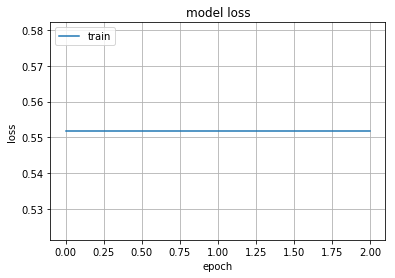

In [91]:
%matplotlib inline 
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.grid()
plt.legend(['train', 'test'], loc='upper left')
plt.title('model loss')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [81]:
bots = ['A1', 'A2', 'B1', 'B2']
to_count = pd.concat([result.iloc[10], decks.iloc[10], pd.Series([1, 0, 0, 0, 1, 0, 0, 0], index=2*bots)])
print(to_count)
print(to_count.shape)

Abyssal Enforcer        0
Acherus Veteran         0
Acidic Swamp Ooze       0
Acolyte of Agony        2
Acolyte of Pain         0
Al'Akir the Windlord    0
Alleycat                0
Aluneth                 0
Ancestral Healing       0
Animal Companion        0
Annoy-o-Tron            0
Antique Healbot         0
Arcane Blast            0
Arcane Explosion        0
Arcane Giant            0
Arcane Intellect        0
Arcane Missiles         0
Arcane Shot             0
Arcanite Reaper         0
Arcanologist            0
Archmage                0
Archmage Antonidas      0
Argent Commander        0
Argent Horserider       0
Argent Squire           0
Armorsmith              0
Assassin's Blade        0
Assassinate             0
Astral Communion        0
Aya Blackpaw            0
                       ..
Voidwalker              0
Volcanic Potion         0
Volcano                 0
Voodoo Doctor           0
Vulgar Homunculus       0
Warsong Commander       0
Water Elemental         0
Wax Elementa

In [92]:
results = model.predict_proba(np.expand_dims(to_count, axis=1).reshape(1, 686, 1))

In [93]:
print(results)

[[1.]]


Let's try with lower dimensions

In [126]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=300)
tsne_results = tsne.fit_transform(train_data)

[t-SNE] Computing 76 nearest neighbors...


In [ ]:
from ggplot import *

df_tsne = train_data.copy()
df_tsne['x-tsne'] = tsne_results[:, 0]
df_tsne['y-tsne'] = tsne_results[:, 1]

chart = ggplot(df_tsne, aes(x='x-tsne', y='y-tsne', color='label')) \
        + geom_point(size=70, alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")
chart
